In [1]:
import keras
from keras.datasets import mnist
from keras import backend as K
import pandas as pd
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

Using TensorFlow backend.


In [2]:
sns.set_theme(style="whitegrid")

# Práctica Redes Neuronales II

Primero vamos a usar redes para aprender una función simple: una parábola.

Vamos a usar solo 100 puntos y dividirlos en training y validation

Text(0, 0.5, 'Y')

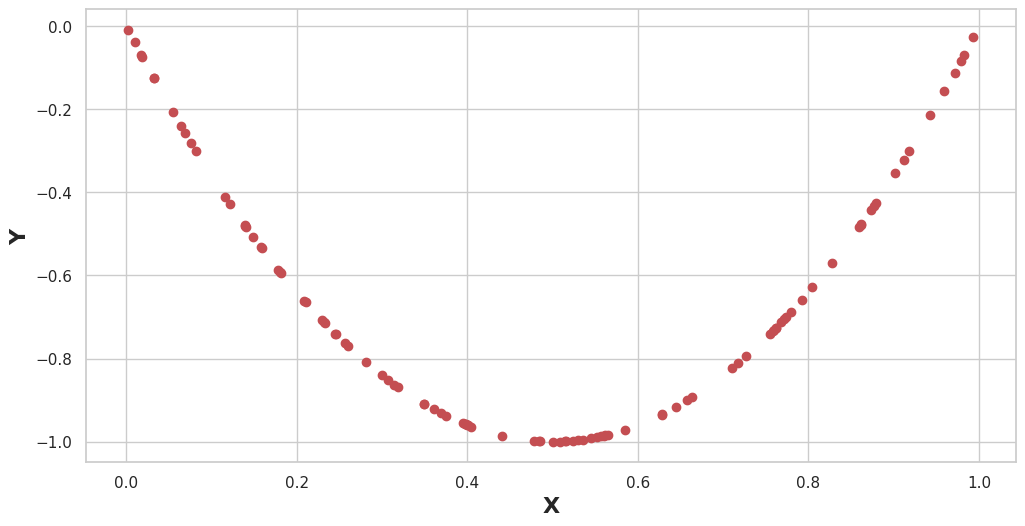

In [3]:
# Genero los puntos
x = np.random.uniform(0, 1, 100)
y = [4 * i * (i - 1) for i in x]

# ploteo
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(x, y, 'or')
plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)

Divido en training y validation set usando train_test_split de sklearn usando 1/3 de puntos como validation

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_validation, y_train, y_validation = train_test_split(
    x, y, test_size=0.33, random_state=42
)

Usamos [Sequential](https://keras.io/api/models/sequential/) de keras para definir un modelo tipo stack de capas: vamos a usar ahora solo capas tipo [Dense](https://keras.io/api/layers/core_layers/dense/)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

Usamos para regresiones como activación de la última capa un función de tipo lineal

In [7]:
model = Sequential()
model.add(Dense(3, input_dim=1, activation='tanh'))
model.add(Dense(1, activation='linear'))

Luego de definir todas las capas tenemos que compilar el modelo para definir la función de pérdida, el optimizador y la métrica. Esto es necesario para poder después entrenar el modelo.

In [8]:
model.compile(
    loss='mean_squared_error', optimizer="SGD", metrics=['mean_squared_error']
)

Vamos a guardar el [.fit ](https://keras.io/api/models/model_training_apis/) del modelo en una variable para después plotear el aprendizaje. Podemos pasar como parámetros el set de validación para ir evaluando en cada paso del entrenamiento, además de evaluar el de entrenamiento. Podemos cambiar la cantidad de información que nos muestra con verbose y además tenemos que decirle la cantidad de épocas que queremos entrenar.

In [9]:
history = model.fit(
    np.array(X_train),
    np.array(y_train),
    epochs=200,
    verbose=2,
    validation_data=(X_validation, np.array(y_validation)),
)

Train on 67 samples, validate on 33 samples
Epoch 1/200
 - 0s - loss: 1.7083 - mean_squared_error: 1.7083 - val_loss: 1.5921 - val_mean_squared_error: 1.5921


Epoch 2/200
 - 0s - loss: 1.2954 - mean_squared_error: 1.2954 - val_loss: 1.2469 - val_mean_squared_error: 1.2469


Epoch 3/200
 - 0s - loss: 1.0091 - mean_squared_error: 1.0091 - val_loss: 0.9995 - val_mean_squared_error: 0.9995


Epoch 4/200
 - 0s - loss: 0.8046 - mean_squared_error: 0.8046 - val_loss: 0.8150 - val_mean_squared_error: 0.8150


Epoch 5/200
 - 0s - loss: 0.6537 - mean_squared_error: 0.6537 - val_loss: 0.6456 - val_mean_squared_error: 0.6456


Epoch 6/200
 - 0s - loss: 0.5174 - mean_squared_error: 0.5174 - val_loss: 0.5327 - val_mean_squared_error: 0.5327


Epoch 7/200
 - 0s - loss: 0.4281 - mean_squared_error: 0.4281 - val_loss: 0.4459 - val_mean_squared_error: 0.4459


Epoch 8/200
 - 0s - loss: 0.3603 - mean_squared_error: 0.3603 - val_loss: 0.3679 - val_mean_squared_error: 0.3679


Epoch 9/200
 - 0s - loss: 0.3014 - mean_squared_error: 0.3014 - val_loss: 0.3164 - val_mean_squared_error: 0.3164


Epoch 10/200
 - 0s - loss: 0.2633 - mean_squared_error: 0.2633 - val_loss: 0.2732 - val_mean_squared_error: 0.2732


Epoch 11/200
 - 0s - loss: 0.2318 - mean_squared_error: 0.2318 - val_loss: 0.2425 - val_mean_squared_error: 0.2425


Epoch 12/200
 - 0s - loss: 0.2104 - mean_squared_error: 0.2104 - val_loss: 0.2247 - val_mean_squared_error: 0.2247


Epoch 13/200
 - 0s - loss: 0.1979 - mean_squared_error: 0.1979 - val_loss: 0.2043 - val_mean_squared_error: 0.2043


Epoch 14/200
 - 0s - loss: 0.1840 - mean_squared_error: 0.1840 - val_loss: 0.1824 - val_mean_squared_error: 0.1824


Epoch 15/200
 - 0s - loss: 0.1703 - mean_squared_error: 0.1703 - val_loss: 0.1762 - val_mean_squared_error: 0.1762


Epoch 16/200
 - 0s - loss: 0.1660 - mean_squared_error: 0.1660 - val_loss: 0.1624 - val_mean_squared_error: 0.1624


Epoch 17/200
 - 0s - loss: 0.1577 - mean_squared_error: 0.1577 - val_loss: 0.1513 - val_mean_squared_error: 0.1513


Epoch 18/200
 - 0s - loss: 0.1514 - mean_squared_error: 0.1514 - val_loss: 0.1477 - val_mean_squared_error: 0.1477


Epoch 19/200
 - 0s - loss: 0.1495 - mean_squared_error: 0.1495 - val_loss: 0.1488 - val_mean_squared_error: 0.1488


Epoch 20/200
 - 0s - loss: 0.1492 - mean_squared_error: 0.1492 - val_loss: 0.1417 - val_mean_squared_error: 0.1417


Epoch 21/200
 - 0s - loss: 0.1451 - mean_squared_error: 0.1451 - val_loss: 0.1369 - val_mean_squared_error: 0.1369


Epoch 22/200
 - 0s - loss: 0.1425 - mean_squared_error: 0.1425 - val_loss: 0.1353 - val_mean_squared_error: 0.1353


Epoch 23/200
 - 0s - loss: 0.1415 - mean_squared_error: 0.1415 - val_loss: 0.1324 - val_mean_squared_error: 0.1324


Epoch 24/200
 - 0s - loss: 0.1400 - mean_squared_error: 0.1400 - val_loss: 0.1262 - val_mean_squared_error: 0.1262


Epoch 25/200
 - 0s - loss: 0.1370 - mean_squared_error: 0.1370 - val_loss: 0.1253 - val_mean_squared_error: 0.1253


Epoch 26/200
 - 0s - loss: 0.1363 - mean_squared_error: 0.1363 - val_loss: 0.1251 - val_mean_squared_error: 0.1251


Epoch 27/200
 - 0s - loss: 0.1355 - mean_squared_error: 0.1355 - val_loss: 0.1239 - val_mean_squared_error: 0.1239


Epoch 28/200
 - 0s - loss: 0.1345 - mean_squared_error: 0.1345 - val_loss: 0.1218 - val_mean_squared_error: 0.1218


Epoch 29/200
 - 0s - loss: 0.1333 - mean_squared_error: 0.1333 - val_loss: 0.1194 - val_mean_squared_error: 0.1194


Epoch 30/200
 - 0s - loss: 0.1321 - mean_squared_error: 0.1321 - val_loss: 0.1156 - val_mean_squared_error: 0.1156


Epoch 31/200
 - 0s - loss: 0.1306 - mean_squared_error: 0.1306 - val_loss: 0.1157 - val_mean_squared_error: 0.1157


Epoch 32/200
 - 0s - loss: 0.1304 - mean_squared_error: 0.1304 - val_loss: 0.1170 - val_mean_squared_error: 0.1170


Epoch 33/200
 - 0s - loss: 0.1299 - mean_squared_error: 0.1299 - val_loss: 0.1164 - val_mean_squared_error: 0.1164


Epoch 34/200
 - 0s - loss: 0.1294 - mean_squared_error: 0.1294 - val_loss: 0.1164 - val_mean_squared_error: 0.1164


Epoch 35/200
 - 0s - loss: 0.1289 - mean_squared_error: 0.1289 - val_loss: 0.1160 - val_mean_squared_error: 0.1160


Epoch 36/200
 - 0s - loss: 0.1288 - mean_squared_error: 0.1288 - val_loss: 0.1131 - val_mean_squared_error: 0.1131


Epoch 37/200
 - 0s - loss: 0.1271 - mean_squared_error: 0.1271 - val_loss: 0.1115 - val_mean_squared_error: 0.1115


Epoch 38/200
 - 0s - loss: 0.1263 - mean_squared_error: 0.1263 - val_loss: 0.1088 - val_mean_squared_error: 0.1088


Epoch 39/200
 - 0s - loss: 0.1253 - mean_squared_error: 0.1253 - val_loss: 0.1060 - val_mean_squared_error: 0.1060


Epoch 40/200
 - 0s - loss: 0.1242 - mean_squared_error: 0.1242 - val_loss: 0.1038 - val_mean_squared_error: 0.1038


Epoch 41/200
 - 0s - loss: 0.1235 - mean_squared_error: 0.1235 - val_loss: 0.1031 - val_mean_squared_error: 0.1031


Epoch 42/200
 - 0s - loss: 0.1230 - mean_squared_error: 0.1230 - val_loss: 0.1022 - val_mean_squared_error: 0.1022


Epoch 43/200
 - 0s - loss: 0.1226 - mean_squared_error: 0.1226 - val_loss: 0.0998 - val_mean_squared_error: 0.0998


Epoch 44/200
 - 0s - loss: 0.1225 - mean_squared_error: 0.1225 - val_loss: 0.1012 - val_mean_squared_error: 0.1012


Epoch 45/200
 - 0s - loss: 0.1220 - mean_squared_error: 0.1220 - val_loss: 0.1002 - val_mean_squared_error: 0.1002


Epoch 46/200
 - 0s - loss: 0.1213 - mean_squared_error: 0.1213 - val_loss: 0.0989 - val_mean_squared_error: 0.0989


Epoch 47/200
 - 0s - loss: 0.1207 - mean_squared_error: 0.1207 - val_loss: 0.0989 - val_mean_squared_error: 0.0989


Epoch 48/200


 - 0s - loss: 0.1204 - mean_squared_error: 0.1204 - val_loss: 0.0984 - val_mean_squared_error: 0.0984


Epoch 49/200


 - 0s - loss: 0.1201 - mean_squared_error: 0.1201 - val_loss: 0.0980 - val_mean_squared_error: 0.0980


Epoch 50/200


 - 0s - loss: 0.1197 - mean_squared_error: 0.1197 - val_loss: 0.0963 - val_mean_squared_error: 0.0963


Epoch 51/200


 - 0s - loss: 0.1190 - mean_squared_error: 0.1190 - val_loss: 0.0950 - val_mean_squared_error: 0.0950


Epoch 52/200
 - 0s - loss: 0.1191 - mean_squared_error: 0.1191 - val_loss: 0.0950 - val_mean_squared_error: 0.0950


Epoch 53/200
 - 0s - loss: 0.1182 - mean_squared_error: 0.1182 - val_loss: 0.0940 - val_mean_squared_error: 0.0940


Epoch 54/200


 - 0s - loss: 0.1180 - mean_squared_error: 0.1180 - val_loss: 0.0939 - val_mean_squared_error: 0.0939


Epoch 55/200


 - 0s - loss: 0.1171 - mean_squared_error: 0.1171 - val_loss: 0.0936 - val_mean_squared_error: 0.0936


Epoch 56/200


 - 0s - loss: 0.1163 - mean_squared_error: 0.1163 - val_loss: 0.0938 - val_mean_squared_error: 0.0938


Epoch 57/200


 - 0s - loss: 0.1156 - mean_squared_error: 0.1156 - val_loss: 0.0930 - val_mean_squared_error: 0.0930


Epoch 58/200
 - 0s - loss: 0.1151 - mean_squared_error: 0.1151 - val_loss: 0.0924 - val_mean_squared_error: 0.0924


Epoch 59/200


 - 0s - loss: 0.1146 - mean_squared_error: 0.1146 - val_loss: 0.0919 - val_mean_squared_error: 0.0919


Epoch 60/200


 - 0s - loss: 0.1143 - mean_squared_error: 0.1143 - val_loss: 0.0924 - val_mean_squared_error: 0.0924


Epoch 61/200


 - 0s - loss: 0.1143 - mean_squared_error: 0.1143 - val_loss: 0.0914 - val_mean_squared_error: 0.0914


Epoch 62/200
 - 0s - loss: 0.1136 - mean_squared_error: 0.1136 - val_loss: 0.0912 - val_mean_squared_error: 0.0912


Epoch 63/200
 - 0s - loss: 0.1134 - mean_squared_error: 0.1134 - val_loss: 0.0905 - val_mean_squared_error: 0.0905


Epoch 64/200


 - 0s - loss: 0.1132 - mean_squared_error: 0.1132 - val_loss: 0.0896 - val_mean_squared_error: 0.0896


Epoch 65/200


 - 0s - loss: 0.1127 - mean_squared_error: 0.1127 - val_loss: 0.0892 - val_mean_squared_error: 0.0892


Epoch 66/200


 - 0s - loss: 0.1122 - mean_squared_error: 0.1122 - val_loss: 0.0880 - val_mean_squared_error: 0.0880


Epoch 67/200
 - 0s - loss: 0.1121 - mean_squared_error: 0.1121 - val_loss: 0.0884 - val_mean_squared_error: 0.0884


Epoch 68/200
 - 0s - loss: 0.1118 - mean_squared_error: 0.1118 - val_loss: 0.0874 - val_mean_squared_error: 0.0874


Epoch 69/200
 - 0s - loss: 0.1118 - mean_squared_error: 0.1118 - val_loss: 0.0865 - val_mean_squared_error: 0.0865


Epoch 70/200
 - 0s - loss: 0.1120 - mean_squared_error: 0.1120 - val_loss: 0.0863 - val_mean_squared_error: 0.0863


Epoch 71/200


 - 0s - loss: 0.1115 - mean_squared_error: 0.1115 - val_loss: 0.0864 - val_mean_squared_error: 0.0864


Epoch 72/200


 - 0s - loss: 0.1112 - mean_squared_error: 0.1112 - val_loss: 0.0860 - val_mean_squared_error: 0.0860


Epoch 73/200


 - 0s - loss: 0.1110 - mean_squared_error: 0.1110 - val_loss: 0.0855 - val_mean_squared_error: 0.0855


Epoch 74/200


 - 0s - loss: 0.1110 - mean_squared_error: 0.1110 - val_loss: 0.0849 - val_mean_squared_error: 0.0849


Epoch 75/200


 - 0s - loss: 0.1111 - mean_squared_error: 0.1111 - val_loss: 0.0851 - val_mean_squared_error: 0.0851


Epoch 76/200


 - 0s - loss: 0.1106 - mean_squared_error: 0.1106 - val_loss: 0.0848 - val_mean_squared_error: 0.0848


Epoch 77/200


 - 0s - loss: 0.1103 - mean_squared_error: 0.1103 - val_loss: 0.0840 - val_mean_squared_error: 0.0840


Epoch 78/200


 - 0s - loss: 0.1105 - mean_squared_error: 0.1105 - val_loss: 0.0837 - val_mean_squared_error: 0.0837


Epoch 79/200
 - 0s - loss: 0.1102 - mean_squared_error: 0.1102 - val_loss: 0.0833 - val_mean_squared_error: 0.0833


Epoch 80/200


 - 0s - loss: 0.1099 - mean_squared_error: 0.1099 - val_loss: 0.0833 - val_mean_squared_error: 0.0833


Epoch 81/200


 - 0s - loss: 0.1095 - mean_squared_error: 0.1095 - val_loss: 0.0829 - val_mean_squared_error: 0.0829


Epoch 82/200


 - 0s - loss: 0.1095 - mean_squared_error: 0.1095 - val_loss: 0.0831 - val_mean_squared_error: 0.0831


Epoch 83/200


 - 0s - loss: 0.1089 - mean_squared_error: 0.1089 - val_loss: 0.0822 - val_mean_squared_error: 0.0822


Epoch 84/200


 - 0s - loss: 0.1092 - mean_squared_error: 0.1092 - val_loss: 0.0822 - val_mean_squared_error: 0.0822


Epoch 85/200
 - 0s - loss: 0.1090 - mean_squared_error: 0.1090 - val_loss: 0.0817 - val_mean_squared_error: 0.0817


Epoch 86/200


 - 0s - loss: 0.1091 - mean_squared_error: 0.1091 - val_loss: 0.0820 - val_mean_squared_error: 0.0820


Epoch 87/200


 - 0s - loss: 0.1086 - mean_squared_error: 0.1086 - val_loss: 0.0820 - val_mean_squared_error: 0.0820


Epoch 88/200


 - 0s - loss: 0.1080 - mean_squared_error: 0.1080 - val_loss: 0.0837 - val_mean_squared_error: 0.0837


Epoch 89/200


 - 0s - loss: 0.1078 - mean_squared_error: 0.1078 - val_loss: 0.0838 - val_mean_squared_error: 0.0838


Epoch 90/200


 - 0s - loss: 0.1075 - mean_squared_error: 0.1075 - val_loss: 0.0851 - val_mean_squared_error: 0.0851


Epoch 91/200


 - 0s - loss: 0.1076 - mean_squared_error: 0.1076 - val_loss: 0.0860 - val_mean_squared_error: 0.0860


Epoch 92/200


 - 0s - loss: 0.1076 - mean_squared_error: 0.1076 - val_loss: 0.0863 - val_mean_squared_error: 0.0863


Epoch 93/200


 - 0s - loss: 0.1073 - mean_squared_error: 0.1073 - val_loss: 0.0859 - val_mean_squared_error: 0.0859


Epoch 94/200


 - 0s - loss: 0.1071 - mean_squared_error: 0.1071 - val_loss: 0.0857 - val_mean_squared_error: 0.0857


Epoch 95/200


 - 0s - loss: 0.1069 - mean_squared_error: 0.1069 - val_loss: 0.0848 - val_mean_squared_error: 0.0848


Epoch 96/200


 - 0s - loss: 0.1066 - mean_squared_error: 0.1066 - val_loss: 0.0861 - val_mean_squared_error: 0.0861


Epoch 97/200


 - 0s - loss: 0.1070 - mean_squared_error: 0.1070 - val_loss: 0.0856 - val_mean_squared_error: 0.0856


Epoch 98/200

 - 0s - loss: 0.1069 - mean_squared_error: 0.1069 - val_loss: 0.0863 - val_mean_squared_error: 0.0863


Epoch 99/200
 - 0s - loss: 0.1068 - mean_squared_error: 0.1068 - val_loss: 0.0859 - val_mean_squared_error: 0.0859


Epoch 100/200


 - 0s - loss: 0.1067 - mean_squared_error: 0.1067 - val_loss: 0.0871 - val_mean_squared_error: 0.0871


Epoch 101/200


 - 0s - loss: 0.1070 - mean_squared_error: 0.1070 - val_loss: 0.0843 - val_mean_squared_error: 0.0843


Epoch 102/200


 - 0s - loss: 0.1058 - mean_squared_error: 0.1058 - val_loss: 0.0847 - val_mean_squared_error: 0.0847


Epoch 103/200


 - 0s - loss: 0.1057 - mean_squared_error: 0.1057 - val_loss: 0.0846 - val_mean_squared_error: 0.0846


Epoch 104/200

 - 0s - loss: 0.1058 - mean_squared_error: 0.1058 - val_loss: 0.0828 - val_mean_squared_error: 0.0828


Epoch 105/200


 - 0s - loss: 0.1053 - mean_squared_error: 0.1053 - val_loss: 0.0810 - val_mean_squared_error: 0.0810


Epoch 106/200
 - 0s - loss: 0.1055 - mean_squared_error: 0.1055 - val_loss: 0.0805 - val_mean_squared_error: 0.0805


Epoch 107/200
 - 0s - loss: 0.1050 - mean_squared_error: 0.1050 - val_loss: 0.0801 - val_mean_squared_error: 0.0801


Epoch 108/200


 - 0s - loss: 0.1050 - mean_squared_error: 0.1050 - val_loss: 0.0798 - val_mean_squared_error: 0.0798


Epoch 109/200


 - 0s - loss: 0.1048 - mean_squared_error: 0.1048 - val_loss: 0.0806 - val_mean_squared_error: 0.0806


Epoch 110/200


 - 0s - loss: 0.1046 - mean_squared_error: 0.1046 - val_loss: 0.0804 - val_mean_squared_error: 0.0804


Epoch 111/200


 - 0s - loss: 0.1046 - mean_squared_error: 0.1046 - val_loss: 0.0801 - val_mean_squared_error: 0.0801


Epoch 112/200


 - 0s - loss: 0.1045 - mean_squared_error: 0.1045 - val_loss: 0.0802 - val_mean_squared_error: 0.0802


Epoch 113/200


 - 0s - loss: 0.1045 - mean_squared_error: 0.1045 - val_loss: 0.0799 - val_mean_squared_error: 0.0799


Epoch 114/200


 - 0s - loss: 0.1042 - mean_squared_error: 0.1042 - val_loss: 0.0806 - val_mean_squared_error: 0.0806


Epoch 115/200


 - 0s - loss: 0.1039 - mean_squared_error: 0.1039 - val_loss: 0.0802 - val_mean_squared_error: 0.0802


Epoch 116/200


 - 0s - loss: 0.1040 - mean_squared_error: 0.1040 - val_loss: 0.0804 - val_mean_squared_error: 0.0804


Epoch 117/200


 - 0s - loss: 0.1039 - mean_squared_error: 0.1039 - val_loss: 0.0799 - val_mean_squared_error: 0.0799


Epoch 118/200


 - 0s - loss: 0.1037 - mean_squared_error: 0.1037 - val_loss: 0.0808 - val_mean_squared_error: 0.0808


Epoch 119/200


 - 0s - loss: 0.1034 - mean_squared_error: 0.1034 - val_loss: 0.0813 - val_mean_squared_error: 0.0813


Epoch 120/200


 - 0s - loss: 0.1035 - mean_squared_error: 0.1035 - val_loss: 0.0809 - val_mean_squared_error: 0.0809


Epoch 121/200


 - 0s - loss: 0.1032 - mean_squared_error: 0.1032 - val_loss: 0.0802 - val_mean_squared_error: 0.0802


Epoch 122/200


 - 0s - loss: 0.1033 - mean_squared_error: 0.1033 - val_loss: 0.0794 - val_mean_squared_error: 0.0794


Epoch 123/200


 - 0s - loss: 0.1028 - mean_squared_error: 0.1028 - val_loss: 0.0802 - val_mean_squared_error: 0.0802


Epoch 124/200


 - 0s - loss: 0.1027 - mean_squared_error: 0.1027 - val_loss: 0.0796 - val_mean_squared_error: 0.0796


Epoch 125/200
 - 0s - loss: 0.1025 - mean_squared_error: 0.1025 - val_loss: 0.0786 - val_mean_squared_error: 0.0786


Epoch 126/200


 - 0s - loss: 0.1022 - mean_squared_error: 0.1022 - val_loss: 0.0785 - val_mean_squared_error: 0.0785


Epoch 127/200


 - 0s - loss: 0.1020 - mean_squared_error: 0.1020 - val_loss: 0.0794 - val_mean_squared_error: 0.0794


Epoch 128/200


 - 0s - loss: 0.1023 - mean_squared_error: 0.1023 - val_loss: 0.0793 - val_mean_squared_error: 0.0793


Epoch 129/200


 - 0s - loss: 0.1022 - mean_squared_error: 0.1022 - val_loss: 0.0803 - val_mean_squared_error: 0.0803


Epoch 130/200


 - 0s - loss: 0.1023 - mean_squared_error: 0.1023 - val_loss: 0.0789 - val_mean_squared_error: 0.0789


Epoch 131/200


 - 0s - loss: 0.1019 - mean_squared_error: 0.1019 - val_loss: 0.0802 - val_mean_squared_error: 0.0802


Epoch 132/200


 - 0s - loss: 0.1022 - mean_squared_error: 0.1022 - val_loss: 0.0798 - val_mean_squared_error: 0.0798


Epoch 133/200


 - 0s - loss: 0.1020 - mean_squared_error: 0.1020 - val_loss: 0.0795 - val_mean_squared_error: 0.0795


Epoch 134/200


 - 0s - loss: 0.1019 - mean_squared_error: 0.1019 - val_loss: 0.0794 - val_mean_squared_error: 0.0794


Epoch 135/200
 - 0s - loss: 0.1018 - mean_squared_error: 0.1018 - val_loss: 0.0785 - val_mean_squared_error: 0.0785


Epoch 136/200
 - 0s - loss: 0.1016 - mean_squared_error: 0.1016 - val_loss: 0.0786 - val_mean_squared_error: 0.0786


Epoch 137/200


 - 0s - loss: 0.1017 - mean_squared_error: 0.1017 - val_loss: 0.0782 - val_mean_squared_error: 0.0782


Epoch 138/200


 - 0s - loss: 0.1015 - mean_squared_error: 0.1015 - val_loss: 0.0802 - val_mean_squared_error: 0.0802


Epoch 139/200


 - 0s - loss: 0.1020 - mean_squared_error: 0.1020 - val_loss: 0.0800 - val_mean_squared_error: 0.0800


Epoch 140/200
 - 0s - loss: 0.1018 - mean_squared_error: 0.1018 - val_loss: 0.0788 - val_mean_squared_error: 0.0788


Epoch 141/200


 - 0s - loss: 0.1014 - mean_squared_error: 0.1014 - val_loss: 0.0771 - val_mean_squared_error: 0.0771


Epoch 142/200


 - 0s - loss: 0.1010 - mean_squared_error: 0.1010 - val_loss: 0.0772 - val_mean_squared_error: 0.0772


Epoch 143/200


 - 0s - loss: 0.1010 - mean_squared_error: 0.1010 - val_loss: 0.0770 - val_mean_squared_error: 0.0770


Epoch 144/200
 - 0s - loss: 0.1010 - mean_squared_error: 0.1010 - val_loss: 0.0774 - val_mean_squared_error: 0.0774


Epoch 145/200


 - 0s - loss: 0.1009 - mean_squared_error: 0.1009 - val_loss: 0.0773 - val_mean_squared_error: 0.0773


Epoch 146/200


 - 0s - loss: 0.1009 - mean_squared_error: 0.1009 - val_loss: 0.0765 - val_mean_squared_error: 0.0765


Epoch 147/200


 - 0s - loss: 0.1007 - mean_squared_error: 0.1007 - val_loss: 0.0776 - val_mean_squared_error: 0.0776


Epoch 148/200
 - 0s - loss: 0.1011 - mean_squared_error: 0.1011 - val_loss: 0.0763 - val_mean_squared_error: 0.0763


Epoch 149/200


 - 0s - loss: 0.1006 - mean_squared_error: 0.1006 - val_loss: 0.0751 - val_mean_squared_error: 0.0751


Epoch 150/200


 - 0s - loss: 0.1005 - mean_squared_error: 0.1005 - val_loss: 0.0752 - val_mean_squared_error: 0.0752


Epoch 151/200
 - 0s - loss: 0.1003 - mean_squared_error: 0.1003 - val_loss: 0.0759 - val_mean_squared_error: 0.0759


Epoch 152/200


 - 0s - loss: 0.1004 - mean_squared_error: 0.1004 - val_loss: 0.0760 - val_mean_squared_error: 0.0760


Epoch 153/200


 - 0s - loss: 0.1005 - mean_squared_error: 0.1005 - val_loss: 0.0753 - val_mean_squared_error: 0.0753


Epoch 154/200


 - 0s - loss: 0.1003 - mean_squared_error: 0.1003 - val_loss: 0.0762 - val_mean_squared_error: 0.0762


Epoch 155/200


 - 0s - loss: 0.1006 - mean_squared_error: 0.1006 - val_loss: 0.0761 - val_mean_squared_error: 0.0761


Epoch 156/200


 - 0s - loss: 0.1002 - mean_squared_error: 0.1002 - val_loss: 0.0754 - val_mean_squared_error: 0.0754


Epoch 157/200


 - 0s - loss: 0.1000 - mean_squared_error: 0.1000 - val_loss: 0.0745 - val_mean_squared_error: 0.0745


Epoch 158/200


 - 0s - loss: 0.0999 - mean_squared_error: 0.0999 - val_loss: 0.0746 - val_mean_squared_error: 0.0746


Epoch 159/200


 - 0s - loss: 0.0998 - mean_squared_error: 0.0998 - val_loss: 0.0742 - val_mean_squared_error: 0.0742


Epoch 160/200


 - 0s - loss: 0.0996 - mean_squared_error: 0.0996 - val_loss: 0.0745 - val_mean_squared_error: 0.0745


Epoch 161/200


 - 0s - loss: 0.0995 - mean_squared_error: 0.0995 - val_loss: 0.0742 - val_mean_squared_error: 0.0742


Epoch 162/200


 - 0s - loss: 0.0994 - mean_squared_error: 0.0994 - val_loss: 0.0739 - val_mean_squared_error: 0.0739


Epoch 163/200

 - 0s - loss: 0.0994 - mean_squared_error: 0.0994 - val_loss: 0.0738 - val_mean_squared_error: 0.0738


Epoch 164/200


 - 0s - loss: 0.0994 - mean_squared_error: 0.0994 - val_loss: 0.0741 - val_mean_squared_error: 0.0741


Epoch 165/200


 - 0s - loss: 0.0992 - mean_squared_error: 0.0992 - val_loss: 0.0738 - val_mean_squared_error: 0.0738


Epoch 166/200


 - 0s - loss: 0.0991 - mean_squared_error: 0.0991 - val_loss: 0.0737 - val_mean_squared_error: 0.0737


Epoch 167/200


 - 0s - loss: 0.0990 - mean_squared_error: 0.0990 - val_loss: 0.0738 - val_mean_squared_error: 0.0738


Epoch 168/200


 - 0s - loss: 0.0989 - mean_squared_error: 0.0989 - val_loss: 0.0751 - val_mean_squared_error: 0.0751


Epoch 169/200


 - 0s - loss: 0.0992 - mean_squared_error: 0.0992 - val_loss: 0.0740 - val_mean_squared_error: 0.0740


Epoch 170/200


 - 0s - loss: 0.0989 - mean_squared_error: 0.0989 - val_loss: 0.0736 - val_mean_squared_error: 0.0736


Epoch 171/200


 - 0s - loss: 0.0989 - mean_squared_error: 0.0989 - val_loss: 0.0728 - val_mean_squared_error: 0.0728


Epoch 172/200


 - 0s - loss: 0.0990 - mean_squared_error: 0.0990 - val_loss: 0.0722 - val_mean_squared_error: 0.0722


Epoch 173/200


 - 0s - loss: 0.0990 - mean_squared_error: 0.0990 - val_loss: 0.0719 - val_mean_squared_error: 0.0719


Epoch 174/200


 - 0s - loss: 0.0991 - mean_squared_error: 0.0991 - val_loss: 0.0715 - val_mean_squared_error: 0.0715


Epoch 175/200


 - 0s - loss: 0.0993 - mean_squared_error: 0.0993 - val_loss: 0.0723 - val_mean_squared_error: 0.0723


Epoch 176/200


 - 0s - loss: 0.0990 - mean_squared_error: 0.0990 - val_loss: 0.0721 - val_mean_squared_error: 0.0721


Epoch 177/200


 - 0s - loss: 0.0989 - mean_squared_error: 0.0989 - val_loss: 0.0724 - val_mean_squared_error: 0.0724


Epoch 178/200


 - 0s - loss: 0.0987 - mean_squared_error: 0.0987 - val_loss: 0.0731 - val_mean_squared_error: 0.0731


Epoch 179/200


 - 0s - loss: 0.0987 - mean_squared_error: 0.0987 - val_loss: 0.0732 - val_mean_squared_error: 0.0732


Epoch 180/200
 - 0s - loss: 0.0987 - mean_squared_error: 0.0987 - val_loss: 0.0737 - val_mean_squared_error: 0.0737


Epoch 181/200
 - 0s - loss: 0.0986 - mean_squared_error: 0.0986 - val_loss: 0.0736 - val_mean_squared_error: 0.0736


Epoch 182/200


 - 0s - loss: 0.0987 - mean_squared_error: 0.0987 - val_loss: 0.0738 - val_mean_squared_error: 0.0738


Epoch 183/200


 - 0s - loss: 0.0987 - mean_squared_error: 0.0987 - val_loss: 0.0731 - val_mean_squared_error: 0.0731


Epoch 184/200


 - 0s - loss: 0.0987 - mean_squared_error: 0.0987 - val_loss: 0.0739 - val_mean_squared_error: 0.0739


Epoch 185/200
 - 0s - loss: 0.0986 - mean_squared_error: 0.0986 - val_loss: 0.0737 - val_mean_squared_error: 0.0737


Epoch 186/200


 - 0s - loss: 0.0986 - mean_squared_error: 0.0986 - val_loss: 0.0728 - val_mean_squared_error: 0.0728


Epoch 187/200


 - 0s - loss: 0.0985 - mean_squared_error: 0.0985 - val_loss: 0.0731 - val_mean_squared_error: 0.0731


Epoch 188/200
 - 0s - loss: 0.0984 - mean_squared_error: 0.0984 - val_loss: 0.0734 - val_mean_squared_error: 0.0734


Epoch 189/200


 - 0s - loss: 0.0984 - mean_squared_error: 0.0984 - val_loss: 0.0742 - val_mean_squared_error: 0.0742


Epoch 190/200


 - 0s - loss: 0.0985 - mean_squared_error: 0.0985 - val_loss: 0.0738 - val_mean_squared_error: 0.0738


Epoch 191/200


 - 0s - loss: 0.0984 - mean_squared_error: 0.0984 - val_loss: 0.0735 - val_mean_squared_error: 0.0735


Epoch 192/200
 - 0s - loss: 0.0984 - mean_squared_error: 0.0984 - val_loss: 0.0734 - val_mean_squared_error: 0.0734


Epoch 193/200


 - 0s - loss: 0.0984 - mean_squared_error: 0.0984 - val_loss: 0.0724 - val_mean_squared_error: 0.0724


Epoch 194/200


 - 0s - loss: 0.0982 - mean_squared_error: 0.0982 - val_loss: 0.0718 - val_mean_squared_error: 0.0718


Epoch 195/200


 - 0s - loss: 0.0983 - mean_squared_error: 0.0983 - val_loss: 0.0723 - val_mean_squared_error: 0.0723


Epoch 196/200


 - 0s - loss: 0.0983 - mean_squared_error: 0.0983 - val_loss: 0.0720 - val_mean_squared_error: 0.0720


Epoch 197/200


 - 0s - loss: 0.0983 - mean_squared_error: 0.0983 - val_loss: 0.0714 - val_mean_squared_error: 0.0714


Epoch 198/200


 - 0s - loss: 0.0985 - mean_squared_error: 0.0985 - val_loss: 0.0725 - val_mean_squared_error: 0.0725


Epoch 199/200


 - 0s - loss: 0.0983 - mean_squared_error: 0.0983 - val_loss: 0.0728 - val_mean_squared_error: 0.0728


Epoch 200/200


 - 0s - loss: 0.0983 - mean_squared_error: 0.0983 - val_loss: 0.0742 - val_mean_squared_error: 0.0742


Vemos el predict de los puntos de validación y ploteamos

In [10]:
pred = model.predict(X_validation)

Text(0, 0.5, 'Y')

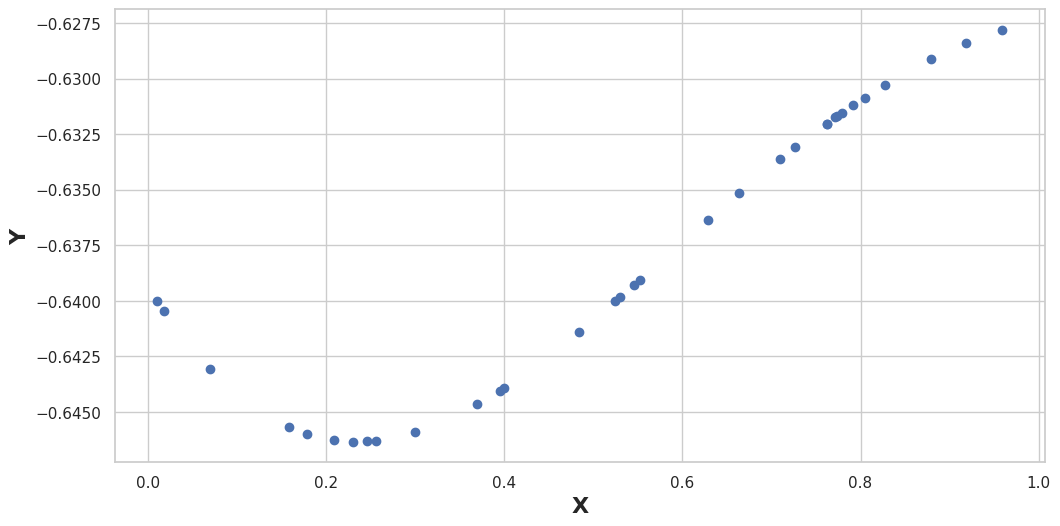

In [11]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(X_validation, pred, "ob", label="test")
plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)

Vemos que si bien aprendio parte del comportamiento de la función, podríamos intentar mejorar el aprendizaje.

`.history` del `.fit` es un JSON que tiene los valores impresos durante el entramiento(métricas y loss)

In [12]:
history.history

{'val_loss': [1.5921172291943522,
  1.2468520520311412,
  0.9995127523487265,
  0.8149786189650045,
  0.6455798767732851,
  0.532654436135834,
  0.4459490302498593,
  0.3678868832631093,
  0.3163750529726685,
  0.27317521783146675,
  0.24247632708372266,
  0.22465554751088898,
  0.20428433067475757,
  0.18236693711669155,
  0.17622843407320254,
  0.16236911657633205,
  0.15126056054776366,
  0.1476910671952999,
  0.14879815963407358,
  0.1416600260206244,
  0.13687704074563403,
  0.13530451228672807,
  0.13240147551352327,
  0.12621170124321274,
  0.12531246357794965,
  0.12508120461169517,
  0.12391861048385952,
  0.12183860802289212,
  0.11940440038839976,
  0.115567230929931,
  0.1157000729757728,
  0.11698667473639503,
  0.11637408726594665,
  0.11635338012693507,
  0.11597888978819053,
  0.11307996042975874,
  0.11154444092376666,
  0.10882449398438136,
  0.10597332883061784,
  0.10383060574531555,
  0.10312409179680275,
  0.1021559029591806,
  0.0998349344414292,
  0.101184016827

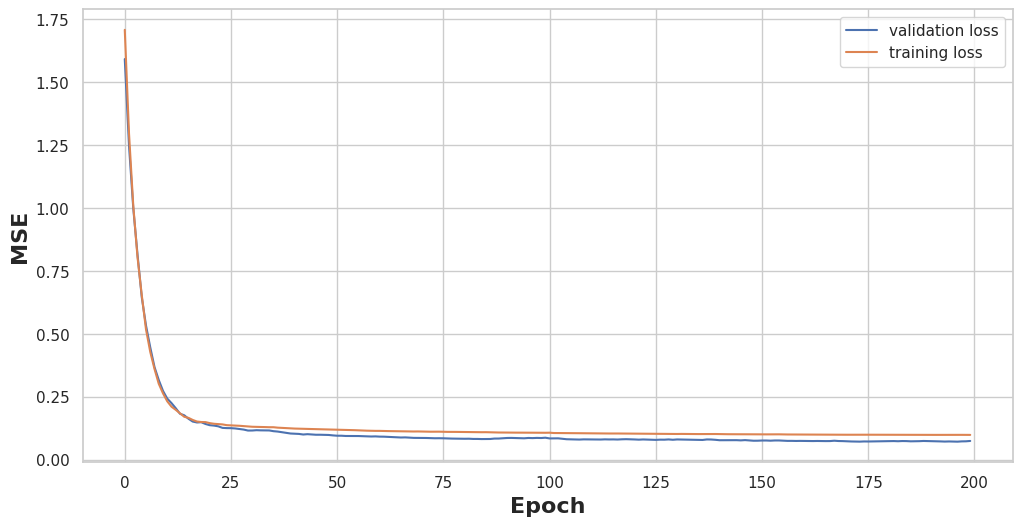

In [13]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(history.history["val_loss"], label="validation loss")
plt.plot(history.history["loss"], label="training loss")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("MSE", weight="bold", fontsize=16)
plt.legend()

In [14]:
model = Sequential()
model.add(Dense(3, input_dim=1, activation='tanh'))
model.add(Dense(1, activation='linear'))

In [15]:
opt = keras.optimizers.SGD(lr=0.1)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_squared_error'])

In [16]:
history = model.fit(
    np.array(X_train),
    np.array(y_train),
    epochs=500,
    verbose=2,
    validation_data=(X_validation, np.array(y_validation)),
)

Train on 67 samples, validate on 33 samples
Epoch 1/500
 - 0s - loss: 0.6013 - mean_squared_error: 0.6013 - val_loss: 0.1013 - val_mean_squared_error: 0.1013


Epoch 2/500
 - 0s - loss: 0.1120 - mean_squared_error: 0.1120 - val_loss: 0.0882 - val_mean_squared_error: 0.0882


Epoch 3/500
 - 0s - loss: 0.1076 - mean_squared_error: 0.1076 - val_loss: 0.0922 - val_mean_squared_error: 0.0922


Epoch 4/500
 - 0s - loss: 0.1069 - mean_squared_error: 0.1069 - val_loss: 0.0822 - val_mean_squared_error: 0.0822


Epoch 5/500
 - 0s - loss: 0.1045 - mean_squared_error: 0.1045 - val_loss: 0.0811 - val_mean_squared_error: 0.0811


Epoch 6/500
 - 0s - loss: 0.1115 - mean_squared_error: 0.1115 - val_loss: 0.0851 - val_mean_squared_error: 0.0851


Epoch 7/500
 - 0s - loss: 0.1155 - mean_squared_error: 0.1155 - val_loss: 0.0786 - val_mean_squared_error: 0.0786


Epoch 8/500
 - 0s - loss: 0.1093 - mean_squared_error: 0.1093 - val_loss: 0.0778 - val_mean_squared_error: 0.0778


Epoch 9/500
 - 0s - loss: 0.1038 - mean_squared_error: 0.1038 - val_loss: 0.0794 - val_mean_squared_error: 0.0794


Epoch 10/500
 - 0s - loss: 0.1008 - mean_squared_error: 0.1008 - val_loss: 0.0739 - val_mean_squared_error: 0.0739


Epoch 11/500
 - 0s - loss: 0.0989 - mean_squared_error: 0.0989 - val_loss: 0.0892 - val_mean_squared_error: 0.0892


Epoch 12/500
 - 0s - loss: 0.1037 - mean_squared_error: 0.1037 - val_loss: 0.0721 - val_mean_squared_error: 0.0721


Epoch 13/500
 - 0s - loss: 0.0973 - mean_squared_error: 0.0973 - val_loss: 0.0741 - val_mean_squared_error: 0.0741


Epoch 14/500
 - 0s - loss: 0.0980 - mean_squared_error: 0.0980 - val_loss: 0.1093 - val_mean_squared_error: 0.1093


Epoch 15/500
 - 0s - loss: 0.1106 - mean_squared_error: 0.1106 - val_loss: 0.0759 - val_mean_squared_error: 0.0759


Epoch 16/500
 - 0s - loss: 0.0986 - mean_squared_error: 0.0986 - val_loss: 0.0710 - val_mean_squared_error: 0.0710


Epoch 17/500
 - 0s - loss: 0.1009 - mean_squared_error: 0.1009 - val_loss: 0.0720 - val_mean_squared_error: 0.0720


Epoch 18/500
 - 0s - loss: 0.1009 - mean_squared_error: 0.1009 - val_loss: 0.0708 - val_mean_squared_error: 0.0708


Epoch 19/500
 - 0s - loss: 0.0965 - mean_squared_error: 0.0965 - val_loss: 0.0702 - val_mean_squared_error: 0.0702


Epoch 20/500
 - 0s - loss: 0.0969 - mean_squared_error: 0.0969 - val_loss: 0.0716 - val_mean_squared_error: 0.0716


Epoch 21/500
 - 0s - loss: 0.1002 - mean_squared_error: 0.1002 - val_loss: 0.0982 - val_mean_squared_error: 0.0982


Epoch 22/500
 - 0s - loss: 0.1046 - mean_squared_error: 0.1046 - val_loss: 0.0701 - val_mean_squared_error: 0.0701


Epoch 23/500
 - 0s - loss: 0.1000 - mean_squared_error: 0.1000 - val_loss: 0.0723 - val_mean_squared_error: 0.0723


Epoch 24/500
 - 0s - loss: 0.0971 - mean_squared_error: 0.0971 - val_loss: 0.0701 - val_mean_squared_error: 0.0701


Epoch 25/500
 - 0s - loss: 0.0974 - mean_squared_error: 0.0974 - val_loss: 0.0706 - val_mean_squared_error: 0.0706


Epoch 26/500
 - 0s - loss: 0.0955 - mean_squared_error: 0.0955 - val_loss: 0.0833 - val_mean_squared_error: 0.0833


Epoch 27/500
 - 0s - loss: 0.1013 - mean_squared_error: 0.1013 - val_loss: 0.0704 - val_mean_squared_error: 0.0704


Epoch 28/500
 - 0s - loss: 0.0979 - mean_squared_error: 0.0979 - val_loss: 0.0664 - val_mean_squared_error: 0.0664


Epoch 29/500
 - 0s - loss: 0.0951 - mean_squared_error: 0.0951 - val_loss: 0.0732 - val_mean_squared_error: 0.0732


Epoch 30/500
 - 0s - loss: 0.1034 - mean_squared_error: 0.1034 - val_loss: 0.0663 - val_mean_squared_error: 0.0663


Epoch 31/500
 - 0s - loss: 0.0953 - mean_squared_error: 0.0953 - val_loss: 0.0689 - val_mean_squared_error: 0.0689


Epoch 32/500
 - 0s - loss: 0.0985 - mean_squared_error: 0.0985 - val_loss: 0.0741 - val_mean_squared_error: 0.0741


Epoch 33/500


 - 0s - loss: 0.1036 - mean_squared_error: 0.1036 - val_loss: 0.0775 - val_mean_squared_error: 0.0775


Epoch 34/500
 - 0s - loss: 0.1026 - mean_squared_error: 0.1026 - val_loss: 0.1608 - val_mean_squared_error: 0.1608


Epoch 35/500
 - 0s - loss: 0.1336 - mean_squared_error: 0.1336 - val_loss: 0.0744 - val_mean_squared_error: 0.0744


Epoch 36/500
 - 0s - loss: 0.0958 - mean_squared_error: 0.0958 - val_loss: 0.0993 - val_mean_squared_error: 0.0993


Epoch 37/500
 - 0s - loss: 0.1064 - mean_squared_error: 0.1064 - val_loss: 0.0708 - val_mean_squared_error: 0.0708


Epoch 38/500
 - 0s - loss: 0.0935 - mean_squared_error: 0.0935 - val_loss: 0.0667 - val_mean_squared_error: 0.0667


Epoch 39/500
 - 0s - loss: 0.0986 - mean_squared_error: 0.0986 - val_loss: 0.0679 - val_mean_squared_error: 0.0679


Epoch 40/500
 - 0s - loss: 0.0971 - mean_squared_error: 0.0971 - val_loss: 0.0664 - val_mean_squared_error: 0.0664


Epoch 41/500
 - 0s - loss: 0.0975 - mean_squared_error: 0.0975 - val_loss: 0.0685 - val_mean_squared_error: 0.0685


Epoch 42/500
 - 0s - loss: 0.1001 - mean_squared_error: 0.1001 - val_loss: 0.0708 - val_mean_squared_error: 0.0708


Epoch 43/500
 - 0s - loss: 0.0991 - mean_squared_error: 0.0991 - val_loss: 0.0657 - val_mean_squared_error: 0.0657


Epoch 44/500
 - 0s - loss: 0.0943 - mean_squared_error: 0.0943 - val_loss: 0.0708 - val_mean_squared_error: 0.0708


Epoch 45/500


 - 0s - loss: 0.0961 - mean_squared_error: 0.0961 - val_loss: 0.0705 - val_mean_squared_error: 0.0705


Epoch 46/500


 - 0s - loss: 0.0933 - mean_squared_error: 0.0933 - val_loss: 0.0649 - val_mean_squared_error: 0.0649


Epoch 47/500


 - 0s - loss: 0.0943 - mean_squared_error: 0.0943 - val_loss: 0.0803 - val_mean_squared_error: 0.0803


Epoch 48/500


 - 0s - loss: 0.0958 - mean_squared_error: 0.0958 - val_loss: 0.0651 - val_mean_squared_error: 0.0651


Epoch 49/500


 - 0s - loss: 0.0930 - mean_squared_error: 0.0930 - val_loss: 0.0666 - val_mean_squared_error: 0.0666


Epoch 50/500
 - 0s - loss: 0.0924 - mean_squared_error: 0.0924 - val_loss: 0.0660 - val_mean_squared_error: 0.0660


Epoch 51/500
 - 0s - loss: 0.0945 - mean_squared_error: 0.0945 - val_loss: 0.0664 - val_mean_squared_error: 0.0664


Epoch 52/500
 - 0s - loss: 0.0936 - mean_squared_error: 0.0936 - val_loss: 0.0985 - val_mean_squared_error: 0.0985


Epoch 53/500
 - 0s - loss: 0.1041 - mean_squared_error: 0.1041 - val_loss: 0.1014 - val_mean_squared_error: 0.1014


Epoch 54/500
 - 0s - loss: 0.1043 - mean_squared_error: 0.1043 - val_loss: 0.0654 - val_mean_squared_error: 0.0654


Epoch 55/500


 - 0s - loss: 0.0907 - mean_squared_error: 0.0907 - val_loss: 0.0660 - val_mean_squared_error: 0.0660


Epoch 56/500
 - 0s - loss: 0.0962 - mean_squared_error: 0.0962 - val_loss: 0.0822 - val_mean_squared_error: 0.0822


Epoch 57/500
 - 0s - loss: 0.0953 - mean_squared_error: 0.0953 - val_loss: 0.0638 - val_mean_squared_error: 0.0638


Epoch 58/500
 - 0s - loss: 0.0917 - mean_squared_error: 0.0917 - val_loss: 0.0706 - val_mean_squared_error: 0.0706


Epoch 59/500
 - 0s - loss: 0.0989 - mean_squared_error: 0.0989 - val_loss: 0.0642 - val_mean_squared_error: 0.0642


Epoch 60/500


 - 0s - loss: 0.0927 - mean_squared_error: 0.0927 - val_loss: 0.0642 - val_mean_squared_error: 0.0642


Epoch 61/500


 - 0s - loss: 0.0923 - mean_squared_error: 0.0923 - val_loss: 0.0674 - val_mean_squared_error: 0.0674


Epoch 62/500


 - 0s - loss: 0.0905 - mean_squared_error: 0.0905 - val_loss: 0.0631 - val_mean_squared_error: 0.0631


Epoch 63/500


 - 0s - loss: 0.0910 - mean_squared_error: 0.0910 - val_loss: 0.0630 - val_mean_squared_error: 0.0630


Epoch 64/500


 - 0s - loss: 0.0895 - mean_squared_error: 0.0895 - val_loss: 0.0785 - val_mean_squared_error: 0.0785


Epoch 65/500


 - 0s - loss: 0.1045 - mean_squared_error: 0.1045 - val_loss: 0.0689 - val_mean_squared_error: 0.0689


Epoch 66/500


 - 0s - loss: 0.0969 - mean_squared_error: 0.0969 - val_loss: 0.0622 - val_mean_squared_error: 0.0622


Epoch 67/500
 - 0s - loss: 0.0894 - mean_squared_error: 0.0894 - val_loss: 0.0623 - val_mean_squared_error: 0.0623


Epoch 68/500
 - 0s - loss: 0.0900 - mean_squared_error: 0.0900 - val_loss: 0.0635 - val_mean_squared_error: 0.0635


Epoch 69/500
 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0621 - val_mean_squared_error: 0.0621


Epoch 70/500
 - 0s - loss: 0.0891 - mean_squared_error: 0.0891 - val_loss: 0.0619 - val_mean_squared_error: 0.0619


Epoch 71/500


 - 0s - loss: 0.0888 - mean_squared_error: 0.0888 - val_loss: 0.0747 - val_mean_squared_error: 0.0747


Epoch 72/500


 - 0s - loss: 0.0905 - mean_squared_error: 0.0905 - val_loss: 0.0652 - val_mean_squared_error: 0.0652


Epoch 73/500
 - 0s - loss: 0.0930 - mean_squared_error: 0.0930 - val_loss: 0.0659 - val_mean_squared_error: 0.0659


Epoch 74/500
 - 0s - loss: 0.0878 - mean_squared_error: 0.0878 - val_loss: 0.0639 - val_mean_squared_error: 0.0639


Epoch 75/500


 - 0s - loss: 0.0901 - mean_squared_error: 0.0901 - val_loss: 0.0714 - val_mean_squared_error: 0.0714


Epoch 76/500
 - 0s - loss: 0.0898 - mean_squared_error: 0.0898 - val_loss: 0.0672 - val_mean_squared_error: 0.0672


Epoch 77/500
 - 0s - loss: 0.0879 - mean_squared_error: 0.0879 - val_loss: 0.0631 - val_mean_squared_error: 0.0631


Epoch 78/500


 - 0s - loss: 0.0871 - mean_squared_error: 0.0871 - val_loss: 0.0643 - val_mean_squared_error: 0.0643


Epoch 79/500


 - 0s - loss: 0.0874 - mean_squared_error: 0.0874 - val_loss: 0.0614 - val_mean_squared_error: 0.0614


Epoch 80/500


 - 0s - loss: 0.0863 - mean_squared_error: 0.0863 - val_loss: 0.0727 - val_mean_squared_error: 0.0727


Epoch 81/500
 - 0s - loss: 0.1003 - mean_squared_error: 0.1003 - val_loss: 0.0603 - val_mean_squared_error: 0.0603


Epoch 82/500
 - 0s - loss: 0.0906 - mean_squared_error: 0.0906 - val_loss: 0.0602 - val_mean_squared_error: 0.0602


Epoch 83/500
 - 0s - loss: 0.0890 - mean_squared_error: 0.0890 - val_loss: 0.0619 - val_mean_squared_error: 0.0619


Epoch 84/500
 - 0s - loss: 0.0904 - mean_squared_error: 0.0904 - val_loss: 0.0593 - val_mean_squared_error: 0.0593


Epoch 85/500
 - 0s - loss: 0.0877 - mean_squared_error: 0.0877 - val_loss: 0.0641 - val_mean_squared_error: 0.0641


Epoch 86/500
 - 0s - loss: 0.0861 - mean_squared_error: 0.0861 - val_loss: 0.0626 - val_mean_squared_error: 0.0626


Epoch 87/500


 - 0s - loss: 0.0857 - mean_squared_error: 0.0857 - val_loss: 0.0601 - val_mean_squared_error: 0.0601


Epoch 88/500


 - 0s - loss: 0.0840 - mean_squared_error: 0.0840 - val_loss: 0.0601 - val_mean_squared_error: 0.0601


Epoch 89/500


 - 0s - loss: 0.0865 - mean_squared_error: 0.0865 - val_loss: 0.0596 - val_mean_squared_error: 0.0596


Epoch 90/500


 - 0s - loss: 0.0834 - mean_squared_error: 0.0834 - val_loss: 0.0639 - val_mean_squared_error: 0.0639


Epoch 91/500


 - 0s - loss: 0.0845 - mean_squared_error: 0.0845 - val_loss: 0.0601 - val_mean_squared_error: 0.0601


Epoch 92/500
 - 0s - loss: 0.0863 - mean_squared_error: 0.0863 - val_loss: 0.0587 - val_mean_squared_error: 0.0587


Epoch 93/500


 - 0s - loss: 0.0830 - mean_squared_error: 0.0830 - val_loss: 0.0596 - val_mean_squared_error: 0.0596


Epoch 94/500
 - 0s - loss: 0.0826 - mean_squared_error: 0.0826 - val_loss: 0.0586 - val_mean_squared_error: 0.0586


Epoch 95/500


 - 0s - loss: 0.0824 - mean_squared_error: 0.0824 - val_loss: 0.0633 - val_mean_squared_error: 0.0633


Epoch 96/500
 - 0s - loss: 0.0831 - mean_squared_error: 0.0831 - val_loss: 0.0611 - val_mean_squared_error: 0.0611


Epoch 97/500


 - 0s - loss: 0.0870 - mean_squared_error: 0.0870 - val_loss: 0.0606 - val_mean_squared_error: 0.0606


Epoch 98/500


 - 0s - loss: 0.0854 - mean_squared_error: 0.0854 - val_loss: 0.0646 - val_mean_squared_error: 0.0646


Epoch 99/500


 - 0s - loss: 0.0847 - mean_squared_error: 0.0847 - val_loss: 0.0603 - val_mean_squared_error: 0.0603


Epoch 100/500


 - 0s - loss: 0.0859 - mean_squared_error: 0.0859 - val_loss: 0.0577 - val_mean_squared_error: 0.0577


Epoch 101/500


 - 0s - loss: 0.0837 - mean_squared_error: 0.0837 - val_loss: 0.0737 - val_mean_squared_error: 0.0737


Epoch 102/500


 - 0s - loss: 0.0854 - mean_squared_error: 0.0854 - val_loss: 0.0609 - val_mean_squared_error: 0.0609


Epoch 103/500


 - 0s - loss: 0.0807 - mean_squared_error: 0.0807 - val_loss: 0.0596 - val_mean_squared_error: 0.0596


Epoch 104/500


 - 0s - loss: 0.0806 - mean_squared_error: 0.0806 - val_loss: 0.0568 - val_mean_squared_error: 0.0568


Epoch 105/500


 - 0s - loss: 0.0817 - mean_squared_error: 0.0817 - val_loss: 0.0588 - val_mean_squared_error: 0.0588


Epoch 106/500


 - 0s - loss: 0.0803 - mean_squared_error: 0.0803 - val_loss: 0.0600 - val_mean_squared_error: 0.0600


Epoch 107/500


 - 0s - loss: 0.0802 - mean_squared_error: 0.0802 - val_loss: 0.0567 - val_mean_squared_error: 0.0567


Epoch 108/500


 - 0s - loss: 0.0819 - mean_squared_error: 0.0819 - val_loss: 0.0604 - val_mean_squared_error: 0.0604


Epoch 109/500


 - 0s - loss: 0.0794 - mean_squared_error: 0.0794 - val_loss: 0.0648 - val_mean_squared_error: 0.0648


Epoch 110/500


 - 0s - loss: 0.0876 - mean_squared_error: 0.0876 - val_loss: 0.0660 - val_mean_squared_error: 0.0660


Epoch 111/500


 - 0s - loss: 0.0802 - mean_squared_error: 0.0802 - val_loss: 0.0595 - val_mean_squared_error: 0.0595


Epoch 112/500


 - 0s - loss: 0.0859 - mean_squared_error: 0.0859 - val_loss: 0.0573 - val_mean_squared_error: 0.0573


Epoch 113/500


 - 0s - loss: 0.0804 - mean_squared_error: 0.0804 - val_loss: 0.0542 - val_mean_squared_error: 0.0542


Epoch 114/500


 - 0s - loss: 0.0774 - mean_squared_error: 0.0774 - val_loss: 0.0715 - val_mean_squared_error: 0.0715


Epoch 115/500


 - 0s - loss: 0.0912 - mean_squared_error: 0.0912 - val_loss: 0.0547 - val_mean_squared_error: 0.0547


Epoch 116/500


 - 0s - loss: 0.0762 - mean_squared_error: 0.0762 - val_loss: 0.0653 - val_mean_squared_error: 0.0653


Epoch 117/500


 - 0s - loss: 0.0805 - mean_squared_error: 0.0805 - val_loss: 0.0803 - val_mean_squared_error: 0.0803


Epoch 118/500


 - 0s - loss: 0.0900 - mean_squared_error: 0.0900 - val_loss: 0.0691 - val_mean_squared_error: 0.0691


Epoch 119/500


 - 0s - loss: 0.0867 - mean_squared_error: 0.0867 - val_loss: 0.0563 - val_mean_squared_error: 0.0563


Epoch 120/500


 - 0s - loss: 0.0821 - mean_squared_error: 0.0821 - val_loss: 0.0569 - val_mean_squared_error: 0.0569


Epoch 121/500


 - 0s - loss: 0.0799 - mean_squared_error: 0.0799 - val_loss: 0.0619 - val_mean_squared_error: 0.0619


Epoch 122/500


 - 0s - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.0511 - val_mean_squared_error: 0.0511


Epoch 123/500

 - 0s - loss: 0.0764 - mean_squared_error: 0.0764 - val_loss: 0.0520 - val_mean_squared_error: 0.0520


Epoch 124/500


 - 0s - loss: 0.0743 - mean_squared_error: 0.0743 - val_loss: 0.0565 - val_mean_squared_error: 0.0565


Epoch 125/500


 - 0s - loss: 0.0798 - mean_squared_error: 0.0798 - val_loss: 0.0548 - val_mean_squared_error: 0.0548


Epoch 126/500


 - 0s - loss: 0.0798 - mean_squared_error: 0.0798 - val_loss: 0.0521 - val_mean_squared_error: 0.0521


Epoch 127/500


 - 0s - loss: 0.0775 - mean_squared_error: 0.0775 - val_loss: 0.0504 - val_mean_squared_error: 0.0504


Epoch 128/500


 - 0s - loss: 0.0747 - mean_squared_error: 0.0747 - val_loss: 0.0508 - val_mean_squared_error: 0.0508


Epoch 129/500


 - 0s - loss: 0.0734 - mean_squared_error: 0.0734 - val_loss: 0.0780 - val_mean_squared_error: 0.0780


Epoch 130/500


 - 0s - loss: 0.0804 - mean_squared_error: 0.0804 - val_loss: 0.0509 - val_mean_squared_error: 0.0509


Epoch 131/500


 - 0s - loss: 0.0734 - mean_squared_error: 0.0734 - val_loss: 0.0509 - val_mean_squared_error: 0.0509


Epoch 132/500


 - 0s - loss: 0.0716 - mean_squared_error: 0.0716 - val_loss: 0.0513 - val_mean_squared_error: 0.0513


Epoch 133/500


 - 0s - loss: 0.0710 - mean_squared_error: 0.0710 - val_loss: 0.0482 - val_mean_squared_error: 0.0482


Epoch 134/500


 - 0s - loss: 0.0709 - mean_squared_error: 0.0709 - val_loss: 0.0492 - val_mean_squared_error: 0.0492


Epoch 135/500


 - 0s - loss: 0.0731 - mean_squared_error: 0.0731 - val_loss: 0.0483 - val_mean_squared_error: 0.0483


Epoch 136/500


 - 0s - loss: 0.0704 - mean_squared_error: 0.0704 - val_loss: 0.0746 - val_mean_squared_error: 0.0746


Epoch 137/500


 - 0s - loss: 0.0816 - mean_squared_error: 0.0816 - val_loss: 0.0573 - val_mean_squared_error: 0.0573


Epoch 138/500


 - 0s - loss: 0.0744 - mean_squared_error: 0.0744 - val_loss: 0.0476 - val_mean_squared_error: 0.0476


Epoch 139/500


 - 0s - loss: 0.0715 - mean_squared_error: 0.0715 - val_loss: 0.0600 - val_mean_squared_error: 0.0600


Epoch 140/500


 - 0s - loss: 0.0802 - mean_squared_error: 0.0802 - val_loss: 0.0539 - val_mean_squared_error: 0.0539


Epoch 141/500


 - 0s - loss: 0.0759 - mean_squared_error: 0.0759 - val_loss: 0.0594 - val_mean_squared_error: 0.0594


Epoch 142/500


 - 0s - loss: 0.0819 - mean_squared_error: 0.0819 - val_loss: 0.0485 - val_mean_squared_error: 0.0485


Epoch 143/500
 - 0s - loss: 0.0703 - mean_squared_error: 0.0703 - val_loss: 0.0494 - val_mean_squared_error: 0.0494


Epoch 144/500


 - 0s - loss: 0.0682 - mean_squared_error: 0.0682 - val_loss: 0.0772 - val_mean_squared_error: 0.0772


Epoch 145/500


 - 0s - loss: 0.0801 - mean_squared_error: 0.0801 - val_loss: 0.0499 - val_mean_squared_error: 0.0499


Epoch 146/500


 - 0s - loss: 0.0678 - mean_squared_error: 0.0678 - val_loss: 0.0460 - val_mean_squared_error: 0.0460


Epoch 147/500


 - 0s - loss: 0.0687 - mean_squared_error: 0.0687 - val_loss: 0.0445 - val_mean_squared_error: 0.0445


Epoch 148/500


 - 0s - loss: 0.0665 - mean_squared_error: 0.0665 - val_loss: 0.0455 - val_mean_squared_error: 0.0455


Epoch 149/500


 - 0s - loss: 0.0683 - mean_squared_error: 0.0683 - val_loss: 0.0490 - val_mean_squared_error: 0.0490


Epoch 150/500


 - 0s - loss: 0.0683 - mean_squared_error: 0.0683 - val_loss: 0.0435 - val_mean_squared_error: 0.0435


Epoch 151/500


 - 0s - loss: 0.0669 - mean_squared_error: 0.0669 - val_loss: 0.0566 - val_mean_squared_error: 0.0566


Epoch 152/500
 - 0s - loss: 0.0735 - mean_squared_error: 0.0735 - val_loss: 0.0430 - val_mean_squared_error: 0.0430


Epoch 153/500


 - 0s - loss: 0.0618 - mean_squared_error: 0.0618 - val_loss: 0.0519 - val_mean_squared_error: 0.0519


Epoch 154/500


 - 0s - loss: 0.0638 - mean_squared_error: 0.0638 - val_loss: 0.0505 - val_mean_squared_error: 0.0505


Epoch 155/500


 - 0s - loss: 0.0726 - mean_squared_error: 0.0726 - val_loss: 0.0444 - val_mean_squared_error: 0.0444


Epoch 156/500


 - 0s - loss: 0.0646 - mean_squared_error: 0.0646 - val_loss: 0.0414 - val_mean_squared_error: 0.0414


Epoch 157/500


 - 0s - loss: 0.0624 - mean_squared_error: 0.0624 - val_loss: 0.0477 - val_mean_squared_error: 0.0477


Epoch 158/500


 - 0s - loss: 0.0657 - mean_squared_error: 0.0657 - val_loss: 0.0449 - val_mean_squared_error: 0.0449


Epoch 159/500


 - 0s - loss: 0.0601 - mean_squared_error: 0.0601 - val_loss: 0.0508 - val_mean_squared_error: 0.0508


Epoch 160/500


 - 0s - loss: 0.0615 - mean_squared_error: 0.0615 - val_loss: 0.0401 - val_mean_squared_error: 0.0401


Epoch 161/500


 - 0s - loss: 0.0588 - mean_squared_error: 0.0588 - val_loss: 0.0408 - val_mean_squared_error: 0.0408


Epoch 162/500


 - 0s - loss: 0.0583 - mean_squared_error: 0.0583 - val_loss: 0.0450 - val_mean_squared_error: 0.0450


Epoch 163/500
 - 0s - loss: 0.0640 - mean_squared_error: 0.0640 - val_loss: 0.0499 - val_mean_squared_error: 0.0499


Epoch 164/500


 - 0s - loss: 0.0610 - mean_squared_error: 0.0610 - val_loss: 0.0614 - val_mean_squared_error: 0.0614


Epoch 165/500


 - 0s - loss: 0.0648 - mean_squared_error: 0.0648 - val_loss: 0.0708 - val_mean_squared_error: 0.0708


Epoch 166/500


 - 0s - loss: 0.0691 - mean_squared_error: 0.0691 - val_loss: 0.0492 - val_mean_squared_error: 0.0492


Epoch 167/500


 - 0s - loss: 0.0652 - mean_squared_error: 0.0652 - val_loss: 0.0391 - val_mean_squared_error: 0.0391


Epoch 168/500


 - 0s - loss: 0.0581 - mean_squared_error: 0.0581 - val_loss: 0.0368 - val_mean_squared_error: 0.0368


Epoch 169/500


 - 0s - loss: 0.0551 - mean_squared_error: 0.0551 - val_loss: 0.0679 - val_mean_squared_error: 0.0679


Epoch 170/500


 - 0s - loss: 0.0650 - mean_squared_error: 0.0650 - val_loss: 0.0459 - val_mean_squared_error: 0.0459


Epoch 171/500


 - 0s - loss: 0.0627 - mean_squared_error: 0.0627 - val_loss: 0.0478 - val_mean_squared_error: 0.0478


Epoch 172/500


 - 0s - loss: 0.0628 - mean_squared_error: 0.0628 - val_loss: 0.0360 - val_mean_squared_error: 0.0360


Epoch 173/500
 - 0s - loss: 0.0548 - mean_squared_error: 0.0548 - val_loss: 0.0374 - val_mean_squared_error: 0.0374


Epoch 174/500


 - 0s - loss: 0.0547 - mean_squared_error: 0.0547 - val_loss: 0.0427 - val_mean_squared_error: 0.0427


Epoch 175/500


 - 0s - loss: 0.0548 - mean_squared_error: 0.0548 - val_loss: 0.0346 - val_mean_squared_error: 0.0346


Epoch 176/500


 - 0s - loss: 0.0522 - mean_squared_error: 0.0522 - val_loss: 0.0443 - val_mean_squared_error: 0.0443


Epoch 177/500


 - 0s - loss: 0.0597 - mean_squared_error: 0.0597 - val_loss: 0.0481 - val_mean_squared_error: 0.0481


Epoch 178/500


 - 0s - loss: 0.0533 - mean_squared_error: 0.0533 - val_loss: 0.0348 - val_mean_squared_error: 0.0348


Epoch 179/500


 - 0s - loss: 0.0510 - mean_squared_error: 0.0510 - val_loss: 0.0336 - val_mean_squared_error: 0.0336


Epoch 180/500


 - 0s - loss: 0.0490 - mean_squared_error: 0.0490 - val_loss: 0.0371 - val_mean_squared_error: 0.0371


Epoch 181/500


 - 0s - loss: 0.0545 - mean_squared_error: 0.0545 - val_loss: 0.0557 - val_mean_squared_error: 0.0557


Epoch 182/500


 - 0s - loss: 0.0546 - mean_squared_error: 0.0546 - val_loss: 0.0406 - val_mean_squared_error: 0.0406


Epoch 183/500


 - 0s - loss: 0.0573 - mean_squared_error: 0.0573 - val_loss: 0.0326 - val_mean_squared_error: 0.0326


Epoch 184/500


 - 0s - loss: 0.0486 - mean_squared_error: 0.0486 - val_loss: 0.0313 - val_mean_squared_error: 0.0313


Epoch 185/500


 - 0s - loss: 0.0468 - mean_squared_error: 0.0468 - val_loss: 0.0308 - val_mean_squared_error: 0.0308


Epoch 186/500


 - 0s - loss: 0.0459 - mean_squared_error: 0.0459 - val_loss: 0.0402 - val_mean_squared_error: 0.0402


Epoch 187/500


 - 0s - loss: 0.0490 - mean_squared_error: 0.0490 - val_loss: 0.0656 - val_mean_squared_error: 0.0656


Epoch 188/500
 - 0s - loss: 0.0549 - mean_squared_error: 0.0549 - val_loss: 0.0387 - val_mean_squared_error: 0.0387


Epoch 189/500


 - 0s - loss: 0.0529 - mean_squared_error: 0.0529 - val_loss: 0.0334 - val_mean_squared_error: 0.0334


Epoch 190/500


 - 0s - loss: 0.0478 - mean_squared_error: 0.0478 - val_loss: 0.0305 - val_mean_squared_error: 0.0305


Epoch 191/500


 - 0s - loss: 0.0447 - mean_squared_error: 0.0447 - val_loss: 0.0298 - val_mean_squared_error: 0.0298


Epoch 192/500


 - 0s - loss: 0.0464 - mean_squared_error: 0.0464 - val_loss: 0.0466 - val_mean_squared_error: 0.0466


Epoch 193/500


 - 0s - loss: 0.0479 - mean_squared_error: 0.0479 - val_loss: 0.0378 - val_mean_squared_error: 0.0378


Epoch 194/500


 - 0s - loss: 0.0438 - mean_squared_error: 0.0438 - val_loss: 0.0320 - val_mean_squared_error: 0.0320


Epoch 195/500


 - 0s - loss: 0.0461 - mean_squared_error: 0.0461 - val_loss: 0.0291 - val_mean_squared_error: 0.0291


Epoch 196/500


 - 0s - loss: 0.0408 - mean_squared_error: 0.0408 - val_loss: 0.0304 - val_mean_squared_error: 0.0304


Epoch 197/500


 - 0s - loss: 0.0422 - mean_squared_error: 0.0422 - val_loss: 0.0344 - val_mean_squared_error: 0.0344


Epoch 198/500


 - 0s - loss: 0.0421 - mean_squared_error: 0.0421 - val_loss: 0.0347 - val_mean_squared_error: 0.0347


Epoch 199/500


 - 0s - loss: 0.0404 - mean_squared_error: 0.0404 - val_loss: 0.0281 - val_mean_squared_error: 0.0281


Epoch 200/500


 - 0s - loss: 0.0405 - mean_squared_error: 0.0405 - val_loss: 0.0377 - val_mean_squared_error: 0.0377


Epoch 201/500


 - 0s - loss: 0.0433 - mean_squared_error: 0.0433 - val_loss: 0.0282 - val_mean_squared_error: 0.0282


Epoch 202/500


 - 0s - loss: 0.0380 - mean_squared_error: 0.0380 - val_loss: 0.0244 - val_mean_squared_error: 0.0244


Epoch 203/500


 - 0s - loss: 0.0372 - mean_squared_error: 0.0372 - val_loss: 0.0241 - val_mean_squared_error: 0.0241


Epoch 204/500


 - 0s - loss: 0.0369 - mean_squared_error: 0.0369 - val_loss: 0.0293 - val_mean_squared_error: 0.0293


Epoch 205/500
 - 0s - loss: 0.0405 - mean_squared_error: 0.0405 - val_loss: 0.0241 - val_mean_squared_error: 0.0241


Epoch 206/500


 - 0s - loss: 0.0357 - mean_squared_error: 0.0357 - val_loss: 0.0245 - val_mean_squared_error: 0.0245


Epoch 207/500


 - 0s - loss: 0.0400 - mean_squared_error: 0.0400 - val_loss: 0.0274 - val_mean_squared_error: 0.0274


Epoch 208/500


 - 0s - loss: 0.0358 - mean_squared_error: 0.0358 - val_loss: 0.0247 - val_mean_squared_error: 0.0247


Epoch 209/500


 - 0s - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.0229 - val_mean_squared_error: 0.0229


Epoch 210/500


 - 0s - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.0260 - val_mean_squared_error: 0.0260


Epoch 211/500


 - 0s - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.0214 - val_mean_squared_error: 0.0214


Epoch 212/500


 - 0s - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 0.0217 - val_mean_squared_error: 0.0217


Epoch 213/500


 - 0s - loss: 0.0338 - mean_squared_error: 0.0338 - val_loss: 0.0219 - val_mean_squared_error: 0.0219


Epoch 214/500


 - 0s - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.0383 - val_mean_squared_error: 0.0383


Epoch 215/500


 - 0s - loss: 0.0386 - mean_squared_error: 0.0386 - val_loss: 0.0201 - val_mean_squared_error: 0.0201


Epoch 216/500
 - 0s - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.0199 - val_mean_squared_error: 0.0199


Epoch 217/500
 - 0s - loss: 0.0338 - mean_squared_error: 0.0338 - val_loss: 0.0205 - val_mean_squared_error: 0.0205


Epoch 218/500


 - 0s - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.0190 - val_mean_squared_error: 0.0190


Epoch 219/500
 - 0s - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.0212 - val_mean_squared_error: 0.0212


Epoch 220/500


 - 0s - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.0186 - val_mean_squared_error: 0.0186


Epoch 221/500


 - 0s - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.0234 - val_mean_squared_error: 0.0234


Epoch 222/500


 - 0s - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.0180 - val_mean_squared_error: 0.0180


Epoch 223/500


 - 0s - loss: 0.0285 - mean_squared_error: 0.0285 - val_loss: 0.0200 - val_mean_squared_error: 0.0200


Epoch 224/500


 - 0s - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.0171 - val_mean_squared_error: 0.0171


Epoch 225/500


 - 0s - loss: 0.0280 - mean_squared_error: 0.0280 - val_loss: 0.0201 - val_mean_squared_error: 0.0201


Epoch 226/500


 - 0s - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.0216 - val_mean_squared_error: 0.0216


Epoch 227/500


 - 0s - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.0166 - val_mean_squared_error: 0.0166


Epoch 228/500

 - 0s - loss: 0.0272 - mean_squared_error: 0.0272 - val_loss: 0.0294 - val_mean_squared_error: 0.0294


Epoch 229/500


 - 0s - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.0165 - val_mean_squared_error: 0.0165


Epoch 230/500


 - 0s - loss: 0.0243 - mean_squared_error: 0.0243 - val_loss: 0.0202 - val_mean_squared_error: 0.0202


Epoch 231/500


 - 0s - loss: 0.0275 - mean_squared_error: 0.0275 - val_loss: 0.0290 - val_mean_squared_error: 0.0290


Epoch 232/500


 - 0s - loss: 0.0272 - mean_squared_error: 0.0272 - val_loss: 0.0198 - val_mean_squared_error: 0.0198


Epoch 233/500


 - 0s - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.0149 - val_mean_squared_error: 0.0149


Epoch 234/500


 - 0s - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.0151 - val_mean_squared_error: 0.0151


Epoch 235/500


 - 0s - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0154 - val_mean_squared_error: 0.0154


Epoch 236/500


 - 0s - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.0355 - val_mean_squared_error: 0.0355


Epoch 237/500


 - 0s - loss: 0.0280 - mean_squared_error: 0.0280 - val_loss: 0.0135 - val_mean_squared_error: 0.0135


Epoch 238/500
 - 0s - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 0.0132 - val_mean_squared_error: 0.0132


Epoch 239/500


 - 0s - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0131 - val_mean_squared_error: 0.0131


Epoch 240/500


 - 0s - loss: 0.0215 - mean_squared_error: 0.0215 - val_loss: 0.0130 - val_mean_squared_error: 0.0130


Epoch 241/500


 - 0s - loss: 0.0219 - mean_squared_error: 0.0219 - val_loss: 0.0127 - val_mean_squared_error: 0.0127


Epoch 242/500


 - 0s - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.0122 - val_mean_squared_error: 0.0122


Epoch 243/500


 - 0s - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0121 - val_mean_squared_error: 0.0121


Epoch 244/500


 - 0s - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.0125 - val_mean_squared_error: 0.0125


Epoch 245/500


 - 0s - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.0133 - val_mean_squared_error: 0.0133


Epoch 246/500


 - 0s - loss: 0.0200 - mean_squared_error: 0.0200 - val_loss: 0.0115 - val_mean_squared_error: 0.0115


Epoch 247/500


 - 0s - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.0115 - val_mean_squared_error: 0.0115


Epoch 248/500


 - 0s - loss: 0.0181 - mean_squared_error: 0.0181 - val_loss: 0.0308 - val_mean_squared_error: 0.0308


Epoch 249/500


 - 0s - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.0418 - val_mean_squared_error: 0.0418


Epoch 250/500


 - 0s - loss: 0.0282 - mean_squared_error: 0.0282 - val_loss: 0.0185 - val_mean_squared_error: 0.0185


Epoch 251/500


 - 0s - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.0113 - val_mean_squared_error: 0.0113


Epoch 252/500


 - 0s - loss: 0.0161 - mean_squared_error: 0.0161 - val_loss: 0.0120 - val_mean_squared_error: 0.0120


Epoch 253/500


 - 0s - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.0218 - val_mean_squared_error: 0.0218


Epoch 254/500


 - 0s - loss: 0.0181 - mean_squared_error: 0.0181 - val_loss: 0.0108 - val_mean_squared_error: 0.0108


Epoch 255/500


 - 0s - loss: 0.0152 - mean_squared_error: 0.0152 - val_loss: 0.0148 - val_mean_squared_error: 0.0148


Epoch 256/500


 - 0s - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0093 - val_mean_squared_error: 0.0093


Epoch 257/500


 - 0s - loss: 0.0147 - mean_squared_error: 0.0147 - val_loss: 0.0107 - val_mean_squared_error: 0.0107


Epoch 258/500


 - 0s - loss: 0.0145 - mean_squared_error: 0.0145 - val_loss: 0.0090 - val_mean_squared_error: 0.0090


Epoch 259/500
 - 0s - loss: 0.0147 - mean_squared_error: 0.0147 - val_loss: 0.0093 - val_mean_squared_error: 0.0093


Epoch 260/500
 - 0s - loss: 0.0150 - mean_squared_error: 0.0150 - val_loss: 0.0149 - val_mean_squared_error: 0.0149


Epoch 261/500
 - 0s - loss: 0.0152 - mean_squared_error: 0.0152 - val_loss: 0.0113 - val_mean_squared_error: 0.0113


Epoch 262/500
 - 0s - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0084 - val_mean_squared_error: 0.0084


Epoch 263/500
 - 0s - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0081 - val_mean_squared_error: 0.0081


Epoch 264/500


 - 0s - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0083 - val_mean_squared_error: 0.0083


Epoch 265/500


 - 0s - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0089 - val_mean_squared_error: 0.0089


Epoch 266/500


 - 0s - loss: 0.0141 - mean_squared_error: 0.0141 - val_loss: 0.0078 - val_mean_squared_error: 0.0078


Epoch 267/500


 - 0s - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0071 - val_mean_squared_error: 0.0071


Epoch 268/500


 - 0s - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0074 - val_mean_squared_error: 0.0074


Epoch 269/500


 - 0s - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0072 - val_mean_squared_error: 0.0072


Epoch 270/500


 - 0s - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0097 - val_mean_squared_error: 0.0097


Epoch 271/500


 - 0s - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0066 - val_mean_squared_error: 0.0066


Epoch 272/500

 - 0s - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0067 - val_mean_squared_error: 0.0067


Epoch 273/500


 - 0s - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0097 - val_mean_squared_error: 0.0097


Epoch 274/500


 - 0s - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0077 - val_mean_squared_error: 0.0077


Epoch 275/500


 - 0s - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0060 - val_mean_squared_error: 0.0060


Epoch 276/500


 - 0s - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0089 - val_mean_squared_error: 0.0089


Epoch 277/500


 - 0s - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0091 - val_mean_squared_error: 0.0091


Epoch 278/500


 - 0s - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0058 - val_mean_squared_error: 0.0058


Epoch 279/500


 - 0s - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0059 - val_mean_squared_error: 0.0059


Epoch 280/500

 - 0s - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0073 - val_mean_squared_error: 0.0073


Epoch 281/500


 - 0s - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0056 - val_mean_squared_error: 0.0056


Epoch 282/500


 - 0s - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0061 - val_mean_squared_error: 0.0061


Epoch 283/500


 - 0s - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0118 - val_mean_squared_error: 0.0118


Epoch 284/500


 - 0s - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0145 - val_mean_squared_error: 0.0145


Epoch 285/500


 - 0s - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0069 - val_mean_squared_error: 0.0069


Epoch 286/500


 - 0s - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0064 - val_mean_squared_error: 0.0064


Epoch 287/500


 - 0s - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0060 - val_mean_squared_error: 0.0060


Epoch 288/500


 - 0s - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0050 - val_mean_squared_error: 0.0050


Epoch 289/500


 - 0s - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0048 - val_mean_squared_error: 0.0048


Epoch 290/500


 - 0s - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0049 - val_mean_squared_error: 0.0049


Epoch 291/500


 - 0s - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0046 - val_mean_squared_error: 0.0046


Epoch 292/500


 - 0s - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0042 - val_mean_squared_error: 0.0042


Epoch 293/500


 - 0s - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0042 - val_mean_squared_error: 0.0042


Epoch 294/500


 - 0s - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0061 - val_mean_squared_error: 0.0061


Epoch 295/500


 - 0s - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0090 - val_mean_squared_error: 0.0090


Epoch 296/500


 - 0s - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0049 - val_mean_squared_error: 0.0049


Epoch 297/500


 - 0s - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0037 - val_mean_squared_error: 0.0037


Epoch 298/500


 - 0s - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0060 - val_mean_squared_error: 0.0060


Epoch 299/500


 - 0s - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0038 - val_mean_squared_error: 0.0038


Epoch 300/500


 - 0s - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0037 - val_mean_squared_error: 0.0037


Epoch 301/500


 - 0s - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0038 - val_mean_squared_error: 0.0038


Epoch 302/500


 - 0s - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0041 - val_mean_squared_error: 0.0041


Epoch 303/500


 - 0s - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0041 - val_mean_squared_error: 0.0041


Epoch 304/500


 - 0s - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0082 - val_mean_squared_error: 0.0082


Epoch 305/500


 - 0s - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0054 - val_mean_squared_error: 0.0054


Epoch 306/500
 - 0s - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0050 - val_mean_squared_error: 0.0050


Epoch 307/500


 - 0s - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0034 - val_mean_squared_error: 0.0034


Epoch 308/500
 - 0s - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0034 - val_mean_squared_error: 0.0034


Epoch 309/500


 - 0s - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0036 - val_mean_squared_error: 0.0036


Epoch 310/500


 - 0s - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0073 - val_mean_squared_error: 0.0073


Epoch 311/500
 - 0s - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0030 - val_mean_squared_error: 0.0030


Epoch 312/500
 - 0s - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0031 - val_mean_squared_error: 0.0031


Epoch 313/500


 - 0s - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0030 - val_mean_squared_error: 0.0030


Epoch 314/500


 - 0s - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0203 - val_mean_squared_error: 0.0203


Epoch 315/500


 - 0s - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0036 - val_mean_squared_error: 0.0036


Epoch 316/500


 - 0s - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0031 - val_mean_squared_error: 0.0031


Epoch 317/500


 - 0s - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0029 - val_mean_squared_error: 0.0029


Epoch 318/500
 - 0s - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0027 - val_mean_squared_error: 0.0027


Epoch 319/500
 - 0s - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0026 - val_mean_squared_error: 0.0026


Epoch 320/500
 - 0s - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0041 - val_mean_squared_error: 0.0041


Epoch 321/500


 - 0s - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0036 - val_mean_squared_error: 0.0036


Epoch 322/500


 - 0s - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0024 - val_mean_squared_error: 0.0024


Epoch 323/500


 - 0s - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0024 - val_mean_squared_error: 0.0024


Epoch 324/500


 - 0s - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0055 - val_mean_squared_error: 0.0055


Epoch 325/500


 - 0s - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0032 - val_mean_squared_error: 0.0032


Epoch 326/500


 - 0s - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0025 - val_mean_squared_error: 0.0025


Epoch 327/500


 - 0s - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0023 - val_mean_squared_error: 0.0023


Epoch 328/500


 - 0s - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0022 - val_mean_squared_error: 0.0022


Epoch 329/500


 - 0s - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0056 - val_mean_squared_error: 0.0056


Epoch 330/500


 - 0s - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0116 - val_mean_squared_error: 0.0116


Epoch 331/500


 - 0s - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0063 - val_mean_squared_error: 0.0063


Epoch 332/500


 - 0s - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0029 - val_mean_squared_error: 0.0029


Epoch 333/500


 - 0s - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0026 - val_mean_squared_error: 0.0026


Epoch 334/500


 - 0s - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0025 - val_mean_squared_error: 0.0025


Epoch 335/500


 - 0s - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0024 - val_mean_squared_error: 0.0024


Epoch 336/500


 - 0s - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0100 - val_mean_squared_error: 0.0100


Epoch 337/500


 - 0s - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0034 - val_mean_squared_error: 0.0034


Epoch 338/500


 - 0s - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0029 - val_mean_squared_error: 0.0029


Epoch 339/500


 - 0s - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0020 - val_mean_squared_error: 0.0020


Epoch 340/500
 - 0s - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0025 - val_mean_squared_error: 0.0025


Epoch 341/500
 - 0s - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0089 - val_mean_squared_error: 0.0089


Epoch 342/500


 - 0s - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0026 - val_mean_squared_error: 0.0026


Epoch 343/500


 - 0s - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0021 - val_mean_squared_error: 0.0021


Epoch 344/500


 - 0s - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0089 - val_mean_squared_error: 0.0089


Epoch 345/500


 - 0s - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0051 - val_mean_squared_error: 0.0051


Epoch 346/500


 - 0s - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0021 - val_mean_squared_error: 0.0021


Epoch 347/500


 - 0s - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0056 - val_mean_squared_error: 0.0056


Epoch 348/500


 - 0s - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0022 - val_mean_squared_error: 0.0022


Epoch 349/500


 - 0s - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0052 - val_mean_squared_error: 0.0052


Epoch 350/500


 - 0s - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0022 - val_mean_squared_error: 0.0022


Epoch 351/500


 - 0s - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0028 - val_mean_squared_error: 0.0028


Epoch 352/500


 - 0s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0026 - val_mean_squared_error: 0.0026


Epoch 353/500


 - 0s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0046 - val_mean_squared_error: 0.0046


Epoch 354/500


 - 0s - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


Epoch 355/500


 - 0s - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 356/500

 - 0s - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0020 - val_mean_squared_error: 0.0020


Epoch 357/500
 - 0s - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0023 - val_mean_squared_error: 0.0023


Epoch 358/500


 - 0s - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0028 - val_mean_squared_error: 0.0028


Epoch 359/500
 - 0s - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 360/500


 - 0s - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0061 - val_mean_squared_error: 0.0061


Epoch 361/500
 - 0s - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


Epoch 362/500
 - 0s - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0023 - val_mean_squared_error: 0.0023


Epoch 363/500
 - 0s - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0093 - val_mean_squared_error: 0.0093


Epoch 364/500


 - 0s - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0041 - val_mean_squared_error: 0.0041


Epoch 365/500


 - 0s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0022 - val_mean_squared_error: 0.0022


Epoch 366/500


 - 0s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0026 - val_mean_squared_error: 0.0026


Epoch 367/500

 - 0s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Epoch 368/500

 - 0s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Epoch 369/500


 - 0s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0015 - val_mean_squared_error: 0.0015


Epoch 370/500


 - 0s - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0022 - val_mean_squared_error: 0.0022


Epoch 371/500
 - 0s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0024 - val_mean_squared_error: 0.0024


Epoch 372/500


 - 0s - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 373/500


 - 0s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


Epoch 374/500


 - 0s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0024 - val_mean_squared_error: 0.0024


Epoch 375/500


 - 0s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Epoch 376/500


 - 0s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0072 - val_mean_squared_error: 0.0072


Epoch 377/500


 - 0s - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 378/500
 - 0s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0021 - val_mean_squared_error: 0.0021


Epoch 379/500
 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


Epoch 380/500
 - 0s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Epoch 381/500


 - 0s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Epoch 382/500


 - 0s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


Epoch 383/500


 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0015 - val_mean_squared_error: 0.0015


Epoch 384/500


 - 0s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 385/500


 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 386/500


 - 0s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0044 - val_mean_squared_error: 0.0044


Epoch 387/500


 - 0s - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0079 - val_mean_squared_error: 0.0079


Epoch 388/500


 - 0s - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


Epoch 389/500


 - 0s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0023 - val_mean_squared_error: 0.0023


Epoch 390/500


 - 0s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0024 - val_mean_squared_error: 0.0024


Epoch 391/500


 - 0s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0048 - val_mean_squared_error: 0.0048


Epoch 392/500


 - 0s - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0064 - val_mean_squared_error: 0.0064


Epoch 393/500


 - 0s - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


Epoch 394/500


 - 0s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0025 - val_mean_squared_error: 0.0025


Epoch 395/500


 - 0s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0021 - val_mean_squared_error: 0.0021


Epoch 396/500


 - 0s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 397/500


 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Epoch 398/500


 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0015 - val_mean_squared_error: 0.0015


Epoch 399/500


 - 0s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0023 - val_mean_squared_error: 0.0023


Epoch 400/500


 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 401/500


 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0128 - val_mean_squared_error: 0.0128


Epoch 402/500
 - 0s - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0029 - val_mean_squared_error: 0.0029


Epoch 403/500


 - 0s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 404/500


 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 405/500
 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 406/500
 - 0s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0027 - val_mean_squared_error: 0.0027


Epoch 407/500


 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0053 - val_mean_squared_error: 0.0053


Epoch 408/500
 - 0s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0021 - val_mean_squared_error: 0.0021


Epoch 409/500


 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0020 - val_mean_squared_error: 0.0020


Epoch 410/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 411/500
 - 0s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 412/500


 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0041 - val_mean_squared_error: 0.0041


Epoch 413/500
 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 414/500
 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0024 - val_mean_squared_error: 0.0024


Epoch 415/500
 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0063 - val_mean_squared_error: 0.0063


Epoch 416/500


 - 0s - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 417/500


 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 418/500


 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0029 - val_mean_squared_error: 0.0029


Epoch 419/500


 - 0s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0051 - val_mean_squared_error: 0.0051


Epoch 420/500


 - 0s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 421/500


 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0015 - val_mean_squared_error: 0.0015


Epoch 422/500
 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 423/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 424/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0021 - val_mean_squared_error: 0.0021


Epoch 425/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0024 - val_mean_squared_error: 0.0024


Epoch 426/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0024 - val_mean_squared_error: 0.0024


Epoch 427/500
 - 0s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 428/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0012 - val_mean_squared_error: 0.0012


Epoch 429/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 430/500
 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 431/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 432/500


 - 0s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 433/500


 - 0s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0065 - val_mean_squared_error: 0.0065


Epoch 434/500


 - 0s - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 435/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 436/500


 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 437/500


 - 0s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 438/500


 - 0s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 439/500


 - 0s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 440/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 441/500


 - 0s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0020 - val_mean_squared_error: 0.0020


Epoch 442/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 443/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 444/500


 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0025 - val_mean_squared_error: 0.0025


Epoch 445/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0015 - val_mean_squared_error: 0.0015


Epoch 446/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Epoch 447/500
 - 0s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0015 - val_mean_squared_error: 0.0015


Epoch 448/500
 - 0s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 449/500


 - 0s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


Epoch 450/500


 - 0s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0020 - val_mean_squared_error: 0.0020


Epoch 451/500
 - 0s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 452/500
 - 0s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0020 - val_mean_squared_error: 0.0020


Epoch 453/500


 - 0s - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Epoch 454/500


 - 0s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 455/500


 - 0s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0033 - val_mean_squared_error: 0.0033


Epoch 456/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 457/500


 - 0s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 458/500
 - 0s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0015 - val_mean_squared_error: 0.0015


Epoch 459/500


 - 0s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 460/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 461/500


 - 0s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 462/500


 - 0s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0012 - val_mean_squared_error: 0.0012


Epoch 463/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 464/500
 - 0s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 465/500
 - 0s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0041 - val_mean_squared_error: 0.0041


Epoch 466/500


 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 467/500


 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0015 - val_mean_squared_error: 0.0015


Epoch 468/500


 - 0s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0026 - val_mean_squared_error: 0.0026


Epoch 469/500


 - 0s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0044 - val_mean_squared_error: 0.0044


Epoch 470/500


 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 471/500


 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 472/500


 - 0s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0022 - val_mean_squared_error: 0.0022


Epoch 473/500


 - 0s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 474/500


 - 0s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0012 - val_mean_squared_error: 0.0012


Epoch 475/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0021 - val_mean_squared_error: 0.0021


Epoch 476/500


 - 0s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 477/500


 - 0s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0012 - val_mean_squared_error: 0.0012


Epoch 478/500


 - 0s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0045 - val_mean_squared_error: 0.0045


Epoch 479/500


 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0025 - val_mean_squared_error: 0.0025


Epoch 480/500


 - 0s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


Epoch 481/500


 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0015 - val_mean_squared_error: 0.0015


Epoch 482/500


 - 0s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0015 - val_mean_squared_error: 0.0015


Epoch 483/500


 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 484/500


 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0012 - val_mean_squared_error: 0.0012


Epoch 485/500


 - 0s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 486/500


 - 0s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0011 - val_mean_squared_error: 0.0011


Epoch 487/500


 - 0s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0050 - val_mean_squared_error: 0.0050


Epoch 488/500


 - 0s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 489/500


 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0021 - val_mean_squared_error: 0.0021


Epoch 490/500
 - 0s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 491/500


 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0012 - val_mean_squared_error: 0.0012


Epoch 492/500
 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0055 - val_mean_squared_error: 0.0055


Epoch 493/500


 - 0s - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 494/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0031 - val_mean_squared_error: 0.0031


Epoch 495/500


 - 0s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0025 - val_mean_squared_error: 0.0025


Epoch 496/500


 - 0s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 497/500


 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 498/500


 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Epoch 499/500


 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 500/500


 - 0s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0012 - val_mean_squared_error: 0.0012


Text(0, 0.5, 'Y')

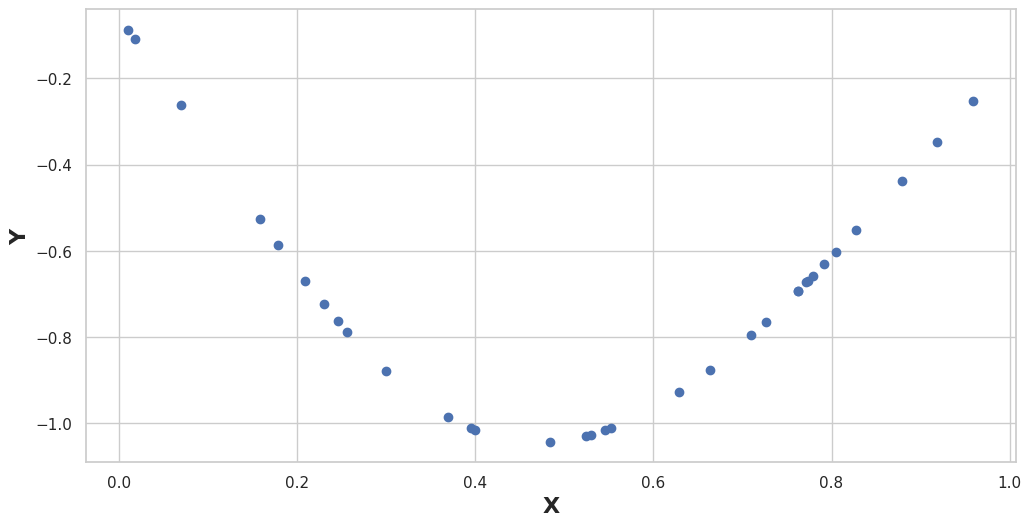

In [17]:
pred = model.predict(X_validation)
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(X_validation, pred, "ob", label="test")
plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)

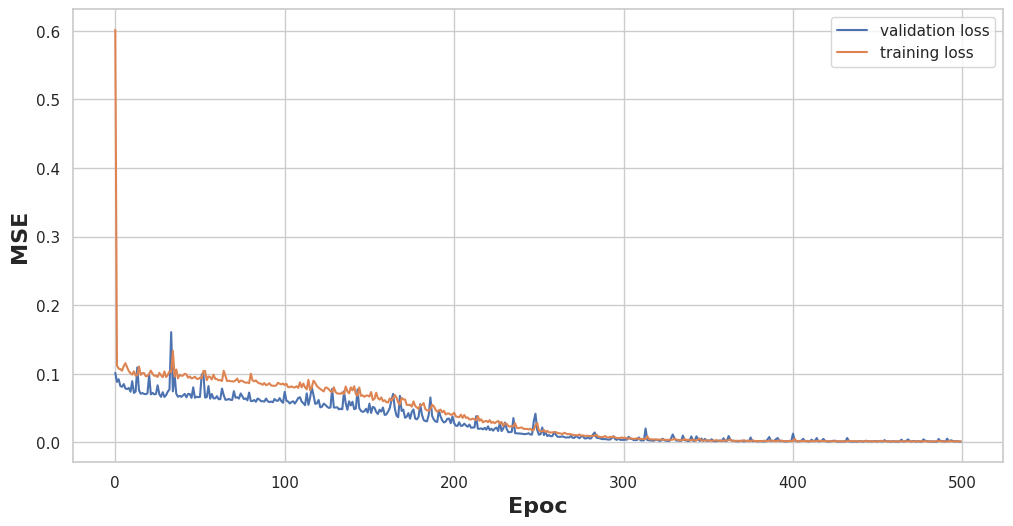

In [18]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(history.history["val_loss"], label="validation loss")
plt.plot(history.history["loss"], label="training loss")
plt.xlabel("Epoc", weight="bold", fontsize=16)
plt.ylabel("MSE", weight="bold", fontsize=16)
plt.legend()

## California dataset: Regresión

Ahora vamos con un [dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) más complicado, el dataset del precio medio por cuadra de casas en un distrito de california

In [19]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [20]:
california = fetch_california_housing()
california_df = pd.DataFrame(california.data, columns=california.feature_names)

In [21]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [22]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

Las variables que contiene el dataset son:

* MedInc: ingreso medio de las personas que viven en esa cuadra
* HouseAge: edad media de las casas de esa cuadra
* AveRooms: número medio de ambientes
* AveBedrms número medio de habitaciones
* Population: cantidad de habitantes en la cuadra
* AveOccup: número medio de habitantes en la casa
* Latitude: latitud de la cuadra
* Longitude: longitud de la cuadra


* MedHouseVal:valor medio de las casas.

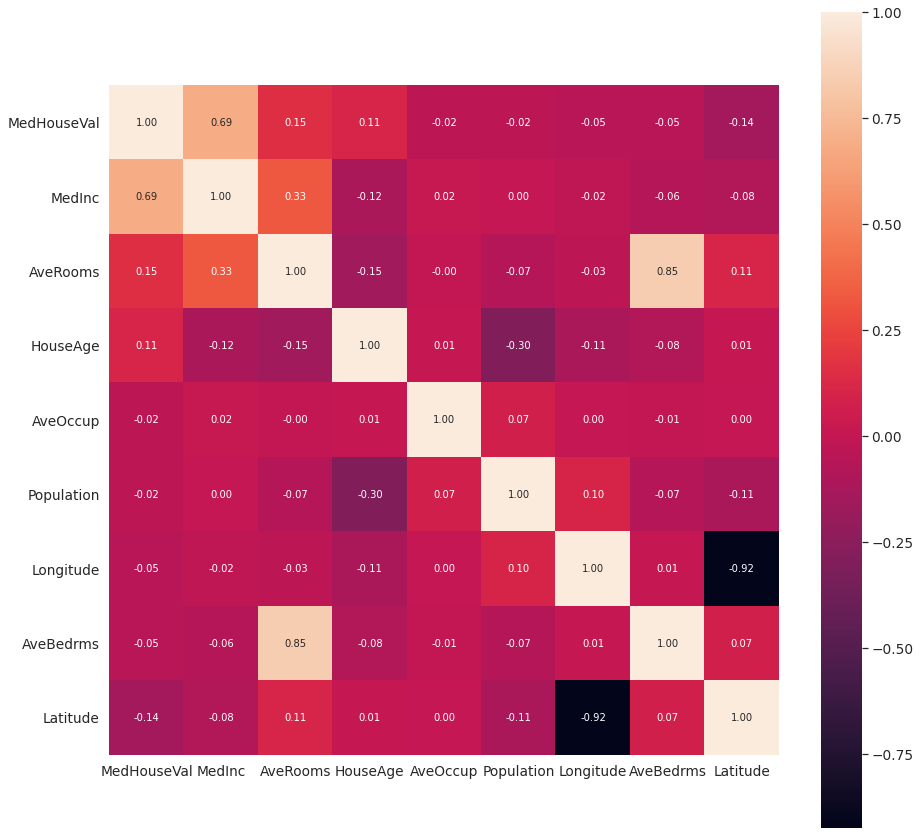

In [23]:
california_df['MedHouseVal'] = california.target
corrmat = california_df.corr()
k = 9  # number of variables for heatmap
cols = corrmat.nlargest(k, 'MedHouseVal')['MedHouseVal'].index
cm = np.corrcoef(california_df[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(15, 15))
hm = sns.heatmap(
    cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 10},
    yticklabels=cols.values,
    xticklabels=cols.values,
)

plt.show()

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

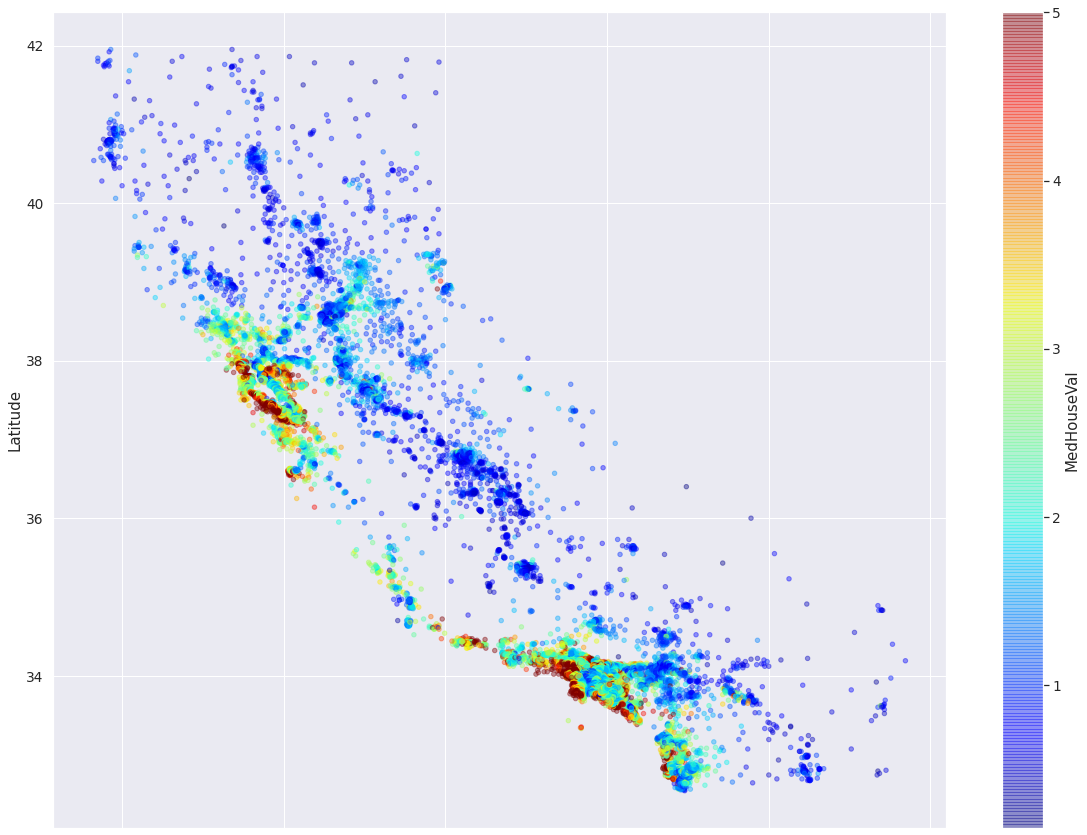

In [24]:
california_df.plot(
    kind="scatter",
    x="Longitude",
    y="Latitude",
    alpha=0.4,
    c="MedHouseVal",
    figsize=(20, 15),
    cmap=plt.get_cmap("jet"),
    colorbar=True,
)

In [25]:
california_df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0        -122.23        4.526  
1        -122.22        3.585  
2        -122.24        3.521  
3        -122.25        3.413  
4        -122.25        3.422  
...          ...          ...  
20635    -121.09        0.781  
20636    -121.21        0.771  
20637    -121.22        0.923  
20638    -121.32        0.847  
20639    -121.24        0.894  

[20640 rows x 9 columns]

Text(0, 0.5, 'Counts')

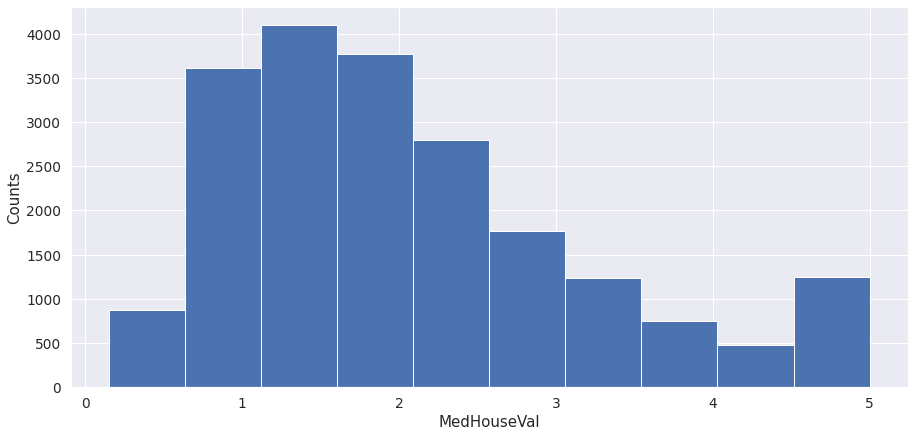

In [26]:
fig = plt.figure(figsize=(15, 7))
california_df["MedHouseVal"].hist()
plt.xlabel("MedHouseVal")
plt.ylabel("Counts")

Vamos a usar el StandardScaler y luego empezar a entrenar modelos y ver qué onda.

In [27]:
scaler = preprocessing.StandardScaler()
scaler.fit(california_df)
scaled_df = scaler.transform(california_df)
names = california_df.columns
scaled_california_df = pd.DataFrame(scaled_df, columns=names)

Entreno el modelo más simple: una regresión lineal

In [28]:
X = scaled_california_df.drop("MedHouseVal", axis=1)
y = scaled_california_df.filter(items=["MedHouseVal"])

linreg = LinearRegression()
rmse = np.sqrt(
    -cross_val_score(LinearRegression(), X, y, scoring="neg_mean_squared_error", cv=5)
)
rmse.mean()

0.6464066254204867

In [29]:
linreg = LinearRegression()
linreg.fit(X, y)
linreg.coef_[0]

array([ 0.71895227,  0.10291078, -0.23010693,  0.26491789, -0.00390232,
       -0.03408034, -0.77984545, -0.75441522])

Podemos ver la importancia tiene cada variable:

In [30]:
coeficientes = pd.DataFrame(
    {'Feature': X.columns, 'Beta': linreg.coef_[0]}, columns=['Feature', 'Beta']
)
coeficientes.sort_values(by=['Beta'])

Feature      Beta
6    Latitude -0.779845
7   Longitude -0.754415
2    AveRooms -0.230107
5    AveOccup -0.034080
4  Population -0.003902
1    HouseAge  0.102911
3   AveBedrms  0.264918
0      MedInc  0.718952

In [31]:
y_pred = linreg.predict(X)

(-3.0, 6.0)

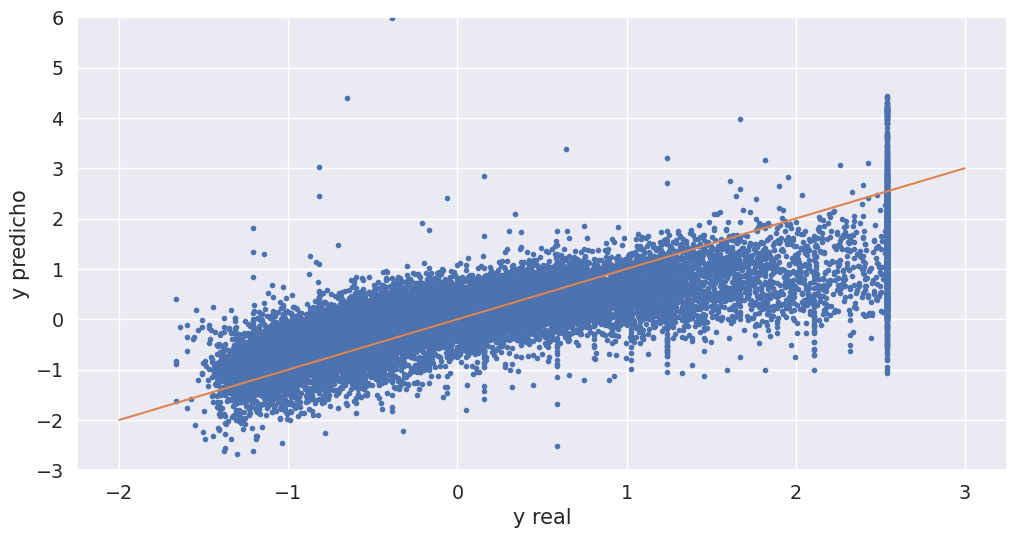

In [32]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(y, y_pred, ".")
plt.xlabel("y real")
plt.ylabel("y predicho")
plt.plot(range(-2, 4), range(-2, 4))
plt.ylim(-3, 6)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

In [34]:
model = Sequential()

In [35]:
model.add(Dense(10, activation='tanh', input_shape=(8,)))
model.add(Dense(1, activation='linear'))

In [36]:
opt = keras.optimizers.SGD(lr=0.1)
model.compile(loss='mse', optimizer=opt)

Podemos usar .summary() para ver el modelo: capas, parámetros etc

In [37]:
model.summary()

history = model.fit(
    X_train.values,
    y_train.values,
    epochs=100,
    validation_data=(X_test.values, y_test.values),
)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
Train on 12384 samples, validate on 8256 samples
Epoch 1/100
   32/12384 [..............................] - ETA: 13s - loss: 1.3136

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.4334 

 5792/12384 [=============>................] - ETA: 0s - loss: 0.3908

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.3808

11520/12384 [==========================>...] - ETA: 0s - loss: 0.3712

12384/12384 [==============================] - 0s 30us/step - loss: 0.3721 - val_loss: 0.3463


Epoch 2/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2654

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.3188

 5728/12384 [============>.................] - ETA: 0s - loss: 0.3184

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.3201

11424/12384 [==========================>...] - ETA: 0s - loss: 0.3200

12384/12384 [==============================] - 0s 26us/step - loss: 0.3201 - val_loss: 0.3280


Epoch 3/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2115

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2942

 5728/12384 [============>.................] - ETA: 0s - loss: 0.3014

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.3086

11328/12384 [==========================>...] - ETA: 0s - loss: 0.3073

12384/12384 [==============================] - 0s 26us/step - loss: 0.3097 - val_loss: 0.3262


Epoch 4/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2662

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.3129

 5696/12384 [============>.................] - ETA: 0s - loss: 0.3019

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2985

11392/12384 [==========================>...] - ETA: 0s - loss: 0.3057

12384/12384 [==============================] - 0s 26us/step - loss: 0.3046 - val_loss: 0.3098


Epoch 5/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4016

 2944/12384 [======>.......................] - ETA: 0s - loss: 0.2881

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2865

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2949

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2998

12384/12384 [==============================] - 0s 26us/step - loss: 0.2997 - val_loss: 0.3161


Epoch 6/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3556

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2961

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2936

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2925

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2952

12384/12384 [==============================] - 0s 26us/step - loss: 0.2960 - val_loss: 0.3058


Epoch 7/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2550

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.3133

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2959

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2913

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2917

12384/12384 [==============================] - 0s 26us/step - loss: 0.2917 - val_loss: 0.3061


Epoch 8/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1396

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.3073

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2909

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2859

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2840

12384/12384 [==============================] - 0s 26us/step - loss: 0.2869 - val_loss: 0.2984


Epoch 9/100
   32/12384 [..............................] - ETA: 0s - loss: 0.5043

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2768

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2752

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2807

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2846

12384/12384 [==============================] - 0s 26us/step - loss: 0.2851 - val_loss: 0.3154


Epoch 10/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2978

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2895

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2743

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2748

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2788

12384/12384 [==============================] - 0s 26us/step - loss: 0.2810 - val_loss: 0.2925


Epoch 11/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2674

 2944/12384 [======>.......................] - ETA: 0s - loss: 0.2845

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2875

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2817

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2764

12384/12384 [==============================] - 0s 26us/step - loss: 0.2796 - val_loss: 0.2992


Epoch 12/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2871

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2745

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2838

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2753

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2753

12384/12384 [==============================] - 0s 26us/step - loss: 0.2775 - val_loss: 0.2842


Epoch 13/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2166

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2637

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2788

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2769

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2762

12384/12384 [==============================] - 0s 26us/step - loss: 0.2745 - val_loss: 0.2804


Epoch 14/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3504

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2889

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2914

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2770

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2738

12384/12384 [==============================] - 0s 26us/step - loss: 0.2728 - val_loss: 0.2750


Epoch 15/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3038

 2944/12384 [======>.......................] - ETA: 0s - loss: 0.2634

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2652

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2629

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2668

12384/12384 [==============================] - 0s 26us/step - loss: 0.2685 - val_loss: 0.2740


Epoch 16/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2166

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2504

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2656

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2671

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2680

12384/12384 [==============================] - 0s 26us/step - loss: 0.2664 - val_loss: 0.2700


Epoch 17/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1904

 2944/12384 [======>.......................] - ETA: 0s - loss: 0.2709

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2797

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2744

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2645

12384/12384 [==============================] - 0s 26us/step - loss: 0.2637 - val_loss: 0.2644


Epoch 18/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1604

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2636

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2591

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2604

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2619

12384/12384 [==============================] - 0s 26us/step - loss: 0.2609 - val_loss: 0.2696


Epoch 19/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3167

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2510

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2582

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2614

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2567

12384/12384 [==============================] - 0s 26us/step - loss: 0.2580 - val_loss: 0.2604


Epoch 20/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2065

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2427

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2432

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.2498

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2575

12384/12384 [==============================] - 0s 26us/step - loss: 0.2596 - val_loss: 0.3363


Epoch 21/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4327

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2512

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2514

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2613

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2583

12384/12384 [==============================] - 0s 26us/step - loss: 0.2580 - val_loss: 0.2597


Epoch 22/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2372

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2561

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2628

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2586

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2566

12384/12384 [==============================] - 0s 26us/step - loss: 0.2551 - val_loss: 0.2650


Epoch 23/100
   32/12384 [..............................] - ETA: 0s - loss: 0.0737

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2409

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2536

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2554

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2575

12384/12384 [==============================] - 0s 26us/step - loss: 0.2582 - val_loss: 0.2655


Epoch 24/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2399

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2636

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2548

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2540

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2540

12384/12384 [==============================] - 0s 26us/step - loss: 0.2563 - val_loss: 0.2848


Epoch 25/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3407

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2483

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2655

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2638

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2583

12384/12384 [==============================] - 0s 26us/step - loss: 0.2592 - val_loss: 0.2654


Epoch 26/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1684

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2571

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2483

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2488

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2549

12384/12384 [==============================] - 0s 26us/step - loss: 0.2540 - val_loss: 0.2679


Epoch 27/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1902

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2609

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2525

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2519

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2506

12384/12384 [==============================] - 0s 26us/step - loss: 0.2534 - val_loss: 0.2582


Epoch 28/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2204

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2556

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2563

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2582

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2594

12384/12384 [==============================] - 0s 26us/step - loss: 0.2579 - val_loss: 0.2607


Epoch 29/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2147

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2427

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2460

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2507

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2523

12384/12384 [==============================] - 0s 26us/step - loss: 0.2524 - val_loss: 0.2674


Epoch 30/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1026

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2493

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2605

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2549

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2572

12384/12384 [==============================] - 0s 27us/step - loss: 0.2522 - val_loss: 0.2584


Epoch 31/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2201

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2513

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2497

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2510

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2505

12384/12384 [==============================] - 0s 26us/step - loss: 0.2507 - val_loss: 0.2632


Epoch 32/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3273

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2525

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2533

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2449

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2519

12384/12384 [==============================] - 0s 26us/step - loss: 0.2500 - val_loss: 0.2663


Epoch 33/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1359

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2526

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2536

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2509

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2496

12384/12384 [==============================] - 0s 26us/step - loss: 0.2504 - val_loss: 0.2729


Epoch 34/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1906

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2349

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2398

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2433

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2481

12384/12384 [==============================] - 0s 26us/step - loss: 0.2492 - val_loss: 0.2525


Epoch 35/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4576

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2557

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2482

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2497

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2492

12384/12384 [==============================] - 0s 26us/step - loss: 0.2489 - val_loss: 0.2757


Epoch 36/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2604

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2459

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2544

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2540

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2526

12384/12384 [==============================] - 0s 26us/step - loss: 0.2500 - val_loss: 0.2585


Epoch 37/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2699

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2508

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2468

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2431

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2489

12384/12384 [==============================] - 0s 26us/step - loss: 0.2478 - val_loss: 0.2557


Epoch 38/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1193

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2445

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2559

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2510

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2471

12384/12384 [==============================] - 0s 26us/step - loss: 0.2477 - val_loss: 0.2820


Epoch 39/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2942

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2287

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2411

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2351

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2467

12384/12384 [==============================] - 0s 26us/step - loss: 0.2466 - val_loss: 0.2835


Epoch 40/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3236

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2333

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2350

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2410

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2452

12384/12384 [==============================] - 0s 26us/step - loss: 0.2467 - val_loss: 0.2690


Epoch 41/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2720

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2448

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2424

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2494

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2522

12384/12384 [==============================] - 0s 26us/step - loss: 0.2493 - val_loss: 0.2694


Epoch 42/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2744

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2405

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2465

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2495

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2512

12384/12384 [==============================] - 0s 26us/step - loss: 0.2490 - val_loss: 0.2677


Epoch 43/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2068

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2363

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2392

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2449

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2432

12384/12384 [==============================] - 0s 26us/step - loss: 0.2467 - val_loss: 0.2673


Epoch 44/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3343

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2673

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2607

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2567

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2455

12384/12384 [==============================] - 0s 26us/step - loss: 0.2482 - val_loss: 0.2631


Epoch 45/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1213

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2518

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2486

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2508

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2490

12384/12384 [==============================] - 0s 26us/step - loss: 0.2457 - val_loss: 0.2596


Epoch 46/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1295

 2944/12384 [======>.......................] - ETA: 0s - loss: 0.2258

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2419

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2392

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2480

12384/12384 [==============================] - 0s 26us/step - loss: 0.2482 - val_loss: 0.2555


Epoch 47/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1302

 2944/12384 [======>.......................] - ETA: 0s - loss: 0.2423

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2479

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2443

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2490

12384/12384 [==============================] - 0s 26us/step - loss: 0.2484 - val_loss: 0.2713


Epoch 48/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2338

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2626

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2407

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2432

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2438

12384/12384 [==============================] - 0s 26us/step - loss: 0.2454 - val_loss: 0.2566


Epoch 49/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2812

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2575

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2424

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2461

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2476

12384/12384 [==============================] - 0s 26us/step - loss: 0.2451 - val_loss: 0.2479


Epoch 50/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1707

 2944/12384 [======>.......................] - ETA: 0s - loss: 0.2553

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2541

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2456

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2441

12384/12384 [==============================] - 0s 26us/step - loss: 0.2450 - val_loss: 0.2542


Epoch 51/100
   32/12384 [..............................] - ETA: 0s - loss: 0.0805

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2432

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2417

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2451

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2475

12384/12384 [==============================] - 0s 26us/step - loss: 0.2465 - val_loss: 0.2594


Epoch 52/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1974

 2944/12384 [======>.......................] - ETA: 0s - loss: 0.2316

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2372

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2436

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2432

12384/12384 [==============================] - 0s 26us/step - loss: 0.2454 - val_loss: 0.2721


Epoch 53/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1693

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2479

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2521

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2477

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2481

12384/12384 [==============================] - 0s 26us/step - loss: 0.2500 - val_loss: 0.2551


Epoch 54/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3972

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2491

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2488

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2467

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2449

12384/12384 [==============================] - 0s 26us/step - loss: 0.2433 - val_loss: 0.2841


Epoch 55/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1482

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2392

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2454

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2433

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2427

12384/12384 [==============================] - 0s 26us/step - loss: 0.2441 - val_loss: 0.2593


Epoch 56/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1589

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2448

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2468

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2472

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2426

12384/12384 [==============================] - 0s 26us/step - loss: 0.2432 - val_loss: 0.2505


Epoch 57/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1156

 2944/12384 [======>.......................] - ETA: 0s - loss: 0.2321

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2465

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2445

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2419

12384/12384 [==============================] - 0s 26us/step - loss: 0.2431 - val_loss: 0.2512


Epoch 58/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4228

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2528

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2421

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2441

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2422

12384/12384 [==============================] - 0s 26us/step - loss: 0.2433 - val_loss: 0.2721


Epoch 59/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1774

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2335

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2335

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2386

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2412

12384/12384 [==============================] - 0s 26us/step - loss: 0.2423 - val_loss: 0.2558


Epoch 60/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3814

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2297

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2344

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2399

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2437

12384/12384 [==============================] - 0s 26us/step - loss: 0.2417 - val_loss: 0.2522


Epoch 61/100
   32/12384 [..............................] - ETA: 0s - loss: 0.5629

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2571

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2443

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2458

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2432

12384/12384 [==============================] - 0s 26us/step - loss: 0.2430 - val_loss: 0.2569


Epoch 62/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1526

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2609

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2492

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2493

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2437

12384/12384 [==============================] - 0s 26us/step - loss: 0.2431 - val_loss: 0.2522


Epoch 63/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4094

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2432

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2456

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2483

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2443

12384/12384 [==============================] - 0s 26us/step - loss: 0.2432 - val_loss: 0.2469


Epoch 64/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3803

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2345

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2422

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2397

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2398

12384/12384 [==============================] - 0s 26us/step - loss: 0.2421 - val_loss: 0.2528


Epoch 65/100
   32/12384 [..............................] - ETA: 0s - loss: 0.5887

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2403

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2404

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2380

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2374

12384/12384 [==============================] - 0s 26us/step - loss: 0.2415 - val_loss: 0.2573


Epoch 66/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1562

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2440

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2439

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2474

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2448

12384/12384 [==============================] - 0s 26us/step - loss: 0.2435 - val_loss: 0.2468


Epoch 67/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4458

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2468

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2476

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2425

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2417

12384/12384 [==============================] - 0s 27us/step - loss: 0.2407 - val_loss: 0.2519


Epoch 68/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2290

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2348

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2369

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2401

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2407

12384/12384 [==============================] - 0s 26us/step - loss: 0.2422 - val_loss: 0.2561


Epoch 69/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2830

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2438

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2469

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2393

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2427

12384/12384 [==============================] - 0s 26us/step - loss: 0.2422 - val_loss: 0.2508


Epoch 70/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1231

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2365

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2448

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2456

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2418

12384/12384 [==============================] - 0s 26us/step - loss: 0.2410 - val_loss: 0.2554


Epoch 71/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1722

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2331

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2457

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2434

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2386

12384/12384 [==============================] - 0s 26us/step - loss: 0.2423 - val_loss: 0.2542


Epoch 72/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4116

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2428

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2356

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2410

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2406

12384/12384 [==============================] - 0s 26us/step - loss: 0.2400 - val_loss: 0.2480


Epoch 73/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1508

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2303

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2329

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2441

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2428

12384/12384 [==============================] - 0s 27us/step - loss: 0.2405 - val_loss: 0.2656


Epoch 74/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2426

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2508

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2479

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2501

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2483

12384/12384 [==============================] - 0s 27us/step - loss: 0.2466 - val_loss: 0.2545


Epoch 75/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3683

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2385

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2347

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2363

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2395

12384/12384 [==============================] - 0s 27us/step - loss: 0.2411 - val_loss: 0.2541


Epoch 76/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3930

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2379

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2427

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2395

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2397

12384/12384 [==============================] - 0s 26us/step - loss: 0.2404 - val_loss: 0.2559


Epoch 77/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3336

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2254

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2439

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2396

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2405

12384/12384 [==============================] - 0s 27us/step - loss: 0.2400 - val_loss: 0.2522


Epoch 78/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3619

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2461

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2419

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2431

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2383

12384/12384 [==============================] - 0s 26us/step - loss: 0.2412 - val_loss: 0.2503


Epoch 79/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2255

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2366

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2348

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2355

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2415

12384/12384 [==============================] - 0s 27us/step - loss: 0.2417 - val_loss: 0.2535


Epoch 80/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2697

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2190

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2384

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2457

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2404

12384/12384 [==============================] - 0s 26us/step - loss: 0.2396 - val_loss: 0.2503


Epoch 81/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1349

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2345

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2356

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2362

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2410

12384/12384 [==============================] - 0s 26us/step - loss: 0.2402 - val_loss: 0.3216


Epoch 82/100
   32/12384 [..............................] - ETA: 0s - loss: 0.5651

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2444

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2341

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2361

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2405

12384/12384 [==============================] - 0s 26us/step - loss: 0.2414 - val_loss: 0.2494


Epoch 83/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1949

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2366

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2410

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2359

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2369

12384/12384 [==============================] - 0s 27us/step - loss: 0.2388 - val_loss: 0.2470


Epoch 84/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1900

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2381

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2355

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2290

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2368

12384/12384 [==============================] - 0s 27us/step - loss: 0.2386 - val_loss: 0.2565


Epoch 85/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4444

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2461

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2459

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2458

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2391

12384/12384 [==============================] - 0s 26us/step - loss: 0.2396 - val_loss: 0.2452


Epoch 86/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2011

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2362

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2440

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2429

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2395

12384/12384 [==============================] - 0s 27us/step - loss: 0.2389 - val_loss: 0.2500


Epoch 87/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2049

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2315

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2378

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2382

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2376

12384/12384 [==============================] - 0s 26us/step - loss: 0.2407 - val_loss: 0.2540


Epoch 88/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1872

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2513

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2349

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2415

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2402

12384/12384 [==============================] - 0s 27us/step - loss: 0.2417 - val_loss: 0.2475


Epoch 89/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1769

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2599

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2562

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2448

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2382

12384/12384 [==============================] - 0s 26us/step - loss: 0.2390 - val_loss: 0.2519


Epoch 90/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2908

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2367

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2302

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2362

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2379

12384/12384 [==============================] - 0s 26us/step - loss: 0.2394 - val_loss: 0.3022


Epoch 91/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2491

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2372

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2325

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2409

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2395

12384/12384 [==============================] - 0s 26us/step - loss: 0.2397 - val_loss: 0.2449


Epoch 92/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1347

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2369

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2355

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2378

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2378

12384/12384 [==============================] - 0s 27us/step - loss: 0.2404 - val_loss: 0.2581


Epoch 93/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2324

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2446

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2446

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2429

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2422

12384/12384 [==============================] - 0s 27us/step - loss: 0.2409 - val_loss: 0.2539


Epoch 94/100
   32/12384 [..............................] - ETA: 0s - loss: 0.0984

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2428

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2385

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2402

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2407

12384/12384 [==============================] - 0s 26us/step - loss: 0.2400 - val_loss: 0.2632


Epoch 95/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1865

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2235

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2323

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2375

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2387

12384/12384 [==============================] - 0s 26us/step - loss: 0.2389 - val_loss: 0.2489


Epoch 96/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1754

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2287

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2378

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2397

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2420

12384/12384 [==============================] - 0s 27us/step - loss: 0.2386 - val_loss: 0.2525


Epoch 97/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2397

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2414

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2431

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2438

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2400

12384/12384 [==============================] - 0s 26us/step - loss: 0.2401 - val_loss: 0.2557


Epoch 98/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2753

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2398

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2311

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2347

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2407

12384/12384 [==============================] - 0s 26us/step - loss: 0.2413 - val_loss: 0.2522


Epoch 99/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2110

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2497

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2378

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2357

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2382

12384/12384 [==============================] - 0s 26us/step - loss: 0.2382 - val_loss: 0.2436


Epoch 100/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3367

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2271

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2295

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2393

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2387

12384/12384 [==============================] - 0s 26us/step - loss: 0.2390 - val_loss: 0.2586


In [38]:
y_pred_nn = model.predict(X_test.values)

(-3.0, 6.0)

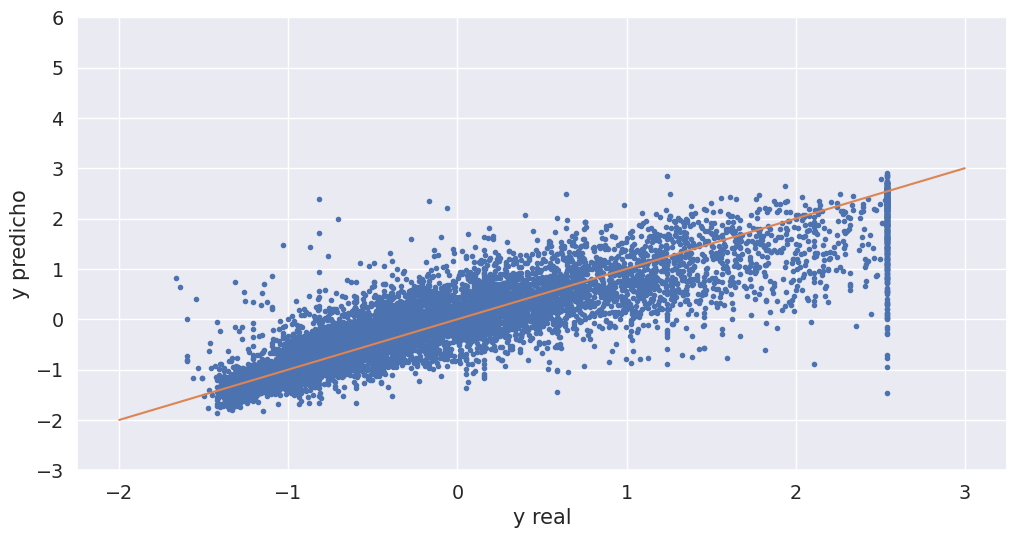

In [39]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(y_test, y_pred_nn, ".")
plt.plot(range(-2, 4), range(-2, 4))
plt.xlabel("y real")
plt.ylabel("y predicho")
plt.ylim(-3, 6)

In [40]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])

Ahora ploteamos el rmse del validation y training por época

Text(0.5, 0, 'Época')

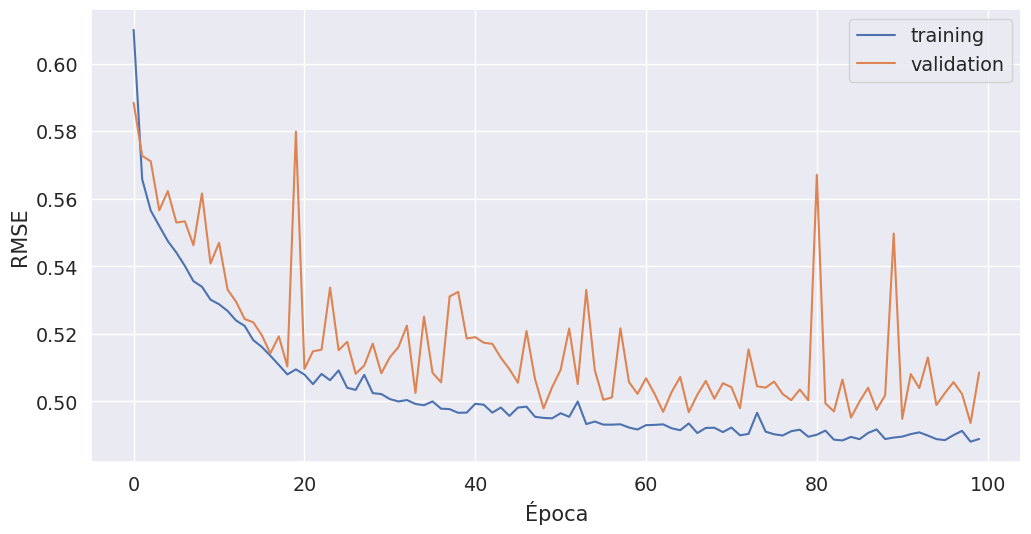

In [41]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss, label="training")
plt.plot(val_loss, label="validation")
plt.legend()
plt.ylabel("RMSE")
plt.xlabel("Época")

Vemos que salta bastante la loss durante el entrenamiento:

Qué podemos hacer para que salte menos? Qué es lo que controla la "velocidad del aprendizaje"?

Podemos bajar la tasa de aprendizaje

In [42]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(8,)))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.SGD(lr=0.05)
model.compile(loss='mse', optimizer=opt)

In [43]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=200,
    validation_data=(X_test.values, y_test.values),
)

Train on 12384 samples, validate on 8256 samples
Epoch 1/200
   32/12384 [..............................] - ETA: 13s - loss: 2.1494

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.5305 

 5568/12384 [============>.................] - ETA: 0s - loss: 0.4522

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.4197

11136/12384 [=========================>....] - ETA: 0s - loss: 0.3989

12384/12384 [==============================] - 0s 31us/step - loss: 0.3902 - val_loss: 0.3432


Epoch 2/200


   32/12384 [..............................] - ETA: 0s - loss: 0.4299

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.3470

 5728/12384 [============>.................] - ETA: 0s - loss: 0.3384

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.3235

11392/12384 [==========================>...] - ETA: 0s - loss: 0.3229

12384/12384 [==============================] - 0s 26us/step - loss: 0.3256 - val_loss: 0.3276


Epoch 3/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2573

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.3318

 5824/12384 [=============>................] - ETA: 0s - loss: 0.3213

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.3187

11520/12384 [==========================>...] - ETA: 0s - loss: 0.3163

12384/12384 [==============================] - 0s 26us/step - loss: 0.3154 - val_loss: 0.3269


Epoch 4/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4460

 2944/12384 [======>.......................] - ETA: 0s - loss: 0.3086

 5792/12384 [=============>................] - ETA: 0s - loss: 0.3121

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.3087

11520/12384 [==========================>...] - ETA: 0s - loss: 0.3060

12384/12384 [==============================] - 0s 26us/step - loss: 0.3068 - val_loss: 0.3190


Epoch 5/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3685

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2820

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2959

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.3100

11392/12384 [==========================>...] - ETA: 0s - loss: 0.3026

12384/12384 [==============================] - 0s 26us/step - loss: 0.3023 - val_loss: 0.3081


Epoch 6/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0910

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.3084

 5696/12384 [============>.................] - ETA: 0s - loss: 0.3007

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.3045

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2999

12384/12384 [==============================] - 0s 26us/step - loss: 0.3005 - val_loss: 0.3110


Epoch 7/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2459

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.3100

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2996

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2973

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2945

12384/12384 [==============================] - 0s 26us/step - loss: 0.2956 - val_loss: 0.3021


Epoch 8/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2901

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2874

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2956

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2918

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2987

12384/12384 [==============================] - 0s 26us/step - loss: 0.2967 - val_loss: 0.3062


Epoch 9/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2519

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.3010

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2989

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2956

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2959

12384/12384 [==============================] - 0s 26us/step - loss: 0.2930 - val_loss: 0.3007


Epoch 10/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3112

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2847

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2976

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2954

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2907

12384/12384 [==============================] - 0s 26us/step - loss: 0.2899 - val_loss: 0.2979


Epoch 11/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1027

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2868

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2911

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2880

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2871

12384/12384 [==============================] - 0s 26us/step - loss: 0.2873 - val_loss: 0.2987


Epoch 12/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2541

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2998

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2858

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2837

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2835

12384/12384 [==============================] - 0s 26us/step - loss: 0.2857 - val_loss: 0.2979


Epoch 13/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3441

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2789

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2795

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2834

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2854

12384/12384 [==============================] - 0s 26us/step - loss: 0.2852 - val_loss: 0.2981


Epoch 14/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3091

 2944/12384 [======>.......................] - ETA: 0s - loss: 0.2907

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2933

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2882

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2848

12384/12384 [==============================] - 0s 26us/step - loss: 0.2851 - val_loss: 0.2926


Epoch 15/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1906

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2864

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2950

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2862

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2815

12384/12384 [==============================] - 0s 26us/step - loss: 0.2816 - val_loss: 0.2939


Epoch 16/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1471

 2944/12384 [======>.......................] - ETA: 0s - loss: 0.2887

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2922

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2825

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2792

12384/12384 [==============================] - 0s 26us/step - loss: 0.2794 - val_loss: 0.2945


Epoch 17/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2272

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2821

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2806

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2819

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2808

12384/12384 [==============================] - 0s 26us/step - loss: 0.2789 - val_loss: 0.2904


Epoch 18/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3848

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2832

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2786

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2819

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2799

12384/12384 [==============================] - 0s 26us/step - loss: 0.2764 - val_loss: 0.2908


Epoch 19/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3186

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2928

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2811

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2790

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2760

12384/12384 [==============================] - 0s 26us/step - loss: 0.2759 - val_loss: 0.2947


Epoch 20/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2536

 2944/12384 [======>.......................] - ETA: 0s - loss: 0.2572

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2665

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2754

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2786

12384/12384 [==============================] - 0s 27us/step - loss: 0.2743 - val_loss: 0.2827


Epoch 21/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2729

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2619

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2660

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2671

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2708

12384/12384 [==============================] - 0s 26us/step - loss: 0.2722 - val_loss: 0.2925


Epoch 22/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4696

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2553

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2625

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2710

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2705

12384/12384 [==============================] - 0s 26us/step - loss: 0.2710 - val_loss: 0.2884


Epoch 23/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1334

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2763

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2790

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2791

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2719

12384/12384 [==============================] - 0s 26us/step - loss: 0.2714 - val_loss: 0.2775


Epoch 24/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2044

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2629

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2617

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2608

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2689

12384/12384 [==============================] - 0s 26us/step - loss: 0.2716 - val_loss: 0.2841


Epoch 25/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1043

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2553

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2708

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2693

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2676

12384/12384 [==============================] - 0s 26us/step - loss: 0.2690 - val_loss: 0.2783


Epoch 26/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2840

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2691

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2703

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2732

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2678

12384/12384 [==============================] - 0s 26us/step - loss: 0.2663 - val_loss: 0.2811


Epoch 27/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1527

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2657

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2671

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2640

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2656

12384/12384 [==============================] - 0s 26us/step - loss: 0.2645 - val_loss: 0.2759


Epoch 28/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2052

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2429

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2582

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2638

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2630

12384/12384 [==============================] - 0s 26us/step - loss: 0.2642 - val_loss: 0.2715


Epoch 29/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1784

 2976/12384 [======>.......................] - ETA: 0s - loss: 0.2324

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2570

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2597

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2626

12384/12384 [==============================] - 0s 26us/step - loss: 0.2622 - val_loss: 0.2700


Epoch 30/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2447

 2944/12384 [======>.......................] - ETA: 0s - loss: 0.2456

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2622

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2671

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2630

12384/12384 [==============================] - 0s 26us/step - loss: 0.2619 - val_loss: 0.2677


Epoch 31/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2592

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2576

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2524

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2600

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2632

12384/12384 [==============================] - 0s 26us/step - loss: 0.2607 - val_loss: 0.2750


Epoch 32/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1546

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2635

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2653

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2598

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2568

12384/12384 [==============================] - 0s 26us/step - loss: 0.2591 - val_loss: 0.2718


Epoch 33/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2826

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2604

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2580

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2526

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2559

12384/12384 [==============================] - 0s 26us/step - loss: 0.2579 - val_loss: 0.2746


Epoch 34/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4009

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2475

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2557

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2587

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2559

12384/12384 [==============================] - 0s 26us/step - loss: 0.2573 - val_loss: 0.2715


Epoch 35/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2089

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2559

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2575

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2619

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2609

12384/12384 [==============================] - 0s 26us/step - loss: 0.2583 - val_loss: 0.2667


Epoch 36/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3367

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2574

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2588

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2563

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2544

12384/12384 [==============================] - 0s 26us/step - loss: 0.2567 - val_loss: 0.2663


Epoch 37/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1532

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2641

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2642

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2514

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2560

12384/12384 [==============================] - 0s 26us/step - loss: 0.2557 - val_loss: 0.2664


Epoch 38/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3574

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2465

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2581

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2574

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2536

12384/12384 [==============================] - 0s 27us/step - loss: 0.2549 - val_loss: 0.2650


Epoch 39/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2562

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2570

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2449

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2463

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2545

12384/12384 [==============================] - 0s 26us/step - loss: 0.2541 - val_loss: 0.2605


Epoch 40/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1666

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2517

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2563

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2573

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2535

12384/12384 [==============================] - 0s 26us/step - loss: 0.2532 - val_loss: 0.2599


Epoch 41/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1360

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2592

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2538

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2555

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2535

12384/12384 [==============================] - 0s 26us/step - loss: 0.2516 - val_loss: 0.2588


Epoch 42/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1340

 2880/12384 [=====>........................] - ETA: 0s - loss: 0.2504

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2496

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2521

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2493

12384/12384 [==============================] - 0s 26us/step - loss: 0.2516 - val_loss: 0.2673


Epoch 43/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2352

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2605

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2470

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2525

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2499

12384/12384 [==============================] - 0s 26us/step - loss: 0.2503 - val_loss: 0.2662


Epoch 44/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2522

 2944/12384 [======>.......................] - ETA: 0s - loss: 0.2439

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2433

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2418

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2504

12384/12384 [==============================] - 0s 26us/step - loss: 0.2524 - val_loss: 0.2693


Epoch 45/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2018

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2483

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2407

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2464

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2480

12384/12384 [==============================] - 0s 26us/step - loss: 0.2486 - val_loss: 0.2649


Epoch 46/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4664

 2944/12384 [======>.......................] - ETA: 0s - loss: 0.2599

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2521

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2504

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2492

12384/12384 [==============================] - 0s 26us/step - loss: 0.2491 - val_loss: 0.2603


Epoch 47/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1533

 2912/12384 [======>.......................] - ETA: 0s - loss: 0.2584

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2543

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2541

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2513

12384/12384 [==============================] - 0s 27us/step - loss: 0.2473 - val_loss: 0.2638


Epoch 48/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4715

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2411

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2472

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2472

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2491

12384/12384 [==============================] - 0s 27us/step - loss: 0.2495 - val_loss: 0.2633


Epoch 49/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3636

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2440

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2488

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2471

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2453

12384/12384 [==============================] - 0s 27us/step - loss: 0.2476 - val_loss: 0.2617


Epoch 50/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4506

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2494

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2465

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2440

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2454

12384/12384 [==============================] - 0s 27us/step - loss: 0.2464 - val_loss: 0.2559


Epoch 51/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2495

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2609

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2577

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2488

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2483

12384/12384 [==============================] - 0s 27us/step - loss: 0.2480 - val_loss: 0.2589


Epoch 52/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2625

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2497

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2498

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2465

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2446

12384/12384 [==============================] - 0s 27us/step - loss: 0.2458 - val_loss: 0.2602


Epoch 53/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1676

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2562

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2529

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2512

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2476

12384/12384 [==============================] - 0s 27us/step - loss: 0.2495 - val_loss: 0.2532


Epoch 54/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1862

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2430

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2426

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2458

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2472

12384/12384 [==============================] - 0s 27us/step - loss: 0.2477 - val_loss: 0.2648


Epoch 55/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1053

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2399

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2396

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2405

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2454

12384/12384 [==============================] - 0s 27us/step - loss: 0.2443 - val_loss: 0.2693


Epoch 56/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0875

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2308

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2415

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2441

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2420

12384/12384 [==============================] - 0s 27us/step - loss: 0.2420 - val_loss: 0.2531


Epoch 57/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1529

 2656/12384 [=====>........................] - ETA: 0s - loss: 0.2463

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2384

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2465

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2451

12384/12384 [==============================] - 0s 27us/step - loss: 0.2472 - val_loss: 0.2556


Epoch 58/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2593

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2404

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2388

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2417

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2410

12384/12384 [==============================] - 0s 27us/step - loss: 0.2436 - val_loss: 0.2515


Epoch 59/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3379

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2493

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2444

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2441

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2405

12384/12384 [==============================] - 0s 27us/step - loss: 0.2423 - val_loss: 0.2578


Epoch 60/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4386

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2372

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2356

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2401

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2405

12384/12384 [==============================] - 0s 27us/step - loss: 0.2402 - val_loss: 0.2541


Epoch 61/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2768

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2375

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2378

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2370

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2388

12384/12384 [==============================] - 0s 27us/step - loss: 0.2403 - val_loss: 0.2528


Epoch 62/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4464

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2542

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2505

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2424

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2408

12384/12384 [==============================] - 0s 27us/step - loss: 0.2404 - val_loss: 0.2509


Epoch 63/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3117

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2300

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2324

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2373

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2408

12384/12384 [==============================] - 0s 27us/step - loss: 0.2395 - val_loss: 0.2579


Epoch 64/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2538

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2534

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2424

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2434

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2419

12384/12384 [==============================] - 0s 27us/step - loss: 0.2401 - val_loss: 0.2518


Epoch 65/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3067

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2452

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2377

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2415

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2404

12384/12384 [==============================] - 0s 27us/step - loss: 0.2391 - val_loss: 0.2483


Epoch 66/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3762

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2283

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2241

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2278

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2364

12384/12384 [==============================] - 0s 27us/step - loss: 0.2388 - val_loss: 0.2578


Epoch 67/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3222

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2393

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2375

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2385

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2354

12384/12384 [==============================] - 0s 27us/step - loss: 0.2387 - val_loss: 0.2482


Epoch 68/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5172

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2176

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2364

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2391

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2368

12384/12384 [==============================] - 0s 27us/step - loss: 0.2388 - val_loss: 0.2522


Epoch 69/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1564

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2292

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2413

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2386

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2373

12384/12384 [==============================] - 0s 27us/step - loss: 0.2376 - val_loss: 0.2589


Epoch 70/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1264

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2442

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2395

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2343

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2355

12384/12384 [==============================] - 0s 27us/step - loss: 0.2384 - val_loss: 0.2568


Epoch 71/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1905

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2430

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2469

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2408

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2380

12384/12384 [==============================] - 0s 27us/step - loss: 0.2372 - val_loss: 0.2492


Epoch 72/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3676

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2435

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2365

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2380

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2386

12384/12384 [==============================] - 0s 27us/step - loss: 0.2379 - val_loss: 0.2473


Epoch 73/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4227

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2426

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2361

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2392

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2352

12384/12384 [==============================] - 0s 27us/step - loss: 0.2376 - val_loss: 0.2499


Epoch 74/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0904

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2351

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2486

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2432

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2389

12384/12384 [==============================] - 0s 27us/step - loss: 0.2369 - val_loss: 0.2478


Epoch 75/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1182

 2688/12384 [=====>........................] - ETA: 0s - loss: 0.2350

 5344/12384 [===========>..................] - ETA: 0s - loss: 0.2505

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2427

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2371

12384/12384 [==============================] - 0s 27us/step - loss: 0.2397 - val_loss: 0.2558


Epoch 76/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4687

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2411

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2380

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2390

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2397

12384/12384 [==============================] - 0s 27us/step - loss: 0.2370 - val_loss: 0.2544


Epoch 77/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5442

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2335

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2301

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2335

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2375

12384/12384 [==============================] - 0s 27us/step - loss: 0.2387 - val_loss: 0.2516


Epoch 78/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1328

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2155

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2254

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2321

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2341

12384/12384 [==============================] - 0s 27us/step - loss: 0.2371 - val_loss: 0.2575


Epoch 79/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0926

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2377

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2359

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2368

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2359

12384/12384 [==============================] - 0s 27us/step - loss: 0.2370 - val_loss: 0.2534


Epoch 80/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2231

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2390

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2378

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2344

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2349

12384/12384 [==============================] - 0s 27us/step - loss: 0.2371 - val_loss: 0.2573


Epoch 81/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1783

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2337

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2318

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2338

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2406

12384/12384 [==============================] - 0s 27us/step - loss: 0.2375 - val_loss: 0.2565


Epoch 82/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1781

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2520

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2345

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2341

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2368

12384/12384 [==============================] - 0s 27us/step - loss: 0.2364 - val_loss: 0.2559


Epoch 83/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3027

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2397

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2481

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2442

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2373

12384/12384 [==============================] - 0s 27us/step - loss: 0.2363 - val_loss: 0.2531


Epoch 84/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4022

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2419

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2417

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2431

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2373

12384/12384 [==============================] - 0s 27us/step - loss: 0.2366 - val_loss: 0.2496


Epoch 85/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2611

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2301

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2352

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2403

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2364

12384/12384 [==============================] - 0s 27us/step - loss: 0.2356 - val_loss: 0.2518


Epoch 86/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1989

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2360

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2365

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2366

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2368

12384/12384 [==============================] - 0s 27us/step - loss: 0.2373 - val_loss: 0.2474


Epoch 87/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2867

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2348

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2316

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2350

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2350

12384/12384 [==============================] - 0s 27us/step - loss: 0.2362 - val_loss: 0.2485


Epoch 88/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0827

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2561

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2437

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2362

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2373

12384/12384 [==============================] - 0s 27us/step - loss: 0.2363 - val_loss: 0.2508


Epoch 89/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1740

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2475

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2388

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2336

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2320

12384/12384 [==============================] - 0s 27us/step - loss: 0.2351 - val_loss: 0.2480


Epoch 90/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1343

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2028

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2219

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2295

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2395

12384/12384 [==============================] - 0s 27us/step - loss: 0.2395 - val_loss: 0.2588


Epoch 91/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1714

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2294

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2377

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2439

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2394

12384/12384 [==============================] - 0s 27us/step - loss: 0.2378 - val_loss: 0.2514


Epoch 92/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2502

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2273

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2296

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2338

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2396

12384/12384 [==============================] - 0s 27us/step - loss: 0.2364 - val_loss: 0.2495


Epoch 93/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3314

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2344

 5280/12384 [===========>..................] - ETA: 0s - loss: 0.2412

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2416

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2392

12384/12384 [==============================] - 0s 27us/step - loss: 0.2365 - val_loss: 0.2504


Epoch 94/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1439

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2274

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2438

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2425

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2374

12384/12384 [==============================] - 0s 27us/step - loss: 0.2361 - val_loss: 0.2642


Epoch 95/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2087

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2357

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2252

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2308

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2348

12384/12384 [==============================] - 0s 27us/step - loss: 0.2355 - val_loss: 0.2510


Epoch 96/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1272

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2283

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2359

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2352

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2339

12384/12384 [==============================] - 0s 27us/step - loss: 0.2357 - val_loss: 0.2606


Epoch 97/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2685

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2719

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2511

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2383

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2385

12384/12384 [==============================] - 0s 27us/step - loss: 0.2358 - val_loss: 0.2559


Epoch 98/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2021

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2281

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2428

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2405

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2374

12384/12384 [==============================] - 0s 27us/step - loss: 0.2351 - val_loss: 0.2515


Epoch 99/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4124

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2364

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2337

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2370

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2354

12384/12384 [==============================] - 0s 27us/step - loss: 0.2352 - val_loss: 0.2467


Epoch 100/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3410

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2305

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2219

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2315

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2323

12384/12384 [==============================] - 0s 27us/step - loss: 0.2344 - val_loss: 0.2477


Epoch 101/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2068

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2506

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2441

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2392

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2350

12384/12384 [==============================] - 0s 27us/step - loss: 0.2353 - val_loss: 0.2529


Epoch 102/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1694

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2376

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2382

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2374

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2344

12384/12384 [==============================] - 0s 27us/step - loss: 0.2340 - val_loss: 0.2484


Epoch 103/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3805

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2253

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2379

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2329

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2330

12384/12384 [==============================] - 0s 27us/step - loss: 0.2349 - val_loss: 0.2487


Epoch 104/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2099

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2359

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2311

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2326

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2361

12384/12384 [==============================] - 0s 27us/step - loss: 0.2341 - val_loss: 0.2668


Epoch 105/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2395

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2255

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2320

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2353

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2356

12384/12384 [==============================] - 0s 27us/step - loss: 0.2345 - val_loss: 0.2480


Epoch 106/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1333

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2293

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2327

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2331

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2330

12384/12384 [==============================] - 0s 27us/step - loss: 0.2342 - val_loss: 0.2654


Epoch 107/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3035

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2269

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2346

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2299

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2356

12384/12384 [==============================] - 0s 27us/step - loss: 0.2338 - val_loss: 0.2485


Epoch 108/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2216

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2507

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2364

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2397

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2352

12384/12384 [==============================] - 0s 27us/step - loss: 0.2339 - val_loss: 0.2493


Epoch 109/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1520

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2271

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2307

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2328

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2343

12384/12384 [==============================] - 0s 27us/step - loss: 0.2333 - val_loss: 0.2500


Epoch 110/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1784

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2205

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2281

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2362

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2303

12384/12384 [==============================] - 0s 27us/step - loss: 0.2334 - val_loss: 0.2530


Epoch 111/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1941

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2414

 5376/12384 [============>.................] - ETA: 0s - loss: 0.2339

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2319

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2304

12384/12384 [==============================] - 0s 27us/step - loss: 0.2346 - val_loss: 0.2603


Epoch 112/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1403

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2311

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2315

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2331

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2340

12384/12384 [==============================] - 0s 27us/step - loss: 0.2334 - val_loss: 0.2590


Epoch 113/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1854

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2421

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2331

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2319

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2348

12384/12384 [==============================] - 0s 27us/step - loss: 0.2331 - val_loss: 0.2521


Epoch 114/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1873

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2335

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2297

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2329

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2337

12384/12384 [==============================] - 0s 27us/step - loss: 0.2331 - val_loss: 0.2491


Epoch 115/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2761

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2443

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2291

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2375

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2333

12384/12384 [==============================] - 0s 27us/step - loss: 0.2337 - val_loss: 0.2503


Epoch 116/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1472

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2272

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2295

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2301

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2350

12384/12384 [==============================] - 0s 27us/step - loss: 0.2332 - val_loss: 0.2610


Epoch 117/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4632

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2465

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2431

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2325

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2309

12384/12384 [==============================] - 0s 27us/step - loss: 0.2338 - val_loss: 0.2454


Epoch 118/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2511

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2375

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2376

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2338

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2315

12384/12384 [==============================] - 0s 27us/step - loss: 0.2334 - val_loss: 0.2473


Epoch 119/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3991

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2394

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2403

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2393

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2327

12384/12384 [==============================] - 0s 27us/step - loss: 0.2334 - val_loss: 0.2470


Epoch 120/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3332

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2447

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2396

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2333

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2326

12384/12384 [==============================] - 0s 27us/step - loss: 0.2332 - val_loss: 0.2485


Epoch 121/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3032

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2265

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2275

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2344

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2332

12384/12384 [==============================] - 0s 27us/step - loss: 0.2330 - val_loss: 0.2517


Epoch 122/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1753

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2298

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2359

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2351

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2340

12384/12384 [==============================] - 0s 27us/step - loss: 0.2335 - val_loss: 0.2542


Epoch 123/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1997

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2177

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2393

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2396

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2331

12384/12384 [==============================] - 0s 27us/step - loss: 0.2326 - val_loss: 0.2548


Epoch 124/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3637

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2165

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2264

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2340

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2316

12384/12384 [==============================] - 0s 27us/step - loss: 0.2328 - val_loss: 0.2556


Epoch 125/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2387

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2376

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2262

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2280

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2308

12384/12384 [==============================] - 0s 27us/step - loss: 0.2332 - val_loss: 0.2480


Epoch 126/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1907

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2284

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2281

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2319

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2311

12384/12384 [==============================] - 0s 27us/step - loss: 0.2321 - val_loss: 0.2547


Epoch 127/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0770

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2462

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2275

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2295

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2314

12384/12384 [==============================] - 0s 27us/step - loss: 0.2327 - val_loss: 0.2472


Epoch 128/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1657

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2351

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2297

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2338

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2288

12384/12384 [==============================] - 0s 27us/step - loss: 0.2324 - val_loss: 0.2515


Epoch 129/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1764

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2414

 5280/12384 [===========>..................] - ETA: 0s - loss: 0.2336

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2370

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2355

12384/12384 [==============================] - 0s 27us/step - loss: 0.2326 - val_loss: 0.2486


Epoch 130/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0958

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2242

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2295

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2386

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2338

12384/12384 [==============================] - 0s 27us/step - loss: 0.2320 - val_loss: 0.2482


Epoch 131/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3202

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2338

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2309

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2354

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2333

12384/12384 [==============================] - 0s 27us/step - loss: 0.2326 - val_loss: 0.2452


Epoch 132/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1060

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2307

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2371

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2391

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2346

12384/12384 [==============================] - 0s 27us/step - loss: 0.2328 - val_loss: 0.2555


Epoch 133/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3919

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2417

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2244

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2344

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2352

12384/12384 [==============================] - 0s 27us/step - loss: 0.2319 - val_loss: 0.2454


Epoch 134/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1237

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2340

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2378

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2371

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2305

12384/12384 [==============================] - 0s 27us/step - loss: 0.2321 - val_loss: 0.2483


Epoch 135/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3006

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2176

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2373

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2365

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2343

12384/12384 [==============================] - 0s 27us/step - loss: 0.2324 - val_loss: 0.2469


Epoch 136/200
   32/12384 [..............................] - ETA: 0s - loss: 0.6284

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2280

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2366

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2333

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2334

12384/12384 [==============================] - 0s 27us/step - loss: 0.2325 - val_loss: 0.2485


Epoch 137/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2846

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2392

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2298

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2348

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2330

12384/12384 [==============================] - 0s 27us/step - loss: 0.2317 - val_loss: 0.2487


Epoch 138/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2624

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2190

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2268

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2308

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2310

12384/12384 [==============================] - 0s 27us/step - loss: 0.2317 - val_loss: 0.2447


Epoch 139/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2542

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2397

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2386

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2321

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2327

12384/12384 [==============================] - 0s 27us/step - loss: 0.2321 - val_loss: 0.2504


Epoch 140/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3460

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2269

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2346

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2332

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2328

12384/12384 [==============================] - 0s 27us/step - loss: 0.2317 - val_loss: 0.2554


Epoch 141/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1683

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2052

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2222

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2262

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2280

12384/12384 [==============================] - 0s 27us/step - loss: 0.2317 - val_loss: 0.2463


Epoch 142/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0946

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2316

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2416

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2340

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2347

12384/12384 [==============================] - 0s 27us/step - loss: 0.2317 - val_loss: 0.2448


Epoch 143/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3269

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2334

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2385

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2316

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2307

12384/12384 [==============================] - 0s 27us/step - loss: 0.2319 - val_loss: 0.2501


Epoch 144/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2632

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2161

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2234

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2241

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2310

12384/12384 [==============================] - 0s 27us/step - loss: 0.2320 - val_loss: 0.2467


Epoch 145/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2311

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2391

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2396

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2325

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2353

12384/12384 [==============================] - 0s 27us/step - loss: 0.2316 - val_loss: 0.2459


Epoch 146/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2738

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2338

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2270

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2318

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2296

12384/12384 [==============================] - 0s 27us/step - loss: 0.2315 - val_loss: 0.2477


Epoch 147/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1525

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2552

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2378

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2315

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2325

12384/12384 [==============================] - 0s 27us/step - loss: 0.2305 - val_loss: 0.2454


Epoch 148/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2877

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2308

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2277

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2357

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2312

12384/12384 [==============================] - 0s 27us/step - loss: 0.2313 - val_loss: 0.2473


Epoch 149/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2911

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2343

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2454

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2369

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2294

12384/12384 [==============================] - 0s 27us/step - loss: 0.2308 - val_loss: 0.2445


Epoch 150/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1637

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2270

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2325

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2301

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2307

12384/12384 [==============================] - 0s 27us/step - loss: 0.2320 - val_loss: 0.2437


Epoch 151/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1924

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2166

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2241

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2235

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2295

12384/12384 [==============================] - 0s 27us/step - loss: 0.2315 - val_loss: 0.2469


Epoch 152/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4112

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2100

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2192

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2248

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2274

12384/12384 [==============================] - 0s 27us/step - loss: 0.2309 - val_loss: 0.2454


Epoch 153/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2269

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2226

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2282

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2324

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2307

12384/12384 [==============================] - 0s 27us/step - loss: 0.2313 - val_loss: 0.2430


Epoch 154/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1970

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2446

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2353

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2326

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2300

12384/12384 [==============================] - 0s 27us/step - loss: 0.2313 - val_loss: 0.2486


Epoch 155/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1620

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2382

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2368

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2327

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2296

12384/12384 [==============================] - 0s 27us/step - loss: 0.2315 - val_loss: 0.2453


Epoch 156/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0991

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2205

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2267

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2276

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2328

12384/12384 [==============================] - 0s 27us/step - loss: 0.2309 - val_loss: 0.2475


Epoch 157/200
   32/12384 [..............................] - ETA: 0s - loss: 0.6527

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2332

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2279

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2308

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2301

12384/12384 [==============================] - 0s 27us/step - loss: 0.2308 - val_loss: 0.2471


Epoch 158/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1094

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2275

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2282

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2293

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2272

12384/12384 [==============================] - 0s 27us/step - loss: 0.2303 - val_loss: 0.2510


Epoch 159/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3354

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2334

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2358

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2314

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2323

12384/12384 [==============================] - 0s 27us/step - loss: 0.2313 - val_loss: 0.2480


Epoch 160/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1222

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2512

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2350

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2328

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2301

12384/12384 [==============================] - 0s 27us/step - loss: 0.2302 - val_loss: 0.2463


Epoch 161/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2269

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2323

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2291

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2275

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2299

12384/12384 [==============================] - 0s 27us/step - loss: 0.2301 - val_loss: 0.2484


Epoch 162/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2261

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2240

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2262

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2322

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2287

12384/12384 [==============================] - 0s 27us/step - loss: 0.2311 - val_loss: 0.2438


Epoch 163/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0938

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2376

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2363

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2385

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2317

12384/12384 [==============================] - 0s 27us/step - loss: 0.2303 - val_loss: 0.2474


Epoch 164/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2033

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2388

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2416

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2359

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2304

12384/12384 [==============================] - 0s 27us/step - loss: 0.2297 - val_loss: 0.2464


Epoch 165/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1065

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2292

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2305

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2314

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2306

12384/12384 [==============================] - 0s 27us/step - loss: 0.2303 - val_loss: 0.2505


Epoch 166/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2646

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2426

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2273

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2270

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2312

12384/12384 [==============================] - 0s 27us/step - loss: 0.2297 - val_loss: 0.2491


Epoch 167/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0965

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2285

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2258

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2280

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2304

12384/12384 [==============================] - 0s 27us/step - loss: 0.2299 - val_loss: 0.2459


Epoch 168/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1036

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2416

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2299

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2306

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2300

12384/12384 [==============================] - 0s 27us/step - loss: 0.2299 - val_loss: 0.2503


Epoch 169/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4062

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2267

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2314

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2317

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2327

12384/12384 [==============================] - 0s 27us/step - loss: 0.2302 - val_loss: 0.2455


Epoch 170/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1878

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2188

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2229

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2228

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2283

12384/12384 [==============================] - 0s 27us/step - loss: 0.2299 - val_loss: 0.2430


Epoch 171/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2498

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2092

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2215

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2309

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2287

12384/12384 [==============================] - 0s 27us/step - loss: 0.2301 - val_loss: 0.2461


Epoch 172/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1081

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2194

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2318

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2244

10464/12384 [========================>.....] - ETA: 0s - loss: 0.2264

12384/12384 [==============================] - 0s 28us/step - loss: 0.2287 - val_loss: 0.2435


Epoch 173/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1813

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2295

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2253

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2300

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2298

12384/12384 [==============================] - 0s 27us/step - loss: 0.2306 - val_loss: 0.2463


Epoch 174/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1826

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2112

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2360

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2261

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2276

12384/12384 [==============================] - 0s 27us/step - loss: 0.2300 - val_loss: 0.2494


Epoch 175/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2189

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2267

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2280

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2292

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2259

12384/12384 [==============================] - 0s 27us/step - loss: 0.2308 - val_loss: 0.2441


Epoch 176/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3944

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2188

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2237

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2324

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2298

12384/12384 [==============================] - 0s 27us/step - loss: 0.2296 - val_loss: 0.2478


Epoch 177/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1643

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2309

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2312

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2365

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2322

12384/12384 [==============================] - 0s 27us/step - loss: 0.2303 - val_loss: 0.2472


Epoch 178/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2036

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2239

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2343

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2292

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2299

12384/12384 [==============================] - 0s 27us/step - loss: 0.2298 - val_loss: 0.2459


Epoch 179/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3806

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2382

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2286

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2297

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2309

12384/12384 [==============================] - 0s 27us/step - loss: 0.2297 - val_loss: 0.2434


Epoch 180/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1041

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2269

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2308

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2318

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2302

12384/12384 [==============================] - 0s 27us/step - loss: 0.2295 - val_loss: 0.2443


Epoch 181/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1293

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2408

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2369

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2333

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2299

12384/12384 [==============================] - 0s 27us/step - loss: 0.2295 - val_loss: 0.2451


Epoch 182/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3648

 2848/12384 [=====>........................] - ETA: 0s - loss: 0.2155

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2258

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2247

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2292

12384/12384 [==============================] - 0s 27us/step - loss: 0.2290 - val_loss: 0.2430


Epoch 183/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3027

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2402

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2385

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2342

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2296

12384/12384 [==============================] - 0s 27us/step - loss: 0.2294 - val_loss: 0.2429


Epoch 184/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0899

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2279

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2327

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2285

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2301

12384/12384 [==============================] - 0s 27us/step - loss: 0.2303 - val_loss: 0.2425


Epoch 185/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1965

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2326

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2299

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2299

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2329

12384/12384 [==============================] - 0s 27us/step - loss: 0.2294 - val_loss: 0.2473


Epoch 186/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0885

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2309

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2307

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2292

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2274

12384/12384 [==============================] - 0s 27us/step - loss: 0.2293 - val_loss: 0.2443


Epoch 187/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1916

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2150

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2288

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2274

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2276

12384/12384 [==============================] - 0s 27us/step - loss: 0.2284 - val_loss: 0.2468


Epoch 188/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4298

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2349

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2243

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2277

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2313

12384/12384 [==============================] - 0s 27us/step - loss: 0.2323 - val_loss: 0.2458


Epoch 189/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2146

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2214

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2323

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2346

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2301

12384/12384 [==============================] - 0s 27us/step - loss: 0.2304 - val_loss: 0.2486


Epoch 190/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2193

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2191

 5440/12384 [============>.................] - ETA: 0s - loss: 0.2224

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2239

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2278

12384/12384 [==============================] - 0s 27us/step - loss: 0.2296 - val_loss: 0.2470


Epoch 191/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2833

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2139

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2293

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2276

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2251

12384/12384 [==============================] - 0s 27us/step - loss: 0.2315 - val_loss: 0.2432


Epoch 192/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2178

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2281

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2216

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2287

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2285

12384/12384 [==============================] - 0s 27us/step - loss: 0.2292 - val_loss: 0.2462


Epoch 193/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4475

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2388

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2379

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2326

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2315

12384/12384 [==============================] - 0s 27us/step - loss: 0.2292 - val_loss: 0.2429


Epoch 194/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3170

 2816/12384 [=====>........................] - ETA: 0s - loss: 0.2279

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2238

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2299

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2293

12384/12384 [==============================] - 0s 27us/step - loss: 0.2287 - val_loss: 0.2402


Epoch 195/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2313

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2390

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2333

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2292

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2301

12384/12384 [==============================] - 0s 27us/step - loss: 0.2289 - val_loss: 0.2410


Epoch 196/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2679

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2352

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2351

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2302

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2321

12384/12384 [==============================] - 0s 27us/step - loss: 0.2296 - val_loss: 0.2445


Epoch 197/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2124

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2209

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2263

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2227

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2287

12384/12384 [==============================] - 0s 27us/step - loss: 0.2288 - val_loss: 0.2505


Epoch 198/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2780

 2784/12384 [=====>........................] - ETA: 0s - loss: 0.2414

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2339

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2346

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2311

12384/12384 [==============================] - 0s 27us/step - loss: 0.2308 - val_loss: 0.2470


Epoch 199/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2897

 2752/12384 [=====>........................] - ETA: 0s - loss: 0.2359

 5536/12384 [============>.................] - ETA: 0s - loss: 0.2334

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2306

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2301

12384/12384 [==============================] - 0s 27us/step - loss: 0.2297 - val_loss: 0.2420


Epoch 200/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3831

 2720/12384 [=====>........................] - ETA: 0s - loss: 0.2170

 5408/12384 [============>.................] - ETA: 0s - loss: 0.2183

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2150

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2222

12384/12384 [==============================] - 0s 27us/step - loss: 0.2280 - val_loss: 0.2469


Text(0.5, 0, 'Época')

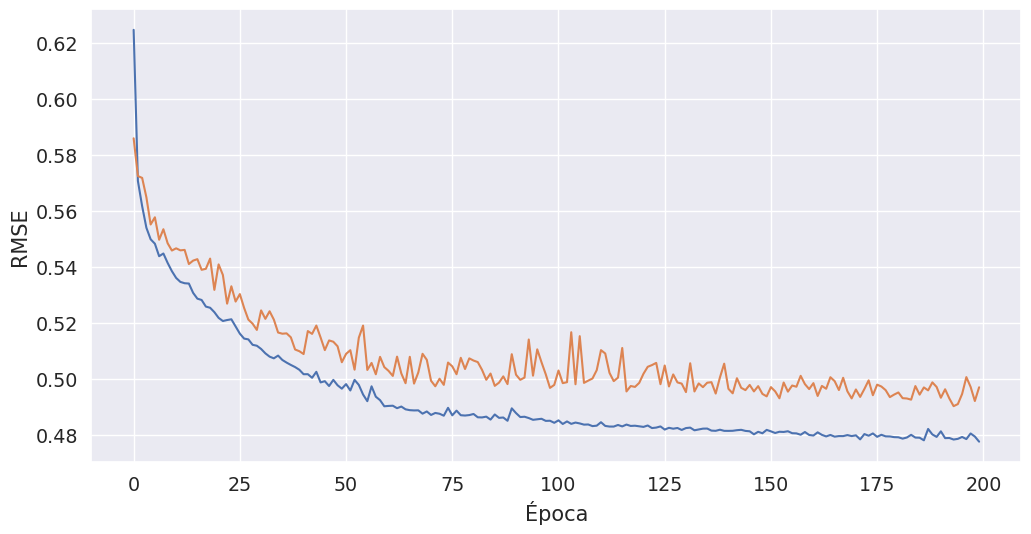

In [44]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")

Vemos que es un poco menos errático el aprendizaje, qué otra cosa podemos hacer para mejorar el entrenamiento como tal:

Hint: Qué cosa se encarga de modificar los pesos una vez calculados los gradientes?

Probamos cambiar el [optmizador](https://keras.io/api/optimizers/) a uno mejor:

mejor==no usar solo el gradiente. Usamos Adam de optmizador

In [45]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(8,)))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

In [46]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=200,
    validation_data=(X_test.values, y_test.values),
)

Train on 12384 samples, validate on 8256 samples
Epoch 1/200
   32/12384 [..............................] - ETA: 21s - loss: 1.5547

 2336/12384 [====>.........................] - ETA: 0s - loss: 1.5084 

 4704/12384 [==========>...................] - ETA: 0s - loss: 1.2052

 7136/12384 [================>.............] - ETA: 0s - loss: 1.0042

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.8751

12032/12384 [============================>.] - ETA: 0s - loss: 0.7949

12384/12384 [==============================] - 0s 35us/step - loss: 0.7831 - val_loss: 0.4344


Epoch 2/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3025

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.3927

 4928/12384 [==========>...................] - ETA: 0s - loss: 0.3981

 7392/12384 [================>.............] - ETA: 0s - loss: 0.3900

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.3827

12352/12384 [============================>.] - ETA: 0s - loss: 0.3824

12384/12384 [==============================] - 0s 29us/step - loss: 0.3825 - val_loss: 0.3623


Epoch 3/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2113

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.3521

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.3520

 7488/12384 [=================>............] - ETA: 0s - loss: 0.3475

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.3435

12384/12384 [==============================] - 0s 29us/step - loss: 0.3452 - val_loss: 0.3456


Epoch 4/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3060

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.3311

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.3317

 7616/12384 [=================>............] - ETA: 0s - loss: 0.3305

10112/12384 [=======================>......] - ETA: 0s - loss: 0.3291

12384/12384 [==============================] - 0s 29us/step - loss: 0.3313 - val_loss: 0.3355


Epoch 5/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5076

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.3231

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.3179

 7584/12384 [=================>............] - ETA: 0s - loss: 0.3303

10048/12384 [=======================>......] - ETA: 0s - loss: 0.3317

12384/12384 [==============================] - 0s 29us/step - loss: 0.3235 - val_loss: 0.3291


Epoch 6/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4513

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.3329

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.3258

 7680/12384 [=================>............] - ETA: 0s - loss: 0.3239

10208/12384 [=======================>......] - ETA: 0s - loss: 0.3179

12384/12384 [==============================] - 0s 29us/step - loss: 0.3175 - val_loss: 0.3228


Epoch 7/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1678

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.3297

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.3227

 7616/12384 [=================>............] - ETA: 0s - loss: 0.3185

10144/12384 [=======================>......] - ETA: 0s - loss: 0.3120

12384/12384 [==============================] - 0s 29us/step - loss: 0.3120 - val_loss: 0.3186


Epoch 8/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3390

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.3257

 5184/12384 [===========>..................] - ETA: 0s - loss: 0.3103

 7712/12384 [=================>............] - ETA: 0s - loss: 0.3063

10272/12384 [=======================>......] - ETA: 0s - loss: 0.3061

12384/12384 [==============================] - 0s 28us/step - loss: 0.3073 - val_loss: 0.3169


Epoch 9/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3428

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.3011

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2939

 7616/12384 [=================>............] - ETA: 0s - loss: 0.3036

10144/12384 [=======================>......] - ETA: 0s - loss: 0.3048

12384/12384 [==============================] - 0s 29us/step - loss: 0.3040 - val_loss: 0.3132


Epoch 10/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2951

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.3096

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.3023

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2984

10144/12384 [=======================>......] - ETA: 0s - loss: 0.3010

12384/12384 [==============================] - 0s 29us/step - loss: 0.3008 - val_loss: 0.3100


Epoch 11/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4246

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2925

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2990

 7552/12384 [=================>............] - ETA: 0s - loss: 0.3080

10048/12384 [=======================>......] - ETA: 0s - loss: 0.3015

12384/12384 [==============================] - 0s 29us/step - loss: 0.2980 - val_loss: 0.3068


Epoch 12/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1413

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2702

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2825

 7648/12384 [=================>............] - ETA: 0s - loss: 0.3011

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2949

12384/12384 [==============================] - 0s 28us/step - loss: 0.2947 - val_loss: 0.3052


Epoch 13/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3233

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2832

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2877

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2893

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2907

12384/12384 [==============================] - 0s 29us/step - loss: 0.2920 - val_loss: 0.3035


Epoch 14/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1285

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2845

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2892

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2915

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2865

12384/12384 [==============================] - 0s 29us/step - loss: 0.2894 - val_loss: 0.2997


Epoch 15/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2181

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2948

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2903

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2876

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2868



12384/12384 [==============================] - 0s 29us/step - loss: 0.2871 - val_loss: 0.2971


Epoch 16/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2172

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2847

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2994

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2941

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2917

12320/12384 [============================>.] - ETA: 0s - loss: 0.2848

12384/12384 [==============================] - 0s 29us/step - loss: 0.2845 - val_loss: 0.2957


Epoch 17/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2755

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2833

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2719

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2753

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2785

12384/12384 [==============================] - 0s 28us/step - loss: 0.2829 - val_loss: 0.2956


Epoch 18/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2488

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2968

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2871

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2780

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2780

12384/12384 [==============================] - 0s 29us/step - loss: 0.2810 - val_loss: 0.2925


Epoch 19/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1654

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2601

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2743

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2733

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2750

12384/12384 [==============================] - 0s 29us/step - loss: 0.2790 - val_loss: 0.2905


Epoch 20/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0862

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2553

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2760

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2770

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2759

12384/12384 [==============================] - 0s 29us/step - loss: 0.2771 - val_loss: 0.2898


Epoch 21/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2372

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2722

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2669

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2700

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2687



12384/12384 [==============================] - 0s 28us/step - loss: 0.2754 - val_loss: 0.2876


Epoch 22/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1643

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2923

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2852

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2763

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2787

12384/12384 [==============================] - 0s 29us/step - loss: 0.2741 - val_loss: 0.2860


Epoch 23/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1948

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2780

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2809

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2740

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2720

12288/12384 [============================>.] - ETA: 0s - loss: 0.2718

12384/12384 [==============================] - 0s 29us/step - loss: 0.2727 - val_loss: 0.2842


Epoch 24/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2191

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2831

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2799

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2744

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2755

12384/12384 [==============================] - 0s 29us/step - loss: 0.2715 - val_loss: 0.2837


Epoch 25/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4714

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2794

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2644

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2680

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2688



12384/12384 [==============================] - 0s 29us/step - loss: 0.2703 - val_loss: 0.2824


Epoch 26/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2452

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.3031

 5184/12384 [===========>..................] - ETA: 0s - loss: 0.2808

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2751

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2749



12384/12384 [==============================] - 0s 28us/step - loss: 0.2698 - val_loss: 0.2837


Epoch 27/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1242

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2539

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2828

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2803

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2720

12384/12384 [==============================] - 0s 28us/step - loss: 0.2686 - val_loss: 0.2812


Epoch 28/200


   32/12384 [..............................] - ETA: 1s - loss: 0.7065

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2694

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2634

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2637

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2709

12384/12384 [==============================] - 0s 29us/step - loss: 0.2672 - val_loss: 0.2799


Epoch 29/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1719

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2555

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2625

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2627

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2647

12384/12384 [==============================] - 0s 28us/step - loss: 0.2665 - val_loss: 0.2809


Epoch 30/200


   32/12384 [..............................] - ETA: 0s - loss: 0.4846

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2586

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2501

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2550

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2613

12384/12384 [==============================] - 0s 29us/step - loss: 0.2660 - val_loss: 0.2784


Epoch 31/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2309

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2723

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2674

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2670

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2640

12384/12384 [==============================] - 0s 29us/step - loss: 0.2655 - val_loss: 0.2778


Epoch 32/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1739

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2847

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2688

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2674

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2633

12384/12384 [==============================] - 0s 29us/step - loss: 0.2646 - val_loss: 0.2758


Epoch 33/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1873

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2901

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2627

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2566

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2619

12384/12384 [==============================] - 0s 29us/step - loss: 0.2634 - val_loss: 0.2750


Epoch 34/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1714

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2613

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2627

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2604

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2645

12384/12384 [==============================] - 0s 28us/step - loss: 0.2629 - val_loss: 0.2743


Epoch 35/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1283

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2585

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2569

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2651

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2619

12384/12384 [==============================] - 0s 29us/step - loss: 0.2617 - val_loss: 0.2740


Epoch 36/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5608

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2494

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2525

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2553

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2583

12384/12384 [==============================] - 0s 28us/step - loss: 0.2613 - val_loss: 0.2745


Epoch 37/200


   32/12384 [..............................] - ETA: 1s - loss: 0.2574

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2841

 5184/12384 [===========>..................] - ETA: 0s - loss: 0.2697

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2605

10304/12384 [=======================>......] - ETA: 0s - loss: 0.2600

12384/12384 [==============================] - 0s 28us/step - loss: 0.2606 - val_loss: 0.2715


Epoch 38/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2021

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2280

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2422

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2518

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2566

12384/12384 [==============================] - 0s 28us/step - loss: 0.2588 - val_loss: 0.2713


Epoch 39/200


   32/12384 [..............................] - ETA: 1s - loss: 0.2865

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2512

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2532

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2536

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2537

12384/12384 [==============================] - 0s 29us/step - loss: 0.2580 - val_loss: 0.2724


Epoch 40/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3206

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2528

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2563

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2575

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2558

12384/12384 [==============================] - 0s 28us/step - loss: 0.2572 - val_loss: 0.2695


Epoch 41/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1749



 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2503

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2427

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2566

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2538

12384/12384 [==============================] - 0s 29us/step - loss: 0.2556 - val_loss: 0.2674


Epoch 42/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1993

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2811

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2619

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2550

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2542

12384/12384 [==============================] - 0s 29us/step - loss: 0.2542 - val_loss: 0.2675


Epoch 43/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2332

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2375

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2454

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2471

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2510

12384/12384 [==============================] - 0s 29us/step - loss: 0.2531 - val_loss: 0.2671


Epoch 44/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1306

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2469

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2442

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2484

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2509

12384/12384 [==============================] - 0s 28us/step - loss: 0.2525 - val_loss: 0.2656


Epoch 45/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1797

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2593

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2640

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2542

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2533

12384/12384 [==============================] - 0s 29us/step - loss: 0.2512 - val_loss: 0.2663


Epoch 46/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3571

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2470

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2572

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2552

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2517

12384/12384 [==============================] - 0s 29us/step - loss: 0.2504 - val_loss: 0.2624


Epoch 47/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2916

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2527

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2508

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2450

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2432

12384/12384 [==============================] - 0s 29us/step - loss: 0.2494 - val_loss: 0.2653


Epoch 48/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2193

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2370

 5184/12384 [===========>..................] - ETA: 0s - loss: 0.2439

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2431

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2460

12384/12384 [==============================] - 0s 28us/step - loss: 0.2477 - val_loss: 0.2665


Epoch 49/200


   32/12384 [..............................] - ETA: 1s - loss: 0.1775

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2461

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2457

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2481

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2456

12384/12384 [==============================] - 0s 29us/step - loss: 0.2473 - val_loss: 0.2614


Epoch 50/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2204

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2590

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2527

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2474

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2504

12384/12384 [==============================] - 0s 29us/step - loss: 0.2468 - val_loss: 0.2594


Epoch 51/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2013

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2459

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2585

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2516

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2487



12384/12384 [==============================] - 0s 29us/step - loss: 0.2454 - val_loss: 0.2592


Epoch 52/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0859

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2432

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2444

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2492

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2481

12384/12384 [==============================] - 0s 28us/step - loss: 0.2453 - val_loss: 0.2581


Epoch 53/200


   32/12384 [..............................] - ETA: 1s - loss: 0.4114

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2424

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2463

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2469

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2432

12384/12384 [==============================] - 0s 29us/step - loss: 0.2442 - val_loss: 0.2571


Epoch 54/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1438

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2364

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2508

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2506

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2433

12384/12384 [==============================] - 0s 29us/step - loss: 0.2434 - val_loss: 0.2567


Epoch 55/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1714

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2287

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2437

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2468

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2446

12384/12384 [==============================] - 0s 28us/step - loss: 0.2429 - val_loss: 0.2567


Epoch 56/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3265

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2232

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2313

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2363

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2372

12384/12384 [==============================] - 0s 28us/step - loss: 0.2420 - val_loss: 0.2587


Epoch 57/200


   32/12384 [..............................] - ETA: 0s - loss: 0.2808

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2386

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2422

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2411

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2431

12384/12384 [==============================] - 0s 29us/step - loss: 0.2420 - val_loss: 0.2579


Epoch 58/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2187

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2575

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2518

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2376

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2404

12384/12384 [==============================] - 0s 29us/step - loss: 0.2410 - val_loss: 0.2567


Epoch 59/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2687

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2407

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2496

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2416

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2419

12384/12384 [==============================] - 0s 29us/step - loss: 0.2405 - val_loss: 0.2540


Epoch 60/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1518

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2432

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2496

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2392

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2375

12384/12384 [==============================] - 0s 29us/step - loss: 0.2398 - val_loss: 0.2539


Epoch 61/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2522

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2466

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2444

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2454

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2384

12384/12384 [==============================] - 0s 28us/step - loss: 0.2400 - val_loss: 0.2536


Epoch 62/200


   32/12384 [..............................] - ETA: 1s - loss: 0.4256

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2362

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2286

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2311

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2373

12384/12384 [==============================] - 0s 29us/step - loss: 0.2396 - val_loss: 0.2542


Epoch 63/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2010

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2391

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2341

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2357

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2362

12384/12384 [==============================] - 0s 29us/step - loss: 0.2393 - val_loss: 0.2535


Epoch 64/200


   32/12384 [..............................] - ETA: 0s - loss: 0.1968

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2543

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2402

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2400

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2410

12384/12384 [==============================] - 0s 28us/step - loss: 0.2389 - val_loss: 0.2525


Epoch 65/200


   32/12384 [..............................] - ETA: 0s - loss: 0.4989

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2502

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2408

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2392

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2365



12384/12384 [==============================] - 0s 29us/step - loss: 0.2388 - val_loss: 0.2538


Epoch 66/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2462

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2334

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2477

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2441

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2426

12384/12384 [==============================] - 0s 29us/step - loss: 0.2387 - val_loss: 0.2529


Epoch 67/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1844

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2371

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2368

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2390

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2374

12256/12384 [============================>.] - ETA: 0s - loss: 0.2382

12384/12384 [==============================] - 0s 29us/step - loss: 0.2381 - val_loss: 0.2511


Epoch 68/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1764

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2464

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2422

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2378

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2395

12384/12384 [==============================] - 0s 29us/step - loss: 0.2379 - val_loss: 0.2499


Epoch 69/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1370

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2405

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2389

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2410

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2392

12384/12384 [==============================] - 0s 28us/step - loss: 0.2377 - val_loss: 0.2518


Epoch 70/200


   32/12384 [..............................] - ETA: 0s - loss: 0.1688

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2446

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2425

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2417

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2392

12384/12384 [==============================] - 0s 29us/step - loss: 0.2376 - val_loss: 0.2502


Epoch 71/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2342

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2420

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2359

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2358

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2329



12384/12384 [==============================] - 0s 29us/step - loss: 0.2373 - val_loss: 0.2496


Epoch 72/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2438

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2019

 5184/12384 [===========>..................] - ETA: 0s - loss: 0.2264

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2309

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2378

12384/12384 [==============================] - 0s 28us/step - loss: 0.2370 - val_loss: 0.2500


Epoch 73/200


   32/12384 [..............................] - ETA: 0s - loss: 0.2695

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2553

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2351

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2350

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2370

12384/12384 [==============================] - 0s 29us/step - loss: 0.2364 - val_loss: 0.2495


Epoch 74/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2571

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2434

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2350

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2377

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2401

12384/12384 [==============================] - 0s 28us/step - loss: 0.2366 - val_loss: 0.2501


Epoch 75/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0926

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2339

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2271

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2313



10144/12384 [=======================>......] - ETA: 0s - loss: 0.2397

12384/12384 [==============================] - 0s 29us/step - loss: 0.2363 - val_loss: 0.2498


Epoch 76/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2135

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2331

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2319

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2403

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2357

12384/12384 [==============================] - 0s 28us/step - loss: 0.2359 - val_loss: 0.2482


Epoch 77/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3029

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2577

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2436

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2382

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2358

12384/12384 [==============================] - 0s 29us/step - loss: 0.2358 - val_loss: 0.2500


Epoch 78/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0989

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2256

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2286

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2348

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2342

12384/12384 [==============================] - 0s 28us/step - loss: 0.2358 - val_loss: 0.2501


Epoch 79/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0952

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2386

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2412

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2449

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2397

12384/12384 [==============================] - 0s 28us/step - loss: 0.2354 - val_loss: 0.2488


Epoch 80/200


   32/12384 [..............................] - ETA: 1s - loss: 0.1945

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2402

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2346

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2362

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2338

12384/12384 [==============================] - 0s 29us/step - loss: 0.2354 - val_loss: 0.2488


Epoch 81/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0766

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2479

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2371

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2319

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2351

12384/12384 [==============================] - 0s 28us/step - loss: 0.2357 - val_loss: 0.2493


Epoch 82/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1966

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2301

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2350

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2307

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2378

12384/12384 [==============================] - 0s 28us/step - loss: 0.2354 - val_loss: 0.2480


Epoch 83/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3510

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2205

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2230

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2297

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2319

12384/12384 [==============================] - 0s 28us/step - loss: 0.2349 - val_loss: 0.2474


Epoch 84/200


   32/12384 [..............................] - ETA: 1s - loss: 0.2117

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2472

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2431

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2391

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2353

12224/12384 [============================>.] - ETA: 0s - loss: 0.2342

12384/12384 [==============================] - 0s 29us/step - loss: 0.2346 - val_loss: 0.2471


Epoch 85/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1880

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2307

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2367

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2325

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2320



12384/12384 [==============================] - 0s 28us/step - loss: 0.2343 - val_loss: 0.2476


Epoch 86/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2700

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2473

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2345

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2357

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2371

12384/12384 [==============================] - 0s 28us/step - loss: 0.2340 - val_loss: 0.2479


Epoch 87/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1520

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2311

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2277

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2313

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2355

12384/12384 [==============================] - 0s 28us/step - loss: 0.2342 - val_loss: 0.2473


Epoch 88/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1966

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2202

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2363

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2342

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2371

12384/12384 [==============================] - 0s 28us/step - loss: 0.2340 - val_loss: 0.2490


Epoch 89/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1428

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2452

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2365

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2360

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2359

12384/12384 [==============================] - 0s 28us/step - loss: 0.2337 - val_loss: 0.2496


Epoch 90/200


   32/12384 [..............................] - ETA: 1s - loss: 0.3223

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2286

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2383

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2393

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2345

12384/12384 [==============================] - 0s 29us/step - loss: 0.2340 - val_loss: 0.2466


Epoch 91/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2019

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2314

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2358

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2342

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2340

12384/12384 [==============================] - 0s 28us/step - loss: 0.2340 - val_loss: 0.2470


Epoch 92/200


   32/12384 [..............................] - ETA: 0s - loss: 0.1564

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2447

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2398

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2328

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2297

12384/12384 [==============================] - 0s 28us/step - loss: 0.2333 - val_loss: 0.2468


Epoch 93/200


   32/12384 [..............................] - ETA: 1s - loss: 0.2623

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2198

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2274

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2265

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2307

12384/12384 [==============================] - 0s 28us/step - loss: 0.2335 - val_loss: 0.2467


Epoch 94/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2621

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2454

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2521

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2436

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2343

12384/12384 [==============================] - 0s 28us/step - loss: 0.2338 - val_loss: 0.2476


Epoch 95/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2543

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2285

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2275

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2305

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2298

12384/12384 [==============================] - 0s 29us/step - loss: 0.2333 - val_loss: 0.2462


Epoch 96/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4939

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2451

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2308

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2319

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2314

12384/12384 [==============================] - 0s 29us/step - loss: 0.2333 - val_loss: 0.2460


Epoch 97/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2931

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2329

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2366

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2374

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2345

12384/12384 [==============================] - 0s 28us/step - loss: 0.2330 - val_loss: 0.2459


Epoch 98/200


   32/12384 [..............................] - ETA: 0s - loss: 0.5620

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2443

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2374

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2311



10176/12384 [=======================>......] - ETA: 0s - loss: 0.2312

12384/12384 [==============================] - 0s 28us/step - loss: 0.2326 - val_loss: 0.2456


Epoch 99/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2593

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2307

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2292

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2308

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2337

12384/12384 [==============================] - 0s 29us/step - loss: 0.2330 - val_loss: 0.2468


Epoch 100/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1851

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2330

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2372

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2357

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2363

12384/12384 [==============================] - 0s 29us/step - loss: 0.2332 - val_loss: 0.2452


Epoch 101/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2474

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2370

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2337

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2339

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2364

12384/12384 [==============================] - 0s 29us/step - loss: 0.2326 - val_loss: 0.2465


Epoch 102/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2044

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2523

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2370

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2355

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2327

12384/12384 [==============================] - 0s 29us/step - loss: 0.2326 - val_loss: 0.2462


Epoch 103/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1641

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2271

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2273

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2309

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2354

12384/12384 [==============================] - 0s 29us/step - loss: 0.2323 - val_loss: 0.2452


Epoch 104/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1222

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2272

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2306

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2279

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2309

12384/12384 [==============================] - 0s 29us/step - loss: 0.2323 - val_loss: 0.2455


Epoch 105/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2076

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2192

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2225

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2310

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2313

12384/12384 [==============================] - 0s 28us/step - loss: 0.2319 - val_loss: 0.2458


Epoch 106/200


   32/12384 [..............................] - ETA: 1s - loss: 0.2030

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2263

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2407

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2341

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2316

12384/12384 [==============================] - 0s 29us/step - loss: 0.2317 - val_loss: 0.2460


Epoch 107/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2075

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2309

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2282

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2323

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2311

12384/12384 [==============================] - 0s 28us/step - loss: 0.2319 - val_loss: 0.2450


Epoch 108/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1619

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2306

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2248

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2274

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2318

11968/12384 [===========================>..] - ETA: 0s - loss: 0.2326

12384/12384 [==============================] - 0s 30us/step - loss: 0.2320 - val_loss: 0.2456


Epoch 109/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3387

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2431

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2335

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2351

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2324

12384/12384 [==============================] - 0s 29us/step - loss: 0.2314 - val_loss: 0.2451


Epoch 110/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1717

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2332

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2319

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2308

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2304

12384/12384 [==============================] - 0s 29us/step - loss: 0.2314 - val_loss: 0.2442


Epoch 111/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4159

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2423

 5184/12384 [===========>..................] - ETA: 0s - loss: 0.2425

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2407

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2335

12384/12384 [==============================] - 0s 28us/step - loss: 0.2315 - val_loss: 0.2450


Epoch 112/200


   32/12384 [..............................] - ETA: 0s - loss: 0.1614



 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2376

 4896/12384 [==========>...................] - ETA: 0s - loss: 0.2430

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2365



 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2357

12384/12384 [==============================] - 0s 29us/step - loss: 0.2318 - val_loss: 0.2451


Epoch 113/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1670

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2368

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2207

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2327

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2333



12384/12384 [==============================] - 0s 29us/step - loss: 0.2314 - val_loss: 0.2445


Epoch 114/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0954

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2357

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2348

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2332

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2323

12384/12384 [==============================] - 0s 29us/step - loss: 0.2314 - val_loss: 0.2454


Epoch 115/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1293

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2215

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2334

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2292

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2297

12384/12384 [==============================] - 0s 29us/step - loss: 0.2314 - val_loss: 0.2441


Epoch 116/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2767

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2460

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2343

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2306

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2278

12384/12384 [==============================] - 0s 29us/step - loss: 0.2308 - val_loss: 0.2468


Epoch 117/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1125

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2189

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2192

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2209

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2209

12384/12384 [==============================] - 0s 29us/step - loss: 0.2312 - val_loss: 0.2458


Epoch 118/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2476

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2241

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2224

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2275

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2279

12288/12384 [============================>.] - ETA: 0s - loss: 0.2316

12384/12384 [==============================] - 0s 29us/step - loss: 0.2315 - val_loss: 0.2454


Epoch 119/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2126

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2483

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2315

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2338

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2343

12384/12384 [==============================] - 0s 29us/step - loss: 0.2314 - val_loss: 0.2454


Epoch 120/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1596

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2501

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2394

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2330

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2296

12384/12384 [==============================] - 0s 29us/step - loss: 0.2311 - val_loss: 0.2447


Epoch 121/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4089

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2394

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2409

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2364

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2305

12384/12384 [==============================] - 0s 29us/step - loss: 0.2306 - val_loss: 0.2440


Epoch 122/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2004

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2524

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2407

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2411

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2319

12384/12384 [==============================] - 0s 29us/step - loss: 0.2310 - val_loss: 0.2435


Epoch 123/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1542

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2288

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2255

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2290

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2277

12384/12384 [==============================] - 0s 28us/step - loss: 0.2309 - val_loss: 0.2457


Epoch 124/200


   32/12384 [..............................] - ETA: 1s - loss: 0.4188

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2308

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2289

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2289

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2309

12384/12384 [==============================] - 0s 29us/step - loss: 0.2311 - val_loss: 0.2451


Epoch 125/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5461

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2146

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2175

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2324

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2280

12384/12384 [==============================] - 0s 29us/step - loss: 0.2308 - val_loss: 0.2439


Epoch 126/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2329

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2412

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2317

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2293



10048/12384 [=======================>......] - ETA: 0s - loss: 0.2314

12384/12384 [==============================] - 0s 29us/step - loss: 0.2307 - val_loss: 0.2436


Epoch 127/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3653

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2321

 5184/12384 [===========>..................] - ETA: 0s - loss: 0.2305

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2277

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2281

12384/12384 [==============================] - 0s 28us/step - loss: 0.2303 - val_loss: 0.2458


Epoch 128/200


   32/12384 [..............................] - ETA: 1s - loss: 0.1879

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2228

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2249

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2285

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2274

12384/12384 [==============================] - 0s 29us/step - loss: 0.2304 - val_loss: 0.2437


Epoch 129/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1008

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2249

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2231

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2290

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2309

12384/12384 [==============================] - 0s 28us/step - loss: 0.2304 - val_loss: 0.2455


Epoch 130/200


   32/12384 [..............................] - ETA: 1s - loss: 0.1530

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2133

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2162

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2228

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2266

12384/12384 [==============================] - 0s 29us/step - loss: 0.2302 - val_loss: 0.2437


Epoch 131/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2693

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2212

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2198

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2216

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2274

12384/12384 [==============================] - 0s 28us/step - loss: 0.2310 - val_loss: 0.2437


Epoch 132/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2252

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2567

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2396

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2314

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2299

12384/12384 [==============================] - 0s 29us/step - loss: 0.2305 - val_loss: 0.2434


Epoch 133/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1770

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2348

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2304

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2294

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2284



12384/12384 [==============================] - 0s 28us/step - loss: 0.2304 - val_loss: 0.2436


Epoch 134/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0980

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2207

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2331

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2275

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2306

12384/12384 [==============================] - 0s 28us/step - loss: 0.2301 - val_loss: 0.2438


Epoch 135/200


   32/12384 [..............................] - ETA: 0s - loss: 0.1774

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2260

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2379

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2314

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2322

12288/12384 [============================>.] - ETA: 0s - loss: 0.2303

12384/12384 [==============================] - 0s 29us/step - loss: 0.2301 - val_loss: 0.2432


Epoch 136/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4954

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2305

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2344

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2310

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2310

12384/12384 [==============================] - 0s 28us/step - loss: 0.2302 - val_loss: 0.2447


Epoch 137/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2516

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2211

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2199

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2267

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2271

12384/12384 [==============================] - 0s 28us/step - loss: 0.2296 - val_loss: 0.2437


Epoch 138/200


   32/12384 [..............................] - ETA: 1s - loss: 0.3934

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2227

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2310

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2259

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2297

12384/12384 [==============================] - 0s 29us/step - loss: 0.2300 - val_loss: 0.2440


Epoch 139/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1061

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2297

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2310

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2277

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2325

12384/12384 [==============================] - 0s 28us/step - loss: 0.2302 - val_loss: 0.2443


Epoch 140/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3078

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2333

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2286

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2262

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2299

12384/12384 [==============================] - 0s 29us/step - loss: 0.2297 - val_loss: 0.2438


Epoch 141/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1443

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2455

 4768/12384 [==========>...................] - ETA: 0s - loss: 0.2309

 7296/12384 [================>.............] - ETA: 0s - loss: 0.2354

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2323

12256/12384 [============================>.] - ETA: 0s - loss: 0.2299

12384/12384 [==============================] - 0s 29us/step - loss: 0.2296 - val_loss: 0.2434


Epoch 142/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0850

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2265

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2444

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2375

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2353

12384/12384 [==============================] - 0s 29us/step - loss: 0.2299 - val_loss: 0.2441


Epoch 143/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2049

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2418

 5184/12384 [===========>..................] - ETA: 0s - loss: 0.2323

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2295

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2299

12384/12384 [==============================] - 0s 29us/step - loss: 0.2296 - val_loss: 0.2438


Epoch 144/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4112

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2394

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2301

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2274

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2290

12384/12384 [==============================] - 0s 29us/step - loss: 0.2293 - val_loss: 0.2460


Epoch 145/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3630

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2410

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2298

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2310

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2289

12384/12384 [==============================] - 0s 29us/step - loss: 0.2300 - val_loss: 0.2439


Epoch 146/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1124

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2365

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2302

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2268

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2279

12384/12384 [==============================] - 0s 29us/step - loss: 0.2296 - val_loss: 0.2433


Epoch 147/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1527

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2327

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2344

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2331

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2312

12384/12384 [==============================] - 0s 29us/step - loss: 0.2292 - val_loss: 0.2437


Epoch 148/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1596

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2304

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2373

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2341

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2331



12384/12384 [==============================] - 0s 29us/step - loss: 0.2293 - val_loss: 0.2438


Epoch 149/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1307

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2244

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2306

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2307

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2291

12384/12384 [==============================] - 0s 29us/step - loss: 0.2301 - val_loss: 0.2449


Epoch 150/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2314

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2224

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2252

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2247

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2292

12384/12384 [==============================] - 0s 28us/step - loss: 0.2295 - val_loss: 0.2427


Epoch 151/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1305

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2391

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2366

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2358

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2351

12384/12384 [==============================] - 0s 29us/step - loss: 0.2301 - val_loss: 0.2444


Epoch 152/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1966

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2373

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2322

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2364

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2323

12320/12384 [============================>.] - ETA: 0s - loss: 0.2296

12384/12384 [==============================] - 0s 30us/step - loss: 0.2292 - val_loss: 0.2434


Epoch 153/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1172

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2245

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2204

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2273

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2267

12384/12384 [==============================] - 0s 29us/step - loss: 0.2294 - val_loss: 0.2436


Epoch 154/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1653

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2162

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2334

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2265

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2281

12384/12384 [==============================] - 0s 28us/step - loss: 0.2293 - val_loss: 0.2432


Epoch 155/200


   32/12384 [..............................] - ETA: 1s - loss: 0.1759

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2481

 5184/12384 [===========>..................] - ETA: 0s - loss: 0.2333

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2286

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2294

12384/12384 [==============================] - 0s 28us/step - loss: 0.2295 - val_loss: 0.2435


Epoch 156/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3758

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2118

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2255

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2294

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2287

12384/12384 [==============================] - 0s 29us/step - loss: 0.2288 - val_loss: 0.2431


Epoch 157/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3161

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2434

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2315

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2222

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2289

12384/12384 [==============================] - 0s 29us/step - loss: 0.2289 - val_loss: 0.2421


Epoch 158/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1743

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2275

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2243

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2249

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2283

12384/12384 [==============================] - 0s 29us/step - loss: 0.2295 - val_loss: 0.2457


Epoch 159/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2619

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2421

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2336

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2330

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2319

12384/12384 [==============================] - 0s 28us/step - loss: 0.2295 - val_loss: 0.2441


Epoch 160/200


   32/12384 [..............................] - ETA: 1s - loss: 0.1095

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2211

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2117

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2148

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2193

12384/12384 [==============================] - 0s 29us/step - loss: 0.2289 - val_loss: 0.2420


Epoch 161/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1735

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2286

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2246

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2277

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2276

12384/12384 [==============================] - 0s 28us/step - loss: 0.2288 - val_loss: 0.2436


Epoch 162/200


   32/12384 [..............................] - ETA: 0s - loss: 0.2876

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2172

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2208

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2233

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2283

12384/12384 [==============================] - 0s 28us/step - loss: 0.2289 - val_loss: 0.2460


Epoch 163/200


   32/12384 [..............................] - ETA: 1s - loss: 0.1774

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2261

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2352

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2323

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2328

12384/12384 [==============================] - 0s 29us/step - loss: 0.2291 - val_loss: 0.2421


Epoch 164/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0977

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2348

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2308

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2288

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2288

12384/12384 [==============================] - 0s 29us/step - loss: 0.2288 - val_loss: 0.2442


Epoch 165/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2089

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2392

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2297

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2322

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2335

12384/12384 [==============================] - 0s 28us/step - loss: 0.2286 - val_loss: 0.2431


Epoch 166/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2512

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2123

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2214

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2262

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2265

12384/12384 [==============================] - 0s 29us/step - loss: 0.2287 - val_loss: 0.2429


Epoch 167/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4463

 2624/12384 [=====>........................] - ETA: 0s - loss: 0.2372

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2383

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2316

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2311

12384/12384 [==============================] - 0s 28us/step - loss: 0.2290 - val_loss: 0.2425


Epoch 168/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1224

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2217

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2215

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2291

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2301

12384/12384 [==============================] - 0s 29us/step - loss: 0.2291 - val_loss: 0.2422


Epoch 169/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2131

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2148

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2170

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2218

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2258

12384/12384 [==============================] - 0s 29us/step - loss: 0.2288 - val_loss: 0.2421


Epoch 170/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2458

 2464/12384 [====>.........................] - ETA: 0s - loss: 0.2355

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2261

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2230

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2268

12384/12384 [==============================] - 0s 29us/step - loss: 0.2287 - val_loss: 0.2436


Epoch 171/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0828

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2270

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2231

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2255

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2277

12384/12384 [==============================] - 0s 29us/step - loss: 0.2291 - val_loss: 0.2434


Epoch 172/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2652

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2376

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2300

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2271

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2273

12384/12384 [==============================] - 0s 29us/step - loss: 0.2286 - val_loss: 0.2426


Epoch 173/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2219

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2175

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2338

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2334

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2352

12384/12384 [==============================] - 0s 28us/step - loss: 0.2286 - val_loss: 0.2422


Epoch 174/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1459



 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2322

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2288

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2208

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2242

12384/12384 [==============================] - 0s 29us/step - loss: 0.2281 - val_loss: 0.2445


Epoch 175/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2122

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2223

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2280

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2274

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2269

12384/12384 [==============================] - 0s 29us/step - loss: 0.2285 - val_loss: 0.2426


Epoch 176/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3109

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2141

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2235

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2222

10304/12384 [=======================>......] - ETA: 0s - loss: 0.2246

12384/12384 [==============================] - 0s 28us/step - loss: 0.2288 - val_loss: 0.2424


Epoch 177/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1123

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2429

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2355

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2302

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2296

12384/12384 [==============================] - 0s 28us/step - loss: 0.2282 - val_loss: 0.2428


Epoch 178/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1682

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2275

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2276

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2317

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2302



12384/12384 [==============================] - 0s 28us/step - loss: 0.2281 - val_loss: 0.2454


Epoch 179/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1858

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2351

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2203

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2236

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2279

12384/12384 [==============================] - 0s 28us/step - loss: 0.2280 - val_loss: 0.2443


Epoch 180/200


   32/12384 [..............................] - ETA: 1s - loss: 0.1048

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2329

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2332

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2311

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2328

12384/12384 [==============================] - 0s 29us/step - loss: 0.2287 - val_loss: 0.2433


Epoch 181/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1267

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2249

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2256

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2273

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2278

12384/12384 [==============================] - 0s 29us/step - loss: 0.2281 - val_loss: 0.2416


Epoch 182/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4185

 2496/12384 [=====>........................] - ETA: 0s - loss: 0.2206

 4960/12384 [===========>..................] - ETA: 0s - loss: 0.2299

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2291

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2274

12384/12384 [==============================] - 0s 29us/step - loss: 0.2281 - val_loss: 0.2429


Epoch 183/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0914

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2353

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2328

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2311

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2302

12384/12384 [==============================] - 0s 29us/step - loss: 0.2284 - val_loss: 0.2425


Epoch 184/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2780

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2115

 4992/12384 [===========>..................] - ETA: 0s - loss: 0.2160

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2183

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2263

12384/12384 [==============================] - 0s 29us/step - loss: 0.2279 - val_loss: 0.2441


Epoch 185/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4524

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2273

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2274

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2303

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2287

12384/12384 [==============================] - 0s 28us/step - loss: 0.2276 - val_loss: 0.2437


Epoch 186/200


   32/12384 [..............................] - ETA: 1s - loss: 0.2011

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2090

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2242

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2272

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2281

12320/12384 [============================>.] - ETA: 0s - loss: 0.2286

12384/12384 [==============================] - 0s 29us/step - loss: 0.2282 - val_loss: 0.2427


Epoch 187/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3387

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2215

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2149

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2221

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2229

12384/12384 [==============================] - 0s 28us/step - loss: 0.2285 - val_loss: 0.2426


Epoch 188/200


   32/12384 [..............................] - ETA: 1s - loss: 0.1928

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2220

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2208

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2272

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2280

12384/12384 [==============================] - 0s 29us/step - loss: 0.2276 - val_loss: 0.2436


Epoch 189/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3057

 2528/12384 [=====>........................] - ETA: 0s - loss: 0.2308

 5024/12384 [===========>..................] - ETA: 0s - loss: 0.2379

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2396

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2327

12384/12384 [==============================] - 0s 29us/step - loss: 0.2279 - val_loss: 0.2434


Epoch 190/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2191

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2291

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2294

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2290

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2300

12384/12384 [==============================] - 0s 28us/step - loss: 0.2275 - val_loss: 0.2425


Epoch 191/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5693

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2406

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2296

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2248

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2246

12384/12384 [==============================] - 0s 28us/step - loss: 0.2279 - val_loss: 0.2415


Epoch 192/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1375

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2228

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2291

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2294

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2242

12384/12384 [==============================] - 0s 29us/step - loss: 0.2279 - val_loss: 0.2421


Epoch 193/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0908

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2183

 4864/12384 [==========>...................] - ETA: 0s - loss: 0.2253

 7392/12384 [================>.............] - ETA: 0s - loss: 0.2238

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2308

12384/12384 [==============================] - 0s 29us/step - loss: 0.2281 - val_loss: 0.2418


Epoch 194/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2695

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2009

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2146

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2283

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2303

12384/12384 [==============================] - 0s 28us/step - loss: 0.2281 - val_loss: 0.2417


Epoch 195/200


   32/12384 [..............................] - ETA: 1s - loss: 0.2707

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2365

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2292

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2248

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2270

12384/12384 [==============================] - 0s 29us/step - loss: 0.2278 - val_loss: 0.2423


Epoch 196/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1869

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2093

 5120/12384 [===========>..................] - ETA: 0s - loss: 0.2164

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2199

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2290

12384/12384 [==============================] - 0s 28us/step - loss: 0.2279 - val_loss: 0.2449


Epoch 197/200


   32/12384 [..............................] - ETA: 0s - loss: 0.2740

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2172

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2285

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2270

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2239

12384/12384 [==============================] - 0s 28us/step - loss: 0.2280 - val_loss: 0.2417


Epoch 198/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1696

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2330

 5056/12384 [===========>..................] - ETA: 0s - loss: 0.2243

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2243

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2295

12384/12384 [==============================] - 0s 29us/step - loss: 0.2274 - val_loss: 0.2417


Epoch 199/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3352

 2592/12384 [=====>........................] - ETA: 0s - loss: 0.2049

 5184/12384 [===========>..................] - ETA: 0s - loss: 0.2137

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2166

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2247



12384/12384 [==============================] - 0s 29us/step - loss: 0.2276 - val_loss: 0.2425


Epoch 200/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1888

 2560/12384 [=====>........................] - ETA: 0s - loss: 0.2317

 5088/12384 [===========>..................] - ETA: 0s - loss: 0.2273

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2328

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2286

12384/12384 [==============================] - 0s 28us/step - loss: 0.2277 - val_loss: 0.2423


No handles with labels found to put in legend.


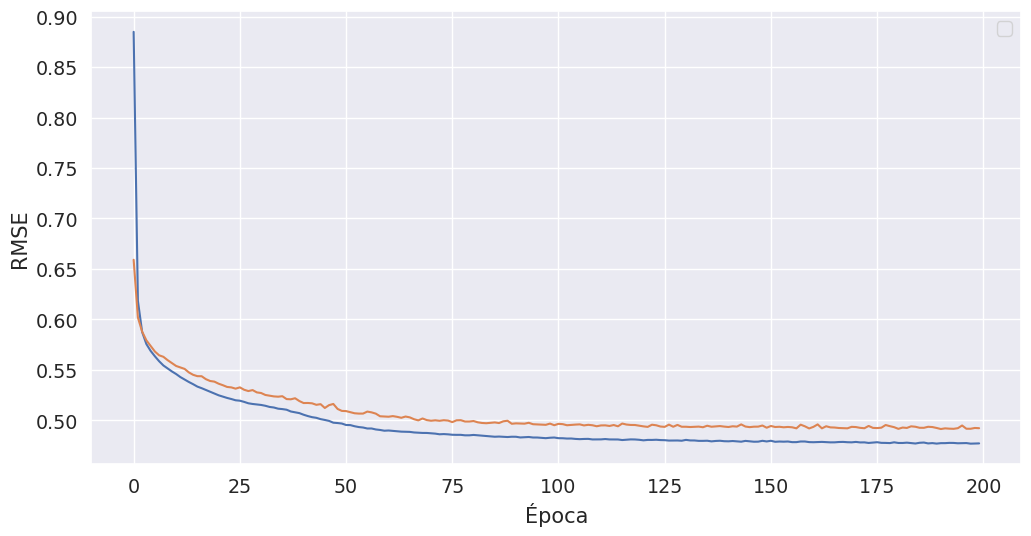

In [47]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

Vemos que el aprendizaje es mucho menos errático.

Ahora intentemos complejizar el modelo agregando una capa más

In [48]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(8,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

history = model.fit(
    X_train.values,
    y_train.values,
    epochs=100,
    validation_data=(X_test.values, y_test.values),
)

Train on 12384 samples, validate on 8256 samples
Epoch 1/100
   32/12384 [..............................] - ETA: 27s - loss: 0.5304

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.5912 

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.5198

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.4706

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.4475

10976/12384 [=========================>....] - ETA: 0s - loss: 0.4280

12384/12384 [==============================] - 0s 40us/step - loss: 0.4190 - val_loss: 0.3572


Epoch 2/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3810

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.3454

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.3456

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.3389

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.3381

11168/12384 [==========================>...] - ETA: 0s - loss: 0.3348

12384/12384 [==============================] - 0s 33us/step - loss: 0.3326 - val_loss: 0.3337


Epoch 3/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1520

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.3254

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.3111

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.3172

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.3106

11168/12384 [==========================>...] - ETA: 0s - loss: 0.3114

12384/12384 [==============================] - 0s 33us/step - loss: 0.3137 - val_loss: 0.3142


Epoch 4/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1729

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2977

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.3022

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.3028

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.3031

11264/12384 [==========================>...] - ETA: 0s - loss: 0.3033

12384/12384 [==============================] - 0s 33us/step - loss: 0.3013 - val_loss: 0.3045


Epoch 5/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1827

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2784

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2812

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2950

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2897

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2921

12384/12384 [==============================] - 0s 33us/step - loss: 0.2917 - val_loss: 0.2970


Epoch 6/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4666

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2981

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2832

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2892

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2878

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2884

12384/12384 [==============================] - 0s 33us/step - loss: 0.2856 - val_loss: 0.2927


Epoch 7/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3412

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2828

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2902

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2839

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2790

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2799

12384/12384 [==============================] - 0s 33us/step - loss: 0.2799 - val_loss: 0.2887


Epoch 8/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3439

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2759

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2813

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2855

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2822

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2797

12384/12384 [==============================] - 0s 33us/step - loss: 0.2763 - val_loss: 0.2848


Epoch 9/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1799

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2854

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2846

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2777

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2778

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2746

12384/12384 [==============================] - 0s 33us/step - loss: 0.2731 - val_loss: 0.2860


Epoch 10/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1094

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2576

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2611

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2598

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2658

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2675

12384/12384 [==============================] - 0s 33us/step - loss: 0.2695 - val_loss: 0.2829


Epoch 11/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1656

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2641

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2606

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2548

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2608

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2697

12384/12384 [==============================] - 0s 33us/step - loss: 0.2676 - val_loss: 0.2784


Epoch 12/100
   32/12384 [..............................] - ETA: 0s - loss: 0.6378

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2811

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2758

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2719

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2684

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2610



12384/12384 [==============================] - 0s 32us/step - loss: 0.2645 - val_loss: 0.2743


Epoch 13/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2421

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2625

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2639

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2614

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2632

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2636

12384/12384 [==============================] - 0s 33us/step - loss: 0.2620 - val_loss: 0.2727


Epoch 14/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2911

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2536

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2591

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2573

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2559

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2581



12384/12384 [==============================] - 0s 33us/step - loss: 0.2594 - val_loss: 0.2721


Epoch 15/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4426

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2628

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2671

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2667

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2612

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2592

12384/12384 [==============================] - 0s 33us/step - loss: 0.2567 - val_loss: 0.2696


Epoch 16/100
   32/12384 [..............................] - ETA: 0s - loss: 0.7125

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2747

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2608

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2602

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2595

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2566

12384/12384 [==============================] - 0s 33us/step - loss: 0.2538 - val_loss: 0.2629


Epoch 17/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1899

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2415

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2436

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2439

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2535

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2515

12384/12384 [==============================] - 0s 32us/step - loss: 0.2514 - val_loss: 0.2623


Epoch 18/100
   32/12384 [..............................] - ETA: 0s - loss: 0.5706

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2477

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2475

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2454

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2481

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2475

12384/12384 [==============================] - 0s 33us/step - loss: 0.2487 - val_loss: 0.2623


Epoch 19/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1661

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2374

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2419

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2440

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2454

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2479

12384/12384 [==============================] - 0s 32us/step - loss: 0.2465 - val_loss: 0.2572


Epoch 20/100


   32/12384 [..............................] - ETA: 0s - loss: 0.2462

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2641

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2445

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2451

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2457

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2437

12384/12384 [==============================] - 0s 33us/step - loss: 0.2447 - val_loss: 0.2547


Epoch 21/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1702

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2503

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2446

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2397



 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2428

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2437

12384/12384 [==============================] - 0s 32us/step - loss: 0.2434 - val_loss: 0.2541


Epoch 22/100
   32/12384 [..............................] - ETA: 0s - loss: 0.5706

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2353

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2513

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2534

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2483

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2436

12384/12384 [==============================] - 0s 33us/step - loss: 0.2412 - val_loss: 0.2524


Epoch 23/100
   32/12384 [..............................] - ETA: 0s - loss: 0.0894

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2339

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2344

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2400

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2408

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2399

12384/12384 [==============================] - 0s 33us/step - loss: 0.2402 - val_loss: 0.2496


Epoch 24/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2176

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2289

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2372

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2356

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2355

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2368



12384/12384 [==============================] - 0s 33us/step - loss: 0.2392 - val_loss: 0.2509


Epoch 25/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1023

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2588

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2385

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2374

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2416

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2385

12384/12384 [==============================] - 0s 33us/step - loss: 0.2378 - val_loss: 0.2491


Epoch 26/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1755

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2372

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2313

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2367

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2418

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2399

12384/12384 [==============================] - 0s 33us/step - loss: 0.2373 - val_loss: 0.2478


Epoch 27/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1782

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2378

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2463

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2373

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2378

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2355

12384/12384 [==============================] - 0s 32us/step - loss: 0.2360 - val_loss: 0.2484


Epoch 28/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1580



 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2312

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2296

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2268

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2301

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2342

12384/12384 [==============================] - 0s 33us/step - loss: 0.2349 - val_loss: 0.2482


Epoch 29/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2659

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2172

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2337

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2345

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2376

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2370

12384/12384 [==============================] - 0s 33us/step - loss: 0.2348 - val_loss: 0.2481


Epoch 30/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2862

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2347

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2216

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2364

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2376

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2363

12384/12384 [==============================] - 0s 33us/step - loss: 0.2341 - val_loss: 0.2443


Epoch 31/100
   32/12384 [..............................] - ETA: 0s - loss: 0.0563

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2337

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2262

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2320

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2339

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2326

12384/12384 [==============================] - 0s 33us/step - loss: 0.2337 - val_loss: 0.2462


Epoch 32/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3401

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2206

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2264

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2334

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2347

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2347

12384/12384 [==============================] - 0s 33us/step - loss: 0.2333 - val_loss: 0.2427


Epoch 33/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2234

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2182

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2253

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2313

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2344

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2334

12384/12384 [==============================] - 0s 33us/step - loss: 0.2322 - val_loss: 0.2428


Epoch 34/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2671

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2356

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2350

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2386

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2331

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2326

12384/12384 [==============================] - 0s 32us/step - loss: 0.2314 - val_loss: 0.2429


Epoch 35/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1588

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2202

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2223

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2268

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2346

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2319

12384/12384 [==============================] - 0s 33us/step - loss: 0.2313 - val_loss: 0.2424


Epoch 36/100


   32/12384 [..............................] - ETA: 0s - loss: 0.3720

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2435

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2355

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2356

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2335

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2289

12384/12384 [==============================] - 0s 32us/step - loss: 0.2308 - val_loss: 0.2424


Epoch 37/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1261

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2463

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2429

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2375

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2328

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2308

12384/12384 [==============================] - 0s 33us/step - loss: 0.2310 - val_loss: 0.2430


Epoch 38/100
   32/12384 [..............................] - ETA: 0s - loss: 0.5151

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2217

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2295

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2256

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2328

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2297



12384/12384 [==============================] - 0s 33us/step - loss: 0.2308 - val_loss: 0.2404


Epoch 39/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1164

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2417

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2389

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2358

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2333

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2291

12384/12384 [==============================] - 0s 33us/step - loss: 0.2298 - val_loss: 0.2414


Epoch 40/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4259

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2191

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2317

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2379

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2327

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2326

12384/12384 [==============================] - 0s 33us/step - loss: 0.2291 - val_loss: 0.2408


Epoch 41/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1562

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2263

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2236

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2226

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2254

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2279

12384/12384 [==============================] - 0s 33us/step - loss: 0.2286 - val_loss: 0.2401


Epoch 42/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1370

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2370

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2317

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2303

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2342

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2287

12384/12384 [==============================] - 0s 33us/step - loss: 0.2286 - val_loss: 0.2400


Epoch 43/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1959

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2310

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2265

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2310

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2327

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2294

12384/12384 [==============================] - 0s 32us/step - loss: 0.2273 - val_loss: 0.2406


Epoch 44/100


   32/12384 [..............................] - ETA: 0s - loss: 0.1623

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2337

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2325

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2291



 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2281

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2274



12384/12384 [==============================] - 0s 33us/step - loss: 0.2278 - val_loss: 0.2397


Epoch 45/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2783

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2222

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2126

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2244

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2271

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2271



12384/12384 [==============================] - 0s 33us/step - loss: 0.2275 - val_loss: 0.2383


Epoch 46/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4666

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2425

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2294

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2250

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2263

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2282

12384/12384 [==============================] - 0s 33us/step - loss: 0.2271 - val_loss: 0.2379


Epoch 47/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1064

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2175

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2207

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2240

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2250

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2260

12384/12384 [==============================] - 0s 32us/step - loss: 0.2265 - val_loss: 0.2419


Epoch 48/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2056

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2336

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2312

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2286

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2278

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2273

12384/12384 [==============================] - 0s 33us/step - loss: 0.2270 - val_loss: 0.2393


Epoch 49/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3729

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2197

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2249

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2253

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2252

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2236

12384/12384 [==============================] - 0s 33us/step - loss: 0.2261 - val_loss: 0.2395


Epoch 50/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1701

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2507

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2409

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2308

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2274

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2247

12384/12384 [==============================] - 0s 32us/step - loss: 0.2267 - val_loss: 0.2375


Epoch 51/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1813

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2478

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2404

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2410

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2340

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2280

12384/12384 [==============================] - 0s 32us/step - loss: 0.2252 - val_loss: 0.2370


Epoch 52/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1970

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2104

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2206

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2192

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2226

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2272

12384/12384 [==============================] - 0s 33us/step - loss: 0.2253 - val_loss: 0.2389


Epoch 53/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1283

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2332

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2283

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2302

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2291

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2260

12384/12384 [==============================] - 0s 33us/step - loss: 0.2249 - val_loss: 0.2387


Epoch 54/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2150

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2198

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2290

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2259

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2218

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2231

12384/12384 [==============================] - 0s 32us/step - loss: 0.2245 - val_loss: 0.2397


Epoch 55/100


   32/12384 [..............................] - ETA: 1s - loss: 0.1259

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2403

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2304

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2348

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2283

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2240

12384/12384 [==============================] - 0s 33us/step - loss: 0.2244 - val_loss: 0.2404


Epoch 56/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4487

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2364

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2270

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2250

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2235

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2222

12384/12384 [==============================] - 0s 33us/step - loss: 0.2245 - val_loss: 0.2372


Epoch 57/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1923

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2113

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2317

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2213

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2276

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2234

12384/12384 [==============================] - 0s 33us/step - loss: 0.2236 - val_loss: 0.2447


Epoch 58/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1630

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2053

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2186

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2164

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2194

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2218



12384/12384 [==============================] - 0s 33us/step - loss: 0.2239 - val_loss: 0.2403


Epoch 59/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1367

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2251

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2224

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2251

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2243

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2252

12384/12384 [==============================] - 0s 33us/step - loss: 0.2233 - val_loss: 0.2393


Epoch 60/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2411

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2202

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2204

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2225

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2225

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2228

12384/12384 [==============================] - 0s 33us/step - loss: 0.2234 - val_loss: 0.2374


Epoch 61/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3008

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2245

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2199

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2180

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2212

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2210

12384/12384 [==============================] - 0s 33us/step - loss: 0.2225 - val_loss: 0.2366


Epoch 62/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2707

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2333

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2331

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2269

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2273

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2241



12384/12384 [==============================] - 0s 33us/step - loss: 0.2231 - val_loss: 0.2368


Epoch 63/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1493

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2164

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2167

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2244

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2248

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2264

12384/12384 [==============================] - 0s 32us/step - loss: 0.2230 - val_loss: 0.2373


Epoch 64/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1160

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2066

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2205

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2197

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2223

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2234

12384/12384 [==============================] - 0s 32us/step - loss: 0.2228 - val_loss: 0.2371


Epoch 65/100


   32/12384 [..............................] - ETA: 1s - loss: 0.3465

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2230

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2189

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2219

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2220

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2253

12384/12384 [==============================] - 0s 33us/step - loss: 0.2226 - val_loss: 0.2401


Epoch 66/100


   32/12384 [..............................] - ETA: 0s - loss: 0.2673

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2203

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2111

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2092

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.2156

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2218



12384/12384 [==============================] - 0s 33us/step - loss: 0.2221 - val_loss: 0.2367


Epoch 67/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1077

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2017

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2179

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2275

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2229

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2206

12384/12384 [==============================] - 0s 32us/step - loss: 0.2219 - val_loss: 0.2382


Epoch 68/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4827

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2074

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2205

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2184

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2205

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2219

12384/12384 [==============================] - 0s 32us/step - loss: 0.2221 - val_loss: 0.2370


Epoch 69/100


   32/12384 [..............................] - ETA: 0s - loss: 0.4189



 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2203

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2195

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2243

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2230

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2224



12384/12384 [==============================] - 0s 33us/step - loss: 0.2213 - val_loss: 0.2378


Epoch 70/100
   32/12384 [..............................] - ETA: 0s - loss: 0.0994

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2545

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2459

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2393

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2290

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2257

12384/12384 [==============================] - 0s 32us/step - loss: 0.2220 - val_loss: 0.2375


Epoch 71/100


   32/12384 [..............................] - ETA: 0s - loss: 0.1311

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.1979

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2058

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2131

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2150

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2184

12384/12384 [==============================] - 0s 32us/step - loss: 0.2219 - val_loss: 0.2359


Epoch 72/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1673



 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2152

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2185

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2203



 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2239

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2221

12384/12384 [==============================] - 0s 33us/step - loss: 0.2209 - val_loss: 0.2399


Epoch 73/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2364

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2062

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2067

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2125

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2174

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2195

12384/12384 [==============================] - 0s 32us/step - loss: 0.2211 - val_loss: 0.2368


Epoch 74/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1046

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2397

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2291

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2235

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.2192

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2175

12384/12384 [==============================] - 0s 32us/step - loss: 0.2205 - val_loss: 0.2365


Epoch 75/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2273

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2276

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2174

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2173

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.2196

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2196

12384/12384 [==============================] - 0s 32us/step - loss: 0.2205 - val_loss: 0.2359


Epoch 76/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2572

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2181

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2170

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2186

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2180

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2213

12384/12384 [==============================] - 0s 33us/step - loss: 0.2203 - val_loss: 0.2377


Epoch 77/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1603

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2162

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2120

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2137

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2181

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2199

12384/12384 [==============================] - 0s 32us/step - loss: 0.2204 - val_loss: 0.2359


Epoch 78/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1866

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2347

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2167

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2233

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2181

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2209

12384/12384 [==============================] - 0s 32us/step - loss: 0.2198 - val_loss: 0.2359


Epoch 79/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3265

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2330

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2222

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2186

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2209

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2208

12384/12384 [==============================] - 0s 32us/step - loss: 0.2207 - val_loss: 0.2357


Epoch 80/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4886

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2276

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2172

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2204

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2207

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2185

12384/12384 [==============================] - 0s 33us/step - loss: 0.2197 - val_loss: 0.2399


Epoch 81/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2088

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.1972

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2153

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2061

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2137

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2192

12384/12384 [==============================] - 0s 32us/step - loss: 0.2200 - val_loss: 0.2357


Epoch 82/100


   32/12384 [..............................] - ETA: 0s - loss: 0.0775

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2225

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2228

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2190



 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2183

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2189

12384/12384 [==============================] - 0s 33us/step - loss: 0.2195 - val_loss: 0.2358


Epoch 83/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2270

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2216

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2197

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2226

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.2210

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2197

12384/12384 [==============================] - 0s 32us/step - loss: 0.2187 - val_loss: 0.2379


Epoch 84/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1272

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2002

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2129

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2114

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2198

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2194

12384/12384 [==============================] - 0s 32us/step - loss: 0.2196 - val_loss: 0.2377


Epoch 85/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1085

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2143

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2123

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2155

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2225

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2207

12384/12384 [==============================] - 0s 32us/step - loss: 0.2188 - val_loss: 0.2362


Epoch 86/100


   32/12384 [..............................] - ETA: 0s - loss: 0.2311

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2181

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2178

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2253

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2251

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2220

12384/12384 [==============================] - 0s 33us/step - loss: 0.2192 - val_loss: 0.2355


Epoch 87/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2793

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2252

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2233

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2260

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2230

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2197

12384/12384 [==============================] - 0s 32us/step - loss: 0.2189 - val_loss: 0.2418


Epoch 88/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1574

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2132

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2128

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2168

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.2191

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2223

12384/12384 [==============================] - 0s 32us/step - loss: 0.2186 - val_loss: 0.2365


Epoch 89/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2040

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.1971

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2131

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2146

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2234

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2197

12384/12384 [==============================] - 0s 32us/step - loss: 0.2184 - val_loss: 0.2357


Epoch 90/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1102

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2054

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2156

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2154

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2198

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2155

12384/12384 [==============================] - 0s 32us/step - loss: 0.2179 - val_loss: 0.2369


Epoch 91/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3424

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2166

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2207

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2178

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2193

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2177

12384/12384 [==============================] - 0s 33us/step - loss: 0.2179 - val_loss: 0.2360


Epoch 92/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2017

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2232

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2240

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2214

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2197

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2186

12384/12384 [==============================] - 0s 33us/step - loss: 0.2178 - val_loss: 0.2351


Epoch 93/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3204

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2110

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2099

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2123

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2132



11424/12384 [==========================>...] - ETA: 0s - loss: 0.2162

12384/12384 [==============================] - 0s 32us/step - loss: 0.2178 - val_loss: 0.2371


Epoch 94/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2126

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2153

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2267

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2241

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2230

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2186

12384/12384 [==============================] - 0s 33us/step - loss: 0.2186 - val_loss: 0.2371


Epoch 95/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1294

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2309

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2284

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2228

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2193

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2160

12384/12384 [==============================] - 0s 33us/step - loss: 0.2176 - val_loss: 0.2367


Epoch 96/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3097

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.1968

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2014

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2074

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2120

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2169

12384/12384 [==============================] - 0s 32us/step - loss: 0.2176 - val_loss: 0.2362


Epoch 97/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2343

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2512

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2337

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2254

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2211

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2177

12384/12384 [==============================] - 0s 32us/step - loss: 0.2181 - val_loss: 0.2354


Epoch 98/100


   32/12384 [..............................] - ETA: 0s - loss: 0.3110

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2264

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2219

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2183

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2167



11328/12384 [==========================>...] - ETA: 0s - loss: 0.2187

12384/12384 [==============================] - 0s 33us/step - loss: 0.2169 - val_loss: 0.2350


Epoch 99/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2683

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2239

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2177

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2139

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2207

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2192

12384/12384 [==============================] - 0s 32us/step - loss: 0.2170 - val_loss: 0.2350


Epoch 100/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1152

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2013

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2112

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2150

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2151

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2177

12384/12384 [==============================] - 0s 32us/step - loss: 0.2172 - val_loss: 0.2355


No handles with labels found to put in legend.


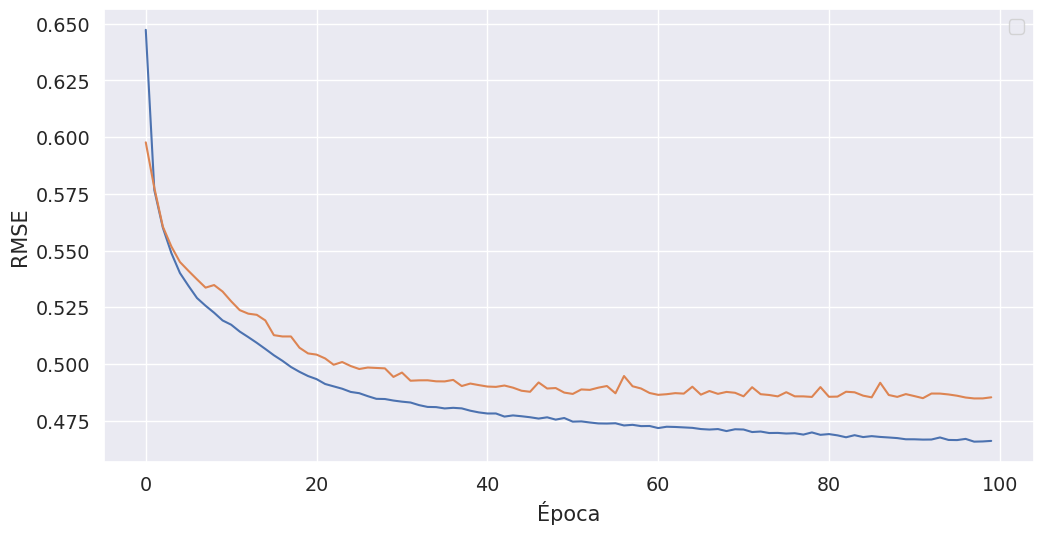

In [49]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

In [50]:
california_df_ld = pd.DataFrame(california.data, columns=california.feature_names)

Voy a tomar menos datos y voy a agregar más parámetros a mi red: Qué puede pasar cuando tengo menos cantidad de datos y más cantidad de parámetros a entrenar? Qué puede malir sal?

In [51]:
X = scaled_california_df[0:10000].drop("MedHouseVal", axis=1)
y = scaled_california_df[0:10000].filter(items=["MedHouseVal"])

In [52]:
X_train, X_validation, y_train, y_validation = train_test_split(
    X, y, test_size=0.4, random_state=42
)

In [53]:
model = Sequential()
model.add(Dense(50, activation='tanh', input_shape=(8,)))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

history = model.fit(
    X_train.values,
    y_train.values,
    epochs=500,
    validation_data=(X_validation.values, y_validation.values),
)

Train on 6000 samples, validate on 4000 samples
Epoch 1/500
  32/6000 [..............................] - ETA: 13s - loss: 0.9284

2144/6000 [=========>....................] - ETA: 0s - loss: 0.5956 

4320/6000 [====================>.........] - ETA: 0s - loss: 0.4825

6000/6000 [==============================] - 0s 47us/step - loss: 0.4438 - val_loss: 0.3413


Epoch 2/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3342

2304/6000 [==========>...................] - ETA: 0s - loss: 0.3516

4576/6000 [=====================>........] - ETA: 0s - loss: 0.3425

6000/6000 [==============================] - 0s 33us/step - loss: 0.3486 - val_loss: 0.3192


Epoch 3/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4552

2336/6000 [==========>...................] - ETA: 0s - loss: 0.3141

4640/6000 [======================>.......] - ETA: 0s - loss: 0.3358

6000/6000 [==============================] - 0s 32us/step - loss: 0.3311 - val_loss: 0.3066


Epoch 4/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6552

2368/6000 [==========>...................] - ETA: 0s - loss: 0.3300

4672/6000 [======================>.......] - ETA: 0s - loss: 0.3196

6000/6000 [==============================] - 0s 32us/step - loss: 0.3180 - val_loss: 0.2958


Epoch 5/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1458

2304/6000 [==========>...................] - ETA: 0s - loss: 0.3146

4640/6000 [======================>.......] - ETA: 0s - loss: 0.3082

6000/6000 [==============================] - 0s 32us/step - loss: 0.2987 - val_loss: 0.2806


Epoch 6/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2336

2336/6000 [==========>...................] - ETA: 0s - loss: 0.2864

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2902

6000/6000 [==============================] - 0s 32us/step - loss: 0.2878 - val_loss: 0.2692


Epoch 7/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1327

2240/6000 [==========>...................] - ETA: 0s - loss: 0.2746

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2746

6000/6000 [==============================] - 0s 33us/step - loss: 0.2735 - val_loss: 0.2595


Epoch 8/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5957

2304/6000 [==========>...................] - ETA: 0s - loss: 0.2606

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2631

6000/6000 [==============================] - 0s 34us/step - loss: 0.2643 - val_loss: 0.2554


Epoch 9/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3867

2304/6000 [==========>...................] - ETA: 0s - loss: 0.2765

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2572

6000/6000 [==============================] - 0s 32us/step - loss: 0.2548 - val_loss: 0.2513


Epoch 10/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3557

2272/6000 [==========>...................] - ETA: 0s - loss: 0.2287

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2431

6000/6000 [==============================] - 0s 33us/step - loss: 0.2480 - val_loss: 0.2580


Epoch 11/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1360

2336/6000 [==========>...................] - ETA: 0s - loss: 0.2477

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2448

6000/6000 [==============================] - 0s 32us/step - loss: 0.2414 - val_loss: 0.2395


Epoch 12/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1575

2304/6000 [==========>...................] - ETA: 0s - loss: 0.2383

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2329

6000/6000 [==============================] - 0s 32us/step - loss: 0.2359 - val_loss: 0.2384


Epoch 13/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4893

2304/6000 [==========>...................] - ETA: 0s - loss: 0.2449

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2304

6000/6000 [==============================] - 0s 33us/step - loss: 0.2321 - val_loss: 0.2387


Epoch 14/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2948

2336/6000 [==========>...................] - ETA: 0s - loss: 0.2263

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2267

6000/6000 [==============================] - 0s 33us/step - loss: 0.2266 - val_loss: 0.2322


Epoch 15/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1210

2304/6000 [==========>...................] - ETA: 0s - loss: 0.2177

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2281

6000/6000 [==============================] - 0s 33us/step - loss: 0.2239 - val_loss: 0.2286


Epoch 16/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3340

2336/6000 [==========>...................] - ETA: 0s - loss: 0.2113

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2174

6000/6000 [==============================] - 0s 33us/step - loss: 0.2203 - val_loss: 0.2286


Epoch 17/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2681

2272/6000 [==========>...................] - ETA: 0s - loss: 0.2264

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2221

6000/6000 [==============================] - 0s 33us/step - loss: 0.2156 - val_loss: 0.2258


Epoch 18/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1987

2304/6000 [==========>...................] - ETA: 0s - loss: 0.2157

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2125

6000/6000 [==============================] - 0s 33us/step - loss: 0.2164 - val_loss: 0.2240


Epoch 19/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1751

2304/6000 [==========>...................] - ETA: 0s - loss: 0.2100

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2103

6000/6000 [==============================] - 0s 32us/step - loss: 0.2122 - val_loss: 0.2289


Epoch 20/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1530

2272/6000 [==========>...................] - ETA: 0s - loss: 0.2045

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2112

6000/6000 [==============================] - 0s 33us/step - loss: 0.2120 - val_loss: 0.2199


Epoch 21/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2414

2304/6000 [==========>...................] - ETA: 0s - loss: 0.2137

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2164

6000/6000 [==============================] - 0s 32us/step - loss: 0.2091 - val_loss: 0.2142


Epoch 22/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1246

2272/6000 [==========>...................] - ETA: 0s - loss: 0.2092

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2099

6000/6000 [==============================] - 0s 32us/step - loss: 0.2082 - val_loss: 0.2174


Epoch 23/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3296

2304/6000 [==========>...................] - ETA: 0s - loss: 0.2125

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2066

6000/6000 [==============================] - 0s 32us/step - loss: 0.2064 - val_loss: 0.2162


Epoch 24/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1621

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1859

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2008

6000/6000 [==============================] - 0s 32us/step - loss: 0.2062 - val_loss: 0.2245


Epoch 25/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1451

2336/6000 [==========>...................] - ETA: 0s - loss: 0.2057

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2014

6000/6000 [==============================] - 0s 32us/step - loss: 0.2047 - val_loss: 0.2108


Epoch 26/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0647

2304/6000 [==========>...................] - ETA: 0s - loss: 0.2014

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1962

6000/6000 [==============================] - 0s 33us/step - loss: 0.2042 - val_loss: 0.2275


Epoch 27/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0810

2336/6000 [==========>...................] - ETA: 0s - loss: 0.2091

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2055

6000/6000 [==============================] - 0s 32us/step - loss: 0.2036 - val_loss: 0.2119


Epoch 28/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1288

2272/6000 [==========>...................] - ETA: 0s - loss: 0.2017

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2005

6000/6000 [==============================] - 0s 32us/step - loss: 0.2012 - val_loss: 0.2107


Epoch 29/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0845

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1792

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2001

6000/6000 [==============================] - 0s 32us/step - loss: 0.2025 - val_loss: 0.2100


Epoch 30/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1645

2272/6000 [==========>...................] - ETA: 0s - loss: 0.2141

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2012

6000/6000 [==============================] - 0s 33us/step - loss: 0.2007 - val_loss: 0.2144


Epoch 31/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1974

2336/6000 [==========>...................] - ETA: 0s - loss: 0.2083

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1992

6000/6000 [==============================] - 0s 32us/step - loss: 0.2004 - val_loss: 0.2136


Epoch 32/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1890

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1886

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1957

6000/6000 [==============================] - 0s 33us/step - loss: 0.1982 - val_loss: 0.2219


Epoch 33/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2960

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1932

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1968

6000/6000 [==============================] - 0s 33us/step - loss: 0.1991 - val_loss: 0.2048


Epoch 34/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1087

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1834

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2001

6000/6000 [==============================] - 0s 33us/step - loss: 0.1983 - val_loss: 0.2046


Epoch 35/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2232

2336/6000 [==========>...................] - ETA: 0s - loss: 0.2032

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1955

6000/6000 [==============================] - 0s 32us/step - loss: 0.1971 - val_loss: 0.2104


Epoch 36/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2096

2304/6000 [==========>...................] - ETA: 0s - loss: 0.2261

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2077

6000/6000 [==============================] - 0s 33us/step - loss: 0.1992 - val_loss: 0.2035


Epoch 37/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1307

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1977

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1983

6000/6000 [==============================] - 0s 33us/step - loss: 0.1960 - val_loss: 0.2049


Epoch 38/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1523

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1938

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2008

6000/6000 [==============================] - 0s 33us/step - loss: 0.1966 - val_loss: 0.2106


Epoch 39/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2800

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1838

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1995



6000/6000 [==============================] - 0s 33us/step - loss: 0.1962 - val_loss: 0.2030


Epoch 40/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1212

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1916

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1870

6000/6000 [==============================] - 0s 32us/step - loss: 0.1947 - val_loss: 0.2019


Epoch 41/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1921

2304/6000 [==========>...................] - ETA: 0s - loss: 0.2027

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2025

6000/6000 [==============================] - 0s 32us/step - loss: 0.1952 - val_loss: 0.2050


Epoch 42/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2703

2304/6000 [==========>...................] - ETA: 0s - loss: 0.2136

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1990

6000/6000 [==============================] - 0s 32us/step - loss: 0.1937 - val_loss: 0.2090


Epoch 43/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2093

2240/6000 [==========>...................] - ETA: 0s - loss: 0.2032

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2022

6000/6000 [==============================] - 0s 32us/step - loss: 0.1941 - val_loss: 0.2021


Epoch 44/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3377

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1906

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1943

6000/6000 [==============================] - 0s 32us/step - loss: 0.1939 - val_loss: 0.2012


Epoch 45/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2139

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1827

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1904

6000/6000 [==============================] - 0s 33us/step - loss: 0.1929 - val_loss: 0.2036


Epoch 46/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2082



2304/6000 [==========>...................] - ETA: 0s - loss: 0.1820



4544/6000 [=====================>........] - ETA: 0s - loss: 0.1897

6000/6000 [==============================] - 0s 33us/step - loss: 0.1928 - val_loss: 0.2052


Epoch 47/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1420

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1969

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1869

6000/6000 [==============================] - 0s 32us/step - loss: 0.1910 - val_loss: 0.2037


Epoch 48/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1082

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1812

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1850

6000/6000 [==============================] - 0s 33us/step - loss: 0.1918 - val_loss: 0.2158


Epoch 49/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2899

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1868

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1892

6000/6000 [==============================] - 0s 32us/step - loss: 0.1916 - val_loss: 0.2015


Epoch 50/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1922

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1937

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1896

6000/6000 [==============================] - 0s 32us/step - loss: 0.1912 - val_loss: 0.2157


Epoch 51/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1218

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1759

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1931

6000/6000 [==============================] - 0s 32us/step - loss: 0.1926 - val_loss: 0.2077


Epoch 52/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1833

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1887

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1958

6000/6000 [==============================] - 0s 33us/step - loss: 0.1905 - val_loss: 0.1983


Epoch 53/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1365

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1844

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1863

6000/6000 [==============================] - 0s 32us/step - loss: 0.1899 - val_loss: 0.2001


Epoch 54/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2654

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1956

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1891

6000/6000 [==============================] - 0s 32us/step - loss: 0.1893 - val_loss: 0.1997


Epoch 55/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1383

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1832

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1822

6000/6000 [==============================] - 0s 32us/step - loss: 0.1886 - val_loss: 0.1983


Epoch 56/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0830

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1885

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1905

6000/6000 [==============================] - 0s 32us/step - loss: 0.1879 - val_loss: 0.1978


Epoch 57/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1133

2304/6000 [==========>...................] - ETA: 0s - loss: 0.2022

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1947

6000/6000 [==============================] - 0s 32us/step - loss: 0.1900 - val_loss: 0.1999


Epoch 58/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1169

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1919

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1837

6000/6000 [==============================] - 0s 32us/step - loss: 0.1878 - val_loss: 0.2001


Epoch 59/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1562

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1822

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1925

6000/6000 [==============================] - 0s 32us/step - loss: 0.1861 - val_loss: 0.2083


Epoch 60/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1717

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1854

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1868

6000/6000 [==============================] - 0s 33us/step - loss: 0.1873 - val_loss: 0.2018


Epoch 61/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2212

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1874

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1869

6000/6000 [==============================] - 0s 32us/step - loss: 0.1872 - val_loss: 0.1985


Epoch 62/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1381

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1943

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1912

6000/6000 [==============================] - 0s 32us/step - loss: 0.1871 - val_loss: 0.1985


Epoch 63/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0541

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1800

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1792

6000/6000 [==============================] - 0s 32us/step - loss: 0.1855 - val_loss: 0.2050


Epoch 64/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1305

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1834

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1878

6000/6000 [==============================] - 0s 32us/step - loss: 0.1873 - val_loss: 0.2077


Epoch 65/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1706

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1727

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1863

6000/6000 [==============================] - 0s 32us/step - loss: 0.1853 - val_loss: 0.2040


Epoch 66/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2159

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1871

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1826

6000/6000 [==============================] - 0s 32us/step - loss: 0.1835 - val_loss: 0.1961


Epoch 67/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1587

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1846

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1848

6000/6000 [==============================] - 0s 32us/step - loss: 0.1838 - val_loss: 0.2013


Epoch 68/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1700

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1854

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1799

6000/6000 [==============================] - 0s 32us/step - loss: 0.1847 - val_loss: 0.2006


Epoch 69/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1536

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1878

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1858

6000/6000 [==============================] - 0s 33us/step - loss: 0.1842 - val_loss: 0.1980


Epoch 70/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1590

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1782

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1847

6000/6000 [==============================] - 0s 33us/step - loss: 0.1821 - val_loss: 0.2006


Epoch 71/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0619

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1815

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1855

6000/6000 [==============================] - 0s 32us/step - loss: 0.1834 - val_loss: 0.2034


Epoch 72/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3556

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1887

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1870

6000/6000 [==============================] - 0s 33us/step - loss: 0.1838 - val_loss: 0.2012


Epoch 73/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2099

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1922

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1855

6000/6000 [==============================] - 0s 32us/step - loss: 0.1816 - val_loss: 0.1992


Epoch 74/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4104

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1925

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1863

6000/6000 [==============================] - 0s 33us/step - loss: 0.1822 - val_loss: 0.1948


Epoch 75/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2836

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1816

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1810

6000/6000 [==============================] - 0s 33us/step - loss: 0.1802 - val_loss: 0.2034


Epoch 76/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0926

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1868

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1834

6000/6000 [==============================] - 0s 32us/step - loss: 0.1816 - val_loss: 0.1986


Epoch 77/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1952

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1645

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1814

6000/6000 [==============================] - 0s 32us/step - loss: 0.1812 - val_loss: 0.1962


Epoch 78/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1349

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1941

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1814

6000/6000 [==============================] - 0s 32us/step - loss: 0.1804 - val_loss: 0.2017


Epoch 79/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2008

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1775

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1849

6000/6000 [==============================] - 0s 32us/step - loss: 0.1822 - val_loss: 0.1947


Epoch 80/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1574

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1821

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1754

6000/6000 [==============================] - 0s 34us/step - loss: 0.1791 - val_loss: 0.1961


Epoch 81/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3361

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1795

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1794

6000/6000 [==============================] - 0s 32us/step - loss: 0.1783 - val_loss: 0.1961


Epoch 82/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2832

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1733

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1767

6000/6000 [==============================] - 0s 32us/step - loss: 0.1792 - val_loss: 0.1980


Epoch 83/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2463

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1697

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1832

6000/6000 [==============================] - 0s 32us/step - loss: 0.1789 - val_loss: 0.2034


Epoch 84/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1648

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1826

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1758

6000/6000 [==============================] - 0s 32us/step - loss: 0.1788 - val_loss: 0.1963


Epoch 85/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0923

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1794

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1777

6000/6000 [==============================] - 0s 32us/step - loss: 0.1775 - val_loss: 0.1964


Epoch 86/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0910

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1724

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1761

6000/6000 [==============================] - 0s 32us/step - loss: 0.1773 - val_loss: 0.1949


Epoch 87/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2724

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1714

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1755

6000/6000 [==============================] - 0s 32us/step - loss: 0.1757 - val_loss: 0.2054


Epoch 88/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2464

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1707

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1750

6000/6000 [==============================] - 0s 33us/step - loss: 0.1773 - val_loss: 0.1937


Epoch 89/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2014

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1730

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1782

6000/6000 [==============================] - 0s 32us/step - loss: 0.1768 - val_loss: 0.2055


Epoch 90/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1498

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1727

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1724

6000/6000 [==============================] - 0s 32us/step - loss: 0.1782 - val_loss: 0.1967


Epoch 91/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1349

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1859

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1763

6000/6000 [==============================] - 0s 32us/step - loss: 0.1754 - val_loss: 0.1955


Epoch 92/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1678

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1888

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1793

6000/6000 [==============================] - 0s 32us/step - loss: 0.1755 - val_loss: 0.1957


Epoch 93/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0765

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1674

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1753

6000/6000 [==============================] - 0s 32us/step - loss: 0.1751 - val_loss: 0.1954


Epoch 94/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2447

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1754

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1722

6000/6000 [==============================] - 0s 32us/step - loss: 0.1747 - val_loss: 0.1972


Epoch 95/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3127

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1798

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1786

6000/6000 [==============================] - 0s 32us/step - loss: 0.1751 - val_loss: 0.1919


Epoch 96/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3479

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1584

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1689

6000/6000 [==============================] - 0s 32us/step - loss: 0.1735 - val_loss: 0.1940


Epoch 97/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2073

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1862

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1753

6000/6000 [==============================] - 0s 32us/step - loss: 0.1754 - val_loss: 0.1977


Epoch 98/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1647

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1707

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1708

6000/6000 [==============================] - 0s 33us/step - loss: 0.1738 - val_loss: 0.1940


Epoch 99/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1815

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1797

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1734

6000/6000 [==============================] - 0s 33us/step - loss: 0.1743 - val_loss: 0.1949


Epoch 100/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1467

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1726

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1686

6000/6000 [==============================] - 0s 32us/step - loss: 0.1736 - val_loss: 0.1963


Epoch 101/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1833

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1702

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1692

6000/6000 [==============================] - 0s 33us/step - loss: 0.1723 - val_loss: 0.2007


Epoch 102/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1584

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1781

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1752

6000/6000 [==============================] - 0s 33us/step - loss: 0.1739 - val_loss: 0.1902


Epoch 103/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1755

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1725

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1680

6000/6000 [==============================] - 0s 32us/step - loss: 0.1714 - val_loss: 0.1955


Epoch 104/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1788

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1649

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1653

6000/6000 [==============================] - 0s 32us/step - loss: 0.1711 - val_loss: 0.1915


Epoch 105/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2613

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1614

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1674

6000/6000 [==============================] - 0s 32us/step - loss: 0.1703 - val_loss: 0.1911


Epoch 106/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1396

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1813

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1741

6000/6000 [==============================] - 0s 32us/step - loss: 0.1718 - val_loss: 0.1905


Epoch 107/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2355

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1698

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1660

6000/6000 [==============================] - 0s 32us/step - loss: 0.1702 - val_loss: 0.1948


Epoch 108/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4099

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1771

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1722

6000/6000 [==============================] - 0s 32us/step - loss: 0.1700 - val_loss: 0.1934


Epoch 109/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1770

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1580

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1700

6000/6000 [==============================] - 0s 32us/step - loss: 0.1708 - val_loss: 0.1905


Epoch 110/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2403

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1707

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1714

6000/6000 [==============================] - 0s 33us/step - loss: 0.1712 - val_loss: 0.1925


Epoch 111/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3438

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1763

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1682

6000/6000 [==============================] - 0s 32us/step - loss: 0.1701 - val_loss: 0.1932


Epoch 112/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1783

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1806

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1704

6000/6000 [==============================] - 0s 32us/step - loss: 0.1716 - val_loss: 0.1942


Epoch 113/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1711

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1664

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1684

6000/6000 [==============================] - 0s 32us/step - loss: 0.1709 - val_loss: 0.1909


Epoch 114/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3146

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1736

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1715

6000/6000 [==============================] - 0s 32us/step - loss: 0.1706 - val_loss: 0.1911


Epoch 115/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1716

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1700

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1683

6000/6000 [==============================] - 0s 32us/step - loss: 0.1697 - val_loss: 0.1907


Epoch 116/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1046

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1687

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1682

6000/6000 [==============================] - 0s 32us/step - loss: 0.1687 - val_loss: 0.1910


Epoch 117/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1944

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1787

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1686

6000/6000 [==============================] - 0s 32us/step - loss: 0.1695 - val_loss: 0.1940


Epoch 118/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0767

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1485

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1635

6000/6000 [==============================] - 0s 33us/step - loss: 0.1701 - val_loss: 0.1916


Epoch 119/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1487

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1662

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1709

6000/6000 [==============================] - 0s 32us/step - loss: 0.1680 - val_loss: 0.2002


Epoch 120/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0753

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1608

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1711

6000/6000 [==============================] - 0s 32us/step - loss: 0.1681 - val_loss: 0.1934


Epoch 121/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2285

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1745

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1661

6000/6000 [==============================] - 0s 32us/step - loss: 0.1690 - val_loss: 0.1905


Epoch 122/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0887

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1526

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1675

6000/6000 [==============================] - 0s 32us/step - loss: 0.1677 - val_loss: 0.1882


Epoch 123/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2283

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1681

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1687

6000/6000 [==============================] - 0s 32us/step - loss: 0.1672 - val_loss: 0.1876


Epoch 124/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1524

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1646

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1601

6000/6000 [==============================] - 0s 32us/step - loss: 0.1668 - val_loss: 0.1934


Epoch 125/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2472

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1629

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1666

6000/6000 [==============================] - 0s 32us/step - loss: 0.1667 - val_loss: 0.1894


Epoch 126/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1693

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1664

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1668

6000/6000 [==============================] - 0s 33us/step - loss: 0.1654 - val_loss: 0.1937


Epoch 127/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1022

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1755

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1676

6000/6000 [==============================] - 0s 32us/step - loss: 0.1660 - val_loss: 0.1935


Epoch 128/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1495

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1545

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1636

6000/6000 [==============================] - 0s 32us/step - loss: 0.1672 - val_loss: 0.1908


Epoch 129/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1108

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1773

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1661

6000/6000 [==============================] - 0s 32us/step - loss: 0.1658 - val_loss: 0.1891


Epoch 130/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0632

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1719

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1602

6000/6000 [==============================] - 0s 33us/step - loss: 0.1663 - val_loss: 0.1929


Epoch 131/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2539

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1617

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1632

6000/6000 [==============================] - 0s 33us/step - loss: 0.1636 - val_loss: 0.1952


Epoch 132/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2099

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1691

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1673



6000/6000 [==============================] - 0s 33us/step - loss: 0.1650 - val_loss: 0.1926


Epoch 133/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1406

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1555

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1645

6000/6000 [==============================] - 0s 33us/step - loss: 0.1643 - val_loss: 0.1904


Epoch 134/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1685

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1638

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1642

6000/6000 [==============================] - 0s 32us/step - loss: 0.1650 - val_loss: 0.1884


Epoch 135/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1931

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1685

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1712

6000/6000 [==============================] - 0s 32us/step - loss: 0.1647 - val_loss: 0.1908


Epoch 136/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0861

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1688

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1677

6000/6000 [==============================] - 0s 33us/step - loss: 0.1632 - val_loss: 0.1926


Epoch 137/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3100

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1615

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1616

6000/6000 [==============================] - 0s 32us/step - loss: 0.1647 - val_loss: 0.1898


Epoch 138/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1367

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1707

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1609

6000/6000 [==============================] - 0s 32us/step - loss: 0.1644 - val_loss: 0.1849


Epoch 139/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1737

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1658

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1657

6000/6000 [==============================] - 0s 32us/step - loss: 0.1646 - val_loss: 0.1887


Epoch 140/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1274

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1594

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1592

6000/6000 [==============================] - 0s 33us/step - loss: 0.1624 - val_loss: 0.1873


Epoch 141/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1464

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1407

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1588

6000/6000 [==============================] - 0s 32us/step - loss: 0.1619 - val_loss: 0.1860


Epoch 142/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0705

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1625

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1597

6000/6000 [==============================] - 0s 32us/step - loss: 0.1628 - val_loss: 0.1980


Epoch 143/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1016

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1677

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1634

6000/6000 [==============================] - 0s 32us/step - loss: 0.1628 - val_loss: 0.1888


Epoch 144/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1218

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1514

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1592

6000/6000 [==============================] - 0s 32us/step - loss: 0.1618 - val_loss: 0.1886


Epoch 145/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2325

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1743

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1706

6000/6000 [==============================] - 0s 33us/step - loss: 0.1623 - val_loss: 0.1881


Epoch 146/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0884

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1597

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1632

6000/6000 [==============================] - 0s 32us/step - loss: 0.1626 - val_loss: 0.1920


Epoch 147/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1735

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1650

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1604

6000/6000 [==============================] - 0s 32us/step - loss: 0.1623 - val_loss: 0.1884


Epoch 148/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0703

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1607

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1613

6000/6000 [==============================] - 0s 32us/step - loss: 0.1610 - val_loss: 0.1859


Epoch 149/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2364

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1508

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1622

6000/6000 [==============================] - 0s 33us/step - loss: 0.1626 - val_loss: 0.1871


Epoch 150/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1580

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1572

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1612

6000/6000 [==============================] - 0s 33us/step - loss: 0.1618 - val_loss: 0.1854


Epoch 151/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1874

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1662

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1623

6000/6000 [==============================] - 0s 32us/step - loss: 0.1615 - val_loss: 0.1853


Epoch 152/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1914

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1624

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1584

6000/6000 [==============================] - 0s 33us/step - loss: 0.1619 - val_loss: 0.1844


Epoch 153/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1122

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1513

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1592

6000/6000 [==============================] - 0s 32us/step - loss: 0.1602 - val_loss: 0.1857


Epoch 154/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1854

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1621

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1634

6000/6000 [==============================] - 0s 32us/step - loss: 0.1606 - val_loss: 0.1843


Epoch 155/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1876

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1476

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1542

6000/6000 [==============================] - 0s 32us/step - loss: 0.1606 - val_loss: 0.1853


Epoch 156/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1235

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1655

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1584

6000/6000 [==============================] - 0s 32us/step - loss: 0.1622 - val_loss: 0.1859


Epoch 157/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1959

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1538

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1553

6000/6000 [==============================] - 0s 32us/step - loss: 0.1591 - val_loss: 0.1913


Epoch 158/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0957

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1605

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1610

6000/6000 [==============================] - 0s 32us/step - loss: 0.1603 - val_loss: 0.1924


Epoch 159/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1583

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1593

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1641

6000/6000 [==============================] - 0s 32us/step - loss: 0.1606 - val_loss: 0.1893


Epoch 160/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1237

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1653

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1621

6000/6000 [==============================] - 0s 32us/step - loss: 0.1587 - val_loss: 0.1907


Epoch 161/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1150

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1586

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1626

6000/6000 [==============================] - 0s 32us/step - loss: 0.1618 - val_loss: 0.1847


Epoch 162/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2479

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1361

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1610

6000/6000 [==============================] - 0s 32us/step - loss: 0.1604 - val_loss: 0.1870


Epoch 163/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1859

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1661

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1634

6000/6000 [==============================] - 0s 33us/step - loss: 0.1590 - val_loss: 0.1853


Epoch 164/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0711

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1624

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1589

6000/6000 [==============================] - 0s 33us/step - loss: 0.1594 - val_loss: 0.1875


Epoch 165/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1195

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1568

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1583

6000/6000 [==============================] - 0s 32us/step - loss: 0.1589 - val_loss: 0.1878


Epoch 166/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1043

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1700

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1584

6000/6000 [==============================] - 0s 32us/step - loss: 0.1574 - val_loss: 0.1894


Epoch 167/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1131

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1608

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1633

6000/6000 [==============================] - 0s 32us/step - loss: 0.1592 - val_loss: 0.1865


Epoch 168/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1034

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1564

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1547

6000/6000 [==============================] - 0s 32us/step - loss: 0.1582 - val_loss: 0.1827


Epoch 169/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1997

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1536

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1552

6000/6000 [==============================] - 0s 32us/step - loss: 0.1574 - val_loss: 0.1861


Epoch 170/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1818

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1602

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1589

6000/6000 [==============================] - 0s 32us/step - loss: 0.1589 - val_loss: 0.1887


Epoch 171/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2047

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1439

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1543

6000/6000 [==============================] - 0s 32us/step - loss: 0.1589 - val_loss: 0.1917


Epoch 172/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1612

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1615

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1592

6000/6000 [==============================] - 0s 33us/step - loss: 0.1574 - val_loss: 0.1878


Epoch 173/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0523

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1560

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1555

6000/6000 [==============================] - 0s 32us/step - loss: 0.1569 - val_loss: 0.1818


Epoch 174/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1863

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1674

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1600

6000/6000 [==============================] - 0s 32us/step - loss: 0.1562 - val_loss: 0.1837


Epoch 175/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1222

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1539

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1556

6000/6000 [==============================] - 0s 32us/step - loss: 0.1564 - val_loss: 0.1822


Epoch 176/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1280

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1576

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1601

6000/6000 [==============================] - 0s 32us/step - loss: 0.1579 - val_loss: 0.1846


Epoch 177/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2695

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1654

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1576

6000/6000 [==============================] - 0s 32us/step - loss: 0.1570 - val_loss: 0.1822


Epoch 178/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1787

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1603

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1595

6000/6000 [==============================] - 0s 32us/step - loss: 0.1560 - val_loss: 0.1827


Epoch 179/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1777

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1566

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1559

6000/6000 [==============================] - 0s 32us/step - loss: 0.1570 - val_loss: 0.1848


Epoch 180/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2415

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1499

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1542

6000/6000 [==============================] - 0s 32us/step - loss: 0.1567 - val_loss: 0.1837


Epoch 181/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0965

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1541

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1554

6000/6000 [==============================] - 0s 32us/step - loss: 0.1568 - val_loss: 0.1908


Epoch 182/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3229

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1495

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1503

6000/6000 [==============================] - 0s 32us/step - loss: 0.1561 - val_loss: 0.1877


Epoch 183/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3180

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1575

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1557

6000/6000 [==============================] - 0s 32us/step - loss: 0.1553 - val_loss: 0.1829


Epoch 184/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0826

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1548

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1575

6000/6000 [==============================] - 0s 32us/step - loss: 0.1560 - val_loss: 0.1919


Epoch 185/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1698

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1518

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1536

6000/6000 [==============================] - 0s 32us/step - loss: 0.1544 - val_loss: 0.1832


Epoch 186/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1215

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1494

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1563

6000/6000 [==============================] - 0s 32us/step - loss: 0.1544 - val_loss: 0.1817


Epoch 187/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1228

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1418

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1513

6000/6000 [==============================] - 0s 32us/step - loss: 0.1547 - val_loss: 0.1826


Epoch 188/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0853

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1608

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1562

6000/6000 [==============================] - 0s 32us/step - loss: 0.1568 - val_loss: 0.1812


Epoch 189/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0527

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1332

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1488

6000/6000 [==============================] - 0s 32us/step - loss: 0.1541 - val_loss: 0.1876


Epoch 190/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1543

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1469

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1525

6000/6000 [==============================] - 0s 32us/step - loss: 0.1552 - val_loss: 0.1847


Epoch 191/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1236

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1670

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1589

6000/6000 [==============================] - 0s 32us/step - loss: 0.1566 - val_loss: 0.1856


Epoch 192/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1488

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1535

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1561

6000/6000 [==============================] - 0s 32us/step - loss: 0.1530 - val_loss: 0.1843


Epoch 193/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0849

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1456

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1520

6000/6000 [==============================] - 0s 32us/step - loss: 0.1548 - val_loss: 0.1830


Epoch 194/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1024

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1590

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1573

6000/6000 [==============================] - 0s 33us/step - loss: 0.1551 - val_loss: 0.1822


Epoch 195/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3911

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1634

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1555

6000/6000 [==============================] - 0s 32us/step - loss: 0.1540 - val_loss: 0.1825


Epoch 196/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1792

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1539

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1522

6000/6000 [==============================] - 0s 32us/step - loss: 0.1524 - val_loss: 0.1830


Epoch 197/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1123

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1521

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1543

6000/6000 [==============================] - 0s 32us/step - loss: 0.1536 - val_loss: 0.1856


Epoch 198/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1004

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1678

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1514

6000/6000 [==============================] - 0s 32us/step - loss: 0.1540 - val_loss: 0.1818


Epoch 199/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1176

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1454

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1548

6000/6000 [==============================] - 0s 32us/step - loss: 0.1535 - val_loss: 0.1871


Epoch 200/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1635

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1546

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1562

6000/6000 [==============================] - 0s 33us/step - loss: 0.1541 - val_loss: 0.1830


Epoch 201/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1137

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1436

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1515

6000/6000 [==============================] - 0s 32us/step - loss: 0.1525 - val_loss: 0.1814


Epoch 202/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0626

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1619

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1582

6000/6000 [==============================] - 0s 32us/step - loss: 0.1529 - val_loss: 0.1891


Epoch 203/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2494

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1495

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1506

6000/6000 [==============================] - 0s 32us/step - loss: 0.1535 - val_loss: 0.1796


Epoch 204/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1414

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1619

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1511

6000/6000 [==============================] - 0s 32us/step - loss: 0.1514 - val_loss: 0.1862


Epoch 205/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2368

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1545

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1553

6000/6000 [==============================] - 0s 32us/step - loss: 0.1554 - val_loss: 0.1865


Epoch 206/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2964

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1419

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1483

6000/6000 [==============================] - 0s 32us/step - loss: 0.1520 - val_loss: 0.1832


Epoch 207/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0771

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1464

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1534

6000/6000 [==============================] - 0s 32us/step - loss: 0.1529 - val_loss: 0.1799


Epoch 208/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0610

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1529

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1489

6000/6000 [==============================] - 0s 32us/step - loss: 0.1536 - val_loss: 0.1819


Epoch 209/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2787

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1630

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1523

6000/6000 [==============================] - 0s 32us/step - loss: 0.1521 - val_loss: 0.1821


Epoch 210/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0962

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1535

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1498

6000/6000 [==============================] - 0s 32us/step - loss: 0.1513 - val_loss: 0.1864


Epoch 211/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3187

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1543

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1549

6000/6000 [==============================] - 0s 32us/step - loss: 0.1514 - val_loss: 0.1854


Epoch 212/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1149

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1542

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1504

6000/6000 [==============================] - 0s 32us/step - loss: 0.1504 - val_loss: 0.1849


Epoch 213/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1105

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1526

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1527

6000/6000 [==============================] - 0s 32us/step - loss: 0.1515 - val_loss: 0.1833


Epoch 214/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1236

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1479

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1478

6000/6000 [==============================] - 0s 33us/step - loss: 0.1521 - val_loss: 0.1848


Epoch 215/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2817

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1701

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1550

6000/6000 [==============================] - 0s 32us/step - loss: 0.1509 - val_loss: 0.1820


Epoch 216/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1817

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1512

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1536

6000/6000 [==============================] - 0s 32us/step - loss: 0.1516 - val_loss: 0.1844


Epoch 217/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2226

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1501

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1510

6000/6000 [==============================] - 0s 32us/step - loss: 0.1505 - val_loss: 0.1875


Epoch 218/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1250

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1495

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1510

6000/6000 [==============================] - 0s 32us/step - loss: 0.1510 - val_loss: 0.1850


Epoch 219/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0916

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1432

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1534

6000/6000 [==============================] - 0s 32us/step - loss: 0.1510 - val_loss: 0.1840


Epoch 220/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0971

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1544

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1513

6000/6000 [==============================] - 0s 32us/step - loss: 0.1511 - val_loss: 0.1819


Epoch 221/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2427

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1458

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1493

6000/6000 [==============================] - 0s 33us/step - loss: 0.1496 - val_loss: 0.1821


Epoch 222/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0783

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1433

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1469

6000/6000 [==============================] - 0s 33us/step - loss: 0.1493 - val_loss: 0.1876


Epoch 223/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1062

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1382

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1445

6000/6000 [==============================] - 0s 32us/step - loss: 0.1496 - val_loss: 0.1871


Epoch 224/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0648

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1453

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1454

6000/6000 [==============================] - 0s 33us/step - loss: 0.1508 - val_loss: 0.1835


Epoch 225/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1081

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1432

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1450



6000/6000 [==============================] - 0s 33us/step - loss: 0.1494 - val_loss: 0.1831


Epoch 226/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1031

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1564

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1516

6000/6000 [==============================] - 0s 32us/step - loss: 0.1489 - val_loss: 0.1804


Epoch 227/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2078

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1477

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1464

6000/6000 [==============================] - 0s 32us/step - loss: 0.1485 - val_loss: 0.1832


Epoch 228/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1962

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1437

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1502

6000/6000 [==============================] - 0s 32us/step - loss: 0.1495 - val_loss: 0.1836


Epoch 229/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2556

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1571

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1475

6000/6000 [==============================] - 0s 32us/step - loss: 0.1491 - val_loss: 0.1823


Epoch 230/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0929

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1548

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1492

6000/6000 [==============================] - 0s 32us/step - loss: 0.1489 - val_loss: 0.1812


Epoch 231/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1120

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1605

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1510

6000/6000 [==============================] - 0s 32us/step - loss: 0.1478 - val_loss: 0.1815


Epoch 232/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1373

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1340

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1418

6000/6000 [==============================] - 0s 32us/step - loss: 0.1477 - val_loss: 0.1844


Epoch 233/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0774

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1573

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1510

6000/6000 [==============================] - 0s 32us/step - loss: 0.1490 - val_loss: 0.1813


Epoch 234/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3270

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1502

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1446

6000/6000 [==============================] - 0s 33us/step - loss: 0.1489 - val_loss: 0.1859


Epoch 235/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1766

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1508

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1478

6000/6000 [==============================] - 0s 33us/step - loss: 0.1486 - val_loss: 0.1856


Epoch 236/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1700

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1497

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1493

6000/6000 [==============================] - 0s 33us/step - loss: 0.1494 - val_loss: 0.1826


Epoch 237/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0901

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1540

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1522

6000/6000 [==============================] - 0s 32us/step - loss: 0.1483 - val_loss: 0.1817


Epoch 238/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1257

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1469

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1504

6000/6000 [==============================] - 0s 32us/step - loss: 0.1482 - val_loss: 0.1932


Epoch 239/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1495

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1487

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1526

6000/6000 [==============================] - 0s 32us/step - loss: 0.1481 - val_loss: 0.1803


Epoch 240/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0583

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1457

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1448

6000/6000 [==============================] - 0s 32us/step - loss: 0.1467 - val_loss: 0.1895


Epoch 241/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2022

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1389

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1491

6000/6000 [==============================] - 0s 32us/step - loss: 0.1489 - val_loss: 0.1830


Epoch 242/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1038

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1361

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1436

6000/6000 [==============================] - 0s 33us/step - loss: 0.1471 - val_loss: 0.1836


Epoch 243/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1023

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1319

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1404

6000/6000 [==============================] - 0s 32us/step - loss: 0.1464 - val_loss: 0.1831


Epoch 244/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0642

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1412

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1446

6000/6000 [==============================] - 0s 32us/step - loss: 0.1468 - val_loss: 0.1815


Epoch 245/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1977

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1466

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1446

6000/6000 [==============================] - 0s 32us/step - loss: 0.1456 - val_loss: 0.1858


Epoch 246/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0920

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1433

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1438

6000/6000 [==============================] - 0s 33us/step - loss: 0.1469 - val_loss: 0.1817


Epoch 247/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1076

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1376

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1426

6000/6000 [==============================] - 0s 32us/step - loss: 0.1462 - val_loss: 0.1850


Epoch 248/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0609

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1483

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1515

6000/6000 [==============================] - 0s 33us/step - loss: 0.1477 - val_loss: 0.1827


Epoch 249/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2400

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1462

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1456

6000/6000 [==============================] - 0s 32us/step - loss: 0.1463 - val_loss: 0.1844


Epoch 250/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2047

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1403

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1431

6000/6000 [==============================] - 0s 32us/step - loss: 0.1466 - val_loss: 0.1845


Epoch 251/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0904

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1573

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1509

6000/6000 [==============================] - 0s 32us/step - loss: 0.1488 - val_loss: 0.1888


Epoch 252/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1942

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1542

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1461

6000/6000 [==============================] - 0s 32us/step - loss: 0.1448 - val_loss: 0.1831


Epoch 253/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1315

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1561

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1476

6000/6000 [==============================] - 0s 32us/step - loss: 0.1457 - val_loss: 0.1882


Epoch 254/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1071

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1458

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1464

6000/6000 [==============================] - 0s 32us/step - loss: 0.1452 - val_loss: 0.1800


Epoch 255/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0898

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1364

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1427

6000/6000 [==============================] - 0s 32us/step - loss: 0.1451 - val_loss: 0.1909


Epoch 256/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0798

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1515

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1497

6000/6000 [==============================] - 0s 33us/step - loss: 0.1466 - val_loss: 0.1818


Epoch 257/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2167

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1468



4608/6000 [======================>.......] - ETA: 0s - loss: 0.1467

6000/6000 [==============================] - 0s 33us/step - loss: 0.1468 - val_loss: 0.1833


Epoch 258/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2037

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1478

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1488

6000/6000 [==============================] - 0s 32us/step - loss: 0.1446 - val_loss: 0.1840


Epoch 259/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0878

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1386

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1429

6000/6000 [==============================] - 0s 32us/step - loss: 0.1448 - val_loss: 0.1851


Epoch 260/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0992

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1478

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1442

6000/6000 [==============================] - 0s 32us/step - loss: 0.1450 - val_loss: 0.1824


Epoch 261/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1460

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1268

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1358

6000/6000 [==============================] - 0s 32us/step - loss: 0.1444 - val_loss: 0.1866


Epoch 262/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3000

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1458

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1483

6000/6000 [==============================] - 0s 33us/step - loss: 0.1457 - val_loss: 0.1817


Epoch 263/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0981

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1441

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1449

6000/6000 [==============================] - 0s 32us/step - loss: 0.1435 - val_loss: 0.1848


Epoch 264/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0801

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1386

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1422

6000/6000 [==============================] - 0s 32us/step - loss: 0.1454 - val_loss: 0.1848


Epoch 265/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0845

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1374

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1408

6000/6000 [==============================] - 0s 32us/step - loss: 0.1437 - val_loss: 0.1831


Epoch 266/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1168

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1322

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1435

6000/6000 [==============================] - 0s 32us/step - loss: 0.1435 - val_loss: 0.1838


Epoch 267/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2083

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1526

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1483

6000/6000 [==============================] - 0s 32us/step - loss: 0.1434 - val_loss: 0.1811


Epoch 268/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1466

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1393

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1442

6000/6000 [==============================] - 0s 33us/step - loss: 0.1439 - val_loss: 0.1915


Epoch 269/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1742

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1417

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1419

6000/6000 [==============================] - 0s 33us/step - loss: 0.1442 - val_loss: 0.1821


Epoch 270/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1160

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1395

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1447

6000/6000 [==============================] - 0s 32us/step - loss: 0.1448 - val_loss: 0.1814


Epoch 271/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0683

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1356

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1435

6000/6000 [==============================] - 0s 32us/step - loss: 0.1435 - val_loss: 0.1808


Epoch 272/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1621

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1424

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1430

6000/6000 [==============================] - 0s 33us/step - loss: 0.1439 - val_loss: 0.1842


Epoch 273/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0760

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1450

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1452

6000/6000 [==============================] - 0s 32us/step - loss: 0.1441 - val_loss: 0.1822


Epoch 274/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0555

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1391

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1462

6000/6000 [==============================] - 0s 32us/step - loss: 0.1434 - val_loss: 0.1890


Epoch 275/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1363

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1333

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1392

6000/6000 [==============================] - 0s 32us/step - loss: 0.1433 - val_loss: 0.1797


Epoch 276/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1536

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1438

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1383

6000/6000 [==============================] - 0s 32us/step - loss: 0.1428 - val_loss: 0.1808


Epoch 277/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1243

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1384

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1403

6000/6000 [==============================] - 0s 32us/step - loss: 0.1423 - val_loss: 0.1795


Epoch 278/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1335

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1435

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1439

6000/6000 [==============================] - 0s 33us/step - loss: 0.1426 - val_loss: 0.1866


Epoch 279/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0867

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1483

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1462

6000/6000 [==============================] - 0s 32us/step - loss: 0.1429 - val_loss: 0.1789


Epoch 280/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2171

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1560

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1437

6000/6000 [==============================] - 0s 33us/step - loss: 0.1426 - val_loss: 0.1817


Epoch 281/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1251

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1486

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1450

6000/6000 [==============================] - 0s 32us/step - loss: 0.1430 - val_loss: 0.1809


Epoch 282/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0750

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1395

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1418

6000/6000 [==============================] - 0s 33us/step - loss: 0.1430 - val_loss: 0.1833


Epoch 283/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1583

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1452

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1433

6000/6000 [==============================] - 0s 32us/step - loss: 0.1419 - val_loss: 0.1870


Epoch 284/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1240

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1390

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1478

6000/6000 [==============================] - 0s 33us/step - loss: 0.1430 - val_loss: 0.1824


Epoch 285/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1569

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1416

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1413



6000/6000 [==============================] - 0s 33us/step - loss: 0.1415 - val_loss: 0.1830


Epoch 286/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0746

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1391

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1452

6000/6000 [==============================] - 0s 32us/step - loss: 0.1413 - val_loss: 0.1867


Epoch 287/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0800

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1376

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1441

6000/6000 [==============================] - 0s 32us/step - loss: 0.1423 - val_loss: 0.1853


Epoch 288/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1120

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1384

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1376

6000/6000 [==============================] - 0s 32us/step - loss: 0.1411 - val_loss: 0.1835


Epoch 289/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1355

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1448

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1452

6000/6000 [==============================] - 0s 32us/step - loss: 0.1421 - val_loss: 0.1864


Epoch 290/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1172

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1479

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1393

6000/6000 [==============================] - 0s 32us/step - loss: 0.1423 - val_loss: 0.1877


Epoch 291/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0884

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1381

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1420

6000/6000 [==============================] - 0s 32us/step - loss: 0.1401 - val_loss: 0.1859


Epoch 292/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1892

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1448

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1391

6000/6000 [==============================] - 0s 33us/step - loss: 0.1413 - val_loss: 0.1842


Epoch 293/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0428

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1418

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1372

6000/6000 [==============================] - 0s 34us/step - loss: 0.1421 - val_loss: 0.1849


Epoch 294/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1625

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1432

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1437

6000/6000 [==============================] - 0s 33us/step - loss: 0.1403 - val_loss: 0.1834


Epoch 295/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0421

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1364

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1395

6000/6000 [==============================] - 0s 32us/step - loss: 0.1404 - val_loss: 0.1827


Epoch 296/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1542

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1418

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1396

6000/6000 [==============================] - 0s 32us/step - loss: 0.1404 - val_loss: 0.1833


Epoch 297/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0792

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1363

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1411

6000/6000 [==============================] - 0s 33us/step - loss: 0.1408 - val_loss: 0.1819


Epoch 298/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1181

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1481

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1433

6000/6000 [==============================] - 0s 33us/step - loss: 0.1421 - val_loss: 0.1821


Epoch 299/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0386

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1432

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1404

6000/6000 [==============================] - 0s 32us/step - loss: 0.1404 - val_loss: 0.1838


Epoch 300/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0946

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1467

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1415

6000/6000 [==============================] - 0s 32us/step - loss: 0.1395 - val_loss: 0.1861


Epoch 301/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0779

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1358

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1375

6000/6000 [==============================] - 0s 32us/step - loss: 0.1397 - val_loss: 0.1869


Epoch 302/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1092

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1524

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1392

6000/6000 [==============================] - 0s 32us/step - loss: 0.1411 - val_loss: 0.1810


Epoch 303/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1029

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1309

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1338

6000/6000 [==============================] - 0s 33us/step - loss: 0.1401 - val_loss: 0.1805


Epoch 304/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3596

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1325

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1362

6000/6000 [==============================] - 0s 32us/step - loss: 0.1389 - val_loss: 0.1830


Epoch 305/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1104

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1431

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1369

6000/6000 [==============================] - 0s 32us/step - loss: 0.1385 - val_loss: 0.1842


Epoch 306/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1606

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1391

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1391

6000/6000 [==============================] - 0s 32us/step - loss: 0.1400 - val_loss: 0.1838


Epoch 307/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0886

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1350

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1405

6000/6000 [==============================] - 0s 32us/step - loss: 0.1387 - val_loss: 0.1826


Epoch 308/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0732

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1499

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1405

6000/6000 [==============================] - 0s 32us/step - loss: 0.1390 - val_loss: 0.1810


Epoch 309/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0663

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1295

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1379

6000/6000 [==============================] - 0s 32us/step - loss: 0.1387 - val_loss: 0.1863


Epoch 310/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1932

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1293

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1334

6000/6000 [==============================] - 0s 32us/step - loss: 0.1396 - val_loss: 0.1901


Epoch 311/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2634

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1283

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1356

6000/6000 [==============================] - 0s 32us/step - loss: 0.1395 - val_loss: 0.1845


Epoch 312/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1200

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1336

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1405

6000/6000 [==============================] - 0s 32us/step - loss: 0.1381 - val_loss: 0.1861


Epoch 313/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0475

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1352

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1359

6000/6000 [==============================] - 0s 32us/step - loss: 0.1389 - val_loss: 0.1863


Epoch 314/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5262

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1399

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1407

6000/6000 [==============================] - 0s 32us/step - loss: 0.1388 - val_loss: 0.1871


Epoch 315/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1881

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1337

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1340

6000/6000 [==============================] - 0s 32us/step - loss: 0.1384 - val_loss: 0.2009


Epoch 316/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1278

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1461

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1375

6000/6000 [==============================] - 0s 32us/step - loss: 0.1400 - val_loss: 0.1828


Epoch 317/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1094

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1340

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1348

6000/6000 [==============================] - 0s 32us/step - loss: 0.1387 - val_loss: 0.1826


Epoch 318/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1073

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1469

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1384

6000/6000 [==============================] - 0s 33us/step - loss: 0.1389 - val_loss: 0.1844


Epoch 319/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0502

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1388

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1397

6000/6000 [==============================] - 0s 32us/step - loss: 0.1381 - val_loss: 0.1823


Epoch 320/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1107

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1211

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1364

6000/6000 [==============================] - 0s 32us/step - loss: 0.1388 - val_loss: 0.1841


Epoch 321/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0485

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1363

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1388

6000/6000 [==============================] - 0s 32us/step - loss: 0.1402 - val_loss: 0.1871


Epoch 322/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1263

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1363

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1402

6000/6000 [==============================] - 0s 32us/step - loss: 0.1383 - val_loss: 0.1829


Epoch 323/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0773

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1424

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1354

6000/6000 [==============================] - 0s 32us/step - loss: 0.1370 - val_loss: 0.1853


Epoch 324/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1042

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1305

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1350

6000/6000 [==============================] - 0s 33us/step - loss: 0.1374 - val_loss: 0.1874


Epoch 325/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0506

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1210

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1332

6000/6000 [==============================] - 0s 32us/step - loss: 0.1375 - val_loss: 0.1903


Epoch 326/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2873

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1359

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1367

6000/6000 [==============================] - 0s 32us/step - loss: 0.1368 - val_loss: 0.1860


Epoch 327/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1420

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1431

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1414

6000/6000 [==============================] - 0s 32us/step - loss: 0.1367 - val_loss: 0.1856


Epoch 328/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1105

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1326

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1351

6000/6000 [==============================] - 0s 33us/step - loss: 0.1373 - val_loss: 0.1839


Epoch 329/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1233

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1358

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1384

6000/6000 [==============================] - 0s 33us/step - loss: 0.1378 - val_loss: 0.1888


Epoch 330/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0845

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1357

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1366

6000/6000 [==============================] - 0s 32us/step - loss: 0.1363 - val_loss: 0.1847


Epoch 331/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0991

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1330

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1324

6000/6000 [==============================] - 0s 32us/step - loss: 0.1376 - val_loss: 0.1826


Epoch 332/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0981

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1370

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1378

6000/6000 [==============================] - 0s 32us/step - loss: 0.1380 - val_loss: 0.1814


Epoch 333/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1478

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1299

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1354

6000/6000 [==============================] - 0s 32us/step - loss: 0.1366 - val_loss: 0.1876


Epoch 334/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1248

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1280

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1326

6000/6000 [==============================] - 0s 32us/step - loss: 0.1358 - val_loss: 0.1815


Epoch 335/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0943

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1371

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1329

6000/6000 [==============================] - 0s 32us/step - loss: 0.1376 - val_loss: 0.1820


Epoch 336/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1704

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1316

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1387

6000/6000 [==============================] - 0s 32us/step - loss: 0.1359 - val_loss: 0.1850


Epoch 337/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0905

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1355

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1338

6000/6000 [==============================] - 0s 32us/step - loss: 0.1365 - val_loss: 0.1850


Epoch 338/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1184

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1416

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1385

6000/6000 [==============================] - 0s 32us/step - loss: 0.1363 - val_loss: 0.1804


Epoch 339/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3444

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1338

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1345

6000/6000 [==============================] - 0s 32us/step - loss: 0.1356 - val_loss: 0.1865


Epoch 340/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0999

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1368

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1370

6000/6000 [==============================] - 0s 33us/step - loss: 0.1376 - val_loss: 0.1838


Epoch 341/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0902

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1204

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1345

6000/6000 [==============================] - 0s 32us/step - loss: 0.1357 - val_loss: 0.1863


Epoch 342/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1062

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1377

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1353

6000/6000 [==============================] - 0s 33us/step - loss: 0.1363 - val_loss: 0.1834


Epoch 343/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0843

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1214

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1313

6000/6000 [==============================] - 0s 32us/step - loss: 0.1366 - val_loss: 0.1875


Epoch 344/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2522

2400/6000 [===========>..................] - ETA: 0s - loss: 0.1370

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1366

6000/6000 [==============================] - 0s 32us/step - loss: 0.1349 - val_loss: 0.1894


Epoch 345/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0353

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1309

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1381

6000/6000 [==============================] - 0s 32us/step - loss: 0.1356 - val_loss: 0.1859


Epoch 346/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1664

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1263

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1331

6000/6000 [==============================] - 0s 32us/step - loss: 0.1356 - val_loss: 0.1864


Epoch 347/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0773

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1328

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1346

6000/6000 [==============================] - 0s 33us/step - loss: 0.1356 - val_loss: 0.1997


Epoch 348/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0890

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1382

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1344

6000/6000 [==============================] - 0s 33us/step - loss: 0.1354 - val_loss: 0.1834


Epoch 349/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0892

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1418

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1369

6000/6000 [==============================] - 0s 32us/step - loss: 0.1363 - val_loss: 0.1856


Epoch 350/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0883

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1401

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1379

6000/6000 [==============================] - 0s 32us/step - loss: 0.1341 - val_loss: 0.1871


Epoch 351/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1055

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1354

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1350

6000/6000 [==============================] - 0s 32us/step - loss: 0.1351 - val_loss: 0.1857


Epoch 352/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1790

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1275

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1358

6000/6000 [==============================] - 0s 33us/step - loss: 0.1366 - val_loss: 0.1866


Epoch 353/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0922

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1285

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1389

6000/6000 [==============================] - 0s 32us/step - loss: 0.1358 - val_loss: 0.1902


Epoch 354/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1414

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1394

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1370

6000/6000 [==============================] - 0s 32us/step - loss: 0.1360 - val_loss: 0.1816


Epoch 355/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1047

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1381

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1382

6000/6000 [==============================] - 0s 33us/step - loss: 0.1344 - val_loss: 0.1900


Epoch 356/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0698

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1313

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1360

6000/6000 [==============================] - 0s 32us/step - loss: 0.1340 - val_loss: 0.1841


Epoch 357/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0749

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1280

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1334

6000/6000 [==============================] - 0s 32us/step - loss: 0.1327 - val_loss: 0.1868


Epoch 358/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1096

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1308

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1327

6000/6000 [==============================] - 0s 32us/step - loss: 0.1346 - val_loss: 0.1830


Epoch 359/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1368

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1359

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1332

6000/6000 [==============================] - 0s 32us/step - loss: 0.1339 - val_loss: 0.1830


Epoch 360/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2238

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1268

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1363

6000/6000 [==============================] - 0s 32us/step - loss: 0.1363 - val_loss: 0.1844


Epoch 361/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0705

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1513

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1369

6000/6000 [==============================] - 0s 32us/step - loss: 0.1333 - val_loss: 0.1850


Epoch 362/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0817

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1335

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1334

6000/6000 [==============================] - 0s 33us/step - loss: 0.1331 - val_loss: 0.1873


Epoch 363/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1021

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1343

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1320

6000/6000 [==============================] - 0s 32us/step - loss: 0.1339 - val_loss: 0.1821


Epoch 364/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1374

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1356

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1340

6000/6000 [==============================] - 0s 32us/step - loss: 0.1326 - val_loss: 0.1875


Epoch 365/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1080

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1286

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1361

6000/6000 [==============================] - 0s 32us/step - loss: 0.1336 - val_loss: 0.1884


Epoch 366/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1534

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1374

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1331

6000/6000 [==============================] - 0s 32us/step - loss: 0.1338 - val_loss: 0.1878


Epoch 367/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1507

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1362

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1320

6000/6000 [==============================] - 0s 32us/step - loss: 0.1333 - val_loss: 0.1865


Epoch 368/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1673

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1174

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1302

6000/6000 [==============================] - 0s 32us/step - loss: 0.1350 - val_loss: 0.1924


Epoch 369/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1147

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1234

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1309

6000/6000 [==============================] - 0s 32us/step - loss: 0.1335 - val_loss: 0.1857


Epoch 370/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1104

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1246

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1318

6000/6000 [==============================] - 0s 32us/step - loss: 0.1342 - val_loss: 0.1878


Epoch 371/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0486

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1442

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1361

6000/6000 [==============================] - 0s 32us/step - loss: 0.1315 - val_loss: 0.1859


Epoch 372/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1268

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1311

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1351

6000/6000 [==============================] - 0s 32us/step - loss: 0.1345 - val_loss: 0.1837


Epoch 373/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0824

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1330

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1326

6000/6000 [==============================] - 0s 32us/step - loss: 0.1332 - val_loss: 0.1842


Epoch 374/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1086

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1374

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1328

6000/6000 [==============================] - 0s 32us/step - loss: 0.1325 - val_loss: 0.1891


Epoch 375/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1271

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1370

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1345

6000/6000 [==============================] - 0s 32us/step - loss: 0.1328 - val_loss: 0.1853


Epoch 376/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1372

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1415

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1330

6000/6000 [==============================] - 0s 32us/step - loss: 0.1308 - val_loss: 0.1829


Epoch 377/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0688

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1300

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1348

6000/6000 [==============================] - 0s 32us/step - loss: 0.1336 - val_loss: 0.1855


Epoch 378/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0915

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1358

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1333

6000/6000 [==============================] - 0s 33us/step - loss: 0.1318 - val_loss: 0.1842


Epoch 379/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1732

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1289

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1316

6000/6000 [==============================] - 0s 33us/step - loss: 0.1313 - val_loss: 0.1891


Epoch 380/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0518

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1246

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1300

6000/6000 [==============================] - 0s 33us/step - loss: 0.1326 - val_loss: 0.1850


Epoch 381/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1197

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1312

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1331

6000/6000 [==============================] - 0s 32us/step - loss: 0.1333 - val_loss: 0.1847


Epoch 382/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1963

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1344

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1290

6000/6000 [==============================] - 0s 32us/step - loss: 0.1325 - val_loss: 0.1833


Epoch 383/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1712

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1222

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1308

6000/6000 [==============================] - 0s 32us/step - loss: 0.1318 - val_loss: 0.1865


Epoch 384/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1655

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1300

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1345

6000/6000 [==============================] - 0s 32us/step - loss: 0.1329 - val_loss: 0.1823


Epoch 385/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2641

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1248

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1300

6000/6000 [==============================] - 0s 32us/step - loss: 0.1315 - val_loss: 0.1816


Epoch 386/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3588

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1231

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1258

6000/6000 [==============================] - 0s 32us/step - loss: 0.1311 - val_loss: 0.1921


Epoch 387/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1199

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1385

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1309

6000/6000 [==============================] - 0s 32us/step - loss: 0.1313 - val_loss: 0.1846


Epoch 388/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3243

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1295

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1314

6000/6000 [==============================] - 0s 34us/step - loss: 0.1321 - val_loss: 0.1943


Epoch 389/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1232

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1280

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1280

6000/6000 [==============================] - 0s 32us/step - loss: 0.1316 - val_loss: 0.1828


Epoch 390/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0808

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1269

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1308

6000/6000 [==============================] - 0s 32us/step - loss: 0.1311 - val_loss: 0.1897


Epoch 391/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1427

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1363

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1340

6000/6000 [==============================] - 0s 32us/step - loss: 0.1306 - val_loss: 0.1887


Epoch 392/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1638

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1213

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1289

6000/6000 [==============================] - 0s 32us/step - loss: 0.1320 - val_loss: 0.1856


Epoch 393/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1526

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1288

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1287

6000/6000 [==============================] - 0s 33us/step - loss: 0.1316 - val_loss: 0.1865


Epoch 394/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1482

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1342

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1296

6000/6000 [==============================] - 0s 32us/step - loss: 0.1306 - val_loss: 0.1871


Epoch 395/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1285

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1267

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1326

6000/6000 [==============================] - 0s 32us/step - loss: 0.1312 - val_loss: 0.1814


Epoch 396/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1932

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1246

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1283

6000/6000 [==============================] - 0s 32us/step - loss: 0.1311 - val_loss: 0.1872


Epoch 397/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0827

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1349

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1274

6000/6000 [==============================] - 0s 32us/step - loss: 0.1303 - val_loss: 0.1842


Epoch 398/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0461

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1327

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1340

6000/6000 [==============================] - 0s 32us/step - loss: 0.1301 - val_loss: 0.1862


Epoch 399/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2508

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1261

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1343

6000/6000 [==============================] - 0s 32us/step - loss: 0.1303 - val_loss: 0.1883


Epoch 400/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0490

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1256

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1268

6000/6000 [==============================] - 0s 32us/step - loss: 0.1306 - val_loss: 0.1846


Epoch 401/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0336

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1351

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1322

6000/6000 [==============================] - 0s 32us/step - loss: 0.1308 - val_loss: 0.1892


Epoch 402/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2177

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1334

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1307

6000/6000 [==============================] - 0s 33us/step - loss: 0.1303 - val_loss: 0.1879


Epoch 403/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0678

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1125

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1309

6000/6000 [==============================] - 0s 32us/step - loss: 0.1304 - val_loss: 0.1833


Epoch 404/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1542

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1288

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1321

6000/6000 [==============================] - 0s 33us/step - loss: 0.1306 - val_loss: 0.1907


Epoch 405/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1497

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1356

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1270

6000/6000 [==============================] - 0s 32us/step - loss: 0.1296 - val_loss: 0.1887


Epoch 406/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1341

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1303

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1264

6000/6000 [==============================] - 0s 32us/step - loss: 0.1297 - val_loss: 0.1844


Epoch 407/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0718

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1349

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1308

6000/6000 [==============================] - 0s 32us/step - loss: 0.1305 - val_loss: 0.1839


Epoch 408/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2152

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1405

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1324

6000/6000 [==============================] - 0s 32us/step - loss: 0.1302 - val_loss: 0.1839


Epoch 409/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0584

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1301

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1278

6000/6000 [==============================] - 0s 32us/step - loss: 0.1294 - val_loss: 0.1871


Epoch 410/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1347

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1243

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1281

6000/6000 [==============================] - 0s 33us/step - loss: 0.1286 - val_loss: 0.1874


Epoch 411/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1271

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1305

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1276

6000/6000 [==============================] - 0s 32us/step - loss: 0.1302 - val_loss: 0.1918


Epoch 412/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1045

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1301

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1275

6000/6000 [==============================] - 0s 32us/step - loss: 0.1285 - val_loss: 0.1903


Epoch 413/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1668

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1251

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1274

6000/6000 [==============================] - 0s 33us/step - loss: 0.1305 - val_loss: 0.1903


Epoch 414/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2301

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1265

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1288

6000/6000 [==============================] - 0s 32us/step - loss: 0.1301 - val_loss: 0.1922


Epoch 415/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1034

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1238

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1309

6000/6000 [==============================] - 0s 32us/step - loss: 0.1292 - val_loss: 0.1930


Epoch 416/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0850

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1350

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1314

6000/6000 [==============================] - 0s 32us/step - loss: 0.1297 - val_loss: 0.1939


Epoch 417/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1146

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1209

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1276

6000/6000 [==============================] - 0s 32us/step - loss: 0.1294 - val_loss: 0.1909


Epoch 418/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0943

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1300

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1278

6000/6000 [==============================] - 0s 32us/step - loss: 0.1283 - val_loss: 0.1829


Epoch 419/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1022

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1354

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1301

6000/6000 [==============================] - 0s 32us/step - loss: 0.1284 - val_loss: 0.1848


Epoch 420/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0936

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1321

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1281

6000/6000 [==============================] - 0s 33us/step - loss: 0.1286 - val_loss: 0.1894


Epoch 421/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1303

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1178

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1304

6000/6000 [==============================] - 0s 32us/step - loss: 0.1284 - val_loss: 0.1942


Epoch 422/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1271

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1267

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1316

6000/6000 [==============================] - 0s 32us/step - loss: 0.1293 - val_loss: 0.1870


Epoch 423/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1805

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1218

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1295

6000/6000 [==============================] - 0s 32us/step - loss: 0.1284 - val_loss: 0.1856


Epoch 424/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0560

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1198

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1254

6000/6000 [==============================] - 0s 32us/step - loss: 0.1279 - val_loss: 0.1852


Epoch 425/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1168

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1339

4736/6000 [======================>.......] - ETA: 0s - loss: 0.1322

6000/6000 [==============================] - 0s 32us/step - loss: 0.1291 - val_loss: 0.1830


Epoch 426/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1518

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1321

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1312

6000/6000 [==============================] - 0s 32us/step - loss: 0.1288 - val_loss: 0.1914


Epoch 427/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2313

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1208

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1303

6000/6000 [==============================] - 0s 32us/step - loss: 0.1291 - val_loss: 0.1899


Epoch 428/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1233

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1302

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1276

6000/6000 [==============================] - 0s 32us/step - loss: 0.1278 - val_loss: 0.1858


Epoch 429/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1007

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1270

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1285

6000/6000 [==============================] - 0s 32us/step - loss: 0.1275 - val_loss: 0.1914


Epoch 430/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1289

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1282

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1272

6000/6000 [==============================] - 0s 33us/step - loss: 0.1270 - val_loss: 0.1891


Epoch 431/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3088

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1280

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1265

6000/6000 [==============================] - 0s 32us/step - loss: 0.1284 - val_loss: 0.1851


Epoch 432/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1629

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1180

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1226

6000/6000 [==============================] - 0s 32us/step - loss: 0.1277 - val_loss: 0.1907


Epoch 433/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1031

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1270

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1277

6000/6000 [==============================] - 0s 32us/step - loss: 0.1274 - val_loss: 0.1889


Epoch 434/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2035

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1231

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1262

6000/6000 [==============================] - 0s 32us/step - loss: 0.1267 - val_loss: 0.1970


Epoch 435/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3172

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1197

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1256

6000/6000 [==============================] - 0s 32us/step - loss: 0.1292 - val_loss: 0.1876


Epoch 436/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1115

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1273

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1231

6000/6000 [==============================] - 0s 33us/step - loss: 0.1274 - val_loss: 0.1872


Epoch 437/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1047

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1230

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1310

6000/6000 [==============================] - 0s 32us/step - loss: 0.1279 - val_loss: 0.1904


Epoch 438/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1338

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1246

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1276

6000/6000 [==============================] - 0s 32us/step - loss: 0.1272 - val_loss: 0.1887


Epoch 439/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0593

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1347

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1274

6000/6000 [==============================] - 0s 32us/step - loss: 0.1269 - val_loss: 0.1856


Epoch 440/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1159

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1182

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1230

6000/6000 [==============================] - 0s 32us/step - loss: 0.1256 - val_loss: 0.1858


Epoch 441/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1871

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1238

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1281

6000/6000 [==============================] - 0s 33us/step - loss: 0.1268 - val_loss: 0.1836


Epoch 442/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0734

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1212

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1235

6000/6000 [==============================] - 0s 32us/step - loss: 0.1265 - val_loss: 0.1855


Epoch 443/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0844

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1278

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1264

6000/6000 [==============================] - 0s 32us/step - loss: 0.1268 - val_loss: 0.1870


Epoch 444/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1623

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1157

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1272

6000/6000 [==============================] - 0s 35us/step - loss: 0.1274 - val_loss: 0.1913


Epoch 445/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0671

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1261

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1275

6000/6000 [==============================] - 0s 32us/step - loss: 0.1262 - val_loss: 0.1911


Epoch 446/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1607

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1230

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1212

6000/6000 [==============================] - 0s 32us/step - loss: 0.1276 - val_loss: 0.1887


Epoch 447/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1399

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1274

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1268

6000/6000 [==============================] - 0s 32us/step - loss: 0.1258 - val_loss: 0.1880


Epoch 448/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1987

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1314

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1276

6000/6000 [==============================] - 0s 32us/step - loss: 0.1275 - val_loss: 0.1862


Epoch 449/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1746

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1221

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1242

6000/6000 [==============================] - 0s 32us/step - loss: 0.1261 - val_loss: 0.1847


Epoch 450/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2523

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1242

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1246

6000/6000 [==============================] - 0s 33us/step - loss: 0.1274 - val_loss: 0.1877


Epoch 451/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1249

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1370

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1272

6000/6000 [==============================] - 0s 32us/step - loss: 0.1265 - val_loss: 0.1869


Epoch 452/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1872

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1177

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1272

6000/6000 [==============================] - 0s 32us/step - loss: 0.1255 - val_loss: 0.1881


Epoch 453/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2489

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1221

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1247

6000/6000 [==============================] - 0s 32us/step - loss: 0.1251 - val_loss: 0.1865


Epoch 454/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0972

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1237

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1284

6000/6000 [==============================] - 0s 32us/step - loss: 0.1255 - val_loss: 0.1860


Epoch 455/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0413

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1217

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1294

6000/6000 [==============================] - 0s 32us/step - loss: 0.1275 - val_loss: 0.1882


Epoch 456/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1093

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1246

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1234

6000/6000 [==============================] - 0s 32us/step - loss: 0.1252 - val_loss: 0.1895


Epoch 457/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0751

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1273

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1279

6000/6000 [==============================] - 0s 32us/step - loss: 0.1256 - val_loss: 0.1876


Epoch 458/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0997

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1097

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1176

6000/6000 [==============================] - 0s 33us/step - loss: 0.1255 - val_loss: 0.1941


Epoch 459/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0767

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1283

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1236

6000/6000 [==============================] - 0s 32us/step - loss: 0.1256 - val_loss: 0.1928


Epoch 460/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0956

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1219

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1247

6000/6000 [==============================] - 0s 32us/step - loss: 0.1257 - val_loss: 0.1915


Epoch 461/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0718

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1188

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1209

6000/6000 [==============================] - 0s 32us/step - loss: 0.1252 - val_loss: 0.1910


Epoch 462/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0745

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1255

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1235

6000/6000 [==============================] - 0s 32us/step - loss: 0.1259 - val_loss: 0.1854


Epoch 463/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0924

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1307

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1264

6000/6000 [==============================] - 0s 32us/step - loss: 0.1250 - val_loss: 0.1900


Epoch 464/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0714

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1192

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1237

6000/6000 [==============================] - 0s 32us/step - loss: 0.1237 - val_loss: 0.1862


Epoch 465/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0900

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1131

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1179

6000/6000 [==============================] - 0s 32us/step - loss: 0.1240 - val_loss: 0.1912


Epoch 466/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1704

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1201

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1265

6000/6000 [==============================] - 0s 32us/step - loss: 0.1255 - val_loss: 0.1865


Epoch 467/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1932

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1259

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1250

6000/6000 [==============================] - 0s 32us/step - loss: 0.1259 - val_loss: 0.1877


Epoch 468/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1125

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1197

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1213

6000/6000 [==============================] - 0s 32us/step - loss: 0.1236 - val_loss: 0.1940


Epoch 469/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2178

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1255

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1254

6000/6000 [==============================] - 0s 32us/step - loss: 0.1251 - val_loss: 0.1908


Epoch 470/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1325

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1271

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1271

6000/6000 [==============================] - 0s 32us/step - loss: 0.1245 - val_loss: 0.1866


Epoch 471/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1026

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1166

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1206

6000/6000 [==============================] - 0s 32us/step - loss: 0.1242 - val_loss: 0.1908


Epoch 472/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0291

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1166

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1202

6000/6000 [==============================] - 0s 32us/step - loss: 0.1246 - val_loss: 0.1888


Epoch 473/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1132

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1194

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1247

6000/6000 [==============================] - 0s 32us/step - loss: 0.1241 - val_loss: 0.1879


Epoch 474/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0498

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1136

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1225

6000/6000 [==============================] - 0s 32us/step - loss: 0.1247 - val_loss: 0.1967


Epoch 475/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1048

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1264

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1220

6000/6000 [==============================] - 0s 33us/step - loss: 0.1249 - val_loss: 0.1920


Epoch 476/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1184

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1225

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1259

6000/6000 [==============================] - 0s 33us/step - loss: 0.1240 - val_loss: 0.1876


Epoch 477/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0683

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1294

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1250

6000/6000 [==============================] - 0s 32us/step - loss: 0.1241 - val_loss: 0.1906


Epoch 478/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1221

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1250

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1273

6000/6000 [==============================] - 0s 32us/step - loss: 0.1256 - val_loss: 0.1886


Epoch 479/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1031

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1171

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1231

6000/6000 [==============================] - 0s 32us/step - loss: 0.1229 - val_loss: 0.1871


Epoch 480/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1548

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1166

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1232

6000/6000 [==============================] - 0s 32us/step - loss: 0.1242 - val_loss: 0.1891


Epoch 481/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0993

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1251

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1215

6000/6000 [==============================] - 0s 32us/step - loss: 0.1248 - val_loss: 0.1923


Epoch 482/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1319

2272/6000 [==========>...................] - ETA: 0s - loss: 0.1233

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1239

6000/6000 [==============================] - 0s 33us/step - loss: 0.1247 - val_loss: 0.1901


Epoch 483/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0900

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1277

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1240

6000/6000 [==============================] - 0s 32us/step - loss: 0.1250 - val_loss: 0.1885


Epoch 484/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1191

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1169

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1199

6000/6000 [==============================] - 0s 33us/step - loss: 0.1228 - val_loss: 0.1950


Epoch 485/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1144

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1195

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1252

6000/6000 [==============================] - 0s 32us/step - loss: 0.1228 - val_loss: 0.1918


Epoch 486/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0954

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1160

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1184

6000/6000 [==============================] - 0s 32us/step - loss: 0.1243 - val_loss: 0.1935


Epoch 487/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1889

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1212

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1182

6000/6000 [==============================] - 0s 32us/step - loss: 0.1236 - val_loss: 0.1892


Epoch 488/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1004

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1183

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1210

6000/6000 [==============================] - 0s 33us/step - loss: 0.1229 - val_loss: 0.1874


Epoch 489/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1613

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1140

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1186

6000/6000 [==============================] - 0s 32us/step - loss: 0.1234 - val_loss: 0.1896


Epoch 490/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1037

2304/6000 [==========>...................] - ETA: 0s - loss: 0.1216

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1230

6000/6000 [==============================] - 0s 32us/step - loss: 0.1234 - val_loss: 0.1929


Epoch 491/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1133

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1205

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1215

6000/6000 [==============================] - 0s 32us/step - loss: 0.1225 - val_loss: 0.1864


Epoch 492/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1258

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1222

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1224

6000/6000 [==============================] - 0s 32us/step - loss: 0.1231 - val_loss: 0.1900


Epoch 493/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1309

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1207

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1227

6000/6000 [==============================] - 0s 32us/step - loss: 0.1235 - val_loss: 0.1901


Epoch 494/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0462

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1264

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1221

6000/6000 [==============================] - 0s 32us/step - loss: 0.1221 - val_loss: 0.1899


Epoch 495/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1616

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1342

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1273

6000/6000 [==============================] - 0s 32us/step - loss: 0.1236 - val_loss: 0.1890


Epoch 496/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0767

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1237

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1179

6000/6000 [==============================] - 0s 32us/step - loss: 0.1223 - val_loss: 0.1903


Epoch 497/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1791

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1292

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1269

6000/6000 [==============================] - 0s 32us/step - loss: 0.1229 - val_loss: 0.1893


Epoch 498/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1060

2368/6000 [==========>...................] - ETA: 0s - loss: 0.1267

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1260

6000/6000 [==============================] - 0s 32us/step - loss: 0.1226 - val_loss: 0.1929


Epoch 499/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0645

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1197

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1229

6000/6000 [==============================] - 0s 32us/step - loss: 0.1233 - val_loss: 0.1896


Epoch 500/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1259

2336/6000 [==========>...................] - ETA: 0s - loss: 0.1286

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1248

6000/6000 [==============================] - 0s 33us/step - loss: 0.1230 - val_loss: 0.1865


Text(0, 0.5, 'y pred')

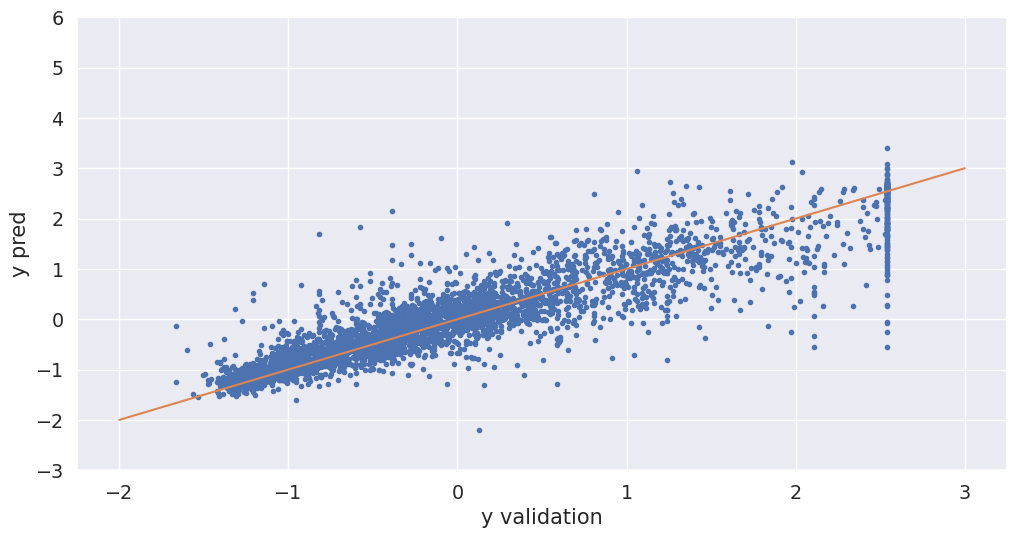

In [54]:
y_pred_nn = model.predict(X_validation.values)
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(y_validation, y_pred_nn, ".")
plt.plot(range(-2, 4), range(-2, 4))
plt.ylim(-3, 6)
plt.xlabel("y validation")
plt.ylabel("y pred")

No handles with labels found to put in legend.


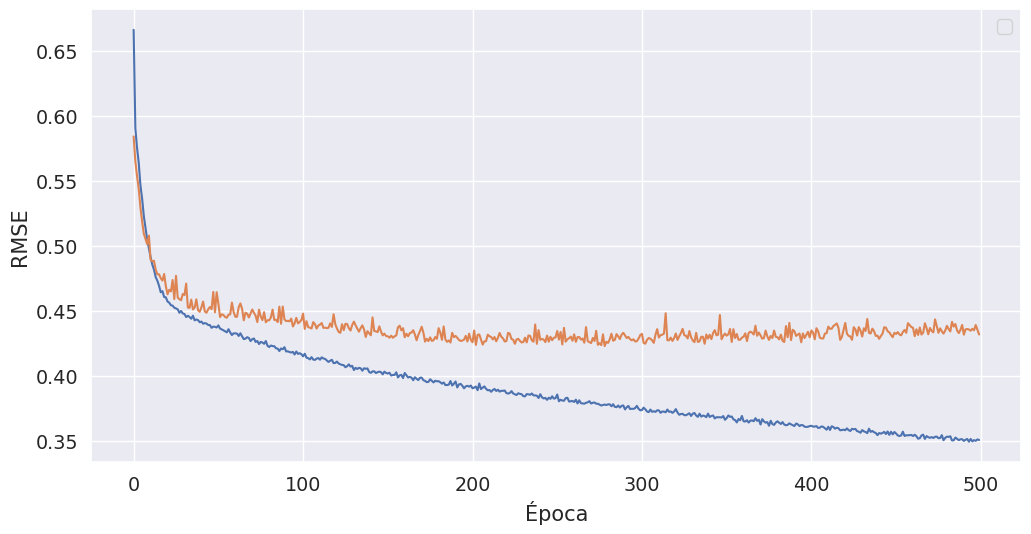

In [55]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

Que pasa si agregamos muchas neuronas?

In [56]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(8,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

In [57]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=500,
    validation_data=(X_validation.values, y_validation.values),
)

Train on 6000 samples, validate on 4000 samples
Epoch 1/500
  32/6000 [..............................] - ETA: 13s - loss: 0.8645

1984/6000 [========>.....................] - ETA: 0s - loss: 0.4933 

4000/6000 [===================>..........] - ETA: 0s - loss: 0.7967

6000/6000 [==============================] - 0s 48us/step - loss: 0.6557 - val_loss: 0.3317


Epoch 2/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2480

2144/6000 [=========>....................] - ETA: 0s - loss: 0.4262

4256/6000 [====================>.........] - ETA: 0s - loss: 0.3675

6000/6000 [==============================] - 0s 35us/step - loss: 0.3412 - val_loss: 0.2734


Epoch 3/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1706

2176/6000 [=========>....................] - ETA: 0s - loss: 0.3077

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2920

6000/6000 [==============================] - 0s 33us/step - loss: 0.2811 - val_loss: 0.2591


Epoch 4/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2542

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2495

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2479

6000/6000 [==============================] - 0s 33us/step - loss: 0.2524 - val_loss: 0.2621


Epoch 5/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1321

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2533

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2496

6000/6000 [==============================] - 0s 33us/step - loss: 0.2468 - val_loss: 0.2304


Epoch 6/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3996

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2280

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2219

6000/6000 [==============================] - 0s 33us/step - loss: 0.2290 - val_loss: 0.2763


Epoch 7/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2072

2144/6000 [=========>....................] - ETA: 0s - loss: 0.4818

4256/6000 [====================>.........] - ETA: 0s - loss: 0.3802

6000/6000 [==============================] - 0s 33us/step - loss: 0.3354 - val_loss: 0.2192


Epoch 8/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1479

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2039

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2217

6000/6000 [==============================] - 0s 33us/step - loss: 0.2214 - val_loss: 0.2192


Epoch 9/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1587

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2143

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2150

6000/6000 [==============================] - 0s 33us/step - loss: 0.2156 - val_loss: 0.2191


Epoch 10/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0863

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2230

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2156

6000/6000 [==============================] - 0s 33us/step - loss: 0.2163 - val_loss: 0.2163


Epoch 11/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3396

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1907

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2029

6000/6000 [==============================] - 0s 33us/step - loss: 0.2109 - val_loss: 0.2168


Epoch 12/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2057

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1945

4320/6000 [====================>.........] - ETA: 0s - loss: 0.2034

6000/6000 [==============================] - 0s 33us/step - loss: 0.2047 - val_loss: 0.2184


Epoch 13/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2267

2208/6000 [==========>...................] - ETA: 0s - loss: 0.2005

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2090

6000/6000 [==============================] - 0s 33us/step - loss: 0.2032 - val_loss: 0.2085


Epoch 14/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1108

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1849

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1896

6000/6000 [==============================] - 0s 33us/step - loss: 0.2042 - val_loss: 0.2181


Epoch 15/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3107

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1930

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1929

6000/6000 [==============================] - 0s 33us/step - loss: 0.2015 - val_loss: 0.2142


Epoch 16/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2060

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1846

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1931

6000/6000 [==============================] - 0s 33us/step - loss: 0.2079 - val_loss: 0.2237


Epoch 17/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2411

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2415

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2204

6000/6000 [==============================] - 0s 33us/step - loss: 0.2151 - val_loss: 0.2144


Epoch 18/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2436

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1915

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1916

6000/6000 [==============================] - 0s 33us/step - loss: 0.2036 - val_loss: 0.2188


Epoch 19/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1425

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1969

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1971

6000/6000 [==============================] - 0s 33us/step - loss: 0.2002 - val_loss: 0.2132


Epoch 20/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0578

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2155

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2045

6000/6000 [==============================] - 0s 33us/step - loss: 0.1954 - val_loss: 0.2044


Epoch 21/500


  32/6000 [..............................] - ETA: 0s - loss: 0.4599

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1886

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1866

6000/6000 [==============================] - 0s 33us/step - loss: 0.1922 - val_loss: 0.2073


Epoch 22/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1292

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1906



4224/6000 [====================>.........] - ETA: 0s - loss: 0.1928



6000/6000 [==============================] - 0s 33us/step - loss: 0.1907 - val_loss: 0.2111


Epoch 23/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1412

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1892

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1928

6000/6000 [==============================] - 0s 32us/step - loss: 0.1891 - val_loss: 0.2149


Epoch 24/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2369

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1919

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1869

6000/6000 [==============================] - 0s 33us/step - loss: 0.1889 - val_loss: 0.2195


Epoch 25/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1660

2176/6000 [=========>....................] - ETA: 0s - loss: 0.2111

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1924

6000/6000 [==============================] - 0s 33us/step - loss: 0.1878 - val_loss: 0.2069


Epoch 26/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1152

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1898

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1888

6000/6000 [==============================] - 0s 33us/step - loss: 0.1836 - val_loss: 0.2069


Epoch 27/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1225

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1833

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1792

6000/6000 [==============================] - 0s 32us/step - loss: 0.1844 - val_loss: 0.2067


Epoch 28/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1001

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1917

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1951

6000/6000 [==============================] - 0s 33us/step - loss: 0.1905 - val_loss: 0.2120


Epoch 29/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2224

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1675

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1905

6000/6000 [==============================] - 0s 34us/step - loss: 0.1882 - val_loss: 0.2109


Epoch 30/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1534

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1783

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1984

6000/6000 [==============================] - 0s 33us/step - loss: 0.1919 - val_loss: 0.2058


Epoch 31/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1154

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1777

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1966

6000/6000 [==============================] - 0s 33us/step - loss: 0.1908 - val_loss: 0.1989


Epoch 32/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2296

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1836

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1805

6000/6000 [==============================] - 0s 33us/step - loss: 0.1813 - val_loss: 0.2061


Epoch 33/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1103

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1769

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1818

6000/6000 [==============================] - 0s 33us/step - loss: 0.1810 - val_loss: 0.2044


Epoch 34/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1347

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1757

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1789

6000/6000 [==============================] - 0s 33us/step - loss: 0.1770 - val_loss: 0.1999


Epoch 35/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1684

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1789

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1821

6000/6000 [==============================] - 0s 33us/step - loss: 0.1764 - val_loss: 0.2056


Epoch 36/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1009

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1694

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1674

6000/6000 [==============================] - 0s 33us/step - loss: 0.1755 - val_loss: 0.2092


Epoch 37/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1144

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1847

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1780

6000/6000 [==============================] - 0s 33us/step - loss: 0.1758 - val_loss: 0.1995


Epoch 38/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1534

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1829

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1734

6000/6000 [==============================] - 0s 33us/step - loss: 0.1763 - val_loss: 0.2025


Epoch 39/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2009

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1659

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1708

6000/6000 [==============================] - 0s 33us/step - loss: 0.1745 - val_loss: 0.2004


Epoch 40/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2011

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1737

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1686

6000/6000 [==============================] - 0s 33us/step - loss: 0.1746 - val_loss: 0.2104


Epoch 41/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1960

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1835

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1741

6000/6000 [==============================] - 0s 33us/step - loss: 0.1735 - val_loss: 0.1971


Epoch 42/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1276

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1763

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1749

6000/6000 [==============================] - 0s 33us/step - loss: 0.1761 - val_loss: 0.1990


Epoch 43/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1651

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1855

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1741

6000/6000 [==============================] - 0s 33us/step - loss: 0.1781 - val_loss: 0.2002


Epoch 44/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2294

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1813

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1755

6000/6000 [==============================] - 0s 33us/step - loss: 0.1751 - val_loss: 0.1958


Epoch 45/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0980

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1670

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1708

6000/6000 [==============================] - 0s 33us/step - loss: 0.1708 - val_loss: 0.2008


Epoch 46/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0649

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1679

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1675

6000/6000 [==============================] - 0s 33us/step - loss: 0.1696 - val_loss: 0.1965


Epoch 47/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0767

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1710

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1690

6000/6000 [==============================] - 0s 32us/step - loss: 0.1689 - val_loss: 0.1953


Epoch 48/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4421

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1609

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1671

6000/6000 [==============================] - 0s 33us/step - loss: 0.1731 - val_loss: 0.2010


Epoch 49/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4237

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1694

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1691

6000/6000 [==============================] - 0s 32us/step - loss: 0.1694 - val_loss: 0.1931


Epoch 50/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1786

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1625

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1628

6000/6000 [==============================] - 0s 33us/step - loss: 0.1656 - val_loss: 0.2165


Epoch 51/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0936

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1604

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1664

6000/6000 [==============================] - 0s 33us/step - loss: 0.1690 - val_loss: 0.2002


Epoch 52/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1183

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1700

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1698

6000/6000 [==============================] - 0s 33us/step - loss: 0.1647 - val_loss: 0.1935


Epoch 53/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1787

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1575

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1547

6000/6000 [==============================] - 0s 33us/step - loss: 0.1665 - val_loss: 0.2115


Epoch 54/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1572

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1606

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1649

6000/6000 [==============================] - 0s 33us/step - loss: 0.1654 - val_loss: 0.1948


Epoch 55/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2045

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1658

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1655

6000/6000 [==============================] - 0s 33us/step - loss: 0.1644 - val_loss: 0.1915


Epoch 56/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1328

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1602

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1652

6000/6000 [==============================] - 0s 33us/step - loss: 0.1649 - val_loss: 0.1934


Epoch 57/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1397

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1615

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1686

6000/6000 [==============================] - 0s 33us/step - loss: 0.1639 - val_loss: 0.1987


Epoch 58/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1619

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1578

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1628

6000/6000 [==============================] - 0s 33us/step - loss: 0.1623 - val_loss: 0.1943


Epoch 59/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3931



2240/6000 [==========>...................] - ETA: 0s - loss: 0.1647

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1643

6000/6000 [==============================] - 0s 32us/step - loss: 0.1635 - val_loss: 0.1912


Epoch 60/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1531

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1588

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1621

6000/6000 [==============================] - 0s 34us/step - loss: 0.1609 - val_loss: 0.1902


Epoch 61/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1541

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1664

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1592

6000/6000 [==============================] - 0s 33us/step - loss: 0.1616 - val_loss: 0.1903


Epoch 62/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1618

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1681

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1554

6000/6000 [==============================] - 0s 33us/step - loss: 0.1575 - val_loss: 0.1975


Epoch 63/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1306

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1504

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1508

6000/6000 [==============================] - 0s 33us/step - loss: 0.1574 - val_loss: 0.2007


Epoch 64/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1688

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1590

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1634

6000/6000 [==============================] - 0s 33us/step - loss: 0.1587 - val_loss: 0.1922


Epoch 65/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0815

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1577

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1555



6000/6000 [==============================] - 0s 33us/step - loss: 0.1588 - val_loss: 0.1901


Epoch 66/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0632

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1484

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1610

6000/6000 [==============================] - 0s 33us/step - loss: 0.1591 - val_loss: 0.1901


Epoch 67/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2136

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1671

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1568

6000/6000 [==============================] - 0s 33us/step - loss: 0.1594 - val_loss: 0.1962


Epoch 68/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0888

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1407

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1534

6000/6000 [==============================] - 0s 33us/step - loss: 0.1574 - val_loss: 0.1916


Epoch 69/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0832

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1486

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1648

6000/6000 [==============================] - 0s 33us/step - loss: 0.1615 - val_loss: 0.1973


Epoch 70/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1189

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1525

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1566

6000/6000 [==============================] - 0s 33us/step - loss: 0.1564 - val_loss: 0.1866


Epoch 71/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1990

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1544

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1493

6000/6000 [==============================] - 0s 33us/step - loss: 0.1552 - val_loss: 0.1933


Epoch 72/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1241

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1504

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1572

6000/6000 [==============================] - 0s 33us/step - loss: 0.1560 - val_loss: 0.1891


Epoch 73/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1168

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1615

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1584

6000/6000 [==============================] - 0s 33us/step - loss: 0.1546 - val_loss: 0.1943


Epoch 74/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1057

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1634

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1592

6000/6000 [==============================] - 0s 33us/step - loss: 0.1537 - val_loss: 0.1941


Epoch 75/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0814

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1563

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1534

6000/6000 [==============================] - 0s 32us/step - loss: 0.1521 - val_loss: 0.1941


Epoch 76/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0763

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1462

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1482

6000/6000 [==============================] - 0s 33us/step - loss: 0.1516 - val_loss: 0.1908


Epoch 77/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1728

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1357

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1482

6000/6000 [==============================] - 0s 33us/step - loss: 0.1494 - val_loss: 0.1920


Epoch 78/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0935

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1545

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1466

6000/6000 [==============================] - 0s 33us/step - loss: 0.1546 - val_loss: 0.2099


Epoch 79/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1170

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1438

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1452

6000/6000 [==============================] - 0s 33us/step - loss: 0.1518 - val_loss: 0.2004


Epoch 80/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2178

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1611



4224/6000 [====================>.........] - ETA: 0s - loss: 0.1640

6000/6000 [==============================] - 0s 33us/step - loss: 0.1562 - val_loss: 0.1950


Epoch 81/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1438

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1535

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1543

6000/6000 [==============================] - 0s 33us/step - loss: 0.1494 - val_loss: 0.1899


Epoch 82/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1026

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1518

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1507

6000/6000 [==============================] - 0s 33us/step - loss: 0.1481 - val_loss: 0.1919


Epoch 83/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1559

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1351

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1451

6000/6000 [==============================] - 0s 33us/step - loss: 0.1474 - val_loss: 0.1997


Epoch 84/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1252

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1603

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1548

6000/6000 [==============================] - 0s 33us/step - loss: 0.1501 - val_loss: 0.1888


Epoch 85/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0811

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1425

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1444

6000/6000 [==============================] - 0s 33us/step - loss: 0.1480 - val_loss: 0.2014


Epoch 86/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0990

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1398

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1452

6000/6000 [==============================] - 0s 33us/step - loss: 0.1475 - val_loss: 0.1910


Epoch 87/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3019

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1310

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1451

6000/6000 [==============================] - 0s 33us/step - loss: 0.1456 - val_loss: 0.1916


Epoch 88/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0830

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1409

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1491

6000/6000 [==============================] - 0s 33us/step - loss: 0.1491 - val_loss: 0.1957


Epoch 89/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1010

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1399

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1452

6000/6000 [==============================] - 0s 32us/step - loss: 0.1450 - val_loss: 0.1881


Epoch 90/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0480

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1495

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1501

6000/6000 [==============================] - 0s 33us/step - loss: 0.1469 - val_loss: 0.1917


Epoch 91/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2748

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1519

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1440



6000/6000 [==============================] - 0s 33us/step - loss: 0.1452 - val_loss: 0.2017


Epoch 92/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1105

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1437

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1472

6000/6000 [==============================] - 0s 33us/step - loss: 0.1456 - val_loss: 0.1881


Epoch 93/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0564

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1335

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1428

6000/6000 [==============================] - 0s 33us/step - loss: 0.1466 - val_loss: 0.1923


Epoch 94/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2352

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1389

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1429

6000/6000 [==============================] - 0s 33us/step - loss: 0.1440 - val_loss: 0.1986


Epoch 95/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1116

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1423

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1397

5984/6000 [============================>.] - ETA: 0s - loss: 0.1423

6000/6000 [==============================] - 0s 35us/step - loss: 0.1423 - val_loss: 0.1934


Epoch 96/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1090

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1438

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1461

6000/6000 [==============================] - 0s 32us/step - loss: 0.1422 - val_loss: 0.1894


Epoch 97/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1107

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1468

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1420

6000/6000 [==============================] - 0s 33us/step - loss: 0.1418 - val_loss: 0.1887


Epoch 98/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1094

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1419

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1454

6000/6000 [==============================] - 0s 33us/step - loss: 0.1440 - val_loss: 0.1946


Epoch 99/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1240

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1402

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1382

6000/6000 [==============================] - 0s 33us/step - loss: 0.1425 - val_loss: 0.1927


Epoch 100/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0952

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1465

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1432

6000/6000 [==============================] - 0s 33us/step - loss: 0.1592 - val_loss: 0.1954


Epoch 101/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0598

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1429

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1426

6000/6000 [==============================] - 0s 33us/step - loss: 0.1544 - val_loss: 0.1886


Epoch 102/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0672

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1348

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1381

6000/6000 [==============================] - 0s 33us/step - loss: 0.1392 - val_loss: 0.1983


Epoch 103/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1033

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1348

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1328

6000/6000 [==============================] - 0s 33us/step - loss: 0.1397 - val_loss: 0.1876


Epoch 104/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0887

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1377

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1370

6000/6000 [==============================] - 0s 33us/step - loss: 0.1370 - val_loss: 0.1915


Epoch 105/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1806

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1411

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1368

6000/6000 [==============================] - 0s 33us/step - loss: 0.1395 - val_loss: 0.1954


Epoch 106/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1733

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1349

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1403

6000/6000 [==============================] - 0s 33us/step - loss: 0.1392 - val_loss: 0.1929


Epoch 107/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0607

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1273

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1359

6000/6000 [==============================] - 0s 33us/step - loss: 0.1371 - val_loss: 0.1868


Epoch 108/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1430

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1408

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1407

6000/6000 [==============================] - 0s 33us/step - loss: 0.1388 - val_loss: 0.1937


Epoch 109/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0373

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1304

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1339

6000/6000 [==============================] - 0s 34us/step - loss: 0.1372 - val_loss: 0.1965


Epoch 110/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0593

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1448

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1416



6000/6000 [==============================] - 0s 33us/step - loss: 0.1378 - val_loss: 0.1911


Epoch 111/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0704

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1352

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1341

6000/6000 [==============================] - 0s 33us/step - loss: 0.1349 - val_loss: 0.1927


Epoch 112/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1811

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1313

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1340

6000/6000 [==============================] - 0s 33us/step - loss: 0.1342 - val_loss: 0.1941


Epoch 113/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3990

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1319

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1366

6000/6000 [==============================] - 0s 32us/step - loss: 0.1378 - val_loss: 0.2062


Epoch 114/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1352

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1308

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1337

6000/6000 [==============================] - 0s 33us/step - loss: 0.1357 - val_loss: 0.1941


Epoch 115/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1218

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1357

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1350

6000/6000 [==============================] - 0s 32us/step - loss: 0.1346 - val_loss: 0.1873


Epoch 116/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0628

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1319

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1306

6000/6000 [==============================] - 0s 33us/step - loss: 0.1343 - val_loss: 0.1994


Epoch 117/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1403

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1366

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1346

6000/6000 [==============================] - 0s 33us/step - loss: 0.1350 - val_loss: 0.1955


Epoch 118/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1362

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1109

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1267

6000/6000 [==============================] - 0s 33us/step - loss: 0.1323 - val_loss: 0.1941


Epoch 119/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0880

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1347



4352/6000 [====================>.........] - ETA: 0s - loss: 0.1370

6000/6000 [==============================] - 0s 33us/step - loss: 0.1336 - val_loss: 0.1900


Epoch 120/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2255

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1272

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1335

6000/6000 [==============================] - 0s 33us/step - loss: 0.1324 - val_loss: 0.1920


Epoch 121/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0708

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1174

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1265

6000/6000 [==============================] - 0s 34us/step - loss: 0.1330 - val_loss: 0.2041


Epoch 122/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1023

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1162

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1290

6000/6000 [==============================] - 0s 33us/step - loss: 0.1305 - val_loss: 0.1994


Epoch 123/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1207

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1344

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1302

6000/6000 [==============================] - 0s 33us/step - loss: 0.1339 - val_loss: 0.1932


Epoch 124/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0492

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1279

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1327

6000/6000 [==============================] - 0s 33us/step - loss: 0.1325 - val_loss: 0.1964


Epoch 125/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2114

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1304

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1310

6000/6000 [==============================] - 0s 33us/step - loss: 0.1309 - val_loss: 0.1903


Epoch 126/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1538

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1266

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1228

6000/6000 [==============================] - 0s 33us/step - loss: 0.1313 - val_loss: 0.1954


Epoch 127/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1478

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1296

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1307

6000/6000 [==============================] - 0s 33us/step - loss: 0.1322 - val_loss: 0.1982


Epoch 128/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1118

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1256

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1294

6000/6000 [==============================] - 0s 33us/step - loss: 0.1284 - val_loss: 0.1916


Epoch 129/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0641

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1347

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1315

6000/6000 [==============================] - 0s 33us/step - loss: 0.1282 - val_loss: 0.1881


Epoch 130/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2470

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1267

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1309

6000/6000 [==============================] - 0s 33us/step - loss: 0.1295 - val_loss: 0.2016


Epoch 131/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0666

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1241

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1275

6000/6000 [==============================] - 0s 33us/step - loss: 0.1276 - val_loss: 0.1956


Epoch 132/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1085

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1218

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1268

6000/6000 [==============================] - 0s 33us/step - loss: 0.1274 - val_loss: 0.1972


Epoch 133/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1070

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1369

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1262

6000/6000 [==============================] - 0s 33us/step - loss: 0.1307 - val_loss: 0.1959


Epoch 134/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1553

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1339

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1256

6000/6000 [==============================] - 0s 33us/step - loss: 0.1278 - val_loss: 0.1922


Epoch 135/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1226

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1284

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1254

6000/6000 [==============================] - 0s 33us/step - loss: 0.1277 - val_loss: 0.1896


Epoch 136/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1353

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1296

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1323

6000/6000 [==============================] - 0s 33us/step - loss: 0.1310 - val_loss: 0.1929


Epoch 137/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1249

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1361

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1271

6000/6000 [==============================] - 0s 33us/step - loss: 0.1266 - val_loss: 0.1937


Epoch 138/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0942

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1315

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1265

6000/6000 [==============================] - 0s 33us/step - loss: 0.1296 - val_loss: 0.2130


Epoch 139/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1524

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1260

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1246

6000/6000 [==============================] - 0s 33us/step - loss: 0.1278 - val_loss: 0.2016


Epoch 140/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1217

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1401

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1357

6000/6000 [==============================] - 0s 32us/step - loss: 0.1322 - val_loss: 0.1981


Epoch 141/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1016

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1367

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1320

6000/6000 [==============================] - 0s 33us/step - loss: 0.1278 - val_loss: 0.2000


Epoch 142/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1431

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1282

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1274

6000/6000 [==============================] - 0s 33us/step - loss: 0.1262 - val_loss: 0.1932


Epoch 143/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1828

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1366

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1315

6000/6000 [==============================] - 0s 32us/step - loss: 0.1254 - val_loss: 0.1920


Epoch 144/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0942

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1309

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1286

6000/6000 [==============================] - 0s 33us/step - loss: 0.1244 - val_loss: 0.1943


Epoch 145/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1293

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1227

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1225

6000/6000 [==============================] - 0s 32us/step - loss: 0.1241 - val_loss: 0.1923


Epoch 146/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1177

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1280

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1260

6000/6000 [==============================] - 0s 32us/step - loss: 0.1231 - val_loss: 0.1915


Epoch 147/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0995

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1287

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1232

6000/6000 [==============================] - 0s 33us/step - loss: 0.1226 - val_loss: 0.1979


Epoch 148/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0843

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1332

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1276

6000/6000 [==============================] - 0s 33us/step - loss: 0.1254 - val_loss: 0.1984


Epoch 149/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0762

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1202

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1244

6000/6000 [==============================] - 0s 33us/step - loss: 0.1218 - val_loss: 0.1986


Epoch 150/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1282

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1185

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1204

6000/6000 [==============================] - 0s 33us/step - loss: 0.1210 - val_loss: 0.1954


Epoch 151/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1311

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1218

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1244

6000/6000 [==============================] - 0s 34us/step - loss: 0.1251 - val_loss: 0.1970


Epoch 152/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0521

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1221

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1199

6000/6000 [==============================] - 0s 33us/step - loss: 0.1213 - val_loss: 0.1931


Epoch 153/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0744

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1264

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1264

6000/6000 [==============================] - 0s 33us/step - loss: 0.1271 - val_loss: 0.1911


Epoch 154/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1167

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1197

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1244

6000/6000 [==============================] - 0s 33us/step - loss: 0.1228 - val_loss: 0.2030


Epoch 155/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0928

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1224

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1206

6000/6000 [==============================] - 0s 33us/step - loss: 0.1211 - val_loss: 0.1969


Epoch 156/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1112

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1187

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1180

6000/6000 [==============================] - 0s 33us/step - loss: 0.1195 - val_loss: 0.2057


Epoch 157/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0610

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1274

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1232

6000/6000 [==============================] - 0s 33us/step - loss: 0.1237 - val_loss: 0.1950


Epoch 158/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0929

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1233

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1218

6000/6000 [==============================] - 0s 33us/step - loss: 0.1215 - val_loss: 0.1970


Epoch 159/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0696

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1294

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1227

6000/6000 [==============================] - 0s 33us/step - loss: 0.1195 - val_loss: 0.1927


Epoch 160/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1335

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1096

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1204

6000/6000 [==============================] - 0s 32us/step - loss: 0.1194 - val_loss: 0.1929


Epoch 161/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1486

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1207

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1160

6000/6000 [==============================] - 0s 33us/step - loss: 0.1189 - val_loss: 0.2033


Epoch 162/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1667

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1151

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1177

6000/6000 [==============================] - 0s 33us/step - loss: 0.1184 - val_loss: 0.2131


Epoch 163/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0927

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1146

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1197

6000/6000 [==============================] - 0s 33us/step - loss: 0.1194 - val_loss: 0.1969


Epoch 164/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0781

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1195

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1201

6000/6000 [==============================] - 0s 33us/step - loss: 0.1201 - val_loss: 0.2053


Epoch 165/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0757

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1243

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1255

6000/6000 [==============================] - 0s 33us/step - loss: 0.1207 - val_loss: 0.2003


Epoch 166/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0691

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1094

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1139

6000/6000 [==============================] - 0s 33us/step - loss: 0.1174 - val_loss: 0.2068


Epoch 167/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0866

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1182

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1221

6000/6000 [==============================] - 0s 33us/step - loss: 0.1210 - val_loss: 0.2159


Epoch 168/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0883

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1188

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1228

6000/6000 [==============================] - 0s 33us/step - loss: 0.1230 - val_loss: 0.2048


Epoch 169/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2311

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1230

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1178

6000/6000 [==============================] - 0s 32us/step - loss: 0.1199 - val_loss: 0.2087


Epoch 170/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2012

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1163

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1134

6000/6000 [==============================] - 0s 33us/step - loss: 0.1174 - val_loss: 0.1967


Epoch 171/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0562

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1148

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1213

6000/6000 [==============================] - 0s 33us/step - loss: 0.1199 - val_loss: 0.1946


Epoch 172/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0823

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1072

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1115

6000/6000 [==============================] - 0s 33us/step - loss: 0.1349 - val_loss: 0.2028


Epoch 173/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1049

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1178

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1311

6000/6000 [==============================] - 0s 33us/step - loss: 0.1264 - val_loss: 0.2002


Epoch 174/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1164

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1250

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1180

6000/6000 [==============================] - 0s 33us/step - loss: 0.1174 - val_loss: 0.1970


Epoch 175/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1037

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1134

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1165

6000/6000 [==============================] - 0s 33us/step - loss: 0.1161 - val_loss: 0.2024


Epoch 176/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0756

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1098

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1109

6000/6000 [==============================] - 0s 33us/step - loss: 0.1152 - val_loss: 0.1977


Epoch 177/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0579

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1129

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1139

6000/6000 [==============================] - 0s 33us/step - loss: 0.1160 - val_loss: 0.1933


Epoch 178/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0945

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1191

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1192

6000/6000 [==============================] - 0s 32us/step - loss: 0.1179 - val_loss: 0.2044


Epoch 179/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0849

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1135

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1156

6000/6000 [==============================] - 0s 33us/step - loss: 0.1172 - val_loss: 0.2056


Epoch 180/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0914

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1177

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1152

6000/6000 [==============================] - 0s 33us/step - loss: 0.1194 - val_loss: 0.2132


Epoch 181/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0985

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1204

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1125

6000/6000 [==============================] - 0s 33us/step - loss: 0.1178 - val_loss: 0.2146


Epoch 182/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1061

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1037

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1072

6000/6000 [==============================] - 0s 34us/step - loss: 0.1135 - val_loss: 0.2033


Epoch 183/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1001

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1168

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1136

6000/6000 [==============================] - 0s 33us/step - loss: 0.1144 - val_loss: 0.2043


Epoch 184/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0735

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1082

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1097

6000/6000 [==============================] - 0s 33us/step - loss: 0.1145 - val_loss: 0.2061


Epoch 185/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0845

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1180

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1180

6000/6000 [==============================] - 0s 33us/step - loss: 0.1171 - val_loss: 0.2023


Epoch 186/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1019

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1118

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1153

6000/6000 [==============================] - 0s 33us/step - loss: 0.1149 - val_loss: 0.1969


Epoch 187/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1035

2240/6000 [==========>...................] - ETA: 0s - loss: 0.1150

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1139

6000/6000 [==============================] - 0s 32us/step - loss: 0.1139 - val_loss: 0.1956


Epoch 188/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0985

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1125

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1109

6000/6000 [==============================] - 0s 33us/step - loss: 0.1130 - val_loss: 0.2099


Epoch 189/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0835

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1138

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1141

5920/6000 [============================>.] - ETA: 0s - loss: 0.1165

6000/6000 [==============================] - 0s 35us/step - loss: 0.1171 - val_loss: 0.1968


Epoch 190/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0797

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1101

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1182

6000/6000 [==============================] - 0s 32us/step - loss: 0.1148 - val_loss: 0.1963


Epoch 191/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0970

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1090

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1136

6000/6000 [==============================] - 0s 33us/step - loss: 0.1122 - val_loss: 0.1973


Epoch 192/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0298

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1064

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1160

6000/6000 [==============================] - 0s 33us/step - loss: 0.1125 - val_loss: 0.2020


Epoch 193/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1962

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1184

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1154

6000/6000 [==============================] - 0s 33us/step - loss: 0.1134 - val_loss: 0.1997


Epoch 194/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0303

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1085

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1082

6000/6000 [==============================] - 0s 33us/step - loss: 0.1114 - val_loss: 0.1974


Epoch 195/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0426

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1195

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1126

6000/6000 [==============================] - 0s 33us/step - loss: 0.1122 - val_loss: 0.1987


Epoch 196/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1238

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1200

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1119

6000/6000 [==============================] - 0s 33us/step - loss: 0.1129 - val_loss: 0.1970


Epoch 197/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1068

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1115

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1133

6000/6000 [==============================] - 0s 32us/step - loss: 0.1112 - val_loss: 0.2037


Epoch 198/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1049

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1206

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1137

6000/6000 [==============================] - 0s 33us/step - loss: 0.1125 - val_loss: 0.2124


Epoch 199/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0891

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1107

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1148

6000/6000 [==============================] - 0s 33us/step - loss: 0.1123 - val_loss: 0.1948


Epoch 200/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0997

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1073

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1110

6000/6000 [==============================] - 0s 32us/step - loss: 0.1115 - val_loss: 0.2006


Epoch 201/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0871

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1128

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1151

6000/6000 [==============================] - 0s 33us/step - loss: 0.1118 - val_loss: 0.2019


Epoch 202/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0784

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1174

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1106

6000/6000 [==============================] - 0s 33us/step - loss: 0.1091 - val_loss: 0.1996


Epoch 203/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1314



2112/6000 [=========>....................] - ETA: 0s - loss: 0.1096

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1077

6000/6000 [==============================] - 0s 33us/step - loss: 0.1100 - val_loss: 0.2003


Epoch 204/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1435

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1026

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1086

6000/6000 [==============================] - 0s 32us/step - loss: 0.1106 - val_loss: 0.2060


Epoch 205/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0680

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1181

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1107

6000/6000 [==============================] - 0s 32us/step - loss: 0.1096 - val_loss: 0.2117


Epoch 206/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0613

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1078

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1077

6000/6000 [==============================] - 0s 33us/step - loss: 0.1105 - val_loss: 0.1982


Epoch 207/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0805

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1177

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1078

6000/6000 [==============================] - 0s 33us/step - loss: 0.1097 - val_loss: 0.2030


Epoch 208/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0597

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1022

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1088

6000/6000 [==============================] - 0s 32us/step - loss: 0.1089 - val_loss: 0.2082


Epoch 209/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0434

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1063

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1063

6000/6000 [==============================] - 0s 33us/step - loss: 0.1086 - val_loss: 0.1991


Epoch 210/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0519

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1071

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1097

6000/6000 [==============================] - 0s 33us/step - loss: 0.1117 - val_loss: 0.2101


Epoch 211/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2196

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1093

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1108

6000/6000 [==============================] - 0s 32us/step - loss: 0.1100 - val_loss: 0.1981


Epoch 212/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0553

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1011

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1060

6000/6000 [==============================] - 0s 34us/step - loss: 0.1067 - val_loss: 0.2129


Epoch 213/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3112

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1148

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1093

6000/6000 [==============================] - 0s 33us/step - loss: 0.1084 - val_loss: 0.2115


Epoch 214/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0950

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1093

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1067

6000/6000 [==============================] - 0s 33us/step - loss: 0.1075 - val_loss: 0.2013


Epoch 215/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2717

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1083

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1074

6000/6000 [==============================] - 0s 33us/step - loss: 0.1091 - val_loss: 0.2041


Epoch 216/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0758

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1012

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1049

6000/6000 [==============================] - 0s 33us/step - loss: 0.1082 - val_loss: 0.2019


Epoch 217/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0432

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1050

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1065

6000/6000 [==============================] - 0s 33us/step - loss: 0.1070 - val_loss: 0.2075


Epoch 218/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1035

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1022

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1048

6000/6000 [==============================] - 0s 33us/step - loss: 0.1078 - val_loss: 0.2054


Epoch 219/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2016

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1082

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1105

6000/6000 [==============================] - 0s 33us/step - loss: 0.1094 - val_loss: 0.1988


Epoch 220/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1385

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1169

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1105

6000/6000 [==============================] - 0s 33us/step - loss: 0.1071 - val_loss: 0.1964


Epoch 221/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1792

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1051

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1034

6000/6000 [==============================] - 0s 32us/step - loss: 0.1059 - val_loss: 0.2003


Epoch 222/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1753

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1069

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1051

6000/6000 [==============================] - 0s 33us/step - loss: 0.1057 - val_loss: 0.2009


Epoch 223/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0564

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1010

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1017

6000/6000 [==============================] - 0s 33us/step - loss: 0.1052 - val_loss: 0.2003


Epoch 224/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1796

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1081

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1114

6000/6000 [==============================] - 0s 33us/step - loss: 0.1079 - val_loss: 0.2069


Epoch 225/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1010

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1048

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1046

6000/6000 [==============================] - 0s 33us/step - loss: 0.1079 - val_loss: 0.2101


Epoch 226/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0838

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0986

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1061

6000/6000 [==============================] - 0s 33us/step - loss: 0.1061 - val_loss: 0.2120


Epoch 227/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0687

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1095

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1095

6000/6000 [==============================] - 0s 33us/step - loss: 0.1058 - val_loss: 0.2045


Epoch 228/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0745

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1032

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1008

6000/6000 [==============================] - 0s 32us/step - loss: 0.1051 - val_loss: 0.2027


Epoch 229/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0997

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0897

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0968

6000/6000 [==============================] - 0s 33us/step - loss: 0.1047 - val_loss: 0.1957


Epoch 230/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1206

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0950

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1008

6000/6000 [==============================] - 0s 33us/step - loss: 0.1051 - val_loss: 0.2137


Epoch 231/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1278

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0985

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1007

6000/6000 [==============================] - 0s 33us/step - loss: 0.1047 - val_loss: 0.2070


Epoch 232/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1606

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1142

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1084

6000/6000 [==============================] - 0s 33us/step - loss: 0.1062 - val_loss: 0.2087


Epoch 233/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0976

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1094

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1036

6000/6000 [==============================] - 0s 33us/step - loss: 0.1050 - val_loss: 0.2277


Epoch 234/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0584

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1037

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1045

6000/6000 [==============================] - 0s 33us/step - loss: 0.1068 - val_loss: 0.2023


Epoch 235/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0633



2176/6000 [=========>....................] - ETA: 0s - loss: 0.1013

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1045

6000/6000 [==============================] - 0s 33us/step - loss: 0.1031 - val_loss: 0.2000


Epoch 236/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0904

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0985

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1013

6000/6000 [==============================] - 0s 33us/step - loss: 0.1017 - val_loss: 0.2028


Epoch 237/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1332

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0976

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1003

6000/6000 [==============================] - 0s 33us/step - loss: 0.1042 - val_loss: 0.2096


Epoch 238/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0777

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1033

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1081

6000/6000 [==============================] - 0s 33us/step - loss: 0.1077 - val_loss: 0.2025


Epoch 239/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0633

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1052

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1022

6000/6000 [==============================] - 0s 33us/step - loss: 0.1044 - val_loss: 0.2041


Epoch 240/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0872

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0973

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1060

6000/6000 [==============================] - 0s 33us/step - loss: 0.1029 - val_loss: 0.1982


Epoch 241/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1206

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1031

4160/6000 [===================>..........] - ETA: 0s - loss: 0.0968

6000/6000 [==============================] - 0s 33us/step - loss: 0.1029 - val_loss: 0.2059


Epoch 242/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0909

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1041

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1054

6000/6000 [==============================] - 0s 33us/step - loss: 0.1019 - val_loss: 0.2197


Epoch 243/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0724

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1018

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1052

6000/6000 [==============================] - 0s 34us/step - loss: 0.1038 - val_loss: 0.2083


Epoch 244/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0853

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0943

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0970

6000/6000 [==============================] - 0s 33us/step - loss: 0.1042 - val_loss: 0.1992


Epoch 245/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0902

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1011

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1053

6000/6000 [==============================] - 0s 33us/step - loss: 0.1022 - val_loss: 0.2030


Epoch 246/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0643

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1098

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1021

6000/6000 [==============================] - 0s 32us/step - loss: 0.1024 - val_loss: 0.2095


Epoch 247/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1199

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1020

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1018

6000/6000 [==============================] - 0s 33us/step - loss: 0.1018 - val_loss: 0.2092


Epoch 248/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1016

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1047

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1035

6000/6000 [==============================] - 0s 33us/step - loss: 0.1033 - val_loss: 0.2061


Epoch 249/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0515

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0947

4128/6000 [===================>..........] - ETA: 0s - loss: 0.0969

6000/6000 [==============================] - 0s 33us/step - loss: 0.0999 - val_loss: 0.2027


Epoch 250/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0655

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1044

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1070

6000/6000 [==============================] - 0s 33us/step - loss: 0.1027 - val_loss: 0.2139


Epoch 251/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0501

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0984

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1002

6000/6000 [==============================] - 0s 33us/step - loss: 0.1042 - val_loss: 0.2167


Epoch 252/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0632

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1066

4192/6000 [===================>..........] - ETA: 0s - loss: 0.1048

6000/6000 [==============================] - 0s 33us/step - loss: 0.1017 - val_loss: 0.2130


Epoch 253/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0772



2112/6000 [=========>....................] - ETA: 0s - loss: 0.0973

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1005

6000/6000 [==============================] - 0s 33us/step - loss: 0.1016 - val_loss: 0.2077


Epoch 254/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0263

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1063

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1012

6000/6000 [==============================] - 0s 33us/step - loss: 0.1023 - val_loss: 0.2095


Epoch 255/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0874

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1019

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1081

6000/6000 [==============================] - 0s 33us/step - loss: 0.1048 - val_loss: 0.2033


Epoch 256/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1320

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1023

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0951

6000/6000 [==============================] - 0s 33us/step - loss: 0.1005 - val_loss: 0.2059


Epoch 257/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0747

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1042

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1040

6000/6000 [==============================] - 0s 34us/step - loss: 0.1021 - val_loss: 0.2068


Epoch 258/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1471

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0952

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0980

6000/6000 [==============================] - 0s 33us/step - loss: 0.0997 - val_loss: 0.2028


Epoch 259/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0435

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0992

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0991

6000/6000 [==============================] - 0s 33us/step - loss: 0.1000 - val_loss: 0.2269


Epoch 260/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1643

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1049

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1039

6000/6000 [==============================] - 0s 33us/step - loss: 0.1020 - val_loss: 0.2045


Epoch 261/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1544

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1031

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1046

6000/6000 [==============================] - 0s 33us/step - loss: 0.1010 - val_loss: 0.2050


Epoch 262/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1236

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0980

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1014

6000/6000 [==============================] - 0s 33us/step - loss: 0.1000 - val_loss: 0.2039


Epoch 263/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1527

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0984

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1023

6000/6000 [==============================] - 0s 33us/step - loss: 0.1012 - val_loss: 0.2071


Epoch 264/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0989

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1006

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1004

6000/6000 [==============================] - 0s 33us/step - loss: 0.1007 - val_loss: 0.2091


Epoch 265/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1017



2144/6000 [=========>....................] - ETA: 0s - loss: 0.0979

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1025

6000/6000 [==============================] - 0s 33us/step - loss: 0.1024 - val_loss: 0.2212


Epoch 266/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0878

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1008

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1031

6000/6000 [==============================] - 0s 33us/step - loss: 0.1004 - val_loss: 0.2102


Epoch 267/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0373

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0972

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0989

6000/6000 [==============================] - 0s 33us/step - loss: 0.0993 - val_loss: 0.2209


Epoch 268/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0452

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0905

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0928

6000/6000 [==============================] - 0s 33us/step - loss: 0.0974 - val_loss: 0.2111


Epoch 269/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0900

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0951

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0953

6000/6000 [==============================] - 0s 33us/step - loss: 0.0975 - val_loss: 0.2196


Epoch 270/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0676

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1037

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0983

6000/6000 [==============================] - 0s 33us/step - loss: 0.1000 - val_loss: 0.2077


Epoch 271/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0597

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1035

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1043

6000/6000 [==============================] - 0s 33us/step - loss: 0.1017 - val_loss: 0.2014


Epoch 272/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0543

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0936

4160/6000 [===================>..........] - ETA: 0s - loss: 0.0944

6000/6000 [==============================] - 0s 33us/step - loss: 0.0977 - val_loss: 0.2087


Epoch 273/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0987

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1110

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1008



6000/6000 [==============================] - 0s 33us/step - loss: 0.0999 - val_loss: 0.2051


Epoch 274/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1349

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0911

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0958

6000/6000 [==============================] - 0s 33us/step - loss: 0.0974 - val_loss: 0.2131


Epoch 275/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0415

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0948

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0984

6000/6000 [==============================] - 0s 33us/step - loss: 0.0988 - val_loss: 0.2028


Epoch 276/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0470

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0852

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0943

6000/6000 [==============================] - 0s 33us/step - loss: 0.0976 - val_loss: 0.2069


Epoch 277/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0828

2144/6000 [=========>....................] - ETA: 0s - loss: 0.1061

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1003

6000/6000 [==============================] - 0s 33us/step - loss: 0.0984 - val_loss: 0.2072


Epoch 278/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1587

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0945

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0973

6000/6000 [==============================] - 0s 32us/step - loss: 0.0959 - val_loss: 0.2070


Epoch 279/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0872

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0975

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0975

6000/6000 [==============================] - 0s 32us/step - loss: 0.0968 - val_loss: 0.2220


Epoch 280/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0557

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0968

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1001

6000/6000 [==============================] - 0s 33us/step - loss: 0.0978 - val_loss: 0.2047


Epoch 281/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0668

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0916

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0944

6000/6000 [==============================] - 0s 33us/step - loss: 0.0972 - val_loss: 0.2047


Epoch 282/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1163

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0919

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0949

6000/6000 [==============================] - 0s 33us/step - loss: 0.0986 - val_loss: 0.2032


Epoch 283/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0655

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0990

4160/6000 [===================>..........] - ETA: 0s - loss: 0.0969

6000/6000 [==============================] - 0s 33us/step - loss: 0.0959 - val_loss: 0.2051


Epoch 284/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0713

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0952

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0962

6000/6000 [==============================] - 0s 33us/step - loss: 0.0946 - val_loss: 0.2262


Epoch 285/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0565

2176/6000 [=========>....................] - ETA: 0s - loss: 0.1004

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0985

6000/6000 [==============================] - 0s 33us/step - loss: 0.0973 - val_loss: 0.2046


Epoch 286/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0562

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0956

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0968

6000/6000 [==============================] - 0s 33us/step - loss: 0.0955 - val_loss: 0.2222


Epoch 287/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0770

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0906

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0953

6000/6000 [==============================] - 0s 33us/step - loss: 0.0965 - val_loss: 0.2025


Epoch 288/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0656

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0896

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0909

6000/6000 [==============================] - 0s 33us/step - loss: 0.0957 - val_loss: 0.2075


Epoch 289/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0786

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0921

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0918

6000/6000 [==============================] - 0s 33us/step - loss: 0.0933 - val_loss: 0.2072


Epoch 290/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0877

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0986

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0943

6000/6000 [==============================] - 0s 32us/step - loss: 0.0952 - val_loss: 0.2097


Epoch 291/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0826

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0895

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0962

6000/6000 [==============================] - 0s 32us/step - loss: 0.0957 - val_loss: 0.2176


Epoch 292/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0967

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0977

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0957

6000/6000 [==============================] - 0s 32us/step - loss: 0.0940 - val_loss: 0.2206


Epoch 293/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0327

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0905

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0922

6000/6000 [==============================] - 0s 33us/step - loss: 0.0958 - val_loss: 0.2279


Epoch 294/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1355

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0933

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0981

6000/6000 [==============================] - 0s 33us/step - loss: 0.0975 - val_loss: 0.2177


Epoch 295/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0656

2208/6000 [==========>...................] - ETA: 0s - loss: 0.1019

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0980

6000/6000 [==============================] - 0s 32us/step - loss: 0.0950 - val_loss: 0.2115


Epoch 296/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1392

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0917

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0949

6000/6000 [==============================] - 0s 32us/step - loss: 0.0953 - val_loss: 0.2196


Epoch 297/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1715

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0971

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0937

6000/6000 [==============================] - 0s 32us/step - loss: 0.0954 - val_loss: 0.2113


Epoch 298/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0715

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0903

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0950

6000/6000 [==============================] - 0s 32us/step - loss: 0.0954 - val_loss: 0.2051


Epoch 299/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0341

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0957

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0913

6000/6000 [==============================] - 0s 33us/step - loss: 0.0933 - val_loss: 0.2196


Epoch 300/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1455

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0949

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0971

6000/6000 [==============================] - 0s 32us/step - loss: 0.0951 - val_loss: 0.2140


Epoch 301/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0667

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0893

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0944

6000/6000 [==============================] - 0s 32us/step - loss: 0.0921 - val_loss: 0.2106


Epoch 302/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1081

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0909

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0921

6000/6000 [==============================] - 0s 32us/step - loss: 0.0924 - val_loss: 0.2036


Epoch 303/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0568

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0887

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0963

6000/6000 [==============================] - 0s 33us/step - loss: 0.0948 - val_loss: 0.2187


Epoch 304/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1248

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0919

4160/6000 [===================>..........] - ETA: 0s - loss: 0.0921

6000/6000 [==============================] - 0s 34us/step - loss: 0.0939 - val_loss: 0.2088


Epoch 305/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0990

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0889

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0943

6000/6000 [==============================] - 0s 32us/step - loss: 0.0924 - val_loss: 0.2079


Epoch 306/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1416

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0985

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0944

6000/6000 [==============================] - 0s 33us/step - loss: 0.0951 - val_loss: 0.2158


Epoch 307/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0871

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0868

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0894

6000/6000 [==============================] - 0s 33us/step - loss: 0.0917 - val_loss: 0.2088


Epoch 308/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0820

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0873

4192/6000 [===================>..........] - ETA: 0s - loss: 0.0945

6000/6000 [==============================] - 0s 33us/step - loss: 0.0938 - val_loss: 0.2048


Epoch 309/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0564

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0860

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0897

6000/6000 [==============================] - 0s 32us/step - loss: 0.0920 - val_loss: 0.2190


Epoch 310/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1263

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0962

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0930

6000/6000 [==============================] - 0s 33us/step - loss: 0.0945 - val_loss: 0.2203


Epoch 311/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0520

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0928

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0907

6000/6000 [==============================] - 0s 33us/step - loss: 0.0944 - val_loss: 0.2246


Epoch 312/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0739

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0952

4192/6000 [===================>..........] - ETA: 0s - loss: 0.0897

6000/6000 [==============================] - 0s 33us/step - loss: 0.0963 - val_loss: 0.2088


Epoch 313/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0731

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0872



4256/6000 [====================>.........] - ETA: 0s - loss: 0.0936

6000/6000 [==============================] - 0s 33us/step - loss: 0.0938 - val_loss: 0.2134


Epoch 314/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0401

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0932

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0955

6000/6000 [==============================] - 0s 33us/step - loss: 0.0925 - val_loss: 0.2128


Epoch 315/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0968

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0841

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0959

6000/6000 [==============================] - 0s 33us/step - loss: 0.0934 - val_loss: 0.2107


Epoch 316/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0704

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0861

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0897

6000/6000 [==============================] - 0s 33us/step - loss: 0.0920 - val_loss: 0.2183


Epoch 317/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0747

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0967

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0952

6000/6000 [==============================] - 0s 33us/step - loss: 0.0919 - val_loss: 0.2107


Epoch 318/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0486

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0874

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0912

6000/6000 [==============================] - 0s 33us/step - loss: 0.0910 - val_loss: 0.2296


Epoch 319/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0654

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0922

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0911

6000/6000 [==============================] - 0s 33us/step - loss: 0.0929 - val_loss: 0.2139


Epoch 320/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0991

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0929

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0905

6000/6000 [==============================] - 0s 33us/step - loss: 0.0909 - val_loss: 0.2148


Epoch 321/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1016

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0803



4352/6000 [====================>.........] - ETA: 0s - loss: 0.0885

6000/6000 [==============================] - 0s 33us/step - loss: 0.0911 - val_loss: 0.2098


Epoch 322/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0516

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0868

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0946

6000/6000 [==============================] - 0s 32us/step - loss: 0.0939 - val_loss: 0.2178


Epoch 323/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0444

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0872

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0895

6000/6000 [==============================] - 0s 32us/step - loss: 0.0904 - val_loss: 0.2129


Epoch 324/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0734

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0868

4160/6000 [===================>..........] - ETA: 0s - loss: 0.0902

6000/6000 [==============================] - 0s 33us/step - loss: 0.0903 - val_loss: 0.2154


Epoch 325/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0712

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0931

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0927

6000/6000 [==============================] - 0s 33us/step - loss: 0.0912 - val_loss: 0.2087


Epoch 326/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0745

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0881

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0856

6000/6000 [==============================] - 0s 32us/step - loss: 0.0919 - val_loss: 0.2124


Epoch 327/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0834

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0929

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0890

6000/6000 [==============================] - 0s 32us/step - loss: 0.0916 - val_loss: 0.2158


Epoch 328/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0522

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0910

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0883

6000/6000 [==============================] - 0s 33us/step - loss: 0.0895 - val_loss: 0.2231


Epoch 329/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0574

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0894

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0912

6000/6000 [==============================] - 0s 32us/step - loss: 0.0925 - val_loss: 0.2146


Epoch 330/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1846

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0906

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0914

6000/6000 [==============================] - 0s 33us/step - loss: 0.0911 - val_loss: 0.2128


Epoch 331/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0995

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0925

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0882

6000/6000 [==============================] - 0s 32us/step - loss: 0.0891 - val_loss: 0.2113


Epoch 332/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1113

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0837

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0874

6000/6000 [==============================] - 0s 33us/step - loss: 0.0902 - val_loss: 0.2201


Epoch 333/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1022

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0891

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0936

6000/6000 [==============================] - 0s 33us/step - loss: 0.0905 - val_loss: 0.2094


Epoch 334/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0726

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0867

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0893

6000/6000 [==============================] - 0s 32us/step - loss: 0.0897 - val_loss: 0.2139


Epoch 335/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0391

2016/6000 [=========>....................] - ETA: 0s - loss: 0.0860

4128/6000 [===================>..........] - ETA: 0s - loss: 0.0886

6000/6000 [==============================] - 0s 33us/step - loss: 0.0901 - val_loss: 0.2100


Epoch 336/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1289

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0837

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0839

6000/6000 [==============================] - 0s 32us/step - loss: 0.0886 - val_loss: 0.2134


Epoch 337/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1091

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0883

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0900

6000/6000 [==============================] - 0s 32us/step - loss: 0.0919 - val_loss: 0.2142


Epoch 338/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0806

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0857

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0887

6000/6000 [==============================] - 0s 33us/step - loss: 0.0900 - val_loss: 0.2142


Epoch 339/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0390

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0875

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0880

6000/6000 [==============================] - 0s 33us/step - loss: 0.0898 - val_loss: 0.2078


Epoch 340/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0483

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0895

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0905

6000/6000 [==============================] - 0s 32us/step - loss: 0.0896 - val_loss: 0.2189


Epoch 341/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0463

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0896

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0881

6000/6000 [==============================] - 0s 32us/step - loss: 0.0907 - val_loss: 0.2165


Epoch 342/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0974

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0800

4192/6000 [===================>..........] - ETA: 0s - loss: 0.0855

6000/6000 [==============================] - 0s 33us/step - loss: 0.0888 - val_loss: 0.2113


Epoch 343/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0503

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0868

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0918

6000/6000 [==============================] - 0s 33us/step - loss: 0.0897 - val_loss: 0.2116


Epoch 344/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0599

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0864

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0860

6000/6000 [==============================] - 0s 32us/step - loss: 0.0876 - val_loss: 0.2228


Epoch 345/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0907

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0879

4192/6000 [===================>..........] - ETA: 0s - loss: 0.0876

6000/6000 [==============================] - 0s 33us/step - loss: 0.0878 - val_loss: 0.2140


Epoch 346/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0418

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0960

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0902

6000/6000 [==============================] - 0s 33us/step - loss: 0.0883 - val_loss: 0.2276


Epoch 347/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0504

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0863

4192/6000 [===================>..........] - ETA: 0s - loss: 0.0855

6000/6000 [==============================] - 0s 33us/step - loss: 0.0885 - val_loss: 0.2111


Epoch 348/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1638

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0820

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0847

6000/6000 [==============================] - 0s 33us/step - loss: 0.0867 - val_loss: 0.2221


Epoch 349/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0519

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0790

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0848

6000/6000 [==============================] - 0s 33us/step - loss: 0.0899 - val_loss: 0.2142


Epoch 350/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0366

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0868

4160/6000 [===================>..........] - ETA: 0s - loss: 0.0894



6000/6000 [==============================] - 0s 33us/step - loss: 0.0874 - val_loss: 0.2140


Epoch 351/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0517

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0927

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0896

6000/6000 [==============================] - 0s 33us/step - loss: 0.0879 - val_loss: 0.2171


Epoch 352/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0947

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0824

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0925

6000/6000 [==============================] - 0s 32us/step - loss: 0.0901 - val_loss: 0.2128


Epoch 353/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0560

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0868

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0873

6000/6000 [==============================] - 0s 32us/step - loss: 0.0880 - val_loss: 0.2177


Epoch 354/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0371

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0880

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0904

6000/6000 [==============================] - 0s 32us/step - loss: 0.0908 - val_loss: 0.2090


Epoch 355/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0305

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0839

4192/6000 [===================>..........] - ETA: 0s - loss: 0.0862

6000/6000 [==============================] - 0s 33us/step - loss: 0.0866 - val_loss: 0.2087


Epoch 356/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0433

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0784

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0859

6000/6000 [==============================] - 0s 33us/step - loss: 0.0883 - val_loss: 0.2102


Epoch 357/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0456

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0870

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0874

6000/6000 [==============================] - 0s 33us/step - loss: 0.0881 - val_loss: 0.2144


Epoch 358/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0807

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0785

4160/6000 [===================>..........] - ETA: 0s - loss: 0.0861

6000/6000 [==============================] - 0s 33us/step - loss: 0.0881 - val_loss: 0.2125


Epoch 359/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0970

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0849

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0856

6000/6000 [==============================] - 0s 33us/step - loss: 0.0872 - val_loss: 0.2096


Epoch 360/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0508

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0838

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0843

6000/6000 [==============================] - 0s 33us/step - loss: 0.0890 - val_loss: 0.2191


Epoch 361/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0691

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0871

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0906

6000/6000 [==============================] - 0s 33us/step - loss: 0.0895 - val_loss: 0.2082


Epoch 362/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0853

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0826

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0851

6000/6000 [==============================] - 0s 32us/step - loss: 0.0852 - val_loss: 0.2168


Epoch 363/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0795

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0819

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0859

6000/6000 [==============================] - 0s 32us/step - loss: 0.0876 - val_loss: 0.2130


Epoch 364/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0844

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0822

4192/6000 [===================>..........] - ETA: 0s - loss: 0.0851

6000/6000 [==============================] - 0s 33us/step - loss: 0.0872 - val_loss: 0.2230


Epoch 365/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0858

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0880

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0884

6000/6000 [==============================] - 0s 34us/step - loss: 0.0867 - val_loss: 0.2217


Epoch 366/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0526

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0814

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0866

6000/6000 [==============================] - 0s 32us/step - loss: 0.0879 - val_loss: 0.2138


Epoch 367/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0969

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0874

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0862

6000/6000 [==============================] - 0s 33us/step - loss: 0.0849 - val_loss: 0.2116


Epoch 368/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1186

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0846

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0902

6000/6000 [==============================] - 0s 32us/step - loss: 0.0884 - val_loss: 0.2091


Epoch 369/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0548

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0782

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0803

6000/6000 [==============================] - 0s 33us/step - loss: 0.0848 - val_loss: 0.2184


Epoch 370/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0675

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0835

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0818

6000/6000 [==============================] - 0s 32us/step - loss: 0.0879 - val_loss: 0.2209


Epoch 371/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0405

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0849

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0807

6000/6000 [==============================] - 0s 33us/step - loss: 0.0840 - val_loss: 0.2259


Epoch 372/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0523

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0823

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0843

6000/6000 [==============================] - 0s 32us/step - loss: 0.0867 - val_loss: 0.2192


Epoch 373/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1394

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0851

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0844

6000/6000 [==============================] - 0s 32us/step - loss: 0.0859 - val_loss: 0.2232


Epoch 374/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1433

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0785

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0837

6000/6000 [==============================] - 0s 32us/step - loss: 0.0848 - val_loss: 0.2238


Epoch 375/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0922

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0816

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0815

6000/6000 [==============================] - 0s 33us/step - loss: 0.0864 - val_loss: 0.2104


Epoch 376/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1110

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0917

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0906

6000/6000 [==============================] - 0s 33us/step - loss: 0.0886 - val_loss: 0.2201


Epoch 377/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0807

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0834

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0864

6000/6000 [==============================] - 0s 33us/step - loss: 0.0869 - val_loss: 0.2247


Epoch 378/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0758

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0848

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0836

6000/6000 [==============================] - 0s 33us/step - loss: 0.0843 - val_loss: 0.2139


Epoch 379/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0779

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0760

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0858

6000/6000 [==============================] - 0s 33us/step - loss: 0.0851 - val_loss: 0.2075


Epoch 380/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1165

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0862

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0856

6000/6000 [==============================] - 0s 33us/step - loss: 0.0843 - val_loss: 0.2169


Epoch 381/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0698

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0879

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0844

6000/6000 [==============================] - 0s 33us/step - loss: 0.0854 - val_loss: 0.2149


Epoch 382/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0524

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0871

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0816

6000/6000 [==============================] - 0s 32us/step - loss: 0.0847 - val_loss: 0.2166


Epoch 383/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0667

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0847

4192/6000 [===================>..........] - ETA: 0s - loss: 0.0850

6000/6000 [==============================] - 0s 33us/step - loss: 0.0852 - val_loss: 0.2195


Epoch 384/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1660

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0762

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0786

6000/6000 [==============================] - 0s 33us/step - loss: 0.0835 - val_loss: 0.2140


Epoch 385/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0867

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0814

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0815

6000/6000 [==============================] - 0s 33us/step - loss: 0.0858 - val_loss: 0.2227


Epoch 386/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1317

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0754

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0793

6000/6000 [==============================] - 0s 33us/step - loss: 0.0844 - val_loss: 0.2135


Epoch 387/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0446

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0852

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0858

6000/6000 [==============================] - 0s 32us/step - loss: 0.0848 - val_loss: 0.2133


Epoch 388/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0890

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0793

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0823

6000/6000 [==============================] - 0s 32us/step - loss: 0.0826 - val_loss: 0.2180


Epoch 389/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0950

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0796

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0810

6000/6000 [==============================] - 0s 32us/step - loss: 0.0830 - val_loss: 0.2128


Epoch 390/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1255

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0801

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0824

6000/6000 [==============================] - 0s 33us/step - loss: 0.0830 - val_loss: 0.2211


Epoch 391/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0502

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0864

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0836

6000/6000 [==============================] - 0s 33us/step - loss: 0.0835 - val_loss: 0.2183


Epoch 392/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0545

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0821

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0823

6000/6000 [==============================] - 0s 32us/step - loss: 0.0825 - val_loss: 0.2262


Epoch 393/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0677

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0866

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0827

6000/6000 [==============================] - 0s 32us/step - loss: 0.0846 - val_loss: 0.2120


Epoch 394/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0402

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0838

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0820

6000/6000 [==============================] - 0s 33us/step - loss: 0.0837 - val_loss: 0.2131


Epoch 395/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0321

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0848

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0868

6000/6000 [==============================] - 0s 33us/step - loss: 0.0867 - val_loss: 0.2233


Epoch 396/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0709

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0844

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0847

6000/6000 [==============================] - 0s 33us/step - loss: 0.0826 - val_loss: 0.2190


Epoch 397/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1140

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0855

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0841

6000/6000 [==============================] - 0s 33us/step - loss: 0.0834 - val_loss: 0.2209


Epoch 398/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0624

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0718

4192/6000 [===================>..........] - ETA: 0s - loss: 0.0775

6000/6000 [==============================] - 0s 33us/step - loss: 0.0830 - val_loss: 0.2185


Epoch 399/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0976

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0855

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0846

6000/6000 [==============================] - 0s 34us/step - loss: 0.0829 - val_loss: 0.2201


Epoch 400/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0572

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0862

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0806

6000/6000 [==============================] - 0s 32us/step - loss: 0.0824 - val_loss: 0.2230


Epoch 401/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1067

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0875

4192/6000 [===================>..........] - ETA: 0s - loss: 0.0872

6000/6000 [==============================] - 0s 33us/step - loss: 0.0843 - val_loss: 0.2212


Epoch 402/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0461

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0796

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0817

6000/6000 [==============================] - 0s 33us/step - loss: 0.0833 - val_loss: 0.2420


Epoch 403/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1061

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0824

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0856

6000/6000 [==============================] - 0s 33us/step - loss: 0.0824 - val_loss: 0.2182


Epoch 404/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0620

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0814

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0819

6000/6000 [==============================] - 0s 32us/step - loss: 0.0814 - val_loss: 0.2164


Epoch 405/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0697

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0789

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0829

6000/6000 [==============================] - 0s 32us/step - loss: 0.0807 - val_loss: 0.2157


Epoch 406/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0354

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0796

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0798

6000/6000 [==============================] - 0s 33us/step - loss: 0.0833 - val_loss: 0.2255


Epoch 407/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1092

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0817

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0823

6000/6000 [==============================] - 0s 32us/step - loss: 0.0831 - val_loss: 0.2222


Epoch 408/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0470

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0760

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0808

6000/6000 [==============================] - 0s 32us/step - loss: 0.0823 - val_loss: 0.2200


Epoch 409/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1635

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0800

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0825

6000/6000 [==============================] - 0s 32us/step - loss: 0.0825 - val_loss: 0.2182


Epoch 410/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1339

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0810

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0804

6000/6000 [==============================] - 0s 32us/step - loss: 0.0812 - val_loss: 0.2212


Epoch 411/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0579

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0837

4192/6000 [===================>..........] - ETA: 0s - loss: 0.0829

6000/6000 [==============================] - 0s 33us/step - loss: 0.0823 - val_loss: 0.2292


Epoch 412/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1324

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0784

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0801

6000/6000 [==============================] - 0s 33us/step - loss: 0.0816 - val_loss: 0.2191


Epoch 413/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0841

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0791

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0808

6000/6000 [==============================] - 0s 33us/step - loss: 0.0836 - val_loss: 0.2221


Epoch 414/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0411

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0800

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0799

6000/6000 [==============================] - 0s 32us/step - loss: 0.0828 - val_loss: 0.2184


Epoch 415/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1700

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0761

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0793

6000/6000 [==============================] - 0s 32us/step - loss: 0.0836 - val_loss: 0.2218


Epoch 416/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0835

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0750

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0795

6000/6000 [==============================] - 0s 33us/step - loss: 0.0837 - val_loss: 0.2301


Epoch 417/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1035

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0822

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0822

6000/6000 [==============================] - 0s 33us/step - loss: 0.0845 - val_loss: 0.2128


Epoch 418/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0840

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0845

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0824

6000/6000 [==============================] - 0s 32us/step - loss: 0.0812 - val_loss: 0.2223


Epoch 419/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0693

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0794

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0817

6000/6000 [==============================] - 0s 32us/step - loss: 0.0806 - val_loss: 0.2173


Epoch 420/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0554

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0785

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0830

6000/6000 [==============================] - 0s 32us/step - loss: 0.0811 - val_loss: 0.2190


Epoch 421/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0226

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0791

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0796

6000/6000 [==============================] - 0s 33us/step - loss: 0.0836 - val_loss: 0.2296


Epoch 422/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0685

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0806

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0797

6000/6000 [==============================] - 0s 33us/step - loss: 0.0833 - val_loss: 0.2218


Epoch 423/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0867

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0763

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0822

6000/6000 [==============================] - 0s 32us/step - loss: 0.0824 - val_loss: 0.2213


Epoch 424/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0779

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0800

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0830

6000/6000 [==============================] - 0s 33us/step - loss: 0.0818 - val_loss: 0.2213


Epoch 425/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0657

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0785

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0798

6000/6000 [==============================] - 0s 33us/step - loss: 0.0792 - val_loss: 0.2214


Epoch 426/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0636

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0751

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0791

6000/6000 [==============================] - 0s 33us/step - loss: 0.0809 - val_loss: 0.2190


Epoch 427/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0748

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0803

4160/6000 [===================>..........] - ETA: 0s - loss: 0.0796



6000/6000 [==============================] - 0s 33us/step - loss: 0.0801 - val_loss: 0.2257


Epoch 428/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0972

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0791

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0798

6000/6000 [==============================] - 0s 33us/step - loss: 0.0824 - val_loss: 0.2198


Epoch 429/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0615

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0773

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0798

6000/6000 [==============================] - 0s 32us/step - loss: 0.0820 - val_loss: 0.2208


Epoch 430/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1136

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0804

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0773

6000/6000 [==============================] - 0s 32us/step - loss: 0.0817 - val_loss: 0.2189


Epoch 431/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0682

2272/6000 [==========>...................] - ETA: 0s - loss: 0.0773

4480/6000 [=====================>........] - ETA: 0s - loss: 0.0789

6000/6000 [==============================] - 0s 32us/step - loss: 0.0812 - val_loss: 0.2229


Epoch 432/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1450

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0778

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0779

6000/6000 [==============================] - 0s 32us/step - loss: 0.0800 - val_loss: 0.2177


Epoch 433/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1726

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0775

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0810

6000/6000 [==============================] - 0s 33us/step - loss: 0.0800 - val_loss: 0.2280


Epoch 434/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1293

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0782

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0777

6000/6000 [==============================] - 0s 32us/step - loss: 0.0805 - val_loss: 0.2239


Epoch 435/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0863

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0823

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0822

6000/6000 [==============================] - 0s 33us/step - loss: 0.0801 - val_loss: 0.2144


Epoch 436/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0568

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0836

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0807

6000/6000 [==============================] - 0s 33us/step - loss: 0.0813 - val_loss: 0.2193


Epoch 437/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0477

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0736

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0803

6000/6000 [==============================] - 0s 33us/step - loss: 0.0797 - val_loss: 0.2151


Epoch 438/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0442

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0761

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0774

6000/6000 [==============================] - 0s 32us/step - loss: 0.0812 - val_loss: 0.2147


Epoch 439/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0316

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0721

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0814

6000/6000 [==============================] - 0s 32us/step - loss: 0.0808 - val_loss: 0.2278


Epoch 440/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0919

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0723

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0728

6000/6000 [==============================] - 0s 33us/step - loss: 0.0805 - val_loss: 0.2333


Epoch 441/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1503

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0768

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0765

6000/6000 [==============================] - 0s 32us/step - loss: 0.0791 - val_loss: 0.2207


Epoch 442/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0454

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0829

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0802

6000/6000 [==============================] - 0s 33us/step - loss: 0.0805 - val_loss: 0.2209


Epoch 443/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0327

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0723

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0764

6000/6000 [==============================] - 0s 32us/step - loss: 0.0801 - val_loss: 0.2293


Epoch 444/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0581

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0758

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0777

6000/6000 [==============================] - 0s 32us/step - loss: 0.0784 - val_loss: 0.2191


Epoch 445/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0787

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0717

4192/6000 [===================>..........] - ETA: 0s - loss: 0.0769

6000/6000 [==============================] - 0s 33us/step - loss: 0.0786 - val_loss: 0.2286


Epoch 446/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1157

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0833

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0821

6000/6000 [==============================] - 0s 33us/step - loss: 0.0805 - val_loss: 0.2227


Epoch 447/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0766

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0771

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0783

6000/6000 [==============================] - 0s 32us/step - loss: 0.0790 - val_loss: 0.2213


Epoch 448/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0593

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0746

4416/6000 [=====================>........] - ETA: 0s - loss: 0.0797

6000/6000 [==============================] - 0s 32us/step - loss: 0.0780 - val_loss: 0.2194


Epoch 449/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0485

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0686

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0780

6000/6000 [==============================] - 0s 33us/step - loss: 0.0798 - val_loss: 0.2249


Epoch 450/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0597

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0862

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0807

6000/6000 [==============================] - 0s 32us/step - loss: 0.0798 - val_loss: 0.2210


Epoch 451/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0661

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0710

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0747

6000/6000 [==============================] - 0s 32us/step - loss: 0.0785 - val_loss: 0.2247


Epoch 452/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0750

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0772

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0783

6000/6000 [==============================] - 0s 32us/step - loss: 0.0782 - val_loss: 0.2220


Epoch 453/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0534

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0725

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0780

6000/6000 [==============================] - 0s 32us/step - loss: 0.0782 - val_loss: 0.2205


Epoch 454/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0850

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0782

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0784

6000/6000 [==============================] - 0s 32us/step - loss: 0.0773 - val_loss: 0.2299


Epoch 455/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0434

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0832

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0821

6000/6000 [==============================] - 0s 32us/step - loss: 0.0819 - val_loss: 0.2225


Epoch 456/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0975

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0799

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0790

6000/6000 [==============================] - 0s 33us/step - loss: 0.0770 - val_loss: 0.2293


Epoch 457/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0738

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0762

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0801

6000/6000 [==============================] - 0s 32us/step - loss: 0.0802 - val_loss: 0.2233


Epoch 458/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0648

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0830

4192/6000 [===================>..........] - ETA: 0s - loss: 0.0794

6000/6000 [==============================] - 0s 33us/step - loss: 0.0783 - val_loss: 0.2290


Epoch 459/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0960

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0767

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0774

6000/6000 [==============================] - 0s 32us/step - loss: 0.0783 - val_loss: 0.2244


Epoch 460/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0462

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0796

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0799

6000/6000 [==============================] - 0s 33us/step - loss: 0.0782 - val_loss: 0.2286


Epoch 461/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0618

2272/6000 [==========>...................] - ETA: 0s - loss: 0.0695

4480/6000 [=====================>........] - ETA: 0s - loss: 0.0770

6000/6000 [==============================] - 0s 32us/step - loss: 0.0791 - val_loss: 0.2209


Epoch 462/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0739

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0710

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0756

6000/6000 [==============================] - 0s 33us/step - loss: 0.0787 - val_loss: 0.2213


Epoch 463/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0348

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0752

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0756

6000/6000 [==============================] - 0s 32us/step - loss: 0.0780 - val_loss: 0.2255


Epoch 464/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1162

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0807

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0757

6000/6000 [==============================] - 0s 33us/step - loss: 0.0775 - val_loss: 0.2258


Epoch 465/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0342

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0719

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0760

6000/6000 [==============================] - 0s 32us/step - loss: 0.0774 - val_loss: 0.2230


Epoch 466/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0744

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0735

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0769

6000/6000 [==============================] - 0s 32us/step - loss: 0.0771 - val_loss: 0.2217


Epoch 467/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0610

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0770

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0775

6000/6000 [==============================] - 0s 32us/step - loss: 0.0777 - val_loss: 0.2328


Epoch 468/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1094

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0737

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0775

6000/6000 [==============================] - 0s 32us/step - loss: 0.0788 - val_loss: 0.2222


Epoch 469/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1918

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0755

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0774

6000/6000 [==============================] - 0s 33us/step - loss: 0.0771 - val_loss: 0.2248


Epoch 470/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1237

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0731

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0807

6000/6000 [==============================] - 0s 33us/step - loss: 0.0788 - val_loss: 0.2286


Epoch 471/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0352

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0730



4288/6000 [====================>.........] - ETA: 0s - loss: 0.0736

6000/6000 [==============================] - 0s 33us/step - loss: 0.0773 - val_loss: 0.2306


Epoch 472/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0916

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0813

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0772

6000/6000 [==============================] - 0s 33us/step - loss: 0.0767 - val_loss: 0.2239


Epoch 473/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1088

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0809

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0752

6000/6000 [==============================] - 0s 32us/step - loss: 0.0770 - val_loss: 0.2213


Epoch 474/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0736

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0798

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0768

6000/6000 [==============================] - 0s 33us/step - loss: 0.0771 - val_loss: 0.2285


Epoch 475/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0600

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0711

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0750

6000/6000 [==============================] - 0s 32us/step - loss: 0.0781 - val_loss: 0.2264


Epoch 476/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0410

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0813

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0772

6000/6000 [==============================] - 0s 32us/step - loss: 0.0767 - val_loss: 0.2303


Epoch 477/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0753

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0721

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0710

6000/6000 [==============================] - 0s 32us/step - loss: 0.0749 - val_loss: 0.2422


Epoch 478/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0568

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0729

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0781

6000/6000 [==============================] - 0s 32us/step - loss: 0.0776 - val_loss: 0.2225


Epoch 479/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0608

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0744

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0775

6000/6000 [==============================] - 0s 32us/step - loss: 0.0774 - val_loss: 0.2235


Epoch 480/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0783

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0757

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0753

6000/6000 [==============================] - 0s 33us/step - loss: 0.0756 - val_loss: 0.2288


Epoch 481/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0841

2048/6000 [=========>....................] - ETA: 0s - loss: 0.0834

4192/6000 [===================>..........] - ETA: 0s - loss: 0.0826

6000/6000 [==============================] - 0s 33us/step - loss: 0.0798 - val_loss: 0.2285


Epoch 482/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1057

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0772

4256/6000 [====================>.........] - ETA: 0s - loss: 0.0744

6000/6000 [==============================] - 0s 33us/step - loss: 0.0753 - val_loss: 0.2285


Epoch 483/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0759

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0736

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0741

6000/6000 [==============================] - 0s 33us/step - loss: 0.0748 - val_loss: 0.2321


Epoch 484/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0496

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0754

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0746

6000/6000 [==============================] - 0s 32us/step - loss: 0.0760 - val_loss: 0.2254


Epoch 485/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0232

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0763

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0754

6000/6000 [==============================] - 0s 32us/step - loss: 0.0763 - val_loss: 0.2328


Epoch 486/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0310

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0717

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0739

6000/6000 [==============================] - 0s 33us/step - loss: 0.0763 - val_loss: 0.2288


Epoch 487/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0652

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0772

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0730

6000/6000 [==============================] - 0s 33us/step - loss: 0.0743 - val_loss: 0.2269


Epoch 488/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0628

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0757

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0741

6000/6000 [==============================] - 0s 32us/step - loss: 0.0747 - val_loss: 0.2274


Epoch 489/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0920

1984/6000 [========>.....................] - ETA: 0s - loss: 0.0663

4032/6000 [===================>..........] - ETA: 0s - loss: 0.0753

6000/6000 [==============================] - 0s 34us/step - loss: 0.0747 - val_loss: 0.2260


Epoch 490/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0532

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0773

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0730

6000/6000 [==============================] - 0s 33us/step - loss: 0.0743 - val_loss: 0.2226


Epoch 491/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0538

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0729

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0723

6000/6000 [==============================] - 0s 32us/step - loss: 0.0746 - val_loss: 0.2279


Epoch 492/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0442

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0647

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0685

6000/6000 [==============================] - 0s 33us/step - loss: 0.0740 - val_loss: 0.2313


Epoch 493/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2008

2208/6000 [==========>...................] - ETA: 0s - loss: 0.0845

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0816

6000/6000 [==============================] - 0s 32us/step - loss: 0.0798 - val_loss: 0.2259


Epoch 494/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1215

2240/6000 [==========>...................] - ETA: 0s - loss: 0.0682

4384/6000 [====================>.........] - ETA: 0s - loss: 0.0719

6000/6000 [==============================] - 0s 33us/step - loss: 0.0747 - val_loss: 0.2274


Epoch 495/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0175

2112/6000 [=========>....................] - ETA: 0s - loss: 0.0747

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0756

6000/6000 [==============================] - 0s 33us/step - loss: 0.0746 - val_loss: 0.2320


Epoch 496/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0542

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0704

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0735

6000/6000 [==============================] - 0s 32us/step - loss: 0.0735 - val_loss: 0.2257


Epoch 497/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1048

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0743

4352/6000 [====================>.........] - ETA: 0s - loss: 0.0761

6000/6000 [==============================] - 0s 32us/step - loss: 0.0745 - val_loss: 0.2281


Epoch 498/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0706

2144/6000 [=========>....................] - ETA: 0s - loss: 0.0721

4288/6000 [====================>.........] - ETA: 0s - loss: 0.0717

6000/6000 [==============================] - 0s 32us/step - loss: 0.0736 - val_loss: 0.2251


Epoch 499/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1523

2080/6000 [=========>....................] - ETA: 0s - loss: 0.0779

4224/6000 [====================>.........] - ETA: 0s - loss: 0.0756

6000/6000 [==============================] - 0s 33us/step - loss: 0.0739 - val_loss: 0.2210


Epoch 500/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0608

2176/6000 [=========>....................] - ETA: 0s - loss: 0.0744

4320/6000 [====================>.........] - ETA: 0s - loss: 0.0744

6000/6000 [==============================] - 0s 33us/step - loss: 0.0746 - val_loss: 0.2295


No handles with labels found to put in legend.


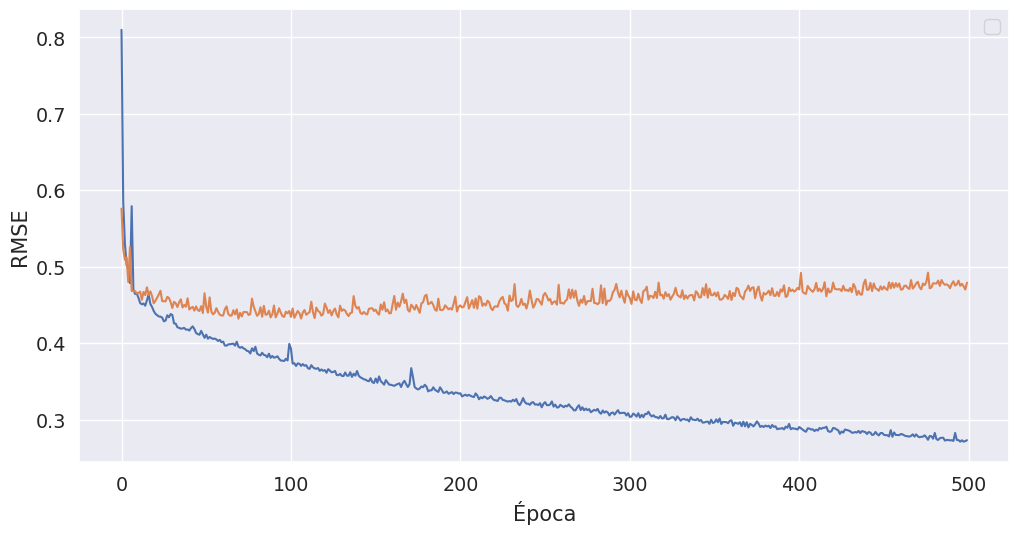

In [58]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

Aca ya directamente a partir de un punto empieza a desaprender las cosas útiles que aprendió.

Como podemos solucionar este problema? Qué métodos vimos para mejorar la generalización del modelo?

Probamos el método de [Dropout](https://keras.io/api/layers/regularization_layers/dropout/) primero con el modelo anterior con muchas neuronas:

In [59]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(8,)))
model.add(Dropout(0.25))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

In [60]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=500,
    validation_data=(X_validation.values, y_validation.values),
)

Train on 6000 samples, validate on 4000 samples
Epoch 1/500
  32/6000 [..............................] - ETA: 22s - loss: 1.1047

1696/6000 [=======>......................] - ETA: 0s - loss: 0.6836 

3392/6000 [===============>..............] - ETA: 0s - loss: 0.6303

5184/6000 [========================>.....] - ETA: 0s - loss: 0.5718

6000/6000 [==============================] - 0s 63us/step - loss: 0.5624 - val_loss: 0.3793


Epoch 2/500
  32/6000 [..............................] - ETA: 0s - loss: 0.9663

1760/6000 [=======>......................] - ETA: 0s - loss: 0.6619

3520/6000 [================>.............] - ETA: 0s - loss: 0.5676

5248/6000 [=========================>....] - ETA: 0s - loss: 0.7366

6000/6000 [==============================] - 0s 40us/step - loss: 0.6964 - val_loss: 0.3225


Epoch 3/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4819

1792/6000 [=======>......................] - ETA: 0s - loss: 0.3755

3552/6000 [================>.............] - ETA: 0s - loss: 0.4161

5344/6000 [=========================>....] - ETA: 0s - loss: 0.4384

6000/6000 [==============================] - 0s 39us/step - loss: 0.4275 - val_loss: 0.2951


Epoch 4/500
  32/6000 [..............................] - ETA: 0s - loss: 0.8096

1760/6000 [=======>......................] - ETA: 0s - loss: 0.3399

3488/6000 [================>.............] - ETA: 0s - loss: 0.3351

5216/6000 [=========================>....] - ETA: 0s - loss: 0.3416

6000/6000 [==============================] - 0s 40us/step - loss: 0.3429 - val_loss: 0.2802


Epoch 5/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5811

1760/6000 [=======>......................] - ETA: 0s - loss: 0.3271

3488/6000 [================>.............] - ETA: 0s - loss: 0.3137

5248/6000 [=========================>....] - ETA: 0s - loss: 0.3230

6000/6000 [==============================] - 0s 40us/step - loss: 0.3280 - val_loss: 0.2665


Epoch 6/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6631

1792/6000 [=======>......................] - ETA: 0s - loss: 0.3478

3552/6000 [================>.............] - ETA: 0s - loss: 0.3191

5280/6000 [=========================>....] - ETA: 0s - loss: 0.3169

6000/6000 [==============================] - 0s 40us/step - loss: 0.3176 - val_loss: 0.2546


Epoch 7/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2937

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2712

3552/6000 [================>.............] - ETA: 0s - loss: 0.2875

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2907

6000/6000 [==============================] - 0s 39us/step - loss: 0.3012 - val_loss: 0.2451


Epoch 8/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3338

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2752

3552/6000 [================>.............] - ETA: 0s - loss: 0.2746

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2960

6000/6000 [==============================] - 0s 39us/step - loss: 0.2932 - val_loss: 0.2396


Epoch 9/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2121

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2895

3584/6000 [================>.............] - ETA: 0s - loss: 0.2731

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2906

6000/6000 [==============================] - 0s 39us/step - loss: 0.3225 - val_loss: 0.2472


Epoch 10/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1548

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2646

3552/6000 [================>.............] - ETA: 0s - loss: 0.2834

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2911

6000/6000 [==============================] - 0s 39us/step - loss: 0.2912 - val_loss: 0.2393


Epoch 11/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1651

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2813

3584/6000 [================>.............] - ETA: 0s - loss: 0.2852

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2817

6000/6000 [==============================] - 0s 39us/step - loss: 0.2869 - val_loss: 0.2359


Epoch 12/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3744

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2410

3552/6000 [================>.............] - ETA: 0s - loss: 0.2542

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2660

6000/6000 [==============================] - 0s 40us/step - loss: 0.2689 - val_loss: 0.2308


Epoch 13/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1708

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2633

3584/6000 [================>.............] - ETA: 0s - loss: 0.2652

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2571

6000/6000 [==============================] - 0s 39us/step - loss: 0.2596 - val_loss: 0.2239


Epoch 14/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0891

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2502

3552/6000 [================>.............] - ETA: 0s - loss: 0.2609

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2653

6000/6000 [==============================] - 0s 38us/step - loss: 0.2646 - val_loss: 0.2310


Epoch 15/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4917

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2518

3584/6000 [================>.............] - ETA: 0s - loss: 0.2529

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2608

6000/6000 [==============================] - 0s 39us/step - loss: 0.2671 - val_loss: 0.2325


Epoch 16/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2545

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2715

3552/6000 [================>.............] - ETA: 0s - loss: 0.2586

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2496

6000/6000 [==============================] - 0s 40us/step - loss: 0.2564 - val_loss: 0.2316


Epoch 17/500
  32/6000 [..............................] - ETA: 0s - loss: 2.2640

1760/6000 [=======>......................] - ETA: 0s - loss: 0.3247

3552/6000 [================>.............] - ETA: 0s - loss: 0.2812

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2712

6000/6000 [==============================] - 0s 40us/step - loss: 0.2694 - val_loss: 0.2258


Epoch 18/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1979

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2330

3552/6000 [================>.............] - ETA: 0s - loss: 0.2351

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2465

6000/6000 [==============================] - 0s 39us/step - loss: 0.2498 - val_loss: 0.2223


Epoch 19/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1331

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2540

3552/6000 [================>.............] - ETA: 0s - loss: 0.2512

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2504

6000/6000 [==============================] - 0s 39us/step - loss: 0.2505 - val_loss: 0.2231


Epoch 20/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0991

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2517

3552/6000 [================>.............] - ETA: 0s - loss: 0.2461

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2479

6000/6000 [==============================] - 0s 40us/step - loss: 0.2472 - val_loss: 0.2192


Epoch 21/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3235

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2650

3584/6000 [================>.............] - ETA: 0s - loss: 0.2594

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2544

6000/6000 [==============================] - 0s 39us/step - loss: 0.2534 - val_loss: 0.2174


Epoch 22/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1782

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2378

3584/6000 [================>.............] - ETA: 0s - loss: 0.2447

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2486

6000/6000 [==============================] - 0s 39us/step - loss: 0.2460 - val_loss: 0.2148


Epoch 23/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1020

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2337

3552/6000 [================>.............] - ETA: 0s - loss: 0.2477

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2427

6000/6000 [==============================] - 0s 39us/step - loss: 0.2460 - val_loss: 0.2185


Epoch 24/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3464

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2399

3584/6000 [================>.............] - ETA: 0s - loss: 0.2349

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2430

6000/6000 [==============================] - 0s 39us/step - loss: 0.2443 - val_loss: 0.2169


Epoch 25/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2894

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2468

3552/6000 [================>.............] - ETA: 0s - loss: 0.2452

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2502

6000/6000 [==============================] - 0s 40us/step - loss: 0.2513 - val_loss: 0.2214


Epoch 26/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1510

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2544

3584/6000 [================>.............] - ETA: 0s - loss: 0.2450

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2377

6000/6000 [==============================] - 0s 40us/step - loss: 0.2374 - val_loss: 0.2142


Epoch 27/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2396

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2309

3488/6000 [================>.............] - ETA: 0s - loss: 0.2422

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2425

6000/6000 [==============================] - 0s 40us/step - loss: 0.2421 - val_loss: 0.2225


Epoch 28/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1900

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2357

3584/6000 [================>.............] - ETA: 0s - loss: 0.2334

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2380

6000/6000 [==============================] - 0s 39us/step - loss: 0.2407 - val_loss: 0.2149


Epoch 29/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2714

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1983

3552/6000 [================>.............] - ETA: 0s - loss: 0.2248

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2313

6000/6000 [==============================] - 0s 39us/step - loss: 0.2360 - val_loss: 0.2104


Epoch 30/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2649

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2488

3584/6000 [================>.............] - ETA: 0s - loss: 0.2512

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2432

6000/6000 [==============================] - 0s 39us/step - loss: 0.2419 - val_loss: 0.2148


Epoch 31/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2622

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2389

3552/6000 [================>.............] - ETA: 0s - loss: 0.2545

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2415

6000/6000 [==============================] - 0s 40us/step - loss: 0.2433 - val_loss: 0.2120


Epoch 32/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3136

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2347

3616/6000 [=================>............] - ETA: 0s - loss: 0.2395

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2342

6000/6000 [==============================] - 0s 39us/step - loss: 0.2333 - val_loss: 0.2063


Epoch 33/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1785

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2460

3552/6000 [================>.............] - ETA: 0s - loss: 0.2358

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2330

6000/6000 [==============================] - 0s 39us/step - loss: 0.2356 - val_loss: 0.2095


Epoch 34/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4180

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2634

3584/6000 [================>.............] - ETA: 0s - loss: 0.2392

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2351

6000/6000 [==============================] - 0s 39us/step - loss: 0.2355 - val_loss: 0.2073


Epoch 35/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1416

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2364

3520/6000 [================>.............] - ETA: 0s - loss: 0.2342

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2291

6000/6000 [==============================] - 0s 40us/step - loss: 0.2289 - val_loss: 0.2144


Epoch 36/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2741

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2155

3616/6000 [=================>............] - ETA: 0s - loss: 0.2286

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2299

6000/6000 [==============================] - 0s 39us/step - loss: 0.2312 - val_loss: 0.2083


Epoch 37/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2320

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2274

3552/6000 [================>.............] - ETA: 0s - loss: 0.2306

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2258

6000/6000 [==============================] - 0s 39us/step - loss: 0.2267 - val_loss: 0.2117


Epoch 38/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1875

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2237

3616/6000 [=================>............] - ETA: 0s - loss: 0.2148

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2251

6000/6000 [==============================] - 0s 39us/step - loss: 0.2245 - val_loss: 0.2058


Epoch 39/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2709

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2316

3424/6000 [================>.............] - ETA: 0s - loss: 0.2342

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2358

6000/6000 [==============================] - 0s 40us/step - loss: 0.2334 - val_loss: 0.2060


Epoch 40/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0680

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2265

3552/6000 [================>.............] - ETA: 0s - loss: 0.2171

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2205

6000/6000 [==============================] - 0s 40us/step - loss: 0.2274 - val_loss: 0.2088


Epoch 41/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1948

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2435

3520/6000 [================>.............] - ETA: 0s - loss: 0.2301

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2279

6000/6000 [==============================] - 0s 40us/step - loss: 0.2282 - val_loss: 0.2052


Epoch 42/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1553

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2265

3520/6000 [================>.............] - ETA: 0s - loss: 0.2321

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2267

6000/6000 [==============================] - 0s 40us/step - loss: 0.2265 - val_loss: 0.2073


Epoch 43/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1784

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2112

3552/6000 [================>.............] - ETA: 0s - loss: 0.2206

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2292

6000/6000 [==============================] - 0s 39us/step - loss: 0.2249 - val_loss: 0.2063


Epoch 44/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1780

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2293

3552/6000 [================>.............] - ETA: 0s - loss: 0.2281

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2244

6000/6000 [==============================] - 0s 39us/step - loss: 0.2268 - val_loss: 0.2119


Epoch 45/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2755

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2335

3584/6000 [================>.............] - ETA: 0s - loss: 0.2216

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2210

6000/6000 [==============================] - 0s 40us/step - loss: 0.2233 - val_loss: 0.2038


Epoch 46/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2058

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2236

3584/6000 [================>.............] - ETA: 0s - loss: 0.2253

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2211

6000/6000 [==============================] - 0s 39us/step - loss: 0.2245 - val_loss: 0.2055


Epoch 47/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0948

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2193

3552/6000 [================>.............] - ETA: 0s - loss: 0.2103

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2199

6000/6000 [==============================] - 0s 40us/step - loss: 0.2202 - val_loss: 0.2017


Epoch 48/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1275

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2225

3552/6000 [================>.............] - ETA: 0s - loss: 0.2140

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2206

6000/6000 [==============================] - 0s 40us/step - loss: 0.2182 - val_loss: 0.2064


Epoch 49/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1690

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2248

3552/6000 [================>.............] - ETA: 0s - loss: 0.2298

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2267

6000/6000 [==============================] - 0s 40us/step - loss: 0.2288 - val_loss: 0.2039


Epoch 50/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2597

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2200

3552/6000 [================>.............] - ETA: 0s - loss: 0.2226

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2225

6000/6000 [==============================] - 0s 40us/step - loss: 0.2226 - val_loss: 0.2049


Epoch 51/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2575

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2214

3552/6000 [================>.............] - ETA: 0s - loss: 0.2260

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2245

6000/6000 [==============================] - 0s 39us/step - loss: 0.2235 - val_loss: 0.2003


Epoch 52/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2565

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2069

3520/6000 [================>.............] - ETA: 0s - loss: 0.2088

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2173

6000/6000 [==============================] - 0s 40us/step - loss: 0.2210 - val_loss: 0.2023


Epoch 53/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3293

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2329

3584/6000 [================>.............] - ETA: 0s - loss: 0.2347

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2283

6000/6000 [==============================] - 0s 39us/step - loss: 0.2240 - val_loss: 0.2061


Epoch 54/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1428

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2199

3552/6000 [================>.............] - ETA: 0s - loss: 0.2211

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2188

6000/6000 [==============================] - 0s 39us/step - loss: 0.2175 - val_loss: 0.2004


Epoch 55/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2497

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2225

3552/6000 [================>.............] - ETA: 0s - loss: 0.2232

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2254

6000/6000 [==============================] - 0s 39us/step - loss: 0.2226 - val_loss: 0.2006


Epoch 56/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1651

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2026

3552/6000 [================>.............] - ETA: 0s - loss: 0.2145

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2193

6000/6000 [==============================] - 0s 39us/step - loss: 0.2175 - val_loss: 0.2017


Epoch 57/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1083

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2105

3552/6000 [================>.............] - ETA: 0s - loss: 0.2052

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2133

6000/6000 [==============================] - 0s 39us/step - loss: 0.2161 - val_loss: 0.2066


Epoch 58/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1681

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2141

3552/6000 [================>.............] - ETA: 0s - loss: 0.2160

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2162

6000/6000 [==============================] - 0s 39us/step - loss: 0.2149 - val_loss: 0.2038


Epoch 59/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5249

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2328

3584/6000 [================>.............] - ETA: 0s - loss: 0.2277

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2232

6000/6000 [==============================] - 0s 40us/step - loss: 0.2205 - val_loss: 0.2008


Epoch 60/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1300

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2156

3520/6000 [================>.............] - ETA: 0s - loss: 0.2150

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2166

6000/6000 [==============================] - 0s 39us/step - loss: 0.2155 - val_loss: 0.2010


Epoch 61/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1572

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2166

3584/6000 [================>.............] - ETA: 0s - loss: 0.2117

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2113

6000/6000 [==============================] - 0s 39us/step - loss: 0.2169 - val_loss: 0.2212


Epoch 62/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2078

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2087

3584/6000 [================>.............] - ETA: 0s - loss: 0.2158

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2208

6000/6000 [==============================] - 0s 39us/step - loss: 0.2217 - val_loss: 0.2001


Epoch 63/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1897

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2356

3552/6000 [================>.............] - ETA: 0s - loss: 0.2174

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2220

6000/6000 [==============================] - 0s 40us/step - loss: 0.2191 - val_loss: 0.2041


Epoch 64/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2250

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2081

3616/6000 [=================>............] - ETA: 0s - loss: 0.2150

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2186

6000/6000 [==============================] - 0s 39us/step - loss: 0.2159 - val_loss: 0.2014


Epoch 65/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2510

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2136

3520/6000 [================>.............] - ETA: 0s - loss: 0.2200

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2248

6000/6000 [==============================] - 0s 39us/step - loss: 0.2208 - val_loss: 0.2008


Epoch 66/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2005

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2114

3552/6000 [================>.............] - ETA: 0s - loss: 0.2196

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2225

6000/6000 [==============================] - 0s 39us/step - loss: 0.2167 - val_loss: 0.1981


Epoch 67/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0751

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2191

3552/6000 [================>.............] - ETA: 0s - loss: 0.2137

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2142

6000/6000 [==============================] - 0s 40us/step - loss: 0.2136 - val_loss: 0.1967


Epoch 68/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1446

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2030

3520/6000 [================>.............] - ETA: 0s - loss: 0.2124

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2169

6000/6000 [==============================] - 0s 40us/step - loss: 0.2103 - val_loss: 0.1984


Epoch 69/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4187

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2143

3520/6000 [================>.............] - ETA: 0s - loss: 0.2072

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2081

6000/6000 [==============================] - 0s 39us/step - loss: 0.2123 - val_loss: 0.1957


Epoch 70/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1037

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2029

3616/6000 [=================>............] - ETA: 0s - loss: 0.2121

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2103

6000/6000 [==============================] - 0s 39us/step - loss: 0.2103 - val_loss: 0.2026


Epoch 71/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1242

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2110

3584/6000 [================>.............] - ETA: 0s - loss: 0.2181

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2157

6000/6000 [==============================] - 0s 39us/step - loss: 0.2162 - val_loss: 0.1977


Epoch 72/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2953

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2142

3584/6000 [================>.............] - ETA: 0s - loss: 0.2076

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2106

6000/6000 [==============================] - 0s 39us/step - loss: 0.2143 - val_loss: 0.2090


Epoch 73/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1846

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2192

3584/6000 [================>.............] - ETA: 0s - loss: 0.2173

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2140

6000/6000 [==============================] - 0s 39us/step - loss: 0.2096 - val_loss: 0.2032


Epoch 74/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3091

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2307

3552/6000 [================>.............] - ETA: 0s - loss: 0.2225

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2163

6000/6000 [==============================] - 0s 39us/step - loss: 0.2147 - val_loss: 0.1997


Epoch 75/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1157

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2026

3616/6000 [=================>............] - ETA: 0s - loss: 0.2159

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2112

6000/6000 [==============================] - 0s 39us/step - loss: 0.2136 - val_loss: 0.2013


Epoch 76/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4335

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2478

3552/6000 [================>.............] - ETA: 0s - loss: 0.2209

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2125

6000/6000 [==============================] - 0s 39us/step - loss: 0.2125 - val_loss: 0.2019


Epoch 77/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1339

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2123

3552/6000 [================>.............] - ETA: 0s - loss: 0.2029

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2071

6000/6000 [==============================] - 0s 39us/step - loss: 0.2074 - val_loss: 0.1963


Epoch 78/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1096

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2048

3552/6000 [================>.............] - ETA: 0s - loss: 0.2194

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2104

6000/6000 [==============================] - 0s 39us/step - loss: 0.2077 - val_loss: 0.2020


Epoch 79/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2783

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2061

3584/6000 [================>.............] - ETA: 0s - loss: 0.2125

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2059

6000/6000 [==============================] - 0s 39us/step - loss: 0.2083 - val_loss: 0.1981


Epoch 80/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2129

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2038

3584/6000 [================>.............] - ETA: 0s - loss: 0.2120

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2146

6000/6000 [==============================] - 0s 39us/step - loss: 0.2119 - val_loss: 0.1961


Epoch 81/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1733

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2118

3552/6000 [================>.............] - ETA: 0s - loss: 0.2175

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2113

6000/6000 [==============================] - 0s 39us/step - loss: 0.2128 - val_loss: 0.1938


Epoch 82/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1422

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2248

3552/6000 [================>.............] - ETA: 0s - loss: 0.2120

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2131

6000/6000 [==============================] - 0s 40us/step - loss: 0.2128 - val_loss: 0.1987


Epoch 83/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2443

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2175

3584/6000 [================>.............] - ETA: 0s - loss: 0.2165

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2087

6000/6000 [==============================] - 0s 39us/step - loss: 0.2091 - val_loss: 0.1968


Epoch 84/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1532

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1955

3520/6000 [================>.............] - ETA: 0s - loss: 0.1960

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2082

6000/6000 [==============================] - 0s 39us/step - loss: 0.2068 - val_loss: 0.1971


Epoch 85/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1370

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2052

3584/6000 [================>.............] - ETA: 0s - loss: 0.2098

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2089

6000/6000 [==============================] - 0s 39us/step - loss: 0.2084 - val_loss: 0.1986


Epoch 86/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1248

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1822

3552/6000 [================>.............] - ETA: 0s - loss: 0.1983

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2002

6000/6000 [==============================] - 0s 39us/step - loss: 0.2034 - val_loss: 0.1975


Epoch 87/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1602

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2214

3584/6000 [================>.............] - ETA: 0s - loss: 0.2092

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2086

6000/6000 [==============================] - 0s 39us/step - loss: 0.2088 - val_loss: 0.1946


Epoch 88/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0727

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2133

3552/6000 [================>.............] - ETA: 0s - loss: 0.2173

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2167

6000/6000 [==============================] - 0s 39us/step - loss: 0.2123 - val_loss: 0.1957


Epoch 89/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3261

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2057

3552/6000 [================>.............] - ETA: 0s - loss: 0.2072

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2098

6000/6000 [==============================] - 0s 39us/step - loss: 0.2062 - val_loss: 0.1951


Epoch 90/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1160

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1923

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2010

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2055

6000/6000 [==============================] - 0s 40us/step - loss: 0.2064 - val_loss: 0.1950


Epoch 91/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1079

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2133

3584/6000 [================>.............] - ETA: 0s - loss: 0.2131

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2042

6000/6000 [==============================] - 0s 39us/step - loss: 0.2064 - val_loss: 0.2023


Epoch 92/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2204

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2037

3552/6000 [================>.............] - ETA: 0s - loss: 0.2027

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2076

6000/6000 [==============================] - 0s 39us/step - loss: 0.2054 - val_loss: 0.1949


Epoch 93/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1326

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2051

3552/6000 [================>.............] - ETA: 0s - loss: 0.2060

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2051

6000/6000 [==============================] - 0s 39us/step - loss: 0.2014 - val_loss: 0.1936


Epoch 94/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1361

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2009

3552/6000 [================>.............] - ETA: 0s - loss: 0.2039

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2049

6000/6000 [==============================] - 0s 39us/step - loss: 0.2054 - val_loss: 0.1981


Epoch 95/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2294

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2509

3520/6000 [================>.............] - ETA: 0s - loss: 0.2298

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2170

6000/6000 [==============================] - 0s 39us/step - loss: 0.2141 - val_loss: 0.1939


Epoch 96/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1101

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2071

3520/6000 [================>.............] - ETA: 0s - loss: 0.1953

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2080

6000/6000 [==============================] - 0s 40us/step - loss: 0.2048 - val_loss: 0.1955


Epoch 97/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2014

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1837

3584/6000 [================>.............] - ETA: 0s - loss: 0.1955

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2061

6000/6000 [==============================] - 0s 39us/step - loss: 0.2035 - val_loss: 0.1951


Epoch 98/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3081

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2022

3552/6000 [================>.............] - ETA: 0s - loss: 0.2082

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2094

6000/6000 [==============================] - 0s 39us/step - loss: 0.2071 - val_loss: 0.1911


Epoch 99/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3534

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2103

3584/6000 [================>.............] - ETA: 0s - loss: 0.2152

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2089

6000/6000 [==============================] - 0s 39us/step - loss: 0.2045 - val_loss: 0.1927


Epoch 100/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1374

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2113

3648/6000 [=================>............] - ETA: 0s - loss: 0.2113

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2039

6000/6000 [==============================] - 0s 39us/step - loss: 0.2026 - val_loss: 0.1943


Epoch 101/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2293

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1993

3584/6000 [================>.............] - ETA: 0s - loss: 0.2023

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2106

6000/6000 [==============================] - 0s 39us/step - loss: 0.2086 - val_loss: 0.1911


Epoch 102/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0933

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2042

3584/6000 [================>.............] - ETA: 0s - loss: 0.2014

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2046

6000/6000 [==============================] - 0s 40us/step - loss: 0.2058 - val_loss: 0.1921


Epoch 103/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1821

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1804

3520/6000 [================>.............] - ETA: 0s - loss: 0.1912

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2026

6000/6000 [==============================] - 0s 39us/step - loss: 0.2045 - val_loss: 0.1983


Epoch 104/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1419

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2050

3552/6000 [================>.............] - ETA: 0s - loss: 0.2006

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2027

6000/6000 [==============================] - 0s 39us/step - loss: 0.2044 - val_loss: 0.1930


Epoch 105/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1068

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1949

3552/6000 [================>.............] - ETA: 0s - loss: 0.2129

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2111

6000/6000 [==============================] - 0s 39us/step - loss: 0.2096 - val_loss: 0.1975


Epoch 106/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1176

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1861

3584/6000 [================>.............] - ETA: 0s - loss: 0.1953

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1991

6000/6000 [==============================] - 0s 38us/step - loss: 0.2005 - val_loss: 0.1933


Epoch 107/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3330

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1960

3616/6000 [=================>............] - ETA: 0s - loss: 0.1986

5408/6000 [==========================>...] - ETA: 0s - loss: 0.2022

6000/6000 [==============================] - 0s 39us/step - loss: 0.2045 - val_loss: 0.1958


Epoch 108/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3934

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2122

3584/6000 [================>.............] - ETA: 0s - loss: 0.2009

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2057

6000/6000 [==============================] - 0s 39us/step - loss: 0.2027 - val_loss: 0.1941


Epoch 109/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2736

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2101

3552/6000 [================>.............] - ETA: 0s - loss: 0.1972

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2052

6000/6000 [==============================] - 0s 39us/step - loss: 0.2045 - val_loss: 0.1921


Epoch 110/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2309

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2186

3584/6000 [================>.............] - ETA: 0s - loss: 0.2081

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2011

6000/6000 [==============================] - 0s 39us/step - loss: 0.2034 - val_loss: 0.1930


Epoch 111/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1585

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2225

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2196

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2113

6000/6000 [==============================] - 0s 40us/step - loss: 0.2133 - val_loss: 0.1969


Epoch 112/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1335

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1913

3552/6000 [================>.............] - ETA: 0s - loss: 0.2019

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2029

6000/6000 [==============================] - 0s 39us/step - loss: 0.2016 - val_loss: 0.1942


Epoch 113/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1316

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1932

3584/6000 [================>.............] - ETA: 0s - loss: 0.1988

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1984

6000/6000 [==============================] - 0s 39us/step - loss: 0.2012 - val_loss: 0.1956


Epoch 114/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2747

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1819

3584/6000 [================>.............] - ETA: 0s - loss: 0.2086

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2033

6000/6000 [==============================] - 0s 39us/step - loss: 0.2045 - val_loss: 0.1930


Epoch 115/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3252

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1886

3584/6000 [================>.............] - ETA: 0s - loss: 0.2027

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2019

6000/6000 [==============================] - 0s 40us/step - loss: 0.2009 - val_loss: 0.1938


Epoch 116/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1640

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1998

3584/6000 [================>.............] - ETA: 0s - loss: 0.2061

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1951

6000/6000 [==============================] - 0s 39us/step - loss: 0.1972 - val_loss: 0.1949


Epoch 117/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1233

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1881

3584/6000 [================>.............] - ETA: 0s - loss: 0.2012

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1988

6000/6000 [==============================] - 0s 39us/step - loss: 0.1987 - val_loss: 0.1917


Epoch 118/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1232

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1864

3584/6000 [================>.............] - ETA: 0s - loss: 0.1956

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1982

6000/6000 [==============================] - 0s 39us/step - loss: 0.1998 - val_loss: 0.1906


Epoch 119/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1484

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1853

3584/6000 [================>.............] - ETA: 0s - loss: 0.1992

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1961

6000/6000 [==============================] - 0s 40us/step - loss: 0.1990 - val_loss: 0.1972


Epoch 120/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2035

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2064

3552/6000 [================>.............] - ETA: 0s - loss: 0.2030

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1997

6000/6000 [==============================] - 0s 39us/step - loss: 0.1985 - val_loss: 0.1913


Epoch 121/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2747

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1932

3584/6000 [================>.............] - ETA: 0s - loss: 0.1935

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1973

6000/6000 [==============================] - 0s 39us/step - loss: 0.1970 - val_loss: 0.1935


Epoch 122/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2406

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2057

3584/6000 [================>.............] - ETA: 0s - loss: 0.2049

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1980

6000/6000 [==============================] - 0s 39us/step - loss: 0.1951 - val_loss: 0.1951


Epoch 123/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2297

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2106

3584/6000 [================>.............] - ETA: 0s - loss: 0.2019

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2063

6000/6000 [==============================] - 0s 39us/step - loss: 0.2010 - val_loss: 0.1942


Epoch 124/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1657

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1853

3584/6000 [================>.............] - ETA: 0s - loss: 0.1993

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1985

6000/6000 [==============================] - 0s 38us/step - loss: 0.1990 - val_loss: 0.1898


Epoch 125/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1302

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1954

3616/6000 [=================>............] - ETA: 0s - loss: 0.1939

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1944

6000/6000 [==============================] - 0s 38us/step - loss: 0.1961 - val_loss: 0.1891


Epoch 126/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2308

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1745

3552/6000 [================>.............] - ETA: 0s - loss: 0.1851

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1873

6000/6000 [==============================] - 0s 39us/step - loss: 0.1964 - val_loss: 0.2003


Epoch 127/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2045

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1914

3616/6000 [=================>............] - ETA: 0s - loss: 0.1977

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1987

6000/6000 [==============================] - 0s 39us/step - loss: 0.1997 - val_loss: 0.1913


Epoch 128/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1545

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1991

3584/6000 [================>.............] - ETA: 0s - loss: 0.2016

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1985

6000/6000 [==============================] - 0s 39us/step - loss: 0.1978 - val_loss: 0.1938


Epoch 129/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1012

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1820

3584/6000 [================>.............] - ETA: 0s - loss: 0.2008

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2035

6000/6000 [==============================] - 0s 39us/step - loss: 0.2028 - val_loss: 0.1930


Epoch 130/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1386

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1883

3552/6000 [================>.............] - ETA: 0s - loss: 0.1943

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1943

6000/6000 [==============================] - 0s 39us/step - loss: 0.1964 - val_loss: 0.1910


Epoch 131/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2671

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1875

3584/6000 [================>.............] - ETA: 0s - loss: 0.1954

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2019

6000/6000 [==============================] - 0s 39us/step - loss: 0.1996 - val_loss: 0.1877


Epoch 132/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1921

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1775

3584/6000 [================>.............] - ETA: 0s - loss: 0.1888

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1922

6000/6000 [==============================] - 0s 39us/step - loss: 0.1948 - val_loss: 0.1891


Epoch 133/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1190

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1833

3552/6000 [================>.............] - ETA: 0s - loss: 0.1982

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1969

6000/6000 [==============================] - 0s 39us/step - loss: 0.1982 - val_loss: 0.1913


Epoch 134/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4528

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2035

3552/6000 [================>.............] - ETA: 0s - loss: 0.2053

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2033

6000/6000 [==============================] - 0s 39us/step - loss: 0.1986 - val_loss: 0.1888


Epoch 135/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1354

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2022

3552/6000 [================>.............] - ETA: 0s - loss: 0.1992

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1985

6000/6000 [==============================] - 0s 40us/step - loss: 0.1996 - val_loss: 0.1936


Epoch 136/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3516

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1993

3552/6000 [================>.............] - ETA: 0s - loss: 0.1967

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1960

6000/6000 [==============================] - 0s 39us/step - loss: 0.1976 - val_loss: 0.1916


Epoch 137/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1907

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2016

3616/6000 [=================>............] - ETA: 0s - loss: 0.1920

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1955

6000/6000 [==============================] - 0s 39us/step - loss: 0.1926 - val_loss: 0.1908


Epoch 138/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1689

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1915

3648/6000 [=================>............] - ETA: 0s - loss: 0.1917

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1891

6000/6000 [==============================] - 0s 39us/step - loss: 0.1913 - val_loss: 0.1906


Epoch 139/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2208

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1940

3584/6000 [================>.............] - ETA: 0s - loss: 0.1980

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1938

6000/6000 [==============================] - 0s 39us/step - loss: 0.1920 - val_loss: 0.1900


Epoch 140/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1509

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1899

3584/6000 [================>.............] - ETA: 0s - loss: 0.1840

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1938

6000/6000 [==============================] - 0s 39us/step - loss: 0.1912 - val_loss: 0.1886


Epoch 141/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2289

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1888

3456/6000 [================>.............] - ETA: 0s - loss: 0.1960

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1994

6000/6000 [==============================] - 0s 40us/step - loss: 0.1995 - val_loss: 0.1896


Epoch 142/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1208

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2087

3584/6000 [================>.............] - ETA: 0s - loss: 0.2070

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2014

6000/6000 [==============================] - 0s 39us/step - loss: 0.1984 - val_loss: 0.1924


Epoch 143/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1024

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1838

3584/6000 [================>.............] - ETA: 0s - loss: 0.1960

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1973

6000/6000 [==============================] - 0s 39us/step - loss: 0.1976 - val_loss: 0.1885


Epoch 144/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1659

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2075

3552/6000 [================>.............] - ETA: 0s - loss: 0.1962

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1955

6000/6000 [==============================] - 0s 39us/step - loss: 0.1940 - val_loss: 0.1910


Epoch 145/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1196

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1901

3584/6000 [================>.............] - ETA: 0s - loss: 0.1847

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1862

6000/6000 [==============================] - 0s 39us/step - loss: 0.1923 - val_loss: 0.1886


Epoch 146/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3588

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1929

3584/6000 [================>.............] - ETA: 0s - loss: 0.1908

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1935

6000/6000 [==============================] - 0s 39us/step - loss: 0.1929 - val_loss: 0.1890


Epoch 147/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0860

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1949

3552/6000 [================>.............] - ETA: 0s - loss: 0.1941

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1907

6000/6000 [==============================] - 0s 39us/step - loss: 0.1893 - val_loss: 0.1915


Epoch 148/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3109

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1912

3520/6000 [================>.............] - ETA: 0s - loss: 0.2002

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1976

6000/6000 [==============================] - 0s 40us/step - loss: 0.1980 - val_loss: 0.1886


Epoch 149/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1122

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1866

3584/6000 [================>.............] - ETA: 0s - loss: 0.1950

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1992

6000/6000 [==============================] - 0s 39us/step - loss: 0.1977 - val_loss: 0.1895


Epoch 150/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0856

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1811

3616/6000 [=================>............] - ETA: 0s - loss: 0.1866

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1897

6000/6000 [==============================] - 0s 39us/step - loss: 0.1924 - val_loss: 0.1955


Epoch 151/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0962

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1778

3552/6000 [================>.............] - ETA: 0s - loss: 0.1882

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1901

6000/6000 [==============================] - 0s 38us/step - loss: 0.1948 - val_loss: 0.1913


Epoch 152/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1318

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1791

3616/6000 [=================>............] - ETA: 0s - loss: 0.1905

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1939

6000/6000 [==============================] - 0s 39us/step - loss: 0.1937 - val_loss: 0.1879


Epoch 153/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1994

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1859

3584/6000 [================>.............] - ETA: 0s - loss: 0.1974

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1983

6000/6000 [==============================] - 0s 39us/step - loss: 0.1988 - val_loss: 0.1888


Epoch 154/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2863

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1981

3552/6000 [================>.............] - ETA: 0s - loss: 0.1927

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1937

6000/6000 [==============================] - 0s 40us/step - loss: 0.1952 - val_loss: 0.1892


Epoch 155/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1800

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1849

3616/6000 [=================>............] - ETA: 0s - loss: 0.1858

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1872

6000/6000 [==============================] - 0s 39us/step - loss: 0.1899 - val_loss: 0.1895


Epoch 156/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5162

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1875

3648/6000 [=================>............] - ETA: 0s - loss: 0.1923

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1952

6000/6000 [==============================] - 0s 39us/step - loss: 0.1943 - val_loss: 0.1962


Epoch 157/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1522

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1840

3584/6000 [================>.............] - ETA: 0s - loss: 0.1895

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1952

6000/6000 [==============================] - 0s 38us/step - loss: 0.1957 - val_loss: 0.1941


Epoch 158/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1139

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2028

3648/6000 [=================>............] - ETA: 0s - loss: 0.2083

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1953

6000/6000 [==============================] - 0s 38us/step - loss: 0.1933 - val_loss: 0.1905


Epoch 159/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2349

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1846

3584/6000 [================>.............] - ETA: 0s - loss: 0.1908

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1935

6000/6000 [==============================] - 0s 39us/step - loss: 0.1925 - val_loss: 0.1896


Epoch 160/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3471

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1948

3584/6000 [================>.............] - ETA: 0s - loss: 0.1902

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1928

6000/6000 [==============================] - 0s 38us/step - loss: 0.1948 - val_loss: 0.1905


Epoch 161/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1299

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1847

3648/6000 [=================>............] - ETA: 0s - loss: 0.1980

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1927

6000/6000 [==============================] - 0s 39us/step - loss: 0.1929 - val_loss: 0.1949


Epoch 162/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1804

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1811

3680/6000 [=================>............] - ETA: 0s - loss: 0.1928

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1978

6000/6000 [==============================] - 0s 38us/step - loss: 0.1970 - val_loss: 0.1892


Epoch 163/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1679

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1867

3648/6000 [=================>............] - ETA: 0s - loss: 0.1931

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1931

6000/6000 [==============================] - 0s 39us/step - loss: 0.1936 - val_loss: 0.1943


Epoch 164/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1300

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1830

3616/6000 [=================>............] - ETA: 0s - loss: 0.1917

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1937

6000/6000 [==============================] - 0s 39us/step - loss: 0.1918 - val_loss: 0.1866


Epoch 165/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1123

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1880

3648/6000 [=================>............] - ETA: 0s - loss: 0.1912

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1886

6000/6000 [==============================] - 0s 39us/step - loss: 0.1894 - val_loss: 0.1884


Epoch 166/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2268

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1859

3616/6000 [=================>............] - ETA: 0s - loss: 0.1866

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1958

6000/6000 [==============================] - 0s 39us/step - loss: 0.1927 - val_loss: 0.1907


Epoch 167/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1936

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1768

3520/6000 [================>.............] - ETA: 0s - loss: 0.1849

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1914

6000/6000 [==============================] - 0s 39us/step - loss: 0.1899 - val_loss: 0.1885


Epoch 168/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1720

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1986

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1916

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1921

6000/6000 [==============================] - 0s 40us/step - loss: 0.1936 - val_loss: 0.1903


Epoch 169/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2015

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1896

3744/6000 [=================>............] - ETA: 0s - loss: 0.1946

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1911

6000/6000 [==============================] - 0s 38us/step - loss: 0.1919 - val_loss: 0.1902


Epoch 170/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3092

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1676

3648/6000 [=================>............] - ETA: 0s - loss: 0.1803

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1867

6000/6000 [==============================] - 0s 39us/step - loss: 0.1913 - val_loss: 0.1880


Epoch 171/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2332

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1892

3712/6000 [=================>............] - ETA: 0s - loss: 0.2059

5600/6000 [===========================>..] - ETA: 0s - loss: 0.2022

6000/6000 [==============================] - 0s 37us/step - loss: 0.2015 - val_loss: 0.1882


Epoch 172/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2354

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1987

3744/6000 [=================>............] - ETA: 0s - loss: 0.1959

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1949

6000/6000 [==============================] - 0s 37us/step - loss: 0.1928 - val_loss: 0.1919


Epoch 173/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1837

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1857

3680/6000 [=================>............] - ETA: 0s - loss: 0.1844

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1928

6000/6000 [==============================] - 0s 38us/step - loss: 0.1911 - val_loss: 0.1899


Epoch 174/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1375

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1878

3744/6000 [=================>............] - ETA: 0s - loss: 0.1893

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1883

6000/6000 [==============================] - 0s 37us/step - loss: 0.1874 - val_loss: 0.1842


Epoch 175/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1280

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1919

3648/6000 [=================>............] - ETA: 0s - loss: 0.1925

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1928

6000/6000 [==============================] - 0s 39us/step - loss: 0.1920 - val_loss: 0.1895


Epoch 176/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1265

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1851

3712/6000 [=================>............] - ETA: 0s - loss: 0.1853

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1872

6000/6000 [==============================] - 0s 38us/step - loss: 0.1870 - val_loss: 0.1875


Epoch 177/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2173

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1930

3744/6000 [=================>............] - ETA: 0s - loss: 0.1931

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1923

6000/6000 [==============================] - 0s 37us/step - loss: 0.1936 - val_loss: 0.1926


Epoch 178/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2219

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2054

3744/6000 [=================>............] - ETA: 0s - loss: 0.1952

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1907

6000/6000 [==============================] - 0s 38us/step - loss: 0.1889 - val_loss: 0.1886


Epoch 179/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2338

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1829

3776/6000 [=================>............] - ETA: 0s - loss: 0.1882

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1877

6000/6000 [==============================] - 0s 37us/step - loss: 0.1895 - val_loss: 0.1868


Epoch 180/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1853

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1931

3712/6000 [=================>............] - ETA: 0s - loss: 0.1887

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1876

6000/6000 [==============================] - 0s 38us/step - loss: 0.1882 - val_loss: 0.1865


Epoch 181/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1774

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1757

3680/6000 [=================>............] - ETA: 0s - loss: 0.1894

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1919

6000/6000 [==============================] - 0s 38us/step - loss: 0.1886 - val_loss: 0.1859


Epoch 182/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0468

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2119

3712/6000 [=================>............] - ETA: 0s - loss: 0.1982

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1919

6000/6000 [==============================] - 0s 38us/step - loss: 0.1909 - val_loss: 0.1842


Epoch 183/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1251

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1838

3744/6000 [=================>............] - ETA: 0s - loss: 0.1820

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1862

6000/6000 [==============================] - 0s 38us/step - loss: 0.1879 - val_loss: 0.1879


Epoch 184/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2141

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1897

3744/6000 [=================>............] - ETA: 0s - loss: 0.1890

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1908

6000/6000 [==============================] - 0s 38us/step - loss: 0.1895 - val_loss: 0.1856


Epoch 185/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2670

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1859

3680/6000 [=================>............] - ETA: 0s - loss: 0.1896

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1869

6000/6000 [==============================] - 0s 38us/step - loss: 0.1855 - val_loss: 0.1892


Epoch 186/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2580

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1907

3680/6000 [=================>............] - ETA: 0s - loss: 0.1900

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1913

6000/6000 [==============================] - 0s 38us/step - loss: 0.1911 - val_loss: 0.1857


Epoch 187/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1544

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1936

3744/6000 [=================>............] - ETA: 0s - loss: 0.2008

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1926

6000/6000 [==============================] - 0s 38us/step - loss: 0.1923 - val_loss: 0.1877


Epoch 188/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2815

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1760

3744/6000 [=================>............] - ETA: 0s - loss: 0.1797

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1887

6000/6000 [==============================] - 0s 37us/step - loss: 0.1881 - val_loss: 0.1910


Epoch 189/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6227

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1854

3680/6000 [=================>............] - ETA: 0s - loss: 0.1778

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1828

6000/6000 [==============================] - 0s 38us/step - loss: 0.1846 - val_loss: 0.1913


Epoch 190/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1333

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1999

3776/6000 [=================>............] - ETA: 0s - loss: 0.1953

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1877

6000/6000 [==============================] - 0s 38us/step - loss: 0.1866 - val_loss: 0.1881


Epoch 191/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1577

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1922

3712/6000 [=================>............] - ETA: 0s - loss: 0.1844

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1909

6000/6000 [==============================] - 0s 38us/step - loss: 0.1892 - val_loss: 0.1909


Epoch 192/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1560

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1784

3744/6000 [=================>............] - ETA: 0s - loss: 0.1891

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1871

6000/6000 [==============================] - 0s 38us/step - loss: 0.1867 - val_loss: 0.1873


Epoch 193/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1072

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1735

3712/6000 [=================>............] - ETA: 0s - loss: 0.1852

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1868

6000/6000 [==============================] - 0s 39us/step - loss: 0.1879 - val_loss: 0.1850


Epoch 194/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2830

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1913

3744/6000 [=================>............] - ETA: 0s - loss: 0.1898

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1915

6000/6000 [==============================] - 0s 38us/step - loss: 0.1927 - val_loss: 0.1886


Epoch 195/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1445

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1811

3744/6000 [=================>............] - ETA: 0s - loss: 0.1790

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1883

6000/6000 [==============================] - 0s 38us/step - loss: 0.1863 - val_loss: 0.1854


Epoch 196/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1466

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1854

3680/6000 [=================>............] - ETA: 0s - loss: 0.1857

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1900

6000/6000 [==============================] - 0s 38us/step - loss: 0.1862 - val_loss: 0.1899


Epoch 197/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2121

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1867

3776/6000 [=================>............] - ETA: 0s - loss: 0.1888

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1897

6000/6000 [==============================] - 0s 37us/step - loss: 0.1897 - val_loss: 0.1860


Epoch 198/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1622

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1800

3680/6000 [=================>............] - ETA: 0s - loss: 0.1871

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1931

6000/6000 [==============================] - 0s 38us/step - loss: 0.1931 - val_loss: 0.1898


Epoch 199/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4069

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1911

3680/6000 [=================>............] - ETA: 0s - loss: 0.1939

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1884

6000/6000 [==============================] - 0s 38us/step - loss: 0.1878 - val_loss: 0.1871


Epoch 200/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1787

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1838

3712/6000 [=================>............] - ETA: 0s - loss: 0.1798

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1790

6000/6000 [==============================] - 0s 37us/step - loss: 0.1833 - val_loss: 0.1871


Epoch 201/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3997

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1845

3648/6000 [=================>............] - ETA: 0s - loss: 0.1816

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1887

6000/6000 [==============================] - 0s 38us/step - loss: 0.1882 - val_loss: 0.1874


Epoch 202/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0836

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1900

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1858

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1868

6000/6000 [==============================] - 0s 37us/step - loss: 0.1859 - val_loss: 0.1873


Epoch 203/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2566

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1818

3680/6000 [=================>............] - ETA: 0s - loss: 0.1827

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1859

6000/6000 [==============================] - 0s 39us/step - loss: 0.1848 - val_loss: 0.1878


Epoch 204/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1495

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1782

3744/6000 [=================>............] - ETA: 0s - loss: 0.1839

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1900

6000/6000 [==============================] - 0s 38us/step - loss: 0.1904 - val_loss: 0.1865


Epoch 205/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2329

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1887

3712/6000 [=================>............] - ETA: 0s - loss: 0.1891

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1868

6000/6000 [==============================] - 0s 38us/step - loss: 0.1884 - val_loss: 0.1845


Epoch 206/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3361

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1794

3712/6000 [=================>............] - ETA: 0s - loss: 0.1861

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1864

6000/6000 [==============================] - 0s 38us/step - loss: 0.1858 - val_loss: 0.1858


Epoch 207/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1389

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1880

3744/6000 [=================>............] - ETA: 0s - loss: 0.1938

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1908

6000/6000 [==============================] - 0s 38us/step - loss: 0.1899 - val_loss: 0.1880


Epoch 208/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3556

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1937

3680/6000 [=================>............] - ETA: 0s - loss: 0.1886

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1887

6000/6000 [==============================] - 0s 38us/step - loss: 0.1893 - val_loss: 0.1890


Epoch 209/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1438

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1871

3776/6000 [=================>............] - ETA: 0s - loss: 0.1927

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1908

6000/6000 [==============================] - 0s 38us/step - loss: 0.1914 - val_loss: 0.1871


Epoch 210/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1733

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1927

3712/6000 [=================>............] - ETA: 0s - loss: 0.1875

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1913

6000/6000 [==============================] - 0s 38us/step - loss: 0.1884 - val_loss: 0.1843


Epoch 211/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2271

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1908

3712/6000 [=================>............] - ETA: 0s - loss: 0.1857

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1864

6000/6000 [==============================] - 0s 38us/step - loss: 0.1878 - val_loss: 0.1899


Epoch 212/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2207

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1907

3712/6000 [=================>............] - ETA: 0s - loss: 0.1869

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1869

6000/6000 [==============================] - 0s 38us/step - loss: 0.1891 - val_loss: 0.1895


Epoch 213/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1322

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1825

3744/6000 [=================>............] - ETA: 0s - loss: 0.1863

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1874

6000/6000 [==============================] - 0s 38us/step - loss: 0.1869 - val_loss: 0.1892


Epoch 214/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2071

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1812

3744/6000 [=================>............] - ETA: 0s - loss: 0.1835

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1893

6000/6000 [==============================] - 0s 38us/step - loss: 0.1887 - val_loss: 0.1875


Epoch 215/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1113

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2005

3744/6000 [=================>............] - ETA: 0s - loss: 0.1935

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1906

6000/6000 [==============================] - 0s 38us/step - loss: 0.1887 - val_loss: 0.1876


Epoch 216/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0989

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1933

3776/6000 [=================>............] - ETA: 0s - loss: 0.1849

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1857

6000/6000 [==============================] - 0s 38us/step - loss: 0.1832 - val_loss: 0.1876


Epoch 217/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2037

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1938

3744/6000 [=================>............] - ETA: 0s - loss: 0.1866

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1819

6000/6000 [==============================] - 0s 38us/step - loss: 0.1837 - val_loss: 0.1926


Epoch 218/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4676

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1879

3776/6000 [=================>............] - ETA: 0s - loss: 0.1895

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1920

6000/6000 [==============================] - 0s 38us/step - loss: 0.1902 - val_loss: 0.1908


Epoch 219/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1641

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2009

3744/6000 [=================>............] - ETA: 0s - loss: 0.1878

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1854

6000/6000 [==============================] - 0s 37us/step - loss: 0.1840 - val_loss: 0.1862


Epoch 220/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1431

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1727

3648/6000 [=================>............] - ETA: 0s - loss: 0.1782

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1832

6000/6000 [==============================] - 0s 38us/step - loss: 0.1848 - val_loss: 0.1890


Epoch 221/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0599

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1927

3776/6000 [=================>............] - ETA: 0s - loss: 0.1856

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1859

6000/6000 [==============================] - 0s 37us/step - loss: 0.1863 - val_loss: 0.1912


Epoch 222/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2510

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1960

3744/6000 [=================>............] - ETA: 0s - loss: 0.1885

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1887

6000/6000 [==============================] - 0s 38us/step - loss: 0.1873 - val_loss: 0.1865


Epoch 223/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1651

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1946

3744/6000 [=================>............] - ETA: 0s - loss: 0.1919

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1851

6000/6000 [==============================] - 0s 38us/step - loss: 0.1850 - val_loss: 0.1854


Epoch 224/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2833

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1743

3648/6000 [=================>............] - ETA: 0s - loss: 0.1792

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1870

6000/6000 [==============================] - 0s 39us/step - loss: 0.1854 - val_loss: 0.1848


Epoch 225/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1124

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1639

3712/6000 [=================>............] - ETA: 0s - loss: 0.1696

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1799

6000/6000 [==============================] - 0s 38us/step - loss: 0.1830 - val_loss: 0.1929


Epoch 226/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1507

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1914

3776/6000 [=================>............] - ETA: 0s - loss: 0.1843

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1829

6000/6000 [==============================] - 0s 38us/step - loss: 0.1820 - val_loss: 0.1870


Epoch 227/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1416

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1938

3712/6000 [=================>............] - ETA: 0s - loss: 0.1923

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1868

6000/6000 [==============================] - 0s 38us/step - loss: 0.1870 - val_loss: 0.1858


Epoch 228/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1659

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1841

3712/6000 [=================>............] - ETA: 0s - loss: 0.1798

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1837

6000/6000 [==============================] - 0s 38us/step - loss: 0.1835 - val_loss: 0.1883


Epoch 229/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1248

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1750

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1767

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1879

6000/6000 [==============================] - 0s 37us/step - loss: 0.1864 - val_loss: 0.1859


Epoch 230/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2357

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1745

3776/6000 [=================>............] - ETA: 0s - loss: 0.1799

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1826

6000/6000 [==============================] - 0s 37us/step - loss: 0.1824 - val_loss: 0.1888


Epoch 231/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0995

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1874

3776/6000 [=================>............] - ETA: 0s - loss: 0.1855

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1825

6000/6000 [==============================] - 0s 38us/step - loss: 0.1814 - val_loss: 0.1853


Epoch 232/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1706

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1895

3712/6000 [=================>............] - ETA: 0s - loss: 0.1807

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1839

6000/6000 [==============================] - 0s 38us/step - loss: 0.1860 - val_loss: 0.1878


Epoch 233/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1790

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1865

3712/6000 [=================>............] - ETA: 0s - loss: 0.1870

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1849

6000/6000 [==============================] - 0s 38us/step - loss: 0.1878 - val_loss: 0.1893


Epoch 234/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1271

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1857

3776/6000 [=================>............] - ETA: 0s - loss: 0.1736

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1793

6000/6000 [==============================] - 0s 38us/step - loss: 0.1786 - val_loss: 0.1904


Epoch 235/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1352

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1706

3680/6000 [=================>............] - ETA: 0s - loss: 0.1757

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1857

6000/6000 [==============================] - 0s 38us/step - loss: 0.1845 - val_loss: 0.1889


Epoch 236/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0702

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1667

3744/6000 [=================>............] - ETA: 0s - loss: 0.1808

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1779

6000/6000 [==============================] - 0s 38us/step - loss: 0.1815 - val_loss: 0.1911


Epoch 237/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1199

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1758

3744/6000 [=================>............] - ETA: 0s - loss: 0.1896

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1837

6000/6000 [==============================] - 0s 38us/step - loss: 0.1865 - val_loss: 0.1879


Epoch 238/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1415

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1773

3744/6000 [=================>............] - ETA: 0s - loss: 0.1840

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1867

6000/6000 [==============================] - 0s 38us/step - loss: 0.1839 - val_loss: 0.1881


Epoch 239/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2434

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2103

3680/6000 [=================>............] - ETA: 0s - loss: 0.1962

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1909

6000/6000 [==============================] - 0s 38us/step - loss: 0.1877 - val_loss: 0.1838


Epoch 240/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1742

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1682

3744/6000 [=================>............] - ETA: 0s - loss: 0.1751

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1834

6000/6000 [==============================] - 0s 38us/step - loss: 0.1838 - val_loss: 0.1891


Epoch 241/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1600

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1753

3776/6000 [=================>............] - ETA: 0s - loss: 0.1773

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1812

6000/6000 [==============================] - 0s 38us/step - loss: 0.1838 - val_loss: 0.1892


Epoch 242/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1606

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1706

3680/6000 [=================>............] - ETA: 0s - loss: 0.1807

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1818

6000/6000 [==============================] - 0s 39us/step - loss: 0.1854 - val_loss: 0.1872


Epoch 243/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1778

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1736

3776/6000 [=================>............] - ETA: 0s - loss: 0.1879

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1845

6000/6000 [==============================] - 0s 38us/step - loss: 0.1852 - val_loss: 0.1911


Epoch 244/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2510

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1838

3744/6000 [=================>............] - ETA: 0s - loss: 0.1828

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1823

6000/6000 [==============================] - 0s 37us/step - loss: 0.1819 - val_loss: 0.1866


Epoch 245/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2309

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1854

3776/6000 [=================>............] - ETA: 0s - loss: 0.1839

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1811

6000/6000 [==============================] - 0s 38us/step - loss: 0.1825 - val_loss: 0.1902


Epoch 246/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1514

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1762

3776/6000 [=================>............] - ETA: 0s - loss: 0.1819

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1851

6000/6000 [==============================] - 0s 38us/step - loss: 0.1846 - val_loss: 0.1897


Epoch 247/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1320

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2040

3648/6000 [=================>............] - ETA: 0s - loss: 0.1912

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1891

6000/6000 [==============================] - 0s 38us/step - loss: 0.1867 - val_loss: 0.1881


Epoch 248/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1063

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1818

3744/6000 [=================>............] - ETA: 0s - loss: 0.1931

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1867

6000/6000 [==============================] - 0s 38us/step - loss: 0.1856 - val_loss: 0.1898


Epoch 249/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2392

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1746

3712/6000 [=================>............] - ETA: 0s - loss: 0.1811

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1878

6000/6000 [==============================] - 0s 38us/step - loss: 0.1878 - val_loss: 0.1883


Epoch 250/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1270

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1631

3616/6000 [=================>............] - ETA: 0s - loss: 0.1860

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1825

6000/6000 [==============================] - 0s 39us/step - loss: 0.1840 - val_loss: 0.1869


Epoch 251/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1129

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1926

3712/6000 [=================>............] - ETA: 0s - loss: 0.1871

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1838

6000/6000 [==============================] - 0s 37us/step - loss: 0.1848 - val_loss: 0.1857


Epoch 252/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1588

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1639

3680/6000 [=================>............] - ETA: 0s - loss: 0.1738

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1795

6000/6000 [==============================] - 0s 38us/step - loss: 0.1801 - val_loss: 0.1871


Epoch 253/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3441

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2049

3680/6000 [=================>............] - ETA: 0s - loss: 0.1899

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1844

6000/6000 [==============================] - 0s 38us/step - loss: 0.1853 - val_loss: 0.1858


Epoch 254/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1352

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1809

3712/6000 [=================>............] - ETA: 0s - loss: 0.1824

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1845

6000/6000 [==============================] - 0s 38us/step - loss: 0.1845 - val_loss: 0.1840


Epoch 255/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1138

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1843

3680/6000 [=================>............] - ETA: 0s - loss: 0.1819

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1851

6000/6000 [==============================] - 0s 38us/step - loss: 0.1829 - val_loss: 0.1876


Epoch 256/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2135

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1802

3648/6000 [=================>............] - ETA: 0s - loss: 0.1778

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1796

6000/6000 [==============================] - 0s 38us/step - loss: 0.1826 - val_loss: 0.1895


Epoch 257/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2013

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1754

3712/6000 [=================>............] - ETA: 0s - loss: 0.1777

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1769

6000/6000 [==============================] - 0s 38us/step - loss: 0.1797 - val_loss: 0.1863


Epoch 258/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1911

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1869

3680/6000 [=================>............] - ETA: 0s - loss: 0.1805

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1819

6000/6000 [==============================] - 0s 38us/step - loss: 0.1822 - val_loss: 0.1857


Epoch 259/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2101

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1677

3712/6000 [=================>............] - ETA: 0s - loss: 0.1756

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1756

6000/6000 [==============================] - 0s 39us/step - loss: 0.1770 - val_loss: 0.1847


Epoch 260/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0693

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1757

3712/6000 [=================>............] - ETA: 0s - loss: 0.1770

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1816

6000/6000 [==============================] - 0s 38us/step - loss: 0.1794 - val_loss: 0.1852


Epoch 261/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1146

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1715

3712/6000 [=================>............] - ETA: 0s - loss: 0.1769

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1806

6000/6000 [==============================] - 0s 38us/step - loss: 0.1779 - val_loss: 0.1839


Epoch 262/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1701

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1706

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1782

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1826

6000/6000 [==============================] - 0s 38us/step - loss: 0.1824 - val_loss: 0.1855


Epoch 263/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1210

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1816

3680/6000 [=================>............] - ETA: 0s - loss: 0.1807

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1806

6000/6000 [==============================] - 0s 38us/step - loss: 0.1826 - val_loss: 0.1864


Epoch 264/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1643

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1604

3648/6000 [=================>............] - ETA: 0s - loss: 0.1731

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1789

6000/6000 [==============================] - 0s 38us/step - loss: 0.1804 - val_loss: 0.1936


Epoch 265/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2311

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1756

3712/6000 [=================>............] - ETA: 0s - loss: 0.1703

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1794

6000/6000 [==============================] - 0s 38us/step - loss: 0.1821 - val_loss: 0.1870


Epoch 266/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1430

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1939

3712/6000 [=================>............] - ETA: 0s - loss: 0.1872

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1860

6000/6000 [==============================] - 0s 38us/step - loss: 0.1842 - val_loss: 0.1871


Epoch 267/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2546

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1857

3648/6000 [=================>............] - ETA: 0s - loss: 0.1874

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1878

6000/6000 [==============================] - 0s 38us/step - loss: 0.1861 - val_loss: 0.1844


Epoch 268/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0899

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1781

3712/6000 [=================>............] - ETA: 0s - loss: 0.1817

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1840

6000/6000 [==============================] - 0s 38us/step - loss: 0.1826 - val_loss: 0.1831


Epoch 269/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1618

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1691

3744/6000 [=================>............] - ETA: 0s - loss: 0.1772

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1784

6000/6000 [==============================] - 0s 38us/step - loss: 0.1794 - val_loss: 0.1868


Epoch 270/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1017

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1780

3744/6000 [=================>............] - ETA: 0s - loss: 0.1729

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1787

6000/6000 [==============================] - 0s 37us/step - loss: 0.1800 - val_loss: 0.1873


Epoch 271/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1015

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1650

3776/6000 [=================>............] - ETA: 0s - loss: 0.1843

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1886

6000/6000 [==============================] - 0s 37us/step - loss: 0.1875 - val_loss: 0.1893


Epoch 272/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1416

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1724

3776/6000 [=================>............] - ETA: 0s - loss: 0.1821

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1815

6000/6000 [==============================] - 0s 38us/step - loss: 0.1836 - val_loss: 0.1922


Epoch 273/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2076

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1844

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1806

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1820

6000/6000 [==============================] - 0s 37us/step - loss: 0.1810 - val_loss: 0.1865


Epoch 274/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1283

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1769

3744/6000 [=================>............] - ETA: 0s - loss: 0.1781

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1795

6000/6000 [==============================] - 0s 37us/step - loss: 0.1783 - val_loss: 0.1845


Epoch 275/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0927

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1663

3712/6000 [=================>............] - ETA: 0s - loss: 0.1715

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1819

6000/6000 [==============================] - 0s 38us/step - loss: 0.1817 - val_loss: 0.1863


Epoch 276/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3349

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1710

3712/6000 [=================>............] - ETA: 0s - loss: 0.1773

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1786

6000/6000 [==============================] - 0s 38us/step - loss: 0.1781 - val_loss: 0.1936


Epoch 277/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2788

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1822

3712/6000 [=================>............] - ETA: 0s - loss: 0.1794

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1787

6000/6000 [==============================] - 0s 38us/step - loss: 0.1802 - val_loss: 0.1901


Epoch 278/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3430

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1923

3680/6000 [=================>............] - ETA: 0s - loss: 0.1845

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1806

6000/6000 [==============================] - 0s 38us/step - loss: 0.1815 - val_loss: 0.1868


Epoch 279/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1411

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1831

3744/6000 [=================>............] - ETA: 0s - loss: 0.1792

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1829

6000/6000 [==============================] - 0s 38us/step - loss: 0.1815 - val_loss: 0.1847


Epoch 280/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2129

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1784

3712/6000 [=================>............] - ETA: 0s - loss: 0.1825

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1871

6000/6000 [==============================] - 0s 38us/step - loss: 0.1852 - val_loss: 0.1874


Epoch 281/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1470

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1659

3680/6000 [=================>............] - ETA: 0s - loss: 0.1755

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1772

6000/6000 [==============================] - 0s 38us/step - loss: 0.1781 - val_loss: 0.1889


Epoch 282/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1320

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1908

3744/6000 [=================>............] - ETA: 0s - loss: 0.1831

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1816

6000/6000 [==============================] - 0s 38us/step - loss: 0.1805 - val_loss: 0.1881


Epoch 283/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1086

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1754

3712/6000 [=================>............] - ETA: 0s - loss: 0.1857

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1840

6000/6000 [==============================] - 0s 38us/step - loss: 0.1830 - val_loss: 0.1903


Epoch 284/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1434

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1898

3680/6000 [=================>............] - ETA: 0s - loss: 0.1788

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1726

6000/6000 [==============================] - 0s 38us/step - loss: 0.1769 - val_loss: 0.1870


Epoch 285/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3151

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1869

3680/6000 [=================>............] - ETA: 0s - loss: 0.1921

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1832

6000/6000 [==============================] - 0s 38us/step - loss: 0.1818 - val_loss: 0.1845


Epoch 286/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3903

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1821

3680/6000 [=================>............] - ETA: 0s - loss: 0.1831

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1837

6000/6000 [==============================] - 0s 39us/step - loss: 0.1818 - val_loss: 0.1856


Epoch 287/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2247

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1743

3744/6000 [=================>............] - ETA: 0s - loss: 0.1786

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1780

6000/6000 [==============================] - 0s 38us/step - loss: 0.1787 - val_loss: 0.1862


Epoch 288/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1385

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1745

3680/6000 [=================>............] - ETA: 0s - loss: 0.1786

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1805

6000/6000 [==============================] - 0s 38us/step - loss: 0.1802 - val_loss: 0.1878


Epoch 289/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2178

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1728

3744/6000 [=================>............] - ETA: 0s - loss: 0.1811

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1836

6000/6000 [==============================] - 0s 38us/step - loss: 0.1807 - val_loss: 0.1868


Epoch 290/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1475

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1817

3712/6000 [=================>............] - ETA: 0s - loss: 0.1792

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1861

6000/6000 [==============================] - 0s 37us/step - loss: 0.1849 - val_loss: 0.1873


Epoch 291/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1156

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1863

3776/6000 [=================>............] - ETA: 0s - loss: 0.1873

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1815

6000/6000 [==============================] - 0s 37us/step - loss: 0.1785 - val_loss: 0.1874


Epoch 292/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1946

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1818

3712/6000 [=================>............] - ETA: 0s - loss: 0.1833

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1839

6000/6000 [==============================] - 0s 38us/step - loss: 0.1814 - val_loss: 0.1906


Epoch 293/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1291

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1816

3744/6000 [=================>............] - ETA: 0s - loss: 0.1794

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1770

6000/6000 [==============================] - 0s 37us/step - loss: 0.1775 - val_loss: 0.1887


Epoch 294/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1684

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1746

3744/6000 [=================>............] - ETA: 0s - loss: 0.1748

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1809

6000/6000 [==============================] - 0s 37us/step - loss: 0.1820 - val_loss: 0.1904


Epoch 295/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1606

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1684

3776/6000 [=================>............] - ETA: 0s - loss: 0.1841

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1758

6000/6000 [==============================] - 0s 37us/step - loss: 0.1749 - val_loss: 0.1848


Epoch 296/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0555

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1613

3712/6000 [=================>............] - ETA: 0s - loss: 0.1810

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1797

6000/6000 [==============================] - 0s 37us/step - loss: 0.1830 - val_loss: 0.1868


Epoch 297/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1274

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1859

3648/6000 [=================>............] - ETA: 0s - loss: 0.1798

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1816

6000/6000 [==============================] - 0s 38us/step - loss: 0.1805 - val_loss: 0.1869


Epoch 298/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1598

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1839

3776/6000 [=================>............] - ETA: 0s - loss: 0.1807

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1750

6000/6000 [==============================] - 0s 38us/step - loss: 0.1763 - val_loss: 0.1856


Epoch 299/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1191

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1864

3680/6000 [=================>............] - ETA: 0s - loss: 0.1796

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1815

6000/6000 [==============================] - 0s 39us/step - loss: 0.1806 - val_loss: 0.1860


Epoch 300/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1413

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1833

3680/6000 [=================>............] - ETA: 0s - loss: 0.1869

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1821

6000/6000 [==============================] - 0s 38us/step - loss: 0.1834 - val_loss: 0.1856


Epoch 301/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0800

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1824

3776/6000 [=================>............] - ETA: 0s - loss: 0.1772

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1788

6000/6000 [==============================] - 0s 38us/step - loss: 0.1805 - val_loss: 0.1852


Epoch 302/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1821

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1929

3712/6000 [=================>............] - ETA: 0s - loss: 0.1854

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1805

6000/6000 [==============================] - 0s 38us/step - loss: 0.1789 - val_loss: 0.1855


Epoch 303/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1223

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1896

3680/6000 [=================>............] - ETA: 0s - loss: 0.1828

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1791

6000/6000 [==============================] - 0s 38us/step - loss: 0.1771 - val_loss: 0.1849


Epoch 304/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1017

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1837

3744/6000 [=================>............] - ETA: 0s - loss: 0.1766

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1774

6000/6000 [==============================] - 0s 38us/step - loss: 0.1772 - val_loss: 0.1829


Epoch 305/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1244

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1675

3712/6000 [=================>............] - ETA: 0s - loss: 0.1750

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1780

6000/6000 [==============================] - 0s 38us/step - loss: 0.1775 - val_loss: 0.1868


Epoch 306/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3097

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1847

3744/6000 [=================>............] - ETA: 0s - loss: 0.1770

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1748

6000/6000 [==============================] - 0s 38us/step - loss: 0.1742 - val_loss: 0.1892


Epoch 307/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2125

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1705

3744/6000 [=================>............] - ETA: 0s - loss: 0.1726

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1757

6000/6000 [==============================] - 0s 38us/step - loss: 0.1776 - val_loss: 0.1860


Epoch 308/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2064

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1677

3776/6000 [=================>............] - ETA: 0s - loss: 0.1720

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1777

6000/6000 [==============================] - 0s 37us/step - loss: 0.1777 - val_loss: 0.1835


Epoch 309/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3285

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1864

3712/6000 [=================>............] - ETA: 0s - loss: 0.1824

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1843

6000/6000 [==============================] - 0s 37us/step - loss: 0.1827 - val_loss: 0.1872


Epoch 310/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0906

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1771

3680/6000 [=================>............] - ETA: 0s - loss: 0.1787

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1793

6000/6000 [==============================] - 0s 39us/step - loss: 0.1790 - val_loss: 0.1841


Epoch 311/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1697

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1597

3744/6000 [=================>............] - ETA: 0s - loss: 0.1770

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1763

6000/6000 [==============================] - 0s 38us/step - loss: 0.1745 - val_loss: 0.1853


Epoch 312/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0865

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1718

3712/6000 [=================>............] - ETA: 0s - loss: 0.1734

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1768

6000/6000 [==============================] - 0s 38us/step - loss: 0.1765 - val_loss: 0.1882


Epoch 313/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1991

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1695

3712/6000 [=================>............] - ETA: 0s - loss: 0.1768

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1766

6000/6000 [==============================] - 0s 38us/step - loss: 0.1746 - val_loss: 0.1864


Epoch 314/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2622

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1725

3744/6000 [=================>............] - ETA: 0s - loss: 0.1792

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1791

6000/6000 [==============================] - 0s 38us/step - loss: 0.1784 - val_loss: 0.1844


Epoch 315/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1867

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1738

3744/6000 [=================>............] - ETA: 0s - loss: 0.1742

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1790

6000/6000 [==============================] - 0s 37us/step - loss: 0.1780 - val_loss: 0.1917


Epoch 316/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2430

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1698

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1750

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1775

6000/6000 [==============================] - 0s 37us/step - loss: 0.1774 - val_loss: 0.1886


Epoch 317/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1517

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1825

3680/6000 [=================>............] - ETA: 0s - loss: 0.1770

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1778

6000/6000 [==============================] - 0s 37us/step - loss: 0.1787 - val_loss: 0.1866


Epoch 318/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1166

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1696

3744/6000 [=================>............] - ETA: 0s - loss: 0.1765

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1813

6000/6000 [==============================] - 0s 38us/step - loss: 0.1785 - val_loss: 0.1852


Epoch 319/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2137

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1781

3648/6000 [=================>............] - ETA: 0s - loss: 0.1742

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1787

6000/6000 [==============================] - 0s 38us/step - loss: 0.1769 - val_loss: 0.1843


Epoch 320/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1266

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1787

3648/6000 [=================>............] - ETA: 0s - loss: 0.1749

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1741

6000/6000 [==============================] - 0s 39us/step - loss: 0.1754 - val_loss: 0.1858


Epoch 321/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1054

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1694

3680/6000 [=================>............] - ETA: 0s - loss: 0.1780

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1741

6000/6000 [==============================] - 0s 38us/step - loss: 0.1736 - val_loss: 0.1836


Epoch 322/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2023

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1738

3744/6000 [=================>............] - ETA: 0s - loss: 0.1716

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1746

6000/6000 [==============================] - 0s 38us/step - loss: 0.1773 - val_loss: 0.1864


Epoch 323/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3060

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1865

3712/6000 [=================>............] - ETA: 0s - loss: 0.1823

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1858

6000/6000 [==============================] - 0s 38us/step - loss: 0.1826 - val_loss: 0.1858


Epoch 324/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0759

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1669

3680/6000 [=================>............] - ETA: 0s - loss: 0.1763

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1764

6000/6000 [==============================] - 0s 38us/step - loss: 0.1755 - val_loss: 0.1839


Epoch 325/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3334

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1779

3744/6000 [=================>............] - ETA: 0s - loss: 0.1744

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1785

6000/6000 [==============================] - 0s 38us/step - loss: 0.1785 - val_loss: 0.1886


Epoch 326/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1433

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1687

3744/6000 [=================>............] - ETA: 0s - loss: 0.1800

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1754

6000/6000 [==============================] - 0s 38us/step - loss: 0.1767 - val_loss: 0.1839


Epoch 327/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2461

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1755

3744/6000 [=================>............] - ETA: 0s - loss: 0.1678

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1747

6000/6000 [==============================] - 0s 38us/step - loss: 0.1769 - val_loss: 0.1842


Epoch 328/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1723

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1785

3744/6000 [=================>............] - ETA: 0s - loss: 0.1874

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1800

6000/6000 [==============================] - 0s 37us/step - loss: 0.1787 - val_loss: 0.1825


Epoch 329/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2413

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1615

3680/6000 [=================>............] - ETA: 0s - loss: 0.1720

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1769

6000/6000 [==============================] - 0s 38us/step - loss: 0.1763 - val_loss: 0.1847


Epoch 330/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0982

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1749

3744/6000 [=================>............] - ETA: 0s - loss: 0.1766

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1754

6000/6000 [==============================] - 0s 38us/step - loss: 0.1738 - val_loss: 0.1844


Epoch 331/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1801

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1847

3776/6000 [=================>............] - ETA: 0s - loss: 0.1841

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1805

6000/6000 [==============================] - 0s 38us/step - loss: 0.1803 - val_loss: 0.1868


Epoch 332/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1634

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1912

3712/6000 [=================>............] - ETA: 0s - loss: 0.1780

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1772

6000/6000 [==============================] - 0s 38us/step - loss: 0.1764 - val_loss: 0.1902


Epoch 333/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1726

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1838

3680/6000 [=================>............] - ETA: 0s - loss: 0.1776

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1810

6000/6000 [==============================] - 0s 39us/step - loss: 0.1788 - val_loss: 0.1873


Epoch 334/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1138

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1808

3744/6000 [=================>............] - ETA: 0s - loss: 0.1834

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1819

6000/6000 [==============================] - 0s 38us/step - loss: 0.1802 - val_loss: 0.1870


Epoch 335/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1487

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1776

3648/6000 [=================>............] - ETA: 0s - loss: 0.1709

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1727

6000/6000 [==============================] - 0s 38us/step - loss: 0.1731 - val_loss: 0.1851


Epoch 336/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4358

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1846

3744/6000 [=================>............] - ETA: 0s - loss: 0.1778

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1780

6000/6000 [==============================] - 0s 37us/step - loss: 0.1769 - val_loss: 0.1889


Epoch 337/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1483

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1721

3712/6000 [=================>............] - ETA: 0s - loss: 0.1769

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1760

6000/6000 [==============================] - 0s 38us/step - loss: 0.1762 - val_loss: 0.1870


Epoch 338/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4286

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1704

3712/6000 [=================>............] - ETA: 0s - loss: 0.1753

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1751

6000/6000 [==============================] - 0s 38us/step - loss: 0.1774 - val_loss: 0.1819


Epoch 339/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3271

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1825

3776/6000 [=================>............] - ETA: 0s - loss: 0.1837

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1808

6000/6000 [==============================] - 0s 38us/step - loss: 0.1783 - val_loss: 0.1895


Epoch 340/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1273

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1742

3680/6000 [=================>............] - ETA: 0s - loss: 0.1678

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1752

6000/6000 [==============================] - 0s 38us/step - loss: 0.1763 - val_loss: 0.1859


Epoch 341/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2893

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1726

3744/6000 [=================>............] - ETA: 0s - loss: 0.1690

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1741

6000/6000 [==============================] - 0s 38us/step - loss: 0.1747 - val_loss: 0.1862


Epoch 342/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1949

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1976

3680/6000 [=================>............] - ETA: 0s - loss: 0.1813

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1795

6000/6000 [==============================] - 0s 39us/step - loss: 0.1784 - val_loss: 0.1883


Epoch 343/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1711

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1778

3712/6000 [=================>............] - ETA: 0s - loss: 0.1742

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1760

6000/6000 [==============================] - 0s 38us/step - loss: 0.1810 - val_loss: 0.1944


Epoch 344/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2126

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1680

3680/6000 [=================>............] - ETA: 0s - loss: 0.1684

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1793

6000/6000 [==============================] - 0s 37us/step - loss: 0.1763 - val_loss: 0.1874


Epoch 345/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1215

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1727

3776/6000 [=================>............] - ETA: 0s - loss: 0.1822

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1797

6000/6000 [==============================] - 0s 37us/step - loss: 0.1755 - val_loss: 0.1902


Epoch 346/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2215

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1812

3712/6000 [=================>............] - ETA: 0s - loss: 0.1741

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2424

6000/6000 [==============================] - 0s 37us/step - loss: 0.2389 - val_loss: 0.1887


Epoch 347/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1514

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1836

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1744

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1786

6000/6000 [==============================] - 0s 38us/step - loss: 0.1793 - val_loss: 0.1872


Epoch 348/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1783

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1547

3776/6000 [=================>............] - ETA: 0s - loss: 0.1722

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1758

6000/6000 [==============================] - 0s 38us/step - loss: 0.1786 - val_loss: 0.1914


Epoch 349/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2977

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1839

3744/6000 [=================>............] - ETA: 0s - loss: 0.1807

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1781

6000/6000 [==============================] - 0s 38us/step - loss: 0.1792 - val_loss: 0.1883


Epoch 350/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2017

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1841

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1778

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1774

6000/6000 [==============================] - 0s 38us/step - loss: 0.1800 - val_loss: 0.1908


Epoch 351/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1937

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1821

3712/6000 [=================>............] - ETA: 0s - loss: 0.1758

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1764

6000/6000 [==============================] - 0s 38us/step - loss: 0.1780 - val_loss: 0.1909


Epoch 352/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2060

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1838

3584/6000 [================>.............] - ETA: 0s - loss: 0.1747

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1775

6000/6000 [==============================] - 0s 39us/step - loss: 0.1761 - val_loss: 0.1881


Epoch 353/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1962

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1606

3744/6000 [=================>............] - ETA: 0s - loss: 0.1682

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1749

6000/6000 [==============================] - 0s 38us/step - loss: 0.1786 - val_loss: 0.1851


Epoch 354/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1246

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1786

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1773

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1740

6000/6000 [==============================] - 0s 38us/step - loss: 0.1746 - val_loss: 0.1847


Epoch 355/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1267

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1716

3744/6000 [=================>............] - ETA: 0s - loss: 0.1723

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1743

6000/6000 [==============================] - 0s 38us/step - loss: 0.1722 - val_loss: 0.1852


Epoch 356/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1385

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1694

3680/6000 [=================>............] - ETA: 0s - loss: 0.1676

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1717

6000/6000 [==============================] - 0s 38us/step - loss: 0.1723 - val_loss: 0.1867


Epoch 357/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1629

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1698

3680/6000 [=================>............] - ETA: 0s - loss: 0.1725

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1797

6000/6000 [==============================] - 0s 38us/step - loss: 0.1781 - val_loss: 0.1828


Epoch 358/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2044

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1670

3744/6000 [=================>............] - ETA: 0s - loss: 0.1767

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1741

6000/6000 [==============================] - 0s 38us/step - loss: 0.1723 - val_loss: 0.1864


Epoch 359/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1065

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1692

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1718

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1737

6000/6000 [==============================] - 0s 37us/step - loss: 0.1744 - val_loss: 0.1865


Epoch 360/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2036

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1704

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1772

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1725

6000/6000 [==============================] - 0s 38us/step - loss: 0.1728 - val_loss: 0.1849


Epoch 361/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1126

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1748

3744/6000 [=================>............] - ETA: 0s - loss: 0.1787

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1767

6000/6000 [==============================] - 0s 38us/step - loss: 0.1757 - val_loss: 0.1873


Epoch 362/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2021

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1705

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1768

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1763

6000/6000 [==============================] - 0s 38us/step - loss: 0.1758 - val_loss: 0.1825


Epoch 363/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1393

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1790

3744/6000 [=================>............] - ETA: 0s - loss: 0.1806

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1723

6000/6000 [==============================] - 0s 38us/step - loss: 0.1754 - val_loss: 0.1924


Epoch 364/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1300

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1635

3712/6000 [=================>............] - ETA: 0s - loss: 0.1633

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1691

6000/6000 [==============================] - 0s 38us/step - loss: 0.1738 - val_loss: 0.1880


Epoch 365/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1901

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1665

3680/6000 [=================>............] - ETA: 0s - loss: 0.1757

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1734

6000/6000 [==============================] - 0s 38us/step - loss: 0.1743 - val_loss: 0.1848


Epoch 366/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1988

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1799

3712/6000 [=================>............] - ETA: 0s - loss: 0.1776

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1766

6000/6000 [==============================] - 0s 38us/step - loss: 0.1772 - val_loss: 0.1850


Epoch 367/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0984

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1572

3712/6000 [=================>............] - ETA: 0s - loss: 0.1648

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1742

6000/6000 [==============================] - 0s 38us/step - loss: 0.1725 - val_loss: 0.1859


Epoch 368/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1457

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1747

3744/6000 [=================>............] - ETA: 0s - loss: 0.1730

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1763

6000/6000 [==============================] - 0s 38us/step - loss: 0.1765 - val_loss: 0.1880


Epoch 369/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0948

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1551

3648/6000 [=================>............] - ETA: 0s - loss: 0.1653

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1699

6000/6000 [==============================] - 0s 38us/step - loss: 0.1719 - val_loss: 0.1827


Epoch 370/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1003

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1791

3712/6000 [=================>............] - ETA: 0s - loss: 0.1680

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1693

6000/6000 [==============================] - 0s 38us/step - loss: 0.1707 - val_loss: 0.1863


Epoch 371/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3026

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1736

3744/6000 [=================>............] - ETA: 0s - loss: 0.1738

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1731

6000/6000 [==============================] - 0s 38us/step - loss: 0.1731 - val_loss: 0.1880


Epoch 372/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1108

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1672

3744/6000 [=================>............] - ETA: 0s - loss: 0.1638

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1679

6000/6000 [==============================] - 0s 37us/step - loss: 0.1684 - val_loss: 0.1816


Epoch 373/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0819

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1732

3744/6000 [=================>............] - ETA: 0s - loss: 0.1702

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1731

6000/6000 [==============================] - 0s 38us/step - loss: 0.1750 - val_loss: 0.1835


Epoch 374/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2579

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1768

3744/6000 [=================>............] - ETA: 0s - loss: 0.1726

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1770

6000/6000 [==============================] - 0s 37us/step - loss: 0.1762 - val_loss: 0.1818


Epoch 375/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1819

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1656

3744/6000 [=================>............] - ETA: 0s - loss: 0.1661

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1744

6000/6000 [==============================] - 0s 38us/step - loss: 0.1721 - val_loss: 0.1872


Epoch 376/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1164

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1676

3776/6000 [=================>............] - ETA: 0s - loss: 0.1781

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1770

6000/6000 [==============================] - 0s 37us/step - loss: 0.1759 - val_loss: 0.1823


Epoch 377/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1720

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1712

3648/6000 [=================>............] - ETA: 0s - loss: 0.1656

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1713

6000/6000 [==============================] - 0s 38us/step - loss: 0.1691 - val_loss: 0.1836


Epoch 378/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1163

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1922

3712/6000 [=================>............] - ETA: 0s - loss: 0.1782

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1813

6000/6000 [==============================] - 0s 38us/step - loss: 0.1803 - val_loss: 0.1858


Epoch 379/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2824

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1768

3712/6000 [=================>............] - ETA: 0s - loss: 0.1795

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1775

6000/6000 [==============================] - 0s 38us/step - loss: 0.1773 - val_loss: 0.1804


Epoch 380/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1383

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1760

3712/6000 [=================>............] - ETA: 0s - loss: 0.1752

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1716

6000/6000 [==============================] - 0s 38us/step - loss: 0.1725 - val_loss: 0.1822


Epoch 381/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1758

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1742

3680/6000 [=================>............] - ETA: 0s - loss: 0.1832

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1829

6000/6000 [==============================] - 0s 37us/step - loss: 0.1829 - val_loss: 0.1881


Epoch 382/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1059

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1641

3712/6000 [=================>............] - ETA: 0s - loss: 0.1709

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1695

6000/6000 [==============================] - 0s 38us/step - loss: 0.1732 - val_loss: 0.1818


Epoch 383/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0969

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1687

3776/6000 [=================>............] - ETA: 0s - loss: 0.1741

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1723

6000/6000 [==============================] - 0s 37us/step - loss: 0.1751 - val_loss: 0.1854


Epoch 384/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1236

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1786

3744/6000 [=================>............] - ETA: 0s - loss: 0.1821

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1741

6000/6000 [==============================] - 0s 38us/step - loss: 0.1735 - val_loss: 0.1842


Epoch 385/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1394

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1670

3744/6000 [=================>............] - ETA: 0s - loss: 0.1745

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1731

6000/6000 [==============================] - 0s 38us/step - loss: 0.1727 - val_loss: 0.1809


Epoch 386/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1071

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1581

3744/6000 [=================>............] - ETA: 0s - loss: 0.1736

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1726

6000/6000 [==============================] - 0s 38us/step - loss: 0.1729 - val_loss: 0.1881


Epoch 387/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0645

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1841

3680/6000 [=================>............] - ETA: 0s - loss: 0.1745

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1759

6000/6000 [==============================] - 0s 38us/step - loss: 0.1749 - val_loss: 0.1860


Epoch 388/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4262

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1722

3712/6000 [=================>............] - ETA: 0s - loss: 0.1735

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1741

6000/6000 [==============================] - 0s 38us/step - loss: 0.1741 - val_loss: 0.1818


Epoch 389/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0845

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1731

3648/6000 [=================>............] - ETA: 0s - loss: 0.1745

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1750

6000/6000 [==============================] - 0s 38us/step - loss: 0.1743 - val_loss: 0.1850


Epoch 390/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1527

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1826

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1729

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1688

6000/6000 [==============================] - 0s 38us/step - loss: 0.1701 - val_loss: 0.1867


Epoch 391/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2880

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1713

3776/6000 [=================>............] - ETA: 0s - loss: 0.1759

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1745

6000/6000 [==============================] - 0s 38us/step - loss: 0.1724 - val_loss: 0.1822


Epoch 392/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1398

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1780

3744/6000 [=================>............] - ETA: 0s - loss: 0.1768

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1729

6000/6000 [==============================] - 0s 37us/step - loss: 0.1712 - val_loss: 0.1856


Epoch 393/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0944

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1855

3712/6000 [=================>............] - ETA: 0s - loss: 0.1741

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1766

6000/6000 [==============================] - 0s 38us/step - loss: 0.1755 - val_loss: 0.1809


Epoch 394/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1570

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1755

3744/6000 [=================>............] - ETA: 0s - loss: 0.1735

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1754

6000/6000 [==============================] - 0s 38us/step - loss: 0.1746 - val_loss: 0.1821


Epoch 395/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2236

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1611

3744/6000 [=================>............] - ETA: 0s - loss: 0.1685

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1663

6000/6000 [==============================] - 0s 38us/step - loss: 0.1697 - val_loss: 0.1830


Epoch 396/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0910

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1712

3680/6000 [=================>............] - ETA: 0s - loss: 0.1755

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1749

6000/6000 [==============================] - 0s 39us/step - loss: 0.1741 - val_loss: 0.1857


Epoch 397/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3151

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1628

3712/6000 [=================>............] - ETA: 0s - loss: 0.1634

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1695

6000/6000 [==============================] - 0s 38us/step - loss: 0.1737 - val_loss: 0.1913


Epoch 398/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1695

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1768

3744/6000 [=================>............] - ETA: 0s - loss: 0.1727

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1716

6000/6000 [==============================] - 0s 38us/step - loss: 0.1712 - val_loss: 0.1829


Epoch 399/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2345

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1689

3744/6000 [=================>............] - ETA: 0s - loss: 0.1739

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1698

6000/6000 [==============================] - 0s 38us/step - loss: 0.1702 - val_loss: 0.1841


Epoch 400/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1337

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1966

3712/6000 [=================>............] - ETA: 0s - loss: 0.1807

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1739

6000/6000 [==============================] - 0s 38us/step - loss: 0.1726 - val_loss: 0.1800


Epoch 401/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1723

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1756

3744/6000 [=================>............] - ETA: 0s - loss: 0.1893

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1848

6000/6000 [==============================] - 0s 38us/step - loss: 0.1839 - val_loss: 0.1841


Epoch 402/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1047

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1558

3744/6000 [=================>............] - ETA: 0s - loss: 0.1646

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1735

6000/6000 [==============================] - 0s 37us/step - loss: 0.1710 - val_loss: 0.1851


Epoch 403/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1471

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1675

3744/6000 [=================>............] - ETA: 0s - loss: 0.1704

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1682

6000/6000 [==============================] - 0s 38us/step - loss: 0.1718 - val_loss: 0.1815


Epoch 404/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2092

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1644

3680/6000 [=================>............] - ETA: 0s - loss: 0.1722

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1729

6000/6000 [==============================] - 0s 38us/step - loss: 0.1743 - val_loss: 0.1824


Epoch 405/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2271

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1676

3552/6000 [================>.............] - ETA: 0s - loss: 0.1699

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1727

6000/6000 [==============================] - 0s 38us/step - loss: 0.1726 - val_loss: 0.1841


Epoch 406/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1553

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1663

3776/6000 [=================>............] - ETA: 0s - loss: 0.1717

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1709

6000/6000 [==============================] - 0s 38us/step - loss: 0.1709 - val_loss: 0.1804


Epoch 407/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1963

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1634

3648/6000 [=================>............] - ETA: 0s - loss: 0.1721

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1727

6000/6000 [==============================] - 0s 39us/step - loss: 0.1736 - val_loss: 0.1826


Epoch 408/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1155

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1763

3744/6000 [=================>............] - ETA: 0s - loss: 0.1758

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1719

6000/6000 [==============================] - 0s 38us/step - loss: 0.1721 - val_loss: 0.1808


Epoch 409/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1037

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1607

3680/6000 [=================>............] - ETA: 0s - loss: 0.1747

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1734

6000/6000 [==============================] - 0s 38us/step - loss: 0.1725 - val_loss: 0.1824


Epoch 410/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0757

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1691

3744/6000 [=================>............] - ETA: 0s - loss: 0.1654

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1670

6000/6000 [==============================] - 0s 38us/step - loss: 0.1707 - val_loss: 0.1825


Epoch 411/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0972

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1587

3776/6000 [=================>............] - ETA: 0s - loss: 0.1703

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1695

6000/6000 [==============================] - 0s 37us/step - loss: 0.1693 - val_loss: 0.1825


Epoch 412/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1274

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1487

3744/6000 [=================>............] - ETA: 0s - loss: 0.1609

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1680

6000/6000 [==============================] - 0s 38us/step - loss: 0.1701 - val_loss: 0.1832


Epoch 413/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1700

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1571

3712/6000 [=================>............] - ETA: 0s - loss: 0.1620

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1722

6000/6000 [==============================] - 0s 38us/step - loss: 0.1711 - val_loss: 0.1814


Epoch 414/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2256

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1719

3712/6000 [=================>............] - ETA: 0s - loss: 0.1686

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1716

6000/6000 [==============================] - 0s 38us/step - loss: 0.1695 - val_loss: 0.1817


Epoch 415/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2079

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1779

3680/6000 [=================>............] - ETA: 0s - loss: 0.1672

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1676

6000/6000 [==============================] - 0s 38us/step - loss: 0.1671 - val_loss: 0.1807


Epoch 416/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1250

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1725

3712/6000 [=================>............] - ETA: 0s - loss: 0.1697

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1738

6000/6000 [==============================] - 0s 38us/step - loss: 0.1742 - val_loss: 0.1831


Epoch 417/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1585

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1644

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1670

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1755

6000/6000 [==============================] - 0s 38us/step - loss: 0.1774 - val_loss: 0.1813


Epoch 418/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3976

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1743

3744/6000 [=================>............] - ETA: 0s - loss: 0.1704

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1680

6000/6000 [==============================] - 0s 38us/step - loss: 0.1714 - val_loss: 0.1822


Epoch 419/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1905

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1705

3744/6000 [=================>............] - ETA: 0s - loss: 0.1686

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1657

6000/6000 [==============================] - 0s 38us/step - loss: 0.1674 - val_loss: 0.1810


Epoch 420/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1390

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1761

3680/6000 [=================>............] - ETA: 0s - loss: 0.1690

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1697

6000/6000 [==============================] - 0s 38us/step - loss: 0.1683 - val_loss: 0.1861


Epoch 421/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0878

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1697

3680/6000 [=================>............] - ETA: 0s - loss: 0.1665

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1731

6000/6000 [==============================] - 0s 38us/step - loss: 0.1725 - val_loss: 0.1834


Epoch 422/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1345

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1789

3744/6000 [=================>............] - ETA: 0s - loss: 0.1682

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1684

6000/6000 [==============================] - 0s 38us/step - loss: 0.1687 - val_loss: 0.1803


Epoch 423/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1532

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1547

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1611

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1708

6000/6000 [==============================] - 0s 37us/step - loss: 0.1684 - val_loss: 0.1824


Epoch 424/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3559

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1681

3712/6000 [=================>............] - ETA: 0s - loss: 0.1731

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1733

6000/6000 [==============================] - 0s 38us/step - loss: 0.1736 - val_loss: 0.1886


Epoch 425/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3112

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1644

3776/6000 [=================>............] - ETA: 0s - loss: 0.1639

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1722

6000/6000 [==============================] - 0s 38us/step - loss: 0.1711 - val_loss: 0.1820


Epoch 426/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1779

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1722

3744/6000 [=================>............] - ETA: 0s - loss: 0.1727

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1693

6000/6000 [==============================] - 0s 37us/step - loss: 0.1683 - val_loss: 0.1810


Epoch 427/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1173

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1642

3680/6000 [=================>............] - ETA: 0s - loss: 0.1707

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1755

6000/6000 [==============================] - 0s 38us/step - loss: 0.1737 - val_loss: 0.1845


Epoch 428/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1241

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1639

3712/6000 [=================>............] - ETA: 0s - loss: 0.1728

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1721

6000/6000 [==============================] - 0s 38us/step - loss: 0.1729 - val_loss: 0.1834


Epoch 429/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1772

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1834

3744/6000 [=================>............] - ETA: 0s - loss: 0.1745

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1720

6000/6000 [==============================] - 0s 38us/step - loss: 0.1708 - val_loss: 0.1852


Epoch 430/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2275

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1795

3712/6000 [=================>............] - ETA: 0s - loss: 0.1727

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1722

6000/6000 [==============================] - 0s 38us/step - loss: 0.1731 - val_loss: 0.1818


Epoch 431/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2778

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1728

3744/6000 [=================>............] - ETA: 0s - loss: 0.1704

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1689

6000/6000 [==============================] - 0s 39us/step - loss: 0.1726 - val_loss: 0.1822


Epoch 432/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1450

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1653

3712/6000 [=================>............] - ETA: 0s - loss: 0.1640

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1725

6000/6000 [==============================] - 0s 38us/step - loss: 0.1728 - val_loss: 0.1815


Epoch 433/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1641

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1745

3712/6000 [=================>............] - ETA: 0s - loss: 0.1713

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1706

6000/6000 [==============================] - 0s 38us/step - loss: 0.1714 - val_loss: 0.1830


Epoch 434/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1564

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1868

3680/6000 [=================>............] - ETA: 0s - loss: 0.1667

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1709

6000/6000 [==============================] - 0s 37us/step - loss: 0.1717 - val_loss: 0.1802


Epoch 435/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3921

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1707

3776/6000 [=================>............] - ETA: 0s - loss: 0.1728

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1747

6000/6000 [==============================] - 0s 37us/step - loss: 0.1748 - val_loss: 0.1844


Epoch 436/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1178

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1612

3744/6000 [=================>............] - ETA: 0s - loss: 0.1648

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1714

6000/6000 [==============================] - 0s 37us/step - loss: 0.1709 - val_loss: 0.1833


Epoch 437/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0930

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1650

3680/6000 [=================>............] - ETA: 0s - loss: 0.1708

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1676

6000/6000 [==============================] - 0s 38us/step - loss: 0.1671 - val_loss: 0.1777


Epoch 438/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1447

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1715

3744/6000 [=================>............] - ETA: 0s - loss: 0.1735

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1744

6000/6000 [==============================] - 0s 38us/step - loss: 0.1736 - val_loss: 0.1838


Epoch 439/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0451

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1603

3744/6000 [=================>............] - ETA: 0s - loss: 0.1699

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1726

6000/6000 [==============================] - 0s 38us/step - loss: 0.1707 - val_loss: 0.1820


Epoch 440/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1956

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1791

3744/6000 [=================>............] - ETA: 0s - loss: 0.1697

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1672

6000/6000 [==============================] - 0s 38us/step - loss: 0.1670 - val_loss: 0.1818


Epoch 441/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1082

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1712

3744/6000 [=================>............] - ETA: 0s - loss: 0.1750

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1776

6000/6000 [==============================] - 0s 37us/step - loss: 0.1776 - val_loss: 0.1801


Epoch 442/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2123

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1721

3776/6000 [=================>............] - ETA: 0s - loss: 0.1798

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1743

6000/6000 [==============================] - 0s 38us/step - loss: 0.1745 - val_loss: 0.1825


Epoch 443/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1694

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1652

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1685

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1743

6000/6000 [==============================] - 0s 38us/step - loss: 0.1738 - val_loss: 0.1818


Epoch 444/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2818

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1674

3744/6000 [=================>............] - ETA: 0s - loss: 0.1682

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1708

6000/6000 [==============================] - 0s 37us/step - loss: 0.1699 - val_loss: 0.1820


Epoch 445/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1346

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1835

3680/6000 [=================>............] - ETA: 0s - loss: 0.1793

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1696

6000/6000 [==============================] - 0s 38us/step - loss: 0.1714 - val_loss: 0.1833


Epoch 446/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1471

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1712

3712/6000 [=================>............] - ETA: 0s - loss: 0.1697

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1685

6000/6000 [==============================] - 0s 38us/step - loss: 0.1690 - val_loss: 0.1849


Epoch 447/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1470

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1709

3744/6000 [=================>............] - ETA: 0s - loss: 0.1657

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1702

6000/6000 [==============================] - 0s 37us/step - loss: 0.1710 - val_loss: 0.1859


Epoch 448/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2060

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1728

3776/6000 [=================>............] - ETA: 0s - loss: 0.1669

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1711

6000/6000 [==============================] - 0s 37us/step - loss: 0.1686 - val_loss: 0.1825


Epoch 449/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1237

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1851

3776/6000 [=================>............] - ETA: 0s - loss: 0.1758

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1644

6000/6000 [==============================] - 0s 38us/step - loss: 0.1654 - val_loss: 0.1822


Epoch 450/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1184

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1727

3584/6000 [================>.............] - ETA: 0s - loss: 0.1756

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1787

6000/6000 [==============================] - 0s 38us/step - loss: 0.1771 - val_loss: 0.1869


Epoch 451/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1634

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1596

3680/6000 [=================>............] - ETA: 0s - loss: 0.1712

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1696

6000/6000 [==============================] - 0s 38us/step - loss: 0.1668 - val_loss: 0.1852


Epoch 452/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0997

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1638

3776/6000 [=================>............] - ETA: 0s - loss: 0.1690

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1754

6000/6000 [==============================] - 0s 38us/step - loss: 0.1744 - val_loss: 0.1828


Epoch 453/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1441

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1789

3776/6000 [=================>............] - ETA: 0s - loss: 0.1728

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1714

6000/6000 [==============================] - 0s 38us/step - loss: 0.1712 - val_loss: 0.1841


Epoch 454/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1288

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1623

3744/6000 [=================>............] - ETA: 0s - loss: 0.1702

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1710

6000/6000 [==============================] - 0s 38us/step - loss: 0.1723 - val_loss: 0.1830


Epoch 455/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1235

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1610

3712/6000 [=================>............] - ETA: 0s - loss: 0.1718

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1703

6000/6000 [==============================] - 0s 38us/step - loss: 0.1708 - val_loss: 0.1855


Epoch 456/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0813

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1679

3744/6000 [=================>............] - ETA: 0s - loss: 0.1684

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1675

6000/6000 [==============================] - 0s 38us/step - loss: 0.1705 - val_loss: 0.1857


Epoch 457/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1477

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1619

3744/6000 [=================>............] - ETA: 0s - loss: 0.1689

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1721

6000/6000 [==============================] - 0s 37us/step - loss: 0.1719 - val_loss: 0.1855


Epoch 458/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1284

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1628

3680/6000 [=================>............] - ETA: 0s - loss: 0.1706

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1669

6000/6000 [==============================] - 0s 38us/step - loss: 0.1706 - val_loss: 0.1859


Epoch 459/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1428

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1539

3712/6000 [=================>............] - ETA: 0s - loss: 0.1649

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1688

6000/6000 [==============================] - 0s 38us/step - loss: 0.1709 - val_loss: 0.1834


Epoch 460/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1388

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1700

3744/6000 [=================>............] - ETA: 0s - loss: 0.1751

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1781

6000/6000 [==============================] - 0s 38us/step - loss: 0.1756 - val_loss: 0.1834


Epoch 461/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2105

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1749

3776/6000 [=================>............] - ETA: 0s - loss: 0.1732

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1694

6000/6000 [==============================] - 0s 38us/step - loss: 0.1690 - val_loss: 0.1847


Epoch 462/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1232

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1678

3744/6000 [=================>............] - ETA: 0s - loss: 0.1605

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1687

6000/6000 [==============================] - 0s 38us/step - loss: 0.1684 - val_loss: 0.1808


Epoch 463/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1712

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1678

3744/6000 [=================>............] - ETA: 0s - loss: 0.1718

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1713

6000/6000 [==============================] - 0s 38us/step - loss: 0.1703 - val_loss: 0.1854


Epoch 464/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3382

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1759

3648/6000 [=================>............] - ETA: 0s - loss: 0.1699

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1682

6000/6000 [==============================] - 0s 39us/step - loss: 0.1686 - val_loss: 0.1813


Epoch 465/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2507

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1797

3776/6000 [=================>............] - ETA: 0s - loss: 0.1735

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1684

6000/6000 [==============================] - 0s 37us/step - loss: 0.1681 - val_loss: 0.1840


Epoch 466/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1069

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1875

3744/6000 [=================>............] - ETA: 0s - loss: 0.1760

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1749

6000/6000 [==============================] - 0s 38us/step - loss: 0.1746 - val_loss: 0.1818


Epoch 467/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1408

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1719

3776/6000 [=================>............] - ETA: 0s - loss: 0.1746

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1731

6000/6000 [==============================] - 0s 38us/step - loss: 0.1725 - val_loss: 0.1813


Epoch 468/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0992

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1747

3744/6000 [=================>............] - ETA: 0s - loss: 0.1693

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1689

6000/6000 [==============================] - 0s 38us/step - loss: 0.1694 - val_loss: 0.1800


Epoch 469/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3027

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1775

3712/6000 [=================>............] - ETA: 0s - loss: 0.1794

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1768

6000/6000 [==============================] - 0s 38us/step - loss: 0.1753 - val_loss: 0.1824


Epoch 470/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1064

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1703

3744/6000 [=================>............] - ETA: 0s - loss: 0.1704

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1725

6000/6000 [==============================] - 0s 38us/step - loss: 0.1700 - val_loss: 0.1802


Epoch 471/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1684

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1680

3680/6000 [=================>............] - ETA: 0s - loss: 0.1709

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1703

6000/6000 [==============================] - 0s 38us/step - loss: 0.1683 - val_loss: 0.1809


Epoch 472/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2018

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1857

3680/6000 [=================>............] - ETA: 0s - loss: 0.1791

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1747

6000/6000 [==============================] - 0s 38us/step - loss: 0.1729 - val_loss: 0.1792


Epoch 473/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3004

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1699

3712/6000 [=================>............] - ETA: 0s - loss: 0.1643

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1687

6000/6000 [==============================] - 0s 38us/step - loss: 0.1678 - val_loss: 0.1802


Epoch 474/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1192

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1710

3680/6000 [=================>............] - ETA: 0s - loss: 0.1645

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1649

6000/6000 [==============================] - 0s 38us/step - loss: 0.1681 - val_loss: 0.1822


Epoch 475/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1260

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1664

3744/6000 [=================>............] - ETA: 0s - loss: 0.1650

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1736

6000/6000 [==============================] - 0s 38us/step - loss: 0.1726 - val_loss: 0.1782


Epoch 476/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1859

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1581

3744/6000 [=================>............] - ETA: 0s - loss: 0.1701

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1737

6000/6000 [==============================] - 0s 38us/step - loss: 0.1718 - val_loss: 0.1783


Epoch 477/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2105

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1662

3712/6000 [=================>............] - ETA: 0s - loss: 0.1614

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1646

6000/6000 [==============================] - 0s 38us/step - loss: 0.1656 - val_loss: 0.1782


Epoch 478/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0745

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1728

3712/6000 [=================>............] - ETA: 0s - loss: 0.1716

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1683

6000/6000 [==============================] - 0s 38us/step - loss: 0.1667 - val_loss: 0.1832


Epoch 479/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2129

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1645

3744/6000 [=================>............] - ETA: 0s - loss: 0.1677

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1663

6000/6000 [==============================] - 0s 38us/step - loss: 0.1657 - val_loss: 0.1865


Epoch 480/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1446

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1826

3776/6000 [=================>............] - ETA: 0s - loss: 0.1768

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1722

6000/6000 [==============================] - 0s 38us/step - loss: 0.1703 - val_loss: 0.1782


Epoch 481/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1445

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1612

3712/6000 [=================>............] - ETA: 0s - loss: 0.1685

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1708

6000/6000 [==============================] - 0s 38us/step - loss: 0.1715 - val_loss: 0.1807


Epoch 482/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1193

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1706

3712/6000 [=================>............] - ETA: 0s - loss: 0.1671

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1692

6000/6000 [==============================] - 0s 38us/step - loss: 0.1696 - val_loss: 0.1803


Epoch 483/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1585

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1757

3712/6000 [=================>............] - ETA: 0s - loss: 0.1749

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1740

6000/6000 [==============================] - 0s 38us/step - loss: 0.1731 - val_loss: 0.1844


Epoch 484/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0857

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1699

3712/6000 [=================>............] - ETA: 0s - loss: 0.1681

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1704

6000/6000 [==============================] - 0s 38us/step - loss: 0.1707 - val_loss: 0.1804


Epoch 485/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3640

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1770

3712/6000 [=================>............] - ETA: 0s - loss: 0.1731

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1713

6000/6000 [==============================] - 0s 38us/step - loss: 0.1729 - val_loss: 0.1811


Epoch 486/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1535

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1696

3680/6000 [=================>............] - ETA: 0s - loss: 0.1690

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1701

6000/6000 [==============================] - 0s 38us/step - loss: 0.1709 - val_loss: 0.1812


Epoch 487/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2494

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1669

3744/6000 [=================>............] - ETA: 0s - loss: 0.1640

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1626

6000/6000 [==============================] - 0s 38us/step - loss: 0.1648 - val_loss: 0.1836


Epoch 488/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1121

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1659

3776/6000 [=================>............] - ETA: 0s - loss: 0.1703

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1694

6000/6000 [==============================] - 0s 38us/step - loss: 0.1692 - val_loss: 0.1838


Epoch 489/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2717

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1657

3744/6000 [=================>............] - ETA: 0s - loss: 0.1715

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1700

6000/6000 [==============================] - 0s 38us/step - loss: 0.1695 - val_loss: 0.1809


Epoch 490/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1482

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1622

3712/6000 [=================>............] - ETA: 0s - loss: 0.1621

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1639

6000/6000 [==============================] - 0s 39us/step - loss: 0.1659 - val_loss: 0.1820


Epoch 491/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2575

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1671

3744/6000 [=================>............] - ETA: 0s - loss: 0.1666

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1665

6000/6000 [==============================] - 0s 38us/step - loss: 0.1658 - val_loss: 0.1809


Epoch 492/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0860

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1715

3744/6000 [=================>............] - ETA: 0s - loss: 0.1671

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1659

6000/6000 [==============================] - 0s 38us/step - loss: 0.1670 - val_loss: 0.1817


Epoch 493/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1458

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1592

3776/6000 [=================>............] - ETA: 0s - loss: 0.1635

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1669

6000/6000 [==============================] - 0s 38us/step - loss: 0.1691 - val_loss: 0.1834


Epoch 494/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1203

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1620

3712/6000 [=================>............] - ETA: 0s - loss: 0.1659

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1730

6000/6000 [==============================] - 0s 38us/step - loss: 0.1725 - val_loss: 0.1858


Epoch 495/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1503

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1727

3680/6000 [=================>............] - ETA: 0s - loss: 0.1852

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1789

6000/6000 [==============================] - 0s 38us/step - loss: 0.1769 - val_loss: 0.1852


Epoch 496/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1416

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1755

3712/6000 [=================>............] - ETA: 0s - loss: 0.1691

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1681

6000/6000 [==============================] - 0s 38us/step - loss: 0.1690 - val_loss: 0.1818


Epoch 497/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1081

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1720

3712/6000 [=================>............] - ETA: 0s - loss: 0.1680

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1702

6000/6000 [==============================] - 0s 38us/step - loss: 0.1713 - val_loss: 0.1853


Epoch 498/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1313

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1593

3680/6000 [=================>............] - ETA: 0s - loss: 0.1729

5504/6000 [==========================>...] - ETA: 0s - loss: 0.1699

6000/6000 [==============================] - 0s 39us/step - loss: 0.1685 - val_loss: 0.1846


Epoch 499/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1078

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1663

3744/6000 [=================>............] - ETA: 0s - loss: 0.1690

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1680

6000/6000 [==============================] - 0s 38us/step - loss: 0.1693 - val_loss: 0.1863


Epoch 500/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1266

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1729

3744/6000 [=================>............] - ETA: 0s - loss: 0.1745

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1692

6000/6000 [==============================] - 0s 37us/step - loss: 0.1689 - val_loss: 0.1859


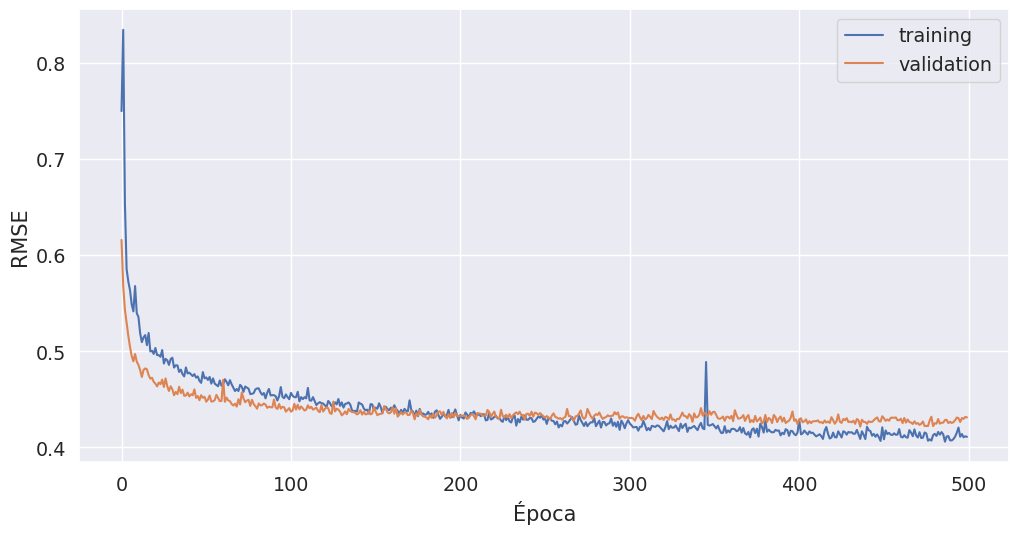

In [61]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss, label="training")
plt.plot(val_loss, label="validation")
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

Ahora probamos, por otro lado, el método de [regularización](https://keras.io/api/layers/regularizers/) tipo L2

In [62]:
from keras.regularizers import l2

In [63]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(8,), kernel_regularizer=l2(0.01)))
model.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

In [64]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=500,
    validation_data=(X_validation.values, y_validation.values),
)

Train on 6000 samples, validate on 4000 samples
Epoch 1/500
  32/6000 [..............................] - ETA: 14s - loss: 2.3439

1984/6000 [========>.....................] - ETA: 0s - loss: 1.3272 

4000/6000 [===================>..........] - ETA: 0s - loss: 1.1926

6000/6000 [==============================] - 0s 50us/step - loss: 1.0700 - val_loss: 0.7892


Epoch 2/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6915

2112/6000 [=========>....................] - ETA: 0s - loss: 0.8150

4128/6000 [===================>..........] - ETA: 0s - loss: 0.7617

6000/6000 [==============================] - 0s 34us/step - loss: 0.7837 - val_loss: 0.6802


Epoch 3/500
  32/6000 [..............................] - ETA: 0s - loss: 0.7094

1984/6000 [========>.....................] - ETA: 0s - loss: 0.6656

4032/6000 [===================>..........] - ETA: 0s - loss: 0.6257

6000/6000 [==============================] - 0s 34us/step - loss: 0.6194 - val_loss: 0.5485


Epoch 4/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4635

2080/6000 [=========>....................] - ETA: 0s - loss: 0.5531

4096/6000 [===================>..........] - ETA: 0s - loss: 0.5570

6000/6000 [==============================] - 0s 34us/step - loss: 0.5281 - val_loss: 0.5027


Epoch 5/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6255

2048/6000 [=========>....................] - ETA: 0s - loss: 0.4791

4032/6000 [===================>..........] - ETA: 0s - loss: 0.4897

6000/6000 [==============================] - 0s 34us/step - loss: 0.4836 - val_loss: 0.4596


Epoch 6/500
  32/6000 [..............................] - ETA: 0s - loss: 0.7328

2016/6000 [=========>....................] - ETA: 0s - loss: 0.4690

4032/6000 [===================>..........] - ETA: 0s - loss: 0.4532

6000/6000 [==============================] - 0s 34us/step - loss: 0.4490 - val_loss: 0.4261


Epoch 7/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4362

2080/6000 [=========>....................] - ETA: 0s - loss: 0.4335

4096/6000 [===================>..........] - ETA: 0s - loss: 0.4429

6000/6000 [==============================] - 0s 34us/step - loss: 0.4296 - val_loss: 0.4040


Epoch 8/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2403

2048/6000 [=========>....................] - ETA: 0s - loss: 0.4138

4096/6000 [===================>..........] - ETA: 0s - loss: 0.4114

6000/6000 [==============================] - 0s 35us/step - loss: 0.4047 - val_loss: 0.3906


Epoch 9/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3968

2016/6000 [=========>....................] - ETA: 0s - loss: 0.3985

4000/6000 [===================>..........] - ETA: 0s - loss: 0.3948

6000/6000 [==============================] - 0s 36us/step - loss: 0.3863 - val_loss: 0.3775


Epoch 10/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2398

2048/6000 [=========>....................] - ETA: 0s - loss: 0.3679

4064/6000 [===================>..........] - ETA: 0s - loss: 0.3754

6000/6000 [==============================] - 0s 35us/step - loss: 0.3703 - val_loss: 0.3587


Epoch 11/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4938

2016/6000 [=========>....................] - ETA: 0s - loss: 0.3776

3904/6000 [==================>...........] - ETA: 0s - loss: 0.3611

5888/6000 [============================>.] - ETA: 0s - loss: 0.3637

6000/6000 [==============================] - 0s 35us/step - loss: 0.3638 - val_loss: 0.3434


Epoch 12/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1962

2048/6000 [=========>....................] - ETA: 0s - loss: 0.3418

4096/6000 [===================>..........] - ETA: 0s - loss: 0.3527

6000/6000 [==============================] - 0s 34us/step - loss: 0.3501 - val_loss: 0.3370


Epoch 13/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4355

2048/6000 [=========>....................] - ETA: 0s - loss: 0.3388

4064/6000 [===================>..........] - ETA: 0s - loss: 0.3497

6000/6000 [==============================] - 0s 34us/step - loss: 0.3545 - val_loss: 0.3506


Epoch 14/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2436

2048/6000 [=========>....................] - ETA: 0s - loss: 0.3274

4064/6000 [===================>..........] - ETA: 0s - loss: 0.3333

6000/6000 [==============================] - 0s 34us/step - loss: 0.3434 - val_loss: 0.3317


Epoch 15/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2478

1888/6000 [========>.....................] - ETA: 0s - loss: 0.3373

3936/6000 [==================>...........] - ETA: 0s - loss: 0.3286

5984/6000 [============================>.] - ETA: 0s - loss: 0.3293

6000/6000 [==============================] - 0s 35us/step - loss: 0.3293 - val_loss: 0.3178


Epoch 16/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4203

2080/6000 [=========>....................] - ETA: 0s - loss: 0.3329

4096/6000 [===================>..........] - ETA: 0s - loss: 0.3322

6000/6000 [==============================] - 0s 34us/step - loss: 0.3247 - val_loss: 0.3133


Epoch 17/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2356

2112/6000 [=========>....................] - ETA: 0s - loss: 0.3074

4192/6000 [===================>..........] - ETA: 0s - loss: 0.3202

6000/6000 [==============================] - 0s 33us/step - loss: 0.3175 - val_loss: 0.3140


Epoch 18/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3526

2080/6000 [=========>....................] - ETA: 0s - loss: 0.3097

4096/6000 [===================>..........] - ETA: 0s - loss: 0.3113

6000/6000 [==============================] - 0s 34us/step - loss: 0.3162 - val_loss: 0.3047


Epoch 19/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2096

2112/6000 [=========>....................] - ETA: 0s - loss: 0.3257

4128/6000 [===================>..........] - ETA: 0s - loss: 0.3115

6000/6000 [==============================] - 0s 34us/step - loss: 0.3146 - val_loss: 0.3007


Epoch 20/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1813

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2983

4128/6000 [===================>..........] - ETA: 0s - loss: 0.3116



6000/6000 [==============================] - 0s 34us/step - loss: 0.3107 - val_loss: 0.3088


Epoch 21/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2686

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2889

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2910



6000/6000 [==============================] - 0s 34us/step - loss: 0.3070 - val_loss: 0.2998


Epoch 22/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3283

2080/6000 [=========>....................] - ETA: 0s - loss: 0.3058

4128/6000 [===================>..........] - ETA: 0s - loss: 0.3069

6000/6000 [==============================] - 0s 34us/step - loss: 0.3061 - val_loss: 0.3029


Epoch 23/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3991

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2854

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2919

6000/6000 [==============================] - 0s 34us/step - loss: 0.3024 - val_loss: 0.2946


Epoch 24/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4317

2080/6000 [=========>....................] - ETA: 0s - loss: 0.3153

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2962

6000/6000 [==============================] - 0s 34us/step - loss: 0.2976 - val_loss: 0.2937


Epoch 25/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3924

2048/6000 [=========>....................] - ETA: 0s - loss: 0.3130

4128/6000 [===================>..........] - ETA: 0s - loss: 0.3067

6000/6000 [==============================] - 0s 34us/step - loss: 0.2973 - val_loss: 0.2941


Epoch 26/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2963

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2886

4096/6000 [===================>..........] - ETA: 0s - loss: 0.3014

6000/6000 [==============================] - 0s 34us/step - loss: 0.2985 - val_loss: 0.2935


Epoch 27/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2373

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2846

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2919

6000/6000 [==============================] - 0s 34us/step - loss: 0.2923 - val_loss: 0.2895


Epoch 28/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2297

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2941

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2971

6000/6000 [==============================] - 0s 34us/step - loss: 0.2934 - val_loss: 0.2914


Epoch 29/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3569

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2896

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2920



6000/6000 [==============================] - 0s 34us/step - loss: 0.2918 - val_loss: 0.2874


Epoch 30/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2271

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2952

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2925

6000/6000 [==============================] - 0s 34us/step - loss: 0.2915 - val_loss: 0.2924


Epoch 31/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2241

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2876

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2902

5824/6000 [============================>.] - ETA: 0s - loss: 0.2950

6000/6000 [==============================] - 0s 37us/step - loss: 0.2938 - val_loss: 0.2841


Epoch 32/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1943

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2810

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2797

6000/6000 [==============================] - 0s 34us/step - loss: 0.2862 - val_loss: 0.2860


Epoch 33/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1863

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2676

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2940

6000/6000 [==============================] - 0s 34us/step - loss: 0.2902 - val_loss: 0.2882


Epoch 34/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2517

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2824

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2886

6000/6000 [==============================] - 0s 34us/step - loss: 0.2903 - val_loss: 0.2835


Epoch 35/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3319

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2858

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2840

6000/6000 [==============================] - 0s 34us/step - loss: 0.2845 - val_loss: 0.2828


Epoch 36/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2330

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2816

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2865

6000/6000 [==============================] - 0s 34us/step - loss: 0.2837 - val_loss: 0.2775


Epoch 37/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2846

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2713

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2846



6000/6000 [==============================] - 0s 34us/step - loss: 0.2852 - val_loss: 0.2804


Epoch 38/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3242

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2762

3744/6000 [=================>............] - ETA: 0s - loss: 0.2831

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2815

6000/6000 [==============================] - 0s 36us/step - loss: 0.2831 - val_loss: 0.2769


Epoch 39/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2125

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2978

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2882

6000/6000 [==============================] - 0s 34us/step - loss: 0.2832 - val_loss: 0.2795


Epoch 40/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2786

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2686

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2720

6000/6000 [==============================] - 0s 34us/step - loss: 0.2813 - val_loss: 0.2911


Epoch 41/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4070

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2777

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2730

6000/6000 [==============================] - 0s 34us/step - loss: 0.2828 - val_loss: 0.2852


Epoch 42/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1655

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2757

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2765

6000/6000 [==============================] - 0s 34us/step - loss: 0.2818 - val_loss: 0.2764


Epoch 43/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1573

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2662

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2798

6000/6000 [==============================] - 0s 34us/step - loss: 0.2799 - val_loss: 0.2781


Epoch 44/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3413

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2979

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2893

6000/6000 [==============================] - 0s 34us/step - loss: 0.2814 - val_loss: 0.2719


Epoch 45/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1293

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2644

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2723

6000/6000 [==============================] - 0s 34us/step - loss: 0.2771 - val_loss: 0.2724


Epoch 46/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1622

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2620

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2713

6000/6000 [==============================] - 0s 34us/step - loss: 0.2801 - val_loss: 0.2832


Epoch 47/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2559

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2505

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2727

6000/6000 [==============================] - 0s 34us/step - loss: 0.2765 - val_loss: 0.2743


Epoch 48/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3906

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2614

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2730

6000/6000 [==============================] - 0s 34us/step - loss: 0.2753 - val_loss: 0.2710


Epoch 49/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5192

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2517

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2650

6000/6000 [==============================] - 0s 34us/step - loss: 0.2729 - val_loss: 0.2744


Epoch 50/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5843

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2610

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2717

6000/6000 [==============================] - 0s 34us/step - loss: 0.2732 - val_loss: 0.2742


Epoch 51/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3157

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2772

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2731

6000/6000 [==============================] - 0s 34us/step - loss: 0.2733 - val_loss: 0.2731


Epoch 52/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3035

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2716

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2786



6000/6000 [==============================] - 0s 33us/step - loss: 0.2737 - val_loss: 0.2693


Epoch 53/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3258

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2706

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2753

6000/6000 [==============================] - 0s 34us/step - loss: 0.2720 - val_loss: 0.2647


Epoch 54/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1733

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2590

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2685

6000/6000 [==============================] - 0s 34us/step - loss: 0.2706 - val_loss: 0.2750


Epoch 55/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6118

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2710

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2707

6000/6000 [==============================] - 0s 34us/step - loss: 0.2717 - val_loss: 0.2757


Epoch 56/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2541

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2550

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2763

6000/6000 [==============================] - 0s 34us/step - loss: 0.2698 - val_loss: 0.2698


Epoch 57/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1588

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2531

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2706

6000/6000 [==============================] - 0s 34us/step - loss: 0.2684 - val_loss: 0.2682


Epoch 58/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1621

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2666

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2738

6000/6000 [==============================] - 0s 34us/step - loss: 0.2722 - val_loss: 0.2686


Epoch 59/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1451

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2924

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2681

6000/6000 [==============================] - 0s 34us/step - loss: 0.2687 - val_loss: 0.2646


Epoch 60/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2495

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2776

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2718

6000/6000 [==============================] - 0s 34us/step - loss: 0.2684 - val_loss: 0.2652


Epoch 61/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1962

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2788

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2695

6000/6000 [==============================] - 0s 34us/step - loss: 0.2656 - val_loss: 0.2835


Epoch 62/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3559

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2767

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2674

6000/6000 [==============================] - 0s 34us/step - loss: 0.2689 - val_loss: 0.2658


Epoch 63/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1631

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2699

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2698

6000/6000 [==============================] - 0s 34us/step - loss: 0.2654 - val_loss: 0.2754


Epoch 64/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2088

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2623

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2681

6000/6000 [==============================] - 0s 34us/step - loss: 0.2664 - val_loss: 0.2621


Epoch 65/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2820

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2695

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2680

6000/6000 [==============================] - 0s 34us/step - loss: 0.2659 - val_loss: 0.2793


Epoch 66/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2396

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2637

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2686

6000/6000 [==============================] - 0s 34us/step - loss: 0.2649 - val_loss: 0.2649


Epoch 67/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2420

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2538

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2594

6000/6000 [==============================] - 0s 34us/step - loss: 0.2630 - val_loss: 0.2713


Epoch 68/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3703

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2541

3968/6000 [==================>...........] - ETA: 0s - loss: 0.2651

6000/6000 [==============================] - 0s 34us/step - loss: 0.2609 - val_loss: 0.2613


Epoch 69/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1843

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2568

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2637

6000/6000 [==============================] - 0s 34us/step - loss: 0.2642 - val_loss: 0.2603


Epoch 70/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1239

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2788

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2686

6000/6000 [==============================] - 0s 34us/step - loss: 0.2587 - val_loss: 0.2554


Epoch 71/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3537

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2617

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2593

6000/6000 [==============================] - 0s 34us/step - loss: 0.2652 - val_loss: 0.2636


Epoch 72/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2492

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2799

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2589

6000/6000 [==============================] - 0s 34us/step - loss: 0.2616 - val_loss: 0.2590


Epoch 73/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2501

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2556

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2638

6000/6000 [==============================] - 0s 34us/step - loss: 0.2601 - val_loss: 0.2600


Epoch 74/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2293

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2552

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2630

6000/6000 [==============================] - 0s 34us/step - loss: 0.2591 - val_loss: 0.2654


Epoch 75/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1622

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2479

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2537

6000/6000 [==============================] - 0s 34us/step - loss: 0.2584 - val_loss: 0.2643


Epoch 76/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3198

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2596

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2628

6000/6000 [==============================] - 0s 34us/step - loss: 0.2579 - val_loss: 0.2635


Epoch 77/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2087

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2488

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2565



6000/6000 [==============================] - 0s 33us/step - loss: 0.2589 - val_loss: 0.2578


Epoch 78/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3039

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2619

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2533

6000/6000 [==============================] - 0s 34us/step - loss: 0.2618 - val_loss: 0.2591


Epoch 79/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3023

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2617

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2576

6000/6000 [==============================] - 0s 34us/step - loss: 0.2565 - val_loss: 0.2540


Epoch 80/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2543

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2548

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2602

6000/6000 [==============================] - 0s 34us/step - loss: 0.2550 - val_loss: 0.2580


Epoch 81/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1643

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2321

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2539

6000/6000 [==============================] - 0s 34us/step - loss: 0.2581 - val_loss: 0.2536


Epoch 82/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1432

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2569

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2616

6000/6000 [==============================] - 0s 34us/step - loss: 0.2583 - val_loss: 0.2542


Epoch 83/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1482

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2632

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2586

6000/6000 [==============================] - 0s 33us/step - loss: 0.2560 - val_loss: 0.2544


Epoch 84/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2750

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2403

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2383

6000/6000 [==============================] - 0s 34us/step - loss: 0.2535 - val_loss: 0.2625


Epoch 85/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2633

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2471

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2474

6000/6000 [==============================] - 0s 33us/step - loss: 0.2546 - val_loss: 0.2647


Epoch 86/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1859

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2692

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2585

6000/6000 [==============================] - 0s 34us/step - loss: 0.2540 - val_loss: 0.2548


Epoch 87/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2295

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2667

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2625

6000/6000 [==============================] - 0s 34us/step - loss: 0.2570 - val_loss: 0.2545


Epoch 88/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3183

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2597

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2601

6000/6000 [==============================] - 0s 34us/step - loss: 0.2582 - val_loss: 0.2577


Epoch 89/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1971

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2441

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2508

6000/6000 [==============================] - 0s 34us/step - loss: 0.2562 - val_loss: 0.2526


Epoch 90/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1951

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2615

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2499



6000/6000 [==============================] - 0s 34us/step - loss: 0.2510 - val_loss: 0.2573


Epoch 91/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1493

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2529

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2454

6000/6000 [==============================] - 0s 33us/step - loss: 0.2536 - val_loss: 0.2751


Epoch 92/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1684

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2625

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2527

6000/6000 [==============================] - 0s 34us/step - loss: 0.2549 - val_loss: 0.2553


Epoch 93/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2108

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2513

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2534

6000/6000 [==============================] - 0s 34us/step - loss: 0.2524 - val_loss: 0.2487


Epoch 94/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2592

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2487

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2491

6000/6000 [==============================] - 0s 34us/step - loss: 0.2522 - val_loss: 0.2514


Epoch 95/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2479

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2459

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2506



6000/6000 [==============================] - 0s 34us/step - loss: 0.2525 - val_loss: 0.2516


Epoch 96/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1843

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2473

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2512

6000/6000 [==============================] - 0s 34us/step - loss: 0.2489 - val_loss: 0.2466


Epoch 97/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3804

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2700

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2593

6000/6000 [==============================] - 0s 34us/step - loss: 0.2488 - val_loss: 0.2520


Epoch 98/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2347

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2443

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2460



6000/6000 [==============================] - 0s 34us/step - loss: 0.2467 - val_loss: 0.2579


Epoch 99/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3166

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2512

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2454

6000/6000 [==============================] - 0s 34us/step - loss: 0.2511 - val_loss: 0.2514


Epoch 100/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2878

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2518

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2484

6000/6000 [==============================] - 0s 34us/step - loss: 0.2511 - val_loss: 0.2453


Epoch 101/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4270

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2466

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2508

6000/6000 [==============================] - 0s 34us/step - loss: 0.2504 - val_loss: 0.2612


Epoch 102/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1468

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2461

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2529

6000/6000 [==============================] - 0s 34us/step - loss: 0.2549 - val_loss: 0.2522


Epoch 103/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2204

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2698

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2588

6000/6000 [==============================] - 0s 34us/step - loss: 0.2522 - val_loss: 0.2471


Epoch 104/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6792

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2544

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2550

6000/6000 [==============================] - 0s 33us/step - loss: 0.2475 - val_loss: 0.2447


Epoch 105/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3136

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2409

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2399

6000/6000 [==============================] - 0s 34us/step - loss: 0.2480 - val_loss: 0.2542


Epoch 106/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2401

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2352

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2399

6000/6000 [==============================] - 0s 34us/step - loss: 0.2484 - val_loss: 0.2472


Epoch 107/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2974

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2343

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2427

6000/6000 [==============================] - 0s 33us/step - loss: 0.2459 - val_loss: 0.2560


Epoch 108/500


  32/6000 [..............................] - ETA: 0s - loss: 0.7273

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2631

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2535

6000/6000 [==============================] - 0s 34us/step - loss: 0.2490 - val_loss: 0.2514


Epoch 109/500


  32/6000 [..............................] - ETA: 0s - loss: 0.5103

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2586

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2537

6000/6000 [==============================] - 0s 34us/step - loss: 0.2469 - val_loss: 0.2563


Epoch 110/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1427

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2445

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2470

6000/6000 [==============================] - 0s 34us/step - loss: 0.2490 - val_loss: 0.2597


Epoch 111/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1783

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2334

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2385

6000/6000 [==============================] - 0s 33us/step - loss: 0.2440 - val_loss: 0.2559


Epoch 112/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1745

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2325

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2377

6000/6000 [==============================] - 0s 34us/step - loss: 0.2433 - val_loss: 0.2499


Epoch 113/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2120

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2322

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2483

6000/6000 [==============================] - 0s 34us/step - loss: 0.2452 - val_loss: 0.2610


Epoch 114/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1657

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2395

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2407

6000/6000 [==============================] - 0s 34us/step - loss: 0.2443 - val_loss: 0.2495


Epoch 115/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2045

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2484

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2483



6000/6000 [==============================] - 0s 34us/step - loss: 0.2461 - val_loss: 0.2491


Epoch 116/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3952

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2493

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2524

6000/6000 [==============================] - 0s 33us/step - loss: 0.2431 - val_loss: 0.2424


Epoch 117/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1605

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2337

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2402

6000/6000 [==============================] - 0s 34us/step - loss: 0.2470 - val_loss: 0.2479


Epoch 118/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3771

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2429

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2412



6000/6000 [==============================] - 0s 33us/step - loss: 0.2427 - val_loss: 0.2460


Epoch 119/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2869

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2522

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2446



6000/6000 [==============================] - 0s 34us/step - loss: 0.2467 - val_loss: 0.2575


Epoch 120/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3143

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2484

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2449

6000/6000 [==============================] - 0s 34us/step - loss: 0.2421 - val_loss: 0.2437


Epoch 121/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2142

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2504

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2655

6000/6000 [==============================] - 0s 34us/step - loss: 0.2535 - val_loss: 0.2419


Epoch 122/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1687

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2298

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2381

6000/6000 [==============================] - 0s 34us/step - loss: 0.2423 - val_loss: 0.2497


Epoch 123/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1688

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2281

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2407

6000/6000 [==============================] - 0s 34us/step - loss: 0.2421 - val_loss: 0.2465


Epoch 124/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3389

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2628

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2466

6000/6000 [==============================] - 0s 34us/step - loss: 0.2438 - val_loss: 0.2459


Epoch 125/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1608

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2486

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2440

6000/6000 [==============================] - 0s 34us/step - loss: 0.2415 - val_loss: 0.2564


Epoch 126/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2613

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2341

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2379

6000/6000 [==============================] - 0s 34us/step - loss: 0.2396 - val_loss: 0.2422


Epoch 127/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5394

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2494

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2420

6000/6000 [==============================] - 0s 34us/step - loss: 0.2406 - val_loss: 0.2627


Epoch 128/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3798

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2207

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2249

6000/6000 [==============================] - 0s 34us/step - loss: 0.2422 - val_loss: 0.2429


Epoch 129/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1251

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2134

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2365

6000/6000 [==============================] - 0s 34us/step - loss: 0.2421 - val_loss: 0.2443


Epoch 130/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2153

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2302

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2410

6000/6000 [==============================] - 0s 33us/step - loss: 0.2386 - val_loss: 0.2641


Epoch 131/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2375

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2464

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2463

6000/6000 [==============================] - 0s 34us/step - loss: 0.2425 - val_loss: 0.2546


Epoch 132/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1617

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2467

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2395

6000/6000 [==============================] - 0s 34us/step - loss: 0.2413 - val_loss: 0.2462


Epoch 133/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1729

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2179

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2391

6000/6000 [==============================] - 0s 34us/step - loss: 0.2389 - val_loss: 0.2465


Epoch 134/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1900

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2359

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2370

6000/6000 [==============================] - 0s 33us/step - loss: 0.2431 - val_loss: 0.2460


Epoch 135/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2010

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2586

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2507

6000/6000 [==============================] - 0s 34us/step - loss: 0.2415 - val_loss: 0.2374


Epoch 136/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2588

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2461

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2422

6000/6000 [==============================] - 0s 34us/step - loss: 0.2408 - val_loss: 0.2498


Epoch 137/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4952

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2396

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2519

6000/6000 [==============================] - 0s 33us/step - loss: 0.2424 - val_loss: 0.2374


Epoch 138/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3144

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2395

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2401

6000/6000 [==============================] - 0s 34us/step - loss: 0.2418 - val_loss: 0.2483


Epoch 139/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2150

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2333

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2266

6000/6000 [==============================] - 0s 34us/step - loss: 0.2373 - val_loss: 0.2639


Epoch 140/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1832

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2356

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2342

6000/6000 [==============================] - 0s 34us/step - loss: 0.2391 - val_loss: 0.2377


Epoch 141/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3358

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2398

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2446

6000/6000 [==============================] - 0s 34us/step - loss: 0.2381 - val_loss: 0.2396


Epoch 142/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3779

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2270

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2363

6000/6000 [==============================] - 0s 34us/step - loss: 0.2381 - val_loss: 0.2406


Epoch 143/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0702

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2207

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2366

6000/6000 [==============================] - 0s 34us/step - loss: 0.2376 - val_loss: 0.2494


Epoch 144/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1469

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2484

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2572

6000/6000 [==============================] - 0s 34us/step - loss: 0.2409 - val_loss: 0.2377


Epoch 145/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2135

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2416

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2400

6000/6000 [==============================] - 0s 34us/step - loss: 0.2395 - val_loss: 0.2404


Epoch 146/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2514

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2333

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2311

6000/6000 [==============================] - 0s 34us/step - loss: 0.2369 - val_loss: 0.2383


Epoch 147/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2276

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2297

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2384

6000/6000 [==============================] - 0s 34us/step - loss: 0.2384 - val_loss: 0.2383


Epoch 148/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1319

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2165

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2303

6000/6000 [==============================] - 0s 34us/step - loss: 0.2400 - val_loss: 0.2454


Epoch 149/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5173

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2445

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2431

6000/6000 [==============================] - 0s 34us/step - loss: 0.2385 - val_loss: 0.2412


Epoch 150/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2095

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2265

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2304

6000/6000 [==============================] - 0s 34us/step - loss: 0.2375 - val_loss: 0.2481


Epoch 151/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2962

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2444

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2354

6000/6000 [==============================] - 0s 34us/step - loss: 0.2369 - val_loss: 0.2402


Epoch 152/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1270

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2436

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2453

6000/6000 [==============================] - 0s 34us/step - loss: 0.2379 - val_loss: 0.2427


Epoch 153/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1969

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2261

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2444

6000/6000 [==============================] - 0s 33us/step - loss: 0.2397 - val_loss: 0.2384


Epoch 154/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2039

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2475

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2401



6000/6000 [==============================] - 0s 34us/step - loss: 0.2355 - val_loss: 0.2375


Epoch 155/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1518

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2414

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2384

6000/6000 [==============================] - 0s 34us/step - loss: 0.2380 - val_loss: 0.2505


Epoch 156/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3551

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2492

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2310

6000/6000 [==============================] - 0s 34us/step - loss: 0.2378 - val_loss: 0.2368


Epoch 157/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2090

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2476

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2388

6000/6000 [==============================] - 0s 34us/step - loss: 0.2389 - val_loss: 0.2440


Epoch 158/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2227

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2448

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2435

6000/6000 [==============================] - 0s 34us/step - loss: 0.2375 - val_loss: 0.2375


Epoch 159/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2027

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2376

3968/6000 [==================>...........] - ETA: 0s - loss: 0.2359

6000/6000 [==============================] - 0s 34us/step - loss: 0.2355 - val_loss: 0.2480


Epoch 160/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3011

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2391

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2436

6000/6000 [==============================] - 0s 34us/step - loss: 0.2372 - val_loss: 0.2399


Epoch 161/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2741

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2294

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2342

6000/6000 [==============================] - 0s 34us/step - loss: 0.2359 - val_loss: 0.2393


Epoch 162/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1626

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2169

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2221

6000/6000 [==============================] - 0s 34us/step - loss: 0.2373 - val_loss: 0.2393


Epoch 163/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2234

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2287

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2358

6000/6000 [==============================] - 0s 34us/step - loss: 0.2441 - val_loss: 0.2359


Epoch 164/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2783

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2442

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2394

6000/6000 [==============================] - 0s 34us/step - loss: 0.2435 - val_loss: 0.2370


Epoch 165/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1584

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2670

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2510

6000/6000 [==============================] - 0s 34us/step - loss: 0.2395 - val_loss: 0.2465


Epoch 166/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2275

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2403

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2339



6000/6000 [==============================] - 0s 34us/step - loss: 0.2346 - val_loss: 0.2423


Epoch 167/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4341

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2287

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2376

6000/6000 [==============================] - 0s 34us/step - loss: 0.2331 - val_loss: 0.2479


Epoch 168/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2223

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2418

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2373

6000/6000 [==============================] - 0s 34us/step - loss: 0.2419 - val_loss: 0.2367


Epoch 169/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2794

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2454

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2384

6000/6000 [==============================] - 0s 34us/step - loss: 0.2358 - val_loss: 0.2512


Epoch 170/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1492

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2426

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2318

6000/6000 [==============================] - 0s 34us/step - loss: 0.2342 - val_loss: 0.2349


Epoch 171/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0707

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2262

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2326

6000/6000 [==============================] - 0s 34us/step - loss: 0.2366 - val_loss: 0.2363


Epoch 172/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1450

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2419

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2390

6000/6000 [==============================] - 0s 34us/step - loss: 0.2353 - val_loss: 0.2462


Epoch 173/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1261

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2211

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2339



6000/6000 [==============================] - 0s 34us/step - loss: 0.2373 - val_loss: 0.2373


Epoch 174/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2017

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2327

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2405

6000/6000 [==============================] - 0s 34us/step - loss: 0.2363 - val_loss: 0.2346


Epoch 175/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1792

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2381

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2342

6000/6000 [==============================] - 0s 33us/step - loss: 0.2342 - val_loss: 0.2381


Epoch 176/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1953

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2305

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2281



6000/6000 [==============================] - 0s 34us/step - loss: 0.2348 - val_loss: 0.2368


Epoch 177/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1287

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2140

3968/6000 [==================>...........] - ETA: 0s - loss: 0.2412

6000/6000 [==============================] - 0s 34us/step - loss: 0.2344 - val_loss: 0.2331


Epoch 178/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1224

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2438

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2348

6000/6000 [==============================] - 0s 34us/step - loss: 0.2377 - val_loss: 0.2381


Epoch 179/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1258

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2312

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2310

6000/6000 [==============================] - 0s 34us/step - loss: 0.2336 - val_loss: 0.2389


Epoch 180/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2378

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2382

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2357

6000/6000 [==============================] - 0s 34us/step - loss: 0.2336 - val_loss: 0.2441


Epoch 181/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2505

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2391

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2351

6000/6000 [==============================] - 0s 34us/step - loss: 0.2334 - val_loss: 0.2315


Epoch 182/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3273

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2502

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2294

6000/6000 [==============================] - 0s 34us/step - loss: 0.2324 - val_loss: 0.2373


Epoch 183/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4663

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2359

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2290

6000/6000 [==============================] - 0s 33us/step - loss: 0.2321 - val_loss: 0.2344


Epoch 184/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1229

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2462

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2342

6000/6000 [==============================] - 0s 34us/step - loss: 0.2338 - val_loss: 0.2324


Epoch 185/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1464

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2283

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2369

6000/6000 [==============================] - 0s 33us/step - loss: 0.2378 - val_loss: 0.2462


Epoch 186/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2462

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2235

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2333

5920/6000 [============================>.] - ETA: 0s - loss: 0.2348

6000/6000 [==============================] - 0s 35us/step - loss: 0.2350 - val_loss: 0.2321


Epoch 187/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1871

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2566

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2359

6000/6000 [==============================] - 0s 34us/step - loss: 0.2352 - val_loss: 0.2342


Epoch 188/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1690

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2371

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2343

6000/6000 [==============================] - 0s 34us/step - loss: 0.2329 - val_loss: 0.2380


Epoch 189/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1211

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2391

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2392

6000/6000 [==============================] - 0s 33us/step - loss: 0.2366 - val_loss: 0.2549


Epoch 190/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2593

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2432



4064/6000 [===================>..........] - ETA: 0s - loss: 0.2436

6000/6000 [==============================] - 0s 34us/step - loss: 0.2335 - val_loss: 0.2685


Epoch 191/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2062

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2369

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2329

6000/6000 [==============================] - 0s 34us/step - loss: 0.2347 - val_loss: 0.2421


Epoch 192/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4770

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2291

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2321



6000/6000 [==============================] - 0s 34us/step - loss: 0.2307 - val_loss: 0.2342


Epoch 193/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2362

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2551

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2395

6000/6000 [==============================] - 0s 34us/step - loss: 0.2328 - val_loss: 0.2371


Epoch 194/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1481

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2436

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2360

6000/6000 [==============================] - 0s 34us/step - loss: 0.2330 - val_loss: 0.2343


Epoch 195/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1676

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2349

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2379

6000/6000 [==============================] - 0s 34us/step - loss: 0.2357 - val_loss: 0.2584


Epoch 196/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2789

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2281

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2321

6000/6000 [==============================] - 0s 34us/step - loss: 0.2322 - val_loss: 0.2338


Epoch 197/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2275

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2361

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2398

6000/6000 [==============================] - 0s 34us/step - loss: 0.2309 - val_loss: 0.2312


Epoch 198/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3155

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2386

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2448

6000/6000 [==============================] - 0s 34us/step - loss: 0.2354 - val_loss: 0.2308


Epoch 199/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1760

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2245

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2343

6000/6000 [==============================] - 0s 34us/step - loss: 0.2379 - val_loss: 0.2308


Epoch 200/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2629

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2372

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2406

6000/6000 [==============================] - 0s 34us/step - loss: 0.2365 - val_loss: 0.2296


Epoch 201/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1061

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2255

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2268

6000/6000 [==============================] - 0s 34us/step - loss: 0.2345 - val_loss: 0.2282


Epoch 202/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1105

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2369

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2246

6000/6000 [==============================] - 0s 34us/step - loss: 0.2343 - val_loss: 0.2411


Epoch 203/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2052

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2429

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2258

6000/6000 [==============================] - 0s 34us/step - loss: 0.2297 - val_loss: 0.2304


Epoch 204/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2082

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2359

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2331

6000/6000 [==============================] - 0s 34us/step - loss: 0.2306 - val_loss: 0.2301


Epoch 205/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2366

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2251

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2239

6000/6000 [==============================] - 0s 34us/step - loss: 0.2307 - val_loss: 0.2352


Epoch 206/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2445

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2144

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2233

6000/6000 [==============================] - 0s 34us/step - loss: 0.2320 - val_loss: 0.2313


Epoch 207/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1368

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2127

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2252

6000/6000 [==============================] - 0s 34us/step - loss: 0.2309 - val_loss: 0.2339


Epoch 208/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1915

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2298

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2301

6000/6000 [==============================] - 0s 34us/step - loss: 0.2319 - val_loss: 0.2409


Epoch 209/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1892

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2297

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2352

6000/6000 [==============================] - 0s 34us/step - loss: 0.2309 - val_loss: 0.2390


Epoch 210/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4268

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2520

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2379

6000/6000 [==============================] - 0s 34us/step - loss: 0.2336 - val_loss: 0.2310


Epoch 211/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1138

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2187

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2306

6000/6000 [==============================] - 0s 34us/step - loss: 0.2280 - val_loss: 0.2398


Epoch 212/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3766

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2194

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2277

6000/6000 [==============================] - 0s 34us/step - loss: 0.2322 - val_loss: 0.2312


Epoch 213/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1624

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2181

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2275

6000/6000 [==============================] - 0s 35us/step - loss: 0.2279 - val_loss: 0.2458


Epoch 214/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1874

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2183

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2283

6000/6000 [==============================] - 0s 34us/step - loss: 0.2343 - val_loss: 0.2342


Epoch 215/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1734

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2344

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2351

6000/6000 [==============================] - 0s 34us/step - loss: 0.2319 - val_loss: 0.2389


Epoch 216/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1702

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2432

3968/6000 [==================>...........] - ETA: 0s - loss: 0.2327

6000/6000 [==============================] - 0s 34us/step - loss: 0.2312 - val_loss: 0.2387


Epoch 217/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1784

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2322

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2414

6000/6000 [==============================] - 0s 34us/step - loss: 0.2315 - val_loss: 0.2485


Epoch 218/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2732

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2283

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2311

6000/6000 [==============================] - 0s 34us/step - loss: 0.2298 - val_loss: 0.2467


Epoch 219/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2107

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2244

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2368

6000/6000 [==============================] - 0s 34us/step - loss: 0.2368 - val_loss: 0.2309


Epoch 220/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2968

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2478

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2417

6000/6000 [==============================] - 0s 34us/step - loss: 0.2315 - val_loss: 0.2332


Epoch 221/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1744

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2304

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2323

6000/6000 [==============================] - 0s 34us/step - loss: 0.2302 - val_loss: 0.2274


Epoch 222/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1852

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2270

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2277

6000/6000 [==============================] - 0s 34us/step - loss: 0.2275 - val_loss: 0.2390


Epoch 223/500
  32/6000 [..............................] - ETA: 0s - loss: 0.7195

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2346

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2278

6000/6000 [==============================] - 0s 34us/step - loss: 0.2306 - val_loss: 0.2277


Epoch 224/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2024

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2284

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2243

6000/6000 [==============================] - 0s 34us/step - loss: 0.2290 - val_loss: 0.2387


Epoch 225/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4875

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2417

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2307

6000/6000 [==============================] - 0s 34us/step - loss: 0.2309 - val_loss: 0.2318


Epoch 226/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1635

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2268

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2275

6000/6000 [==============================] - 0s 34us/step - loss: 0.2289 - val_loss: 0.2352


Epoch 227/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1385

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2214

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2180

6000/6000 [==============================] - 0s 33us/step - loss: 0.2283 - val_loss: 0.2297


Epoch 228/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1394

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2431

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2384

6000/6000 [==============================] - 0s 34us/step - loss: 0.2355 - val_loss: 0.2319


Epoch 229/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1727

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2389

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2362

6000/6000 [==============================] - 0s 34us/step - loss: 0.2303 - val_loss: 0.2277


Epoch 230/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2933

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2206

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2159

6000/6000 [==============================] - 0s 34us/step - loss: 0.2277 - val_loss: 0.2426


Epoch 231/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2298

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2230

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2223

6000/6000 [==============================] - 0s 34us/step - loss: 0.2322 - val_loss: 0.2396


Epoch 232/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1178

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2106

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2226

6000/6000 [==============================] - 0s 34us/step - loss: 0.2284 - val_loss: 0.2283


Epoch 233/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1415

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2413

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2443

6000/6000 [==============================] - 0s 34us/step - loss: 0.2343 - val_loss: 0.2437


Epoch 234/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2576

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2294

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2324



6000/6000 [==============================] - 0s 34us/step - loss: 0.2362 - val_loss: 0.2400


Epoch 235/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1582

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2180

3808/6000 [==================>...........] - ETA: 0s - loss: 0.2332

5856/6000 [============================>.] - ETA: 0s - loss: 0.2325

6000/6000 [==============================] - 0s 36us/step - loss: 0.2318 - val_loss: 0.2291


Epoch 236/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1557

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2145

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2265

6000/6000 [==============================] - 0s 34us/step - loss: 0.2282 - val_loss: 0.2297


Epoch 237/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1557

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2242

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2306

6000/6000 [==============================] - 0s 33us/step - loss: 0.2300 - val_loss: 0.2298


Epoch 238/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4295

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2298

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2260

6000/6000 [==============================] - 0s 34us/step - loss: 0.2264 - val_loss: 0.2354


Epoch 239/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1634

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2127

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2201

6000/6000 [==============================] - 0s 34us/step - loss: 0.2271 - val_loss: 0.2320


Epoch 240/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1301

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2286

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2242

6000/6000 [==============================] - 0s 34us/step - loss: 0.2296 - val_loss: 0.2564


Epoch 241/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2590

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2077

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2236

6000/6000 [==============================] - 0s 34us/step - loss: 0.2278 - val_loss: 0.2413


Epoch 242/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3777

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2253

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2347

6000/6000 [==============================] - 0s 34us/step - loss: 0.2288 - val_loss: 0.2416


Epoch 243/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2920

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2447

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2450

6000/6000 [==============================] - 0s 34us/step - loss: 0.2306 - val_loss: 0.2256


Epoch 244/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1337

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2339

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2299

6000/6000 [==============================] - 0s 34us/step - loss: 0.2297 - val_loss: 0.2385


Epoch 245/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2236

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2192

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2351

6000/6000 [==============================] - 0s 35us/step - loss: 0.2268 - val_loss: 0.2261


Epoch 246/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1552

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2197

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2358

6000/6000 [==============================] - 0s 34us/step - loss: 0.2290 - val_loss: 0.2245


Epoch 247/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3172

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2167

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2278

6000/6000 [==============================] - 0s 34us/step - loss: 0.2298 - val_loss: 0.2357


Epoch 248/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2789

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2217

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2333

6000/6000 [==============================] - 0s 34us/step - loss: 0.2283 - val_loss: 0.2423


Epoch 249/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4776

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2222

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2228

6000/6000 [==============================] - 0s 34us/step - loss: 0.2286 - val_loss: 0.2376


Epoch 250/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2556

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2500

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2357

6000/6000 [==============================] - 0s 34us/step - loss: 0.2327 - val_loss: 0.2302


Epoch 251/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6055

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2322

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2242

6000/6000 [==============================] - 0s 34us/step - loss: 0.2311 - val_loss: 0.2380


Epoch 252/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2113

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2216

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2346

6000/6000 [==============================] - 0s 34us/step - loss: 0.2267 - val_loss: 0.2266


Epoch 253/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1573

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2220

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2351

6000/6000 [==============================] - 0s 33us/step - loss: 0.2309 - val_loss: 0.2350


Epoch 254/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2165

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2309

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2320

6000/6000 [==============================] - 0s 34us/step - loss: 0.2284 - val_loss: 0.2236


Epoch 255/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1889

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2368

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2233

6000/6000 [==============================] - 0s 34us/step - loss: 0.2270 - val_loss: 0.2247


Epoch 256/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1133

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2175

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2232

6000/6000 [==============================] - 0s 34us/step - loss: 0.2282 - val_loss: 0.2347


Epoch 257/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1728

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2202

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2199

6000/6000 [==============================] - 0s 34us/step - loss: 0.2283 - val_loss: 0.2297


Epoch 258/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1344

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2258

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2259

6000/6000 [==============================] - 0s 33us/step - loss: 0.2265 - val_loss: 0.2225


Epoch 259/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1592

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2399

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2261

6000/6000 [==============================] - 0s 34us/step - loss: 0.2264 - val_loss: 0.2439


Epoch 260/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2626

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2145

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2181

6000/6000 [==============================] - 0s 34us/step - loss: 0.2264 - val_loss: 0.2271


Epoch 261/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1017

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2284

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2265

6000/6000 [==============================] - 0s 33us/step - loss: 0.2298 - val_loss: 0.2329


Epoch 262/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1092

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2205

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2257

6000/6000 [==============================] - 0s 34us/step - loss: 0.2299 - val_loss: 0.2253


Epoch 263/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1603

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2219

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2257

6000/6000 [==============================] - 0s 34us/step - loss: 0.2273 - val_loss: 0.2254


Epoch 264/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4457

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2326

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2271

6000/6000 [==============================] - 0s 34us/step - loss: 0.2243 - val_loss: 0.2352


Epoch 265/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2493

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2204

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2222

6000/6000 [==============================] - 0s 33us/step - loss: 0.2283 - val_loss: 0.2288


Epoch 266/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1852

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2273

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2243



6000/6000 [==============================] - 0s 34us/step - loss: 0.2262 - val_loss: 0.2336


Epoch 267/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1907

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2309

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2275

6000/6000 [==============================] - 0s 33us/step - loss: 0.2261 - val_loss: 0.2270


Epoch 268/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2796

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2158

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2190

6000/6000 [==============================] - 0s 34us/step - loss: 0.2270 - val_loss: 0.2280


Epoch 269/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3171

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2281

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2325



6000/6000 [==============================] - 0s 33us/step - loss: 0.2324 - val_loss: 0.2461


Epoch 270/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3697

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2295

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2277

6000/6000 [==============================] - 0s 34us/step - loss: 0.2248 - val_loss: 0.2268


Epoch 271/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2231

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2276

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2320



6000/6000 [==============================] - 0s 33us/step - loss: 0.2249 - val_loss: 0.2293


Epoch 272/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1791

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2250

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2288

6000/6000 [==============================] - 0s 33us/step - loss: 0.2269 - val_loss: 0.2236


Epoch 273/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2060

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2445

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2329



6000/6000 [==============================] - 0s 33us/step - loss: 0.2277 - val_loss: 0.2379


Epoch 274/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2526

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2465

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2303

6000/6000 [==============================] - 0s 34us/step - loss: 0.2263 - val_loss: 0.2264


Epoch 275/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2094

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2431

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2347

6000/6000 [==============================] - 0s 34us/step - loss: 0.2293 - val_loss: 0.2210


Epoch 276/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1279

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2424

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2338

6000/6000 [==============================] - 0s 34us/step - loss: 0.2254 - val_loss: 0.2294


Epoch 277/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3242

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2312

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2283

6000/6000 [==============================] - 0s 34us/step - loss: 0.2256 - val_loss: 0.2305


Epoch 278/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1751

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2222

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2271

6000/6000 [==============================] - 0s 34us/step - loss: 0.2287 - val_loss: 0.2325


Epoch 279/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1638

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2257

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2299

6000/6000 [==============================] - 0s 34us/step - loss: 0.2286 - val_loss: 0.2232


Epoch 280/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1572

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2316

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2295

6000/6000 [==============================] - 0s 34us/step - loss: 0.2277 - val_loss: 0.2376


Epoch 281/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4270

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2276

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2285

6000/6000 [==============================] - 0s 34us/step - loss: 0.2241 - val_loss: 0.2291


Epoch 282/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3145

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2225

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2206

6000/6000 [==============================] - 0s 34us/step - loss: 0.2264 - val_loss: 0.2267


Epoch 283/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2267

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2252

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2268

6000/6000 [==============================] - 0s 34us/step - loss: 0.2277 - val_loss: 0.2237


Epoch 284/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2460

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2411

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2354

6000/6000 [==============================] - 0s 34us/step - loss: 0.2286 - val_loss: 0.2252


Epoch 285/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1416

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2315

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2275



6000/6000 [==============================] - 0s 33us/step - loss: 0.2300 - val_loss: 0.2256


Epoch 286/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1640

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2198

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2213

6000/6000 [==============================] - 0s 34us/step - loss: 0.2255 - val_loss: 0.2228


Epoch 287/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1584

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2207

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2255

6000/6000 [==============================] - 0s 34us/step - loss: 0.2251 - val_loss: 0.2212


Epoch 288/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1381

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2230

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2269

6000/6000 [==============================] - 0s 34us/step - loss: 0.2264 - val_loss: 0.2283


Epoch 289/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2276

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2384

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2290

6000/6000 [==============================] - 0s 34us/step - loss: 0.2262 - val_loss: 0.2240


Epoch 290/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1411

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2139

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2269

6000/6000 [==============================] - 0s 34us/step - loss: 0.2270 - val_loss: 0.2280


Epoch 291/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3237

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2185

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2231

6000/6000 [==============================] - 0s 34us/step - loss: 0.2270 - val_loss: 0.2332


Epoch 292/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1118

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2323

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2253

6000/6000 [==============================] - 0s 34us/step - loss: 0.2284 - val_loss: 0.2279


Epoch 293/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1676

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2207

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2224

6000/6000 [==============================] - 0s 34us/step - loss: 0.2228 - val_loss: 0.2231


Epoch 294/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2271

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2431

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2309

6000/6000 [==============================] - 0s 34us/step - loss: 0.2250 - val_loss: 0.2245


Epoch 295/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2265

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2180

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2185

6000/6000 [==============================] - 0s 34us/step - loss: 0.2235 - val_loss: 0.2368


Epoch 296/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2344

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2299

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2244

6000/6000 [==============================] - 0s 34us/step - loss: 0.2255 - val_loss: 0.2256


Epoch 297/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2627

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2225

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2240

6000/6000 [==============================] - 0s 34us/step - loss: 0.2238 - val_loss: 0.2220


Epoch 298/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2903

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2074

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2160

6000/6000 [==============================] - 0s 34us/step - loss: 0.2231 - val_loss: 0.2238


Epoch 299/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2382

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2085

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2204



6000/6000 [==============================] - 0s 34us/step - loss: 0.2256 - val_loss: 0.2207


Epoch 300/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2517

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2490

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2340

6000/6000 [==============================] - 0s 34us/step - loss: 0.2303 - val_loss: 0.2259


Epoch 301/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1844

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2404

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2359

6000/6000 [==============================] - 0s 33us/step - loss: 0.2291 - val_loss: 0.2266


Epoch 302/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2028

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2104

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2174

6000/6000 [==============================] - 0s 34us/step - loss: 0.2241 - val_loss: 0.2269


Epoch 303/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2681

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2181

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2272

6000/6000 [==============================] - 0s 34us/step - loss: 0.2240 - val_loss: 0.2259


Epoch 304/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0956

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2328

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2213

6000/6000 [==============================] - 0s 34us/step - loss: 0.2240 - val_loss: 0.2292


Epoch 305/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1695

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2133

3936/6000 [==================>...........] - ETA: 0s - loss: 0.2195

5952/6000 [============================>.] - ETA: 0s - loss: 0.2241

6000/6000 [==============================] - 0s 35us/step - loss: 0.2258 - val_loss: 0.2229


Epoch 306/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3083

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2361

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2267

5856/6000 [============================>.] - ETA: 0s - loss: 0.2262

6000/6000 [==============================] - 0s 35us/step - loss: 0.2251 - val_loss: 0.2232


Epoch 307/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1600

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2335

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2218

6000/6000 [==============================] - 0s 34us/step - loss: 0.2230 - val_loss: 0.2325


Epoch 308/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1229

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2155

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2223

6000/6000 [==============================] - 0s 34us/step - loss: 0.2261 - val_loss: 0.2430


Epoch 309/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3323

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2196

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2267

6000/6000 [==============================] - 0s 34us/step - loss: 0.2231 - val_loss: 0.2280


Epoch 310/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1474

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2219

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2269

6000/6000 [==============================] - 0s 34us/step - loss: 0.2261 - val_loss: 0.2225


Epoch 311/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1866

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2289

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2220



6000/6000 [==============================] - 0s 33us/step - loss: 0.2264 - val_loss: 0.2334


Epoch 312/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1638

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2272

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2284

6000/6000 [==============================] - 0s 33us/step - loss: 0.2249 - val_loss: 0.2276


Epoch 313/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2562



2080/6000 [=========>....................] - ETA: 0s - loss: 0.2196

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2200

6000/6000 [==============================] - 0s 34us/step - loss: 0.2280 - val_loss: 0.2299


Epoch 314/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1294

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2149

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2194

6000/6000 [==============================] - 0s 34us/step - loss: 0.2228 - val_loss: 0.2229


Epoch 315/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2562

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2312

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2205

6000/6000 [==============================] - 0s 34us/step - loss: 0.2254 - val_loss: 0.2274


Epoch 316/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2884

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2312

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2196

6000/6000 [==============================] - 0s 34us/step - loss: 0.2226 - val_loss: 0.2250


Epoch 317/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1419

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2161

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2289



6000/6000 [==============================] - 0s 34us/step - loss: 0.2250 - val_loss: 0.2247


Epoch 318/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1118

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2222

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2302

6000/6000 [==============================] - 0s 34us/step - loss: 0.2252 - val_loss: 0.2229


Epoch 319/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1562

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2295

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2167

6000/6000 [==============================] - 0s 33us/step - loss: 0.2220 - val_loss: 0.2497


Epoch 320/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2856

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2364

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2331



6000/6000 [==============================] - 0s 34us/step - loss: 0.2242 - val_loss: 0.2246


Epoch 321/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2481

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2230

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2241

6000/6000 [==============================] - 0s 34us/step - loss: 0.2250 - val_loss: 0.2207


Epoch 322/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1840

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2219

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2276

6000/6000 [==============================] - 0s 34us/step - loss: 0.2215 - val_loss: 0.2373


Epoch 323/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1956

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2232

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2205



6000/6000 [==============================] - 0s 34us/step - loss: 0.2237 - val_loss: 0.2255


Epoch 324/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1294

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2107

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2158

6000/6000 [==============================] - 0s 34us/step - loss: 0.2213 - val_loss: 0.2204


Epoch 325/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3379

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2275

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2348

6000/6000 [==============================] - 0s 34us/step - loss: 0.2299 - val_loss: 0.2238


Epoch 326/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1275

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2124

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2211

6000/6000 [==============================] - 0s 34us/step - loss: 0.2221 - val_loss: 0.2354


Epoch 327/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2918

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2069

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2175

6000/6000 [==============================] - 0s 34us/step - loss: 0.2240 - val_loss: 0.2275


Epoch 328/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1867

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2362

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2279



6000/6000 [==============================] - 0s 34us/step - loss: 0.2243 - val_loss: 0.2251


Epoch 329/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1813

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2271

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2195



6000/6000 [==============================] - 0s 33us/step - loss: 0.2224 - val_loss: 0.2225


Epoch 330/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2512

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2168

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2231

6000/6000 [==============================] - 0s 34us/step - loss: 0.2253 - val_loss: 0.2290


Epoch 331/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2366

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2268

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2211

6000/6000 [==============================] - 0s 33us/step - loss: 0.2220 - val_loss: 0.2242


Epoch 332/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1806

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2058

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2226

6000/6000 [==============================] - 0s 34us/step - loss: 0.2254 - val_loss: 0.2249


Epoch 333/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1665

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2316

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2206

6000/6000 [==============================] - 0s 33us/step - loss: 0.2225 - val_loss: 0.2254


Epoch 334/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1949

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2206

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2266

6000/6000 [==============================] - 0s 35us/step - loss: 0.2224 - val_loss: 0.2273


Epoch 335/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1301

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2220

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2257

6000/6000 [==============================] - 0s 34us/step - loss: 0.2237 - val_loss: 0.2365


Epoch 336/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2707

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2090

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2073

6000/6000 [==============================] - 0s 34us/step - loss: 0.2215 - val_loss: 0.2232


Epoch 337/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1515

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2145

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2166

6000/6000 [==============================] - 0s 33us/step - loss: 0.2216 - val_loss: 0.2322


Epoch 338/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2315

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2204

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2234

6000/6000 [==============================] - 0s 34us/step - loss: 0.2230 - val_loss: 0.2232


Epoch 339/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1506

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2132

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2141

6000/6000 [==============================] - 0s 34us/step - loss: 0.2199 - val_loss: 0.2316


Epoch 340/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1552

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2215

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2203

6000/6000 [==============================] - 0s 34us/step - loss: 0.2260 - val_loss: 0.2271


Epoch 341/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2230

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2408

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2287

6000/6000 [==============================] - 0s 34us/step - loss: 0.2222 - val_loss: 0.2239


Epoch 342/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3342

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2150

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2172

6000/6000 [==============================] - 0s 34us/step - loss: 0.2235 - val_loss: 0.2347


Epoch 343/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2803

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2084

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2200

6000/6000 [==============================] - 0s 34us/step - loss: 0.2205 - val_loss: 0.2195


Epoch 344/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2150

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2116

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2176

6000/6000 [==============================] - 0s 34us/step - loss: 0.2247 - val_loss: 0.2194


Epoch 345/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2422

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2234

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2243

6000/6000 [==============================] - 0s 34us/step - loss: 0.2228 - val_loss: 0.2265


Epoch 346/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1673

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2137

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2217

6000/6000 [==============================] - 0s 34us/step - loss: 0.2225 - val_loss: 0.2322


Epoch 347/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1637

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2161

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2295

6000/6000 [==============================] - 0s 33us/step - loss: 0.2270 - val_loss: 0.2211


Epoch 348/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3701

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2194

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2131



6000/6000 [==============================] - 0s 34us/step - loss: 0.2223 - val_loss: 0.2197


Epoch 349/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3641

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2221

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2277

6000/6000 [==============================] - 0s 34us/step - loss: 0.2283 - val_loss: 0.2339


Epoch 350/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1679

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2229

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2253

6000/6000 [==============================] - 0s 34us/step - loss: 0.2256 - val_loss: 0.2287


Epoch 351/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2809

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2174

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2251



6000/6000 [==============================] - 0s 34us/step - loss: 0.2211 - val_loss: 0.2192


Epoch 352/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1857

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2081

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2189

6000/6000 [==============================] - 0s 34us/step - loss: 0.2212 - val_loss: 0.2268


Epoch 353/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1093

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2133

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2202

6000/6000 [==============================] - 0s 34us/step - loss: 0.2228 - val_loss: 0.2341


Epoch 354/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1152

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2214

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2311

6000/6000 [==============================] - 0s 33us/step - loss: 0.2262 - val_loss: 0.2410


Epoch 355/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2518

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2306

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2172

6000/6000 [==============================] - 0s 34us/step - loss: 0.2254 - val_loss: 0.2297


Epoch 356/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3946

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2178

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2189

6000/6000 [==============================] - 0s 33us/step - loss: 0.2232 - val_loss: 0.2353


Epoch 357/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1556

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2204

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2217



6000/6000 [==============================] - 0s 34us/step - loss: 0.2231 - val_loss: 0.2388


Epoch 358/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3676

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2328

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2201

5952/6000 [============================>.] - ETA: 0s - loss: 0.2239

6000/6000 [==============================] - 0s 34us/step - loss: 0.2237 - val_loss: 0.2202


Epoch 359/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1675

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2033

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2207

6000/6000 [==============================] - 0s 34us/step - loss: 0.2230 - val_loss: 0.2286


Epoch 360/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2473

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2282

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2221

6000/6000 [==============================] - 0s 33us/step - loss: 0.2236 - val_loss: 0.2221


Epoch 361/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1216

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2204

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2190

6000/6000 [==============================] - 0s 34us/step - loss: 0.2228 - val_loss: 0.2326


Epoch 362/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2790

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2246

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2275

6000/6000 [==============================] - 0s 34us/step - loss: 0.2226 - val_loss: 0.2196


Epoch 363/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2828

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2191

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2158

6000/6000 [==============================] - 0s 34us/step - loss: 0.2220 - val_loss: 0.2300


Epoch 364/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1549

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2193

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2230

5920/6000 [============================>.] - ETA: 0s - loss: 0.2218

6000/6000 [==============================] - 0s 35us/step - loss: 0.2208 - val_loss: 0.2287


Epoch 365/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2261

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2320

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2277



6000/6000 [==============================] - 0s 34us/step - loss: 0.2249 - val_loss: 0.2278


Epoch 366/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1291

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2159

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2162

6000/6000 [==============================] - 0s 34us/step - loss: 0.2205 - val_loss: 0.2186


Epoch 367/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2427

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2268

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2149

6000/6000 [==============================] - 0s 34us/step - loss: 0.2255 - val_loss: 0.2227


Epoch 368/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1423

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2187

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2305

6000/6000 [==============================] - 0s 34us/step - loss: 0.2198 - val_loss: 0.2313


Epoch 369/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1796

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2316

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2197

6000/6000 [==============================] - 0s 33us/step - loss: 0.2210 - val_loss: 0.2271


Epoch 370/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4583

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2434

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2227

6000/6000 [==============================] - 0s 34us/step - loss: 0.2224 - val_loss: 0.2347


Epoch 371/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2013

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2321

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2303



6000/6000 [==============================] - 0s 34us/step - loss: 0.2212 - val_loss: 0.2218


Epoch 372/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0983

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2099

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2154

6000/6000 [==============================] - 0s 34us/step - loss: 0.2235 - val_loss: 0.2308


Epoch 373/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2119

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2459

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2252

6000/6000 [==============================] - 0s 33us/step - loss: 0.2214 - val_loss: 0.2194


Epoch 374/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1883

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2038

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2194

6000/6000 [==============================] - 0s 34us/step - loss: 0.2197 - val_loss: 0.2372


Epoch 375/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1682

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2161

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2227

6000/6000 [==============================] - 0s 34us/step - loss: 0.2200 - val_loss: 0.2402


Epoch 376/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2830

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2284

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2262

6000/6000 [==============================] - 0s 34us/step - loss: 0.2237 - val_loss: 0.2195


Epoch 377/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1247

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2227

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2196

6000/6000 [==============================] - 0s 33us/step - loss: 0.2218 - val_loss: 0.2207


Epoch 378/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1908

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2414

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2346



6000/6000 [==============================] - 0s 33us/step - loss: 0.2250 - val_loss: 0.2263


Epoch 379/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5042

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2257

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2160

6000/6000 [==============================] - 0s 33us/step - loss: 0.2214 - val_loss: 0.2191


Epoch 380/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1589

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2139

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2175

6000/6000 [==============================] - 0s 34us/step - loss: 0.2218 - val_loss: 0.2254


Epoch 381/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1897

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2107

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2145

6000/6000 [==============================] - 0s 34us/step - loss: 0.2200 - val_loss: 0.2251


Epoch 382/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2194

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2330

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2250

6000/6000 [==============================] - 0s 34us/step - loss: 0.2225 - val_loss: 0.2182


Epoch 383/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2245

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2232

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2255

6000/6000 [==============================] - 0s 34us/step - loss: 0.2211 - val_loss: 0.2152


Epoch 384/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1895

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2222

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2241



6000/6000 [==============================] - 0s 34us/step - loss: 0.2181 - val_loss: 0.2255


Epoch 385/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2739

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2199

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2180

6000/6000 [==============================] - 0s 33us/step - loss: 0.2184 - val_loss: 0.2401


Epoch 386/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2379

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2393

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2287

6000/6000 [==============================] - 0s 34us/step - loss: 0.2229 - val_loss: 0.2248


Epoch 387/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1658

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2246

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2235

6000/6000 [==============================] - 0s 34us/step - loss: 0.2237 - val_loss: 0.2375


Epoch 388/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4963

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2168

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2198

6000/6000 [==============================] - 0s 34us/step - loss: 0.2184 - val_loss: 0.2294


Epoch 389/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1910

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2345

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2293

6000/6000 [==============================] - 0s 34us/step - loss: 0.2246 - val_loss: 0.2342


Epoch 390/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2591

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2313

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2248

6000/6000 [==============================] - 0s 34us/step - loss: 0.2221 - val_loss: 0.2220


Epoch 391/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1547

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2172

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2268

6000/6000 [==============================] - 0s 34us/step - loss: 0.2242 - val_loss: 0.2305


Epoch 392/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3621

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2253

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2232

6000/6000 [==============================] - 0s 34us/step - loss: 0.2208 - val_loss: 0.2339


Epoch 393/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1060

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2180

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2219

6000/6000 [==============================] - 0s 34us/step - loss: 0.2219 - val_loss: 0.2433


Epoch 394/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2910

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2293

3968/6000 [==================>...........] - ETA: 0s - loss: 0.2211

6000/6000 [==============================] - 0s 35us/step - loss: 0.2282 - val_loss: 0.2265


Epoch 395/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1726

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2148

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2131

6000/6000 [==============================] - 0s 34us/step - loss: 0.2239 - val_loss: 0.2334


Epoch 396/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2046

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2263

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2188



6000/6000 [==============================] - 0s 34us/step - loss: 0.2195 - val_loss: 0.2224


Epoch 397/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3355

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2215

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2258



6000/6000 [==============================] - 0s 33us/step - loss: 0.2183 - val_loss: 0.2214


Epoch 398/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1768

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2105

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2127

6000/6000 [==============================] - 0s 34us/step - loss: 0.2178 - val_loss: 0.2268


Epoch 399/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4841

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2059

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2126

6000/6000 [==============================] - 0s 34us/step - loss: 0.2204 - val_loss: 0.2474


Epoch 400/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2234

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2225

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2217

6000/6000 [==============================] - 0s 34us/step - loss: 0.2174 - val_loss: 0.2219


Epoch 401/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1637

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2049

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2143

5984/6000 [============================>.] - ETA: 0s - loss: 0.2186

6000/6000 [==============================] - 0s 35us/step - loss: 0.2190 - val_loss: 0.2272


Epoch 402/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1329

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2352

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2238

6000/6000 [==============================] - 0s 34us/step - loss: 0.2202 - val_loss: 0.2407


Epoch 403/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0996

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2074

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2165

6000/6000 [==============================] - 0s 34us/step - loss: 0.2203 - val_loss: 0.2394


Epoch 404/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1477

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2076

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2208

6000/6000 [==============================] - 0s 34us/step - loss: 0.2197 - val_loss: 0.2185


Epoch 405/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1929

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2179

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2239

6000/6000 [==============================] - 0s 34us/step - loss: 0.2217 - val_loss: 0.2324


Epoch 406/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2865

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2242

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2182



6000/6000 [==============================] - 0s 34us/step - loss: 0.2183 - val_loss: 0.2184


Epoch 407/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2389

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2274

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2266



6000/6000 [==============================] - 0s 34us/step - loss: 0.2202 - val_loss: 0.2174


Epoch 408/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1710

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2232

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2215

6000/6000 [==============================] - 0s 34us/step - loss: 0.2178 - val_loss: 0.2187


Epoch 409/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1908

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2285

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2295

6000/6000 [==============================] - 0s 33us/step - loss: 0.2212 - val_loss: 0.2170


Epoch 410/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1545

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2112

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2256

6000/6000 [==============================] - 0s 34us/step - loss: 0.2216 - val_loss: 0.2229


Epoch 411/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1181

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1991

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2056

6000/6000 [==============================] - 0s 34us/step - loss: 0.2218 - val_loss: 0.2351


Epoch 412/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1858

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2482

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2319

6000/6000 [==============================] - 0s 34us/step - loss: 0.2199 - val_loss: 0.2328


Epoch 413/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1648

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2274

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2154

6000/6000 [==============================] - 0s 34us/step - loss: 0.2214 - val_loss: 0.2229


Epoch 414/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2553

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2133

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2129

6000/6000 [==============================] - 0s 34us/step - loss: 0.2184 - val_loss: 0.2250


Epoch 415/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1946

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2248

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2223

6000/6000 [==============================] - 0s 34us/step - loss: 0.2186 - val_loss: 0.2157


Epoch 416/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2397

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2224



4096/6000 [===================>..........] - ETA: 0s - loss: 0.2214



6000/6000 [==============================] - 0s 34us/step - loss: 0.2219 - val_loss: 0.2438


Epoch 417/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3130

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2178

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2210

6000/6000 [==============================] - 0s 34us/step - loss: 0.2199 - val_loss: 0.2269


Epoch 418/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2119

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2270

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2150



6000/6000 [==============================] - 0s 34us/step - loss: 0.2195 - val_loss: 0.2213


Epoch 419/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1423

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2150

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2218

6000/6000 [==============================] - 0s 34us/step - loss: 0.2195 - val_loss: 0.2228


Epoch 420/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1992

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2158

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2118

6000/6000 [==============================] - 0s 34us/step - loss: 0.2171 - val_loss: 0.2270


Epoch 421/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4604

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2239

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2224

6000/6000 [==============================] - 0s 34us/step - loss: 0.2219 - val_loss: 0.2261


Epoch 422/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1908

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2052

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2089

6000/6000 [==============================] - 0s 34us/step - loss: 0.2188 - val_loss: 0.2298


Epoch 423/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1567

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2291

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2206

6000/6000 [==============================] - 0s 34us/step - loss: 0.2206 - val_loss: 0.2348


Epoch 424/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3246

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2229

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2243

6000/6000 [==============================] - 0s 35us/step - loss: 0.2206 - val_loss: 0.2302


Epoch 425/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1726

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2165

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2207

6000/6000 [==============================] - 0s 34us/step - loss: 0.2226 - val_loss: 0.2261


Epoch 426/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1023

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2075

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2158

6000/6000 [==============================] - 0s 34us/step - loss: 0.2170 - val_loss: 0.2523


Epoch 427/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1336

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2446

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2268

6000/6000 [==============================] - 0s 35us/step - loss: 0.2269 - val_loss: 0.2196


Epoch 428/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1679

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2612

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2489

6000/6000 [==============================] - 0s 33us/step - loss: 0.2369 - val_loss: 0.2444


Epoch 429/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1989

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2078

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2229

6000/6000 [==============================] - 0s 35us/step - loss: 0.2256 - val_loss: 0.2269


Epoch 430/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1922

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2190

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2225

6000/6000 [==============================] - 0s 34us/step - loss: 0.2227 - val_loss: 0.2315


Epoch 431/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1367

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2038

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2140

6000/6000 [==============================] - 0s 34us/step - loss: 0.2209 - val_loss: 0.2227


Epoch 432/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2673

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2279

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2187

6000/6000 [==============================] - 0s 34us/step - loss: 0.2196 - val_loss: 0.2159


Epoch 433/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1439

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2140

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2202

6000/6000 [==============================] - 0s 34us/step - loss: 0.2196 - val_loss: 0.2213


Epoch 434/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2564

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2159

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2188

6000/6000 [==============================] - 0s 34us/step - loss: 0.2213 - val_loss: 0.2443


Epoch 435/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2378

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2093

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2134

6000/6000 [==============================] - 0s 34us/step - loss: 0.2200 - val_loss: 0.2158


Epoch 436/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1581

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2138

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2251

6000/6000 [==============================] - 0s 34us/step - loss: 0.2169 - val_loss: 0.2242


Epoch 437/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4024

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2254

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2223

6000/6000 [==============================] - 0s 34us/step - loss: 0.2167 - val_loss: 0.2247


Epoch 438/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1029

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2316

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2297

6000/6000 [==============================] - 0s 34us/step - loss: 0.2258 - val_loss: 0.2183


Epoch 439/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2699

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2171

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2179

6000/6000 [==============================] - 0s 34us/step - loss: 0.2195 - val_loss: 0.2254


Epoch 440/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3663

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2222

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2175

6000/6000 [==============================] - 0s 33us/step - loss: 0.2182 - val_loss: 0.2262


Epoch 441/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1716

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2216

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2138

6000/6000 [==============================] - 0s 34us/step - loss: 0.2175 - val_loss: 0.2196


Epoch 442/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1327

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2248

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2258

6000/6000 [==============================] - 0s 34us/step - loss: 0.2188 - val_loss: 0.2272


Epoch 443/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1473

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2337

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2222

6000/6000 [==============================] - 0s 34us/step - loss: 0.2200 - val_loss: 0.2309


Epoch 444/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1696

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2123

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2164

6000/6000 [==============================] - 0s 35us/step - loss: 0.2180 - val_loss: 0.2229


Epoch 445/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2029

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2016

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2124

6000/6000 [==============================] - 0s 34us/step - loss: 0.2204 - val_loss: 0.2173


Epoch 446/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2923

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2151

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2135

6000/6000 [==============================] - 0s 34us/step - loss: 0.2174 - val_loss: 0.2194


Epoch 447/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3478

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2227

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2247

6000/6000 [==============================] - 0s 34us/step - loss: 0.2213 - val_loss: 0.2212


Epoch 448/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0769

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2135

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2175

6000/6000 [==============================] - 0s 34us/step - loss: 0.2162 - val_loss: 0.2200


Epoch 449/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1054

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2157

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2209

6000/6000 [==============================] - 0s 34us/step - loss: 0.2202 - val_loss: 0.2241


Epoch 450/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1711

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2134

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2141

6000/6000 [==============================] - 0s 34us/step - loss: 0.2173 - val_loss: 0.2232


Epoch 451/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1108

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2119

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2114

6000/6000 [==============================] - 0s 34us/step - loss: 0.2193 - val_loss: 0.2303


Epoch 452/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1355

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2201

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2219

6000/6000 [==============================] - 0s 34us/step - loss: 0.2224 - val_loss: 0.2354


Epoch 453/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3744

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2215

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2255

5920/6000 [============================>.] - ETA: 0s - loss: 0.2172

6000/6000 [==============================] - 0s 36us/step - loss: 0.2186 - val_loss: 0.2262


Epoch 454/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2766

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2046

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2271

6000/6000 [==============================] - 0s 34us/step - loss: 0.2242 - val_loss: 0.2177


Epoch 455/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4278

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2182

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2146

6000/6000 [==============================] - 0s 34us/step - loss: 0.2193 - val_loss: 0.2263


Epoch 456/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1414

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2154

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2178

6000/6000 [==============================] - 0s 34us/step - loss: 0.2178 - val_loss: 0.2214


Epoch 457/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1025

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2137

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2173

6000/6000 [==============================] - 0s 34us/step - loss: 0.2197 - val_loss: 0.2193


Epoch 458/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2487

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2222

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2132

6000/6000 [==============================] - 0s 34us/step - loss: 0.2151 - val_loss: 0.2541


Epoch 459/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2726

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2243

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2233

6000/6000 [==============================] - 0s 34us/step - loss: 0.2253 - val_loss: 0.2310


Epoch 460/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3419

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2236

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2251

6000/6000 [==============================] - 0s 34us/step - loss: 0.2207 - val_loss: 0.2299


Epoch 461/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1254

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2183

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2162

6000/6000 [==============================] - 0s 34us/step - loss: 0.2163 - val_loss: 0.2171


Epoch 462/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1588

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2204

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2225

6000/6000 [==============================] - 0s 34us/step - loss: 0.2180 - val_loss: 0.2231


Epoch 463/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1069

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2323

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2289

6000/6000 [==============================] - 0s 34us/step - loss: 0.2258 - val_loss: 0.2283


Epoch 464/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4436

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2049

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2193

6000/6000 [==============================] - 0s 35us/step - loss: 0.2205 - val_loss: 0.2365


Epoch 465/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2452

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2115

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2280

6000/6000 [==============================] - 0s 34us/step - loss: 0.2194 - val_loss: 0.2271


Epoch 466/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1092

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2043

4000/6000 [===================>..........] - ETA: 0s - loss: 0.2165

6000/6000 [==============================] - 0s 35us/step - loss: 0.2174 - val_loss: 0.2293


Epoch 467/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1265

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2168

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2128

6000/6000 [==============================] - 0s 34us/step - loss: 0.2183 - val_loss: 0.2227


Epoch 468/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1605

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2240

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2180

6000/6000 [==============================] - 0s 34us/step - loss: 0.2175 - val_loss: 0.2196


Epoch 469/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0984

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2160

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2120

6000/6000 [==============================] - 0s 34us/step - loss: 0.2189 - val_loss: 0.2182


Epoch 470/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2911

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2114

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2111

6000/6000 [==============================] - 0s 34us/step - loss: 0.2167 - val_loss: 0.2294


Epoch 471/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2826

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2240

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2131

6000/6000 [==============================] - 0s 34us/step - loss: 0.2166 - val_loss: 0.2290


Epoch 472/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1202

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2138

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2173

6000/6000 [==============================] - 0s 34us/step - loss: 0.2192 - val_loss: 0.2380


Epoch 473/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1630

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2089

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2120

6000/6000 [==============================] - 0s 34us/step - loss: 0.2180 - val_loss: 0.2171


Epoch 474/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2594

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2089

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2216

6000/6000 [==============================] - 0s 34us/step - loss: 0.2176 - val_loss: 0.2232


Epoch 475/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2191

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2205

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2175

6000/6000 [==============================] - 0s 34us/step - loss: 0.2181 - val_loss: 0.2236


Epoch 476/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1753

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2182

4160/6000 [===================>..........] - ETA: 0s - loss: 0.2169

6000/6000 [==============================] - 0s 34us/step - loss: 0.2196 - val_loss: 0.2231


Epoch 477/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3468

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2174

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2189

6000/6000 [==============================] - 0s 34us/step - loss: 0.2163 - val_loss: 0.2258


Epoch 478/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1875

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2170

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2214

6000/6000 [==============================] - 0s 34us/step - loss: 0.2174 - val_loss: 0.2162


Epoch 479/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2876

2144/6000 [=========>....................] - ETA: 0s - loss: 0.2075

4224/6000 [====================>.........] - ETA: 0s - loss: 0.2184

6000/6000 [==============================] - 0s 33us/step - loss: 0.2199 - val_loss: 0.2173


Epoch 480/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1645

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2098

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2173

6000/6000 [==============================] - 0s 34us/step - loss: 0.2189 - val_loss: 0.2582


Epoch 481/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1340

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2032

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2179

6000/6000 [==============================] - 0s 34us/step - loss: 0.2179 - val_loss: 0.2361


Epoch 482/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3086

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2232

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2220

6000/6000 [==============================] - 0s 35us/step - loss: 0.2218 - val_loss: 0.2273


Epoch 483/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3842

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2207

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2175

6000/6000 [==============================] - 0s 34us/step - loss: 0.2231 - val_loss: 0.2166


Epoch 484/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2368

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1980

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2068

6000/6000 [==============================] - 0s 34us/step - loss: 0.2161 - val_loss: 0.2137


Epoch 485/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1583

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2153

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2215

6000/6000 [==============================] - 0s 34us/step - loss: 0.2219 - val_loss: 0.2207


Epoch 486/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2433

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2076

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2161



6000/6000 [==============================] - 0s 34us/step - loss: 0.2160 - val_loss: 0.2191


Epoch 487/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2350

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2098

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2121

6000/6000 [==============================] - 0s 34us/step - loss: 0.2181 - val_loss: 0.2191


Epoch 488/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2025

2112/6000 [=========>....................] - ETA: 0s - loss: 0.2019

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2135

6000/6000 [==============================] - 0s 34us/step - loss: 0.2142 - val_loss: 0.2365


Epoch 489/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4030

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2242

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2156

6000/6000 [==============================] - 0s 34us/step - loss: 0.2163 - val_loss: 0.2262


Epoch 490/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1447

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2126

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2134

6000/6000 [==============================] - 0s 34us/step - loss: 0.2169 - val_loss: 0.2366


Epoch 491/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1853

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2157

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2270

6000/6000 [==============================] - 0s 34us/step - loss: 0.2202 - val_loss: 0.2286


Epoch 492/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2413

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1992

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2105

6000/6000 [==============================] - 0s 34us/step - loss: 0.2151 - val_loss: 0.2146


Epoch 493/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1752

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2127

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2244

6000/6000 [==============================] - 0s 34us/step - loss: 0.2160 - val_loss: 0.2159


Epoch 494/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3626

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2345

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2265

6000/6000 [==============================] - 0s 34us/step - loss: 0.2220 - val_loss: 0.2215


Epoch 495/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1320

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2077

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2109

6000/6000 [==============================] - 0s 34us/step - loss: 0.2190 - val_loss: 0.2223


Epoch 496/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3890

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2253

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2101

6000/6000 [==============================] - 0s 34us/step - loss: 0.2142 - val_loss: 0.2302


Epoch 497/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1488

2080/6000 [=========>....................] - ETA: 0s - loss: 0.2117

4128/6000 [===================>..........] - ETA: 0s - loss: 0.2092

6000/6000 [==============================] - 0s 34us/step - loss: 0.2144 - val_loss: 0.2148


Epoch 498/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2628

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2110

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2131

6000/6000 [==============================] - 0s 34us/step - loss: 0.2216 - val_loss: 0.2214


Epoch 499/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2723

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2272

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2248

6000/6000 [==============================] - 0s 34us/step - loss: 0.2153 - val_loss: 0.2200


Epoch 500/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1071

2048/6000 [=========>....................] - ETA: 0s - loss: 0.2196

4096/6000 [===================>..........] - ETA: 0s - loss: 0.2171

6000/6000 [==============================] - 0s 34us/step - loss: 0.2173 - val_loss: 0.2187


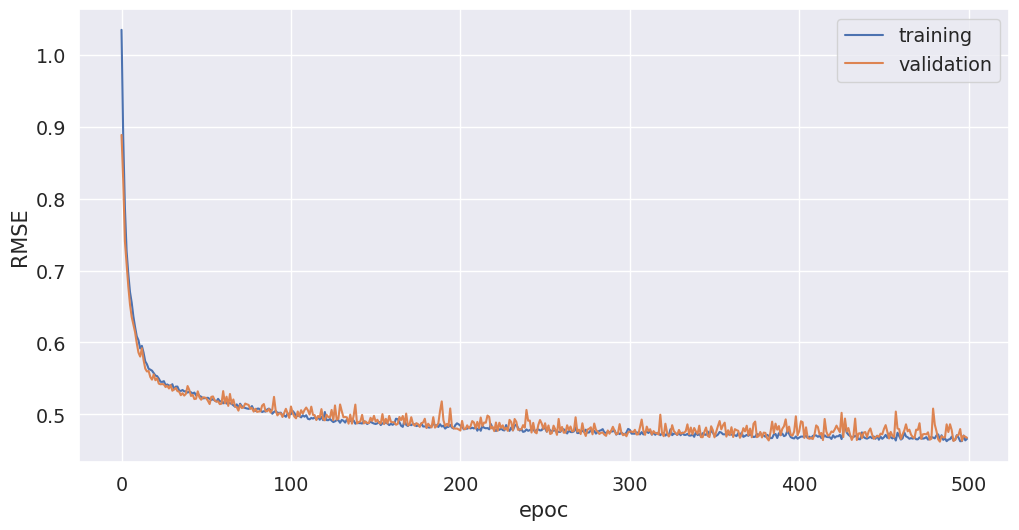

In [65]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("RMSE")
plt.xlabel("epoc")
plt.plot(loss, label="training")
plt.plot(val_loss, label="validation")
plt.legend()

Vemos que el poder de generalización de esta red es mucho mejor que la anterior (los errores de validation y training no están tan separados y no perdí precisión o accuracy)

## Clasificación

Primero un ejemplo de clasificación binaria y después uno de clasificación con n clases

In [66]:
header = [
    "pelvic incidence",
    "pelvic tilt",
    "lumbar lordosis angle",
    "sacral slope",
    "pelvic radius",
    "grade of spondylolisthesis",
    "class",
]

In [67]:
header

['pelvic incidence',
 'pelvic tilt',
 'lumbar lordosis angle',
 'sacral slope',
 'pelvic radius',
 'grade of spondylolisthesis',
 'class']

In [68]:
data = pd.read_csv(
    "https://drive.google.com/uc?export=download&id=1T9VNcGMatXFrg7JpIkwHpqHrb8dGKvtP",
    names=header,
    index_col=False,
)
data.head()

pelvic incidence  pelvic tilt  lumbar lordosis angle  sacral slope  \
0             63.03        22.55                  39.61         40.48   
1             39.06        10.06                  25.02         29.00   
2             68.83        22.22                  50.09         46.61   
3             69.30        24.65                  44.31         44.64   
4             49.71         9.65                  28.32         40.06   

   pelvic radius  grade of spondylolisthesis class  
0          98.67                       -0.25    AB  
1         114.41                        4.56    AB  
2         105.99                       -3.53    AB  
3         101.87                       11.21    AB  
4         108.17                        7.92    AB

/opt/hostedtoolcache/Python/3.7.9/x64/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<AxesSubplot:title={'center':'pelvic incidence'}>,
        <AxesSubplot:title={'center':'pelvic tilt'}>],
       [<AxesSubplot:title={'center':'lumbar lordosis angle'}>,
        <AxesSubplot:title={'center':'sacral slope'}>],
       [<AxesSubplot:title={'center':'pelvic radius'}>,
        <AxesSubplot:title={'center':'grade of spondylolisthesis'}>]],
      dtype=object)

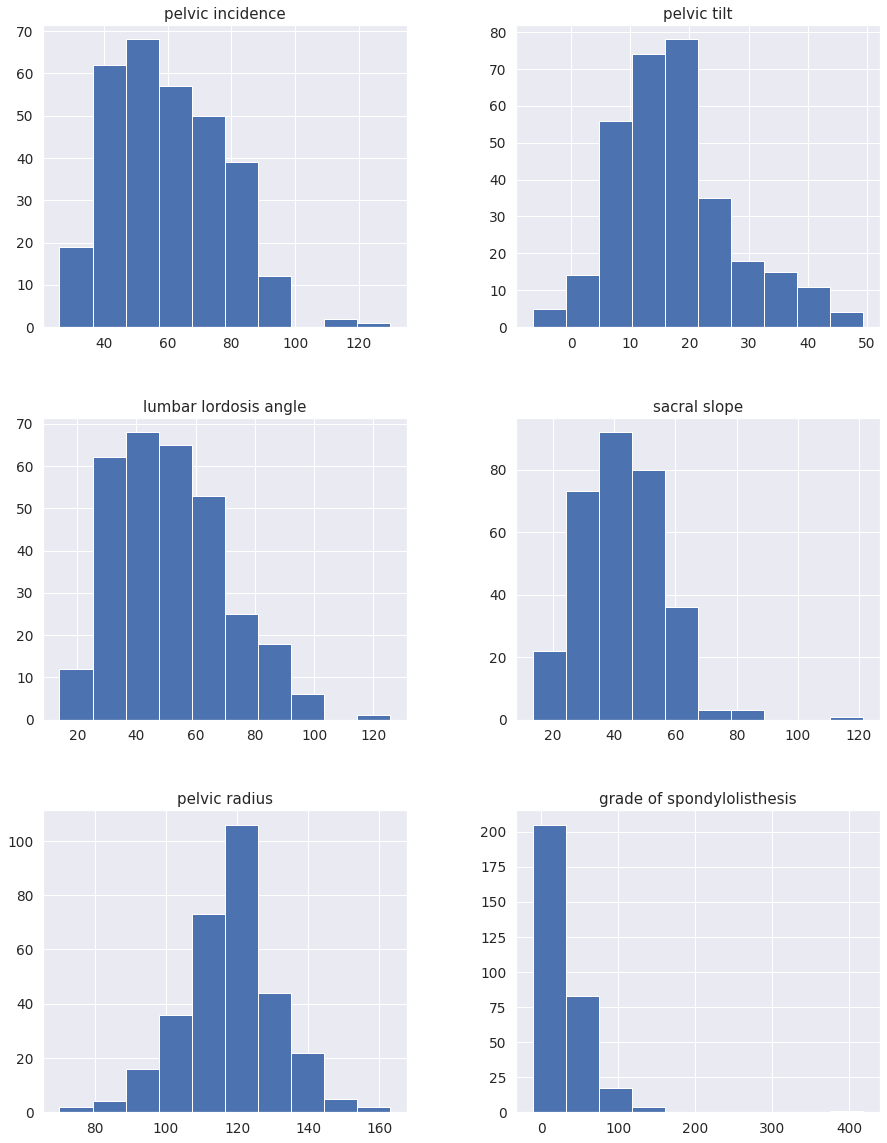

In [69]:
fig = plt.figure(figsize=(15, 20))
ax = fig.gca()

data.hist(ax=ax)

Los datasets no están tan mal distribuídos así que elijo no normalizarlos

Paso los valores de "AB" y "NO" a valores categóricos

In [70]:
label_encoder = preprocessing.LabelEncoder()

In [71]:
target = np.unique(data["class"])

In [72]:
label_encoder.fit(target)

LabelEncoder()

In [73]:
data["class"] = label_encoder.transform(data["class"])

In [74]:
data.head()

pelvic incidence  pelvic tilt  lumbar lordosis angle  sacral slope  \
0             63.03        22.55                  39.61         40.48   
1             39.06        10.06                  25.02         29.00   
2             68.83        22.22                  50.09         46.61   
3             69.30        24.65                  44.31         44.64   
4             49.71         9.65                  28.32         40.06   

   pelvic radius  grade of spondylolisthesis  class  
0          98.67                       -0.25      0  
1         114.41                        4.56      0  
2         105.99                       -3.53      0  
3         101.87                       11.21      0  
4         108.17                        7.92      0

In [75]:
x_columns = [
    "pelvic incidence",
    "pelvic tilt",
    "lumbar lordosis angle",
    "sacral slope",
    "pelvic radius",
    "grade of spondylolisthesis",
]
x_data = data[x_columns]
y_data = data['class']

In [76]:
x_data.head()

pelvic incidence  pelvic tilt  lumbar lordosis angle  sacral slope  \
0             63.03        22.55                  39.61         40.48   
1             39.06        10.06                  25.02         29.00   
2             68.83        22.22                  50.09         46.61   
3             69.30        24.65                  44.31         44.64   
4             49.71         9.65                  28.32         40.06   

   pelvic radius  grade of spondylolisthesis  
0          98.67                       -0.25  
1         114.41                        4.56  
2         105.99                       -3.53  
3         101.87                       11.21  
4         108.17                        7.92

Separo los datos en train y validation

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(
    x_data, y_data, test_size=0.4, random_state=66
)

Entreno un modelo sencillo de clasificación, un árbol de decisión para tener una referencia de error.

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
model_tree = DecisionTreeClassifier(criterion="entropy")

In [80]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

Calculo el accuracy de mi árbol entrenado:

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
pred = model_tree.predict(X_validation)

In [83]:
decision_tree_acc = accuracy_score(pred, y_validation)
decision_tree_acc

0.7741935483870968

Mi red tiene que tener como cantidad de neuronas en la capa de salida la cantidad de clases si uso softmax o 1 neurona para el caso que use una activación de tipo sigmoide

In [84]:
num_classes = 2

In [85]:
model = Sequential()
model.add(Dense(8, input_shape=(6,), activation='tanh'))
model.add(Dense(num_classes, activation="softmax"))

In [86]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 8)                 56        
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 18        
Total params: 74
Trainable params: 74
Non-trainable params: 0
_________________________________________________________________


El modelo necesita los labels en one hot encoding, uso la función to_categorical para transformarlos

In [87]:
y_train[1:10]

235    1
66     0
143    0
256    1
18     0
279    1
273    1
120    0
154    0
Name: class, dtype: int64

In [88]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_validation, num_classes)

In [89]:
y_train[1:10]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

Ahora si puedo entrenar!

In [90]:
history = model.fit(
    X_train.values, y_train, epochs=100, validation_data=(X_validation.values, y_test)
)

Train on 186 samples, validate on 124 samples
Epoch 1/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0054 - accuracy: 0.6875

186/186 [==============================] - 0s 403us/step - loss: 0.9457 - accuracy: 0.7043 - val_loss: 1.1291 - val_accuracy: 0.6371


Epoch 2/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9754 - accuracy: 0.6875

186/186 [==============================] - 0s 39us/step - loss: 0.9196 - accuracy: 0.7043 - val_loss: 1.0969 - val_accuracy: 0.6371


Epoch 3/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.1287 - accuracy: 0.6250

186/186 [==============================] - 0s 40us/step - loss: 0.8933 - accuracy: 0.7043 - val_loss: 1.0658 - val_accuracy: 0.6371


Epoch 4/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7639 - accuracy: 0.7500

186/186 [==============================] - 0s 41us/step - loss: 0.8695 - accuracy: 0.7043 - val_loss: 1.0350 - val_accuracy: 0.6371


Epoch 5/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8155 - accuracy: 0.7188

186/186 [==============================] - 0s 39us/step - loss: 0.8439 - accuracy: 0.7043 - val_loss: 1.0059 - val_accuracy: 0.6371


Epoch 6/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6327 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.8225 - accuracy: 0.7043 - val_loss: 0.9772 - val_accuracy: 0.6371


Epoch 7/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7772 - accuracy: 0.7188

186/186 [==============================] - 0s 42us/step - loss: 0.8008 - accuracy: 0.7043 - val_loss: 0.9498 - val_accuracy: 0.6371


Epoch 8/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5314 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.7786 - accuracy: 0.7043 - val_loss: 0.9235 - val_accuracy: 0.6371


Epoch 9/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7273 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.7602 - accuracy: 0.7043 - val_loss: 0.8976 - val_accuracy: 0.6371


Epoch 10/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5174 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.7391 - accuracy: 0.7043 - val_loss: 0.8747 - val_accuracy: 0.6371


Epoch 11/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8937 - accuracy: 0.6250

186/186 [==============================] - 0s 44us/step - loss: 0.7226 - accuracy: 0.7043 - val_loss: 0.8515 - val_accuracy: 0.6371


Epoch 12/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7425 - accuracy: 0.6875

186/186 [==============================] - 0s 43us/step - loss: 0.7045 - accuracy: 0.7043 - val_loss: 0.8291 - val_accuracy: 0.6371


Epoch 13/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7291 - accuracy: 0.6875

186/186 [==============================] - 0s 44us/step - loss: 0.6869 - accuracy: 0.7043 - val_loss: 0.8078 - val_accuracy: 0.6371


Epoch 14/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7070 - accuracy: 0.6875

186/186 [==============================] - 0s 44us/step - loss: 0.6732 - accuracy: 0.7043 - val_loss: 0.7876 - val_accuracy: 0.6371


Epoch 15/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8611 - accuracy: 0.5938

186/186 [==============================] - 0s 44us/step - loss: 0.6592 - accuracy: 0.7043 - val_loss: 0.7691 - val_accuracy: 0.6371


Epoch 16/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6729 - accuracy: 0.6875

186/186 [==============================] - 0s 43us/step - loss: 0.6451 - accuracy: 0.7043 - val_loss: 0.7506 - val_accuracy: 0.6371


Epoch 17/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7105 - accuracy: 0.6562

186/186 [==============================] - 0s 45us/step - loss: 0.6310 - accuracy: 0.7043 - val_loss: 0.7309 - val_accuracy: 0.6371


Epoch 18/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6073 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.6171 - accuracy: 0.7043 - val_loss: 0.7118 - val_accuracy: 0.6371


Epoch 19/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6429 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.6021 - accuracy: 0.7043 - val_loss: 0.6933 - val_accuracy: 0.6371


Epoch 20/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5352 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.5851 - accuracy: 0.7043 - val_loss: 0.6758 - val_accuracy: 0.6371


Epoch 21/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4786 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.5706 - accuracy: 0.7043 - val_loss: 0.6596 - val_accuracy: 0.6371


Epoch 22/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6259 - accuracy: 0.6562

186/186 [==============================] - 0s 44us/step - loss: 0.5529 - accuracy: 0.7043 - val_loss: 0.6420 - val_accuracy: 0.6371


Epoch 23/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4456 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.5334 - accuracy: 0.7043 - val_loss: 0.6245 - val_accuracy: 0.6371


Epoch 24/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4069 - accuracy: 0.8125

186/186 [==============================] - 0s 42us/step - loss: 0.5161 - accuracy: 0.7043 - val_loss: 0.6092 - val_accuracy: 0.6371


Epoch 25/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5127 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.5011 - accuracy: 0.7043 - val_loss: 0.5916 - val_accuracy: 0.6371


Epoch 26/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4623 - accuracy: 0.7188

186/186 [==============================] - 0s 42us/step - loss: 0.4937 - accuracy: 0.7043 - val_loss: 0.5789 - val_accuracy: 0.6371


Epoch 27/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3252 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.4855 - accuracy: 0.7043 - val_loss: 0.5670 - val_accuracy: 0.6371


Epoch 28/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4653 - accuracy: 0.6875

186/186 [==============================] - 0s 42us/step - loss: 0.4769 - accuracy: 0.7043 - val_loss: 0.5568 - val_accuracy: 0.6371


Epoch 29/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4103 - accuracy: 0.7500

186/186 [==============================] - 0s 43us/step - loss: 0.4695 - accuracy: 0.7043 - val_loss: 0.5478 - val_accuracy: 0.6371


Epoch 30/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4542 - accuracy: 0.6875

186/186 [==============================] - 0s 41us/step - loss: 0.4625 - accuracy: 0.7043 - val_loss: 0.5387 - val_accuracy: 0.6371


Epoch 31/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4442 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.4549 - accuracy: 0.7043 - val_loss: 0.5318 - val_accuracy: 0.6371


Epoch 32/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4160 - accuracy: 0.6875

186/186 [==============================] - 0s 41us/step - loss: 0.4499 - accuracy: 0.7043 - val_loss: 0.5255 - val_accuracy: 0.6371


Epoch 33/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4220 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.4451 - accuracy: 0.7043 - val_loss: 0.5207 - val_accuracy: 0.6371


Epoch 34/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3989 - accuracy: 0.7188

186/186 [==============================] - 0s 42us/step - loss: 0.4399 - accuracy: 0.7043 - val_loss: 0.5153 - val_accuracy: 0.6371


Epoch 35/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4682 - accuracy: 0.6250

186/186 [==============================] - 0s 43us/step - loss: 0.4360 - accuracy: 0.7043 - val_loss: 0.5121 - val_accuracy: 0.6371


Epoch 36/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5205 - accuracy: 0.5938

186/186 [==============================] - 0s 43us/step - loss: 0.4318 - accuracy: 0.7043 - val_loss: 0.5071 - val_accuracy: 0.6371


Epoch 37/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4754 - accuracy: 0.6562

186/186 [==============================] - 0s 42us/step - loss: 0.4286 - accuracy: 0.7043 - val_loss: 0.5026 - val_accuracy: 0.6371


Epoch 38/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4406 - accuracy: 0.6562

186/186 [==============================] - 0s 41us/step - loss: 0.4240 - accuracy: 0.7043 - val_loss: 0.5000 - val_accuracy: 0.6371


Epoch 39/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5239 - accuracy: 0.5938

186/186 [==============================] - 0s 44us/step - loss: 0.4207 - accuracy: 0.7043 - val_loss: 0.4985 - val_accuracy: 0.6371


Epoch 40/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4500 - accuracy: 0.6562

186/186 [==============================] - 0s 41us/step - loss: 0.4180 - accuracy: 0.7043 - val_loss: 0.4957 - val_accuracy: 0.6371


Epoch 41/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3667 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.4151 - accuracy: 0.7043 - val_loss: 0.4933 - val_accuracy: 0.6371


Epoch 42/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3461 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.4134 - accuracy: 0.7043 - val_loss: 0.4910 - val_accuracy: 0.6371


Epoch 43/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3471 - accuracy: 0.7188

186/186 [==============================] - 0s 43us/step - loss: 0.4114 - accuracy: 0.7043 - val_loss: 0.4890 - val_accuracy: 0.6371


Epoch 44/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4352 - accuracy: 0.6250

186/186 [==============================] - 0s 49us/step - loss: 0.4099 - accuracy: 0.7043 - val_loss: 0.4872 - val_accuracy: 0.6371


Epoch 45/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4878 - accuracy: 0.6562

186/186 [==============================] - 0s 41us/step - loss: 0.4083 - accuracy: 0.7043 - val_loss: 0.4870 - val_accuracy: 0.6371


Epoch 46/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5719 - accuracy: 0.5938



186/186 [==============================] - 0s 48us/step - loss: 0.4065 - accuracy: 0.7312 - val_loss: 0.4842 - val_accuracy: 0.7823


Epoch 47/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3909 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.4050 - accuracy: 0.8548 - val_loss: 0.4840 - val_accuracy: 0.7581


Epoch 48/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3635 - accuracy: 0.8750

186/186 [==============================] - 0s 42us/step - loss: 0.4031 - accuracy: 0.8495 - val_loss: 0.4819 - val_accuracy: 0.7581


Epoch 49/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4214 - accuracy: 0.8438

186/186 [==============================] - 0s 41us/step - loss: 0.4019 - accuracy: 0.8495 - val_loss: 0.4823 - val_accuracy: 0.7581


Epoch 50/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3783 - accuracy: 0.8125

186/186 [==============================] - 0s 42us/step - loss: 0.4001 - accuracy: 0.8441 - val_loss: 0.4798 - val_accuracy: 0.7581


Epoch 51/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3701 - accuracy: 0.8125

186/186 [==============================] - 0s 42us/step - loss: 0.3992 - accuracy: 0.8495 - val_loss: 0.4789 - val_accuracy: 0.7581


Epoch 52/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4298 - accuracy: 0.7500

186/186 [==============================] - 0s 42us/step - loss: 0.3970 - accuracy: 0.8441 - val_loss: 0.4794 - val_accuracy: 0.7581


Epoch 53/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3384 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.3968 - accuracy: 0.8495 - val_loss: 0.4804 - val_accuracy: 0.7500


Epoch 54/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3444 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.3952 - accuracy: 0.8441 - val_loss: 0.4785 - val_accuracy: 0.7500


Epoch 55/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3176 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3934 - accuracy: 0.8495 - val_loss: 0.4762 - val_accuracy: 0.7581


Epoch 56/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4654 - accuracy: 0.8125

186/186 [==============================] - 0s 41us/step - loss: 0.3925 - accuracy: 0.8495 - val_loss: 0.4768 - val_accuracy: 0.7500


Epoch 57/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4365 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3919 - accuracy: 0.8495 - val_loss: 0.4747 - val_accuracy: 0.7581


Epoch 58/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3968 - accuracy: 0.8125

186/186 [==============================] - 0s 42us/step - loss: 0.3903 - accuracy: 0.8495 - val_loss: 0.4763 - val_accuracy: 0.7500


Epoch 59/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3463 - accuracy: 0.8438

186/186 [==============================] - 0s 41us/step - loss: 0.3891 - accuracy: 0.8495 - val_loss: 0.4744 - val_accuracy: 0.7500


Epoch 60/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4463 - accuracy: 0.8125

186/186 [==============================] - 0s 40us/step - loss: 0.3884 - accuracy: 0.8495 - val_loss: 0.4752 - val_accuracy: 0.7419


Epoch 61/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3494 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3867 - accuracy: 0.8495 - val_loss: 0.4733 - val_accuracy: 0.7500


Epoch 62/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3597 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3866 - accuracy: 0.8495 - val_loss: 0.4717 - val_accuracy: 0.7500


Epoch 63/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3728 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3855 - accuracy: 0.8495 - val_loss: 0.4732 - val_accuracy: 0.7419


Epoch 64/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4908 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3842 - accuracy: 0.8441 - val_loss: 0.4716 - val_accuracy: 0.7500


Epoch 65/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3715 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3843 - accuracy: 0.8548 - val_loss: 0.4695 - val_accuracy: 0.7500


Epoch 66/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3838 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3834 - accuracy: 0.8495 - val_loss: 0.4687 - val_accuracy: 0.7500


Epoch 67/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3629 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.3818 - accuracy: 0.8495 - val_loss: 0.4715 - val_accuracy: 0.7419


Epoch 68/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3580 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3809 - accuracy: 0.8495 - val_loss: 0.4711 - val_accuracy: 0.7419


Epoch 69/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3775 - accuracy: 0.8750

186/186 [==============================] - 0s 42us/step - loss: 0.3802 - accuracy: 0.8495 - val_loss: 0.4695 - val_accuracy: 0.7339


Epoch 70/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3325 - accuracy: 0.8750

186/186 [==============================] - 0s 41us/step - loss: 0.3784 - accuracy: 0.8441 - val_loss: 0.4663 - val_accuracy: 0.7500


Epoch 71/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3885 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3797 - accuracy: 0.8548 - val_loss: 0.4641 - val_accuracy: 0.7500


Epoch 72/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3317 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3772 - accuracy: 0.8548 - val_loss: 0.4649 - val_accuracy: 0.7500


Epoch 73/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.2485 - accuracy: 0.9688

186/186 [==============================] - 0s 41us/step - loss: 0.3760 - accuracy: 0.8495 - val_loss: 0.4644 - val_accuracy: 0.7500


Epoch 74/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4267 - accuracy: 0.7500

186/186 [==============================] - 0s 43us/step - loss: 0.3745 - accuracy: 0.8441 - val_loss: 0.4647 - val_accuracy: 0.7419


Epoch 75/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.2951 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3740 - accuracy: 0.8387 - val_loss: 0.4641 - val_accuracy: 0.7419


Epoch 76/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3537 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.3739 - accuracy: 0.8387 - val_loss: 0.4661 - val_accuracy: 0.7339


Epoch 77/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3603 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.3723 - accuracy: 0.8495 - val_loss: 0.4641 - val_accuracy: 0.7339


Epoch 78/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4392 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.3726 - accuracy: 0.8441 - val_loss: 0.4597 - val_accuracy: 0.7500


Epoch 79/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3528 - accuracy: 0.9062

186/186 [==============================] - 0s 42us/step - loss: 0.3702 - accuracy: 0.8441 - val_loss: 0.4610 - val_accuracy: 0.7419


Epoch 80/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4242 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.3691 - accuracy: 0.8441 - val_loss: 0.4637 - val_accuracy: 0.7419


Epoch 81/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4752 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3680 - accuracy: 0.8495 - val_loss: 0.4635 - val_accuracy: 0.7419


Epoch 82/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4111 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.3672 - accuracy: 0.8441 - val_loss: 0.4604 - val_accuracy: 0.7419


Epoch 83/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3293 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.3664 - accuracy: 0.8495 - val_loss: 0.4609 - val_accuracy: 0.7419


Epoch 84/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3067 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.3654 - accuracy: 0.8441 - val_loss: 0.4608 - val_accuracy: 0.7419


Epoch 85/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4184 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3646 - accuracy: 0.8441 - val_loss: 0.4598 - val_accuracy: 0.7419


Epoch 86/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4186 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3639 - accuracy: 0.8495 - val_loss: 0.4595 - val_accuracy: 0.7419


Epoch 87/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3521 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.3635 - accuracy: 0.8495 - val_loss: 0.4588 - val_accuracy: 0.7419


Epoch 88/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3602 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3625 - accuracy: 0.8495 - val_loss: 0.4588 - val_accuracy: 0.7419


Epoch 89/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3122 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3621 - accuracy: 0.8441 - val_loss: 0.4597 - val_accuracy: 0.7419


Epoch 90/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4079 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3613 - accuracy: 0.8495 - val_loss: 0.4595 - val_accuracy: 0.7419


Epoch 91/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3634 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.3605 - accuracy: 0.8441 - val_loss: 0.4579 - val_accuracy: 0.7419


Epoch 92/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3704 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3603 - accuracy: 0.8495 - val_loss: 0.4565 - val_accuracy: 0.7419


Epoch 93/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3169 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3601 - accuracy: 0.8441 - val_loss: 0.4569 - val_accuracy: 0.7419


Epoch 94/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3568 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3608 - accuracy: 0.8495 - val_loss: 0.4541 - val_accuracy: 0.7500


Epoch 95/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3419 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.3584 - accuracy: 0.8495 - val_loss: 0.4562 - val_accuracy: 0.7419


Epoch 96/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3372 - accuracy: 0.8125

186/186 [==============================] - 0s 42us/step - loss: 0.3584 - accuracy: 0.8441 - val_loss: 0.4591 - val_accuracy: 0.7339


Epoch 97/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.2923 - accuracy: 0.8750

186/186 [==============================] - 0s 42us/step - loss: 0.3581 - accuracy: 0.8495 - val_loss: 0.4585 - val_accuracy: 0.7419


Epoch 98/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.2979 - accuracy: 0.8750

186/186 [==============================] - 0s 41us/step - loss: 0.3576 - accuracy: 0.8495 - val_loss: 0.4578 - val_accuracy: 0.7419


Epoch 99/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3183 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3566 - accuracy: 0.8441 - val_loss: 0.4545 - val_accuracy: 0.7419


Epoch 100/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4455 - accuracy: 0.7500

186/186 [==============================] - 0s 43us/step - loss: 0.3562 - accuracy: 0.8495 - val_loss: 0.4541 - val_accuracy: 0.7419


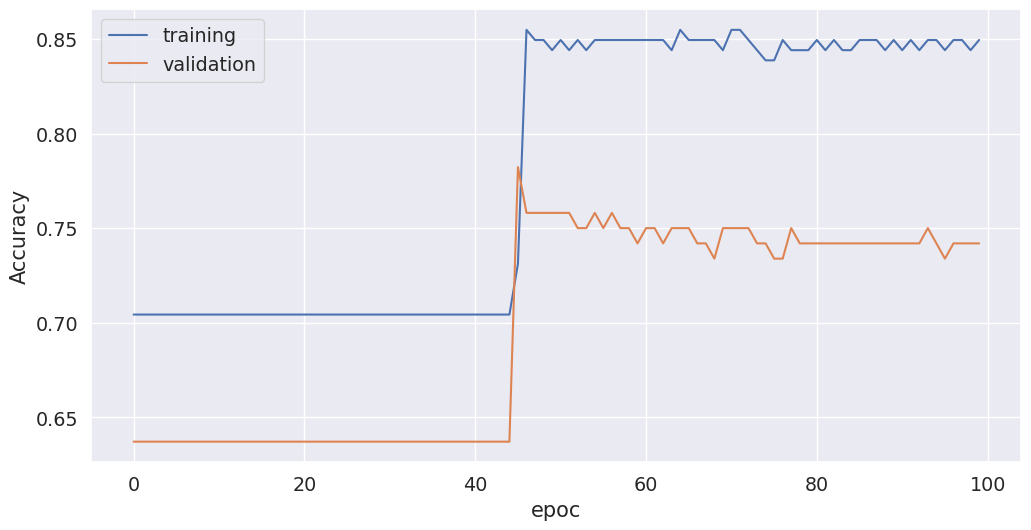

In [91]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

A medida que las red se va haciendo más profunda conviene usar relu. Agrego relu + regularizacion y cambio optimizador

In [92]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='relu'))
model.add(Dense(num_classes, activation="softmax"))

In [93]:
model.compile(
    loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy']
)
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 16)                112       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_4 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_30 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_31 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_______________________________________________________

In [94]:
history = model.fit(
    X_train.values, y_train, epochs=100, validation_data=(X_validation.values, y_test)
)

Train on 186 samples, validate on 124 samples
Epoch 1/100
 32/186 [====>.........................] - ETA: 0s - loss: 14.7202 - accuracy: 0.3750

186/186 [==============================] - 0s 905us/step - loss: 12.5293 - accuracy: 0.5000 - val_loss: 8.0206 - val_accuracy: 0.6371


Epoch 2/100
 32/186 [====>.........................] - ETA: 0s - loss: 14.2922 - accuracy: 0.5312

186/186 [==============================] - 0s 58us/step - loss: 12.4150 - accuracy: 0.5215 - val_loss: 7.9255 - val_accuracy: 0.6371


Epoch 3/100
 32/186 [====>.........................] - ETA: 0s - loss: 6.7480 - accuracy: 0.6250

186/186 [==============================] - 0s 50us/step - loss: 10.3849 - accuracy: 0.5914 - val_loss: 6.2567 - val_accuracy: 0.6371


Epoch 4/100
 32/186 [====>.........................] - ETA: 0s - loss: 7.5148 - accuracy: 0.6250

186/186 [==============================] - 0s 54us/step - loss: 8.0302 - accuracy: 0.5430 - val_loss: 5.7061 - val_accuracy: 0.6371


Epoch 5/100
 32/186 [====>.........................] - ETA: 0s - loss: 7.4884 - accuracy: 0.5938

186/186 [==============================] - 0s 54us/step - loss: 5.7976 - accuracy: 0.6290 - val_loss: 5.0365 - val_accuracy: 0.6371


Epoch 6/100
 32/186 [====>.........................] - ETA: 0s - loss: 7.3042 - accuracy: 0.5312

186/186 [==============================] - 0s 50us/step - loss: 7.7911 - accuracy: 0.5269 - val_loss: 4.4165 - val_accuracy: 0.6371


Epoch 7/100
 32/186 [====>.........................] - ETA: 0s - loss: 5.1449 - accuracy: 0.6250

186/186 [==============================] - 0s 51us/step - loss: 5.8127 - accuracy: 0.6290 - val_loss: 4.0976 - val_accuracy: 0.6371


Epoch 8/100
 32/186 [====>.........................] - ETA: 0s - loss: 7.6308 - accuracy: 0.4062

186/186 [==============================] - 0s 50us/step - loss: 5.4980 - accuracy: 0.5806 - val_loss: 3.3923 - val_accuracy: 0.6290


Epoch 9/100
 32/186 [====>.........................] - ETA: 0s - loss: 6.6557 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 5.5547 - accuracy: 0.5699 - val_loss: 2.7378 - val_accuracy: 0.5887


Epoch 10/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.6234 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 3.8990 - accuracy: 0.5699 - val_loss: 2.5828 - val_accuracy: 0.5806


Epoch 11/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.8390 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 4.1923 - accuracy: 0.6075 - val_loss: 2.1146 - val_accuracy: 0.5806


Epoch 12/100
 32/186 [====>.........................] - ETA: 0s - loss: 6.2179 - accuracy: 0.4688

186/186 [==============================] - 0s 52us/step - loss: 3.6744 - accuracy: 0.6022 - val_loss: 1.4920 - val_accuracy: 0.5484


Epoch 13/100
 32/186 [====>.........................] - ETA: 0s - loss: 5.5643 - accuracy: 0.6250

186/186 [==============================] - 0s 51us/step - loss: 4.3177 - accuracy: 0.5699 - val_loss: 1.1833 - val_accuracy: 0.5968


Epoch 14/100
 32/186 [====>.........................] - ETA: 0s - loss: 4.9882 - accuracy: 0.4688

186/186 [==============================] - 0s 51us/step - loss: 3.3465 - accuracy: 0.5753 - val_loss: 0.8350 - val_accuracy: 0.5726


Epoch 15/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.8312 - accuracy: 0.6250

186/186 [==============================] - 0s 49us/step - loss: 2.5616 - accuracy: 0.5914 - val_loss: 0.6952 - val_accuracy: 0.6048


Epoch 16/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.5886 - accuracy: 0.5938

186/186 [==============================] - 0s 51us/step - loss: 2.1314 - accuracy: 0.5753 - val_loss: 0.6509 - val_accuracy: 0.5887


Epoch 17/100
 32/186 [====>.........................] - ETA: 0s - loss: 4.5598 - accuracy: 0.5625

186/186 [==============================] - 0s 50us/step - loss: 3.2548 - accuracy: 0.5806 - val_loss: 0.6591 - val_accuracy: 0.5565


Epoch 18/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.6773 - accuracy: 0.6562

186/186 [==============================] - 0s 46us/step - loss: 1.9678 - accuracy: 0.6344 - val_loss: 0.6443 - val_accuracy: 0.5887


Epoch 19/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.7050 - accuracy: 0.5625

186/186 [==============================] - 0s 48us/step - loss: 1.9785 - accuracy: 0.6452 - val_loss: 0.6511 - val_accuracy: 0.5887


Epoch 20/100


 32/186 [====>.........................] - ETA: 0s - loss: 2.4108 - accuracy: 0.6250

186/186 [==============================] - 0s 56us/step - loss: 1.9543 - accuracy: 0.6398 - val_loss: 0.7471 - val_accuracy: 0.6048


Epoch 21/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.9024 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 1.9267 - accuracy: 0.6237 - val_loss: 0.6451 - val_accuracy: 0.5968


Epoch 22/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.8099 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 2.0020 - accuracy: 0.6452 - val_loss: 0.6425 - val_accuracy: 0.5645


Epoch 23/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.6076 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 1.7928 - accuracy: 0.6505 - val_loss: 0.6417 - val_accuracy: 0.5645


Epoch 24/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6267 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 1.8133 - accuracy: 0.6505 - val_loss: 0.6430 - val_accuracy: 0.5645


Epoch 25/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5464 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.9383 - accuracy: 0.6828 - val_loss: 0.6427 - val_accuracy: 0.5484


Epoch 26/100


 32/186 [====>.........................] - ETA: 0s - loss: 1.3621 - accuracy: 0.5938

186/186 [==============================] - 0s 49us/step - loss: 1.2537 - accuracy: 0.6613 - val_loss: 0.6455 - val_accuracy: 0.6048


Epoch 27/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.7107 - accuracy: 0.5625

186/186 [==============================] - 0s 49us/step - loss: 1.4703 - accuracy: 0.6452 - val_loss: 0.6392 - val_accuracy: 0.6129


Epoch 28/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.7380 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 1.4841 - accuracy: 0.6720 - val_loss: 0.6423 - val_accuracy: 0.5806


Epoch 29/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5096 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 1.5417 - accuracy: 0.6505 - val_loss: 0.6483 - val_accuracy: 0.5484


Epoch 30/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7832 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.9569 - accuracy: 0.6559 - val_loss: 0.6911 - val_accuracy: 0.6290


Epoch 31/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.0903 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 1.5276 - accuracy: 0.6452 - val_loss: 0.6398 - val_accuracy: 0.6048


Epoch 32/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8148 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.9611 - accuracy: 0.7204 - val_loss: 0.6370 - val_accuracy: 0.6129


Epoch 33/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.3092 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 1.6776 - accuracy: 0.6720 - val_loss: 0.6360 - val_accuracy: 0.6129


Epoch 34/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.7292 - accuracy: 0.5938

186/186 [==============================] - 0s 53us/step - loss: 1.1561 - accuracy: 0.6505 - val_loss: 0.6398 - val_accuracy: 0.5968


Epoch 35/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.2250 - accuracy: 0.5625

186/186 [==============================] - 0s 47us/step - loss: 1.0439 - accuracy: 0.6559 - val_loss: 0.6353 - val_accuracy: 0.6048


Epoch 36/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6458 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 1.0094 - accuracy: 0.6720 - val_loss: 0.6348 - val_accuracy: 0.6048


Epoch 37/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.7284 - accuracy: 0.7188



186/186 [==============================] - 0s 50us/step - loss: 0.9133 - accuracy: 0.6989 - val_loss: 0.6521 - val_accuracy: 0.6290


Epoch 38/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4606 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.8594 - accuracy: 0.6774 - val_loss: 0.6358 - val_accuracy: 0.5968


Epoch 39/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6245 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.7610 - accuracy: 0.6667 - val_loss: 0.7074 - val_accuracy: 0.6371


Epoch 40/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.0721 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 1.1217 - accuracy: 0.6720 - val_loss: 0.6339 - val_accuracy: 0.6210


Epoch 41/100


 32/186 [====>.........................] - ETA: 0s - loss: 1.0314 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 1.0854 - accuracy: 0.6774 - val_loss: 0.6387 - val_accuracy: 0.6371


Epoch 42/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.8244 - accuracy: 0.5625

186/186 [==============================] - 0s 56us/step - loss: 0.9280 - accuracy: 0.6559 - val_loss: 0.6407 - val_accuracy: 0.6371


Epoch 43/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5271 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.8608 - accuracy: 0.6935 - val_loss: 0.6353 - val_accuracy: 0.5968


Epoch 44/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.3372 - accuracy: 0.6250

186/186 [==============================] - 0s 45us/step - loss: 0.7729 - accuracy: 0.6935 - val_loss: 0.6308 - val_accuracy: 0.6048


Epoch 45/100


 32/186 [====>.........................] - ETA: 0s - loss: 1.0959 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.8689 - accuracy: 0.6828 - val_loss: 0.6430 - val_accuracy: 0.6290


Epoch 46/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6492 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 1.1759 - accuracy: 0.7366 - val_loss: 0.6278 - val_accuracy: 0.5726


Epoch 47/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6540 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.8356 - accuracy: 0.6613 - val_loss: 0.6301 - val_accuracy: 0.6290


Epoch 48/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5594 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.7098 - accuracy: 0.7312 - val_loss: 0.6329 - val_accuracy: 0.6290


Epoch 49/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7371 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.7332 - accuracy: 0.6720 - val_loss: 0.6196 - val_accuracy: 0.5887


Epoch 50/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6010 - accuracy: 0.5938

186/186 [==============================] - 0s 49us/step - loss: 0.5975 - accuracy: 0.6828 - val_loss: 0.6219 - val_accuracy: 0.6129


Epoch 51/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9164 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.7775 - accuracy: 0.7258 - val_loss: 0.6195 - val_accuracy: 0.6048


Epoch 52/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6367 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.9035 - accuracy: 0.6613 - val_loss: 0.6328 - val_accuracy: 0.6371


Epoch 53/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.2962 - accuracy: 0.6562



186/186 [==============================] - 0s 50us/step - loss: 0.7967 - accuracy: 0.6989 - val_loss: 0.6282 - val_accuracy: 0.5887


Epoch 54/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5645 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.5915 - accuracy: 0.7366 - val_loss: 0.6268 - val_accuracy: 0.6290


Epoch 55/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9984 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.7470 - accuracy: 0.6989 - val_loss: 0.6128 - val_accuracy: 0.6129


Epoch 56/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.8848 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.8448 - accuracy: 0.7097 - val_loss: 0.6080 - val_accuracy: 0.6210


Epoch 57/100


 32/186 [====>.........................] - ETA: 0s - loss: 1.1394 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.7754 - accuracy: 0.6720 - val_loss: 0.6107 - val_accuracy: 0.6048


Epoch 58/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5875 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.6442 - accuracy: 0.6935 - val_loss: 0.6484 - val_accuracy: 0.6452


Epoch 59/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7093 - accuracy: 0.6250

186/186 [==============================] - 0s 48us/step - loss: 0.7671 - accuracy: 0.6452 - val_loss: 0.6219 - val_accuracy: 0.6129


Epoch 60/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7188 - accuracy: 0.5938

186/186 [==============================] - 0s 51us/step - loss: 0.6726 - accuracy: 0.6828 - val_loss: 0.6095 - val_accuracy: 0.6129


Epoch 61/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4271 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.7093 - accuracy: 0.6828 - val_loss: 0.6090 - val_accuracy: 0.6210


Epoch 62/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4950 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.6072 - accuracy: 0.6720 - val_loss: 0.6164 - val_accuracy: 0.5887


Epoch 63/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6065 - accuracy: 0.5938

186/186 [==============================] - 0s 50us/step - loss: 0.5817 - accuracy: 0.6935 - val_loss: 0.6473 - val_accuracy: 0.6371


Epoch 64/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5904 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.7007 - accuracy: 0.7043 - val_loss: 0.6227 - val_accuracy: 0.6371


Epoch 65/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6672 - accuracy: 0.6562

186/186 [==============================] - 0s 48us/step - loss: 0.6744 - accuracy: 0.6935 - val_loss: 0.6166 - val_accuracy: 0.6210


Epoch 66/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8377 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.6157 - accuracy: 0.7473 - val_loss: 0.6303 - val_accuracy: 0.6210


Epoch 67/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6620 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.5962 - accuracy: 0.7043 - val_loss: 0.6227 - val_accuracy: 0.6371


Epoch 68/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6438 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 1.3231 - accuracy: 0.6989 - val_loss: 0.6133 - val_accuracy: 0.6290


Epoch 69/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4974 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.6039 - accuracy: 0.7366 - val_loss: 0.6090 - val_accuracy: 0.6129


Epoch 70/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8511 - accuracy: 0.5938

186/186 [==============================] - 0s 48us/step - loss: 0.6915 - accuracy: 0.7097 - val_loss: 0.5988 - val_accuracy: 0.6210


Epoch 71/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5072 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.6634 - accuracy: 0.7043 - val_loss: 0.6073 - val_accuracy: 0.6452


Epoch 72/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.3784 - accuracy: 0.5938

186/186 [==============================] - 0s 48us/step - loss: 0.8100 - accuracy: 0.6720 - val_loss: 0.6044 - val_accuracy: 0.6129


Epoch 73/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6025 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.6430 - accuracy: 0.7204 - val_loss: 0.5972 - val_accuracy: 0.5968


Epoch 74/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6453 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.7040 - accuracy: 0.6828 - val_loss: 0.6152 - val_accuracy: 0.6210


Epoch 75/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7715 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.5666 - accuracy: 0.7527 - val_loss: 0.5994 - val_accuracy: 0.5887


Epoch 76/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5696 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.6327 - accuracy: 0.6828 - val_loss: 0.6178 - val_accuracy: 0.6290


Epoch 77/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4713 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.6141 - accuracy: 0.7204 - val_loss: 0.6103 - val_accuracy: 0.6532


Epoch 78/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5046 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.6713 - accuracy: 0.6882 - val_loss: 0.5950 - val_accuracy: 0.6048


Epoch 79/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4193 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.5928 - accuracy: 0.7258 - val_loss: 0.6184 - val_accuracy: 0.6532


Epoch 80/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5439 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.5805 - accuracy: 0.7151 - val_loss: 0.5952 - val_accuracy: 0.6129


Epoch 81/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4664 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.5971 - accuracy: 0.7312 - val_loss: 0.6004 - val_accuracy: 0.6129


Epoch 82/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5755 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.5969 - accuracy: 0.7043 - val_loss: 0.5999 - val_accuracy: 0.6129


Epoch 83/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5891 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.6209 - accuracy: 0.7097 - val_loss: 0.5924 - val_accuracy: 0.6290


Epoch 84/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5463 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.6970 - accuracy: 0.6720 - val_loss: 0.6013 - val_accuracy: 0.6129


Epoch 85/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6291 - accuracy: 0.5938

186/186 [==============================] - 0s 52us/step - loss: 0.5347 - accuracy: 0.6989 - val_loss: 0.5854 - val_accuracy: 0.5887


Epoch 86/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5082 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.6842 - accuracy: 0.7151 - val_loss: 0.5848 - val_accuracy: 0.5968


Epoch 87/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0583 - accuracy: 0.6250

186/186 [==============================] - 0s 54us/step - loss: 0.6683 - accuracy: 0.7151 - val_loss: 0.6138 - val_accuracy: 0.6290


Epoch 88/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8959 - accuracy: 0.6250

186/186 [==============================] - 0s 47us/step - loss: 0.6607 - accuracy: 0.6828 - val_loss: 0.6024 - val_accuracy: 0.6210


Epoch 89/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6079 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 0.5923 - accuracy: 0.6989 - val_loss: 0.5955 - val_accuracy: 0.6210


Epoch 90/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7399 - accuracy: 0.6250

186/186 [==============================] - 0s 48us/step - loss: 0.6081 - accuracy: 0.6935 - val_loss: 0.6163 - val_accuracy: 0.6371


Epoch 91/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6154 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.5897 - accuracy: 0.7204 - val_loss: 0.5868 - val_accuracy: 0.6129


Epoch 92/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4971 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.5755 - accuracy: 0.7043 - val_loss: 0.5835 - val_accuracy: 0.6048


Epoch 93/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6440 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.6124 - accuracy: 0.7097 - val_loss: 0.5969 - val_accuracy: 0.6290


Epoch 94/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6118 - accuracy: 0.6250

186/186 [==============================] - 0s 48us/step - loss: 0.5656 - accuracy: 0.6989 - val_loss: 0.6007 - val_accuracy: 0.6290


Epoch 95/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4792 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.5451 - accuracy: 0.7366 - val_loss: 0.5846 - val_accuracy: 0.6210


Epoch 96/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5331 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.5730 - accuracy: 0.6935 - val_loss: 0.5929 - val_accuracy: 0.6210


Epoch 97/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4460 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.5813 - accuracy: 0.7903 - val_loss: 0.5889 - val_accuracy: 0.6129


Epoch 98/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6319 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 0.5778 - accuracy: 0.7204 - val_loss: 0.5851 - val_accuracy: 0.6210


Epoch 99/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6958 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 0.5781 - accuracy: 0.7151 - val_loss: 0.5980 - val_accuracy: 0.6290


Epoch 100/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7584 - accuracy: 0.5938

186/186 [==============================] - 0s 49us/step - loss: 0.6460 - accuracy: 0.7097 - val_loss: 0.5817 - val_accuracy: 0.6290


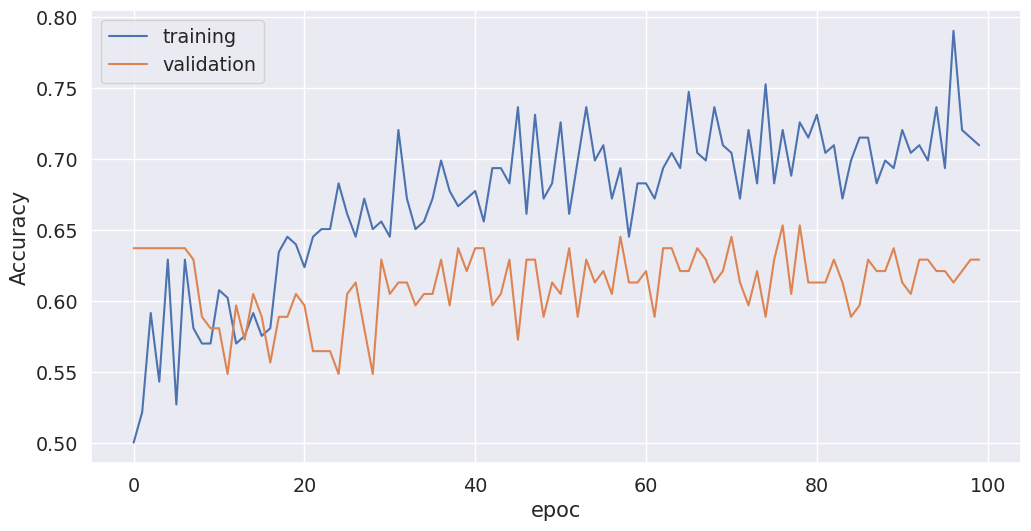

In [95]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

Cambio de nuevo el optimizador por RMSprop

In [96]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='relu'))
model.add(Dense(num_classes, activation="softmax"))

In [97]:
opt = keras.optimizers.RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 16)                112       
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_6 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_34 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_35 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_______________________________________________________

In [98]:
history = model.fit(
    X_train.values, y_train, epochs=100, validation_data=(X_validation.values, y_test)
)

Train on 186 samples, validate on 124 samples
Epoch 1/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.3266 - accuracy: 0.5938

186/186 [==============================] - 0s 785us/step - loss: 1.3491 - accuracy: 0.5269 - val_loss: 0.6979 - val_accuracy: 0.6210


Epoch 2/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.7934 - accuracy: 0.4375

186/186 [==============================] - 0s 55us/step - loss: 1.1361 - accuracy: 0.5968 - val_loss: 0.6942 - val_accuracy: 0.6290


Epoch 3/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0476 - accuracy: 0.5312

186/186 [==============================] - 0s 52us/step - loss: 0.9339 - accuracy: 0.6344 - val_loss: 0.6898 - val_accuracy: 0.6290


Epoch 4/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7988 - accuracy: 0.5312

186/186 [==============================] - 0s 50us/step - loss: 0.6904 - accuracy: 0.6344 - val_loss: 0.6895 - val_accuracy: 0.6371


Epoch 5/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.2006 - accuracy: 0.6250

186/186 [==============================] - 0s 51us/step - loss: 0.8488 - accuracy: 0.6290 - val_loss: 0.6872 - val_accuracy: 0.6371


Epoch 6/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8484 - accuracy: 0.6250

186/186 [==============================] - 0s 53us/step - loss: 0.7581 - accuracy: 0.6882 - val_loss: 0.6821 - val_accuracy: 0.6371


Epoch 7/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8554 - accuracy: 0.5938

186/186 [==============================] - 0s 59us/step - loss: 0.7168 - accuracy: 0.6774 - val_loss: 0.6820 - val_accuracy: 0.6371


Epoch 8/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7014 - accuracy: 0.5000

186/186 [==============================] - 0s 51us/step - loss: 0.6146 - accuracy: 0.6935 - val_loss: 0.6789 - val_accuracy: 0.6371


Epoch 9/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5871 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.6288 - accuracy: 0.6935 - val_loss: 0.6800 - val_accuracy: 0.6371


Epoch 10/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6607 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.6949 - accuracy: 0.6667 - val_loss: 0.6695 - val_accuracy: 0.6371


Epoch 11/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7885 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.7302 - accuracy: 0.6774 - val_loss: 0.6702 - val_accuracy: 0.6371


Epoch 12/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6118 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.6493 - accuracy: 0.7043 - val_loss: 0.6680 - val_accuracy: 0.6371


Epoch 13/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6449 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.6546 - accuracy: 0.6774 - val_loss: 0.6658 - val_accuracy: 0.6371


Epoch 14/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6087 - accuracy: 0.6562

186/186 [==============================] - 0s 54us/step - loss: 0.6798 - accuracy: 0.6882 - val_loss: 0.6707 - val_accuracy: 0.6371


Epoch 15/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6977 - accuracy: 0.6562

186/186 [==============================] - 0s 51us/step - loss: 0.6441 - accuracy: 0.6828 - val_loss: 0.6725 - val_accuracy: 0.6371


Epoch 16/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6388 - accuracy: 0.6250

186/186 [==============================] - 0s 49us/step - loss: 0.6245 - accuracy: 0.6989 - val_loss: 0.6680 - val_accuracy: 0.6371


Epoch 17/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6628 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.6162 - accuracy: 0.6989 - val_loss: 0.6555 - val_accuracy: 0.6371


Epoch 18/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6006 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.5685 - accuracy: 0.6989 - val_loss: 0.6523 - val_accuracy: 0.6371


Epoch 19/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7904 - accuracy: 0.6250

186/186 [==============================] - 0s 48us/step - loss: 0.6417 - accuracy: 0.6935 - val_loss: 0.6505 - val_accuracy: 0.6371


Epoch 20/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6497 - accuracy: 0.5312



186/186 [==============================] - 0s 47us/step - loss: 0.5884 - accuracy: 0.6989 - val_loss: 0.6451 - val_accuracy: 0.6371


Epoch 21/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5920 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.5432 - accuracy: 0.7151 - val_loss: 0.6421 - val_accuracy: 0.6371


Epoch 22/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5107 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.5848 - accuracy: 0.7097 - val_loss: 0.6378 - val_accuracy: 0.6371


Epoch 23/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4625 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.5129 - accuracy: 0.7043 - val_loss: 0.6269 - val_accuracy: 0.6371


Epoch 24/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6411 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 0.5631 - accuracy: 0.6882 - val_loss: 0.6234 - val_accuracy: 0.6371


Epoch 25/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.7019 - accuracy: 0.5938

186/186 [==============================] - 0s 56us/step - loss: 0.6184 - accuracy: 0.6989 - val_loss: 0.6210 - val_accuracy: 0.6371


Epoch 26/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6270 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.5676 - accuracy: 0.6989 - val_loss: 0.6140 - val_accuracy: 0.6371


Epoch 27/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5640 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.5528 - accuracy: 0.7043 - val_loss: 0.6085 - val_accuracy: 0.6371


Epoch 28/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5107 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.5545 - accuracy: 0.6882 - val_loss: 0.6074 - val_accuracy: 0.6371


Epoch 29/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5187 - accuracy: 0.6562

186/186 [==============================] - 0s 51us/step - loss: 0.5392 - accuracy: 0.6989 - val_loss: 0.6013 - val_accuracy: 0.6371


Epoch 30/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6409 - accuracy: 0.6562



186/186 [==============================] - 0s 52us/step - loss: 0.5754 - accuracy: 0.7043 - val_loss: 0.5963 - val_accuracy: 0.6371


Epoch 31/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6388 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.6021 - accuracy: 0.6828 - val_loss: 0.5972 - val_accuracy: 0.6371


Epoch 32/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5137 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.5332 - accuracy: 0.6989 - val_loss: 0.5910 - val_accuracy: 0.6371


Epoch 33/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5316 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.5475 - accuracy: 0.6989 - val_loss: 0.5837 - val_accuracy: 0.6371


Epoch 34/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5612 - accuracy: 0.6562

186/186 [==============================] - 0s 51us/step - loss: 0.5178 - accuracy: 0.7043 - val_loss: 0.5715 - val_accuracy: 0.6371


Epoch 35/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5212 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.5143 - accuracy: 0.7043 - val_loss: 0.5710 - val_accuracy: 0.6371


Epoch 36/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4497 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.5278 - accuracy: 0.7043 - val_loss: 0.5688 - val_accuracy: 0.6371


Epoch 37/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5230 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.5279 - accuracy: 0.7043 - val_loss: 0.5645 - val_accuracy: 0.6371


Epoch 38/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5621 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.5115 - accuracy: 0.7043 - val_loss: 0.5560 - val_accuracy: 0.6371


Epoch 39/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5003 - accuracy: 0.6250

186/186 [==============================] - 0s 50us/step - loss: 0.4942 - accuracy: 0.7043 - val_loss: 0.5566 - val_accuracy: 0.6371


Epoch 40/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4634 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.4987 - accuracy: 0.7097 - val_loss: 0.5516 - val_accuracy: 0.6371


Epoch 41/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6040 - accuracy: 0.5625

186/186 [==============================] - 0s 49us/step - loss: 0.5221 - accuracy: 0.6989 - val_loss: 0.5533 - val_accuracy: 0.6371


Epoch 42/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4814 - accuracy: 0.6250

186/186 [==============================] - 0s 47us/step - loss: 0.4810 - accuracy: 0.6989 - val_loss: 0.5440 - val_accuracy: 0.6371


Epoch 43/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4798 - accuracy: 0.6562

186/186 [==============================] - 0s 51us/step - loss: 0.4786 - accuracy: 0.7043 - val_loss: 0.5373 - val_accuracy: 0.6371


Epoch 44/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6188 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.5051 - accuracy: 0.7043 - val_loss: 0.5325 - val_accuracy: 0.6371


Epoch 45/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4514 - accuracy: 0.7500



186/186 [==============================] - 0s 50us/step - loss: 0.4915 - accuracy: 0.7043 - val_loss: 0.5330 - val_accuracy: 0.6371


Epoch 46/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4634 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.5100 - accuracy: 0.6935 - val_loss: 0.5326 - val_accuracy: 0.6371


Epoch 47/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4460 - accuracy: 0.7188



186/186 [==============================] - 0s 49us/step - loss: 0.4773 - accuracy: 0.6989 - val_loss: 0.5359 - val_accuracy: 0.6371


Epoch 48/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4730 - accuracy: 0.6562



186/186 [==============================] - 0s 49us/step - loss: 0.4667 - accuracy: 0.7043 - val_loss: 0.5342 - val_accuracy: 0.6371


Epoch 49/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5267 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.4909 - accuracy: 0.7043 - val_loss: 0.5298 - val_accuracy: 0.6371


Epoch 50/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5085 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.4804 - accuracy: 0.7043 - val_loss: 0.5242 - val_accuracy: 0.6371


Epoch 51/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3970 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.4711 - accuracy: 0.7043 - val_loss: 0.5235 - val_accuracy: 0.6371


Epoch 52/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3769 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.4968 - accuracy: 0.6989 - val_loss: 0.5199 - val_accuracy: 0.6371


Epoch 53/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5105 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.5089 - accuracy: 0.6989 - val_loss: 0.5157 - val_accuracy: 0.6371


Epoch 54/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5095 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.4401 - accuracy: 0.7097 - val_loss: 0.5118 - val_accuracy: 0.6371


Epoch 55/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4945 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.4837 - accuracy: 0.6935 - val_loss: 0.5096 - val_accuracy: 0.6371


Epoch 56/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5549 - accuracy: 0.6250

186/186 [==============================] - 0s 50us/step - loss: 0.4805 - accuracy: 0.6882 - val_loss: 0.5113 - val_accuracy: 0.6371


Epoch 57/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4638 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.4852 - accuracy: 0.7097 - val_loss: 0.5098 - val_accuracy: 0.6371


Epoch 58/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4368 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.5169 - accuracy: 0.7043 - val_loss: 0.5110 - val_accuracy: 0.6371


Epoch 59/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5239 - accuracy: 0.6250

186/186 [==============================] - 0s 50us/step - loss: 0.4809 - accuracy: 0.6989 - val_loss: 0.5097 - val_accuracy: 0.6371


Epoch 60/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4660 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.4481 - accuracy: 0.6935 - val_loss: 0.4996 - val_accuracy: 0.6371


Epoch 61/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3307 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.4626 - accuracy: 0.7097 - val_loss: 0.5013 - val_accuracy: 0.6371


Epoch 62/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4396 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.4701 - accuracy: 0.6989 - val_loss: 0.4947 - val_accuracy: 0.6371


Epoch 63/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4799 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.4803 - accuracy: 0.6989 - val_loss: 0.4956 - val_accuracy: 0.6371


Epoch 64/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3773 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.4564 - accuracy: 0.6989 - val_loss: 0.4952 - val_accuracy: 0.6371


Epoch 65/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5886 - accuracy: 0.5625

186/186 [==============================] - 0s 49us/step - loss: 0.4661 - accuracy: 0.7043 - val_loss: 0.4939 - val_accuracy: 0.6371


Epoch 66/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4163 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.4630 - accuracy: 0.7043 - val_loss: 0.4928 - val_accuracy: 0.6371


Epoch 67/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5408 - accuracy: 0.6250



186/186 [==============================] - 0s 50us/step - loss: 0.4636 - accuracy: 0.7043 - val_loss: 0.4947 - val_accuracy: 0.6371


Epoch 68/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4394 - accuracy: 0.6250



186/186 [==============================] - 0s 53us/step - loss: 0.4441 - accuracy: 0.7151 - val_loss: 0.4929 - val_accuracy: 0.6371


Epoch 69/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4420 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 0.4676 - accuracy: 0.7043 - val_loss: 0.4936 - val_accuracy: 0.6371


Epoch 70/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5378 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.4540 - accuracy: 0.6989 - val_loss: 0.4963 - val_accuracy: 0.6371


Epoch 71/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4703 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.4876 - accuracy: 0.7043 - val_loss: 0.4954 - val_accuracy: 0.6371


Epoch 72/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4148 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.4648 - accuracy: 0.6989 - val_loss: 0.4918 - val_accuracy: 0.6371


Epoch 73/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3982 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.4266 - accuracy: 0.7204 - val_loss: 0.4877 - val_accuracy: 0.6371


Epoch 74/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5270 - accuracy: 0.6250

186/186 [==============================] - 0s 48us/step - loss: 0.5155 - accuracy: 0.6989 - val_loss: 0.4908 - val_accuracy: 0.6371


Epoch 75/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3733 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.4256 - accuracy: 0.7043 - val_loss: 0.4825 - val_accuracy: 0.6371


Epoch 76/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4893 - accuracy: 0.6250

186/186 [==============================] - 0s 50us/step - loss: 0.4136 - accuracy: 0.7043 - val_loss: 0.4811 - val_accuracy: 0.6371


Epoch 77/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5833 - accuracy: 0.5938

186/186 [==============================] - 0s 48us/step - loss: 0.4958 - accuracy: 0.7043 - val_loss: 0.4801 - val_accuracy: 0.6371


Epoch 78/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4378 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.4577 - accuracy: 0.6989 - val_loss: 0.4819 - val_accuracy: 0.6371


Epoch 79/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5338 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.4555 - accuracy: 0.7043 - val_loss: 0.4785 - val_accuracy: 0.6371


Epoch 80/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4062 - accuracy: 0.6250

186/186 [==============================] - 0s 50us/step - loss: 0.4419 - accuracy: 0.7043 - val_loss: 0.4768 - val_accuracy: 0.6371


Epoch 81/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4484 - accuracy: 0.6562

186/186 [==============================] - 0s 48us/step - loss: 0.4358 - accuracy: 0.7043 - val_loss: 0.4751 - val_accuracy: 0.6371


Epoch 82/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5815 - accuracy: 0.5312

186/186 [==============================] - 0s 48us/step - loss: 0.4292 - accuracy: 0.7151 - val_loss: 0.4750 - val_accuracy: 0.6371


Epoch 83/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5860 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.4577 - accuracy: 0.7204 - val_loss: 0.4755 - val_accuracy: 0.6371


Epoch 84/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4501 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.4114 - accuracy: 0.7043 - val_loss: 0.4739 - val_accuracy: 0.6371


Epoch 85/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4097 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.4537 - accuracy: 0.6989 - val_loss: 0.4770 - val_accuracy: 0.6371


Epoch 86/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5284 - accuracy: 0.5625

186/186 [==============================] - 0s 53us/step - loss: 0.4574 - accuracy: 0.7151 - val_loss: 0.4780 - val_accuracy: 0.6371


Epoch 87/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5178 - accuracy: 0.5312

186/186 [==============================] - 0s 52us/step - loss: 0.4164 - accuracy: 0.7258 - val_loss: 0.4742 - val_accuracy: 0.6371


Epoch 88/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4304 - accuracy: 0.6250

186/186 [==============================] - 0s 50us/step - loss: 0.3999 - accuracy: 0.7043 - val_loss: 0.4734 - val_accuracy: 0.6371


Epoch 89/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5364 - accuracy: 0.5938

186/186 [==============================] - 0s 50us/step - loss: 0.4571 - accuracy: 0.7097 - val_loss: 0.4716 - val_accuracy: 0.6371


Epoch 90/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3131 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.4638 - accuracy: 0.7043 - val_loss: 0.4705 - val_accuracy: 0.6371


Epoch 91/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3111 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.4330 - accuracy: 0.6989 - val_loss: 0.4702 - val_accuracy: 0.6371


Epoch 92/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3725 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.4258 - accuracy: 0.7204 - val_loss: 0.4686 - val_accuracy: 0.6371


Epoch 93/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4081 - accuracy: 0.6562



186/186 [==============================] - 0s 49us/step - loss: 0.4167 - accuracy: 0.7151 - val_loss: 0.4680 - val_accuracy: 0.6371


Epoch 94/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5340 - accuracy: 0.5938



186/186 [==============================] - 0s 48us/step - loss: 0.4165 - accuracy: 0.7043 - val_loss: 0.4702 - val_accuracy: 0.6371


Epoch 95/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3209 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.4245 - accuracy: 0.6935 - val_loss: 0.4678 - val_accuracy: 0.6371


Epoch 96/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4415 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.4193 - accuracy: 0.7204 - val_loss: 0.4678 - val_accuracy: 0.6371


Epoch 97/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4362 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.4177 - accuracy: 0.7366 - val_loss: 0.4676 - val_accuracy: 0.6371


Epoch 98/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4670 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.4384 - accuracy: 0.7043 - val_loss: 0.4676 - val_accuracy: 0.6371


Epoch 99/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3896 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.4166 - accuracy: 0.7043 - val_loss: 0.4659 - val_accuracy: 0.6371


Epoch 100/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3699 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.4227 - accuracy: 0.7043 - val_loss: 0.4632 - val_accuracy: 0.6371


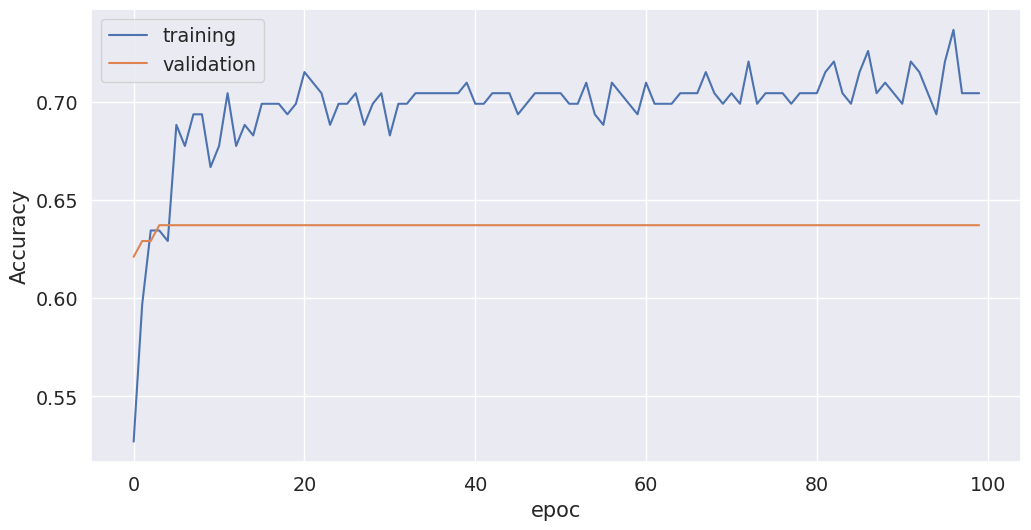

In [99]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

Agreguemosle regularización de tipo L2

In [100]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.25))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.25))
model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(num_classes, activation="softmax"))

In [101]:
opt = keras.optimizers.RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 16)                112       
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_8 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_38 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_39 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_______________________________________________________

In [102]:
history = model.fit(
    X_train.values, y_train, epochs=100, validation_data=(X_validation.values, y_test)
)

Train on 186 samples, validate on 124 samples
Epoch 1/100
 32/186 [====>.........................] - ETA: 0s - loss: 35.5488 - accuracy: 0.3438

186/186 [==============================] - 0s 857us/step - loss: 36.3862 - accuracy: 0.3065 - val_loss: 20.7438 - val_accuracy: 0.3629


Epoch 2/100
 32/186 [====>.........................] - ETA: 0s - loss: 35.0796 - accuracy: 0.2500

186/186 [==============================] - 0s 57us/step - loss: 28.1309 - accuracy: 0.3172 - val_loss: 16.8283 - val_accuracy: 0.3629


Epoch 3/100
 32/186 [====>.........................] - ETA: 0s - loss: 17.7641 - accuracy: 0.4062

186/186 [==============================] - 0s 51us/step - loss: 22.6257 - accuracy: 0.3172 - val_loss: 13.6873 - val_accuracy: 0.3710


Epoch 4/100
 32/186 [====>.........................] - ETA: 0s - loss: 19.9169 - accuracy: 0.2500

186/186 [==============================] - 0s 52us/step - loss: 18.4583 - accuracy: 0.3065 - val_loss: 11.1403 - val_accuracy: 0.3710


Epoch 5/100
 32/186 [====>.........................] - ETA: 0s - loss: 23.9637 - accuracy: 0.3125

186/186 [==============================] - 0s 54us/step - loss: 15.6974 - accuracy: 0.2796 - val_loss: 9.0765 - val_accuracy: 0.3790


Epoch 6/100
 32/186 [====>.........................] - ETA: 0s - loss: 13.0806 - accuracy: 0.3125

186/186 [==============================] - 0s 48us/step - loss: 12.5384 - accuracy: 0.3226 - val_loss: 7.1485 - val_accuracy: 0.3871


Epoch 7/100
 32/186 [====>.........................] - ETA: 0s - loss: 10.3733 - accuracy: 0.3438

186/186 [==============================] - 0s 49us/step - loss: 10.5505 - accuracy: 0.3065 - val_loss: 5.4817 - val_accuracy: 0.3871


Epoch 8/100
 32/186 [====>.........................] - ETA: 0s - loss: 6.8203 - accuracy: 0.2500

186/186 [==============================] - 0s 52us/step - loss: 7.9074 - accuracy: 0.2903 - val_loss: 4.1251 - val_accuracy: 0.4032


Epoch 9/100
 32/186 [====>.........................] - ETA: 0s - loss: 10.0459 - accuracy: 0.1875

186/186 [==============================] - 0s 48us/step - loss: 7.5355 - accuracy: 0.3118 - val_loss: 2.6046 - val_accuracy: 0.4032


Epoch 10/100
 32/186 [====>.........................] - ETA: 0s - loss: 6.6705 - accuracy: 0.2188

186/186 [==============================] - 0s 53us/step - loss: 5.5455 - accuracy: 0.2903 - val_loss: 1.7569 - val_accuracy: 0.3871


Epoch 11/100
 32/186 [====>.........................] - ETA: 0s - loss: 6.1490 - accuracy: 0.2812

186/186 [==============================] - 0s 51us/step - loss: 4.2342 - accuracy: 0.3280 - val_loss: 1.3828 - val_accuracy: 0.3629


Epoch 12/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.8655 - accuracy: 0.4688

186/186 [==============================] - 0s 49us/step - loss: 3.5178 - accuracy: 0.3226 - val_loss: 1.2493 - val_accuracy: 0.3629


Epoch 13/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.9117 - accuracy: 0.3125

186/186 [==============================] - 0s 50us/step - loss: 2.8358 - accuracy: 0.3656 - val_loss: 1.1573 - val_accuracy: 0.3468


Epoch 14/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.6469 - accuracy: 0.4062

186/186 [==============================] - 0s 49us/step - loss: 2.0990 - accuracy: 0.3871 - val_loss: 1.0793 - val_accuracy: 0.3306


Epoch 15/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.5707 - accuracy: 0.3438

186/186 [==============================] - 0s 50us/step - loss: 1.7374 - accuracy: 0.3011 - val_loss: 1.0166 - val_accuracy: 0.3145


Epoch 16/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.4311 - accuracy: 0.3438

186/186 [==============================] - 0s 54us/step - loss: 1.3623 - accuracy: 0.3817 - val_loss: 0.9726 - val_accuracy: 0.2903


Epoch 17/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.3779 - accuracy: 0.3750

186/186 [==============================] - 0s 53us/step - loss: 1.3535 - accuracy: 0.4032 - val_loss: 0.9374 - val_accuracy: 0.3306


Epoch 18/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9282 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 1.1433 - accuracy: 0.4839 - val_loss: 0.9160 - val_accuracy: 0.3629


Epoch 19/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9954 - accuracy: 0.5312

186/186 [==============================] - 0s 48us/step - loss: 1.0605 - accuracy: 0.5269 - val_loss: 0.8960 - val_accuracy: 0.4355


Epoch 20/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9997 - accuracy: 0.5000



186/186 [==============================] - 0s 51us/step - loss: 1.1482 - accuracy: 0.4946 - val_loss: 0.8767 - val_accuracy: 0.6129


Epoch 21/100


 32/186 [====>.........................] - ETA: 0s - loss: 1.1957 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 1.0060 - accuracy: 0.5484 - val_loss: 0.8646 - val_accuracy: 0.6371


Epoch 22/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.9173 - accuracy: 0.5938

186/186 [==============================] - 0s 51us/step - loss: 0.9219 - accuracy: 0.6022 - val_loss: 0.8545 - val_accuracy: 0.6371


Epoch 23/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.8329 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.9308 - accuracy: 0.6774 - val_loss: 0.8452 - val_accuracy: 0.6371


Epoch 24/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.8725 - accuracy: 0.5625

186/186 [==============================] - 0s 50us/step - loss: 0.8412 - accuracy: 0.6774 - val_loss: 0.8374 - val_accuracy: 0.6371


Epoch 25/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.8660 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.8162 - accuracy: 0.7043 - val_loss: 0.8303 - val_accuracy: 0.6371


Epoch 26/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.9175 - accuracy: 0.5938

186/186 [==============================] - 0s 54us/step - loss: 0.8432 - accuracy: 0.6828 - val_loss: 0.8221 - val_accuracy: 0.6371


Epoch 27/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8394 - accuracy: 0.5938

186/186 [==============================] - 0s 50us/step - loss: 0.8403 - accuracy: 0.6774 - val_loss: 0.8161 - val_accuracy: 0.6371


Epoch 28/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7660 - accuracy: 0.7500



186/186 [==============================] - 0s 50us/step - loss: 0.7891 - accuracy: 0.6935 - val_loss: 0.8001 - val_accuracy: 0.6371


Epoch 29/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8193 - accuracy: 0.5938

186/186 [==============================] - 0s 47us/step - loss: 0.9603 - accuracy: 0.6935 - val_loss: 0.7822 - val_accuracy: 0.6371


Epoch 30/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8706 - accuracy: 0.5938

186/186 [==============================] - 0s 50us/step - loss: 0.7706 - accuracy: 0.6935 - val_loss: 0.7644 - val_accuracy: 0.6371


Epoch 31/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6823 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.7514 - accuracy: 0.6989 - val_loss: 0.7429 - val_accuracy: 0.6371


Epoch 32/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7222 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.7597 - accuracy: 0.6935 - val_loss: 0.7347 - val_accuracy: 0.6371


Epoch 33/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7604 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.7381 - accuracy: 0.6935 - val_loss: 0.7247 - val_accuracy: 0.6371


Epoch 34/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.7085 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.7370 - accuracy: 0.6935 - val_loss: 0.7204 - val_accuracy: 0.6371


Epoch 35/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6872 - accuracy: 0.8125



186/186 [==============================] - 0s 50us/step - loss: 0.7214 - accuracy: 0.7043 - val_loss: 0.7136 - val_accuracy: 0.6371


Epoch 36/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8217 - accuracy: 0.5625

186/186 [==============================] - 0s 49us/step - loss: 0.7361 - accuracy: 0.6935 - val_loss: 0.7132 - val_accuracy: 0.6371


Epoch 37/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6316 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.7950 - accuracy: 0.6882 - val_loss: 0.7144 - val_accuracy: 0.6371


Epoch 38/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7501 - accuracy: 0.6250

186/186 [==============================] - 0s 46us/step - loss: 0.7128 - accuracy: 0.6989 - val_loss: 0.7139 - val_accuracy: 0.6371


Epoch 39/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6982 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.6997 - accuracy: 0.7043 - val_loss: 0.7099 - val_accuracy: 0.6371


Epoch 40/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7109 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.7184 - accuracy: 0.7097 - val_loss: 0.7071 - val_accuracy: 0.6371


Epoch 41/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8618 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.7555 - accuracy: 0.6882 - val_loss: 0.7091 - val_accuracy: 0.6371


Epoch 42/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.7860 - accuracy: 0.5625

186/186 [==============================] - 0s 53us/step - loss: 0.7006 - accuracy: 0.7043 - val_loss: 0.6938 - val_accuracy: 0.6371


Epoch 43/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7157 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.6695 - accuracy: 0.7043 - val_loss: 0.6855 - val_accuracy: 0.6371


Epoch 44/100

 32/186 [====>.........................] - ETA: 0s - loss: 0.7470 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.6767 - accuracy: 0.7043 - val_loss: 0.6745 - val_accuracy: 0.6371


Epoch 45/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6236 - accuracy: 0.7812



186/186 [==============================] - 0s 49us/step - loss: 0.6871 - accuracy: 0.7043 - val_loss: 0.6714 - val_accuracy: 0.6371


Epoch 46/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6069 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.6863 - accuracy: 0.7043 - val_loss: 0.6679 - val_accuracy: 0.6371


Epoch 47/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6308 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.6462 - accuracy: 0.7097 - val_loss: 0.6624 - val_accuracy: 0.6371


Epoch 48/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7560 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 0.6846 - accuracy: 0.7043 - val_loss: 0.6662 - val_accuracy: 0.6371


Epoch 49/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7551 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.6832 - accuracy: 0.6989 - val_loss: 0.6592 - val_accuracy: 0.6371


Epoch 50/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7988 - accuracy: 0.5938

186/186 [==============================] - 0s 51us/step - loss: 0.6839 - accuracy: 0.6989 - val_loss: 0.6590 - val_accuracy: 0.6371


Epoch 51/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7047 - accuracy: 0.6875

186/186 [==============================] - 0s 65us/step - loss: 0.6538 - accuracy: 0.7097 - val_loss: 0.6516 - val_accuracy: 0.6371


Epoch 52/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.7431 - accuracy: 0.6562



186/186 [==============================] - 0s 63us/step - loss: 0.6945 - accuracy: 0.6989 - val_loss: 0.6596 - val_accuracy: 0.6371


Epoch 53/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6551 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.6625 - accuracy: 0.7097 - val_loss: 0.6529 - val_accuracy: 0.6371


Epoch 54/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6081 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.6466 - accuracy: 0.7043 - val_loss: 0.6456 - val_accuracy: 0.6371


Epoch 55/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7350 - accuracy: 0.5625

186/186 [==============================] - 0s 50us/step - loss: 0.6645 - accuracy: 0.7043 - val_loss: 0.6443 - val_accuracy: 0.6371


Epoch 56/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6240 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.6753 - accuracy: 0.6935 - val_loss: 0.6447 - val_accuracy: 0.6371


Epoch 57/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6019 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.6501 - accuracy: 0.6989 - val_loss: 0.6461 - val_accuracy: 0.6371


Epoch 58/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6267 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.7159 - accuracy: 0.6989 - val_loss: 0.6416 - val_accuracy: 0.6371


Epoch 59/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5670 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.6138 - accuracy: 0.7043 - val_loss: 0.6344 - val_accuracy: 0.6371


Epoch 60/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6490 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.6443 - accuracy: 0.7043 - val_loss: 0.6306 - val_accuracy: 0.6371


Epoch 61/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6242 - accuracy: 0.7188



186/186 [==============================] - 0s 49us/step - loss: 0.6672 - accuracy: 0.6989 - val_loss: 0.6345 - val_accuracy: 0.6371


Epoch 62/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6841 - accuracy: 0.6250

186/186 [==============================] - 0s 54us/step - loss: 0.6361 - accuracy: 0.7043 - val_loss: 0.6306 - val_accuracy: 0.6371


Epoch 63/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6609 - accuracy: 0.5938



186/186 [==============================] - 0s 48us/step - loss: 0.6382 - accuracy: 0.6935 - val_loss: 0.6251 - val_accuracy: 0.6371


Epoch 64/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6193 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.6351 - accuracy: 0.7043 - val_loss: 0.6243 - val_accuracy: 0.6371


Epoch 65/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5955 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.6202 - accuracy: 0.6989 - val_loss: 0.6156 - val_accuracy: 0.6371


Epoch 66/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5359 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.6431 - accuracy: 0.6989 - val_loss: 0.6206 - val_accuracy: 0.6371


Epoch 67/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6304 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.6270 - accuracy: 0.7043 - val_loss: 0.6154 - val_accuracy: 0.6371


Epoch 68/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.7193 - accuracy: 0.6250

186/186 [==============================] - 0s 54us/step - loss: 0.6297 - accuracy: 0.6989 - val_loss: 0.6124 - val_accuracy: 0.6371


Epoch 69/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6856 - accuracy: 0.6250

186/186 [==============================] - 0s 50us/step - loss: 0.6368 - accuracy: 0.7043 - val_loss: 0.6173 - val_accuracy: 0.6371


Epoch 70/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6899 - accuracy: 0.6250

186/186 [==============================] - 0s 55us/step - loss: 0.6356 - accuracy: 0.7043 - val_loss: 0.6097 - val_accuracy: 0.6371


Epoch 71/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7185 - accuracy: 0.5938

186/186 [==============================] - 0s 52us/step - loss: 0.6211 - accuracy: 0.6935 - val_loss: 0.6091 - val_accuracy: 0.6371


Epoch 72/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5381 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.6088 - accuracy: 0.7043 - val_loss: 0.6067 - val_accuracy: 0.6371


Epoch 73/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5476 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.6416 - accuracy: 0.6989 - val_loss: 0.6097 - val_accuracy: 0.6371


Epoch 74/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4983 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.6169 - accuracy: 0.7043 - val_loss: 0.6057 - val_accuracy: 0.6371


Epoch 75/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5346 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.6175 - accuracy: 0.7043 - val_loss: 0.6153 - val_accuracy: 0.6371


Epoch 76/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6508 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.6257 - accuracy: 0.7043 - val_loss: 0.6123 - val_accuracy: 0.6371


Epoch 77/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6455 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.6286 - accuracy: 0.6989 - val_loss: 0.6077 - val_accuracy: 0.6371


Epoch 78/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5127 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.5788 - accuracy: 0.7043 - val_loss: 0.6002 - val_accuracy: 0.6371


Epoch 79/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6150 - accuracy: 0.6250



186/186 [==============================] - 0s 51us/step - loss: 0.5860 - accuracy: 0.6989 - val_loss: 0.5929 - val_accuracy: 0.6371


Epoch 80/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5863 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.5799 - accuracy: 0.7043 - val_loss: 0.5908 - val_accuracy: 0.6371


Epoch 81/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4745 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.5927 - accuracy: 0.7043 - val_loss: 0.5838 - val_accuracy: 0.6371


Epoch 82/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6776 - accuracy: 0.5938



186/186 [==============================] - 0s 52us/step - loss: 0.5925 - accuracy: 0.6989 - val_loss: 0.5815 - val_accuracy: 0.6371


Epoch 83/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6350 - accuracy: 0.5938



186/186 [==============================] - 0s 48us/step - loss: 0.5782 - accuracy: 0.7043 - val_loss: 0.5785 - val_accuracy: 0.6371


Epoch 84/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5685 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.5960 - accuracy: 0.7043 - val_loss: 0.5795 - val_accuracy: 0.6371


Epoch 85/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5405 - accuracy: 0.7500



186/186 [==============================] - 0s 52us/step - loss: 0.5544 - accuracy: 0.7043 - val_loss: 0.5774 - val_accuracy: 0.6371


Epoch 86/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5587 - accuracy: 0.7500



186/186 [==============================] - 0s 51us/step - loss: 0.5436 - accuracy: 0.7043 - val_loss: 0.5760 - val_accuracy: 0.6371


Epoch 87/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5484 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.5960 - accuracy: 0.7043 - val_loss: 0.5805 - val_accuracy: 0.6371


Epoch 88/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5280 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.5636 - accuracy: 0.7043 - val_loss: 0.5770 - val_accuracy: 0.6371


Epoch 89/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5088 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.5387 - accuracy: 0.6989 - val_loss: 0.5723 - val_accuracy: 0.6371


Epoch 90/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6199 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.5731 - accuracy: 0.7043 - val_loss: 0.5711 - val_accuracy: 0.6371


Epoch 91/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5339 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.5553 - accuracy: 0.7043 - val_loss: 0.5684 - val_accuracy: 0.6371


Epoch 92/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6021 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.5757 - accuracy: 0.7043 - val_loss: 0.5682 - val_accuracy: 0.6371


Epoch 93/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5082 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.5747 - accuracy: 0.6989 - val_loss: 0.5682 - val_accuracy: 0.6371


Epoch 94/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6330 - accuracy: 0.5625

186/186 [==============================] - 0s 51us/step - loss: 0.5299 - accuracy: 0.7043 - val_loss: 0.5633 - val_accuracy: 0.6371


Epoch 95/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7651 - accuracy: 0.5312

186/186 [==============================] - 0s 51us/step - loss: 0.5435 - accuracy: 0.7043 - val_loss: 0.5623 - val_accuracy: 0.6371


Epoch 96/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6323 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.5224 - accuracy: 0.7043 - val_loss: 0.5599 - val_accuracy: 0.6371


Epoch 97/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5984 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 0.5228 - accuracy: 0.7043 - val_loss: 0.5596 - val_accuracy: 0.6371


Epoch 98/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3384 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.5033 - accuracy: 0.7043 - val_loss: 0.5567 - val_accuracy: 0.6371


Epoch 99/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4901 - accuracy: 0.6250

186/186 [==============================] - 0s 53us/step - loss: 0.5186 - accuracy: 0.7043 - val_loss: 0.5561 - val_accuracy: 0.6371


Epoch 100/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4506 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.5373 - accuracy: 0.7043 - val_loss: 0.5581 - val_accuracy: 0.6371


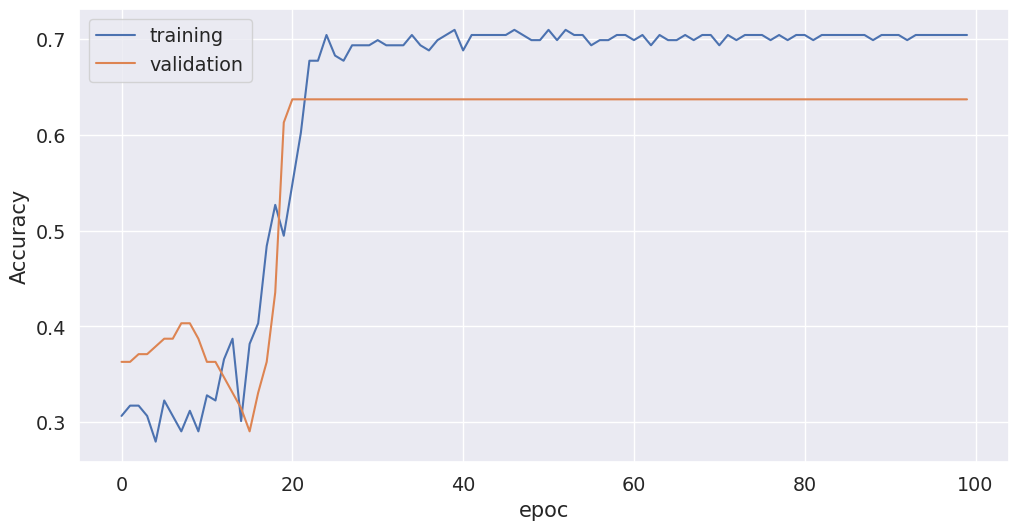

In [103]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

Parece estar muy errático el aprendizaje, bajemos el parámetro de regularización y bajemos la tasa de aprendizaje

In [104]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(num_classes, activation="softmax"))

In [105]:
opt = keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 16)                112       
_________________________________________________________________
dense_41 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_42 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_43 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_________________________________________________________________


In [106]:
history = model.fit(
    X_train.values, y_train, epochs=1000, validation_data=(X_validation.values, y_test)
)

Train on 186 samples, validate on 124 samples
Epoch 1/1000
 32/186 [====>.........................] - ETA: 0s - loss: 7.1229 - accuracy: 0.7812

186/186 [==============================] - 0s 565us/step - loss: 9.6034 - accuracy: 0.6774 - val_loss: 11.6820 - val_accuracy: 0.6210


Epoch 2/1000
 32/186 [====>.........................] - ETA: 0s - loss: 7.5945 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 9.2595 - accuracy: 0.6720 - val_loss: 11.3381 - val_accuracy: 0.6210


Epoch 3/1000
 32/186 [====>.........................] - ETA: 0s - loss: 12.3562 - accuracy: 0.5312

186/186 [==============================] - 0s 44us/step - loss: 8.9990 - accuracy: 0.6720 - val_loss: 11.0263 - val_accuracy: 0.6129


Epoch 4/1000
 32/186 [====>.........................] - ETA: 0s - loss: 8.4705 - accuracy: 0.6562

186/186 [==============================] - 0s 44us/step - loss: 8.7488 - accuracy: 0.6613 - val_loss: 10.7059 - val_accuracy: 0.6129


Epoch 5/1000
 32/186 [====>.........................] - ETA: 0s - loss: 7.8227 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 8.4980 - accuracy: 0.6559 - val_loss: 10.3766 - val_accuracy: 0.6129


Epoch 6/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.8026 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 8.2346 - accuracy: 0.6559 - val_loss: 10.0383 - val_accuracy: 0.6129


Epoch 7/1000
 32/186 [====>.........................] - ETA: 0s - loss: 9.6952 - accuracy: 0.6250

186/186 [==============================] - 0s 44us/step - loss: 7.9718 - accuracy: 0.6559 - val_loss: 9.7265 - val_accuracy: 0.6129


Epoch 8/1000
 32/186 [====>.........................] - ETA: 0s - loss: 7.5303 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 7.7089 - accuracy: 0.6559 - val_loss: 9.4028 - val_accuracy: 0.6048


Epoch 9/1000
 32/186 [====>.........................] - ETA: 0s - loss: 11.3290 - accuracy: 0.5312

186/186 [==============================] - 0s 43us/step - loss: 7.4450 - accuracy: 0.6559 - val_loss: 9.0756 - val_accuracy: 0.6048


Epoch 10/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.3500 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 7.1651 - accuracy: 0.6559 - val_loss: 8.7291 - val_accuracy: 0.6048


Epoch 11/1000
 32/186 [====>.........................] - ETA: 0s - loss: 9.8487 - accuracy: 0.5625

186/186 [==============================] - 0s 44us/step - loss: 6.8948 - accuracy: 0.6452 - val_loss: 8.3937 - val_accuracy: 0.6048


Epoch 12/1000
 32/186 [====>.........................] - ETA: 0s - loss: 9.2895 - accuracy: 0.5625

186/186 [==============================] - 0s 44us/step - loss: 6.6384 - accuracy: 0.6452 - val_loss: 8.0833 - val_accuracy: 0.5968


Epoch 13/1000
 32/186 [====>.........................] - ETA: 0s - loss: 8.6423 - accuracy: 0.5000

186/186 [==============================] - 0s 45us/step - loss: 6.3997 - accuracy: 0.6344 - val_loss: 7.7808 - val_accuracy: 0.5968


Epoch 14/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.2095 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 6.1580 - accuracy: 0.6237 - val_loss: 7.4642 - val_accuracy: 0.5887


Epoch 15/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.9663 - accuracy: 0.6250

186/186 [==============================] - 0s 47us/step - loss: 5.9234 - accuracy: 0.6183 - val_loss: 7.1848 - val_accuracy: 0.5806


Epoch 16/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.1464 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 5.7042 - accuracy: 0.6129 - val_loss: 6.9015 - val_accuracy: 0.5565


Epoch 17/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.6596 - accuracy: 0.5312

186/186 [==============================] - 0s 48us/step - loss: 5.4876 - accuracy: 0.5806 - val_loss: 6.6271 - val_accuracy: 0.5484


Epoch 18/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.6025 - accuracy: 0.5625

186/186 [==============================] - 0s 47us/step - loss: 5.2841 - accuracy: 0.5645 - val_loss: 6.3709 - val_accuracy: 0.5484


Epoch 19/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.2032 - accuracy: 0.5000

186/186 [==============================] - 0s 48us/step - loss: 5.0860 - accuracy: 0.5591 - val_loss: 6.0968 - val_accuracy: 0.5242


Epoch 20/1000
 32/186 [====>.........................] - ETA: 0s - loss: 7.0316 - accuracy: 0.4688

186/186 [==============================] - 0s 45us/step - loss: 4.8990 - accuracy: 0.5484 - val_loss: 5.8554 - val_accuracy: 0.5161


Epoch 21/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.0858 - accuracy: 0.5312

186/186 [==============================] - 0s 43us/step - loss: 4.7241 - accuracy: 0.5215 - val_loss: 5.6170 - val_accuracy: 0.5081


Epoch 22/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.6091 - accuracy: 0.4688

186/186 [==============================] - 0s 45us/step - loss: 4.5572 - accuracy: 0.5054 - val_loss: 5.4027 - val_accuracy: 0.5081


Epoch 23/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.5137 - accuracy: 0.3750

186/186 [==============================] - 0s 45us/step - loss: 4.3998 - accuracy: 0.4946 - val_loss: 5.1931 - val_accuracy: 0.5000


Epoch 24/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.7840 - accuracy: 0.6250

186/186 [==============================] - 0s 45us/step - loss: 4.2523 - accuracy: 0.4785 - val_loss: 4.9887 - val_accuracy: 0.5000


Epoch 25/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.8429 - accuracy: 0.4375

186/186 [==============================] - 0s 48us/step - loss: 4.1046 - accuracy: 0.4731 - val_loss: 4.7680 - val_accuracy: 0.4758


Epoch 26/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.3042 - accuracy: 0.4375

186/186 [==============================] - 0s 44us/step - loss: 3.9609 - accuracy: 0.4570 - val_loss: 4.5774 - val_accuracy: 0.4758


Epoch 27/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.7867 - accuracy: 0.3750

186/186 [==============================] - 0s 44us/step - loss: 3.8277 - accuracy: 0.4462 - val_loss: 4.4089 - val_accuracy: 0.4677


Epoch 28/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.5806 - accuracy: 0.5625

186/186 [==============================] - 0s 43us/step - loss: 3.6937 - accuracy: 0.4409 - val_loss: 4.2175 - val_accuracy: 0.4435


Epoch 29/1000


 32/186 [====>.........................] - ETA: 0s - loss: 3.8229 - accuracy: 0.4375

186/186 [==============================] - 0s 52us/step - loss: 3.5594 - accuracy: 0.4301 - val_loss: 4.0338 - val_accuracy: 0.4032


Epoch 30/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.1520 - accuracy: 0.3750

186/186 [==============================] - 0s 46us/step - loss: 3.4198 - accuracy: 0.4140 - val_loss: 3.8729 - val_accuracy: 0.4032


Epoch 31/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.9951 - accuracy: 0.6250

186/186 [==============================] - 0s 44us/step - loss: 3.2930 - accuracy: 0.4086 - val_loss: 3.7060 - val_accuracy: 0.4032


Epoch 32/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.7528 - accuracy: 0.5312

186/186 [==============================] - 0s 45us/step - loss: 3.1671 - accuracy: 0.4086 - val_loss: 3.5458 - val_accuracy: 0.4032


Epoch 33/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.5257 - accuracy: 0.4375



186/186 [==============================] - 0s 44us/step - loss: 3.0355 - accuracy: 0.3978 - val_loss: 3.3887 - val_accuracy: 0.3952


Epoch 34/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.6174 - accuracy: 0.4688

186/186 [==============================] - 0s 42us/step - loss: 2.9115 - accuracy: 0.3602 - val_loss: 3.2472 - val_accuracy: 0.3952


Epoch 35/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.3844 - accuracy: 0.3125

186/186 [==============================] - 0s 48us/step - loss: 2.7967 - accuracy: 0.3710 - val_loss: 3.1181 - val_accuracy: 0.3871


Epoch 36/1000


 32/186 [====>.........................] - ETA: 0s - loss: 2.5035 - accuracy: 0.2188

186/186 [==============================] - 0s 49us/step - loss: 2.6842 - accuracy: 0.3710 - val_loss: 2.9785 - val_accuracy: 0.3629


Epoch 37/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.5091 - accuracy: 0.3438

186/186 [==============================] - 0s 43us/step - loss: 2.5869 - accuracy: 0.3548 - val_loss: 2.8506 - val_accuracy: 0.3548


Epoch 38/1000


 32/186 [====>.........................] - ETA: 0s - loss: 2.8940 - accuracy: 0.3125

186/186 [==============================] - 0s 49us/step - loss: 2.4816 - accuracy: 0.3548 - val_loss: 2.7029 - val_accuracy: 0.3548


Epoch 39/1000


 32/186 [====>.........................] - ETA: 0s - loss: 2.0013 - accuracy: 0.2812

186/186 [==============================] - 0s 47us/step - loss: 2.3800 - accuracy: 0.3495 - val_loss: 2.5636 - val_accuracy: 0.3548


Epoch 40/1000


 32/186 [====>.........................] - ETA: 0s - loss: 2.1003 - accuracy: 0.3750

186/186 [==============================] - 0s 47us/step - loss: 2.2841 - accuracy: 0.3280 - val_loss: 2.4309 - val_accuracy: 0.3548


Epoch 41/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.0463 - accuracy: 0.4062

186/186 [==============================] - 0s 46us/step - loss: 2.1907 - accuracy: 0.3118 - val_loss: 2.3038 - val_accuracy: 0.3629


Epoch 42/1000


 32/186 [====>.........................] - ETA: 0s - loss: 3.0295 - accuracy: 0.3125



186/186 [==============================] - 0s 48us/step - loss: 2.1151 - accuracy: 0.3226 - val_loss: 2.1836 - val_accuracy: 0.3629


Epoch 43/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.2490 - accuracy: 0.2500

186/186 [==============================] - 0s 47us/step - loss: 2.0318 - accuracy: 0.3226 - val_loss: 2.0724 - val_accuracy: 0.3468


Epoch 44/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.8686 - accuracy: 0.3750

186/186 [==============================] - 0s 47us/step - loss: 1.9534 - accuracy: 0.3172 - val_loss: 1.9463 - val_accuracy: 0.3548


Epoch 45/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.9499 - accuracy: 0.3125

186/186 [==============================] - 0s 48us/step - loss: 1.8767 - accuracy: 0.3065 - val_loss: 1.8374 - val_accuracy: 0.3548


Epoch 46/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.1651 - accuracy: 0.2812

186/186 [==============================] - 0s 47us/step - loss: 1.7986 - accuracy: 0.3011 - val_loss: 1.7397 - val_accuracy: 0.3468


Epoch 47/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7989 - accuracy: 0.5000

186/186 [==============================] - 0s 48us/step - loss: 1.7296 - accuracy: 0.3118 - val_loss: 1.6521 - val_accuracy: 0.3548


Epoch 48/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.7830 - accuracy: 0.3750

186/186 [==============================] - 0s 46us/step - loss: 1.6548 - accuracy: 0.2957 - val_loss: 1.5724 - val_accuracy: 0.3468


Epoch 49/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.8381 - accuracy: 0.3750

186/186 [==============================] - 0s 47us/step - loss: 1.5828 - accuracy: 0.3118 - val_loss: 1.5028 - val_accuracy: 0.3629


Epoch 50/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1515 - accuracy: 0.3750

186/186 [==============================] - 0s 47us/step - loss: 1.5254 - accuracy: 0.3226 - val_loss: 1.4412 - val_accuracy: 0.3710


Epoch 51/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.7050 - accuracy: 0.3438

186/186 [==============================] - 0s 48us/step - loss: 1.4654 - accuracy: 0.3226 - val_loss: 1.3727 - val_accuracy: 0.3871


Epoch 52/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.2139 - accuracy: 0.3438

186/186 [==============================] - 0s 44us/step - loss: 1.4013 - accuracy: 0.3065 - val_loss: 1.3088 - val_accuracy: 0.4194


Epoch 53/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.4280 - accuracy: 0.2500

186/186 [==============================] - 0s 48us/step - loss: 1.3407 - accuracy: 0.2957 - val_loss: 1.2491 - val_accuracy: 0.4355


Epoch 54/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.2109 - accuracy: 0.2500

186/186 [==============================] - 0s 48us/step - loss: 1.2834 - accuracy: 0.2903 - val_loss: 1.2017 - val_accuracy: 0.4194


Epoch 55/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9134 - accuracy: 0.2500

186/186 [==============================] - 0s 45us/step - loss: 1.2399 - accuracy: 0.2957 - val_loss: 1.1658 - val_accuracy: 0.4032


Epoch 56/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.2379 - accuracy: 0.3438

186/186 [==============================] - 0s 46us/step - loss: 1.1940 - accuracy: 0.2957 - val_loss: 1.1336 - val_accuracy: 0.4113


Epoch 57/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.3126 - accuracy: 0.3750

186/186 [==============================] - 0s 45us/step - loss: 1.1679 - accuracy: 0.2903 - val_loss: 1.1052 - val_accuracy: 0.4113


Epoch 58/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9382 - accuracy: 0.4062

186/186 [==============================] - 0s 48us/step - loss: 1.1243 - accuracy: 0.2903 - val_loss: 1.0792 - val_accuracy: 0.4113


Epoch 59/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1498 - accuracy: 0.3438

186/186 [==============================] - 0s 46us/step - loss: 1.0887 - accuracy: 0.2903 - val_loss: 1.0559 - val_accuracy: 0.3871


Epoch 60/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8737 - accuracy: 0.2500

186/186 [==============================] - 0s 46us/step - loss: 1.0567 - accuracy: 0.2849 - val_loss: 1.0361 - val_accuracy: 0.3790


Epoch 61/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8458 - accuracy: 0.3125

186/186 [==============================] - 0s 44us/step - loss: 1.0212 - accuracy: 0.2903 - val_loss: 1.0216 - val_accuracy: 0.3710


Epoch 62/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9531 - accuracy: 0.3125

186/186 [==============================] - 0s 45us/step - loss: 0.9894 - accuracy: 0.2742 - val_loss: 1.0092 - val_accuracy: 0.3710


Epoch 63/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7723 - accuracy: 0.3750

186/186 [==============================] - 0s 45us/step - loss: 0.9588 - accuracy: 0.2796 - val_loss: 0.9998 - val_accuracy: 0.3871


Epoch 64/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9026 - accuracy: 0.3750

186/186 [==============================] - 0s 43us/step - loss: 0.9346 - accuracy: 0.2796 - val_loss: 0.9844 - val_accuracy: 0.3952


Epoch 65/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0270 - accuracy: 0.1875

186/186 [==============================] - 0s 48us/step - loss: 0.9115 - accuracy: 0.2742 - val_loss: 0.9693 - val_accuracy: 0.3952


Epoch 66/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6574 - accuracy: 0.3438



186/186 [==============================] - 0s 46us/step - loss: 0.8879 - accuracy: 0.2849 - val_loss: 0.9566 - val_accuracy: 0.3952


Epoch 67/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7004 - accuracy: 0.3438

186/186 [==============================] - 0s 48us/step - loss: 0.8706 - accuracy: 0.6344 - val_loss: 0.9485 - val_accuracy: 0.7097


Epoch 68/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8750 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.8515 - accuracy: 0.7151 - val_loss: 0.9399 - val_accuracy: 0.7097


Epoch 69/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.8645 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.8373 - accuracy: 0.7258 - val_loss: 0.9282 - val_accuracy: 0.7177


Epoch 70/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.8948 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.8230 - accuracy: 0.7473 - val_loss: 0.9185 - val_accuracy: 0.7258


Epoch 71/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6698 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.8092 - accuracy: 0.7527 - val_loss: 0.9177 - val_accuracy: 0.7258


Epoch 72/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.8712 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.7970 - accuracy: 0.7688 - val_loss: 0.8971 - val_accuracy: 0.7258


Epoch 73/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5928 - accuracy: 0.8438



186/186 [==============================] - 0s 46us/step - loss: 0.7850 - accuracy: 0.7796 - val_loss: 0.8904 - val_accuracy: 0.7258


Epoch 74/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8311 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.7765 - accuracy: 0.7957 - val_loss: 0.8805 - val_accuracy: 0.7177


Epoch 75/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7308 - accuracy: 0.8125



186/186 [==============================] - 0s 45us/step - loss: 0.7639 - accuracy: 0.7957 - val_loss: 0.8697 - val_accuracy: 0.7177


Epoch 76/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9431 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.7568 - accuracy: 0.7903 - val_loss: 0.8622 - val_accuracy: 0.7177


Epoch 77/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6251 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.7477 - accuracy: 0.7903 - val_loss: 0.8597 - val_accuracy: 0.7097


Epoch 78/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9078 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.7449 - accuracy: 0.8118 - val_loss: 0.8578 - val_accuracy: 0.7097


Epoch 79/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5768 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.7387 - accuracy: 0.8065 - val_loss: 0.8516 - val_accuracy: 0.7097


Epoch 80/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8303 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.7330 - accuracy: 0.8011 - val_loss: 0.8469 - val_accuracy: 0.7177


Epoch 81/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6650 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.7270 - accuracy: 0.8226 - val_loss: 0.8320 - val_accuracy: 0.7258


Epoch 82/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8528 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.7195 - accuracy: 0.8226 - val_loss: 0.8366 - val_accuracy: 0.7258


Epoch 83/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8038 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.7157 - accuracy: 0.8118 - val_loss: 0.8263 - val_accuracy: 0.7419


Epoch 84/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6713 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.7114 - accuracy: 0.8065 - val_loss: 0.8109 - val_accuracy: 0.7500


Epoch 85/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9295 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.7114 - accuracy: 0.8172 - val_loss: 0.8132 - val_accuracy: 0.7500


Epoch 86/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6889 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.7094 - accuracy: 0.8172 - val_loss: 0.8085 - val_accuracy: 0.7500


Epoch 87/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6580 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.7055 - accuracy: 0.8172 - val_loss: 0.8049 - val_accuracy: 0.7500


Epoch 88/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7356 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.7038 - accuracy: 0.8226 - val_loss: 0.8054 - val_accuracy: 0.7419


Epoch 89/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8900 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.7013 - accuracy: 0.8172 - val_loss: 0.7976 - val_accuracy: 0.7419


Epoch 90/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5820 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.6975 - accuracy: 0.8226 - val_loss: 0.7924 - val_accuracy: 0.7419


Epoch 91/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7374 - accuracy: 0.8125



186/186 [==============================] - 0s 44us/step - loss: 0.6965 - accuracy: 0.8172 - val_loss: 0.7963 - val_accuracy: 0.7419


Epoch 92/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7072 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.6942 - accuracy: 0.8226 - val_loss: 0.7957 - val_accuracy: 0.7500


Epoch 93/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8246 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.6929 - accuracy: 0.8172 - val_loss: 0.7862 - val_accuracy: 0.7581


Epoch 94/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6015 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.6928 - accuracy: 0.8226 - val_loss: 0.7795 - val_accuracy: 0.7581


Epoch 95/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6581 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.6899 - accuracy: 0.8387 - val_loss: 0.7775 - val_accuracy: 0.7581


Epoch 96/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5775 - accuracy: 0.9688

186/186 [==============================] - 0s 47us/step - loss: 0.6896 - accuracy: 0.8333 - val_loss: 0.7735 - val_accuracy: 0.7500


Epoch 97/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7466 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.6884 - accuracy: 0.8548 - val_loss: 0.7786 - val_accuracy: 0.7581


Epoch 98/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5948 - accuracy: 0.8750



186/186 [==============================] - 0s 49us/step - loss: 0.6879 - accuracy: 0.8441 - val_loss: 0.7721 - val_accuracy: 0.7500


Epoch 99/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7062 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.6853 - accuracy: 0.8441 - val_loss: 0.7740 - val_accuracy: 0.7500


Epoch 100/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6621 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.6846 - accuracy: 0.8495 - val_loss: 0.7757 - val_accuracy: 0.7581


Epoch 101/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5926 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.6836 - accuracy: 0.8495 - val_loss: 0.7705 - val_accuracy: 0.7500


Epoch 102/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6022 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.6825 - accuracy: 0.8495 - val_loss: 0.7634 - val_accuracy: 0.7500


Epoch 103/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6392 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.6848 - accuracy: 0.8495 - val_loss: 0.7679 - val_accuracy: 0.7500


Epoch 104/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6229 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.6824 - accuracy: 0.8495 - val_loss: 0.7699 - val_accuracy: 0.7500


Epoch 105/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6637 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.6812 - accuracy: 0.8441 - val_loss: 0.7654 - val_accuracy: 0.7500


Epoch 106/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7489 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.6805 - accuracy: 0.8441 - val_loss: 0.7724 - val_accuracy: 0.7581


Epoch 107/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6222 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.6795 - accuracy: 0.8441 - val_loss: 0.7648 - val_accuracy: 0.7500


Epoch 108/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7730 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.6781 - accuracy: 0.8548 - val_loss: 0.7647 - val_accuracy: 0.7500


Epoch 109/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6208 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.6782 - accuracy: 0.8548 - val_loss: 0.7614 - val_accuracy: 0.7500


Epoch 110/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7232 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.6778 - accuracy: 0.8548 - val_loss: 0.7670 - val_accuracy: 0.7581


Epoch 111/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5934 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.6771 - accuracy: 0.8495 - val_loss: 0.7623 - val_accuracy: 0.7581


Epoch 112/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6658 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.6773 - accuracy: 0.8495 - val_loss: 0.7623 - val_accuracy: 0.7581


Epoch 113/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6914 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.6750 - accuracy: 0.8495 - val_loss: 0.7623 - val_accuracy: 0.7581


Epoch 114/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6185 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.6741 - accuracy: 0.8548 - val_loss: 0.7625 - val_accuracy: 0.7581


Epoch 115/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7311 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.6727 - accuracy: 0.8441 - val_loss: 0.7585 - val_accuracy: 0.7581


Epoch 116/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6851 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.6741 - accuracy: 0.8602 - val_loss: 0.7634 - val_accuracy: 0.7581


Epoch 117/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6922 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.6718 - accuracy: 0.8548 - val_loss: 0.7640 - val_accuracy: 0.7581


Epoch 118/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7454 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.6715 - accuracy: 0.8441 - val_loss: 0.7526 - val_accuracy: 0.7500


Epoch 119/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6148 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.6727 - accuracy: 0.8495 - val_loss: 0.7572 - val_accuracy: 0.7581


Epoch 120/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5919 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.6707 - accuracy: 0.8495 - val_loss: 0.7515 - val_accuracy: 0.7500


Epoch 121/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6515 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.6689 - accuracy: 0.8495 - val_loss: 0.7469 - val_accuracy: 0.7500


Epoch 122/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6288 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.6686 - accuracy: 0.8548 - val_loss: 0.7526 - val_accuracy: 0.7500


Epoch 123/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6883 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.6671 - accuracy: 0.8548 - val_loss: 0.7538 - val_accuracy: 0.7500


Epoch 124/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8202 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.6723 - accuracy: 0.8441 - val_loss: 0.7497 - val_accuracy: 0.7500


Epoch 125/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7838 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.6661 - accuracy: 0.8602 - val_loss: 0.7546 - val_accuracy: 0.7500


Epoch 126/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7274 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.6663 - accuracy: 0.8602 - val_loss: 0.7481 - val_accuracy: 0.7500


Epoch 127/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6370 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.6649 - accuracy: 0.8548 - val_loss: 0.7401 - val_accuracy: 0.7661


Epoch 128/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5846 - accuracy: 0.9688

186/186 [==============================] - 0s 47us/step - loss: 0.6639 - accuracy: 0.8656 - val_loss: 0.7440 - val_accuracy: 0.7661


Epoch 129/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6853 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.6633 - accuracy: 0.8656 - val_loss: 0.7500 - val_accuracy: 0.7581


Epoch 130/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7146 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.6622 - accuracy: 0.8548 - val_loss: 0.7393 - val_accuracy: 0.7661


Epoch 131/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5718 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.6622 - accuracy: 0.8548 - val_loss: 0.7307 - val_accuracy: 0.7742


Epoch 132/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5918 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.6632 - accuracy: 0.8602 - val_loss: 0.7352 - val_accuracy: 0.7661


Epoch 133/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6013 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.6613 - accuracy: 0.8548 - val_loss: 0.7421 - val_accuracy: 0.7661


Epoch 134/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5730 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.6598 - accuracy: 0.8656 - val_loss: 0.7345 - val_accuracy: 0.7742


Epoch 135/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7551 - accuracy: 0.7812



186/186 [==============================] - 0s 44us/step - loss: 0.6591 - accuracy: 0.8710 - val_loss: 0.7385 - val_accuracy: 0.7742


Epoch 136/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6189 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.6602 - accuracy: 0.8548 - val_loss: 0.7331 - val_accuracy: 0.7742


Epoch 137/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5262 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.6598 - accuracy: 0.8602 - val_loss: 0.7311 - val_accuracy: 0.7742


Epoch 138/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7203 - accuracy: 0.7500



186/186 [==============================] - 0s 48us/step - loss: 0.6586 - accuracy: 0.8656 - val_loss: 0.7346 - val_accuracy: 0.7742


Epoch 139/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6972 - accuracy: 0.8125



186/186 [==============================] - 0s 46us/step - loss: 0.6572 - accuracy: 0.8602 - val_loss: 0.7331 - val_accuracy: 0.7742


Epoch 140/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7107 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.6557 - accuracy: 0.8656 - val_loss: 0.7265 - val_accuracy: 0.7742


Epoch 141/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5802 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.6559 - accuracy: 0.8656 - val_loss: 0.7290 - val_accuracy: 0.7742


Epoch 142/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5923 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.6549 - accuracy: 0.8602 - val_loss: 0.7195 - val_accuracy: 0.7742


Epoch 143/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7023 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.6566 - accuracy: 0.8656 - val_loss: 0.7274 - val_accuracy: 0.7742


Epoch 144/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6316 - accuracy: 0.8750



186/186 [==============================] - 0s 47us/step - loss: 0.6549 - accuracy: 0.8602 - val_loss: 0.7253 - val_accuracy: 0.7742


Epoch 145/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6587 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.6557 - accuracy: 0.8548 - val_loss: 0.7260 - val_accuracy: 0.7742


Epoch 146/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5791 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.6531 - accuracy: 0.8602 - val_loss: 0.7209 - val_accuracy: 0.7742


Epoch 147/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5471 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.6524 - accuracy: 0.8602 - val_loss: 0.7183 - val_accuracy: 0.7742


Epoch 148/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7563 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.6508 - accuracy: 0.8763 - val_loss: 0.7220 - val_accuracy: 0.7742


Epoch 149/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7346 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.6528 - accuracy: 0.8602 - val_loss: 0.7204 - val_accuracy: 0.7742


Epoch 150/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6866 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.6499 - accuracy: 0.8548 - val_loss: 0.7108 - val_accuracy: 0.7742


Epoch 151/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6780 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.6506 - accuracy: 0.8710 - val_loss: 0.7117 - val_accuracy: 0.7742


Epoch 152/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5972 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.6478 - accuracy: 0.8656 - val_loss: 0.7073 - val_accuracy: 0.7823


Epoch 153/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6722 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.6501 - accuracy: 0.8763 - val_loss: 0.7120 - val_accuracy: 0.7742


Epoch 154/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7213 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.6476 - accuracy: 0.8710 - val_loss: 0.7145 - val_accuracy: 0.7742


Epoch 155/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6422 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.6474 - accuracy: 0.8763 - val_loss: 0.7114 - val_accuracy: 0.7742


Epoch 156/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7069 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.6466 - accuracy: 0.8763 - val_loss: 0.7181 - val_accuracy: 0.7742


Epoch 157/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6367 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.6471 - accuracy: 0.8763 - val_loss: 0.7126 - val_accuracy: 0.7742


Epoch 158/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6030 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.6450 - accuracy: 0.8763 - val_loss: 0.7092 - val_accuracy: 0.7823


Epoch 159/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6257 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.6442 - accuracy: 0.8817 - val_loss: 0.7082 - val_accuracy: 0.7823


Epoch 160/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6991 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.6442 - accuracy: 0.8763 - val_loss: 0.7100 - val_accuracy: 0.7742


Epoch 161/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7008 - accuracy: 0.7812



186/186 [==============================] - 0s 44us/step - loss: 0.6450 - accuracy: 0.8656 - val_loss: 0.7109 - val_accuracy: 0.7742


Epoch 162/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7506 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.6434 - accuracy: 0.8763 - val_loss: 0.7092 - val_accuracy: 0.7742


Epoch 163/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5684 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.6425 - accuracy: 0.8710 - val_loss: 0.7017 - val_accuracy: 0.7823


Epoch 164/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7443 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.6428 - accuracy: 0.8710 - val_loss: 0.7066 - val_accuracy: 0.7742


Epoch 165/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6445 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.6429 - accuracy: 0.8548 - val_loss: 0.6995 - val_accuracy: 0.7823


Epoch 166/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6624 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.6402 - accuracy: 0.8763 - val_loss: 0.7019 - val_accuracy: 0.7823


Epoch 167/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6686 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.6433 - accuracy: 0.8763 - val_loss: 0.7036 - val_accuracy: 0.7742


Epoch 168/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6007 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.6406 - accuracy: 0.8656 - val_loss: 0.7015 - val_accuracy: 0.7742


Epoch 169/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5322 - accuracy: 0.9688

186/186 [==============================] - 0s 47us/step - loss: 0.6404 - accuracy: 0.8710 - val_loss: 0.7021 - val_accuracy: 0.7742


Epoch 170/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5588 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.6400 - accuracy: 0.8710 - val_loss: 0.7012 - val_accuracy: 0.7742


Epoch 171/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5812 - accuracy: 0.9062



186/186 [==============================] - 0s 52us/step - loss: 0.6393 - accuracy: 0.8710 - val_loss: 0.6968 - val_accuracy: 0.7823


Epoch 172/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5867 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.6387 - accuracy: 0.8710 - val_loss: 0.6927 - val_accuracy: 0.7823


Epoch 173/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6828 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.6378 - accuracy: 0.8817 - val_loss: 0.6934 - val_accuracy: 0.7823


Epoch 174/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6597 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.6366 - accuracy: 0.8817 - val_loss: 0.6982 - val_accuracy: 0.7742


Epoch 175/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7089 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.6362 - accuracy: 0.8763 - val_loss: 0.6979 - val_accuracy: 0.7742


Epoch 176/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7503 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.6364 - accuracy: 0.8710 - val_loss: 0.6975 - val_accuracy: 0.7742


Epoch 177/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5594 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.6356 - accuracy: 0.8763 - val_loss: 0.6904 - val_accuracy: 0.7823


Epoch 178/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6105 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.6337 - accuracy: 0.8763 - val_loss: 0.6905 - val_accuracy: 0.7823


Epoch 179/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6965 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.6356 - accuracy: 0.8656 - val_loss: 0.6949 - val_accuracy: 0.7742


Epoch 180/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5444 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.6340 - accuracy: 0.8710 - val_loss: 0.6900 - val_accuracy: 0.7823


Epoch 181/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5798 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.6323 - accuracy: 0.8710 - val_loss: 0.6839 - val_accuracy: 0.7823


Epoch 182/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7296 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.6339 - accuracy: 0.8817 - val_loss: 0.6888 - val_accuracy: 0.7823


Epoch 183/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6689 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.6319 - accuracy: 0.8763 - val_loss: 0.6872 - val_accuracy: 0.7823


Epoch 184/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6627 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.6337 - accuracy: 0.8763 - val_loss: 0.6808 - val_accuracy: 0.7903


Epoch 185/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5994 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.6312 - accuracy: 0.8763 - val_loss: 0.6782 - val_accuracy: 0.7903


Epoch 186/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5541 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.6311 - accuracy: 0.8763 - val_loss: 0.6797 - val_accuracy: 0.7903


Epoch 187/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6369 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.6312 - accuracy: 0.8763 - val_loss: 0.6823 - val_accuracy: 0.7823


Epoch 188/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6413 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.6290 - accuracy: 0.8817 - val_loss: 0.6879 - val_accuracy: 0.7742


Epoch 189/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5775 - accuracy: 0.8750



186/186 [==============================] - 0s 48us/step - loss: 0.6293 - accuracy: 0.8763 - val_loss: 0.6861 - val_accuracy: 0.7742


Epoch 190/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6094 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.6294 - accuracy: 0.8548 - val_loss: 0.6768 - val_accuracy: 0.7984


Epoch 191/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6138 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.6284 - accuracy: 0.8817 - val_loss: 0.6807 - val_accuracy: 0.7823


Epoch 192/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7326 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.6290 - accuracy: 0.8817 - val_loss: 0.6828 - val_accuracy: 0.7823


Epoch 193/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5446 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.6275 - accuracy: 0.8763 - val_loss: 0.6805 - val_accuracy: 0.7823


Epoch 194/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5205 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.6290 - accuracy: 0.8763 - val_loss: 0.6806 - val_accuracy: 0.7823


Epoch 195/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6008 - accuracy: 0.8438



186/186 [==============================] - 0s 45us/step - loss: 0.6255 - accuracy: 0.8763 - val_loss: 0.6754 - val_accuracy: 0.7903


Epoch 196/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5784 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.6260 - accuracy: 0.8763 - val_loss: 0.6778 - val_accuracy: 0.7823


Epoch 197/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5863 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.6245 - accuracy: 0.8656 - val_loss: 0.6722 - val_accuracy: 0.7903


Epoch 198/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6254 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.6256 - accuracy: 0.8817 - val_loss: 0.6709 - val_accuracy: 0.7903


Epoch 199/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5719 - accuracy: 0.9062



186/186 [==============================] - 0s 44us/step - loss: 0.6258 - accuracy: 0.8817 - val_loss: 0.6764 - val_accuracy: 0.7823


Epoch 200/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5540 - accuracy: 1.0000



186/186 [==============================] - 0s 45us/step - loss: 0.6236 - accuracy: 0.8710 - val_loss: 0.6720 - val_accuracy: 0.7984


Epoch 201/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6743 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.6235 - accuracy: 0.8763 - val_loss: 0.6704 - val_accuracy: 0.7984


Epoch 202/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4921 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.6222 - accuracy: 0.8763 - val_loss: 0.6679 - val_accuracy: 0.7984


Epoch 203/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6122 - accuracy: 0.8438



186/186 [==============================] - 0s 47us/step - loss: 0.6231 - accuracy: 0.8763 - val_loss: 0.6655 - val_accuracy: 0.7984


Epoch 204/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6778 - accuracy: 0.9375



186/186 [==============================] - 0s 43us/step - loss: 0.6219 - accuracy: 0.8763 - val_loss: 0.6719 - val_accuracy: 0.7903


Epoch 205/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6177 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.6206 - accuracy: 0.8710 - val_loss: 0.6734 - val_accuracy: 0.7903


Epoch 206/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7024 - accuracy: 0.9375



186/186 [==============================] - 0s 44us/step - loss: 0.6202 - accuracy: 0.8710 - val_loss: 0.6670 - val_accuracy: 0.7903


Epoch 207/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5811 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.6214 - accuracy: 0.8710 - val_loss: 0.6622 - val_accuracy: 0.7984


Epoch 208/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6756 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.6196 - accuracy: 0.8710 - val_loss: 0.6636 - val_accuracy: 0.7984


Epoch 209/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6619 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.6194 - accuracy: 0.8763 - val_loss: 0.6643 - val_accuracy: 0.7903


Epoch 210/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6531 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.6201 - accuracy: 0.8763 - val_loss: 0.6635 - val_accuracy: 0.7903


Epoch 211/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5815 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.6195 - accuracy: 0.8763 - val_loss: 0.6602 - val_accuracy: 0.8065


Epoch 212/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6204 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.6164 - accuracy: 0.8763 - val_loss: 0.6656 - val_accuracy: 0.7903


Epoch 213/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5622 - accuracy: 0.9062



186/186 [==============================] - 0s 45us/step - loss: 0.6172 - accuracy: 0.8763 - val_loss: 0.6599 - val_accuracy: 0.7984


Epoch 214/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6198 - accuracy: 0.9375



186/186 [==============================] - 0s 43us/step - loss: 0.6160 - accuracy: 0.8763 - val_loss: 0.6642 - val_accuracy: 0.7903


Epoch 215/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6325 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.6184 - accuracy: 0.8656 - val_loss: 0.6631 - val_accuracy: 0.7903


Epoch 216/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5578 - accuracy: 0.9688



186/186 [==============================] - 0s 43us/step - loss: 0.6160 - accuracy: 0.8656 - val_loss: 0.6665 - val_accuracy: 0.7903


Epoch 217/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7203 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.6148 - accuracy: 0.8656 - val_loss: 0.6694 - val_accuracy: 0.7903


Epoch 218/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5535 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.6139 - accuracy: 0.8763 - val_loss: 0.6629 - val_accuracy: 0.7903


Epoch 219/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6561 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.6148 - accuracy: 0.8656 - val_loss: 0.6609 - val_accuracy: 0.7903


Epoch 220/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7736 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.6128 - accuracy: 0.8763 - val_loss: 0.6606 - val_accuracy: 0.7903


Epoch 221/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5664 - accuracy: 0.9375



186/186 [==============================] - 0s 46us/step - loss: 0.6134 - accuracy: 0.8656 - val_loss: 0.6524 - val_accuracy: 0.8065


Epoch 222/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5510 - accuracy: 0.9688

186/186 [==============================] - 0s 44us/step - loss: 0.6121 - accuracy: 0.8710 - val_loss: 0.6594 - val_accuracy: 0.7903


Epoch 223/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6139 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.6123 - accuracy: 0.8710 - val_loss: 0.6574 - val_accuracy: 0.7984


Epoch 224/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7135 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.6114 - accuracy: 0.8763 - val_loss: 0.6544 - val_accuracy: 0.8065


Epoch 225/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7276 - accuracy: 0.7812



186/186 [==============================] - 0s 44us/step - loss: 0.6125 - accuracy: 0.8602 - val_loss: 0.6580 - val_accuracy: 0.7984


Epoch 226/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4843 - accuracy: 0.9688

186/186 [==============================] - 0s 43us/step - loss: 0.6112 - accuracy: 0.8763 - val_loss: 0.6584 - val_accuracy: 0.7903


Epoch 227/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6094 - accuracy: 0.8750



186/186 [==============================] - 0s 48us/step - loss: 0.6105 - accuracy: 0.8817 - val_loss: 0.6579 - val_accuracy: 0.7903


Epoch 228/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5574 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.6098 - accuracy: 0.8710 - val_loss: 0.6568 - val_accuracy: 0.7984


Epoch 229/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5763 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.6101 - accuracy: 0.8763 - val_loss: 0.6516 - val_accuracy: 0.8065


Epoch 230/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5387 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.6091 - accuracy: 0.8710 - val_loss: 0.6535 - val_accuracy: 0.7984


Epoch 231/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6003 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.6081 - accuracy: 0.8710 - val_loss: 0.6551 - val_accuracy: 0.7984


Epoch 232/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6170 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.6083 - accuracy: 0.8656 - val_loss: 0.6489 - val_accuracy: 0.8065


Epoch 233/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6000 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.6085 - accuracy: 0.8656 - val_loss: 0.6482 - val_accuracy: 0.8065


Epoch 234/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6129 - accuracy: 0.9375



186/186 [==============================] - 0s 52us/step - loss: 0.6095 - accuracy: 0.8763 - val_loss: 0.6538 - val_accuracy: 0.7984


Epoch 235/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5114 - accuracy: 0.9062



186/186 [==============================] - 0s 47us/step - loss: 0.6074 - accuracy: 0.8817 - val_loss: 0.6510 - val_accuracy: 0.8065


Epoch 236/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5222 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.6051 - accuracy: 0.8763 - val_loss: 0.6505 - val_accuracy: 0.8065


Epoch 237/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5437 - accuracy: 0.9688

186/186 [==============================] - 0s 45us/step - loss: 0.6072 - accuracy: 0.8602 - val_loss: 0.6540 - val_accuracy: 0.7984


Epoch 238/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6193 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.6052 - accuracy: 0.8710 - val_loss: 0.6552 - val_accuracy: 0.7903


Epoch 239/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6202 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.6052 - accuracy: 0.8656 - val_loss: 0.6502 - val_accuracy: 0.8065


Epoch 240/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5709 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.6052 - accuracy: 0.8656 - val_loss: 0.6450 - val_accuracy: 0.8065


Epoch 241/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7263 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.6056 - accuracy: 0.8710 - val_loss: 0.6445 - val_accuracy: 0.8065


Epoch 242/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6667 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.6041 - accuracy: 0.8656 - val_loss: 0.6462 - val_accuracy: 0.8065


Epoch 243/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6427 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.6020 - accuracy: 0.8710 - val_loss: 0.6492 - val_accuracy: 0.8065


Epoch 244/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5295 - accuracy: 0.9062



186/186 [==============================] - 0s 48us/step - loss: 0.6037 - accuracy: 0.8710 - val_loss: 0.6426 - val_accuracy: 0.8065


Epoch 245/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5579 - accuracy: 0.8750



186/186 [==============================] - 0s 50us/step - loss: 0.6011 - accuracy: 0.8763 - val_loss: 0.6434 - val_accuracy: 0.8065


Epoch 246/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6770 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.6024 - accuracy: 0.8656 - val_loss: 0.6445 - val_accuracy: 0.8065


Epoch 247/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5463 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.6039 - accuracy: 0.8763 - val_loss: 0.6420 - val_accuracy: 0.8065


Epoch 248/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5863 - accuracy: 0.9062



186/186 [==============================] - 0s 47us/step - loss: 0.6012 - accuracy: 0.8710 - val_loss: 0.6389 - val_accuracy: 0.8065


Epoch 249/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7087 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.6003 - accuracy: 0.8710 - val_loss: 0.6389 - val_accuracy: 0.8065


Epoch 250/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5992 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.6006 - accuracy: 0.8763 - val_loss: 0.6476 - val_accuracy: 0.8065


Epoch 251/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6362 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.6014 - accuracy: 0.8710 - val_loss: 0.6476 - val_accuracy: 0.7984


Epoch 252/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6252 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.5996 - accuracy: 0.8656 - val_loss: 0.6434 - val_accuracy: 0.8065


Epoch 253/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5627 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.5999 - accuracy: 0.8710 - val_loss: 0.6367 - val_accuracy: 0.8065


Epoch 254/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6291 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.5993 - accuracy: 0.8602 - val_loss: 0.6394 - val_accuracy: 0.8065


Epoch 255/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6094 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.5973 - accuracy: 0.8710 - val_loss: 0.6407 - val_accuracy: 0.8065


Epoch 256/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5491 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.5974 - accuracy: 0.8710 - val_loss: 0.6340 - val_accuracy: 0.8065


Epoch 257/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6409 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.5997 - accuracy: 0.8817 - val_loss: 0.6329 - val_accuracy: 0.8065


Epoch 258/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5049 - accuracy: 0.9688

186/186 [==============================] - 0s 44us/step - loss: 0.5957 - accuracy: 0.8710 - val_loss: 0.6363 - val_accuracy: 0.8065


Epoch 259/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5985 - accuracy: 0.9688



186/186 [==============================] - 0s 44us/step - loss: 0.5978 - accuracy: 0.8817 - val_loss: 0.6306 - val_accuracy: 0.8065


Epoch 260/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5644 - accuracy: 0.8125



186/186 [==============================] - 0s 53us/step - loss: 0.5974 - accuracy: 0.8602 - val_loss: 0.6314 - val_accuracy: 0.8065


Epoch 261/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5869 - accuracy: 0.8750



186/186 [==============================] - 0s 45us/step - loss: 0.5955 - accuracy: 0.8656 - val_loss: 0.6311 - val_accuracy: 0.8065


Epoch 262/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5754 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.5967 - accuracy: 0.8763 - val_loss: 0.6353 - val_accuracy: 0.8065


Epoch 263/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6095 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.5945 - accuracy: 0.8763 - val_loss: 0.6416 - val_accuracy: 0.8065


Epoch 264/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5293 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.5957 - accuracy: 0.8710 - val_loss: 0.6329 - val_accuracy: 0.8065


Epoch 265/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5414 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.5934 - accuracy: 0.8548 - val_loss: 0.6233 - val_accuracy: 0.8145


Epoch 266/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6068 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.5947 - accuracy: 0.8763 - val_loss: 0.6306 - val_accuracy: 0.8065


Epoch 267/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5652 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.5939 - accuracy: 0.8656 - val_loss: 0.6259 - val_accuracy: 0.8145


Epoch 268/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6389 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.5932 - accuracy: 0.8710 - val_loss: 0.6295 - val_accuracy: 0.8065


Epoch 269/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4976 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.5957 - accuracy: 0.8548 - val_loss: 0.6249 - val_accuracy: 0.8145


Epoch 270/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6080 - accuracy: 0.8125



186/186 [==============================] - 0s 44us/step - loss: 0.5917 - accuracy: 0.8656 - val_loss: 0.6257 - val_accuracy: 0.8065


Epoch 271/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5406 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.5915 - accuracy: 0.8710 - val_loss: 0.6264 - val_accuracy: 0.8065


Epoch 272/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6348 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.5921 - accuracy: 0.8656 - val_loss: 0.6307 - val_accuracy: 0.8065


Epoch 273/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6520 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.5902 - accuracy: 0.8710 - val_loss: 0.6266 - val_accuracy: 0.8065


Epoch 274/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6131 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.5926 - accuracy: 0.8710 - val_loss: 0.6230 - val_accuracy: 0.8145


Epoch 275/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6443 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.5919 - accuracy: 0.8710 - val_loss: 0.6229 - val_accuracy: 0.8145


Epoch 276/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5769 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.5903 - accuracy: 0.8656 - val_loss: 0.6233 - val_accuracy: 0.8065


Epoch 277/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5707 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.5896 - accuracy: 0.8710 - val_loss: 0.6222 - val_accuracy: 0.8065


Epoch 278/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5768 - accuracy: 0.9375

186/186 [==============================] - 0s 43us/step - loss: 0.5912 - accuracy: 0.8710 - val_loss: 0.6219 - val_accuracy: 0.8065


Epoch 279/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6385 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.5902 - accuracy: 0.8763 - val_loss: 0.6202 - val_accuracy: 0.8065


Epoch 280/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5382 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.5880 - accuracy: 0.8710 - val_loss: 0.6228 - val_accuracy: 0.8065


Epoch 281/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5287 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.5884 - accuracy: 0.8763 - val_loss: 0.6184 - val_accuracy: 0.8145


Epoch 282/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6078 - accuracy: 0.8438



186/186 [==============================] - 0s 45us/step - loss: 0.5884 - accuracy: 0.8656 - val_loss: 0.6220 - val_accuracy: 0.8065


Epoch 283/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6111 - accuracy: 0.8438



186/186 [==============================] - 0s 50us/step - loss: 0.5876 - accuracy: 0.8710 - val_loss: 0.6138 - val_accuracy: 0.8145


Epoch 284/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6119 - accuracy: 0.8750



186/186 [==============================] - 0s 45us/step - loss: 0.5886 - accuracy: 0.8710 - val_loss: 0.6210 - val_accuracy: 0.8065


Epoch 285/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5193 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.5869 - accuracy: 0.8656 - val_loss: 0.6227 - val_accuracy: 0.8065


Epoch 286/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6857 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.5867 - accuracy: 0.8710 - val_loss: 0.6228 - val_accuracy: 0.8065


Epoch 287/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6315 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.5863 - accuracy: 0.8602 - val_loss: 0.6154 - val_accuracy: 0.8145


Epoch 288/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5645 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.5878 - accuracy: 0.8656 - val_loss: 0.6134 - val_accuracy: 0.8145


Epoch 289/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5448 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.5869 - accuracy: 0.8656 - val_loss: 0.6161 - val_accuracy: 0.8145


Epoch 290/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5409 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.5867 - accuracy: 0.8602 - val_loss: 0.6156 - val_accuracy: 0.8145


Epoch 291/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5139 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.5853 - accuracy: 0.8710 - val_loss: 0.6117 - val_accuracy: 0.8145


Epoch 292/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5926 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.5849 - accuracy: 0.8710 - val_loss: 0.6133 - val_accuracy: 0.8145


Epoch 293/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5547 - accuracy: 0.9062



186/186 [==============================] - 0s 46us/step - loss: 0.5844 - accuracy: 0.8656 - val_loss: 0.6149 - val_accuracy: 0.8145


Epoch 294/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4907 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.5846 - accuracy: 0.8656 - val_loss: 0.6175 - val_accuracy: 0.8065


Epoch 295/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6150 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.5829 - accuracy: 0.8656 - val_loss: 0.6157 - val_accuracy: 0.8065


Epoch 296/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5194 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.5834 - accuracy: 0.8656 - val_loss: 0.6138 - val_accuracy: 0.8145


Epoch 297/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5348 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.5833 - accuracy: 0.8710 - val_loss: 0.6160 - val_accuracy: 0.8065


Epoch 298/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6339 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.5857 - accuracy: 0.8656 - val_loss: 0.6122 - val_accuracy: 0.8145


Epoch 299/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5546 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.5836 - accuracy: 0.8656 - val_loss: 0.6116 - val_accuracy: 0.8145


Epoch 300/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6186 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.5833 - accuracy: 0.8763 - val_loss: 0.6128 - val_accuracy: 0.8065


Epoch 301/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6548 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.5818 - accuracy: 0.8602 - val_loss: 0.6155 - val_accuracy: 0.8065


Epoch 302/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6172 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.5806 - accuracy: 0.8710 - val_loss: 0.6143 - val_accuracy: 0.8065


Epoch 303/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5153 - accuracy: 0.8750



186/186 [==============================] - 0s 45us/step - loss: 0.5820 - accuracy: 0.8602 - val_loss: 0.6182 - val_accuracy: 0.8065


Epoch 304/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6360 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.5808 - accuracy: 0.8710 - val_loss: 0.6098 - val_accuracy: 0.8145


Epoch 305/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5417 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.5798 - accuracy: 0.8710 - val_loss: 0.6082 - val_accuracy: 0.8145


Epoch 306/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5974 - accuracy: 0.8125



186/186 [==============================] - 0s 47us/step - loss: 0.5789 - accuracy: 0.8710 - val_loss: 0.6076 - val_accuracy: 0.8145


Epoch 307/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4962 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.5804 - accuracy: 0.8656 - val_loss: 0.6074 - val_accuracy: 0.8145


Epoch 308/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6221 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.5789 - accuracy: 0.8656 - val_loss: 0.6062 - val_accuracy: 0.8145


Epoch 309/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6052 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.5792 - accuracy: 0.8710 - val_loss: 0.6074 - val_accuracy: 0.8145


Epoch 310/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5103 - accuracy: 0.9688

186/186 [==============================] - 0s 44us/step - loss: 0.5775 - accuracy: 0.8710 - val_loss: 0.6015 - val_accuracy: 0.8145


Epoch 311/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5545 - accuracy: 0.8750



186/186 [==============================] - 0s 44us/step - loss: 0.5780 - accuracy: 0.8656 - val_loss: 0.6022 - val_accuracy: 0.8145


Epoch 312/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4931 - accuracy: 0.9688

186/186 [==============================] - 0s 45us/step - loss: 0.5767 - accuracy: 0.8656 - val_loss: 0.5990 - val_accuracy: 0.8145


Epoch 313/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5937 - accuracy: 0.9375

186/186 [==============================] - 0s 43us/step - loss: 0.5791 - accuracy: 0.8763 - val_loss: 0.5985 - val_accuracy: 0.8145


Epoch 314/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7336 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.5763 - accuracy: 0.8656 - val_loss: 0.6009 - val_accuracy: 0.8145


Epoch 315/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5101 - accuracy: 0.8750



186/186 [==============================] - 0s 44us/step - loss: 0.5788 - accuracy: 0.8602 - val_loss: 0.6013 - val_accuracy: 0.8145


Epoch 316/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4886 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.5773 - accuracy: 0.8763 - val_loss: 0.6037 - val_accuracy: 0.8145


Epoch 317/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6462 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.5760 - accuracy: 0.8656 - val_loss: 0.6080 - val_accuracy: 0.8065


Epoch 318/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5822 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.5766 - accuracy: 0.8602 - val_loss: 0.6036 - val_accuracy: 0.8145


Epoch 319/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5312 - accuracy: 0.8438



186/186 [==============================] - 0s 44us/step - loss: 0.5747 - accuracy: 0.8656 - val_loss: 0.6043 - val_accuracy: 0.8145


Epoch 320/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5742 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.5748 - accuracy: 0.8710 - val_loss: 0.5991 - val_accuracy: 0.8145


Epoch 321/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5689 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.5746 - accuracy: 0.8710 - val_loss: 0.6043 - val_accuracy: 0.8065


Epoch 322/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5315 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.5765 - accuracy: 0.8602 - val_loss: 0.6051 - val_accuracy: 0.8065


Epoch 323/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6707 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.5731 - accuracy: 0.8602 - val_loss: 0.6010 - val_accuracy: 0.8145


Epoch 324/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5718 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.5743 - accuracy: 0.8656 - val_loss: 0.5998 - val_accuracy: 0.8145


Epoch 325/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5153 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.5731 - accuracy: 0.8656 - val_loss: 0.6001 - val_accuracy: 0.8145


Epoch 326/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5695 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.5733 - accuracy: 0.8656 - val_loss: 0.5985 - val_accuracy: 0.8145


Epoch 327/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6677 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.5738 - accuracy: 0.8656 - val_loss: 0.5958 - val_accuracy: 0.8145


Epoch 328/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5860 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.5723 - accuracy: 0.8710 - val_loss: 0.6008 - val_accuracy: 0.8145


Epoch 329/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5913 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.5707 - accuracy: 0.8763 - val_loss: 0.5987 - val_accuracy: 0.8145


Epoch 330/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5804 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.5723 - accuracy: 0.8763 - val_loss: 0.5974 - val_accuracy: 0.8145


Epoch 331/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6408 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.5704 - accuracy: 0.8710 - val_loss: 0.5944 - val_accuracy: 0.8145


Epoch 332/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6223 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.5711 - accuracy: 0.8656 - val_loss: 0.5933 - val_accuracy: 0.8145


Epoch 333/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5177 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.5703 - accuracy: 0.8656 - val_loss: 0.5957 - val_accuracy: 0.8145


Epoch 334/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4408 - accuracy: 0.9688



186/186 [==============================] - 0s 47us/step - loss: 0.5705 - accuracy: 0.8656 - val_loss: 0.5933 - val_accuracy: 0.8145


Epoch 335/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6049 - accuracy: 0.9062



186/186 [==============================] - 0s 49us/step - loss: 0.5698 - accuracy: 0.8710 - val_loss: 0.5960 - val_accuracy: 0.8145


Epoch 336/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5186 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.5704 - accuracy: 0.8710 - val_loss: 0.5976 - val_accuracy: 0.8065


Epoch 337/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5419 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.5685 - accuracy: 0.8656 - val_loss: 0.5982 - val_accuracy: 0.8065


Epoch 338/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6284 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.5684 - accuracy: 0.8656 - val_loss: 0.5963 - val_accuracy: 0.8145


Epoch 339/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5745 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.5682 - accuracy: 0.8656 - val_loss: 0.5995 - val_accuracy: 0.8065


Epoch 340/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5007 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.5667 - accuracy: 0.8656 - val_loss: 0.5967 - val_accuracy: 0.8145


Epoch 341/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4924 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.5699 - accuracy: 0.8656 - val_loss: 0.5933 - val_accuracy: 0.8145


Epoch 342/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4556 - accuracy: 0.9688

186/186 [==============================] - 0s 45us/step - loss: 0.5671 - accuracy: 0.8656 - val_loss: 0.5934 - val_accuracy: 0.8145


Epoch 343/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5277 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.5661 - accuracy: 0.8656 - val_loss: 0.5889 - val_accuracy: 0.8226


Epoch 344/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5268 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.5653 - accuracy: 0.8710 - val_loss: 0.5910 - val_accuracy: 0.8145


Epoch 345/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5382 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.5649 - accuracy: 0.8710 - val_loss: 0.5879 - val_accuracy: 0.8145


Epoch 346/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5810 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.5677 - accuracy: 0.8656 - val_loss: 0.5925 - val_accuracy: 0.8145


Epoch 347/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5273 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.5648 - accuracy: 0.8710 - val_loss: 0.5902 - val_accuracy: 0.8145


Epoch 348/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6021 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.5641 - accuracy: 0.8656 - val_loss: 0.5926 - val_accuracy: 0.8145


Epoch 349/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6532 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.5651 - accuracy: 0.8656 - val_loss: 0.5947 - val_accuracy: 0.8065


Epoch 350/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6211 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.5648 - accuracy: 0.8602 - val_loss: 0.5932 - val_accuracy: 0.8065


Epoch 351/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5866 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.5627 - accuracy: 0.8656 - val_loss: 0.5929 - val_accuracy: 0.8065


Epoch 352/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5335 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.5634 - accuracy: 0.8602 - val_loss: 0.5887 - val_accuracy: 0.8145


Epoch 353/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4953 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.5645 - accuracy: 0.8656 - val_loss: 0.5922 - val_accuracy: 0.8065


Epoch 354/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6066 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.5620 - accuracy: 0.8710 - val_loss: 0.5950 - val_accuracy: 0.8065


Epoch 355/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5773 - accuracy: 0.8438



186/186 [==============================] - 0s 47us/step - loss: 0.5621 - accuracy: 0.8656 - val_loss: 0.5959 - val_accuracy: 0.7984


Epoch 356/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5814 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.5622 - accuracy: 0.8602 - val_loss: 0.5976 - val_accuracy: 0.7903


Epoch 357/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4985 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.5622 - accuracy: 0.8656 - val_loss: 0.5888 - val_accuracy: 0.8145


Epoch 358/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5683 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.5620 - accuracy: 0.8656 - val_loss: 0.5850 - val_accuracy: 0.8226


Epoch 359/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5618 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.5601 - accuracy: 0.8656 - val_loss: 0.5902 - val_accuracy: 0.8145


Epoch 360/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5403 - accuracy: 0.9688

186/186 [==============================] - 0s 47us/step - loss: 0.5611 - accuracy: 0.8817 - val_loss: 0.5939 - val_accuracy: 0.7984


Epoch 361/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5744 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.5591 - accuracy: 0.8656 - val_loss: 0.5942 - val_accuracy: 0.7984


Epoch 362/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4913 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.5595 - accuracy: 0.8602 - val_loss: 0.5884 - val_accuracy: 0.8145


Epoch 363/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6028 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.5597 - accuracy: 0.8602 - val_loss: 0.5832 - val_accuracy: 0.8226


Epoch 364/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5678 - accuracy: 0.8750



186/186 [==============================] - 0s 44us/step - loss: 0.5588 - accuracy: 0.8763 - val_loss: 0.5859 - val_accuracy: 0.8145


Epoch 365/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5805 - accuracy: 0.8438



186/186 [==============================] - 0s 47us/step - loss: 0.5579 - accuracy: 0.8710 - val_loss: 0.5880 - val_accuracy: 0.8065


Epoch 366/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5301 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.5601 - accuracy: 0.8656 - val_loss: 0.5864 - val_accuracy: 0.8065


Epoch 367/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5650 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.5586 - accuracy: 0.8602 - val_loss: 0.5895 - val_accuracy: 0.8065


Epoch 368/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5789 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.5565 - accuracy: 0.8656 - val_loss: 0.5892 - val_accuracy: 0.8065


Epoch 369/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5632 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.5578 - accuracy: 0.8548 - val_loss: 0.5901 - val_accuracy: 0.7984


Epoch 370/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5297 - accuracy: 0.9062



186/186 [==============================] - 0s 44us/step - loss: 0.5597 - accuracy: 0.8602 - val_loss: 0.5864 - val_accuracy: 0.8145


Epoch 371/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5884 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.5557 - accuracy: 0.8710 - val_loss: 0.5849 - val_accuracy: 0.8145


Epoch 372/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5646 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.5557 - accuracy: 0.8656 - val_loss: 0.5861 - val_accuracy: 0.8065


Epoch 373/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5625 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.5545 - accuracy: 0.8656 - val_loss: 0.5784 - val_accuracy: 0.8306


Epoch 374/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6041 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.5555 - accuracy: 0.8656 - val_loss: 0.5855 - val_accuracy: 0.8145


Epoch 375/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5650 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.5571 - accuracy: 0.8656 - val_loss: 0.5828 - val_accuracy: 0.8226


Epoch 376/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6812 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.5554 - accuracy: 0.8763 - val_loss: 0.5833 - val_accuracy: 0.8226


Epoch 377/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5587 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.5542 - accuracy: 0.8710 - val_loss: 0.5803 - val_accuracy: 0.8226


Epoch 378/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5849 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.5540 - accuracy: 0.8763 - val_loss: 0.5863 - val_accuracy: 0.8065


Epoch 379/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4536 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.5561 - accuracy: 0.8656 - val_loss: 0.5872 - val_accuracy: 0.7984


Epoch 380/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4852 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.5531 - accuracy: 0.8602 - val_loss: 0.5831 - val_accuracy: 0.8145


Epoch 381/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5768 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.5528 - accuracy: 0.8710 - val_loss: 0.5859 - val_accuracy: 0.7984


Epoch 382/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5580 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.5525 - accuracy: 0.8710 - val_loss: 0.5794 - val_accuracy: 0.8226


Epoch 383/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5697 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.5526 - accuracy: 0.8656 - val_loss: 0.5767 - val_accuracy: 0.8306


Epoch 384/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5538 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.5529 - accuracy: 0.8548 - val_loss: 0.5801 - val_accuracy: 0.8145


Epoch 385/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5557 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.5501 - accuracy: 0.8710 - val_loss: 0.5807 - val_accuracy: 0.8065


Epoch 386/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4812 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.5513 - accuracy: 0.8602 - val_loss: 0.5753 - val_accuracy: 0.8306


Epoch 387/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5468 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.5509 - accuracy: 0.8656 - val_loss: 0.5785 - val_accuracy: 0.8226


Epoch 388/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6448 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.5495 - accuracy: 0.8656 - val_loss: 0.5860 - val_accuracy: 0.7823


Epoch 389/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5373 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.5492 - accuracy: 0.8710 - val_loss: 0.5771 - val_accuracy: 0.8226


Epoch 390/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5008 - accuracy: 0.9688

186/186 [==============================] - 0s 43us/step - loss: 0.5501 - accuracy: 0.8763 - val_loss: 0.5750 - val_accuracy: 0.8306


Epoch 391/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6023 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.5489 - accuracy: 0.8710 - val_loss: 0.5751 - val_accuracy: 0.8306


Epoch 392/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6411 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.5505 - accuracy: 0.8602 - val_loss: 0.5737 - val_accuracy: 0.8306


Epoch 393/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6455 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.5486 - accuracy: 0.8710 - val_loss: 0.5789 - val_accuracy: 0.8065


Epoch 394/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5403 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.5478 - accuracy: 0.8656 - val_loss: 0.5740 - val_accuracy: 0.8306


Epoch 395/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5406 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.5490 - accuracy: 0.8710 - val_loss: 0.5760 - val_accuracy: 0.8226


Epoch 396/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5314 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.5492 - accuracy: 0.8817 - val_loss: 0.5773 - val_accuracy: 0.8065


Epoch 397/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4831 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.5476 - accuracy: 0.8656 - val_loss: 0.5746 - val_accuracy: 0.8306


Epoch 398/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4929 - accuracy: 0.9688



186/186 [==============================] - 0s 44us/step - loss: 0.5479 - accuracy: 0.8710 - val_loss: 0.5744 - val_accuracy: 0.8226


Epoch 399/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6088 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.5481 - accuracy: 0.8656 - val_loss: 0.5779 - val_accuracy: 0.8145


Epoch 400/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5268 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.5459 - accuracy: 0.8656 - val_loss: 0.5787 - val_accuracy: 0.8065


Epoch 401/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4937 - accuracy: 0.9688



186/186 [==============================] - 0s 44us/step - loss: 0.5458 - accuracy: 0.8710 - val_loss: 0.5812 - val_accuracy: 0.7823


Epoch 402/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4831 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.5460 - accuracy: 0.8710 - val_loss: 0.5810 - val_accuracy: 0.7823


Epoch 403/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4617 - accuracy: 1.0000

186/186 [==============================] - 0s 44us/step - loss: 0.5449 - accuracy: 0.8548 - val_loss: 0.5739 - val_accuracy: 0.8226


Epoch 404/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4984 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.5457 - accuracy: 0.8602 - val_loss: 0.5755 - val_accuracy: 0.8065


Epoch 405/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5157 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.5459 - accuracy: 0.8602 - val_loss: 0.5735 - val_accuracy: 0.8226


Epoch 406/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5432 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.5470 - accuracy: 0.8548 - val_loss: 0.5738 - val_accuracy: 0.8145


Epoch 407/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5454 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.5466 - accuracy: 0.8602 - val_loss: 0.5719 - val_accuracy: 0.8226


Epoch 408/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4992 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.5424 - accuracy: 0.8710 - val_loss: 0.5722 - val_accuracy: 0.8145


Epoch 409/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5191 - accuracy: 0.9688

186/186 [==============================] - 0s 44us/step - loss: 0.5430 - accuracy: 0.8763 - val_loss: 0.5712 - val_accuracy: 0.8306


Epoch 410/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5211 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.5436 - accuracy: 0.8602 - val_loss: 0.5722 - val_accuracy: 0.8306


Epoch 411/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4586 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.5434 - accuracy: 0.8710 - val_loss: 0.5692 - val_accuracy: 0.8306


Epoch 412/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5226 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.5419 - accuracy: 0.8817 - val_loss: 0.5731 - val_accuracy: 0.8065


Epoch 413/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6520 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.5414 - accuracy: 0.8602 - val_loss: 0.5703 - val_accuracy: 0.8306


Epoch 414/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4963 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.5417 - accuracy: 0.8602 - val_loss: 0.5685 - val_accuracy: 0.8306


Epoch 415/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4763 - accuracy: 0.9688



186/186 [==============================] - 0s 44us/step - loss: 0.5427 - accuracy: 0.8763 - val_loss: 0.5694 - val_accuracy: 0.8306


Epoch 416/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5236 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.5413 - accuracy: 0.8763 - val_loss: 0.5701 - val_accuracy: 0.8306


Epoch 417/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5382 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.5395 - accuracy: 0.8763 - val_loss: 0.5664 - val_accuracy: 0.8306


Epoch 418/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5062 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.5396 - accuracy: 0.8817 - val_loss: 0.5671 - val_accuracy: 0.8306


Epoch 419/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5461 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.5394 - accuracy: 0.8763 - val_loss: 0.5739 - val_accuracy: 0.7903


Epoch 420/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5826 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.5415 - accuracy: 0.8602 - val_loss: 0.5702 - val_accuracy: 0.8226


Epoch 421/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5643 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.5400 - accuracy: 0.8710 - val_loss: 0.5715 - val_accuracy: 0.8065


Epoch 422/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5727 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.5379 - accuracy: 0.8763 - val_loss: 0.5687 - val_accuracy: 0.8306


Epoch 423/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4501 - accuracy: 0.9688



186/186 [==============================] - 0s 47us/step - loss: 0.5398 - accuracy: 0.8656 - val_loss: 0.5669 - val_accuracy: 0.8306


Epoch 424/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4987 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.5375 - accuracy: 0.8763 - val_loss: 0.5659 - val_accuracy: 0.8306


Epoch 425/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5987 - accuracy: 0.8438



186/186 [==============================] - 0s 46us/step - loss: 0.5384 - accuracy: 0.8710 - val_loss: 0.5666 - val_accuracy: 0.8306


Epoch 426/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5390 - accuracy: 0.9062

186/186 [==============================] - 0s 42us/step - loss: 0.5369 - accuracy: 0.8710 - val_loss: 0.5636 - val_accuracy: 0.8387


Epoch 427/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4644 - accuracy: 0.9062

186/186 [==============================] - 0s 42us/step - loss: 0.5392 - accuracy: 0.8763 - val_loss: 0.5632 - val_accuracy: 0.8387


Epoch 428/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4966 - accuracy: 0.9062

186/186 [==============================] - 0s 42us/step - loss: 0.5372 - accuracy: 0.8656 - val_loss: 0.5618 - val_accuracy: 0.8387


Epoch 429/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6098 - accuracy: 0.8125

186/186 [==============================] - 0s 41us/step - loss: 0.5360 - accuracy: 0.8710 - val_loss: 0.5688 - val_accuracy: 0.8226


Epoch 430/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5861 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.5364 - accuracy: 0.8710 - val_loss: 0.5628 - val_accuracy: 0.8387


Epoch 431/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4737 - accuracy: 0.9062

186/186 [==============================] - 0s 42us/step - loss: 0.5364 - accuracy: 0.8548 - val_loss: 0.5647 - val_accuracy: 0.8387


Epoch 432/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4537 - accuracy: 0.8750

186/186 [==============================] - 0s 42us/step - loss: 0.5357 - accuracy: 0.8710 - val_loss: 0.5629 - val_accuracy: 0.8387


Epoch 433/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5106 - accuracy: 0.9375

186/186 [==============================] - 0s 43us/step - loss: 0.5359 - accuracy: 0.8763 - val_loss: 0.5683 - val_accuracy: 0.8065


Epoch 434/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5367 - accuracy: 0.8750

186/186 [==============================] - 0s 42us/step - loss: 0.5363 - accuracy: 0.8817 - val_loss: 0.5692 - val_accuracy: 0.8065


Epoch 435/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5440 - accuracy: 0.9062

186/186 [==============================] - 0s 41us/step - loss: 0.5342 - accuracy: 0.8763 - val_loss: 0.5730 - val_accuracy: 0.7903


Epoch 436/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4886 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.5355 - accuracy: 0.8656 - val_loss: 0.5647 - val_accuracy: 0.8145


Epoch 437/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5597 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.5335 - accuracy: 0.8763 - val_loss: 0.5683 - val_accuracy: 0.7984


Epoch 438/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5302 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.5332 - accuracy: 0.8602 - val_loss: 0.5662 - val_accuracy: 0.8065


Epoch 439/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5798 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.5343 - accuracy: 0.8763 - val_loss: 0.5660 - val_accuracy: 0.8145


Epoch 440/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5562 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.5331 - accuracy: 0.8656 - val_loss: 0.5645 - val_accuracy: 0.8226


Epoch 441/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5839 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.5339 - accuracy: 0.8602 - val_loss: 0.5622 - val_accuracy: 0.8387


Epoch 442/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5226 - accuracy: 0.9062

186/186 [==============================] - 0s 42us/step - loss: 0.5317 - accuracy: 0.8763 - val_loss: 0.5622 - val_accuracy: 0.8387


Epoch 443/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5603 - accuracy: 0.9062

186/186 [==============================] - 0s 42us/step - loss: 0.5328 - accuracy: 0.8710 - val_loss: 0.5609 - val_accuracy: 0.8387


Epoch 444/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5202 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.5322 - accuracy: 0.8656 - val_loss: 0.5626 - val_accuracy: 0.8306


Epoch 445/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5483 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.5317 - accuracy: 0.8763 - val_loss: 0.5640 - val_accuracy: 0.8145


Epoch 446/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4895 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.5324 - accuracy: 0.8763 - val_loss: 0.5648 - val_accuracy: 0.8065


Epoch 447/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4932 - accuracy: 0.9375



186/186 [==============================] - 0s 52us/step - loss: 0.5306 - accuracy: 0.8656 - val_loss: 0.5669 - val_accuracy: 0.7984


Epoch 448/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5286 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.5328 - accuracy: 0.8602 - val_loss: 0.5659 - val_accuracy: 0.7984


Epoch 449/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5241 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.5295 - accuracy: 0.8710 - val_loss: 0.5644 - val_accuracy: 0.8065


Epoch 450/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4958 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.5294 - accuracy: 0.8602 - val_loss: 0.5608 - val_accuracy: 0.8306


Epoch 451/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5396 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.5295 - accuracy: 0.8710 - val_loss: 0.5606 - val_accuracy: 0.8306


Epoch 452/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5883 - accuracy: 0.6875

186/186 [==============================] - 0s 44us/step - loss: 0.5301 - accuracy: 0.8602 - val_loss: 0.5656 - val_accuracy: 0.8065


Epoch 453/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5239 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.5309 - accuracy: 0.8710 - val_loss: 0.5635 - val_accuracy: 0.8065


Epoch 454/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5275 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.5283 - accuracy: 0.8656 - val_loss: 0.5590 - val_accuracy: 0.8226


Epoch 455/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5106 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.5277 - accuracy: 0.8763 - val_loss: 0.5625 - val_accuracy: 0.8145


Epoch 456/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5206 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.5284 - accuracy: 0.8602 - val_loss: 0.5629 - val_accuracy: 0.8145


Epoch 457/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5897 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.5273 - accuracy: 0.8602 - val_loss: 0.5598 - val_accuracy: 0.8145


Epoch 458/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5997 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.5279 - accuracy: 0.8710 - val_loss: 0.5589 - val_accuracy: 0.8145


Epoch 459/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5176 - accuracy: 0.9375

186/186 [==============================] - 0s 43us/step - loss: 0.5268 - accuracy: 0.8763 - val_loss: 0.5590 - val_accuracy: 0.8145


Epoch 460/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6340 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.5264 - accuracy: 0.8763 - val_loss: 0.5621 - val_accuracy: 0.8065


Epoch 461/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4870 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.5265 - accuracy: 0.8656 - val_loss: 0.5616 - val_accuracy: 0.8145


Epoch 462/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5340 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.5265 - accuracy: 0.8602 - val_loss: 0.5602 - val_accuracy: 0.8145


Epoch 463/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5780 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.5267 - accuracy: 0.8656 - val_loss: 0.5624 - val_accuracy: 0.8065


Epoch 464/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5080 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.5265 - accuracy: 0.8656 - val_loss: 0.5609 - val_accuracy: 0.8145


Epoch 465/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4827 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.5250 - accuracy: 0.8602 - val_loss: 0.5579 - val_accuracy: 0.8226


Epoch 466/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5529 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.5234 - accuracy: 0.8602 - val_loss: 0.5564 - val_accuracy: 0.8226


Epoch 467/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4490 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.5240 - accuracy: 0.8656 - val_loss: 0.5553 - val_accuracy: 0.8226


Epoch 468/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4601 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.5225 - accuracy: 0.8710 - val_loss: 0.5541 - val_accuracy: 0.8226


Epoch 469/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5033 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.5231 - accuracy: 0.8602 - val_loss: 0.5592 - val_accuracy: 0.8065


Epoch 470/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5142 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.5222 - accuracy: 0.8656 - val_loss: 0.5576 - val_accuracy: 0.8145


Epoch 471/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4837 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.5232 - accuracy: 0.8710 - val_loss: 0.5566 - val_accuracy: 0.8065


Epoch 472/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4816 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.5216 - accuracy: 0.8710 - val_loss: 0.5563 - val_accuracy: 0.8145


Epoch 473/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4886 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.5212 - accuracy: 0.8763 - val_loss: 0.5564 - val_accuracy: 0.8065


Epoch 474/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5049 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.5230 - accuracy: 0.8763 - val_loss: 0.5542 - val_accuracy: 0.8226


Epoch 475/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4686 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.5213 - accuracy: 0.8602 - val_loss: 0.5544 - val_accuracy: 0.8145


Epoch 476/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5468 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.5196 - accuracy: 0.8656 - val_loss: 0.5501 - val_accuracy: 0.8226


Epoch 477/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5804 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.5225 - accuracy: 0.8602 - val_loss: 0.5567 - val_accuracy: 0.8065


Epoch 478/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5863 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.5208 - accuracy: 0.8710 - val_loss: 0.5618 - val_accuracy: 0.8145


Epoch 479/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5538 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.5200 - accuracy: 0.8710 - val_loss: 0.5598 - val_accuracy: 0.8145


Epoch 480/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4467 - accuracy: 0.9688

186/186 [==============================] - 0s 44us/step - loss: 0.5199 - accuracy: 0.8656 - val_loss: 0.5575 - val_accuracy: 0.8065


Epoch 481/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4418 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.5187 - accuracy: 0.8602 - val_loss: 0.5530 - val_accuracy: 0.8065


Epoch 482/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4683 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.5181 - accuracy: 0.8710 - val_loss: 0.5521 - val_accuracy: 0.8145


Epoch 483/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5351 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.5184 - accuracy: 0.8602 - val_loss: 0.5557 - val_accuracy: 0.8065


Epoch 484/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4244 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.5181 - accuracy: 0.8602 - val_loss: 0.5497 - val_accuracy: 0.8226


Epoch 485/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5419 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.5184 - accuracy: 0.8602 - val_loss: 0.5494 - val_accuracy: 0.8226


Epoch 486/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5852 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.5166 - accuracy: 0.8656 - val_loss: 0.5543 - val_accuracy: 0.8065


Epoch 487/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4344 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.5168 - accuracy: 0.8656 - val_loss: 0.5476 - val_accuracy: 0.8226


Epoch 488/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5641 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.5160 - accuracy: 0.8656 - val_loss: 0.5566 - val_accuracy: 0.8145


Epoch 489/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5100 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.5176 - accuracy: 0.8602 - val_loss: 0.5523 - val_accuracy: 0.8065


Epoch 490/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5084 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.5172 - accuracy: 0.8763 - val_loss: 0.5545 - val_accuracy: 0.8065


Epoch 491/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4113 - accuracy: 1.0000

186/186 [==============================] - 0s 44us/step - loss: 0.5158 - accuracy: 0.8656 - val_loss: 0.5477 - val_accuracy: 0.8145


Epoch 492/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5635 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.5156 - accuracy: 0.8710 - val_loss: 0.5494 - val_accuracy: 0.8065


Epoch 493/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4930 - accuracy: 0.9062



186/186 [==============================] - 0s 47us/step - loss: 0.5160 - accuracy: 0.8602 - val_loss: 0.5517 - val_accuracy: 0.8065


Epoch 494/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6033 - accuracy: 0.9062



186/186 [==============================] - 0s 46us/step - loss: 0.5152 - accuracy: 0.8548 - val_loss: 0.5466 - val_accuracy: 0.8145


Epoch 495/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5232 - accuracy: 0.8750



186/186 [==============================] - 0s 47us/step - loss: 0.5146 - accuracy: 0.8710 - val_loss: 0.5503 - val_accuracy: 0.8065


Epoch 496/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5671 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.5138 - accuracy: 0.8656 - val_loss: 0.5500 - val_accuracy: 0.8065


Epoch 497/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4479 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.5144 - accuracy: 0.8602 - val_loss: 0.5470 - val_accuracy: 0.8145


Epoch 498/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4738 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.5138 - accuracy: 0.8495 - val_loss: 0.5463 - val_accuracy: 0.8145


Epoch 499/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4867 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.5144 - accuracy: 0.8602 - val_loss: 0.5431 - val_accuracy: 0.8145


Epoch 500/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5977 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.5123 - accuracy: 0.8710 - val_loss: 0.5460 - val_accuracy: 0.8145


Epoch 501/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4902 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.5121 - accuracy: 0.8710 - val_loss: 0.5408 - val_accuracy: 0.8226


Epoch 502/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4941 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.5134 - accuracy: 0.8656 - val_loss: 0.5454 - val_accuracy: 0.8145


Epoch 503/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4940 - accuracy: 0.9688

186/186 [==============================] - 0s 47us/step - loss: 0.5113 - accuracy: 0.8710 - val_loss: 0.5440 - val_accuracy: 0.8145


Epoch 504/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4851 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.5135 - accuracy: 0.8602 - val_loss: 0.5493 - val_accuracy: 0.8065


Epoch 505/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5178 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.5114 - accuracy: 0.8710 - val_loss: 0.5468 - val_accuracy: 0.8145


Epoch 506/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4534 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.5131 - accuracy: 0.8602 - val_loss: 0.5451 - val_accuracy: 0.8145


Epoch 507/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4946 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.5122 - accuracy: 0.8710 - val_loss: 0.5451 - val_accuracy: 0.8145


Epoch 508/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5377 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.5097 - accuracy: 0.8656 - val_loss: 0.5434 - val_accuracy: 0.8145


Epoch 509/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5677 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.5097 - accuracy: 0.8656 - val_loss: 0.5453 - val_accuracy: 0.8145


Epoch 510/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5536 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.5091 - accuracy: 0.8656 - val_loss: 0.5485 - val_accuracy: 0.8065


Epoch 511/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5194 - accuracy: 0.9062



186/186 [==============================] - 0s 52us/step - loss: 0.5099 - accuracy: 0.8656 - val_loss: 0.5454 - val_accuracy: 0.8065


Epoch 512/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5414 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.5094 - accuracy: 0.8656 - val_loss: 0.5452 - val_accuracy: 0.8065


Epoch 513/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4714 - accuracy: 0.8750



186/186 [==============================] - 0s 44us/step - loss: 0.5102 - accuracy: 0.8548 - val_loss: 0.5457 - val_accuracy: 0.8065


Epoch 514/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4205 - accuracy: 0.9688



186/186 [==============================] - 0s 46us/step - loss: 0.5089 - accuracy: 0.8656 - val_loss: 0.5421 - val_accuracy: 0.8145


Epoch 515/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5145 - accuracy: 0.8125

186/186 [==============================] - 0s 42us/step - loss: 0.5079 - accuracy: 0.8710 - val_loss: 0.5405 - val_accuracy: 0.8145


Epoch 516/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5032 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.5092 - accuracy: 0.8548 - val_loss: 0.5460 - val_accuracy: 0.8065


Epoch 517/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5009 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.5084 - accuracy: 0.8656 - val_loss: 0.5468 - val_accuracy: 0.8065


Epoch 518/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4853 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.5071 - accuracy: 0.8656 - val_loss: 0.5409 - val_accuracy: 0.8145


Epoch 519/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5394 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.5066 - accuracy: 0.8656 - val_loss: 0.5426 - val_accuracy: 0.8065


Epoch 520/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4948 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.5077 - accuracy: 0.8548 - val_loss: 0.5401 - val_accuracy: 0.8145


Epoch 521/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4952 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.5063 - accuracy: 0.8710 - val_loss: 0.5459 - val_accuracy: 0.8065


Epoch 522/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5321 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.5085 - accuracy: 0.8548 - val_loss: 0.5408 - val_accuracy: 0.8145


Epoch 523/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5294 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.5063 - accuracy: 0.8656 - val_loss: 0.5374 - val_accuracy: 0.8145


Epoch 524/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4983 - accuracy: 0.8438



186/186 [==============================] - 0s 48us/step - loss: 0.5049 - accuracy: 0.8602 - val_loss: 0.5403 - val_accuracy: 0.8145


Epoch 525/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5248 - accuracy: 0.8438



186/186 [==============================] - 0s 44us/step - loss: 0.5053 - accuracy: 0.8602 - val_loss: 0.5356 - val_accuracy: 0.8226


Epoch 526/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4714 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.5079 - accuracy: 0.8602 - val_loss: 0.5375 - val_accuracy: 0.8145


Epoch 527/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5665 - accuracy: 0.7812



186/186 [==============================] - 0s 43us/step - loss: 0.5077 - accuracy: 0.8548 - val_loss: 0.5387 - val_accuracy: 0.8145


Epoch 528/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4808 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.5039 - accuracy: 0.8656 - val_loss: 0.5386 - val_accuracy: 0.8145


Epoch 529/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4915 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.5041 - accuracy: 0.8656 - val_loss: 0.5366 - val_accuracy: 0.8145


Epoch 530/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5503 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.5049 - accuracy: 0.8656 - val_loss: 0.5364 - val_accuracy: 0.8145


Epoch 531/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5469 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.5049 - accuracy: 0.8602 - val_loss: 0.5363 - val_accuracy: 0.8145


Epoch 532/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4796 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.5038 - accuracy: 0.8656 - val_loss: 0.5405 - val_accuracy: 0.8145


Epoch 533/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4437 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.5043 - accuracy: 0.8656 - val_loss: 0.5348 - val_accuracy: 0.8226


Epoch 534/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4750 - accuracy: 0.8438



186/186 [==============================] - 0s 53us/step - loss: 0.5038 - accuracy: 0.8548 - val_loss: 0.5357 - val_accuracy: 0.8145


Epoch 535/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3902 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.5026 - accuracy: 0.8602 - val_loss: 0.5396 - val_accuracy: 0.8145


Epoch 536/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4814 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.5033 - accuracy: 0.8602 - val_loss: 0.5375 - val_accuracy: 0.8145


Epoch 537/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4731 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.5040 - accuracy: 0.8710 - val_loss: 0.5333 - val_accuracy: 0.8226


Epoch 538/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5845 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.5030 - accuracy: 0.8656 - val_loss: 0.5386 - val_accuracy: 0.8145


Epoch 539/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4658 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.5029 - accuracy: 0.8602 - val_loss: 0.5391 - val_accuracy: 0.8145


Epoch 540/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4647 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.5016 - accuracy: 0.8656 - val_loss: 0.5346 - val_accuracy: 0.8226


Epoch 541/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5734 - accuracy: 0.8438



186/186 [==============================] - 0s 44us/step - loss: 0.5012 - accuracy: 0.8602 - val_loss: 0.5392 - val_accuracy: 0.8145


Epoch 542/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4504 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.5013 - accuracy: 0.8548 - val_loss: 0.5420 - val_accuracy: 0.8065


Epoch 543/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5225 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.5003 - accuracy: 0.8548 - val_loss: 0.5417 - val_accuracy: 0.8065


Epoch 544/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4375 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.5008 - accuracy: 0.8602 - val_loss: 0.5419 - val_accuracy: 0.8065


Epoch 545/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5515 - accuracy: 0.8438



186/186 [==============================] - 0s 43us/step - loss: 0.5001 - accuracy: 0.8656 - val_loss: 0.5376 - val_accuracy: 0.8145


Epoch 546/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4593 - accuracy: 0.9688



186/186 [==============================] - 0s 43us/step - loss: 0.5008 - accuracy: 0.8548 - val_loss: 0.5366 - val_accuracy: 0.8145


Epoch 547/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5265 - accuracy: 0.8438



186/186 [==============================] - 0s 47us/step - loss: 0.4997 - accuracy: 0.8656 - val_loss: 0.5341 - val_accuracy: 0.8145


Epoch 548/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4857 - accuracy: 0.8750



186/186 [==============================] - 0s 44us/step - loss: 0.5008 - accuracy: 0.8602 - val_loss: 0.5350 - val_accuracy: 0.8145


Epoch 549/1000

 32/186 [====>.........................] - ETA: 0s - loss: 0.5380 - accuracy: 0.8750



186/186 [==============================] - 0s 54us/step - loss: 0.4987 - accuracy: 0.8602 - val_loss: 0.5349 - val_accuracy: 0.8145


Epoch 550/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4341 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.4989 - accuracy: 0.8710 - val_loss: 0.5349 - val_accuracy: 0.8145


Epoch 551/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4734 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.4995 - accuracy: 0.8763 - val_loss: 0.5324 - val_accuracy: 0.8145


Epoch 552/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4779 - accuracy: 0.8438



186/186 [==============================] - 0s 47us/step - loss: 0.4986 - accuracy: 0.8656 - val_loss: 0.5314 - val_accuracy: 0.8145


Epoch 553/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5013 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.4972 - accuracy: 0.8656 - val_loss: 0.5292 - val_accuracy: 0.8065


Epoch 554/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5448 - accuracy: 0.8438



186/186 [==============================] - 0s 46us/step - loss: 0.4985 - accuracy: 0.8602 - val_loss: 0.5339 - val_accuracy: 0.8145


Epoch 555/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6152 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.4974 - accuracy: 0.8602 - val_loss: 0.5386 - val_accuracy: 0.8065


Epoch 556/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5142 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.4964 - accuracy: 0.8602 - val_loss: 0.5320 - val_accuracy: 0.8145


Epoch 557/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4101 - accuracy: 0.9688



186/186 [==============================] - 0s 49us/step - loss: 0.4975 - accuracy: 0.8656 - val_loss: 0.5341 - val_accuracy: 0.8145


Epoch 558/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5893 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.4965 - accuracy: 0.8548 - val_loss: 0.5350 - val_accuracy: 0.8065


Epoch 559/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4724 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.4964 - accuracy: 0.8602 - val_loss: 0.5288 - val_accuracy: 0.8306


Epoch 560/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5312 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.4969 - accuracy: 0.8656 - val_loss: 0.5281 - val_accuracy: 0.8226


Epoch 561/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4851 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.4971 - accuracy: 0.8548 - val_loss: 0.5302 - val_accuracy: 0.8226


Epoch 562/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5074 - accuracy: 0.9062



186/186 [==============================] - 0s 44us/step - loss: 0.4950 - accuracy: 0.8548 - val_loss: 0.5322 - val_accuracy: 0.8145


Epoch 563/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4468 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.4959 - accuracy: 0.8548 - val_loss: 0.5284 - val_accuracy: 0.8226


Epoch 564/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5448 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.4947 - accuracy: 0.8602 - val_loss: 0.5329 - val_accuracy: 0.8145


Epoch 565/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5378 - accuracy: 0.8125



186/186 [==============================] - 0s 45us/step - loss: 0.4958 - accuracy: 0.8602 - val_loss: 0.5377 - val_accuracy: 0.8145


Epoch 566/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5278 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.4948 - accuracy: 0.8548 - val_loss: 0.5393 - val_accuracy: 0.8145


Epoch 567/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4235 - accuracy: 0.9375



186/186 [==============================] - 0s 47us/step - loss: 0.4949 - accuracy: 0.8656 - val_loss: 0.5311 - val_accuracy: 0.8145


Epoch 568/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4330 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.4924 - accuracy: 0.8548 - val_loss: 0.5359 - val_accuracy: 0.8065


Epoch 569/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5107 - accuracy: 0.8438



186/186 [==============================] - 0s 43us/step - loss: 0.4938 - accuracy: 0.8548 - val_loss: 0.5300 - val_accuracy: 0.8145


Epoch 570/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5101 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.4926 - accuracy: 0.8495 - val_loss: 0.5332 - val_accuracy: 0.8145


Epoch 571/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5304 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.4934 - accuracy: 0.8710 - val_loss: 0.5344 - val_accuracy: 0.8065


Epoch 572/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4272 - accuracy: 0.9062



186/186 [==============================] - 0s 45us/step - loss: 0.4935 - accuracy: 0.8763 - val_loss: 0.5291 - val_accuracy: 0.8145


Epoch 573/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5099 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.4938 - accuracy: 0.8710 - val_loss: 0.5305 - val_accuracy: 0.8145


Epoch 574/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4483 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.4924 - accuracy: 0.8656 - val_loss: 0.5309 - val_accuracy: 0.8145


Epoch 575/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5057 - accuracy: 0.8750



186/186 [==============================] - 0s 47us/step - loss: 0.4912 - accuracy: 0.8656 - val_loss: 0.5286 - val_accuracy: 0.8145


Epoch 576/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5883 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.4916 - accuracy: 0.8602 - val_loss: 0.5357 - val_accuracy: 0.8145


Epoch 577/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5620 - accuracy: 0.8750



186/186 [==============================] - 0s 48us/step - loss: 0.4930 - accuracy: 0.8602 - val_loss: 0.5331 - val_accuracy: 0.8145


Epoch 578/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5237 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.4925 - accuracy: 0.8495 - val_loss: 0.5317 - val_accuracy: 0.8145


Epoch 579/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4677 - accuracy: 0.9062



186/186 [==============================] - 0s 47us/step - loss: 0.4921 - accuracy: 0.8602 - val_loss: 0.5308 - val_accuracy: 0.8145


Epoch 580/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4187 - accuracy: 0.9375

186/186 [==============================] - 0s 42us/step - loss: 0.4918 - accuracy: 0.8548 - val_loss: 0.5333 - val_accuracy: 0.8065


Epoch 581/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4990 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.4897 - accuracy: 0.8602 - val_loss: 0.5349 - val_accuracy: 0.8065


Epoch 582/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4628 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.4901 - accuracy: 0.8710 - val_loss: 0.5277 - val_accuracy: 0.8065


Epoch 583/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5106 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.4925 - accuracy: 0.8656 - val_loss: 0.5306 - val_accuracy: 0.8145


Epoch 584/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4940 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.4904 - accuracy: 0.8602 - val_loss: 0.5312 - val_accuracy: 0.8145


Epoch 585/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4960 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.4899 - accuracy: 0.8656 - val_loss: 0.5312 - val_accuracy: 0.8145


Epoch 586/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5218 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.4894 - accuracy: 0.8548 - val_loss: 0.5328 - val_accuracy: 0.8065


Epoch 587/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5917 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.4895 - accuracy: 0.8548 - val_loss: 0.5357 - val_accuracy: 0.8145


Epoch 588/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5235 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.4879 - accuracy: 0.8710 - val_loss: 0.5293 - val_accuracy: 0.8145


Epoch 589/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5430 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.4889 - accuracy: 0.8656 - val_loss: 0.5318 - val_accuracy: 0.8145


Epoch 590/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5178 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.4911 - accuracy: 0.8656 - val_loss: 0.5347 - val_accuracy: 0.8065


Epoch 591/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4424 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.4876 - accuracy: 0.8602 - val_loss: 0.5307 - val_accuracy: 0.8145


Epoch 592/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4535 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.4872 - accuracy: 0.8710 - val_loss: 0.5276 - val_accuracy: 0.8065


Epoch 593/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5267 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.4886 - accuracy: 0.8602 - val_loss: 0.5314 - val_accuracy: 0.8145


Epoch 594/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5420 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.4908 - accuracy: 0.8602 - val_loss: 0.5291 - val_accuracy: 0.8145


Epoch 595/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4231 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.4856 - accuracy: 0.8602 - val_loss: 0.5279 - val_accuracy: 0.8065


Epoch 596/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4444 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4862 - accuracy: 0.8602 - val_loss: 0.5320 - val_accuracy: 0.8145


Epoch 597/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5015 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.4857 - accuracy: 0.8710 - val_loss: 0.5374 - val_accuracy: 0.8145


Epoch 598/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5091 - accuracy: 0.9062



186/186 [==============================] - 0s 45us/step - loss: 0.4871 - accuracy: 0.8602 - val_loss: 0.5320 - val_accuracy: 0.8145


Epoch 599/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4782 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.4868 - accuracy: 0.8602 - val_loss: 0.5299 - val_accuracy: 0.8145


Epoch 600/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4810 - accuracy: 0.8750



186/186 [==============================] - 0s 49us/step - loss: 0.4843 - accuracy: 0.8656 - val_loss: 0.5285 - val_accuracy: 0.8145


Epoch 601/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4844 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.4854 - accuracy: 0.8656 - val_loss: 0.5321 - val_accuracy: 0.8145


Epoch 602/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4989 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.4852 - accuracy: 0.8656 - val_loss: 0.5273 - val_accuracy: 0.8145


Epoch 603/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5092 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.4839 - accuracy: 0.8656 - val_loss: 0.5241 - val_accuracy: 0.8065


Epoch 604/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4364 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.4863 - accuracy: 0.8602 - val_loss: 0.5289 - val_accuracy: 0.8145


Epoch 605/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4090 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.4846 - accuracy: 0.8710 - val_loss: 0.5307 - val_accuracy: 0.8145


Epoch 606/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5335 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.4862 - accuracy: 0.8602 - val_loss: 0.5275 - val_accuracy: 0.8145


Epoch 607/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4770 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.4856 - accuracy: 0.8602 - val_loss: 0.5307 - val_accuracy: 0.8065


Epoch 608/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4562 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.4832 - accuracy: 0.8602 - val_loss: 0.5281 - val_accuracy: 0.8145


Epoch 609/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4103 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.4827 - accuracy: 0.8602 - val_loss: 0.5267 - val_accuracy: 0.8145


Epoch 610/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4528 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.4827 - accuracy: 0.8656 - val_loss: 0.5271 - val_accuracy: 0.8145


Epoch 611/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3975 - accuracy: 0.8750



186/186 [==============================] - 0s 45us/step - loss: 0.4834 - accuracy: 0.8710 - val_loss: 0.5227 - val_accuracy: 0.8145


Epoch 612/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5251 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.4835 - accuracy: 0.8656 - val_loss: 0.5250 - val_accuracy: 0.8226


Epoch 613/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5340 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.4816 - accuracy: 0.8656 - val_loss: 0.5291 - val_accuracy: 0.8145


Epoch 614/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4215 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.4812 - accuracy: 0.8656 - val_loss: 0.5242 - val_accuracy: 0.8226


Epoch 615/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4824 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.4839 - accuracy: 0.8656 - val_loss: 0.5244 - val_accuracy: 0.8226


Epoch 616/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4560 - accuracy: 0.9062



186/186 [==============================] - 0s 54us/step - loss: 0.4809 - accuracy: 0.8602 - val_loss: 0.5275 - val_accuracy: 0.8145


Epoch 617/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5330 - accuracy: 0.7812



186/186 [==============================] - 0s 46us/step - loss: 0.4811 - accuracy: 0.8656 - val_loss: 0.5270 - val_accuracy: 0.8145


Epoch 618/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5082 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.4800 - accuracy: 0.8656 - val_loss: 0.5269 - val_accuracy: 0.8145


Epoch 619/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4133 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.4817 - accuracy: 0.8495 - val_loss: 0.5307 - val_accuracy: 0.8065


Epoch 620/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4428 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.4823 - accuracy: 0.8602 - val_loss: 0.5235 - val_accuracy: 0.8226


Epoch 621/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5179 - accuracy: 0.8125



186/186 [==============================] - 0s 45us/step - loss: 0.4806 - accuracy: 0.8656 - val_loss: 0.5207 - val_accuracy: 0.8065


Epoch 622/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4903 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.4809 - accuracy: 0.8602 - val_loss: 0.5200 - val_accuracy: 0.7984


Epoch 623/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4695 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.4807 - accuracy: 0.8710 - val_loss: 0.5229 - val_accuracy: 0.8226


Epoch 624/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4759 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.4797 - accuracy: 0.8602 - val_loss: 0.5216 - val_accuracy: 0.8145


Epoch 625/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5070 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.4785 - accuracy: 0.8602 - val_loss: 0.5189 - val_accuracy: 0.8065


Epoch 626/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4499 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4791 - accuracy: 0.8656 - val_loss: 0.5197 - val_accuracy: 0.7984


Epoch 627/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4528 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.4806 - accuracy: 0.8656 - val_loss: 0.5208 - val_accuracy: 0.8145


Epoch 628/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3964 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.4802 - accuracy: 0.8548 - val_loss: 0.5182 - val_accuracy: 0.8065


Epoch 629/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5018 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.4790 - accuracy: 0.8710 - val_loss: 0.5195 - val_accuracy: 0.8065


Epoch 630/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4257 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.4791 - accuracy: 0.8602 - val_loss: 0.5192 - val_accuracy: 0.8065


Epoch 631/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3247 - accuracy: 1.0000

186/186 [==============================] - 0s 46us/step - loss: 0.4785 - accuracy: 0.8602 - val_loss: 0.5177 - val_accuracy: 0.8065


Epoch 632/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4576 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.4776 - accuracy: 0.8656 - val_loss: 0.5208 - val_accuracy: 0.8226


Epoch 633/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5068 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.4796 - accuracy: 0.8763 - val_loss: 0.5197 - val_accuracy: 0.8145


Epoch 634/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5712 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.4771 - accuracy: 0.8602 - val_loss: 0.5189 - val_accuracy: 0.8065


Epoch 635/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3924 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.4776 - accuracy: 0.8656 - val_loss: 0.5193 - val_accuracy: 0.8065


Epoch 636/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5673 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.4767 - accuracy: 0.8602 - val_loss: 0.5202 - val_accuracy: 0.8226


Epoch 637/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4764 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4778 - accuracy: 0.8710 - val_loss: 0.5204 - val_accuracy: 0.8226


Epoch 638/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4335 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.4771 - accuracy: 0.8656 - val_loss: 0.5229 - val_accuracy: 0.8226


Epoch 639/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4822 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.4782 - accuracy: 0.8548 - val_loss: 0.5218 - val_accuracy: 0.8226


Epoch 640/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4291 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.4771 - accuracy: 0.8656 - val_loss: 0.5159 - val_accuracy: 0.7984


Epoch 641/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4154 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.4759 - accuracy: 0.8710 - val_loss: 0.5192 - val_accuracy: 0.8226


Epoch 642/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5054 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.4748 - accuracy: 0.8656 - val_loss: 0.5184 - val_accuracy: 0.8145


Epoch 643/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5487 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.4758 - accuracy: 0.8763 - val_loss: 0.5174 - val_accuracy: 0.8065


Epoch 644/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5610 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.4747 - accuracy: 0.8602 - val_loss: 0.5131 - val_accuracy: 0.8145


Epoch 645/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4061 - accuracy: 0.9688

186/186 [==============================] - 0s 47us/step - loss: 0.4757 - accuracy: 0.8656 - val_loss: 0.5180 - val_accuracy: 0.8145


Epoch 646/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4613 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4758 - accuracy: 0.8548 - val_loss: 0.5193 - val_accuracy: 0.8226


Epoch 647/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4588 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.4752 - accuracy: 0.8548 - val_loss: 0.5161 - val_accuracy: 0.7984


Epoch 648/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4589 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.4735 - accuracy: 0.8710 - val_loss: 0.5187 - val_accuracy: 0.8226


Epoch 649/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4677 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.4743 - accuracy: 0.8656 - val_loss: 0.5165 - val_accuracy: 0.8065


Epoch 650/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4860 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.4734 - accuracy: 0.8710 - val_loss: 0.5174 - val_accuracy: 0.8145


Epoch 651/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5249 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.4748 - accuracy: 0.8602 - val_loss: 0.5195 - val_accuracy: 0.8226


Epoch 652/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4759 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.4730 - accuracy: 0.8656 - val_loss: 0.5124 - val_accuracy: 0.7984


Epoch 653/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5700 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.4743 - accuracy: 0.8710 - val_loss: 0.5166 - val_accuracy: 0.8226


Epoch 654/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4441 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.4721 - accuracy: 0.8656 - val_loss: 0.5157 - val_accuracy: 0.8145


Epoch 655/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4543 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.4735 - accuracy: 0.8656 - val_loss: 0.5161 - val_accuracy: 0.8145


Epoch 656/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3566 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.4744 - accuracy: 0.8710 - val_loss: 0.5161 - val_accuracy: 0.8145


Epoch 657/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4823 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.4723 - accuracy: 0.8602 - val_loss: 0.5165 - val_accuracy: 0.8145


Epoch 658/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4188 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.4729 - accuracy: 0.8602 - val_loss: 0.5149 - val_accuracy: 0.8065


Epoch 659/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5310 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.4722 - accuracy: 0.8656 - val_loss: 0.5166 - val_accuracy: 0.8226


Epoch 660/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4523 - accuracy: 0.8125



186/186 [==============================] - 0s 44us/step - loss: 0.4703 - accuracy: 0.8602 - val_loss: 0.5140 - val_accuracy: 0.7984


Epoch 661/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4741 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.4710 - accuracy: 0.8548 - val_loss: 0.5167 - val_accuracy: 0.8226


Epoch 662/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5767 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.4705 - accuracy: 0.8710 - val_loss: 0.5201 - val_accuracy: 0.8145


Epoch 663/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5045 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.4708 - accuracy: 0.8602 - val_loss: 0.5169 - val_accuracy: 0.8226


Epoch 664/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4768 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.4710 - accuracy: 0.8656 - val_loss: 0.5188 - val_accuracy: 0.8226


Epoch 665/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4799 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.4713 - accuracy: 0.8548 - val_loss: 0.5138 - val_accuracy: 0.8065


Epoch 666/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4463 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.4704 - accuracy: 0.8602 - val_loss: 0.5155 - val_accuracy: 0.8226


Epoch 667/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5095 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.4708 - accuracy: 0.8602 - val_loss: 0.5162 - val_accuracy: 0.8226


Epoch 668/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4535 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.4695 - accuracy: 0.8656 - val_loss: 0.5165 - val_accuracy: 0.8145


Epoch 669/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4595 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.4704 - accuracy: 0.8602 - val_loss: 0.5193 - val_accuracy: 0.8145


Epoch 670/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4225 - accuracy: 0.9062

186/186 [==============================] - 0s 42us/step - loss: 0.4698 - accuracy: 0.8656 - val_loss: 0.5151 - val_accuracy: 0.8145


Epoch 671/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4007 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.4686 - accuracy: 0.8602 - val_loss: 0.5119 - val_accuracy: 0.8065


Epoch 672/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4649 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.4683 - accuracy: 0.8602 - val_loss: 0.5142 - val_accuracy: 0.8145


Epoch 673/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5020 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.4705 - accuracy: 0.8656 - val_loss: 0.5119 - val_accuracy: 0.8145


Epoch 674/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4522 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.4675 - accuracy: 0.8602 - val_loss: 0.5161 - val_accuracy: 0.8226


Epoch 675/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5009 - accuracy: 0.8438



186/186 [==============================] - 0s 47us/step - loss: 0.4682 - accuracy: 0.8656 - val_loss: 0.5143 - val_accuracy: 0.8145


Epoch 676/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4111 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.4687 - accuracy: 0.8548 - val_loss: 0.5168 - val_accuracy: 0.8065


Epoch 677/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4532 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.4681 - accuracy: 0.8656 - val_loss: 0.5188 - val_accuracy: 0.8226


Epoch 678/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4328 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.4666 - accuracy: 0.8602 - val_loss: 0.5129 - val_accuracy: 0.8145


Epoch 679/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3880 - accuracy: 1.0000

186/186 [==============================] - 0s 45us/step - loss: 0.4685 - accuracy: 0.8602 - val_loss: 0.5127 - val_accuracy: 0.8145


Epoch 680/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5158 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.4669 - accuracy: 0.8602 - val_loss: 0.5195 - val_accuracy: 0.8226


Epoch 681/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3879 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.4675 - accuracy: 0.8548 - val_loss: 0.5177 - val_accuracy: 0.8145


Epoch 682/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4905 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.4675 - accuracy: 0.8656 - val_loss: 0.5140 - val_accuracy: 0.8145


Epoch 683/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4589 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.4656 - accuracy: 0.8548 - val_loss: 0.5130 - val_accuracy: 0.8145


Epoch 684/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3909 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.4665 - accuracy: 0.8602 - val_loss: 0.5158 - val_accuracy: 0.8226


Epoch 685/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4106 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.4666 - accuracy: 0.8548 - val_loss: 0.5107 - val_accuracy: 0.8065


Epoch 686/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4653 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.4654 - accuracy: 0.8495 - val_loss: 0.5081 - val_accuracy: 0.7984


Epoch 687/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4421 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.4655 - accuracy: 0.8656 - val_loss: 0.5087 - val_accuracy: 0.7984


Epoch 688/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4798 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.4642 - accuracy: 0.8602 - val_loss: 0.5136 - val_accuracy: 0.8145


Epoch 689/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4701 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.4637 - accuracy: 0.8602 - val_loss: 0.5136 - val_accuracy: 0.8145


Epoch 690/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4272 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.4655 - accuracy: 0.8602 - val_loss: 0.5089 - val_accuracy: 0.8065


Epoch 691/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4188 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.4659 - accuracy: 0.8548 - val_loss: 0.5094 - val_accuracy: 0.7984


Epoch 692/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3834 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.4635 - accuracy: 0.8656 - val_loss: 0.5159 - val_accuracy: 0.8226


Epoch 693/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5120 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.4625 - accuracy: 0.8602 - val_loss: 0.5110 - val_accuracy: 0.8065


Epoch 694/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5160 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.4635 - accuracy: 0.8763 - val_loss: 0.5133 - val_accuracy: 0.8145


Epoch 695/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3741 - accuracy: 0.9688

186/186 [==============================] - 0s 44us/step - loss: 0.4649 - accuracy: 0.8548 - val_loss: 0.5114 - val_accuracy: 0.8065


Epoch 696/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5157 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.4619 - accuracy: 0.8763 - val_loss: 0.5171 - val_accuracy: 0.8226


Epoch 697/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4971 - accuracy: 0.8750



186/186 [==============================] - 0s 46us/step - loss: 0.4625 - accuracy: 0.8656 - val_loss: 0.5149 - val_accuracy: 0.8145


Epoch 698/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4803 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.4642 - accuracy: 0.8548 - val_loss: 0.5149 - val_accuracy: 0.8145


Epoch 699/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4307 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.4619 - accuracy: 0.8656 - val_loss: 0.5138 - val_accuracy: 0.8226


Epoch 700/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4885 - accuracy: 0.8125



186/186 [==============================] - 0s 48us/step - loss: 0.4612 - accuracy: 0.8548 - val_loss: 0.5109 - val_accuracy: 0.8065


Epoch 701/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4708 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.4628 - accuracy: 0.8602 - val_loss: 0.5163 - val_accuracy: 0.8145


Epoch 702/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6050 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.4634 - accuracy: 0.8548 - val_loss: 0.5119 - val_accuracy: 0.8065


Epoch 703/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4172 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.4613 - accuracy: 0.8602 - val_loss: 0.5166 - val_accuracy: 0.8226


Epoch 704/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4725 - accuracy: 0.8438



186/186 [==============================] - 0s 44us/step - loss: 0.4636 - accuracy: 0.8548 - val_loss: 0.5093 - val_accuracy: 0.8065


Epoch 705/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4347 - accuracy: 0.9062



186/186 [==============================] - 0s 44us/step - loss: 0.4603 - accuracy: 0.8602 - val_loss: 0.5118 - val_accuracy: 0.8145


Epoch 706/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4380 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.4603 - accuracy: 0.8656 - val_loss: 0.5149 - val_accuracy: 0.8226


Epoch 707/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4263 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.4601 - accuracy: 0.8602 - val_loss: 0.5157 - val_accuracy: 0.8226


Epoch 708/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3744 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.4606 - accuracy: 0.8602 - val_loss: 0.5113 - val_accuracy: 0.8065


Epoch 709/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4090 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.4611 - accuracy: 0.8602 - val_loss: 0.5129 - val_accuracy: 0.8145


Epoch 710/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4756 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.4617 - accuracy: 0.8602 - val_loss: 0.5137 - val_accuracy: 0.8145


Epoch 711/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4396 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.4587 - accuracy: 0.8548 - val_loss: 0.5134 - val_accuracy: 0.8145


Epoch 712/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4252 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.4607 - accuracy: 0.8656 - val_loss: 0.5134 - val_accuracy: 0.8226


Epoch 713/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5765 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.4616 - accuracy: 0.8495 - val_loss: 0.5102 - val_accuracy: 0.8065


Epoch 714/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4518 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.4585 - accuracy: 0.8656 - val_loss: 0.5133 - val_accuracy: 0.8145


Epoch 715/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3738 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.4596 - accuracy: 0.8602 - val_loss: 0.5078 - val_accuracy: 0.8065


Epoch 716/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3860 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.4605 - accuracy: 0.8602 - val_loss: 0.5111 - val_accuracy: 0.8145


Epoch 717/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3808 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.4575 - accuracy: 0.8548 - val_loss: 0.5068 - val_accuracy: 0.8065


Epoch 718/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5007 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.4569 - accuracy: 0.8710 - val_loss: 0.5113 - val_accuracy: 0.8145


Epoch 719/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4165 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.4584 - accuracy: 0.8602 - val_loss: 0.5064 - val_accuracy: 0.8065


Epoch 720/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4174 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.4605 - accuracy: 0.8602 - val_loss: 0.5108 - val_accuracy: 0.8145


Epoch 721/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4815 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.4567 - accuracy: 0.8602 - val_loss: 0.5117 - val_accuracy: 0.8145


Epoch 722/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4794 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.4572 - accuracy: 0.8548 - val_loss: 0.5062 - val_accuracy: 0.7984


Epoch 723/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4385 - accuracy: 0.9062



186/186 [==============================] - 0s 48us/step - loss: 0.4577 - accuracy: 0.8656 - val_loss: 0.5123 - val_accuracy: 0.8065


Epoch 724/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4827 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.4567 - accuracy: 0.8602 - val_loss: 0.5066 - val_accuracy: 0.8065


Epoch 725/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4479 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.4577 - accuracy: 0.8656 - val_loss: 0.5091 - val_accuracy: 0.8065


Epoch 726/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5332 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.4563 - accuracy: 0.8548 - val_loss: 0.5122 - val_accuracy: 0.8145


Epoch 727/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3990 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.4553 - accuracy: 0.8602 - val_loss: 0.5116 - val_accuracy: 0.8065


Epoch 728/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4537 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.4573 - accuracy: 0.8602 - val_loss: 0.5061 - val_accuracy: 0.8065


Epoch 729/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4590 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.4552 - accuracy: 0.8656 - val_loss: 0.5083 - val_accuracy: 0.8065


Epoch 730/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5000 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.4572 - accuracy: 0.8656 - val_loss: 0.5085 - val_accuracy: 0.8065


Epoch 731/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3956 - accuracy: 0.9375



186/186 [==============================] - 0s 47us/step - loss: 0.4567 - accuracy: 0.8495 - val_loss: 0.5074 - val_accuracy: 0.8065


Epoch 732/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4107 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.4548 - accuracy: 0.8602 - val_loss: 0.5084 - val_accuracy: 0.8065


Epoch 733/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4493 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.4547 - accuracy: 0.8602 - val_loss: 0.5062 - val_accuracy: 0.8065


Epoch 734/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4185 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.4552 - accuracy: 0.8710 - val_loss: 0.5115 - val_accuracy: 0.8145


Epoch 735/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4265 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.4553 - accuracy: 0.8656 - val_loss: 0.5070 - val_accuracy: 0.8065


Epoch 736/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4346 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.4551 - accuracy: 0.8602 - val_loss: 0.5080 - val_accuracy: 0.8065


Epoch 737/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4626 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.4535 - accuracy: 0.8656 - val_loss: 0.5114 - val_accuracy: 0.8145


Epoch 738/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4508 - accuracy: 0.9062



186/186 [==============================] - 0s 47us/step - loss: 0.4533 - accuracy: 0.8602 - val_loss: 0.5063 - val_accuracy: 0.8065


Epoch 739/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4310 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.4522 - accuracy: 0.8602 - val_loss: 0.5052 - val_accuracy: 0.8065


Epoch 740/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4091 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.4538 - accuracy: 0.8710 - val_loss: 0.5029 - val_accuracy: 0.8065


Epoch 741/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5258 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.4537 - accuracy: 0.8602 - val_loss: 0.5052 - val_accuracy: 0.8065


Epoch 742/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4797 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4543 - accuracy: 0.8548 - val_loss: 0.5062 - val_accuracy: 0.8065


Epoch 743/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3952 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.4544 - accuracy: 0.8441 - val_loss: 0.5055 - val_accuracy: 0.8065


Epoch 744/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3927 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.4526 - accuracy: 0.8656 - val_loss: 0.5085 - val_accuracy: 0.8065


Epoch 745/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5098 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.4513 - accuracy: 0.8656 - val_loss: 0.5057 - val_accuracy: 0.8065


Epoch 746/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4214 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.4533 - accuracy: 0.8656 - val_loss: 0.5056 - val_accuracy: 0.8065


Epoch 747/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4808 - accuracy: 0.8438



186/186 [==============================] - 0s 43us/step - loss: 0.4529 - accuracy: 0.8602 - val_loss: 0.5044 - val_accuracy: 0.8065


Epoch 748/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4104 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.4523 - accuracy: 0.8602 - val_loss: 0.5005 - val_accuracy: 0.8145


Epoch 749/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4953 - accuracy: 0.7500



186/186 [==============================] - 0s 52us/step - loss: 0.4520 - accuracy: 0.8548 - val_loss: 0.5013 - val_accuracy: 0.8065


Epoch 750/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4516 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.4515 - accuracy: 0.8602 - val_loss: 0.5051 - val_accuracy: 0.8065


Epoch 751/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4598 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.4515 - accuracy: 0.8602 - val_loss: 0.5031 - val_accuracy: 0.8065


Epoch 752/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4773 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.4517 - accuracy: 0.8602 - val_loss: 0.5051 - val_accuracy: 0.8065


Epoch 753/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4831 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.4502 - accuracy: 0.8656 - val_loss: 0.5061 - val_accuracy: 0.8065


Epoch 754/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3706 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.4506 - accuracy: 0.8548 - val_loss: 0.5050 - val_accuracy: 0.8065


Epoch 755/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4761 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.4501 - accuracy: 0.8602 - val_loss: 0.5055 - val_accuracy: 0.7984


Epoch 756/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4524 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.4515 - accuracy: 0.8656 - val_loss: 0.5067 - val_accuracy: 0.8145


Epoch 757/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4489 - accuracy: 0.8438



186/186 [==============================] - 0s 47us/step - loss: 0.4522 - accuracy: 0.8602 - val_loss: 0.5035 - val_accuracy: 0.8065


Epoch 758/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4593 - accuracy: 0.7812



186/186 [==============================] - 0s 45us/step - loss: 0.4497 - accuracy: 0.8495 - val_loss: 0.5020 - val_accuracy: 0.8065


Epoch 759/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3802 - accuracy: 0.9062



186/186 [==============================] - 0s 47us/step - loss: 0.4492 - accuracy: 0.8495 - val_loss: 0.5031 - val_accuracy: 0.8065


Epoch 760/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4519 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.4487 - accuracy: 0.8548 - val_loss: 0.5089 - val_accuracy: 0.8145


Epoch 761/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3985 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.4494 - accuracy: 0.8548 - val_loss: 0.5039 - val_accuracy: 0.8065


Epoch 762/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3894 - accuracy: 0.9062



186/186 [==============================] - 0s 45us/step - loss: 0.4482 - accuracy: 0.8548 - val_loss: 0.5054 - val_accuracy: 0.8065


Epoch 763/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4790 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.4481 - accuracy: 0.8656 - val_loss: 0.5119 - val_accuracy: 0.8226


Epoch 764/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4604 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.4482 - accuracy: 0.8548 - val_loss: 0.5013 - val_accuracy: 0.8065


Epoch 765/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3814 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.4497 - accuracy: 0.8602 - val_loss: 0.5002 - val_accuracy: 0.8065


Epoch 766/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5217 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.4496 - accuracy: 0.8602 - val_loss: 0.4998 - val_accuracy: 0.8065


Epoch 767/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4322 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.4479 - accuracy: 0.8548 - val_loss: 0.5000 - val_accuracy: 0.8065


Epoch 768/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4350 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.4476 - accuracy: 0.8656 - val_loss: 0.5008 - val_accuracy: 0.8065


Epoch 769/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5081 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.4473 - accuracy: 0.8602 - val_loss: 0.4988 - val_accuracy: 0.8065


Epoch 770/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4835 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.4464 - accuracy: 0.8548 - val_loss: 0.5016 - val_accuracy: 0.8065


Epoch 771/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5920 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.4491 - accuracy: 0.8656 - val_loss: 0.5055 - val_accuracy: 0.8065


Epoch 772/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4224 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.4379 - accuracy: 0.8656 - val_loss: 0.4859 - val_accuracy: 0.8065


Epoch 773/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4746 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.4252 - accuracy: 0.8602 - val_loss: 0.4789 - val_accuracy: 0.8145


Epoch 774/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4750 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4173 - accuracy: 0.8602 - val_loss: 0.4723 - val_accuracy: 0.8145


Epoch 775/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4020 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4091 - accuracy: 0.8602 - val_loss: 0.4674 - val_accuracy: 0.8065


Epoch 776/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4665 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.4022 - accuracy: 0.8710 - val_loss: 0.4635 - val_accuracy: 0.8065


Epoch 777/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3936 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3981 - accuracy: 0.8710 - val_loss: 0.4580 - val_accuracy: 0.8065


Epoch 778/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4794 - accuracy: 0.7812



186/186 [==============================] - 0s 45us/step - loss: 0.3901 - accuracy: 0.8656 - val_loss: 0.4569 - val_accuracy: 0.8065


Epoch 779/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3135 - accuracy: 0.9062



186/186 [==============================] - 0s 46us/step - loss: 0.3851 - accuracy: 0.8548 - val_loss: 0.4469 - val_accuracy: 0.8065


Epoch 780/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4232 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3788 - accuracy: 0.8548 - val_loss: 0.4425 - val_accuracy: 0.8065


Epoch 781/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3362 - accuracy: 0.9062



186/186 [==============================] - 0s 48us/step - loss: 0.3747 - accuracy: 0.8602 - val_loss: 0.4433 - val_accuracy: 0.8065


Epoch 782/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3119 - accuracy: 0.8750



186/186 [==============================] - 0s 45us/step - loss: 0.3677 - accuracy: 0.8602 - val_loss: 0.4365 - val_accuracy: 0.8145


Epoch 783/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3136 - accuracy: 0.8750



186/186 [==============================] - 0s 43us/step - loss: 0.3650 - accuracy: 0.8548 - val_loss: 0.4336 - val_accuracy: 0.8145


Epoch 784/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3816 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3600 - accuracy: 0.8710 - val_loss: 0.4371 - val_accuracy: 0.8065


Epoch 785/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4865 - accuracy: 0.7812



186/186 [==============================] - 0s 48us/step - loss: 0.3539 - accuracy: 0.8602 - val_loss: 0.4284 - val_accuracy: 0.8065


Epoch 786/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4531 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.3506 - accuracy: 0.8710 - val_loss: 0.4296 - val_accuracy: 0.8065


Epoch 787/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3269 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3479 - accuracy: 0.8495 - val_loss: 0.4277 - val_accuracy: 0.8065


Epoch 788/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4395 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3434 - accuracy: 0.8548 - val_loss: 0.4215 - val_accuracy: 0.8065


Epoch 789/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3604 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3388 - accuracy: 0.8548 - val_loss: 0.4165 - val_accuracy: 0.8145


Epoch 790/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2832 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3370 - accuracy: 0.8548 - val_loss: 0.4121 - val_accuracy: 0.8065


Epoch 791/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3378 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3353 - accuracy: 0.8602 - val_loss: 0.4116 - val_accuracy: 0.8065


Epoch 792/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4072 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3310 - accuracy: 0.8548 - val_loss: 0.4100 - val_accuracy: 0.8065


Epoch 793/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3632 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3295 - accuracy: 0.8656 - val_loss: 0.4115 - val_accuracy: 0.7984


Epoch 794/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2679 - accuracy: 0.9375



186/186 [==============================] - 0s 43us/step - loss: 0.3260 - accuracy: 0.8602 - val_loss: 0.4089 - val_accuracy: 0.8065


Epoch 795/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3495 - accuracy: 0.8125

186/186 [==============================] - 0s 42us/step - loss: 0.3233 - accuracy: 0.8602 - val_loss: 0.4078 - val_accuracy: 0.8065


Epoch 796/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3192 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3214 - accuracy: 0.8548 - val_loss: 0.4092 - val_accuracy: 0.7984


Epoch 797/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4169 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3194 - accuracy: 0.8495 - val_loss: 0.4053 - val_accuracy: 0.7984


Epoch 798/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3770 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3184 - accuracy: 0.8602 - val_loss: 0.4024 - val_accuracy: 0.8065


Epoch 799/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1755 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.3148 - accuracy: 0.8656 - val_loss: 0.4004 - val_accuracy: 0.8065


Epoch 800/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2857 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3157 - accuracy: 0.8602 - val_loss: 0.4040 - val_accuracy: 0.7984


Epoch 801/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3367 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3122 - accuracy: 0.8710 - val_loss: 0.4063 - val_accuracy: 0.7903


Epoch 802/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3591 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3098 - accuracy: 0.8548 - val_loss: 0.4085 - val_accuracy: 0.8065


Epoch 803/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3142 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3086 - accuracy: 0.8656 - val_loss: 0.3993 - val_accuracy: 0.7984


Epoch 804/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2735 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3085 - accuracy: 0.8548 - val_loss: 0.3995 - val_accuracy: 0.7984


Epoch 805/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3804 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3061 - accuracy: 0.8441 - val_loss: 0.3993 - val_accuracy: 0.7984


Epoch 806/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2310 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.3031 - accuracy: 0.8548 - val_loss: 0.3981 - val_accuracy: 0.7984


Epoch 807/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2927 - accuracy: 0.8750



186/186 [==============================] - 0s 44us/step - loss: 0.3049 - accuracy: 0.8602 - val_loss: 0.3982 - val_accuracy: 0.7984


Epoch 808/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3721 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3009 - accuracy: 0.8602 - val_loss: 0.3955 - val_accuracy: 0.7984


Epoch 809/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3656 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3020 - accuracy: 0.8602 - val_loss: 0.3952 - val_accuracy: 0.7984


Epoch 810/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2848 - accuracy: 0.8438



186/186 [==============================] - 0s 44us/step - loss: 0.2992 - accuracy: 0.8548 - val_loss: 0.3927 - val_accuracy: 0.7984


Epoch 811/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3350 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2979 - accuracy: 0.8548 - val_loss: 0.3939 - val_accuracy: 0.7984


Epoch 812/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2168 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2980 - accuracy: 0.8602 - val_loss: 0.3886 - val_accuracy: 0.8065


Epoch 813/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2670 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2969 - accuracy: 0.8656 - val_loss: 0.3925 - val_accuracy: 0.7984


Epoch 814/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3333 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2959 - accuracy: 0.8602 - val_loss: 0.3944 - val_accuracy: 0.7984


Epoch 815/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2884 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2965 - accuracy: 0.8548 - val_loss: 0.3897 - val_accuracy: 0.8065


Epoch 816/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2044 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.2932 - accuracy: 0.8602 - val_loss: 0.3905 - val_accuracy: 0.7984


Epoch 817/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3646 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.2933 - accuracy: 0.8602 - val_loss: 0.3865 - val_accuracy: 0.7984


Epoch 818/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3485 - accuracy: 0.8125



186/186 [==============================] - 0s 46us/step - loss: 0.2934 - accuracy: 0.8548 - val_loss: 0.3902 - val_accuracy: 0.8065


Epoch 819/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3721 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.2931 - accuracy: 0.8602 - val_loss: 0.3839 - val_accuracy: 0.8065


Epoch 820/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2643 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.2932 - accuracy: 0.8602 - val_loss: 0.3923 - val_accuracy: 0.7984


Epoch 821/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2585 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2914 - accuracy: 0.8602 - val_loss: 0.3937 - val_accuracy: 0.7984


Epoch 822/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1811 - accuracy: 0.9375



186/186 [==============================] - 0s 44us/step - loss: 0.2929 - accuracy: 0.8602 - val_loss: 0.3909 - val_accuracy: 0.7984


Epoch 823/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3179 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2908 - accuracy: 0.8602 - val_loss: 0.3897 - val_accuracy: 0.7984


Epoch 824/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2278 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2893 - accuracy: 0.8602 - val_loss: 0.3824 - val_accuracy: 0.8065


Epoch 825/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2874 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2903 - accuracy: 0.8548 - val_loss: 0.3899 - val_accuracy: 0.7984


Epoch 826/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1460 - accuracy: 0.9688

186/186 [==============================] - 0s 44us/step - loss: 0.2900 - accuracy: 0.8602 - val_loss: 0.3884 - val_accuracy: 0.8065


Epoch 827/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2682 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.2878 - accuracy: 0.8602 - val_loss: 0.3889 - val_accuracy: 0.7984


Epoch 828/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2849 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.2928 - accuracy: 0.8602 - val_loss: 0.3867 - val_accuracy: 0.8065


Epoch 829/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3106 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2870 - accuracy: 0.8602 - val_loss: 0.3881 - val_accuracy: 0.7984


Epoch 830/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3722 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.2879 - accuracy: 0.8656 - val_loss: 0.3856 - val_accuracy: 0.8145


Epoch 831/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3029 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2891 - accuracy: 0.8656 - val_loss: 0.3867 - val_accuracy: 0.8065


Epoch 832/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1954 - accuracy: 0.9375



186/186 [==============================] - 0s 48us/step - loss: 0.2878 - accuracy: 0.8602 - val_loss: 0.3882 - val_accuracy: 0.8065


Epoch 833/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3210 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2891 - accuracy: 0.8548 - val_loss: 0.3878 - val_accuracy: 0.8065


Epoch 834/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5146 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.2866 - accuracy: 0.8602 - val_loss: 0.3871 - val_accuracy: 0.8065


Epoch 835/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3672 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.2859 - accuracy: 0.8602 - val_loss: 0.3925 - val_accuracy: 0.7984


Epoch 836/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4001 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.2872 - accuracy: 0.8548 - val_loss: 0.3940 - val_accuracy: 0.7984


Epoch 837/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2754 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2881 - accuracy: 0.8548 - val_loss: 0.3948 - val_accuracy: 0.7903


Epoch 838/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3477 - accuracy: 0.7812



186/186 [==============================] - 0s 44us/step - loss: 0.2861 - accuracy: 0.8602 - val_loss: 0.3861 - val_accuracy: 0.8065


Epoch 839/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3335 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2851 - accuracy: 0.8548 - val_loss: 0.3863 - val_accuracy: 0.8065


Epoch 840/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2551 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2862 - accuracy: 0.8602 - val_loss: 0.3888 - val_accuracy: 0.7984


Epoch 841/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2219 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2850 - accuracy: 0.8656 - val_loss: 0.3883 - val_accuracy: 0.7984


Epoch 842/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2123 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2850 - accuracy: 0.8656 - val_loss: 0.3918 - val_accuracy: 0.7984


Epoch 843/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1374 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.2838 - accuracy: 0.8602 - val_loss: 0.3873 - val_accuracy: 0.8065


Epoch 844/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2030 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.2869 - accuracy: 0.8548 - val_loss: 0.3832 - val_accuracy: 0.7984


Epoch 845/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2183 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2840 - accuracy: 0.8602 - val_loss: 0.3856 - val_accuracy: 0.8065


Epoch 846/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2603 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2832 - accuracy: 0.8710 - val_loss: 0.3899 - val_accuracy: 0.7984


Epoch 847/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2543 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2861 - accuracy: 0.8548 - val_loss: 0.3931 - val_accuracy: 0.7984


Epoch 848/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4362 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.2834 - accuracy: 0.8656 - val_loss: 0.3968 - val_accuracy: 0.7984


Epoch 849/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3261 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2842 - accuracy: 0.8602 - val_loss: 0.3880 - val_accuracy: 0.8065


Epoch 850/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2458 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2855 - accuracy: 0.8656 - val_loss: 0.3884 - val_accuracy: 0.8065


Epoch 851/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2020 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2827 - accuracy: 0.8602 - val_loss: 0.3871 - val_accuracy: 0.8065


Epoch 852/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1723 - accuracy: 0.9688

186/186 [==============================] - 0s 53us/step - loss: 0.2831 - accuracy: 0.8548 - val_loss: 0.3855 - val_accuracy: 0.8065


Epoch 853/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4392 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.2839 - accuracy: 0.8602 - val_loss: 0.3897 - val_accuracy: 0.8065


Epoch 854/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1422 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.2836 - accuracy: 0.8602 - val_loss: 0.3975 - val_accuracy: 0.7984


Epoch 855/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3380 - accuracy: 0.8438



186/186 [==============================] - 0s 47us/step - loss: 0.2847 - accuracy: 0.8602 - val_loss: 0.3909 - val_accuracy: 0.7984


Epoch 856/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3383 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.2828 - accuracy: 0.8548 - val_loss: 0.3868 - val_accuracy: 0.8065


Epoch 857/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2765 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.2851 - accuracy: 0.8602 - val_loss: 0.3922 - val_accuracy: 0.7984


Epoch 858/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2020 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.2817 - accuracy: 0.8656 - val_loss: 0.3872 - val_accuracy: 0.8065


Epoch 859/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2593 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.2854 - accuracy: 0.8548 - val_loss: 0.3931 - val_accuracy: 0.7984


Epoch 860/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2734 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2825 - accuracy: 0.8548 - val_loss: 0.3861 - val_accuracy: 0.8065


Epoch 861/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2036 - accuracy: 0.9375



186/186 [==============================] - 0s 47us/step - loss: 0.2858 - accuracy: 0.8441 - val_loss: 0.3889 - val_accuracy: 0.7984


Epoch 862/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5171 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.2828 - accuracy: 0.8656 - val_loss: 0.3961 - val_accuracy: 0.7903


Epoch 863/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3020 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2817 - accuracy: 0.8602 - val_loss: 0.3902 - val_accuracy: 0.7984


Epoch 864/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3636 - accuracy: 0.8438



186/186 [==============================] - 0s 46us/step - loss: 0.2821 - accuracy: 0.8602 - val_loss: 0.3893 - val_accuracy: 0.8065


Epoch 865/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3823 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.2827 - accuracy: 0.8656 - val_loss: 0.3947 - val_accuracy: 0.7984


Epoch 866/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1845 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.2833 - accuracy: 0.8656 - val_loss: 0.3863 - val_accuracy: 0.8145


Epoch 867/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2719 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2818 - accuracy: 0.8602 - val_loss: 0.3859 - val_accuracy: 0.8065


Epoch 868/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4330 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.2822 - accuracy: 0.8656 - val_loss: 0.3896 - val_accuracy: 0.8065


Epoch 869/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3210 - accuracy: 0.8438

186/186 [==============================] - 0s 42us/step - loss: 0.2813 - accuracy: 0.8656 - val_loss: 0.3905 - val_accuracy: 0.7984


Epoch 870/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2555 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.2835 - accuracy: 0.8602 - val_loss: 0.3873 - val_accuracy: 0.8065


Epoch 871/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3457 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.2815 - accuracy: 0.8548 - val_loss: 0.3869 - val_accuracy: 0.8065


Epoch 872/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1688 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.2828 - accuracy: 0.8656 - val_loss: 0.3870 - val_accuracy: 0.8065


Epoch 873/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2211 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.2811 - accuracy: 0.8602 - val_loss: 0.3893 - val_accuracy: 0.8065


Epoch 874/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3099 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.2806 - accuracy: 0.8656 - val_loss: 0.3940 - val_accuracy: 0.7984


Epoch 875/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1530 - accuracy: 0.9062



186/186 [==============================] - 0s 43us/step - loss: 0.2802 - accuracy: 0.8656 - val_loss: 0.3959 - val_accuracy: 0.7984


Epoch 876/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2112 - accuracy: 0.9062



186/186 [==============================] - 0s 43us/step - loss: 0.2833 - accuracy: 0.8656 - val_loss: 0.3977 - val_accuracy: 0.7903


Epoch 877/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3358 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.2826 - accuracy: 0.8602 - val_loss: 0.3906 - val_accuracy: 0.7984


Epoch 878/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4123 - accuracy: 0.8125

186/186 [==============================] - 0s 42us/step - loss: 0.2808 - accuracy: 0.8656 - val_loss: 0.3998 - val_accuracy: 0.7903


Epoch 879/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3508 - accuracy: 0.8125



186/186 [==============================] - 0s 42us/step - loss: 0.2819 - accuracy: 0.8656 - val_loss: 0.3975 - val_accuracy: 0.7984


Epoch 880/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2582 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2805 - accuracy: 0.8548 - val_loss: 0.3915 - val_accuracy: 0.7984


Epoch 881/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2607 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.2811 - accuracy: 0.8656 - val_loss: 0.3979 - val_accuracy: 0.7903


Epoch 882/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1637 - accuracy: 0.9375

186/186 [==============================] - 0s 42us/step - loss: 0.2807 - accuracy: 0.8602 - val_loss: 0.4035 - val_accuracy: 0.8065


Epoch 883/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3886 - accuracy: 0.8125

186/186 [==============================] - 0s 42us/step - loss: 0.2797 - accuracy: 0.8763 - val_loss: 0.3891 - val_accuracy: 0.8065


Epoch 884/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3853 - accuracy: 0.8438

186/186 [==============================] - 0s 42us/step - loss: 0.2813 - accuracy: 0.8602 - val_loss: 0.3995 - val_accuracy: 0.7984


Epoch 885/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3127 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.2808 - accuracy: 0.8656 - val_loss: 0.3954 - val_accuracy: 0.7984


Epoch 886/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4509 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.2801 - accuracy: 0.8602 - val_loss: 0.4021 - val_accuracy: 0.7984


Epoch 887/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3022 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2808 - accuracy: 0.8656 - val_loss: 0.3886 - val_accuracy: 0.8065


Epoch 888/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2989 - accuracy: 0.8750

186/186 [==============================] - 0s 42us/step - loss: 0.2797 - accuracy: 0.8656 - val_loss: 0.3896 - val_accuracy: 0.8065


Epoch 889/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3580 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2820 - accuracy: 0.8548 - val_loss: 0.3957 - val_accuracy: 0.7984


Epoch 890/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2724 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2802 - accuracy: 0.8656 - val_loss: 0.3890 - val_accuracy: 0.8065


Epoch 891/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2941 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2798 - accuracy: 0.8602 - val_loss: 0.3936 - val_accuracy: 0.7984


Epoch 892/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2504 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2791 - accuracy: 0.8656 - val_loss: 0.4017 - val_accuracy: 0.7903


Epoch 893/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2928 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2813 - accuracy: 0.8656 - val_loss: 0.4010 - val_accuracy: 0.7903


Epoch 894/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2824 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2788 - accuracy: 0.8710 - val_loss: 0.3947 - val_accuracy: 0.7984


Epoch 895/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2368 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2813 - accuracy: 0.8656 - val_loss: 0.3967 - val_accuracy: 0.7984


Epoch 896/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2263 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2803 - accuracy: 0.8656 - val_loss: 0.3985 - val_accuracy: 0.7984


Epoch 897/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3913 - accuracy: 0.8438



186/186 [==============================] - 0s 49us/step - loss: 0.2801 - accuracy: 0.8656 - val_loss: 0.3871 - val_accuracy: 0.8065


Epoch 898/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2326 - accuracy: 0.9062



186/186 [==============================] - 0s 45us/step - loss: 0.2796 - accuracy: 0.8602 - val_loss: 0.3862 - val_accuracy: 0.8065


Epoch 899/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3367 - accuracy: 0.7812



186/186 [==============================] - 0s 46us/step - loss: 0.2833 - accuracy: 0.8602 - val_loss: 0.3935 - val_accuracy: 0.7984


Epoch 900/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3499 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2810 - accuracy: 0.8602 - val_loss: 0.3962 - val_accuracy: 0.7984


Epoch 901/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3870 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.2796 - accuracy: 0.8656 - val_loss: 0.3979 - val_accuracy: 0.7984


Epoch 902/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3619 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.2793 - accuracy: 0.8656 - val_loss: 0.3964 - val_accuracy: 0.7984


Epoch 903/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1401 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.2786 - accuracy: 0.8656 - val_loss: 0.3997 - val_accuracy: 0.7984


Epoch 904/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1918 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.2800 - accuracy: 0.8710 - val_loss: 0.3918 - val_accuracy: 0.8065


Epoch 905/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3657 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.2791 - accuracy: 0.8656 - val_loss: 0.3977 - val_accuracy: 0.7984


Epoch 906/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4303 - accuracy: 0.8125



186/186 [==============================] - 0s 49us/step - loss: 0.2809 - accuracy: 0.8656 - val_loss: 0.4029 - val_accuracy: 0.7984


Epoch 907/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2224 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2802 - accuracy: 0.8656 - val_loss: 0.4001 - val_accuracy: 0.7984


Epoch 908/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3672 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2794 - accuracy: 0.8602 - val_loss: 0.3986 - val_accuracy: 0.7984


Epoch 909/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2200 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2822 - accuracy: 0.8602 - val_loss: 0.3989 - val_accuracy: 0.7984


Epoch 910/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1956 - accuracy: 0.9688

186/186 [==============================] - 0s 43us/step - loss: 0.2797 - accuracy: 0.8548 - val_loss: 0.3962 - val_accuracy: 0.7984


Epoch 911/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2730 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.2790 - accuracy: 0.8656 - val_loss: 0.4012 - val_accuracy: 0.7984


Epoch 912/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3869 - accuracy: 0.7812



186/186 [==============================] - 0s 45us/step - loss: 0.2798 - accuracy: 0.8602 - val_loss: 0.3983 - val_accuracy: 0.7984


Epoch 913/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2581 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2782 - accuracy: 0.8656 - val_loss: 0.3960 - val_accuracy: 0.7984


Epoch 914/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2045 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2797 - accuracy: 0.8710 - val_loss: 0.4004 - val_accuracy: 0.7984


Epoch 915/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2479 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2791 - accuracy: 0.8602 - val_loss: 0.4016 - val_accuracy: 0.7903


Epoch 916/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2231 - accuracy: 0.8750



186/186 [==============================] - 0s 46us/step - loss: 0.2818 - accuracy: 0.8548 - val_loss: 0.3912 - val_accuracy: 0.8065


Epoch 917/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1531 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.2778 - accuracy: 0.8656 - val_loss: 0.3999 - val_accuracy: 0.7984


Epoch 918/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3242 - accuracy: 0.8438



186/186 [==============================] - 0s 45us/step - loss: 0.2788 - accuracy: 0.8602 - val_loss: 0.3973 - val_accuracy: 0.7984


Epoch 919/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2206 - accuracy: 0.8750



186/186 [==============================] - 0s 45us/step - loss: 0.2789 - accuracy: 0.8602 - val_loss: 0.3933 - val_accuracy: 0.8065


Epoch 920/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2389 - accuracy: 0.9375



186/186 [==============================] - 0s 45us/step - loss: 0.2794 - accuracy: 0.8656 - val_loss: 0.3996 - val_accuracy: 0.7984


Epoch 921/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3938 - accuracy: 0.8438



186/186 [==============================] - 0s 45us/step - loss: 0.2786 - accuracy: 0.8656 - val_loss: 0.4005 - val_accuracy: 0.7984


Epoch 922/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2636 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.2781 - accuracy: 0.8656 - val_loss: 0.3947 - val_accuracy: 0.8065


Epoch 923/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3866 - accuracy: 0.6875



186/186 [==============================] - 0s 48us/step - loss: 0.2808 - accuracy: 0.8548 - val_loss: 0.3948 - val_accuracy: 0.7984


Epoch 924/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3001 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2784 - accuracy: 0.8656 - val_loss: 0.3974 - val_accuracy: 0.7984


Epoch 925/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2015 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2806 - accuracy: 0.8656 - val_loss: 0.3951 - val_accuracy: 0.8065


Epoch 926/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2008 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2779 - accuracy: 0.8656 - val_loss: 0.4002 - val_accuracy: 0.7984


Epoch 927/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2300 - accuracy: 0.8750



186/186 [==============================] - 0s 49us/step - loss: 0.2854 - accuracy: 0.8548 - val_loss: 0.3957 - val_accuracy: 0.8065


Epoch 928/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2023 - accuracy: 0.9062



186/186 [==============================] - 0s 44us/step - loss: 0.2782 - accuracy: 0.8602 - val_loss: 0.3919 - val_accuracy: 0.8065


Epoch 929/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1594 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2784 - accuracy: 0.8656 - val_loss: 0.3956 - val_accuracy: 0.7984


Epoch 930/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2634 - accuracy: 0.8438



186/186 [==============================] - 0s 43us/step - loss: 0.2775 - accuracy: 0.8548 - val_loss: 0.3899 - val_accuracy: 0.7984


Epoch 931/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2304 - accuracy: 0.9062

186/186 [==============================] - 0s 42us/step - loss: 0.2825 - accuracy: 0.8656 - val_loss: 0.3975 - val_accuracy: 0.7984


Epoch 932/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2732 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2790 - accuracy: 0.8602 - val_loss: 0.3967 - val_accuracy: 0.8065


Epoch 933/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3675 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.2791 - accuracy: 0.8656 - val_loss: 0.3979 - val_accuracy: 0.7984


Epoch 934/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2313 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.2806 - accuracy: 0.8656 - val_loss: 0.3929 - val_accuracy: 0.8065


Epoch 935/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2269 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.2803 - accuracy: 0.8656 - val_loss: 0.3921 - val_accuracy: 0.8065


Epoch 936/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2908 - accuracy: 0.8750



186/186 [==============================] - 0s 45us/step - loss: 0.2786 - accuracy: 0.8656 - val_loss: 0.3917 - val_accuracy: 0.8065


Epoch 937/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3341 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.2793 - accuracy: 0.8656 - val_loss: 0.3972 - val_accuracy: 0.7984


Epoch 938/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2074 - accuracy: 0.9375



186/186 [==============================] - 0s 45us/step - loss: 0.2772 - accuracy: 0.8656 - val_loss: 0.3986 - val_accuracy: 0.7984


Epoch 939/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2803 - accuracy: 0.8750



186/186 [==============================] - 0s 45us/step - loss: 0.2793 - accuracy: 0.8602 - val_loss: 0.3981 - val_accuracy: 0.7984


Epoch 940/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1448 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.2832 - accuracy: 0.8656 - val_loss: 0.3994 - val_accuracy: 0.7984


Epoch 941/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3573 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.2770 - accuracy: 0.8602 - val_loss: 0.3980 - val_accuracy: 0.7984


Epoch 942/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4286 - accuracy: 0.8125



186/186 [==============================] - 0s 47us/step - loss: 0.2788 - accuracy: 0.8656 - val_loss: 0.4030 - val_accuracy: 0.7903


Epoch 943/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1771 - accuracy: 0.9375



186/186 [==============================] - 0s 53us/step - loss: 0.2793 - accuracy: 0.8602 - val_loss: 0.3968 - val_accuracy: 0.7984


Epoch 944/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4339 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.2770 - accuracy: 0.8602 - val_loss: 0.4019 - val_accuracy: 0.7903


Epoch 945/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1222 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.2795 - accuracy: 0.8602 - val_loss: 0.3994 - val_accuracy: 0.7984


Epoch 946/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2211 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2780 - accuracy: 0.8602 - val_loss: 0.3910 - val_accuracy: 0.8065


Epoch 947/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1983 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2776 - accuracy: 0.8656 - val_loss: 0.4004 - val_accuracy: 0.7984


Epoch 948/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4090 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.2807 - accuracy: 0.8602 - val_loss: 0.4025 - val_accuracy: 0.7903


Epoch 949/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3128 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.2786 - accuracy: 0.8548 - val_loss: 0.4042 - val_accuracy: 0.7903


Epoch 950/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2786 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2775 - accuracy: 0.8602 - val_loss: 0.3953 - val_accuracy: 0.7984


Epoch 951/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2653 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2776 - accuracy: 0.8656 - val_loss: 0.3969 - val_accuracy: 0.7984


Epoch 952/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1385 - accuracy: 1.0000

186/186 [==============================] - 0s 45us/step - loss: 0.2792 - accuracy: 0.8656 - val_loss: 0.4029 - val_accuracy: 0.7984


Epoch 953/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3582 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2779 - accuracy: 0.8602 - val_loss: 0.4010 - val_accuracy: 0.7984


Epoch 954/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2237 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2784 - accuracy: 0.8656 - val_loss: 0.3984 - val_accuracy: 0.7984


Epoch 955/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3043 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.2812 - accuracy: 0.8656 - val_loss: 0.3975 - val_accuracy: 0.7984


Epoch 956/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2374 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.2776 - accuracy: 0.8656 - val_loss: 0.3982 - val_accuracy: 0.7984


Epoch 957/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1601 - accuracy: 0.9688

186/186 [==============================] - 0s 43us/step - loss: 0.2778 - accuracy: 0.8656 - val_loss: 0.3942 - val_accuracy: 0.8065


Epoch 958/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3513 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2764 - accuracy: 0.8656 - val_loss: 0.3955 - val_accuracy: 0.7984


Epoch 959/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1662 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.2796 - accuracy: 0.8602 - val_loss: 0.3963 - val_accuracy: 0.7984


Epoch 960/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4489 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.2801 - accuracy: 0.8656 - val_loss: 0.3988 - val_accuracy: 0.7984


Epoch 961/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2859 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.2778 - accuracy: 0.8656 - val_loss: 0.4034 - val_accuracy: 0.7903


Epoch 962/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1417 - accuracy: 0.9688

186/186 [==============================] - 0s 45us/step - loss: 0.2765 - accuracy: 0.8602 - val_loss: 0.3968 - val_accuracy: 0.7984


Epoch 963/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2220 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.2799 - accuracy: 0.8602 - val_loss: 0.3972 - val_accuracy: 0.7984


Epoch 964/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2841 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2781 - accuracy: 0.8656 - val_loss: 0.3966 - val_accuracy: 0.7984


Epoch 965/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2109 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2783 - accuracy: 0.8656 - val_loss: 0.3928 - val_accuracy: 0.8065


Epoch 966/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2387 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.2778 - accuracy: 0.8602 - val_loss: 0.3939 - val_accuracy: 0.8065


Epoch 967/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3842 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.2766 - accuracy: 0.8656 - val_loss: 0.3942 - val_accuracy: 0.8065


Epoch 968/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1599 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.2769 - accuracy: 0.8656 - val_loss: 0.3933 - val_accuracy: 0.8065


Epoch 969/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2007 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2760 - accuracy: 0.8656 - val_loss: 0.4024 - val_accuracy: 0.7903


Epoch 970/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2071 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.2796 - accuracy: 0.8656 - val_loss: 0.4018 - val_accuracy: 0.7903


Epoch 971/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1596 - accuracy: 0.9688

186/186 [==============================] - 0s 44us/step - loss: 0.2774 - accuracy: 0.8602 - val_loss: 0.3999 - val_accuracy: 0.7984


Epoch 972/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2572 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2763 - accuracy: 0.8710 - val_loss: 0.3942 - val_accuracy: 0.8065


Epoch 973/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2770 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2775 - accuracy: 0.8602 - val_loss: 0.3913 - val_accuracy: 0.8065


Epoch 974/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4042 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.2782 - accuracy: 0.8602 - val_loss: 0.3981 - val_accuracy: 0.7984


Epoch 975/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4732 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.2774 - accuracy: 0.8656 - val_loss: 0.4007 - val_accuracy: 0.7984


Epoch 976/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3646 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.2777 - accuracy: 0.8656 - val_loss: 0.4015 - val_accuracy: 0.7984


Epoch 977/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2531 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.2762 - accuracy: 0.8602 - val_loss: 0.3999 - val_accuracy: 0.7984


Epoch 978/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2223 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2762 - accuracy: 0.8548 - val_loss: 0.3979 - val_accuracy: 0.7984


Epoch 979/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5473 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.2777 - accuracy: 0.8602 - val_loss: 0.4022 - val_accuracy: 0.7903


Epoch 980/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3524 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.2744 - accuracy: 0.8710 - val_loss: 0.3916 - val_accuracy: 0.8065


Epoch 981/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3224 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.2782 - accuracy: 0.8602 - val_loss: 0.3888 - val_accuracy: 0.8065


Epoch 982/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2608 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.2794 - accuracy: 0.8602 - val_loss: 0.3936 - val_accuracy: 0.8065


Epoch 983/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2616 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.2752 - accuracy: 0.8656 - val_loss: 0.3908 - val_accuracy: 0.8145


Epoch 984/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3402 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.2762 - accuracy: 0.8656 - val_loss: 0.3955 - val_accuracy: 0.7984


Epoch 985/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2944 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.2745 - accuracy: 0.8602 - val_loss: 0.3999 - val_accuracy: 0.7984


Epoch 986/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2799 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.2780 - accuracy: 0.8602 - val_loss: 0.3961 - val_accuracy: 0.7984


Epoch 987/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2551 - accuracy: 0.9062



186/186 [==============================] - 0s 45us/step - loss: 0.2751 - accuracy: 0.8656 - val_loss: 0.3994 - val_accuracy: 0.7984


Epoch 988/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2945 - accuracy: 0.9375



186/186 [==============================] - 0s 43us/step - loss: 0.2769 - accuracy: 0.8656 - val_loss: 0.4003 - val_accuracy: 0.7903


Epoch 989/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3062 - accuracy: 0.8750



186/186 [==============================] - 0s 47us/step - loss: 0.2775 - accuracy: 0.8656 - val_loss: 0.3956 - val_accuracy: 0.7984


Epoch 990/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3312 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.2751 - accuracy: 0.8656 - val_loss: 0.3941 - val_accuracy: 0.7984


Epoch 991/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1717 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.2801 - accuracy: 0.8656 - val_loss: 0.3987 - val_accuracy: 0.7984


Epoch 992/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2913 - accuracy: 0.8438



186/186 [==============================] - 0s 52us/step - loss: 0.2767 - accuracy: 0.8548 - val_loss: 0.3946 - val_accuracy: 0.8065


Epoch 993/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2396 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.2749 - accuracy: 0.8602 - val_loss: 0.3967 - val_accuracy: 0.7984


Epoch 994/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3041 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.2748 - accuracy: 0.8656 - val_loss: 0.4038 - val_accuracy: 0.7903


Epoch 995/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2517 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2762 - accuracy: 0.8656 - val_loss: 0.4003 - val_accuracy: 0.7984


Epoch 996/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2388 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.2750 - accuracy: 0.8656 - val_loss: 0.3922 - val_accuracy: 0.8065


Epoch 997/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4303 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.2759 - accuracy: 0.8656 - val_loss: 0.3939 - val_accuracy: 0.8065


Epoch 998/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2055 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.2775 - accuracy: 0.8548 - val_loss: 0.3938 - val_accuracy: 0.8065


Epoch 999/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1922 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.2745 - accuracy: 0.8602 - val_loss: 0.3968 - val_accuracy: 0.7984


Epoch 1000/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2817 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.2751 - accuracy: 0.8656 - val_loss: 0.3916 - val_accuracy: 0.8145


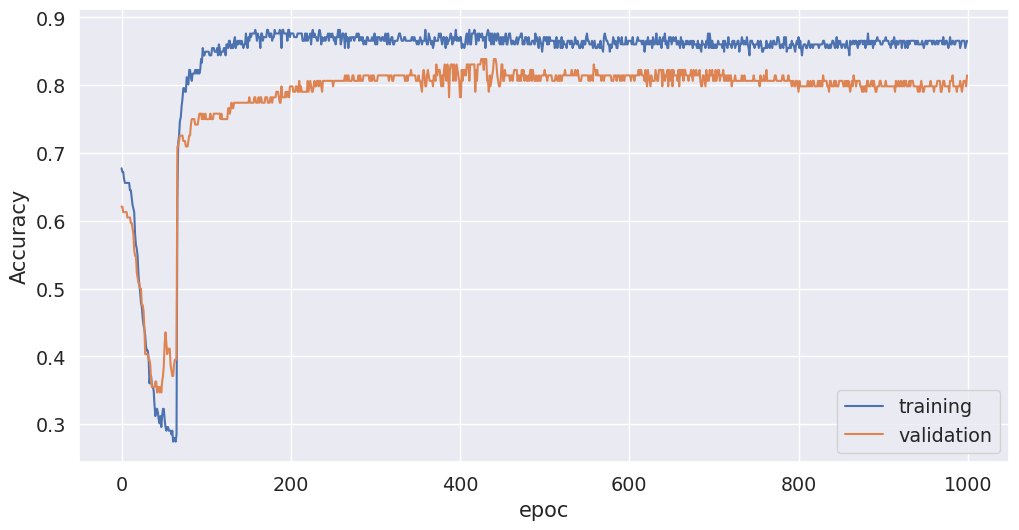

In [107]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

Que pasa si quiero guardar los pesos de mi mejor modelo: necesito usar callbacks

In [108]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

EarlyStopping para de entrenar el modelo según una condición sobre la variable monitor

In [109]:
es = EarlyStopping(monitor='val_acc', mode='max')

In [110]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(num_classes, activation="softmax"))
opt = keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 16)                112       
_________________________________________________________________
dense_45 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_46 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_47 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_________________________________________________________________


In [111]:
history = model.fit(
    X_train.values,
    y_train,
    epochs=1000,
    validation_data=(X_validation.values, y_test),
    callbacks=[es],
)

Train on 186 samples, validate on 124 samples
Epoch 1/1000
 32/186 [====>.........................] - ETA: 0s - loss: 13.4359 - accuracy: 0.3750

186/186 [==============================] - 0s 572us/step - loss: 13.5389 - accuracy: 0.2957 - val_loss: 11.5325 - val_accuracy: 0.3629


Epoch 2/1000
 32/186 [====>.........................] - ETA: 0s - loss: 12.9796 - accuracy: 0.3438

186/186 [==============================] - 0s 45us/step - loss: 13.2251 - accuracy: 0.2957 - val_loss: 11.3191 - val_accuracy: 0.3629


Epoch 3/1000
 32/186 [====>.........................] - ETA: 0s - loss: 14.3686 - accuracy: 0.2500

186/186 [==============================] - 0s 47us/step - loss: 12.9945 - accuracy: 0.2957 - val_loss: 11.1382 - val_accuracy: 0.3629


Epoch 4/1000
 32/186 [====>.........................] - ETA: 0s - loss: 12.7746 - accuracy: 0.2812

186/186 [==============================] - 0s 46us/step - loss: 12.7890 - accuracy: 0.2957 - val_loss: 10.9664 - val_accuracy: 0.3629


Epoch 5/1000
 32/186 [====>.........................] - ETA: 0s - loss: 13.1340 - accuracy: 0.2812

186/186 [==============================] - 0s 46us/step - loss: 12.5922 - accuracy: 0.2957 - val_loss: 10.8013 - val_accuracy: 0.3629


Epoch 6/1000
 32/186 [====>.........................] - ETA: 0s - loss: 11.5506 - accuracy: 0.3125

186/186 [==============================] - 0s 46us/step - loss: 12.4009 - accuracy: 0.2957 - val_loss: 10.6391 - val_accuracy: 0.3629


Epoch 7/1000
 32/186 [====>.........................] - ETA: 0s - loss: 10.8922 - accuracy: 0.3750

186/186 [==============================] - 0s 48us/step - loss: 12.2130 - accuracy: 0.2957 - val_loss: 10.4795 - val_accuracy: 0.3629


Epoch 8/1000
 32/186 [====>.........................] - ETA: 0s - loss: 12.1645 - accuracy: 0.3125

186/186 [==============================] - 0s 47us/step - loss: 12.0281 - accuracy: 0.2957 - val_loss: 10.3204 - val_accuracy: 0.3629


Epoch 9/1000
 32/186 [====>.........................] - ETA: 0s - loss: 11.4751 - accuracy: 0.3125

186/186 [==============================] - 0s 45us/step - loss: 11.8444 - accuracy: 0.2957 - val_loss: 10.1657 - val_accuracy: 0.3629


Epoch 10/1000
 32/186 [====>.........................] - ETA: 0s - loss: 9.4665 - accuracy: 0.4375

186/186 [==============================] - 0s 57us/step - loss: 11.6637 - accuracy: 0.2957 - val_loss: 10.0100 - val_accuracy: 0.3629


Epoch 11/1000
 32/186 [====>.........................] - ETA: 0s - loss: 12.0203 - accuracy: 0.2812

186/186 [==============================] - 0s 48us/step - loss: 11.4852 - accuracy: 0.2957 - val_loss: 9.8596 - val_accuracy: 0.3629


Epoch 12/1000
 32/186 [====>.........................] - ETA: 0s - loss: 13.1454 - accuracy: 0.1875

186/186 [==============================] - 0s 60us/step - loss: 11.3103 - accuracy: 0.2957 - val_loss: 9.7095 - val_accuracy: 0.3629


Epoch 13/1000
 32/186 [====>.........................] - ETA: 0s - loss: 10.9303 - accuracy: 0.3125

186/186 [==============================] - 0s 48us/step - loss: 11.1352 - accuracy: 0.2957 - val_loss: 9.5597 - val_accuracy: 0.3629


Epoch 14/1000
 32/186 [====>.........................] - ETA: 0s - loss: 12.1565 - accuracy: 0.1875

186/186 [==============================] - 0s 49us/step - loss: 10.9629 - accuracy: 0.2957 - val_loss: 9.4142 - val_accuracy: 0.3629


Epoch 15/1000
 32/186 [====>.........................] - ETA: 0s - loss: 11.1124 - accuracy: 0.2812

186/186 [==============================] - 0s 47us/step - loss: 10.7922 - accuracy: 0.2957 - val_loss: 9.2671 - val_accuracy: 0.3629


Epoch 16/1000
 32/186 [====>.........................] - ETA: 0s - loss: 9.3053 - accuracy: 0.4062

186/186 [==============================] - 0s 45us/step - loss: 10.6206 - accuracy: 0.2957 - val_loss: 9.1194 - val_accuracy: 0.3629


Epoch 17/1000
 32/186 [====>.........................] - ETA: 0s - loss: 10.1825 - accuracy: 0.3125

186/186 [==============================] - 0s 45us/step - loss: 10.4508 - accuracy: 0.2957 - val_loss: 8.9771 - val_accuracy: 0.3629


Epoch 18/1000
 32/186 [====>.........................] - ETA: 0s - loss: 11.6720 - accuracy: 0.2188

186/186 [==============================] - 0s 45us/step - loss: 10.2855 - accuracy: 0.2957 - val_loss: 8.8341 - val_accuracy: 0.3629


Epoch 19/1000
 32/186 [====>.........................] - ETA: 0s - loss: 10.4814 - accuracy: 0.2812

186/186 [==============================] - 0s 47us/step - loss: 10.1196 - accuracy: 0.2957 - val_loss: 8.6939 - val_accuracy: 0.3629


Epoch 20/1000
 32/186 [====>.........................] - ETA: 0s - loss: 10.9205 - accuracy: 0.2500

186/186 [==============================] - 0s 45us/step - loss: 9.9567 - accuracy: 0.2957 - val_loss: 8.5533 - val_accuracy: 0.3629


Epoch 21/1000
 32/186 [====>.........................] - ETA: 0s - loss: 7.7865 - accuracy: 0.4688

186/186 [==============================] - 0s 46us/step - loss: 9.7936 - accuracy: 0.2957 - val_loss: 8.4149 - val_accuracy: 0.3629


Epoch 22/1000
 32/186 [====>.........................] - ETA: 0s - loss: 8.7328 - accuracy: 0.3438

/opt/hostedtoolcache/Python/3.7.9/x64/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


186/186 [==============================] - 0s 50us/step - loss: 9.6329 - accuracy: 0.2957 - val_loss: 8.2788 - val_accuracy: 0.3629


Epoch 23/1000


 32/186 [====>.........................] - ETA: 0s - loss: 8.9585 - accuracy: 0.3438

186/186 [==============================] - 0s 46us/step - loss: 9.4743 - accuracy: 0.2957 - val_loss: 8.1427 - val_accuracy: 0.3629


Epoch 24/1000
 32/186 [====>.........................] - ETA: 0s - loss: 8.7275 - accuracy: 0.3438

186/186 [==============================] - 0s 44us/step - loss: 9.3162 - accuracy: 0.2957 - val_loss: 8.0085 - val_accuracy: 0.3629


Epoch 25/1000
 32/186 [====>.........................] - ETA: 0s - loss: 8.9608 - accuracy: 0.3125

186/186 [==============================] - 0s 47us/step - loss: 9.1600 - accuracy: 0.2957 - val_loss: 7.8750 - val_accuracy: 0.3629


Epoch 26/1000
 32/186 [====>.........................] - ETA: 0s - loss: 8.8203 - accuracy: 0.3125

186/186 [==============================] - 0s 48us/step - loss: 9.0052 - accuracy: 0.2957 - val_loss: 7.7426 - val_accuracy: 0.3629


Epoch 27/1000
 32/186 [====>.........................] - ETA: 0s - loss: 9.0077 - accuracy: 0.3125

186/186 [==============================] - 0s 43us/step - loss: 8.8523 - accuracy: 0.2957 - val_loss: 7.6132 - val_accuracy: 0.3629


Epoch 28/1000


 32/186 [====>.........................] - ETA: 0s - loss: 8.5194 - accuracy: 0.3125

186/186 [==============================] - 0s 48us/step - loss: 8.7017 - accuracy: 0.2957 - val_loss: 7.4846 - val_accuracy: 0.3629


Epoch 29/1000


 32/186 [====>.........................] - ETA: 0s - loss: 10.3709 - accuracy: 0.1875

186/186 [==============================] - 0s 52us/step - loss: 8.5533 - accuracy: 0.2957 - val_loss: 7.3566 - val_accuracy: 0.3629


Epoch 30/1000
 32/186 [====>.........................] - ETA: 0s - loss: 10.7960 - accuracy: 0.1250

186/186 [==============================] - 0s 46us/step - loss: 8.4053 - accuracy: 0.2957 - val_loss: 7.2304 - val_accuracy: 0.3629


Epoch 31/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.2542 - accuracy: 0.4688

186/186 [==============================] - 0s 45us/step - loss: 8.2581 - accuracy: 0.2957 - val_loss: 7.1056 - val_accuracy: 0.3629


Epoch 32/1000
 32/186 [====>.........................] - ETA: 0s - loss: 7.2966 - accuracy: 0.3750

186/186 [==============================] - 0s 45us/step - loss: 8.1141 - accuracy: 0.2957 - val_loss: 6.9833 - val_accuracy: 0.3629


Epoch 33/1000
 32/186 [====>.........................] - ETA: 0s - loss: 7.5660 - accuracy: 0.3438

186/186 [==============================] - 0s 49us/step - loss: 7.9714 - accuracy: 0.2957 - val_loss: 6.8595 - val_accuracy: 0.3629


Epoch 34/1000
 32/186 [====>.........................] - ETA: 0s - loss: 7.2695 - accuracy: 0.3750

186/186 [==============================] - 0s 43us/step - loss: 7.8290 - accuracy: 0.2957 - val_loss: 6.7379 - val_accuracy: 0.3629


Epoch 35/1000
 32/186 [====>.........................] - ETA: 0s - loss: 8.6062 - accuracy: 0.2188



186/186 [==============================] - 0s 48us/step - loss: 7.6887 - accuracy: 0.2957 - val_loss: 6.6186 - val_accuracy: 0.3629


Epoch 36/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.8333 - accuracy: 0.3438

186/186 [==============================] - 0s 44us/step - loss: 7.5493 - accuracy: 0.2957 - val_loss: 6.4981 - val_accuracy: 0.3629


Epoch 37/1000
 32/186 [====>.........................] - ETA: 0s - loss: 8.4005 - accuracy: 0.2188

186/186 [==============================] - 0s 49us/step - loss: 7.4113 - accuracy: 0.2957 - val_loss: 6.3800 - val_accuracy: 0.3629


Epoch 38/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.3744 - accuracy: 0.3750

186/186 [==============================] - 0s 46us/step - loss: 7.2746 - accuracy: 0.2957 - val_loss: 6.2635 - val_accuracy: 0.3629


Epoch 39/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.0838 - accuracy: 0.4062

186/186 [==============================] - 0s 49us/step - loss: 7.1398 - accuracy: 0.2957 - val_loss: 6.1481 - val_accuracy: 0.3629


Epoch 40/1000
 32/186 [====>.........................] - ETA: 0s - loss: 7.4805 - accuracy: 0.2500

186/186 [==============================] - 0s 48us/step - loss: 7.0079 - accuracy: 0.2957 - val_loss: 6.0364 - val_accuracy: 0.3629


Epoch 41/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.6890 - accuracy: 0.3125

186/186 [==============================] - 0s 49us/step - loss: 6.8778 - accuracy: 0.2957 - val_loss: 5.9233 - val_accuracy: 0.3629


Epoch 42/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.1109 - accuracy: 0.3438

186/186 [==============================] - 0s 51us/step - loss: 6.7466 - accuracy: 0.2957 - val_loss: 5.8092 - val_accuracy: 0.3629


Epoch 43/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.6012 - accuracy: 0.3125

186/186 [==============================] - 0s 45us/step - loss: 6.6167 - accuracy: 0.2957 - val_loss: 5.6992 - val_accuracy: 0.3629


Epoch 44/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.9397 - accuracy: 0.2812

186/186 [==============================] - 0s 47us/step - loss: 6.4901 - accuracy: 0.2957 - val_loss: 5.5899 - val_accuracy: 0.3629


Epoch 45/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.8326 - accuracy: 0.4062

186/186 [==============================] - 0s 49us/step - loss: 6.3638 - accuracy: 0.2957 - val_loss: 5.4809 - val_accuracy: 0.3629


Epoch 46/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.6304 - accuracy: 0.3438

186/186 [==============================] - 0s 49us/step - loss: 6.2388 - accuracy: 0.2957 - val_loss: 5.3741 - val_accuracy: 0.3629


Epoch 47/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.5228 - accuracy: 0.3438

186/186 [==============================] - 0s 47us/step - loss: 6.1161 - accuracy: 0.2957 - val_loss: 5.2681 - val_accuracy: 0.3629


Epoch 48/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.9836 - accuracy: 0.2812

186/186 [==============================] - 0s 48us/step - loss: 5.9943 - accuracy: 0.2957 - val_loss: 5.1636 - val_accuracy: 0.3629


Epoch 49/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.3975 - accuracy: 0.3438

186/186 [==============================] - 0s 47us/step - loss: 5.8740 - accuracy: 0.2957 - val_loss: 5.0604 - val_accuracy: 0.3629


Epoch 50/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.9552 - accuracy: 0.2812

186/186 [==============================] - 0s 46us/step - loss: 5.7560 - accuracy: 0.2957 - val_loss: 4.9596 - val_accuracy: 0.3629


Epoch 51/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.9057 - accuracy: 0.2812

186/186 [==============================] - 0s 44us/step - loss: 5.6399 - accuracy: 0.2957 - val_loss: 4.8592 - val_accuracy: 0.3629


Epoch 52/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.5104 - accuracy: 0.3125

186/186 [==============================] - 0s 48us/step - loss: 5.5245 - accuracy: 0.2957 - val_loss: 4.7596 - val_accuracy: 0.3629


Epoch 53/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.6675 - accuracy: 0.2812

186/186 [==============================] - 0s 47us/step - loss: 5.4099 - accuracy: 0.2957 - val_loss: 4.6610 - val_accuracy: 0.3629


Epoch 54/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.8011 - accuracy: 0.3438

186/186 [==============================] - 0s 47us/step - loss: 5.2965 - accuracy: 0.2957 - val_loss: 4.5630 - val_accuracy: 0.3629


Epoch 55/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.4539 - accuracy: 0.4062

186/186 [==============================] - 0s 47us/step - loss: 5.1833 - accuracy: 0.2957 - val_loss: 4.4643 - val_accuracy: 0.3629


Epoch 56/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.5998 - accuracy: 0.2188

186/186 [==============================] - 0s 46us/step - loss: 5.0715 - accuracy: 0.2957 - val_loss: 4.3695 - val_accuracy: 0.3629


Epoch 57/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.9931 - accuracy: 0.3125

186/186 [==============================] - 0s 47us/step - loss: 4.9640 - accuracy: 0.2957 - val_loss: 4.2772 - val_accuracy: 0.3629


Epoch 58/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.8824 - accuracy: 0.2812

186/186 [==============================] - 0s 46us/step - loss: 4.8588 - accuracy: 0.2957 - val_loss: 4.1854 - val_accuracy: 0.3629


Epoch 59/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.7119 - accuracy: 0.4688

186/186 [==============================] - 0s 45us/step - loss: 4.7540 - accuracy: 0.2957 - val_loss: 4.0933 - val_accuracy: 0.3629


Epoch 60/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.6856 - accuracy: 0.2812

186/186 [==============================] - 0s 46us/step - loss: 4.6503 - accuracy: 0.2957 - val_loss: 4.0035 - val_accuracy: 0.3629


Epoch 61/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.3712 - accuracy: 0.3438

186/186 [==============================] - 0s 49us/step - loss: 4.5481 - accuracy: 0.2957 - val_loss: 3.9135 - val_accuracy: 0.3629


Epoch 62/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.1881 - accuracy: 0.3125

186/186 [==============================] - 0s 46us/step - loss: 4.4464 - accuracy: 0.2957 - val_loss: 3.8249 - val_accuracy: 0.3629


Epoch 63/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.0115 - accuracy: 0.3438

186/186 [==============================] - 0s 75us/step - loss: 4.3458 - accuracy: 0.2957 - val_loss: 3.7368 - val_accuracy: 0.3629


Epoch 64/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.4428 - accuracy: 0.2812

186/186 [==============================] - 0s 49us/step - loss: 4.2473 - accuracy: 0.2957 - val_loss: 3.6513 - val_accuracy: 0.3629


Epoch 65/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.2600 - accuracy: 0.4375

186/186 [==============================] - 0s 49us/step - loss: 4.1500 - accuracy: 0.2957 - val_loss: 3.5657 - val_accuracy: 0.3629


Epoch 66/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.5032 - accuracy: 0.3750



186/186 [==============================] - 0s 48us/step - loss: 4.0538 - accuracy: 0.2957 - val_loss: 3.4820 - val_accuracy: 0.3629


Epoch 67/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.1964 - accuracy: 0.2812

186/186 [==============================] - 0s 45us/step - loss: 3.9597 - accuracy: 0.2957 - val_loss: 3.4003 - val_accuracy: 0.3629


Epoch 68/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.8276 - accuracy: 0.3125

186/186 [==============================] - 0s 49us/step - loss: 3.8679 - accuracy: 0.2957 - val_loss: 3.3192 - val_accuracy: 0.3629


Epoch 69/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.1812 - accuracy: 0.2500

186/186 [==============================] - 0s 48us/step - loss: 3.7768 - accuracy: 0.2957 - val_loss: 3.2391 - val_accuracy: 0.3629


Epoch 70/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.4691 - accuracy: 0.1562

186/186 [==============================] - 0s 48us/step - loss: 3.6873 - accuracy: 0.2957 - val_loss: 3.1611 - val_accuracy: 0.3629


Epoch 71/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.1295 - accuracy: 0.1875

186/186 [==============================] - 0s 47us/step - loss: 3.5993 - accuracy: 0.2957 - val_loss: 3.0840 - val_accuracy: 0.3629


Epoch 72/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.5974 - accuracy: 0.3125

186/186 [==============================] - 0s 45us/step - loss: 3.5120 - accuracy: 0.2957 - val_loss: 3.0067 - val_accuracy: 0.3629


Epoch 73/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.9543 - accuracy: 0.2188

186/186 [==============================] - 0s 44us/step - loss: 3.4250 - accuracy: 0.2957 - val_loss: 2.9299 - val_accuracy: 0.3629


Epoch 74/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.2281 - accuracy: 0.3438

186/186 [==============================] - 0s 45us/step - loss: 3.3387 - accuracy: 0.2957 - val_loss: 2.8544 - val_accuracy: 0.3629


Epoch 75/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.8723 - accuracy: 0.3750

186/186 [==============================] - 0s 67us/step - loss: 3.2539 - accuracy: 0.2957 - val_loss: 2.7802 - val_accuracy: 0.3629


Epoch 76/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.6516 - accuracy: 0.2188

186/186 [==============================] - 0s 45us/step - loss: 3.1715 - accuracy: 0.2957 - val_loss: 2.7089 - val_accuracy: 0.3629


Epoch 77/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.2274 - accuracy: 0.2812

186/186 [==============================] - 0s 47us/step - loss: 3.0900 - accuracy: 0.2957 - val_loss: 2.6365 - val_accuracy: 0.3629


Epoch 78/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.8024 - accuracy: 0.3438

186/186 [==============================] - 0s 47us/step - loss: 3.0083 - accuracy: 0.2957 - val_loss: 2.5678 - val_accuracy: 0.3629


Epoch 79/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.4976 - accuracy: 0.4062

186/186 [==============================] - 0s 49us/step - loss: 2.9297 - accuracy: 0.2957 - val_loss: 2.4993 - val_accuracy: 0.3629


Epoch 80/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.5491 - accuracy: 0.3750

186/186 [==============================] - 0s 48us/step - loss: 2.8520 - accuracy: 0.2957 - val_loss: 2.4323 - val_accuracy: 0.3629


Epoch 81/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.2401 - accuracy: 0.1875

186/186 [==============================] - 0s 46us/step - loss: 2.7762 - accuracy: 0.2957 - val_loss: 2.3669 - val_accuracy: 0.3629


Epoch 82/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.0042 - accuracy: 0.2500

186/186 [==============================] - 0s 47us/step - loss: 2.7015 - accuracy: 0.2957 - val_loss: 2.3013 - val_accuracy: 0.3629


Epoch 83/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.5517 - accuracy: 0.3125

186/186 [==============================] - 0s 46us/step - loss: 2.6267 - accuracy: 0.2957 - val_loss: 2.2360 - val_accuracy: 0.3629


Epoch 84/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.3452 - accuracy: 0.3438

186/186 [==============================] - 0s 46us/step - loss: 2.5535 - accuracy: 0.2957 - val_loss: 2.1743 - val_accuracy: 0.3629


Epoch 85/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.5845 - accuracy: 0.2812

186/186 [==============================] - 0s 47us/step - loss: 2.4845 - accuracy: 0.2957 - val_loss: 2.1149 - val_accuracy: 0.3629


Epoch 86/1000


 32/186 [====>.........................] - ETA: 0s - loss: 2.7362 - accuracy: 0.2188



186/186 [==============================] - 0s 48us/step - loss: 2.4169 - accuracy: 0.2957 - val_loss: 2.0558 - val_accuracy: 0.3629


Epoch 87/1000


 32/186 [====>.........................] - ETA: 0s - loss: 2.1025 - accuracy: 0.3750

186/186 [==============================] - 0s 43us/step - loss: 2.3492 - accuracy: 0.2957 - val_loss: 1.9971 - val_accuracy: 0.3629


Epoch 88/1000


 32/186 [====>.........................] - ETA: 0s - loss: 2.7833 - accuracy: 0.1562



186/186 [==============================] - 0s 46us/step - loss: 2.2835 - accuracy: 0.2957 - val_loss: 1.9408 - val_accuracy: 0.3629


Epoch 89/1000


 32/186 [====>.........................] - ETA: 0s - loss: 2.0846 - accuracy: 0.3438



186/186 [==============================] - 0s 43us/step - loss: 2.2186 - accuracy: 0.2957 - val_loss: 1.8843 - val_accuracy: 0.3629


Epoch 90/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.9365 - accuracy: 0.3438

186/186 [==============================] - 0s 42us/step - loss: 2.1546 - accuracy: 0.2957 - val_loss: 1.8292 - val_accuracy: 0.3629


Epoch 91/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.0297 - accuracy: 0.3125

186/186 [==============================] - 0s 42us/step - loss: 2.0922 - accuracy: 0.2957 - val_loss: 1.7759 - val_accuracy: 0.3629


Epoch 92/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.7337 - accuracy: 0.4375

186/186 [==============================] - 0s 41us/step - loss: 2.0319 - accuracy: 0.2957 - val_loss: 1.7243 - val_accuracy: 0.3629


Epoch 93/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.1194 - accuracy: 0.2500

186/186 [==============================] - 0s 42us/step - loss: 1.9729 - accuracy: 0.2957 - val_loss: 1.6741 - val_accuracy: 0.3629


Epoch 94/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.9177 - accuracy: 0.3125

186/186 [==============================] - 0s 42us/step - loss: 1.9156 - accuracy: 0.2957 - val_loss: 1.6250 - val_accuracy: 0.3629


Epoch 95/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.8219 - accuracy: 0.3125

186/186 [==============================] - 0s 45us/step - loss: 1.8596 - accuracy: 0.2957 - val_loss: 1.5771 - val_accuracy: 0.3629


Epoch 96/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.6272 - accuracy: 0.4375



186/186 [==============================] - 0s 44us/step - loss: 1.8043 - accuracy: 0.2957 - val_loss: 1.5301 - val_accuracy: 0.3629


Epoch 97/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.8289 - accuracy: 0.2812

186/186 [==============================] - 0s 46us/step - loss: 1.7511 - accuracy: 0.2957 - val_loss: 1.4861 - val_accuracy: 0.3629


Epoch 98/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.6359 - accuracy: 0.3438

186/186 [==============================] - 0s 46us/step - loss: 1.7002 - accuracy: 0.2957 - val_loss: 1.4438 - val_accuracy: 0.3629


Epoch 99/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.8748 - accuracy: 0.2500

186/186 [==============================] - 0s 47us/step - loss: 1.6509 - accuracy: 0.2957 - val_loss: 1.4020 - val_accuracy: 0.3629


Epoch 100/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.7108 - accuracy: 0.2812

186/186 [==============================] - 0s 47us/step - loss: 1.6028 - accuracy: 0.2957 - val_loss: 1.3617 - val_accuracy: 0.3629


Epoch 101/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.5591 - accuracy: 0.2812

186/186 [==============================] - 0s 45us/step - loss: 1.5555 - accuracy: 0.2957 - val_loss: 1.3228 - val_accuracy: 0.3629


Epoch 102/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.4439 - accuracy: 0.3438

186/186 [==============================] - 0s 47us/step - loss: 1.5102 - accuracy: 0.2957 - val_loss: 1.2856 - val_accuracy: 0.3629


Epoch 103/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.4735 - accuracy: 0.2812



186/186 [==============================] - 0s 43us/step - loss: 1.4677 - accuracy: 0.2957 - val_loss: 1.2517 - val_accuracy: 0.3629


Epoch 104/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.2496 - accuracy: 0.3750

186/186 [==============================] - 0s 44us/step - loss: 1.4275 - accuracy: 0.2957 - val_loss: 1.2182 - val_accuracy: 0.3629


Epoch 105/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.3927 - accuracy: 0.3125

186/186 [==============================] - 0s 45us/step - loss: 1.3884 - accuracy: 0.2957 - val_loss: 1.1863 - val_accuracy: 0.3629


Epoch 106/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.4661 - accuracy: 0.2500



186/186 [==============================] - 0s 48us/step - loss: 1.3517 - accuracy: 0.2957 - val_loss: 1.1563 - val_accuracy: 0.3629


Epoch 107/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.3299 - accuracy: 0.2500

186/186 [==============================] - 0s 47us/step - loss: 1.3159 - accuracy: 0.2957 - val_loss: 1.1282 - val_accuracy: 0.3629


Epoch 108/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.3914 - accuracy: 0.2500

186/186 [==============================] - 0s 47us/step - loss: 1.2819 - accuracy: 0.2957 - val_loss: 1.1017 - val_accuracy: 0.3629


Epoch 109/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1348 - accuracy: 0.3750



186/186 [==============================] - 0s 45us/step - loss: 1.2492 - accuracy: 0.2957 - val_loss: 1.0761 - val_accuracy: 0.3629


Epoch 110/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.2725 - accuracy: 0.3125

186/186 [==============================] - 0s 48us/step - loss: 1.2173 - accuracy: 0.2957 - val_loss: 1.0511 - val_accuracy: 0.3629


Epoch 111/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0595 - accuracy: 0.4062

186/186 [==============================] - 0s 45us/step - loss: 1.1869 - accuracy: 0.2957 - val_loss: 1.0281 - val_accuracy: 0.3629


Epoch 112/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0851 - accuracy: 0.3750

186/186 [==============================] - 0s 48us/step - loss: 1.1568 - accuracy: 0.2957 - val_loss: 1.0058 - val_accuracy: 0.3629


Epoch 113/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1287 - accuracy: 0.2812

186/186 [==============================] - 0s 46us/step - loss: 1.1280 - accuracy: 0.2957 - val_loss: 0.9846 - val_accuracy: 0.3629


Epoch 114/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0668 - accuracy: 0.4062

186/186 [==============================] - 0s 47us/step - loss: 1.0994 - accuracy: 0.2957 - val_loss: 0.9640 - val_accuracy: 0.3629


Epoch 115/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1040 - accuracy: 0.2188

186/186 [==============================] - 0s 46us/step - loss: 1.0718 - accuracy: 0.2957 - val_loss: 0.9449 - val_accuracy: 0.3629


Epoch 116/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0621 - accuracy: 0.2500

186/186 [==============================] - 0s 46us/step - loss: 1.0451 - accuracy: 0.2957 - val_loss: 0.9267 - val_accuracy: 0.3629


Epoch 117/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9762 - accuracy: 0.3125

186/186 [==============================] - 0s 45us/step - loss: 1.0201 - accuracy: 0.2957 - val_loss: 0.9093 - val_accuracy: 0.3629


Epoch 118/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8962 - accuracy: 0.4375

186/186 [==============================] - 0s 48us/step - loss: 0.9957 - accuracy: 0.2957 - val_loss: 0.8931 - val_accuracy: 0.3629


Epoch 119/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9323 - accuracy: 0.2812

186/186 [==============================] - 0s 48us/step - loss: 0.9723 - accuracy: 0.2957 - val_loss: 0.8784 - val_accuracy: 0.3629


Epoch 120/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9220 - accuracy: 0.4375

186/186 [==============================] - 0s 48us/step - loss: 0.9498 - accuracy: 0.2957 - val_loss: 0.8640 - val_accuracy: 0.3629


Epoch 121/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9654 - accuracy: 0.2812

186/186 [==============================] - 0s 47us/step - loss: 0.9286 - accuracy: 0.2957 - val_loss: 0.8504 - val_accuracy: 0.3629


Epoch 122/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8911 - accuracy: 0.3125

186/186 [==============================] - 0s 44us/step - loss: 0.9088 - accuracy: 0.2957 - val_loss: 0.8380 - val_accuracy: 0.3629


Epoch 123/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9277 - accuracy: 0.3438

186/186 [==============================] - 0s 47us/step - loss: 0.8905 - accuracy: 0.2957 - val_loss: 0.8261 - val_accuracy: 0.3629


Epoch 124/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8963 - accuracy: 0.2188

186/186 [==============================] - 0s 47us/step - loss: 0.8738 - accuracy: 0.2957 - val_loss: 0.8146 - val_accuracy: 0.3629


Epoch 125/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8453 - accuracy: 0.3125

186/186 [==============================] - 0s 48us/step - loss: 0.8569 - accuracy: 0.2957 - val_loss: 0.8030 - val_accuracy: 0.3629


Epoch 126/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8572 - accuracy: 0.3750

186/186 [==============================] - 0s 46us/step - loss: 0.8415 - accuracy: 0.2957 - val_loss: 0.7917 - val_accuracy: 0.3629


Epoch 127/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8705 - accuracy: 0.2500

186/186 [==============================] - 0s 46us/step - loss: 0.8269 - accuracy: 0.2957 - val_loss: 0.7816 - val_accuracy: 0.3629


Epoch 128/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8800 - accuracy: 0.2188

186/186 [==============================] - 0s 47us/step - loss: 0.8136 - accuracy: 0.2957 - val_loss: 0.7721 - val_accuracy: 0.3629


Epoch 129/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8156 - accuracy: 0.3125

186/186 [==============================] - 0s 48us/step - loss: 0.8010 - accuracy: 0.2957 - val_loss: 0.7634 - val_accuracy: 0.3629


Epoch 130/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7918 - accuracy: 0.2812

186/186 [==============================] - 0s 49us/step - loss: 0.7898 - accuracy: 0.2957 - val_loss: 0.7560 - val_accuracy: 0.3629


Epoch 131/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7653 - accuracy: 0.3438

186/186 [==============================] - 0s 44us/step - loss: 0.7795 - accuracy: 0.2957 - val_loss: 0.7491 - val_accuracy: 0.3629


Epoch 132/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7641 - accuracy: 0.2500

186/186 [==============================] - 0s 45us/step - loss: 0.7700 - accuracy: 0.3011 - val_loss: 0.7426 - val_accuracy: 0.3710


Epoch 133/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7762 - accuracy: 0.2812

186/186 [==============================] - 0s 48us/step - loss: 0.7616 - accuracy: 0.3065 - val_loss: 0.7370 - val_accuracy: 0.3790


Epoch 134/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7577 - accuracy: 0.3438

186/186 [==============================] - 0s 47us/step - loss: 0.7543 - accuracy: 0.3172 - val_loss: 0.7319 - val_accuracy: 0.3790


Epoch 135/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7493 - accuracy: 0.2812

186/186 [==============================] - 0s 48us/step - loss: 0.7468 - accuracy: 0.3280 - val_loss: 0.7263 - val_accuracy: 0.3952


Epoch 136/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7390 - accuracy: 0.3125

186/186 [==============================] - 0s 47us/step - loss: 0.7390 - accuracy: 0.3441 - val_loss: 0.7212 - val_accuracy: 0.4113


Epoch 137/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7295 - accuracy: 0.3438

186/186 [==============================] - 0s 46us/step - loss: 0.7326 - accuracy: 0.3710 - val_loss: 0.7168 - val_accuracy: 0.4435


Epoch 138/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7600 - accuracy: 0.4062

186/186 [==============================] - 0s 44us/step - loss: 0.7261 - accuracy: 0.3925 - val_loss: 0.7130 - val_accuracy: 0.4677


Epoch 139/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7124 - accuracy: 0.4375

186/186 [==============================] - 0s 47us/step - loss: 0.7204 - accuracy: 0.4677 - val_loss: 0.7096 - val_accuracy: 0.5323


Epoch 140/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7275 - accuracy: 0.3750

186/186 [==============================] - 0s 45us/step - loss: 0.7152 - accuracy: 0.5753 - val_loss: 0.7069 - val_accuracy: 0.6613


Epoch 141/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7038 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.7105 - accuracy: 0.6559 - val_loss: 0.7048 - val_accuracy: 0.7177


Epoch 142/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7049 - accuracy: 0.6250

186/186 [==============================] - 0s 48us/step - loss: 0.7059 - accuracy: 0.6935 - val_loss: 0.7030 - val_accuracy: 0.7339


Epoch 143/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6992 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.7021 - accuracy: 0.6828 - val_loss: 0.7014 - val_accuracy: 0.7016


Epoch 144/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7034 - accuracy: 0.5938

186/186 [==============================] - 0s 50us/step - loss: 0.6983 - accuracy: 0.6720 - val_loss: 0.7000 - val_accuracy: 0.6210


Epoch 145/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6873 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.6954 - accuracy: 0.6828 - val_loss: 0.6988 - val_accuracy: 0.6129


Epoch 146/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6910 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.6925 - accuracy: 0.6882 - val_loss: 0.6976 - val_accuracy: 0.6129


Epoch 147/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6876 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.6900 - accuracy: 0.6882 - val_loss: 0.6965 - val_accuracy: 0.6129


Epoch 148/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6876 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.6874 - accuracy: 0.6935 - val_loss: 0.6957 - val_accuracy: 0.6129


Epoch 149/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6803 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.6853 - accuracy: 0.6935 - val_loss: 0.6948 - val_accuracy: 0.6129


Epoch 150/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6837 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.6834 - accuracy: 0.6989 - val_loss: 0.6941 - val_accuracy: 0.6210


Epoch 151/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6885 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 0.6819 - accuracy: 0.7043 - val_loss: 0.6936 - val_accuracy: 0.6129


Epoch 152/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6931 - accuracy: 0.6250

186/186 [==============================] - 0s 47us/step - loss: 0.6802 - accuracy: 0.7043 - val_loss: 0.6931 - val_accuracy: 0.6210


Epoch 153/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6769 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.6787 - accuracy: 0.7043 - val_loss: 0.6925 - val_accuracy: 0.6290


Epoch 154/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6816 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.6773 - accuracy: 0.7043 - val_loss: 0.6920 - val_accuracy: 0.6290


Epoch 155/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6880 - accuracy: 0.6562

186/186 [==============================] - 0s 48us/step - loss: 0.6758 - accuracy: 0.7043 - val_loss: 0.6915 - val_accuracy: 0.6290


Epoch 156/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6762 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.6744 - accuracy: 0.7043 - val_loss: 0.6911 - val_accuracy: 0.6290


Epoch 157/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6781 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.6731 - accuracy: 0.7043 - val_loss: 0.6906 - val_accuracy: 0.6290


Epoch 158/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6503 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.6717 - accuracy: 0.7043 - val_loss: 0.6902 - val_accuracy: 0.6290


Epoch 159/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6715 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.6703 - accuracy: 0.7043 - val_loss: 0.6895 - val_accuracy: 0.6371


Epoch 160/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7016 - accuracy: 0.5938

186/186 [==============================] - 0s 45us/step - loss: 0.6688 - accuracy: 0.7043 - val_loss: 0.6890 - val_accuracy: 0.6371


Epoch 161/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6461 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.6673 - accuracy: 0.7043 - val_loss: 0.6887 - val_accuracy: 0.6371


Epoch 162/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6553 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.6658 - accuracy: 0.7043 - val_loss: 0.6882 - val_accuracy: 0.6371


Epoch 163/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6898 - accuracy: 0.6250



186/186 [==============================] - 0s 46us/step - loss: 0.6640 - accuracy: 0.7043 - val_loss: 0.6878 - val_accuracy: 0.6371


Epoch 164/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7114 - accuracy: 0.5625

186/186 [==============================] - 0s 48us/step - loss: 0.6623 - accuracy: 0.7043 - val_loss: 0.6876 - val_accuracy: 0.6371


Epoch 165/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6428 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.6607 - accuracy: 0.7043 - val_loss: 0.6873 - val_accuracy: 0.6371


Epoch 166/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6029 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.6593 - accuracy: 0.7043 - val_loss: 0.6871 - val_accuracy: 0.6371


Epoch 167/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6631 - accuracy: 0.6875

186/186 [==============================] - 0s 44us/step - loss: 0.6578 - accuracy: 0.7043 - val_loss: 0.6869 - val_accuracy: 0.6371


Epoch 168/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6409 - accuracy: 0.7500



186/186 [==============================] - 0s 44us/step - loss: 0.6562 - accuracy: 0.7043 - val_loss: 0.6868 - val_accuracy: 0.6371


Epoch 169/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7087 - accuracy: 0.5938

186/186 [==============================] - 0s 48us/step - loss: 0.6549 - accuracy: 0.7043 - val_loss: 0.6866 - val_accuracy: 0.6371


Epoch 170/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6666 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.6534 - accuracy: 0.7043 - val_loss: 0.6865 - val_accuracy: 0.6371


Epoch 171/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6431 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.6524 - accuracy: 0.7043 - val_loss: 0.6864 - val_accuracy: 0.6371


Epoch 172/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7064 - accuracy: 0.5938

186/186 [==============================] - 0s 48us/step - loss: 0.6510 - accuracy: 0.7043 - val_loss: 0.6863 - val_accuracy: 0.6371


Epoch 173/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6608 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.6498 - accuracy: 0.7043 - val_loss: 0.6862 - val_accuracy: 0.6371


Epoch 174/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6192 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.6487 - accuracy: 0.7043 - val_loss: 0.6862 - val_accuracy: 0.6371


Epoch 175/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6371 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.6474 - accuracy: 0.7043 - val_loss: 0.6863 - val_accuracy: 0.6371


Epoch 176/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5954 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.6462 - accuracy: 0.7043 - val_loss: 0.6863 - val_accuracy: 0.6371


Epoch 177/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6929 - accuracy: 0.6250

186/186 [==============================] - 0s 43us/step - loss: 0.6451 - accuracy: 0.7043 - val_loss: 0.6866 - val_accuracy: 0.6371


Epoch 178/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6535 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.6438 - accuracy: 0.7043 - val_loss: 0.6868 - val_accuracy: 0.6371


Epoch 179/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6475 - accuracy: 0.6875

186/186 [==============================] - 0s 44us/step - loss: 0.6429 - accuracy: 0.7043 - val_loss: 0.6868 - val_accuracy: 0.6371


Epoch 180/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6526 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.6420 - accuracy: 0.7043 - val_loss: 0.6868 - val_accuracy: 0.6371


Epoch 181/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6562 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.6411 - accuracy: 0.7043 - val_loss: 0.6867 - val_accuracy: 0.6371


Epoch 182/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5806 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.6403 - accuracy: 0.7043 - val_loss: 0.6865 - val_accuracy: 0.6371


Epoch 183/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6062 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.6394 - accuracy: 0.7043 - val_loss: 0.6865 - val_accuracy: 0.6371


Epoch 184/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6486 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.6385 - accuracy: 0.7043 - val_loss: 0.6864 - val_accuracy: 0.6371


Epoch 185/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6767 - accuracy: 0.6562



186/186 [==============================] - 0s 44us/step - loss: 0.6377 - accuracy: 0.7043 - val_loss: 0.6865 - val_accuracy: 0.6371


Epoch 186/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5837 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.6369 - accuracy: 0.7043 - val_loss: 0.6864 - val_accuracy: 0.6371


Epoch 187/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6943 - accuracy: 0.6250

186/186 [==============================] - 0s 47us/step - loss: 0.6362 - accuracy: 0.7043 - val_loss: 0.6861 - val_accuracy: 0.6371


Epoch 188/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6078 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.6352 - accuracy: 0.7043 - val_loss: 0.6860 - val_accuracy: 0.6371


Epoch 189/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6609 - accuracy: 0.6562



186/186 [==============================] - 0s 48us/step - loss: 0.6346 - accuracy: 0.7043 - val_loss: 0.6859 - val_accuracy: 0.6371


Epoch 190/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6467 - accuracy: 0.6875



186/186 [==============================] - 0s 44us/step - loss: 0.6338 - accuracy: 0.7043 - val_loss: 0.6859 - val_accuracy: 0.6371


Epoch 191/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6843 - accuracy: 0.6562

186/186 [==============================] - 0s 46us/step - loss: 0.6330 - accuracy: 0.7043 - val_loss: 0.6858 - val_accuracy: 0.6371


Epoch 192/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6865 - accuracy: 0.6250

186/186 [==============================] - 0s 45us/step - loss: 0.6322 - accuracy: 0.7043 - val_loss: 0.6858 - val_accuracy: 0.6371


Epoch 193/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5733 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.6312 - accuracy: 0.7043 - val_loss: 0.6854 - val_accuracy: 0.6371


Epoch 194/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7051 - accuracy: 0.5938

186/186 [==============================] - 0s 45us/step - loss: 0.6305 - accuracy: 0.7043 - val_loss: 0.6854 - val_accuracy: 0.6371


Epoch 195/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6589 - accuracy: 0.6562

186/186 [==============================] - 0s 46us/step - loss: 0.6299 - accuracy: 0.7043 - val_loss: 0.6852 - val_accuracy: 0.6371


Epoch 196/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5943 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.6289 - accuracy: 0.7043 - val_loss: 0.6850 - val_accuracy: 0.6371


Epoch 197/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6419 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.6283 - accuracy: 0.7043 - val_loss: 0.6849 - val_accuracy: 0.6371


Epoch 198/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7207 - accuracy: 0.5938

186/186 [==============================] - 0s 49us/step - loss: 0.6275 - accuracy: 0.7043 - val_loss: 0.6848 - val_accuracy: 0.6371


Epoch 199/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6718 - accuracy: 0.6562

186/186 [==============================] - 0s 44us/step - loss: 0.6266 - accuracy: 0.7043 - val_loss: 0.6846 - val_accuracy: 0.6371


Epoch 200/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5668 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.6263 - accuracy: 0.7043 - val_loss: 0.6841 - val_accuracy: 0.6371


Epoch 201/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6541 - accuracy: 0.6562

186/186 [==============================] - 0s 48us/step - loss: 0.6251 - accuracy: 0.7043 - val_loss: 0.6839 - val_accuracy: 0.6371


Epoch 202/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6767 - accuracy: 0.6250

186/186 [==============================] - 0s 48us/step - loss: 0.6244 - accuracy: 0.7043 - val_loss: 0.6835 - val_accuracy: 0.6371


Epoch 203/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5185 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.6239 - accuracy: 0.7043 - val_loss: 0.6832 - val_accuracy: 0.6371


Epoch 204/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6579 - accuracy: 0.6562

186/186 [==============================] - 0s 44us/step - loss: 0.6230 - accuracy: 0.7043 - val_loss: 0.6827 - val_accuracy: 0.6371


Epoch 205/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6306 - accuracy: 0.6875

186/186 [==============================] - 0s 44us/step - loss: 0.6225 - accuracy: 0.7043 - val_loss: 0.6822 - val_accuracy: 0.6371


Epoch 206/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7140 - accuracy: 0.5938



186/186 [==============================] - 0s 44us/step - loss: 0.6216 - accuracy: 0.7043 - val_loss: 0.6817 - val_accuracy: 0.6371


Epoch 207/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5673 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.6211 - accuracy: 0.7043 - val_loss: 0.6813 - val_accuracy: 0.6371


Epoch 208/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6206 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.6202 - accuracy: 0.7043 - val_loss: 0.6809 - val_accuracy: 0.6371


Epoch 209/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5672 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.6196 - accuracy: 0.7043 - val_loss: 0.6801 - val_accuracy: 0.6371


Epoch 210/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6495 - accuracy: 0.6562



186/186 [==============================] - 0s 46us/step - loss: 0.6188 - accuracy: 0.7043 - val_loss: 0.6795 - val_accuracy: 0.6371


Epoch 211/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5976 - accuracy: 0.7188



186/186 [==============================] - 0s 44us/step - loss: 0.6183 - accuracy: 0.7043 - val_loss: 0.6788 - val_accuracy: 0.6371


Epoch 212/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5720 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.6175 - accuracy: 0.7043 - val_loss: 0.6784 - val_accuracy: 0.6371


Epoch 213/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7353 - accuracy: 0.5625

186/186 [==============================] - 0s 44us/step - loss: 0.6172 - accuracy: 0.7043 - val_loss: 0.6778 - val_accuracy: 0.6371


Epoch 214/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5920 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.6159 - accuracy: 0.7043 - val_loss: 0.6773 - val_accuracy: 0.6371


Epoch 215/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6186 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.6155 - accuracy: 0.7043 - val_loss: 0.6770 - val_accuracy: 0.6371


Epoch 216/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5276 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.6146 - accuracy: 0.7043 - val_loss: 0.6765 - val_accuracy: 0.6371


Epoch 217/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5625 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.6138 - accuracy: 0.7043 - val_loss: 0.6759 - val_accuracy: 0.6371


Epoch 218/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6017 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.6130 - accuracy: 0.7043 - val_loss: 0.6756 - val_accuracy: 0.6371


Epoch 219/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5165 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.6125 - accuracy: 0.7043 - val_loss: 0.6749 - val_accuracy: 0.6371


Epoch 220/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5348 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.6117 - accuracy: 0.7043 - val_loss: 0.6744 - val_accuracy: 0.6371


Epoch 221/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4955 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.6108 - accuracy: 0.7043 - val_loss: 0.6739 - val_accuracy: 0.6371


Epoch 222/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5220 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.6100 - accuracy: 0.7043 - val_loss: 0.6734 - val_accuracy: 0.6371


Epoch 223/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5396 - accuracy: 0.7812



186/186 [==============================] - 0s 46us/step - loss: 0.6093 - accuracy: 0.7043 - val_loss: 0.6729 - val_accuracy: 0.6371


Epoch 224/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5855 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.6083 - accuracy: 0.7043 - val_loss: 0.6723 - val_accuracy: 0.6371


Epoch 225/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5002 - accuracy: 0.8438



186/186 [==============================] - 0s 46us/step - loss: 0.6073 - accuracy: 0.7043 - val_loss: 0.6716 - val_accuracy: 0.6371


Epoch 226/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5542 - accuracy: 0.7500

186/186 [==============================] - 0s 43us/step - loss: 0.6068 - accuracy: 0.7043 - val_loss: 0.6711 - val_accuracy: 0.6371


Epoch 227/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6395 - accuracy: 0.6562

186/186 [==============================] - 0s 45us/step - loss: 0.6054 - accuracy: 0.7043 - val_loss: 0.6707 - val_accuracy: 0.6371


Epoch 228/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5817 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.6047 - accuracy: 0.7043 - val_loss: 0.6704 - val_accuracy: 0.6371


Epoch 229/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6896 - accuracy: 0.6250



186/186 [==============================] - 0s 45us/step - loss: 0.6039 - accuracy: 0.7043 - val_loss: 0.6700 - val_accuracy: 0.6371


Epoch 230/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6279 - accuracy: 0.6562

186/186 [==============================] - 0s 46us/step - loss: 0.6029 - accuracy: 0.7043 - val_loss: 0.6692 - val_accuracy: 0.6371


Epoch 231/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5941 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.6018 - accuracy: 0.7043 - val_loss: 0.6687 - val_accuracy: 0.6371


Epoch 232/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5897 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.6010 - accuracy: 0.7043 - val_loss: 0.6680 - val_accuracy: 0.6371


Epoch 233/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5403 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.6001 - accuracy: 0.7043 - val_loss: 0.6673 - val_accuracy: 0.6371


Epoch 234/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5583 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.5989 - accuracy: 0.7043 - val_loss: 0.6665 - val_accuracy: 0.6371


Epoch 235/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5327 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.5980 - accuracy: 0.7043 - val_loss: 0.6659 - val_accuracy: 0.6371


Epoch 236/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4593 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.5974 - accuracy: 0.7043 - val_loss: 0.6652 - val_accuracy: 0.6371


Epoch 237/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6417 - accuracy: 0.6562

186/186 [==============================] - 0s 44us/step - loss: 0.5958 - accuracy: 0.7043 - val_loss: 0.6647 - val_accuracy: 0.6371


Epoch 238/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6188 - accuracy: 0.6875

186/186 [==============================] - 0s 44us/step - loss: 0.5949 - accuracy: 0.7043 - val_loss: 0.6639 - val_accuracy: 0.6371


Epoch 239/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5573 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.5938 - accuracy: 0.7043 - val_loss: 0.6631 - val_accuracy: 0.6371


Epoch 240/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6809 - accuracy: 0.5938

186/186 [==============================] - 0s 44us/step - loss: 0.5928 - accuracy: 0.7043 - val_loss: 0.6627 - val_accuracy: 0.6371


Epoch 241/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5021 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.5921 - accuracy: 0.7043 - val_loss: 0.6619 - val_accuracy: 0.6371


Epoch 242/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4889 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.5908 - accuracy: 0.7043 - val_loss: 0.6613 - val_accuracy: 0.6371


Epoch 243/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6575 - accuracy: 0.6250

186/186 [==============================] - 0s 47us/step - loss: 0.5897 - accuracy: 0.7043 - val_loss: 0.6604 - val_accuracy: 0.6371


Epoch 244/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5820 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.5888 - accuracy: 0.7043 - val_loss: 0.6595 - val_accuracy: 0.6371


Epoch 245/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6459 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 0.5876 - accuracy: 0.7043 - val_loss: 0.6588 - val_accuracy: 0.6371


Epoch 246/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6658 - accuracy: 0.6250

186/186 [==============================] - 0s 49us/step - loss: 0.5869 - accuracy: 0.7043 - val_loss: 0.6580 - val_accuracy: 0.6371


Epoch 247/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4890 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.5856 - accuracy: 0.7043 - val_loss: 0.6570 - val_accuracy: 0.6371


Epoch 248/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6023 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.5843 - accuracy: 0.7043 - val_loss: 0.6562 - val_accuracy: 0.6371


Epoch 249/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5390 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.5831 - accuracy: 0.7043 - val_loss: 0.6553 - val_accuracy: 0.6371


Epoch 250/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5095 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.5821 - accuracy: 0.7043 - val_loss: 0.6545 - val_accuracy: 0.6371


Epoch 251/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6324 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 0.5809 - accuracy: 0.7043 - val_loss: 0.6534 - val_accuracy: 0.6371


Epoch 252/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4769 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.5797 - accuracy: 0.7043 - val_loss: 0.6524 - val_accuracy: 0.6371


Epoch 253/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5785 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.5783 - accuracy: 0.7043 - val_loss: 0.6516 - val_accuracy: 0.6371


Epoch 254/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6514 - accuracy: 0.6250

186/186 [==============================] - 0s 47us/step - loss: 0.5772 - accuracy: 0.7043 - val_loss: 0.6507 - val_accuracy: 0.6371


Epoch 255/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5334 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.5759 - accuracy: 0.7043 - val_loss: 0.6497 - val_accuracy: 0.6371


Epoch 256/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5440 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.5744 - accuracy: 0.7043 - val_loss: 0.6485 - val_accuracy: 0.6371


Epoch 257/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4980 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.5732 - accuracy: 0.7043 - val_loss: 0.6473 - val_accuracy: 0.6371


Epoch 258/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6344 - accuracy: 0.6250

186/186 [==============================] - 0s 49us/step - loss: 0.5719 - accuracy: 0.7043 - val_loss: 0.6464 - val_accuracy: 0.6371


Epoch 259/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4511 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.5706 - accuracy: 0.7043 - val_loss: 0.6454 - val_accuracy: 0.6371


Epoch 260/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4761 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.5692 - accuracy: 0.7043 - val_loss: 0.6443 - val_accuracy: 0.6371


Epoch 261/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6035 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.5678 - accuracy: 0.7043 - val_loss: 0.6431 - val_accuracy: 0.6371


Epoch 262/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5508 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.5665 - accuracy: 0.7043 - val_loss: 0.6420 - val_accuracy: 0.6371


Epoch 263/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4975 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.5654 - accuracy: 0.7043 - val_loss: 0.6410 - val_accuracy: 0.6371


Epoch 264/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4863 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.5637 - accuracy: 0.7043 - val_loss: 0.6398 - val_accuracy: 0.6371


Epoch 265/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5624 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.5624 - accuracy: 0.7043 - val_loss: 0.6387 - val_accuracy: 0.6371


Epoch 266/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5045 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.5609 - accuracy: 0.7043 - val_loss: 0.6374 - val_accuracy: 0.6371


Epoch 267/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5511 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.5595 - accuracy: 0.7043 - val_loss: 0.6362 - val_accuracy: 0.6371


Epoch 268/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6005 - accuracy: 0.6562



186/186 [==============================] - 0s 46us/step - loss: 0.5581 - accuracy: 0.7043 - val_loss: 0.6349 - val_accuracy: 0.6371


Epoch 269/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6017 - accuracy: 0.6562

186/186 [==============================] - 0s 46us/step - loss: 0.5566 - accuracy: 0.7043 - val_loss: 0.6337 - val_accuracy: 0.6371


Epoch 270/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5526 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.5550 - accuracy: 0.7043 - val_loss: 0.6323 - val_accuracy: 0.6371


Epoch 271/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5653 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.5533 - accuracy: 0.7043 - val_loss: 0.6308 - val_accuracy: 0.6371


Epoch 272/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5177 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.5518 - accuracy: 0.7043 - val_loss: 0.6295 - val_accuracy: 0.6371


Epoch 273/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4996 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.5501 - accuracy: 0.7043 - val_loss: 0.6282 - val_accuracy: 0.6371


Epoch 274/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5403 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.5484 - accuracy: 0.7043 - val_loss: 0.6266 - val_accuracy: 0.6371


Epoch 275/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6431 - accuracy: 0.6250

186/186 [==============================] - 0s 43us/step - loss: 0.5465 - accuracy: 0.7043 - val_loss: 0.6249 - val_accuracy: 0.6371


Epoch 276/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4408 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.5450 - accuracy: 0.7043 - val_loss: 0.6236 - val_accuracy: 0.6371


Epoch 277/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5613 - accuracy: 0.7188

186/186 [==============================] - 0s 43us/step - loss: 0.5431 - accuracy: 0.7043 - val_loss: 0.6221 - val_accuracy: 0.6371


Epoch 278/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4733 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.5413 - accuracy: 0.7043 - val_loss: 0.6204 - val_accuracy: 0.6371


Epoch 279/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6506 - accuracy: 0.6250

186/186 [==============================] - 0s 45us/step - loss: 0.5397 - accuracy: 0.7043 - val_loss: 0.6188 - val_accuracy: 0.6371


Epoch 280/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4957 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.5379 - accuracy: 0.7043 - val_loss: 0.6169 - val_accuracy: 0.6371


Epoch 281/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5517 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.5359 - accuracy: 0.7043 - val_loss: 0.6151 - val_accuracy: 0.6371


Epoch 282/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4979 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.5339 - accuracy: 0.7043 - val_loss: 0.6134 - val_accuracy: 0.6371


Epoch 283/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5352 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.5321 - accuracy: 0.7043 - val_loss: 0.6116 - val_accuracy: 0.6371


Epoch 284/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4275 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.5301 - accuracy: 0.7043 - val_loss: 0.6095 - val_accuracy: 0.6371


Epoch 285/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4653 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.5279 - accuracy: 0.7043 - val_loss: 0.6075 - val_accuracy: 0.6371


Epoch 286/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7259 - accuracy: 0.5000

186/186 [==============================] - 0s 45us/step - loss: 0.5263 - accuracy: 0.7043 - val_loss: 0.6057 - val_accuracy: 0.6371


Epoch 287/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6090 - accuracy: 0.5938



186/186 [==============================] - 0s 45us/step - loss: 0.5243 - accuracy: 0.7043 - val_loss: 0.6042 - val_accuracy: 0.6371


Epoch 288/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4424 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.5223 - accuracy: 0.7043 - val_loss: 0.6023 - val_accuracy: 0.6371


Epoch 289/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6970 - accuracy: 0.5312

186/186 [==============================] - 0s 45us/step - loss: 0.5206 - accuracy: 0.7043 - val_loss: 0.6005 - val_accuracy: 0.6371


Epoch 290/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4546 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.5183 - accuracy: 0.7043 - val_loss: 0.5985 - val_accuracy: 0.6371


Epoch 291/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5975 - accuracy: 0.6250

186/186 [==============================] - 0s 47us/step - loss: 0.5163 - accuracy: 0.7043 - val_loss: 0.5965 - val_accuracy: 0.6371


Epoch 292/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5152 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.5139 - accuracy: 0.7043 - val_loss: 0.5939 - val_accuracy: 0.6371


Epoch 293/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5472 - accuracy: 0.6562

186/186 [==============================] - 0s 46us/step - loss: 0.5115 - accuracy: 0.7043 - val_loss: 0.5917 - val_accuracy: 0.6371


Epoch 294/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5285 - accuracy: 0.6250

186/186 [==============================] - 0s 49us/step - loss: 0.5091 - accuracy: 0.7043 - val_loss: 0.5892 - val_accuracy: 0.6371


Epoch 295/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5068 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.5067 - accuracy: 0.7043 - val_loss: 0.5869 - val_accuracy: 0.6371


Epoch 296/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3812 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.5045 - accuracy: 0.7043 - val_loss: 0.5847 - val_accuracy: 0.6371


Epoch 297/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5206 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.5022 - accuracy: 0.7043 - val_loss: 0.5825 - val_accuracy: 0.6371


Epoch 298/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4659 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.4996 - accuracy: 0.7043 - val_loss: 0.5802 - val_accuracy: 0.6371


Epoch 299/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5994 - accuracy: 0.5625



186/186 [==============================] - 0s 49us/step - loss: 0.4976 - accuracy: 0.7043 - val_loss: 0.5779 - val_accuracy: 0.6371


Epoch 300/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5842 - accuracy: 0.5625



186/186 [==============================] - 0s 46us/step - loss: 0.4953 - accuracy: 0.7043 - val_loss: 0.5756 - val_accuracy: 0.6371


Epoch 301/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4564 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.4929 - accuracy: 0.7043 - val_loss: 0.5735 - val_accuracy: 0.6371


Epoch 302/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3837 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.4905 - accuracy: 0.7043 - val_loss: 0.5711 - val_accuracy: 0.6371


Epoch 303/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5735 - accuracy: 0.5625



186/186 [==============================] - 0s 44us/step - loss: 0.4883 - accuracy: 0.7043 - val_loss: 0.5688 - val_accuracy: 0.6371


Epoch 304/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6303 - accuracy: 0.5625

186/186 [==============================] - 0s 48us/step - loss: 0.4857 - accuracy: 0.7043 - val_loss: 0.5668 - val_accuracy: 0.6371


Epoch 305/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4199 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.4836 - accuracy: 0.7043 - val_loss: 0.5645 - val_accuracy: 0.6371


Epoch 306/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6348 - accuracy: 0.5625

186/186 [==============================] - 0s 45us/step - loss: 0.4812 - accuracy: 0.7043 - val_loss: 0.5627 - val_accuracy: 0.6371


Epoch 307/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4306 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.4790 - accuracy: 0.7043 - val_loss: 0.5605 - val_accuracy: 0.6371


Epoch 308/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4321 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.4766 - accuracy: 0.7043 - val_loss: 0.5585 - val_accuracy: 0.6371


Epoch 309/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4722 - accuracy: 0.7812



186/186 [==============================] - 0s 45us/step - loss: 0.4742 - accuracy: 0.7043 - val_loss: 0.5565 - val_accuracy: 0.6371


Epoch 310/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4701 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 0.4721 - accuracy: 0.7043 - val_loss: 0.5543 - val_accuracy: 0.6371


Epoch 311/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4631 - accuracy: 0.6875

186/186 [==============================] - 0s 44us/step - loss: 0.4697 - accuracy: 0.7043 - val_loss: 0.5523 - val_accuracy: 0.6371


Epoch 312/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4901 - accuracy: 0.6250



186/186 [==============================] - 0s 44us/step - loss: 0.4674 - accuracy: 0.7043 - val_loss: 0.5503 - val_accuracy: 0.6371


Epoch 313/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5439 - accuracy: 0.6562

186/186 [==============================] - 0s 44us/step - loss: 0.4651 - accuracy: 0.7043 - val_loss: 0.5484 - val_accuracy: 0.6371


Epoch 314/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5530 - accuracy: 0.6562

186/186 [==============================] - 0s 48us/step - loss: 0.4628 - accuracy: 0.7043 - val_loss: 0.5465 - val_accuracy: 0.6371


Epoch 315/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4847 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.4609 - accuracy: 0.7043 - val_loss: 0.5451 - val_accuracy: 0.6371


Epoch 316/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3905 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.4588 - accuracy: 0.7043 - val_loss: 0.5435 - val_accuracy: 0.6371


Epoch 317/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4185 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.4569 - accuracy: 0.7043 - val_loss: 0.5419 - val_accuracy: 0.6371


Epoch 318/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5687 - accuracy: 0.5625

186/186 [==============================] - 0s 46us/step - loss: 0.4555 - accuracy: 0.7043 - val_loss: 0.5408 - val_accuracy: 0.6371


Epoch 319/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4428 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.4534 - accuracy: 0.7043 - val_loss: 0.5395 - val_accuracy: 0.6371


Epoch 320/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3549 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.4519 - accuracy: 0.7043 - val_loss: 0.5384 - val_accuracy: 0.6371


Epoch 321/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5172 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 0.4503 - accuracy: 0.7043 - val_loss: 0.5374 - val_accuracy: 0.6371


Epoch 322/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4509 - accuracy: 0.6562

186/186 [==============================] - 0s 44us/step - loss: 0.4487 - accuracy: 0.7043 - val_loss: 0.5363 - val_accuracy: 0.6371


Epoch 323/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5211 - accuracy: 0.6250

186/186 [==============================] - 0s 45us/step - loss: 0.4473 - accuracy: 0.7043 - val_loss: 0.5351 - val_accuracy: 0.6371


Epoch 324/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4505 - accuracy: 0.6562

186/186 [==============================] - 0s 43us/step - loss: 0.4457 - accuracy: 0.7043 - val_loss: 0.5340 - val_accuracy: 0.6371


Epoch 325/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3596 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.4443 - accuracy: 0.7043 - val_loss: 0.5331 - val_accuracy: 0.6371


Epoch 326/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4775 - accuracy: 0.6562

186/186 [==============================] - 0s 43us/step - loss: 0.4430 - accuracy: 0.7043 - val_loss: 0.5321 - val_accuracy: 0.6371


Epoch 327/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3974 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.4416 - accuracy: 0.7043 - val_loss: 0.5311 - val_accuracy: 0.6371


Epoch 328/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3941 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.4406 - accuracy: 0.7043 - val_loss: 0.5301 - val_accuracy: 0.6371


Epoch 329/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5062 - accuracy: 0.6875

186/186 [==============================] - 0s 44us/step - loss: 0.4391 - accuracy: 0.7043 - val_loss: 0.5295 - val_accuracy: 0.6371


Epoch 330/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4175 - accuracy: 0.6875

186/186 [==============================] - 0s 44us/step - loss: 0.4379 - accuracy: 0.7043 - val_loss: 0.5288 - val_accuracy: 0.6371


Epoch 331/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4454 - accuracy: 0.6562

186/186 [==============================] - 0s 44us/step - loss: 0.4366 - accuracy: 0.7043 - val_loss: 0.5282 - val_accuracy: 0.6371


Epoch 332/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4709 - accuracy: 0.7188

186/186 [==============================] - 0s 43us/step - loss: 0.4355 - accuracy: 0.7043 - val_loss: 0.5274 - val_accuracy: 0.6371


Epoch 333/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3391 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.4347 - accuracy: 0.7043 - val_loss: 0.5266 - val_accuracy: 0.6371


Epoch 334/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4194 - accuracy: 0.6562

186/186 [==============================] - 0s 42us/step - loss: 0.4334 - accuracy: 0.7043 - val_loss: 0.5259 - val_accuracy: 0.6371


Epoch 335/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4188 - accuracy: 0.7500

186/186 [==============================] - 0s 43us/step - loss: 0.4325 - accuracy: 0.7043 - val_loss: 0.5249 - val_accuracy: 0.6371


Epoch 336/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4931 - accuracy: 0.5938

186/186 [==============================] - 0s 43us/step - loss: 0.4311 - accuracy: 0.7043 - val_loss: 0.5241 - val_accuracy: 0.6371


Epoch 337/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5330 - accuracy: 0.5625

186/186 [==============================] - 0s 42us/step - loss: 0.4302 - accuracy: 0.7043 - val_loss: 0.5231 - val_accuracy: 0.6371


Epoch 338/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5404 - accuracy: 0.5625

186/186 [==============================] - 0s 44us/step - loss: 0.4292 - accuracy: 0.7043 - val_loss: 0.5221 - val_accuracy: 0.6371


Epoch 339/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4486 - accuracy: 0.6875

186/186 [==============================] - 0s 42us/step - loss: 0.4278 - accuracy: 0.7043 - val_loss: 0.5210 - val_accuracy: 0.6371


Epoch 340/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4543 - accuracy: 0.5938

186/186 [==============================] - 0s 42us/step - loss: 0.4268 - accuracy: 0.7043 - val_loss: 0.5199 - val_accuracy: 0.6371


Epoch 341/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5032 - accuracy: 0.6250

186/186 [==============================] - 0s 42us/step - loss: 0.4258 - accuracy: 0.7043 - val_loss: 0.5191 - val_accuracy: 0.6371


Epoch 342/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4713 - accuracy: 0.6562

186/186 [==============================] - 0s 44us/step - loss: 0.4249 - accuracy: 0.7043 - val_loss: 0.5183 - val_accuracy: 0.6371


Epoch 343/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4426 - accuracy: 0.6562

186/186 [==============================] - 0s 46us/step - loss: 0.4238 - accuracy: 0.7043 - val_loss: 0.5175 - val_accuracy: 0.6371


Epoch 344/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4714 - accuracy: 0.5938

186/186 [==============================] - 0s 46us/step - loss: 0.4233 - accuracy: 0.7043 - val_loss: 0.5167 - val_accuracy: 0.6371


Epoch 345/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2750 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.4223 - accuracy: 0.7043 - val_loss: 0.5160 - val_accuracy: 0.6371


Epoch 346/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5200 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.4214 - accuracy: 0.7043 - val_loss: 0.5156 - val_accuracy: 0.6371


Epoch 347/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4452 - accuracy: 0.7500



186/186 [==============================] - 0s 49us/step - loss: 0.4207 - accuracy: 0.7043 - val_loss: 0.5152 - val_accuracy: 0.6371


Epoch 348/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4570 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.4199 - accuracy: 0.7043 - val_loss: 0.5147 - val_accuracy: 0.6371


Epoch 349/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3529 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.4193 - accuracy: 0.7043 - val_loss: 0.5141 - val_accuracy: 0.6371


Epoch 350/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4902 - accuracy: 0.6250

186/186 [==============================] - 0s 45us/step - loss: 0.4185 - accuracy: 0.7043 - val_loss: 0.5138 - val_accuracy: 0.6371


Epoch 351/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3014 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.4176 - accuracy: 0.7043 - val_loss: 0.5131 - val_accuracy: 0.6371


Epoch 352/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3527 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.4171 - accuracy: 0.7043 - val_loss: 0.5129 - val_accuracy: 0.6371


Epoch 353/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5149 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.4164 - accuracy: 0.7043 - val_loss: 0.5124 - val_accuracy: 0.6371


Epoch 354/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3982 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.4158 - accuracy: 0.7043 - val_loss: 0.5120 - val_accuracy: 0.6371


Epoch 355/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4286 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.4155 - accuracy: 0.7043 - val_loss: 0.5117 - val_accuracy: 0.6371


Epoch 356/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4324 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.4148 - accuracy: 0.7043 - val_loss: 0.5112 - val_accuracy: 0.6371


Epoch 357/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3765 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.4139 - accuracy: 0.7043 - val_loss: 0.5107 - val_accuracy: 0.6371


Epoch 358/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4860 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 0.4134 - accuracy: 0.7043 - val_loss: 0.5102 - val_accuracy: 0.6371


Epoch 359/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2851 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.4131 - accuracy: 0.7043 - val_loss: 0.5097 - val_accuracy: 0.6371


Epoch 360/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4414 - accuracy: 0.7188

186/186 [==============================] - 0s 43us/step - loss: 0.4122 - accuracy: 0.7043 - val_loss: 0.5095 - val_accuracy: 0.6371


Epoch 361/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4991 - accuracy: 0.7188

186/186 [==============================] - 0s 43us/step - loss: 0.4118 - accuracy: 0.7043 - val_loss: 0.5091 - val_accuracy: 0.6371


Epoch 362/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3573 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.4112 - accuracy: 0.7043 - val_loss: 0.5085 - val_accuracy: 0.6371


Epoch 363/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5090 - accuracy: 0.5625

186/186 [==============================] - 0s 44us/step - loss: 0.4108 - accuracy: 0.7043 - val_loss: 0.5084 - val_accuracy: 0.6371


Epoch 364/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3918 - accuracy: 0.7188



186/186 [==============================] - 0s 49us/step - loss: 0.4103 - accuracy: 0.7043 - val_loss: 0.5082 - val_accuracy: 0.6371


Epoch 365/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3217 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.4095 - accuracy: 0.7043 - val_loss: 0.5075 - val_accuracy: 0.6371


Epoch 366/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4021 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.4095 - accuracy: 0.7043 - val_loss: 0.5068 - val_accuracy: 0.6371


Epoch 367/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4174 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.4086 - accuracy: 0.7043 - val_loss: 0.5065 - val_accuracy: 0.6371


Epoch 368/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3998 - accuracy: 0.7188



186/186 [==============================] - 0s 43us/step - loss: 0.4083 - accuracy: 0.7043 - val_loss: 0.5059 - val_accuracy: 0.6371


Epoch 369/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4984 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 0.4078 - accuracy: 0.7043 - val_loss: 0.5055 - val_accuracy: 0.6371


Epoch 370/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4102 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.4073 - accuracy: 0.7043 - val_loss: 0.5051 - val_accuracy: 0.6371


Epoch 371/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4155 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.4071 - accuracy: 0.7043 - val_loss: 0.5047 - val_accuracy: 0.6371


Epoch 372/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4548 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.4064 - accuracy: 0.7043 - val_loss: 0.5040 - val_accuracy: 0.6371


Epoch 373/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3470 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.4061 - accuracy: 0.7043 - val_loss: 0.5036 - val_accuracy: 0.6371


Epoch 374/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4521 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.4059 - accuracy: 0.7043 - val_loss: 0.5032 - val_accuracy: 0.6371


Epoch 375/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3365 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.4052 - accuracy: 0.7043 - val_loss: 0.5027 - val_accuracy: 0.6371


Epoch 376/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4771 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.4050 - accuracy: 0.7043 - val_loss: 0.5027 - val_accuracy: 0.6371


Epoch 377/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5172 - accuracy: 0.5312

186/186 [==============================] - 0s 45us/step - loss: 0.4047 - accuracy: 0.7043 - val_loss: 0.5024 - val_accuracy: 0.6371


Epoch 378/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4541 - accuracy: 0.6562

186/186 [==============================] - 0s 44us/step - loss: 0.4041 - accuracy: 0.7043 - val_loss: 0.5018 - val_accuracy: 0.6371


Epoch 379/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4635 - accuracy: 0.5625

186/186 [==============================] - 0s 46us/step - loss: 0.4037 - accuracy: 0.7043 - val_loss: 0.5015 - val_accuracy: 0.6371


Epoch 380/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3708 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.4035 - accuracy: 0.7043 - val_loss: 0.5008 - val_accuracy: 0.6371


Epoch 381/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3975 - accuracy: 0.6250



186/186 [==============================] - 0s 45us/step - loss: 0.4034 - accuracy: 0.7043 - val_loss: 0.5007 - val_accuracy: 0.6371


Epoch 382/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3522 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.4026 - accuracy: 0.7043 - val_loss: 0.5006 - val_accuracy: 0.6371


Epoch 383/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2806 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4027 - accuracy: 0.7043 - val_loss: 0.5002 - val_accuracy: 0.6371


Epoch 384/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3580 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.4022 - accuracy: 0.7043 - val_loss: 0.5003 - val_accuracy: 0.6371


Epoch 385/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3419 - accuracy: 0.6875

186/186 [==============================] - 0s 44us/step - loss: 0.4018 - accuracy: 0.7043 - val_loss: 0.5000 - val_accuracy: 0.6371


Epoch 386/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5545 - accuracy: 0.5000

186/186 [==============================] - 0s 45us/step - loss: 0.4020 - accuracy: 0.7043 - val_loss: 0.4996 - val_accuracy: 0.6371


Epoch 387/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4150 - accuracy: 0.6875

186/186 [==============================] - 0s 44us/step - loss: 0.4015 - accuracy: 0.7043 - val_loss: 0.4994 - val_accuracy: 0.6371


Epoch 388/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3286 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.4010 - accuracy: 0.7043 - val_loss: 0.4992 - val_accuracy: 0.6371


Epoch 389/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3850 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.4008 - accuracy: 0.7043 - val_loss: 0.4990 - val_accuracy: 0.6371


Epoch 390/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3277 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.4008 - accuracy: 0.7043 - val_loss: 0.4988 - val_accuracy: 0.6371


Epoch 391/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4397 - accuracy: 0.7500



186/186 [==============================] - 0s 46us/step - loss: 0.4002 - accuracy: 0.7043 - val_loss: 0.4985 - val_accuracy: 0.6371


Epoch 392/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4038 - accuracy: 0.7188



186/186 [==============================] - 0s 44us/step - loss: 0.3998 - accuracy: 0.7043 - val_loss: 0.4979 - val_accuracy: 0.6371


Epoch 393/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3624 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.3997 - accuracy: 0.7043 - val_loss: 0.4976 - val_accuracy: 0.6371


Epoch 394/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4365 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 0.3995 - accuracy: 0.7043 - val_loss: 0.4975 - val_accuracy: 0.6371


Epoch 395/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4779 - accuracy: 0.5625

186/186 [==============================] - 0s 46us/step - loss: 0.3990 - accuracy: 0.7043 - val_loss: 0.4972 - val_accuracy: 0.6371


Epoch 396/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3689 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.3988 - accuracy: 0.7043 - val_loss: 0.4968 - val_accuracy: 0.6371


Epoch 397/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4695 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.3984 - accuracy: 0.7043 - val_loss: 0.4965 - val_accuracy: 0.6371


Epoch 398/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3240 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3983 - accuracy: 0.7043 - val_loss: 0.4961 - val_accuracy: 0.6371


Epoch 399/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3602 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3982 - accuracy: 0.7043 - val_loss: 0.4958 - val_accuracy: 0.6371


Epoch 400/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3309 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3977 - accuracy: 0.7043 - val_loss: 0.4952 - val_accuracy: 0.6371


Epoch 401/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4488 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.3972 - accuracy: 0.7043 - val_loss: 0.4946 - val_accuracy: 0.6371


Epoch 402/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6036 - accuracy: 0.5625

186/186 [==============================] - 0s 44us/step - loss: 0.3977 - accuracy: 0.7043 - val_loss: 0.4942 - val_accuracy: 0.6371


Epoch 403/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3452 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3967 - accuracy: 0.7043 - val_loss: 0.4939 - val_accuracy: 0.6371


Epoch 404/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4494 - accuracy: 0.5938

186/186 [==============================] - 0s 44us/step - loss: 0.3969 - accuracy: 0.7043 - val_loss: 0.4936 - val_accuracy: 0.6371


Epoch 405/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3946 - accuracy: 0.7188



186/186 [==============================] - 0s 45us/step - loss: 0.3960 - accuracy: 0.7043 - val_loss: 0.4934 - val_accuracy: 0.6371


Epoch 406/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2959 - accuracy: 0.8125



186/186 [==============================] - 0s 44us/step - loss: 0.3962 - accuracy: 0.7043 - val_loss: 0.4930 - val_accuracy: 0.6371


Epoch 407/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3830 - accuracy: 0.7188

186/186 [==============================] - 0s 42us/step - loss: 0.3958 - accuracy: 0.7043 - val_loss: 0.4927 - val_accuracy: 0.6371


Epoch 408/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3209 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3957 - accuracy: 0.7043 - val_loss: 0.4925 - val_accuracy: 0.6371


Epoch 409/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5319 - accuracy: 0.5938

186/186 [==============================] - 0s 50us/step - loss: 0.3954 - accuracy: 0.7043 - val_loss: 0.4925 - val_accuracy: 0.6371


Epoch 410/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4549 - accuracy: 0.5938



186/186 [==============================] - 0s 48us/step - loss: 0.3952 - accuracy: 0.7043 - val_loss: 0.4922 - val_accuracy: 0.6371


Epoch 411/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4219 - accuracy: 0.7188

186/186 [==============================] - 0s 42us/step - loss: 0.3947 - accuracy: 0.7043 - val_loss: 0.4917 - val_accuracy: 0.6371


Epoch 412/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3873 - accuracy: 0.6250

186/186 [==============================] - 0s 46us/step - loss: 0.3945 - accuracy: 0.7043 - val_loss: 0.4913 - val_accuracy: 0.6371


Epoch 413/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2828 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3943 - accuracy: 0.7043 - val_loss: 0.4909 - val_accuracy: 0.6371


Epoch 414/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4777 - accuracy: 0.5938

186/186 [==============================] - 0s 47us/step - loss: 0.3939 - accuracy: 0.7043 - val_loss: 0.4906 - val_accuracy: 0.6371


Epoch 415/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3743 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3938 - accuracy: 0.7043 - val_loss: 0.4902 - val_accuracy: 0.6371


Epoch 416/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4063 - accuracy: 0.6250

186/186 [==============================] - 0s 45us/step - loss: 0.3932 - accuracy: 0.7043 - val_loss: 0.4898 - val_accuracy: 0.6371


Epoch 417/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3670 - accuracy: 0.7500

186/186 [==============================] - 0s 43us/step - loss: 0.3933 - accuracy: 0.7043 - val_loss: 0.4893 - val_accuracy: 0.6371


Epoch 418/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2956 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3927 - accuracy: 0.7043 - val_loss: 0.4890 - val_accuracy: 0.6371


Epoch 419/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5052 - accuracy: 0.6250



186/186 [==============================] - 0s 44us/step - loss: 0.3931 - accuracy: 0.7043 - val_loss: 0.4888 - val_accuracy: 0.6371


Epoch 420/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3923 - accuracy: 0.7500

186/186 [==============================] - 0s 43us/step - loss: 0.3923 - accuracy: 0.7043 - val_loss: 0.4888 - val_accuracy: 0.6371


Epoch 421/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4505 - accuracy: 0.6562

186/186 [==============================] - 0s 48us/step - loss: 0.3924 - accuracy: 0.7043 - val_loss: 0.4883 - val_accuracy: 0.6371


Epoch 422/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2705 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3921 - accuracy: 0.7043 - val_loss: 0.4878 - val_accuracy: 0.6371


Epoch 423/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3940 - accuracy: 0.8125



186/186 [==============================] - 0s 44us/step - loss: 0.3920 - accuracy: 0.7043 - val_loss: 0.4876 - val_accuracy: 0.6371


Epoch 424/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3606 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.3915 - accuracy: 0.7043 - val_loss: 0.4872 - val_accuracy: 0.6371


Epoch 425/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4090 - accuracy: 0.6562

186/186 [==============================] - 0s 45us/step - loss: 0.3916 - accuracy: 0.7043 - val_loss: 0.4870 - val_accuracy: 0.6371


Epoch 426/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5250 - accuracy: 0.5938

186/186 [==============================] - 0s 49us/step - loss: 0.3914 - accuracy: 0.7043 - val_loss: 0.4868 - val_accuracy: 0.6371


Epoch 427/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2766 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3909 - accuracy: 0.7043 - val_loss: 0.4866 - val_accuracy: 0.6371


Epoch 428/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2670 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3909 - accuracy: 0.7043 - val_loss: 0.4865 - val_accuracy: 0.6371


Epoch 429/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2440 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3910 - accuracy: 0.7043 - val_loss: 0.4865 - val_accuracy: 0.6371


Epoch 430/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3819 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3902 - accuracy: 0.7043 - val_loss: 0.4861 - val_accuracy: 0.6371


Epoch 431/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3261 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3902 - accuracy: 0.7043 - val_loss: 0.4855 - val_accuracy: 0.6371


Epoch 432/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3693 - accuracy: 0.7500



186/186 [==============================] - 0s 49us/step - loss: 0.3896 - accuracy: 0.7043 - val_loss: 0.4850 - val_accuracy: 0.6371


Epoch 433/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4397 - accuracy: 0.6562

186/186 [==============================] - 0s 42us/step - loss: 0.3895 - accuracy: 0.7043 - val_loss: 0.4846 - val_accuracy: 0.6371


Epoch 434/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3864 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3891 - accuracy: 0.7043 - val_loss: 0.4841 - val_accuracy: 0.6371


Epoch 435/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4334 - accuracy: 0.6250

186/186 [==============================] - 0s 48us/step - loss: 0.3889 - accuracy: 0.7043 - val_loss: 0.4838 - val_accuracy: 0.6371


Epoch 436/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4852 - accuracy: 0.6562

186/186 [==============================] - 0s 45us/step - loss: 0.3884 - accuracy: 0.7043 - val_loss: 0.4834 - val_accuracy: 0.6371


Epoch 437/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3559 - accuracy: 0.6875



186/186 [==============================] - 0s 46us/step - loss: 0.3881 - accuracy: 0.7043 - val_loss: 0.4829 - val_accuracy: 0.6371


Epoch 438/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3796 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3874 - accuracy: 0.7043 - val_loss: 0.4825 - val_accuracy: 0.6371


Epoch 439/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2969 - accuracy: 0.8125



186/186 [==============================] - 0s 45us/step - loss: 0.3871 - accuracy: 0.7043 - val_loss: 0.4821 - val_accuracy: 0.6371


Epoch 440/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3884 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.3868 - accuracy: 0.7043 - val_loss: 0.4818 - val_accuracy: 0.6371


Epoch 441/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4388 - accuracy: 0.6250

186/186 [==============================] - 0s 45us/step - loss: 0.3862 - accuracy: 0.7043 - val_loss: 0.4815 - val_accuracy: 0.6371


Epoch 442/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3673 - accuracy: 0.6562

186/186 [==============================] - 0s 44us/step - loss: 0.3859 - accuracy: 0.7043 - val_loss: 0.4812 - val_accuracy: 0.6371


Epoch 443/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3913 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.3853 - accuracy: 0.7043 - val_loss: 0.4808 - val_accuracy: 0.6371


Epoch 444/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4498 - accuracy: 0.7188



186/186 [==============================] - 0s 44us/step - loss: 0.3849 - accuracy: 0.7043 - val_loss: 0.4805 - val_accuracy: 0.6371


Epoch 445/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3024 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.3844 - accuracy: 0.7043 - val_loss: 0.4802 - val_accuracy: 0.6371


Epoch 446/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3453 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3838 - accuracy: 0.7043 - val_loss: 0.4799 - val_accuracy: 0.6371


Epoch 447/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3631 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.3834 - accuracy: 0.7043 - val_loss: 0.4796 - val_accuracy: 0.6371


Epoch 448/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3165 - accuracy: 0.7812



186/186 [==============================] - 0s 44us/step - loss: 0.3832 - accuracy: 0.7043 - val_loss: 0.4792 - val_accuracy: 0.6371


Epoch 449/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3684 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3826 - accuracy: 0.7043 - val_loss: 0.4790 - val_accuracy: 0.6371


Epoch 450/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3854 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3822 - accuracy: 0.7043 - val_loss: 0.4786 - val_accuracy: 0.6371


Epoch 451/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6048 - accuracy: 0.4688

186/186 [==============================] - 0s 44us/step - loss: 0.3824 - accuracy: 0.7043 - val_loss: 0.4784 - val_accuracy: 0.6371


Epoch 452/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2754 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3815 - accuracy: 0.7043 - val_loss: 0.4781 - val_accuracy: 0.6371


Epoch 453/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4176 - accuracy: 0.7188



186/186 [==============================] - 0s 45us/step - loss: 0.3814 - accuracy: 0.7043 - val_loss: 0.4779 - val_accuracy: 0.6371


Epoch 454/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3968 - accuracy: 0.6562

186/186 [==============================] - 0s 46us/step - loss: 0.3811 - accuracy: 0.7043 - val_loss: 0.4776 - val_accuracy: 0.6371


Epoch 455/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4299 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.3805 - accuracy: 0.7043 - val_loss: 0.4774 - val_accuracy: 0.6371


Epoch 456/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3690 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3801 - accuracy: 0.7043 - val_loss: 0.4771 - val_accuracy: 0.6371


Epoch 457/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3767 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3801 - accuracy: 0.7043 - val_loss: 0.4769 - val_accuracy: 0.6371


Epoch 458/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4203 - accuracy: 0.6250

186/186 [==============================] - 0s 49us/step - loss: 0.3795 - accuracy: 0.7043 - val_loss: 0.4767 - val_accuracy: 0.6371


Epoch 459/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5233 - accuracy: 0.5000

186/186 [==============================] - 0s 44us/step - loss: 0.3792 - accuracy: 0.7043 - val_loss: 0.4764 - val_accuracy: 0.6371


Epoch 460/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2778 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3790 - accuracy: 0.7043 - val_loss: 0.4762 - val_accuracy: 0.6371


Epoch 461/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3345 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3786 - accuracy: 0.7043 - val_loss: 0.4760 - val_accuracy: 0.6371


Epoch 462/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3881 - accuracy: 0.7188



186/186 [==============================] - 0s 50us/step - loss: 0.3784 - accuracy: 0.7043 - val_loss: 0.4758 - val_accuracy: 0.6371


Epoch 463/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3233 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3788 - accuracy: 0.7043 - val_loss: 0.4756 - val_accuracy: 0.6371


Epoch 464/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2595 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3780 - accuracy: 0.7043 - val_loss: 0.4754 - val_accuracy: 0.6371


Epoch 465/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3213 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3778 - accuracy: 0.7043 - val_loss: 0.4752 - val_accuracy: 0.6371


Epoch 466/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3111 - accuracy: 0.8125



186/186 [==============================] - 0s 47us/step - loss: 0.3776 - accuracy: 0.7043 - val_loss: 0.4750 - val_accuracy: 0.6371


Epoch 467/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4180 - accuracy: 0.6250

186/186 [==============================] - 0s 45us/step - loss: 0.3775 - accuracy: 0.7043 - val_loss: 0.4748 - val_accuracy: 0.6371


Epoch 468/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3839 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3771 - accuracy: 0.7043 - val_loss: 0.4746 - val_accuracy: 0.6371


Epoch 469/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3937 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3770 - accuracy: 0.7043 - val_loss: 0.4744 - val_accuracy: 0.6371


Epoch 470/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4413 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.3765 - accuracy: 0.7043 - val_loss: 0.4742 - val_accuracy: 0.6371


Epoch 471/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2935 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3763 - accuracy: 0.7043 - val_loss: 0.4740 - val_accuracy: 0.6371


Epoch 472/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3706 - accuracy: 0.6250

186/186 [==============================] - 0s 47us/step - loss: 0.3764 - accuracy: 0.7043 - val_loss: 0.4738 - val_accuracy: 0.6371


Epoch 473/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4126 - accuracy: 0.6250

186/186 [==============================] - 0s 47us/step - loss: 0.3760 - accuracy: 0.7043 - val_loss: 0.4736 - val_accuracy: 0.6371


Epoch 474/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2623 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3759 - accuracy: 0.7043 - val_loss: 0.4735 - val_accuracy: 0.6371


Epoch 475/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3474 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3756 - accuracy: 0.7043 - val_loss: 0.4733 - val_accuracy: 0.6371


Epoch 476/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3692 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.3756 - accuracy: 0.7043 - val_loss: 0.4732 - val_accuracy: 0.6371


Epoch 477/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3470 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.3753 - accuracy: 0.7043 - val_loss: 0.4730 - val_accuracy: 0.6371


Epoch 478/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3298 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.3749 - accuracy: 0.7043 - val_loss: 0.4728 - val_accuracy: 0.6371


Epoch 479/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3584 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3750 - accuracy: 0.7043 - val_loss: 0.4727 - val_accuracy: 0.6371


Epoch 480/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3360 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3749 - accuracy: 0.7043 - val_loss: 0.4726 - val_accuracy: 0.6371


Epoch 481/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4027 - accuracy: 0.6562

186/186 [==============================] - 0s 44us/step - loss: 0.3745 - accuracy: 0.7043 - val_loss: 0.4724 - val_accuracy: 0.6371


Epoch 482/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3242 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3743 - accuracy: 0.7043 - val_loss: 0.4723 - val_accuracy: 0.6371


Epoch 483/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3343 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.3743 - accuracy: 0.7043 - val_loss: 0.4721 - val_accuracy: 0.6371


Epoch 484/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2281 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3740 - accuracy: 0.7043 - val_loss: 0.4719 - val_accuracy: 0.6371


Epoch 485/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3024 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3740 - accuracy: 0.7043 - val_loss: 0.4717 - val_accuracy: 0.6371


Epoch 486/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3578 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.3740 - accuracy: 0.7043 - val_loss: 0.4715 - val_accuracy: 0.6371


Epoch 487/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2887 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3735 - accuracy: 0.7043 - val_loss: 0.4714 - val_accuracy: 0.6371


Epoch 488/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5852 - accuracy: 0.5312

186/186 [==============================] - 0s 46us/step - loss: 0.3738 - accuracy: 0.7043 - val_loss: 0.4713 - val_accuracy: 0.6371


Epoch 489/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3851 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3734 - accuracy: 0.7043 - val_loss: 0.4711 - val_accuracy: 0.6371


Epoch 490/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4660 - accuracy: 0.6875



186/186 [==============================] - 0s 45us/step - loss: 0.3731 - accuracy: 0.7043 - val_loss: 0.4710 - val_accuracy: 0.6371


Epoch 491/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5090 - accuracy: 0.5625

186/186 [==============================] - 0s 46us/step - loss: 0.3729 - accuracy: 0.7043 - val_loss: 0.4708 - val_accuracy: 0.6371


Epoch 492/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4710 - accuracy: 0.5312



186/186 [==============================] - 0s 49us/step - loss: 0.3729 - accuracy: 0.7043 - val_loss: 0.4706 - val_accuracy: 0.6371


Epoch 493/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3959 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.3726 - accuracy: 0.7043 - val_loss: 0.4705 - val_accuracy: 0.6371


Epoch 494/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4112 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 0.3729 - accuracy: 0.7043 - val_loss: 0.4703 - val_accuracy: 0.6371


Epoch 495/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3252 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.3723 - accuracy: 0.7043 - val_loss: 0.4702 - val_accuracy: 0.6371


Epoch 496/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4481 - accuracy: 0.6562

186/186 [==============================] - 0s 44us/step - loss: 0.3721 - accuracy: 0.7043 - val_loss: 0.4701 - val_accuracy: 0.6371


Epoch 497/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3916 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3721 - accuracy: 0.7043 - val_loss: 0.4699 - val_accuracy: 0.6371


Epoch 498/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3430 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3725 - accuracy: 0.7043 - val_loss: 0.4698 - val_accuracy: 0.6371


Epoch 499/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3826 - accuracy: 0.6875

186/186 [==============================] - 0s 44us/step - loss: 0.3717 - accuracy: 0.7043 - val_loss: 0.4697 - val_accuracy: 0.6371


Epoch 500/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3273 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3714 - accuracy: 0.7043 - val_loss: 0.4696 - val_accuracy: 0.6371


Epoch 501/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4020 - accuracy: 0.5938

186/186 [==============================] - 0s 44us/step - loss: 0.3714 - accuracy: 0.7043 - val_loss: 0.4694 - val_accuracy: 0.6371


Epoch 502/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2492 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3714 - accuracy: 0.7043 - val_loss: 0.4694 - val_accuracy: 0.6371


Epoch 503/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3160 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3712 - accuracy: 0.7043 - val_loss: 0.4693 - val_accuracy: 0.6371


Epoch 504/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3750 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3712 - accuracy: 0.7043 - val_loss: 0.4693 - val_accuracy: 0.6371


Epoch 505/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3576 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3707 - accuracy: 0.7043 - val_loss: 0.4691 - val_accuracy: 0.6371


Epoch 506/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3671 - accuracy: 0.6562

186/186 [==============================] - 0s 45us/step - loss: 0.3709 - accuracy: 0.7043 - val_loss: 0.4689 - val_accuracy: 0.6371


Epoch 507/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2778 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3704 - accuracy: 0.7043 - val_loss: 0.4688 - val_accuracy: 0.6371


Epoch 508/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4172 - accuracy: 0.5938

186/186 [==============================] - 0s 47us/step - loss: 0.3707 - accuracy: 0.7043 - val_loss: 0.4686 - val_accuracy: 0.6371


Epoch 509/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3375 - accuracy: 0.6562

186/186 [==============================] - 0s 48us/step - loss: 0.3705 - accuracy: 0.7043 - val_loss: 0.4686 - val_accuracy: 0.6371


Epoch 510/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3594 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3701 - accuracy: 0.7043 - val_loss: 0.4684 - val_accuracy: 0.6371


Epoch 511/1000

 32/186 [====>.........................] - ETA: 0s - loss: 0.4687 - accuracy: 0.6250

186/186 [==============================] - 0s 51us/step - loss: 0.3703 - accuracy: 0.7366 - val_loss: 0.4682 - val_accuracy: 0.7258


Epoch 512/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3586 - accuracy: 0.8750



186/186 [==============================] - 0s 50us/step - loss: 0.3697 - accuracy: 0.8226 - val_loss: 0.4682 - val_accuracy: 0.7258


Epoch 513/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3519 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3703 - accuracy: 0.8226 - val_loss: 0.4681 - val_accuracy: 0.7258


Epoch 514/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4797 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.3696 - accuracy: 0.8280 - val_loss: 0.4679 - val_accuracy: 0.7258


Epoch 515/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3402 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3696 - accuracy: 0.8226 - val_loss: 0.4678 - val_accuracy: 0.7258


Epoch 516/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3740 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3693 - accuracy: 0.8280 - val_loss: 0.4677 - val_accuracy: 0.7258


Epoch 517/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3283 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3691 - accuracy: 0.8226 - val_loss: 0.4677 - val_accuracy: 0.7258


Epoch 518/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2962 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3693 - accuracy: 0.8226 - val_loss: 0.4676 - val_accuracy: 0.7258


Epoch 519/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3751 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3691 - accuracy: 0.8333 - val_loss: 0.4675 - val_accuracy: 0.7258


Epoch 520/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4311 - accuracy: 0.6875



186/186 [==============================] - 0s 48us/step - loss: 0.3688 - accuracy: 0.8333 - val_loss: 0.4673 - val_accuracy: 0.7258


Epoch 521/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3675 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3689 - accuracy: 0.8226 - val_loss: 0.4672 - val_accuracy: 0.7258


Epoch 522/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4382 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3685 - accuracy: 0.8280 - val_loss: 0.4671 - val_accuracy: 0.7258


Epoch 523/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2431 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3687 - accuracy: 0.8226 - val_loss: 0.4671 - val_accuracy: 0.7258


Epoch 524/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3673 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3685 - accuracy: 0.8280 - val_loss: 0.4670 - val_accuracy: 0.7258


Epoch 525/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3935 - accuracy: 0.8750



186/186 [==============================] - 0s 45us/step - loss: 0.3684 - accuracy: 0.8333 - val_loss: 0.4669 - val_accuracy: 0.7258


Epoch 526/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2366 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3681 - accuracy: 0.8280 - val_loss: 0.4669 - val_accuracy: 0.7258


Epoch 527/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4530 - accuracy: 0.8125



186/186 [==============================] - 0s 47us/step - loss: 0.3681 - accuracy: 0.8333 - val_loss: 0.4667 - val_accuracy: 0.7258


Epoch 528/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3324 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3682 - accuracy: 0.8333 - val_loss: 0.4666 - val_accuracy: 0.7258


Epoch 529/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3720 - accuracy: 0.8438



186/186 [==============================] - 0s 44us/step - loss: 0.3680 - accuracy: 0.8280 - val_loss: 0.4665 - val_accuracy: 0.7258


Epoch 530/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3486 - accuracy: 0.8125



186/186 [==============================] - 0s 45us/step - loss: 0.3682 - accuracy: 0.8226 - val_loss: 0.4664 - val_accuracy: 0.7339


Epoch 531/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3785 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3676 - accuracy: 0.8333 - val_loss: 0.4663 - val_accuracy: 0.7258


Epoch 532/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3869 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3677 - accuracy: 0.8333 - val_loss: 0.4662 - val_accuracy: 0.7258


Epoch 533/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3252 - accuracy: 0.8438



186/186 [==============================] - 0s 48us/step - loss: 0.3675 - accuracy: 0.8333 - val_loss: 0.4661 - val_accuracy: 0.7339


Epoch 534/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3160 - accuracy: 0.8750

186/186 [==============================] - 0s 42us/step - loss: 0.3677 - accuracy: 0.8333 - val_loss: 0.4660 - val_accuracy: 0.7339


Epoch 535/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3134 - accuracy: 0.7812



186/186 [==============================] - 0s 50us/step - loss: 0.3674 - accuracy: 0.8280 - val_loss: 0.4660 - val_accuracy: 0.7339


Epoch 536/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4347 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3673 - accuracy: 0.8333 - val_loss: 0.4659 - val_accuracy: 0.7339


Epoch 537/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4618 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3671 - accuracy: 0.8333 - val_loss: 0.4657 - val_accuracy: 0.7258


Epoch 538/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3640 - accuracy: 0.7812



186/186 [==============================] - 0s 44us/step - loss: 0.3672 - accuracy: 0.8333 - val_loss: 0.4657 - val_accuracy: 0.7339


Epoch 539/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2699 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3669 - accuracy: 0.8280 - val_loss: 0.4657 - val_accuracy: 0.7339


Epoch 540/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3673 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3667 - accuracy: 0.8333 - val_loss: 0.4655 - val_accuracy: 0.7339


Epoch 541/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3886 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3666 - accuracy: 0.8280 - val_loss: 0.4654 - val_accuracy: 0.7339


Epoch 542/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2907 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3668 - accuracy: 0.8280 - val_loss: 0.4655 - val_accuracy: 0.7339


Epoch 543/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3179 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3665 - accuracy: 0.8333 - val_loss: 0.4654 - val_accuracy: 0.7339


Epoch 544/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3850 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3667 - accuracy: 0.8333 - val_loss: 0.4653 - val_accuracy: 0.7339


Epoch 545/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4607 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3664 - accuracy: 0.8280 - val_loss: 0.4653 - val_accuracy: 0.7339


Epoch 546/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3398 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3664 - accuracy: 0.8333 - val_loss: 0.4653 - val_accuracy: 0.7339


Epoch 547/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3907 - accuracy: 0.7188

186/186 [==============================] - 0s 43us/step - loss: 0.3663 - accuracy: 0.8333 - val_loss: 0.4650 - val_accuracy: 0.7339


Epoch 548/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3852 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3660 - accuracy: 0.8333 - val_loss: 0.4650 - val_accuracy: 0.7339


Epoch 549/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4162 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3661 - accuracy: 0.8333 - val_loss: 0.4648 - val_accuracy: 0.7339


Epoch 550/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4160 - accuracy: 0.8125



186/186 [==============================] - 0s 46us/step - loss: 0.3658 - accuracy: 0.8333 - val_loss: 0.4648 - val_accuracy: 0.7339


Epoch 551/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4394 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3658 - accuracy: 0.8333 - val_loss: 0.4646 - val_accuracy: 0.7339


Epoch 552/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4305 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3657 - accuracy: 0.8333 - val_loss: 0.4645 - val_accuracy: 0.7339


Epoch 553/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3345 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3656 - accuracy: 0.8280 - val_loss: 0.4647 - val_accuracy: 0.7339


Epoch 554/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4117 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3660 - accuracy: 0.8333 - val_loss: 0.4646 - val_accuracy: 0.7339


Epoch 555/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3622 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3655 - accuracy: 0.8333 - val_loss: 0.4646 - val_accuracy: 0.7339


Epoch 556/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4113 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3657 - accuracy: 0.8333 - val_loss: 0.4645 - val_accuracy: 0.7339


Epoch 557/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3505 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3652 - accuracy: 0.8333 - val_loss: 0.4643 - val_accuracy: 0.7339


Epoch 558/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2667 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3656 - accuracy: 0.8333 - val_loss: 0.4644 - val_accuracy: 0.7339


Epoch 559/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3351 - accuracy: 0.9062



186/186 [==============================] - 0s 44us/step - loss: 0.3653 - accuracy: 0.8333 - val_loss: 0.4642 - val_accuracy: 0.7339


Epoch 560/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3463 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3651 - accuracy: 0.8333 - val_loss: 0.4642 - val_accuracy: 0.7339


Epoch 561/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3276 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3654 - accuracy: 0.8333 - val_loss: 0.4641 - val_accuracy: 0.7339


Epoch 562/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3765 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3649 - accuracy: 0.8333 - val_loss: 0.4641 - val_accuracy: 0.7339


Epoch 563/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4001 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3647 - accuracy: 0.8333 - val_loss: 0.4640 - val_accuracy: 0.7339


Epoch 564/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2858 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3649 - accuracy: 0.8333 - val_loss: 0.4639 - val_accuracy: 0.7339


Epoch 565/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3236 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3647 - accuracy: 0.8333 - val_loss: 0.4640 - val_accuracy: 0.7339


Epoch 566/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3162 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3646 - accuracy: 0.8333 - val_loss: 0.4640 - val_accuracy: 0.7339


Epoch 567/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3754 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3645 - accuracy: 0.8333 - val_loss: 0.4638 - val_accuracy: 0.7339


Epoch 568/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3394 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3644 - accuracy: 0.8333 - val_loss: 0.4638 - val_accuracy: 0.7339


Epoch 569/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3636 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3645 - accuracy: 0.8333 - val_loss: 0.4637 - val_accuracy: 0.7339


Epoch 570/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2933 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3645 - accuracy: 0.8333 - val_loss: 0.4637 - val_accuracy: 0.7339


Epoch 571/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3025 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3642 - accuracy: 0.8333 - val_loss: 0.4638 - val_accuracy: 0.7339


Epoch 572/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3607 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3641 - accuracy: 0.8333 - val_loss: 0.4637 - val_accuracy: 0.7339


Epoch 573/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3289 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3640 - accuracy: 0.8333 - val_loss: 0.4636 - val_accuracy: 0.7339


Epoch 574/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2933 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3639 - accuracy: 0.8333 - val_loss: 0.4633 - val_accuracy: 0.7339


Epoch 575/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3304 - accuracy: 0.8125



186/186 [==============================] - 0s 47us/step - loss: 0.3641 - accuracy: 0.8280 - val_loss: 0.4635 - val_accuracy: 0.7339


Epoch 576/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3241 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3641 - accuracy: 0.8333 - val_loss: 0.4635 - val_accuracy: 0.7339


Epoch 577/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3472 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3636 - accuracy: 0.8333 - val_loss: 0.4635 - val_accuracy: 0.7339


Epoch 578/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4241 - accuracy: 0.7812



186/186 [==============================] - 0s 44us/step - loss: 0.3638 - accuracy: 0.8333 - val_loss: 0.4634 - val_accuracy: 0.7339


Epoch 579/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3936 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3636 - accuracy: 0.8333 - val_loss: 0.4635 - val_accuracy: 0.7339


Epoch 580/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3486 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3636 - accuracy: 0.8333 - val_loss: 0.4633 - val_accuracy: 0.7339


Epoch 581/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2676 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3637 - accuracy: 0.8333 - val_loss: 0.4633 - val_accuracy: 0.7339


Epoch 582/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3982 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3633 - accuracy: 0.8333 - val_loss: 0.4630 - val_accuracy: 0.7339


Epoch 583/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2637 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3632 - accuracy: 0.8333 - val_loss: 0.4631 - val_accuracy: 0.7339


Epoch 584/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4362 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3633 - accuracy: 0.8333 - val_loss: 0.4629 - val_accuracy: 0.7339


Epoch 585/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3069 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3633 - accuracy: 0.8333 - val_loss: 0.4631 - val_accuracy: 0.7339


Epoch 586/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2961 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3634 - accuracy: 0.8333 - val_loss: 0.4630 - val_accuracy: 0.7339


Epoch 587/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3818 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3629 - accuracy: 0.8333 - val_loss: 0.4629 - val_accuracy: 0.7339


Epoch 588/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3392 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3631 - accuracy: 0.8333 - val_loss: 0.4627 - val_accuracy: 0.7339


Epoch 589/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3529 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3628 - accuracy: 0.8333 - val_loss: 0.4625 - val_accuracy: 0.7339


Epoch 590/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4916 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.3633 - accuracy: 0.8226 - val_loss: 0.4625 - val_accuracy: 0.7339


Epoch 591/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5579 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3628 - accuracy: 0.8333 - val_loss: 0.4624 - val_accuracy: 0.7339


Epoch 592/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1940 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3628 - accuracy: 0.8333 - val_loss: 0.4624 - val_accuracy: 0.7339


Epoch 593/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3114 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.3630 - accuracy: 0.8333 - val_loss: 0.4623 - val_accuracy: 0.7339


Epoch 594/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3835 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3625 - accuracy: 0.8333 - val_loss: 0.4624 - val_accuracy: 0.7339


Epoch 595/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4143 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3627 - accuracy: 0.8333 - val_loss: 0.4623 - val_accuracy: 0.7339


Epoch 596/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3417 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3622 - accuracy: 0.8333 - val_loss: 0.4624 - val_accuracy: 0.7339


Epoch 597/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3856 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3623 - accuracy: 0.8333 - val_loss: 0.4621 - val_accuracy: 0.7339


Epoch 598/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3209 - accuracy: 0.9062



186/186 [==============================] - 0s 45us/step - loss: 0.3629 - accuracy: 0.8333 - val_loss: 0.4621 - val_accuracy: 0.7339


Epoch 599/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3501 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3622 - accuracy: 0.8333 - val_loss: 0.4622 - val_accuracy: 0.7339


Epoch 600/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3740 - accuracy: 0.8125



186/186 [==============================] - 0s 46us/step - loss: 0.3623 - accuracy: 0.8333 - val_loss: 0.4622 - val_accuracy: 0.7339


Epoch 601/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3679 - accuracy: 0.7812



186/186 [==============================] - 0s 45us/step - loss: 0.3624 - accuracy: 0.8333 - val_loss: 0.4622 - val_accuracy: 0.7339


Epoch 602/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3918 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3618 - accuracy: 0.8333 - val_loss: 0.4621 - val_accuracy: 0.7339


Epoch 603/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5119 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3618 - accuracy: 0.8333 - val_loss: 0.4620 - val_accuracy: 0.7339


Epoch 604/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4481 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3618 - accuracy: 0.8280 - val_loss: 0.4619 - val_accuracy: 0.7339


Epoch 605/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3728 - accuracy: 0.7500

186/186 [==============================] - 0s 43us/step - loss: 0.3619 - accuracy: 0.8280 - val_loss: 0.4619 - val_accuracy: 0.7339


Epoch 606/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3326 - accuracy: 0.8750

186/186 [==============================] - 0s 42us/step - loss: 0.3617 - accuracy: 0.8333 - val_loss: 0.4617 - val_accuracy: 0.7339


Epoch 607/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3069 - accuracy: 0.8438



186/186 [==============================] - 0s 43us/step - loss: 0.3618 - accuracy: 0.8333 - val_loss: 0.4618 - val_accuracy: 0.7339


Epoch 608/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3705 - accuracy: 0.8438



186/186 [==============================] - 0s 44us/step - loss: 0.3618 - accuracy: 0.8333 - val_loss: 0.4617 - val_accuracy: 0.7339


Epoch 609/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4202 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3616 - accuracy: 0.8333 - val_loss: 0.4618 - val_accuracy: 0.7339


Epoch 610/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3898 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3613 - accuracy: 0.8280 - val_loss: 0.4616 - val_accuracy: 0.7339


Epoch 611/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3343 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3615 - accuracy: 0.8333 - val_loss: 0.4618 - val_accuracy: 0.7339


Epoch 612/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3348 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3614 - accuracy: 0.8333 - val_loss: 0.4617 - val_accuracy: 0.7339


Epoch 613/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3333 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3612 - accuracy: 0.8280 - val_loss: 0.4615 - val_accuracy: 0.7339


Epoch 614/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3203 - accuracy: 0.8750



186/186 [==============================] - 0s 42us/step - loss: 0.3614 - accuracy: 0.8280 - val_loss: 0.4615 - val_accuracy: 0.7339


Epoch 615/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3605 - accuracy: 0.8125



186/186 [==============================] - 0s 43us/step - loss: 0.3612 - accuracy: 0.8333 - val_loss: 0.4615 - val_accuracy: 0.7339


Epoch 616/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3846 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3611 - accuracy: 0.8333 - val_loss: 0.4616 - val_accuracy: 0.7339


Epoch 617/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3797 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3611 - accuracy: 0.8280 - val_loss: 0.4616 - val_accuracy: 0.7339


Epoch 618/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4041 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3611 - accuracy: 0.8226 - val_loss: 0.4614 - val_accuracy: 0.7339


Epoch 619/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3480 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3612 - accuracy: 0.8280 - val_loss: 0.4614 - val_accuracy: 0.7339


Epoch 620/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3974 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3609 - accuracy: 0.8280 - val_loss: 0.4613 - val_accuracy: 0.7339


Epoch 621/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3759 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3607 - accuracy: 0.8333 - val_loss: 0.4613 - val_accuracy: 0.7339


Epoch 622/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3939 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.3608 - accuracy: 0.8226 - val_loss: 0.4612 - val_accuracy: 0.7339


Epoch 623/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2797 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3608 - accuracy: 0.8280 - val_loss: 0.4613 - val_accuracy: 0.7339


Epoch 624/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3548 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3605 - accuracy: 0.8333 - val_loss: 0.4613 - val_accuracy: 0.7339


Epoch 625/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3186 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3603 - accuracy: 0.8333 - val_loss: 0.4614 - val_accuracy: 0.7339


Epoch 626/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3056 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3605 - accuracy: 0.8226 - val_loss: 0.4613 - val_accuracy: 0.7339


Epoch 627/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2812 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3607 - accuracy: 0.8333 - val_loss: 0.4612 - val_accuracy: 0.7339


Epoch 628/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3036 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3602 - accuracy: 0.8280 - val_loss: 0.4612 - val_accuracy: 0.7339


Epoch 629/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3947 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3602 - accuracy: 0.8226 - val_loss: 0.4612 - val_accuracy: 0.7339


Epoch 630/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3353 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3601 - accuracy: 0.8280 - val_loss: 0.4611 - val_accuracy: 0.7339


Epoch 631/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4701 - accuracy: 0.6875

186/186 [==============================] - 0s 44us/step - loss: 0.3602 - accuracy: 0.8226 - val_loss: 0.4611 - val_accuracy: 0.7339


Epoch 632/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2326 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3600 - accuracy: 0.8280 - val_loss: 0.4613 - val_accuracy: 0.7339


Epoch 633/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4433 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3602 - accuracy: 0.8226 - val_loss: 0.4611 - val_accuracy: 0.7339


Epoch 634/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2935 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3600 - accuracy: 0.8226 - val_loss: 0.4611 - val_accuracy: 0.7339


Epoch 635/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3884 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3600 - accuracy: 0.8280 - val_loss: 0.4609 - val_accuracy: 0.7339


Epoch 636/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2015 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3598 - accuracy: 0.8226 - val_loss: 0.4608 - val_accuracy: 0.7339


Epoch 637/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2837 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3600 - accuracy: 0.8280 - val_loss: 0.4609 - val_accuracy: 0.7339


Epoch 638/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3902 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3595 - accuracy: 0.8226 - val_loss: 0.4608 - val_accuracy: 0.7339


Epoch 639/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3925 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3597 - accuracy: 0.8226 - val_loss: 0.4607 - val_accuracy: 0.7339


Epoch 640/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4603 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3598 - accuracy: 0.8226 - val_loss: 0.4606 - val_accuracy: 0.7339


Epoch 641/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5210 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3594 - accuracy: 0.8280 - val_loss: 0.4606 - val_accuracy: 0.7339


Epoch 642/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3505 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3593 - accuracy: 0.8226 - val_loss: 0.4606 - val_accuracy: 0.7339


Epoch 643/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2254 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3592 - accuracy: 0.8226 - val_loss: 0.4607 - val_accuracy: 0.7339


Epoch 644/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4760 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.3593 - accuracy: 0.8280 - val_loss: 0.4605 - val_accuracy: 0.7339


Epoch 645/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2790 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3592 - accuracy: 0.8226 - val_loss: 0.4607 - val_accuracy: 0.7339


Epoch 646/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3180 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3592 - accuracy: 0.8226 - val_loss: 0.4608 - val_accuracy: 0.7339


Epoch 647/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3535 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3595 - accuracy: 0.8226 - val_loss: 0.4608 - val_accuracy: 0.7339


Epoch 648/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3111 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3590 - accuracy: 0.8226 - val_loss: 0.4607 - val_accuracy: 0.7339


Epoch 649/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4460 - accuracy: 0.6562

186/186 [==============================] - 0s 46us/step - loss: 0.3589 - accuracy: 0.8226 - val_loss: 0.4605 - val_accuracy: 0.7339


Epoch 650/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3638 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3589 - accuracy: 0.8226 - val_loss: 0.4605 - val_accuracy: 0.7339


Epoch 651/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3877 - accuracy: 0.8750



186/186 [==============================] - 0s 47us/step - loss: 0.3588 - accuracy: 0.8226 - val_loss: 0.4603 - val_accuracy: 0.7339


Epoch 652/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3431 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3586 - accuracy: 0.8226 - val_loss: 0.4603 - val_accuracy: 0.7339


Epoch 653/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3648 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.3586 - accuracy: 0.8280 - val_loss: 0.4602 - val_accuracy: 0.7339


Epoch 654/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2828 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3587 - accuracy: 0.8226 - val_loss: 0.4601 - val_accuracy: 0.7339


Epoch 655/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3692 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3586 - accuracy: 0.8280 - val_loss: 0.4600 - val_accuracy: 0.7339


Epoch 656/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4784 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3586 - accuracy: 0.8280 - val_loss: 0.4599 - val_accuracy: 0.7339


Epoch 657/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2749 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3592 - accuracy: 0.8280 - val_loss: 0.4600 - val_accuracy: 0.7339


Epoch 658/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2877 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3586 - accuracy: 0.8226 - val_loss: 0.4601 - val_accuracy: 0.7339


Epoch 659/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3645 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.3584 - accuracy: 0.8226 - val_loss: 0.4600 - val_accuracy: 0.7339


Epoch 660/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2836 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3586 - accuracy: 0.8226 - val_loss: 0.4601 - val_accuracy: 0.7339


Epoch 661/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3632 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3581 - accuracy: 0.8226 - val_loss: 0.4602 - val_accuracy: 0.7339


Epoch 662/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3283 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3584 - accuracy: 0.8226 - val_loss: 0.4602 - val_accuracy: 0.7339


Epoch 663/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3607 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3581 - accuracy: 0.8226 - val_loss: 0.4602 - val_accuracy: 0.7339


Epoch 664/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3247 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3585 - accuracy: 0.8280 - val_loss: 0.4601 - val_accuracy: 0.7339


Epoch 665/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1775 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.3581 - accuracy: 0.8280 - val_loss: 0.4601 - val_accuracy: 0.7339


Epoch 666/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3800 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3580 - accuracy: 0.8226 - val_loss: 0.4600 - val_accuracy: 0.7339


Epoch 667/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4182 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3578 - accuracy: 0.8280 - val_loss: 0.4597 - val_accuracy: 0.7339


Epoch 668/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3041 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3578 - accuracy: 0.8226 - val_loss: 0.4599 - val_accuracy: 0.7339


Epoch 669/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3167 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.3581 - accuracy: 0.8226 - val_loss: 0.4599 - val_accuracy: 0.7339


Epoch 670/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2840 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3582 - accuracy: 0.8226 - val_loss: 0.4600 - val_accuracy: 0.7339


Epoch 671/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3342 - accuracy: 0.8125



186/186 [==============================] - 0s 45us/step - loss: 0.3579 - accuracy: 0.8280 - val_loss: 0.4599 - val_accuracy: 0.7339


Epoch 672/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3348 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3579 - accuracy: 0.8280 - val_loss: 0.4598 - val_accuracy: 0.7339


Epoch 673/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3911 - accuracy: 0.8125



186/186 [==============================] - 0s 46us/step - loss: 0.3578 - accuracy: 0.8226 - val_loss: 0.4597 - val_accuracy: 0.7339


Epoch 674/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3796 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3575 - accuracy: 0.8280 - val_loss: 0.4597 - val_accuracy: 0.7339


Epoch 675/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2899 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3576 - accuracy: 0.8226 - val_loss: 0.4597 - val_accuracy: 0.7339


Epoch 676/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3994 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3574 - accuracy: 0.8280 - val_loss: 0.4595 - val_accuracy: 0.7339


Epoch 677/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3673 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3575 - accuracy: 0.8280 - val_loss: 0.4596 - val_accuracy: 0.7339


Epoch 678/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3578 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3576 - accuracy: 0.8226 - val_loss: 0.4598 - val_accuracy: 0.7339


Epoch 679/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2548 - accuracy: 0.8750



186/186 [==============================] - 0s 48us/step - loss: 0.3580 - accuracy: 0.8280 - val_loss: 0.4596 - val_accuracy: 0.7339


Epoch 680/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3956 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3573 - accuracy: 0.8280 - val_loss: 0.4595 - val_accuracy: 0.7339


Epoch 681/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2955 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3574 - accuracy: 0.8226 - val_loss: 0.4594 - val_accuracy: 0.7339


Epoch 682/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2832 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3574 - accuracy: 0.8280 - val_loss: 0.4594 - val_accuracy: 0.7339


Epoch 683/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3413 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3572 - accuracy: 0.8226 - val_loss: 0.4595 - val_accuracy: 0.7339


Epoch 684/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3125 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3571 - accuracy: 0.8280 - val_loss: 0.4594 - val_accuracy: 0.7339


Epoch 685/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2692 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.3572 - accuracy: 0.8226 - val_loss: 0.4594 - val_accuracy: 0.7339


Epoch 686/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4138 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3570 - accuracy: 0.8280 - val_loss: 0.4593 - val_accuracy: 0.7339


Epoch 687/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4353 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3570 - accuracy: 0.8280 - val_loss: 0.4592 - val_accuracy: 0.7339


Epoch 688/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3313 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3571 - accuracy: 0.8280 - val_loss: 0.4591 - val_accuracy: 0.7339


Epoch 689/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3145 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3571 - accuracy: 0.8226 - val_loss: 0.4593 - val_accuracy: 0.7339


Epoch 690/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3107 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3568 - accuracy: 0.8280 - val_loss: 0.4591 - val_accuracy: 0.7339


Epoch 691/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3438 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3567 - accuracy: 0.8280 - val_loss: 0.4594 - val_accuracy: 0.7339


Epoch 692/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4032 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3567 - accuracy: 0.8280 - val_loss: 0.4592 - val_accuracy: 0.7339


Epoch 693/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3685 - accuracy: 0.7500



186/186 [==============================] - 0s 48us/step - loss: 0.3574 - accuracy: 0.8280 - val_loss: 0.4591 - val_accuracy: 0.7339


Epoch 694/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2405 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3564 - accuracy: 0.8280 - val_loss: 0.4592 - val_accuracy: 0.7339


Epoch 695/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4131 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3568 - accuracy: 0.8226 - val_loss: 0.4592 - val_accuracy: 0.7339


Epoch 696/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4104 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3565 - accuracy: 0.8280 - val_loss: 0.4593 - val_accuracy: 0.7339


Epoch 697/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3266 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3566 - accuracy: 0.8280 - val_loss: 0.4593 - val_accuracy: 0.7339


Epoch 698/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3545 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3565 - accuracy: 0.8280 - val_loss: 0.4593 - val_accuracy: 0.7339


Epoch 699/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3640 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3564 - accuracy: 0.8280 - val_loss: 0.4593 - val_accuracy: 0.7339


Epoch 700/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3408 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3561 - accuracy: 0.8280 - val_loss: 0.4593 - val_accuracy: 0.7339


Epoch 701/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3118 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3561 - accuracy: 0.8280 - val_loss: 0.4590 - val_accuracy: 0.7339


Epoch 702/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3755 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3561 - accuracy: 0.8280 - val_loss: 0.4590 - val_accuracy: 0.7339


Epoch 703/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3257 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3566 - accuracy: 0.8280 - val_loss: 0.4591 - val_accuracy: 0.7339


Epoch 704/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3506 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3562 - accuracy: 0.8280 - val_loss: 0.4591 - val_accuracy: 0.7339


Epoch 705/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4767 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.3559 - accuracy: 0.8280 - val_loss: 0.4589 - val_accuracy: 0.7339


Epoch 706/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3476 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3559 - accuracy: 0.8280 - val_loss: 0.4589 - val_accuracy: 0.7339


Epoch 707/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3224 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3557 - accuracy: 0.8280 - val_loss: 0.4588 - val_accuracy: 0.7339


Epoch 708/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4174 - accuracy: 0.7500



186/186 [==============================] - 0s 44us/step - loss: 0.3557 - accuracy: 0.8280 - val_loss: 0.4587 - val_accuracy: 0.7339


Epoch 709/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4437 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3558 - accuracy: 0.8280 - val_loss: 0.4586 - val_accuracy: 0.7339


Epoch 710/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3899 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3557 - accuracy: 0.8280 - val_loss: 0.4586 - val_accuracy: 0.7339


Epoch 711/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3196 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3555 - accuracy: 0.8280 - val_loss: 0.4590 - val_accuracy: 0.7339


Epoch 712/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3841 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3555 - accuracy: 0.8280 - val_loss: 0.4588 - val_accuracy: 0.7339


Epoch 713/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3325 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3555 - accuracy: 0.8280 - val_loss: 0.4589 - val_accuracy: 0.7339


Epoch 714/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3701 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3558 - accuracy: 0.8280 - val_loss: 0.4587 - val_accuracy: 0.7339


Epoch 715/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2572 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3557 - accuracy: 0.8280 - val_loss: 0.4589 - val_accuracy: 0.7339


Epoch 716/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3621 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3554 - accuracy: 0.8280 - val_loss: 0.4590 - val_accuracy: 0.7339


Epoch 717/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3741 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.3556 - accuracy: 0.8280 - val_loss: 0.4588 - val_accuracy: 0.7339


Epoch 718/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3206 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3552 - accuracy: 0.8280 - val_loss: 0.4586 - val_accuracy: 0.7339


Epoch 719/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4680 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.3552 - accuracy: 0.8280 - val_loss: 0.4586 - val_accuracy: 0.7339


Epoch 720/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3445 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3558 - accuracy: 0.8280 - val_loss: 0.4586 - val_accuracy: 0.7339


Epoch 721/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4138 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3549 - accuracy: 0.8280 - val_loss: 0.4584 - val_accuracy: 0.7339


Epoch 722/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4363 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3552 - accuracy: 0.8280 - val_loss: 0.4584 - val_accuracy: 0.7339


Epoch 723/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4014 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3549 - accuracy: 0.8280 - val_loss: 0.4586 - val_accuracy: 0.7339


Epoch 724/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2710 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3551 - accuracy: 0.8280 - val_loss: 0.4587 - val_accuracy: 0.7339


Epoch 725/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3234 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3551 - accuracy: 0.8280 - val_loss: 0.4587 - val_accuracy: 0.7258


Epoch 726/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3603 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3548 - accuracy: 0.8280 - val_loss: 0.4585 - val_accuracy: 0.7339


Epoch 727/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3049 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3548 - accuracy: 0.8280 - val_loss: 0.4587 - val_accuracy: 0.7258


Epoch 728/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3732 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3547 - accuracy: 0.8280 - val_loss: 0.4587 - val_accuracy: 0.7258


Epoch 729/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4427 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.3550 - accuracy: 0.8280 - val_loss: 0.4587 - val_accuracy: 0.7258


Epoch 730/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2438 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3548 - accuracy: 0.8280 - val_loss: 0.4587 - val_accuracy: 0.7258


Epoch 731/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4343 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3546 - accuracy: 0.8280 - val_loss: 0.4584 - val_accuracy: 0.7339


Epoch 732/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3026 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3550 - accuracy: 0.8280 - val_loss: 0.4584 - val_accuracy: 0.7339


Epoch 733/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4156 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3546 - accuracy: 0.8280 - val_loss: 0.4582 - val_accuracy: 0.7339


Epoch 734/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3069 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3546 - accuracy: 0.8280 - val_loss: 0.4582 - val_accuracy: 0.7339


Epoch 735/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4240 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3544 - accuracy: 0.8280 - val_loss: 0.4581 - val_accuracy: 0.7339


Epoch 736/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3629 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3544 - accuracy: 0.8280 - val_loss: 0.4581 - val_accuracy: 0.7339


Epoch 737/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2909 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3544 - accuracy: 0.8280 - val_loss: 0.4582 - val_accuracy: 0.7339


Epoch 738/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2442 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3548 - accuracy: 0.8280 - val_loss: 0.4581 - val_accuracy: 0.7339


Epoch 739/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3643 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3541 - accuracy: 0.8280 - val_loss: 0.4582 - val_accuracy: 0.7339


Epoch 740/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3674 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3549 - accuracy: 0.8280 - val_loss: 0.4582 - val_accuracy: 0.7339


Epoch 741/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4771 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3543 - accuracy: 0.8280 - val_loss: 0.4580 - val_accuracy: 0.7339


Epoch 742/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3650 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3541 - accuracy: 0.8280 - val_loss: 0.4582 - val_accuracy: 0.7258


Epoch 743/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4431 - accuracy: 0.6562

186/186 [==============================] - 0s 48us/step - loss: 0.3544 - accuracy: 0.8280 - val_loss: 0.4583 - val_accuracy: 0.7258


Epoch 744/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3602 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3541 - accuracy: 0.8280 - val_loss: 0.4582 - val_accuracy: 0.7258


Epoch 745/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4089 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3543 - accuracy: 0.8280 - val_loss: 0.4583 - val_accuracy: 0.7258


Epoch 746/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3431 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3538 - accuracy: 0.8280 - val_loss: 0.4583 - val_accuracy: 0.7258


Epoch 747/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3200 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3540 - accuracy: 0.8280 - val_loss: 0.4583 - val_accuracy: 0.7258


Epoch 748/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3529 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3539 - accuracy: 0.8280 - val_loss: 0.4584 - val_accuracy: 0.7258


Epoch 749/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3526 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3542 - accuracy: 0.8280 - val_loss: 0.4584 - val_accuracy: 0.7258


Epoch 750/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3684 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3538 - accuracy: 0.8280 - val_loss: 0.4583 - val_accuracy: 0.7258


Epoch 751/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5637 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3543 - accuracy: 0.8280 - val_loss: 0.4582 - val_accuracy: 0.7258


Epoch 752/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4094 - accuracy: 0.7500



186/186 [==============================] - 0s 48us/step - loss: 0.3536 - accuracy: 0.8280 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 753/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3152 - accuracy: 0.8438



186/186 [==============================] - 0s 44us/step - loss: 0.3543 - accuracy: 0.8280 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 754/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3457 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3535 - accuracy: 0.8280 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 755/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3433 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3534 - accuracy: 0.8280 - val_loss: 0.4582 - val_accuracy: 0.7258


Epoch 756/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3596 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3533 - accuracy: 0.8280 - val_loss: 0.4577 - val_accuracy: 0.7339


Epoch 757/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3244 - accuracy: 0.8125



186/186 [==============================] - 0s 51us/step - loss: 0.3537 - accuracy: 0.8280 - val_loss: 0.4577 - val_accuracy: 0.7339


Epoch 758/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4404 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3537 - accuracy: 0.8280 - val_loss: 0.4577 - val_accuracy: 0.7339


Epoch 759/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2876 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3533 - accuracy: 0.8280 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 760/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3964 - accuracy: 0.7812



186/186 [==============================] - 0s 45us/step - loss: 0.3532 - accuracy: 0.8280 - val_loss: 0.4581 - val_accuracy: 0.7258


Epoch 761/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3537 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3534 - accuracy: 0.8333 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 762/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3037 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3538 - accuracy: 0.8280 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 763/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3562 - accuracy: 0.7812



186/186 [==============================] - 0s 48us/step - loss: 0.3531 - accuracy: 0.8280 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 764/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2719 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.3533 - accuracy: 0.8280 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 765/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2865 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3534 - accuracy: 0.8280 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 766/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4048 - accuracy: 0.8750



186/186 [==============================] - 0s 44us/step - loss: 0.3530 - accuracy: 0.8280 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 767/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3056 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3534 - accuracy: 0.8280 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 768/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3378 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3535 - accuracy: 0.8280 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 769/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3060 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3529 - accuracy: 0.8280 - val_loss: 0.4578 - val_accuracy: 0.7258


Epoch 770/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2150 - accuracy: 0.9688



186/186 [==============================] - 0s 47us/step - loss: 0.3532 - accuracy: 0.8280 - val_loss: 0.4576 - val_accuracy: 0.7258


Epoch 771/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3374 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3530 - accuracy: 0.8280 - val_loss: 0.4576 - val_accuracy: 0.7258


Epoch 772/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3248 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3529 - accuracy: 0.8280 - val_loss: 0.4576 - val_accuracy: 0.7258


Epoch 773/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3534 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3529 - accuracy: 0.8280 - val_loss: 0.4578 - val_accuracy: 0.7258


Epoch 774/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2882 - accuracy: 0.8750



186/186 [==============================] - 0s 47us/step - loss: 0.3530 - accuracy: 0.8280 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 775/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3772 - accuracy: 0.7812



186/186 [==============================] - 0s 45us/step - loss: 0.3528 - accuracy: 0.8333 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 776/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4502 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.3529 - accuracy: 0.8280 - val_loss: 0.4578 - val_accuracy: 0.7258


Epoch 777/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3422 - accuracy: 0.6875



186/186 [==============================] - 0s 47us/step - loss: 0.3524 - accuracy: 0.8280 - val_loss: 0.4576 - val_accuracy: 0.7258


Epoch 778/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3411 - accuracy: 0.8125



186/186 [==============================] - 0s 46us/step - loss: 0.3527 - accuracy: 0.8280 - val_loss: 0.4578 - val_accuracy: 0.7258


Epoch 779/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4106 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3527 - accuracy: 0.8280 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 780/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3239 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3526 - accuracy: 0.8387 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 781/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3506 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3529 - accuracy: 0.8333 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 782/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2735 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3526 - accuracy: 0.8280 - val_loss: 0.4578 - val_accuracy: 0.7258


Epoch 783/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2310 - accuracy: 0.9688

186/186 [==============================] - 0s 47us/step - loss: 0.3524 - accuracy: 0.8280 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 784/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2716 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3524 - accuracy: 0.8280 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 785/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2959 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3524 - accuracy: 0.8280 - val_loss: 0.4576 - val_accuracy: 0.7258


Epoch 786/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3461 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3525 - accuracy: 0.8333 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 787/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5297 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3523 - accuracy: 0.8280 - val_loss: 0.4578 - val_accuracy: 0.7258


Epoch 788/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4291 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3525 - accuracy: 0.8333 - val_loss: 0.4576 - val_accuracy: 0.7258


Epoch 789/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3079 - accuracy: 0.9062



186/186 [==============================] - 0s 47us/step - loss: 0.3522 - accuracy: 0.8280 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 790/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3251 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3523 - accuracy: 0.8280 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 791/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4416 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3523 - accuracy: 0.8333 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 792/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3232 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3521 - accuracy: 0.8333 - val_loss: 0.4576 - val_accuracy: 0.7258


Epoch 793/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3993 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3520 - accuracy: 0.8333 - val_loss: 0.4575 - val_accuracy: 0.7258


Epoch 794/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2401 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3523 - accuracy: 0.8333 - val_loss: 0.4574 - val_accuracy: 0.7258


Epoch 795/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3580 - accuracy: 0.8438



186/186 [==============================] - 0s 50us/step - loss: 0.3518 - accuracy: 0.8280 - val_loss: 0.4576 - val_accuracy: 0.7258


Epoch 796/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3454 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3519 - accuracy: 0.8333 - val_loss: 0.4578 - val_accuracy: 0.7258


Epoch 797/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2588 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3518 - accuracy: 0.8333 - val_loss: 0.4575 - val_accuracy: 0.7258


Epoch 798/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3656 - accuracy: 0.7500



186/186 [==============================] - 0s 51us/step - loss: 0.3521 - accuracy: 0.8280 - val_loss: 0.4575 - val_accuracy: 0.7258


Epoch 799/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3870 - accuracy: 0.8750



186/186 [==============================] - 0s 47us/step - loss: 0.3519 - accuracy: 0.8280 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 800/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3928 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3518 - accuracy: 0.8387 - val_loss: 0.4575 - val_accuracy: 0.7258


Epoch 801/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4090 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3519 - accuracy: 0.8280 - val_loss: 0.4575 - val_accuracy: 0.7258


Epoch 802/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2387 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3527 - accuracy: 0.8280 - val_loss: 0.4575 - val_accuracy: 0.7258


Epoch 803/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4175 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3515 - accuracy: 0.8280 - val_loss: 0.4575 - val_accuracy: 0.7258


Epoch 804/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3591 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3519 - accuracy: 0.8280 - val_loss: 0.4576 - val_accuracy: 0.7258


Epoch 805/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3155 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3517 - accuracy: 0.8333 - val_loss: 0.4574 - val_accuracy: 0.7258


Epoch 806/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3712 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3514 - accuracy: 0.8333 - val_loss: 0.4574 - val_accuracy: 0.7258


Epoch 807/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3207 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3515 - accuracy: 0.8280 - val_loss: 0.4574 - val_accuracy: 0.7258


Epoch 808/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3631 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3517 - accuracy: 0.8333 - val_loss: 0.4575 - val_accuracy: 0.7258


Epoch 809/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2757 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3512 - accuracy: 0.8333 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 810/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2917 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3513 - accuracy: 0.8387 - val_loss: 0.4573 - val_accuracy: 0.7258


Epoch 811/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3634 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3513 - accuracy: 0.8280 - val_loss: 0.4574 - val_accuracy: 0.7258


Epoch 812/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3487 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3512 - accuracy: 0.8333 - val_loss: 0.4575 - val_accuracy: 0.7258


Epoch 813/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2712 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3520 - accuracy: 0.8280 - val_loss: 0.4575 - val_accuracy: 0.7258


Epoch 814/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3185 - accuracy: 0.9375



186/186 [==============================] - 0s 47us/step - loss: 0.3511 - accuracy: 0.8333 - val_loss: 0.4575 - val_accuracy: 0.7258


Epoch 815/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4517 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3515 - accuracy: 0.8333 - val_loss: 0.4573 - val_accuracy: 0.7258


Epoch 816/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3356 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3512 - accuracy: 0.8333 - val_loss: 0.4575 - val_accuracy: 0.7258


Epoch 817/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3749 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3512 - accuracy: 0.8280 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 818/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3303 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3510 - accuracy: 0.8333 - val_loss: 0.4573 - val_accuracy: 0.7258


Epoch 819/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3340 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3510 - accuracy: 0.8333 - val_loss: 0.4574 - val_accuracy: 0.7258


Epoch 820/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3446 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3511 - accuracy: 0.8333 - val_loss: 0.4573 - val_accuracy: 0.7258


Epoch 821/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3324 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3510 - accuracy: 0.8280 - val_loss: 0.4572 - val_accuracy: 0.7258


Epoch 822/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2710 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3510 - accuracy: 0.8333 - val_loss: 0.4573 - val_accuracy: 0.7258


Epoch 823/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2606 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3507 - accuracy: 0.8333 - val_loss: 0.4575 - val_accuracy: 0.7258


Epoch 824/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3433 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3509 - accuracy: 0.8333 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 825/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6080 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.3510 - accuracy: 0.8387 - val_loss: 0.4572 - val_accuracy: 0.7258


Epoch 826/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2505 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.3509 - accuracy: 0.8280 - val_loss: 0.4574 - val_accuracy: 0.7258


Epoch 827/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3615 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3509 - accuracy: 0.8333 - val_loss: 0.4573 - val_accuracy: 0.7258


Epoch 828/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2797 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3509 - accuracy: 0.8333 - val_loss: 0.4572 - val_accuracy: 0.7258


Epoch 829/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3605 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3504 - accuracy: 0.8333 - val_loss: 0.4574 - val_accuracy: 0.7258


Epoch 830/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2603 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3507 - accuracy: 0.8333 - val_loss: 0.4576 - val_accuracy: 0.7258


Epoch 831/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3114 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3511 - accuracy: 0.8280 - val_loss: 0.4574 - val_accuracy: 0.7258


Epoch 832/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3729 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3506 - accuracy: 0.8387 - val_loss: 0.4571 - val_accuracy: 0.7258


Epoch 833/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3565 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3504 - accuracy: 0.8333 - val_loss: 0.4571 - val_accuracy: 0.7258


Epoch 834/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2811 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3509 - accuracy: 0.8333 - val_loss: 0.4571 - val_accuracy: 0.7258


Epoch 835/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3321 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3503 - accuracy: 0.8333 - val_loss: 0.4574 - val_accuracy: 0.7258


Epoch 836/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2711 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3508 - accuracy: 0.8333 - val_loss: 0.4573 - val_accuracy: 0.7258


Epoch 837/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3295 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3503 - accuracy: 0.8333 - val_loss: 0.4575 - val_accuracy: 0.7258


Epoch 838/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3050 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3506 - accuracy: 0.8333 - val_loss: 0.4575 - val_accuracy: 0.7258


Epoch 839/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3244 - accuracy: 0.8750



186/186 [==============================] - 0s 46us/step - loss: 0.3504 - accuracy: 0.8333 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 840/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4431 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3504 - accuracy: 0.8387 - val_loss: 0.4573 - val_accuracy: 0.7258


Epoch 841/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2399 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3502 - accuracy: 0.8387 - val_loss: 0.4572 - val_accuracy: 0.7258


Epoch 842/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3259 - accuracy: 0.8125



186/186 [==============================] - 0s 44us/step - loss: 0.3503 - accuracy: 0.8333 - val_loss: 0.4571 - val_accuracy: 0.7258


Epoch 843/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3517 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3505 - accuracy: 0.8333 - val_loss: 0.4571 - val_accuracy: 0.7258


Epoch 844/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3244 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3506 - accuracy: 0.8333 - val_loss: 0.4572 - val_accuracy: 0.7258


Epoch 845/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4982 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3500 - accuracy: 0.8387 - val_loss: 0.4568 - val_accuracy: 0.7258


Epoch 846/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3277 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3502 - accuracy: 0.8333 - val_loss: 0.4570 - val_accuracy: 0.7258


Epoch 847/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3964 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3502 - accuracy: 0.8333 - val_loss: 0.4569 - val_accuracy: 0.7258


Epoch 848/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2561 - accuracy: 0.8750



186/186 [==============================] - 0s 45us/step - loss: 0.3502 - accuracy: 0.8333 - val_loss: 0.4569 - val_accuracy: 0.7258


Epoch 849/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5083 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3504 - accuracy: 0.8333 - val_loss: 0.4570 - val_accuracy: 0.7258


Epoch 850/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4370 - accuracy: 0.7188



186/186 [==============================] - 0s 45us/step - loss: 0.3499 - accuracy: 0.8333 - val_loss: 0.4572 - val_accuracy: 0.7258


Epoch 851/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3484 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.3500 - accuracy: 0.8333 - val_loss: 0.4571 - val_accuracy: 0.7258


Epoch 852/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2893 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3501 - accuracy: 0.8333 - val_loss: 0.4571 - val_accuracy: 0.7258


Epoch 853/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4122 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3501 - accuracy: 0.8387 - val_loss: 0.4570 - val_accuracy: 0.7258


Epoch 854/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2481 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3498 - accuracy: 0.8333 - val_loss: 0.4574 - val_accuracy: 0.7258


Epoch 855/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4529 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3500 - accuracy: 0.8387 - val_loss: 0.4574 - val_accuracy: 0.7258


Epoch 856/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3340 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3501 - accuracy: 0.8333 - val_loss: 0.4574 - val_accuracy: 0.7258


Epoch 857/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3505 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3500 - accuracy: 0.8387 - val_loss: 0.4572 - val_accuracy: 0.7258


Epoch 858/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4540 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3500 - accuracy: 0.8387 - val_loss: 0.4571 - val_accuracy: 0.7258


Epoch 859/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2842 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3499 - accuracy: 0.8280 - val_loss: 0.4572 - val_accuracy: 0.7258


Epoch 860/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3258 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3498 - accuracy: 0.8333 - val_loss: 0.4574 - val_accuracy: 0.7258


Epoch 861/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4087 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3495 - accuracy: 0.8333 - val_loss: 0.4573 - val_accuracy: 0.7258


Epoch 862/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3609 - accuracy: 0.8438



186/186 [==============================] - 0s 45us/step - loss: 0.3495 - accuracy: 0.8333 - val_loss: 0.4573 - val_accuracy: 0.7258


Epoch 863/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4070 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.3496 - accuracy: 0.8333 - val_loss: 0.4573 - val_accuracy: 0.7258


Epoch 864/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2605 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3497 - accuracy: 0.8387 - val_loss: 0.4571 - val_accuracy: 0.7258


Epoch 865/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3886 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3496 - accuracy: 0.8387 - val_loss: 0.4571 - val_accuracy: 0.7258


Epoch 866/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2512 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.3498 - accuracy: 0.8333 - val_loss: 0.4572 - val_accuracy: 0.7258


Epoch 867/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3238 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3494 - accuracy: 0.8333 - val_loss: 0.4573 - val_accuracy: 0.7258


Epoch 868/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3686 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3493 - accuracy: 0.8333 - val_loss: 0.4570 - val_accuracy: 0.7258


Epoch 869/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4020 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3499 - accuracy: 0.8333 - val_loss: 0.4570 - val_accuracy: 0.7258


Epoch 870/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4383 - accuracy: 0.8125



186/186 [==============================] - 0s 47us/step - loss: 0.3494 - accuracy: 0.8333 - val_loss: 0.4570 - val_accuracy: 0.7258


Epoch 871/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4467 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.3496 - accuracy: 0.8333 - val_loss: 0.4571 - val_accuracy: 0.7258


Epoch 872/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3488 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3495 - accuracy: 0.8333 - val_loss: 0.4571 - val_accuracy: 0.7258


Epoch 873/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3356 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3491 - accuracy: 0.8333 - val_loss: 0.4572 - val_accuracy: 0.7258


Epoch 874/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4471 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3494 - accuracy: 0.8387 - val_loss: 0.4573 - val_accuracy: 0.7258


Epoch 875/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2734 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3489 - accuracy: 0.8387 - val_loss: 0.4574 - val_accuracy: 0.7258


Epoch 876/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5065 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3493 - accuracy: 0.8387 - val_loss: 0.4570 - val_accuracy: 0.7258


Epoch 877/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3548 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3493 - accuracy: 0.8333 - val_loss: 0.4571 - val_accuracy: 0.7258


Epoch 878/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4668 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.3490 - accuracy: 0.8333 - val_loss: 0.4570 - val_accuracy: 0.7258


Epoch 879/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3534 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3490 - accuracy: 0.8333 - val_loss: 0.4571 - val_accuracy: 0.7258


Epoch 880/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2775 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3489 - accuracy: 0.8333 - val_loss: 0.4570 - val_accuracy: 0.7258


Epoch 881/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3057 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3494 - accuracy: 0.8333 - val_loss: 0.4571 - val_accuracy: 0.7258


Epoch 882/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2979 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3490 - accuracy: 0.8387 - val_loss: 0.4570 - val_accuracy: 0.7258


Epoch 883/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3722 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3496 - accuracy: 0.8333 - val_loss: 0.4569 - val_accuracy: 0.7258


Epoch 884/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4307 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3490 - accuracy: 0.8333 - val_loss: 0.4568 - val_accuracy: 0.7258


Epoch 885/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2611 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3493 - accuracy: 0.8333 - val_loss: 0.4570 - val_accuracy: 0.7258


Epoch 886/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2921 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3487 - accuracy: 0.8333 - val_loss: 0.4571 - val_accuracy: 0.7258


Epoch 887/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3601 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3488 - accuracy: 0.8333 - val_loss: 0.4572 - val_accuracy: 0.7258


Epoch 888/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2420 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3487 - accuracy: 0.8333 - val_loss: 0.4570 - val_accuracy: 0.7258


Epoch 889/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3762 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3489 - accuracy: 0.8333 - val_loss: 0.4573 - val_accuracy: 0.7258


Epoch 890/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3334 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3489 - accuracy: 0.8387 - val_loss: 0.4572 - val_accuracy: 0.7258


Epoch 891/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3055 - accuracy: 0.8125



186/186 [==============================] - 0s 45us/step - loss: 0.3485 - accuracy: 0.8387 - val_loss: 0.4568 - val_accuracy: 0.7258


Epoch 892/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2264 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3486 - accuracy: 0.8333 - val_loss: 0.4570 - val_accuracy: 0.7258


Epoch 893/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4157 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3488 - accuracy: 0.8333 - val_loss: 0.4571 - val_accuracy: 0.7258


Epoch 894/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3094 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3488 - accuracy: 0.8333 - val_loss: 0.4573 - val_accuracy: 0.7258


Epoch 895/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3856 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3486 - accuracy: 0.8387 - val_loss: 0.4574 - val_accuracy: 0.7258


Epoch 896/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4525 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3486 - accuracy: 0.8387 - val_loss: 0.4573 - val_accuracy: 0.7258


Epoch 897/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3990 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3485 - accuracy: 0.8387 - val_loss: 0.4573 - val_accuracy: 0.7258


Epoch 898/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3146 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3483 - accuracy: 0.8333 - val_loss: 0.4574 - val_accuracy: 0.7258


Epoch 899/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3990 - accuracy: 0.7500

186/186 [==============================] - 0s 43us/step - loss: 0.3484 - accuracy: 0.8387 - val_loss: 0.4571 - val_accuracy: 0.7258


Epoch 900/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2935 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3485 - accuracy: 0.8333 - val_loss: 0.4572 - val_accuracy: 0.7258


Epoch 901/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3525 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3484 - accuracy: 0.8387 - val_loss: 0.4572 - val_accuracy: 0.7258


Epoch 902/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3282 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3485 - accuracy: 0.8387 - val_loss: 0.4572 - val_accuracy: 0.7258


Epoch 903/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3476 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3483 - accuracy: 0.8333 - val_loss: 0.4572 - val_accuracy: 0.7258


Epoch 904/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3233 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3480 - accuracy: 0.8387 - val_loss: 0.4570 - val_accuracy: 0.7258


Epoch 905/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2632 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3486 - accuracy: 0.8333 - val_loss: 0.4572 - val_accuracy: 0.7258


Epoch 906/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2305 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3482 - accuracy: 0.8333 - val_loss: 0.4574 - val_accuracy: 0.7258


Epoch 907/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4202 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3481 - accuracy: 0.8387 - val_loss: 0.4575 - val_accuracy: 0.7258


Epoch 908/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3011 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3482 - accuracy: 0.8387 - val_loss: 0.4576 - val_accuracy: 0.7258


Epoch 909/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4110 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.3479 - accuracy: 0.8387 - val_loss: 0.4572 - val_accuracy: 0.7258


Epoch 910/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3584 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3486 - accuracy: 0.8387 - val_loss: 0.4573 - val_accuracy: 0.7258


Epoch 911/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3912 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3483 - accuracy: 0.8387 - val_loss: 0.4573 - val_accuracy: 0.7258


Epoch 912/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4022 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3479 - accuracy: 0.8387 - val_loss: 0.4572 - val_accuracy: 0.7258


Epoch 913/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3791 - accuracy: 0.8125



186/186 [==============================] - 0s 48us/step - loss: 0.3483 - accuracy: 0.8387 - val_loss: 0.4570 - val_accuracy: 0.7258


Epoch 914/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4224 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.3481 - accuracy: 0.8387 - val_loss: 0.4571 - val_accuracy: 0.7258


Epoch 915/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3349 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3481 - accuracy: 0.8387 - val_loss: 0.4572 - val_accuracy: 0.7258


Epoch 916/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3627 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3481 - accuracy: 0.8387 - val_loss: 0.4572 - val_accuracy: 0.7258


Epoch 917/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3585 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3479 - accuracy: 0.8387 - val_loss: 0.4572 - val_accuracy: 0.7258


Epoch 918/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3264 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3478 - accuracy: 0.8387 - val_loss: 0.4571 - val_accuracy: 0.7258


Epoch 919/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3128 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3479 - accuracy: 0.8333 - val_loss: 0.4573 - val_accuracy: 0.7258


Epoch 920/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3176 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3477 - accuracy: 0.8333 - val_loss: 0.4574 - val_accuracy: 0.7258


Epoch 921/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3860 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3477 - accuracy: 0.8387 - val_loss: 0.4572 - val_accuracy: 0.7258


Epoch 922/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4408 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3480 - accuracy: 0.8387 - val_loss: 0.4571 - val_accuracy: 0.7258


Epoch 923/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3310 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3477 - accuracy: 0.8387 - val_loss: 0.4567 - val_accuracy: 0.7258


Epoch 924/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3632 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3480 - accuracy: 0.8333 - val_loss: 0.4570 - val_accuracy: 0.7258


Epoch 925/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3206 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3476 - accuracy: 0.8387 - val_loss: 0.4572 - val_accuracy: 0.7258


Epoch 926/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3504 - accuracy: 0.8125



186/186 [==============================] - 0s 44us/step - loss: 0.3477 - accuracy: 0.8387 - val_loss: 0.4572 - val_accuracy: 0.7258


Epoch 927/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3766 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3476 - accuracy: 0.8387 - val_loss: 0.4570 - val_accuracy: 0.7258


Epoch 928/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3745 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3481 - accuracy: 0.8333 - val_loss: 0.4570 - val_accuracy: 0.7258


Epoch 929/1000
 32/186 [====>.........................]

 - ETA: 0s - loss: 0.3658 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3475 - accuracy: 0.8333 - val_loss: 0.4570 - val_accuracy: 0.7258


Epoch 930/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3671 - accuracy: 0.7500



186/186 [==============================] - 0s 48us/step - loss: 0.3476 - accuracy: 0.8387 - val_loss: 0.4570 - val_accuracy: 0.7258


Epoch 931/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3855 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3475 - accuracy: 0.8387 - val_loss: 0.4572 - val_accuracy: 0.7258


Epoch 932/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3411 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3476 - accuracy: 0.8387 - val_loss: 0.4573 - val_accuracy: 0.7258


Epoch 933/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2326 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3477 - accuracy: 0.8333 - val_loss: 0.4574 - val_accuracy: 0.7258


Epoch 934/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4150 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3473 - accuracy: 0.8387 - val_loss: 0.4570 - val_accuracy: 0.7258


Epoch 935/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4202 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3477 - accuracy: 0.8333 - val_loss: 0.4573 - val_accuracy: 0.7258


Epoch 936/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3235 - accuracy: 0.8438



186/186 [==============================] - 0s 51us/step - loss: 0.3472 - accuracy: 0.8387 - val_loss: 0.4571 - val_accuracy: 0.7258


Epoch 937/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3810 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.3475 - accuracy: 0.8333 - val_loss: 0.4573 - val_accuracy: 0.7258


Epoch 938/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2615 - accuracy: 0.8750



186/186 [==============================] - 0s 44us/step - loss: 0.3472 - accuracy: 0.8333 - val_loss: 0.4574 - val_accuracy: 0.7258


Epoch 939/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2552 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3475 - accuracy: 0.8387 - val_loss: 0.4570 - val_accuracy: 0.7258


Epoch 940/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3519 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3481 - accuracy: 0.8387 - val_loss: 0.4570 - val_accuracy: 0.7258


Epoch 941/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3323 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3471 - accuracy: 0.8387 - val_loss: 0.4570 - val_accuracy: 0.7258


Epoch 942/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2784 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3471 - accuracy: 0.8387 - val_loss: 0.4572 - val_accuracy: 0.7258


Epoch 943/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3438 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3472 - accuracy: 0.8333 - val_loss: 0.4573 - val_accuracy: 0.7258


Epoch 944/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2332 - accuracy: 0.9688

186/186 [==============================] - 0s 45us/step - loss: 0.3471 - accuracy: 0.8333 - val_loss: 0.4576 - val_accuracy: 0.7258


Epoch 945/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2898 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3470 - accuracy: 0.8387 - val_loss: 0.4575 - val_accuracy: 0.7258


Epoch 946/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3468 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3474 - accuracy: 0.8333 - val_loss: 0.4575 - val_accuracy: 0.7258


Epoch 947/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4709 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3471 - accuracy: 0.8387 - val_loss: 0.4571 - val_accuracy: 0.7258


Epoch 948/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2607 - accuracy: 0.9375



186/186 [==============================] - 0s 44us/step - loss: 0.3476 - accuracy: 0.8387 - val_loss: 0.4571 - val_accuracy: 0.7258


Epoch 949/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2865 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3469 - accuracy: 0.8387 - val_loss: 0.4573 - val_accuracy: 0.7258


Epoch 950/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3236 - accuracy: 0.8750



186/186 [==============================] - 0s 45us/step - loss: 0.3472 - accuracy: 0.8333 - val_loss: 0.4573 - val_accuracy: 0.7258


Epoch 951/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3343 - accuracy: 0.8438



186/186 [==============================] - 0s 43us/step - loss: 0.3470 - accuracy: 0.8387 - val_loss: 0.4575 - val_accuracy: 0.7258


Epoch 952/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3010 - accuracy: 0.9062



186/186 [==============================] - 0s 43us/step - loss: 0.3468 - accuracy: 0.8387 - val_loss: 0.4574 - val_accuracy: 0.7258


Epoch 953/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4623 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.3469 - accuracy: 0.8387 - val_loss: 0.4573 - val_accuracy: 0.7258


Epoch 954/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3528 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3473 - accuracy: 0.8387 - val_loss: 0.4571 - val_accuracy: 0.7258


Epoch 955/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3920 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3469 - accuracy: 0.8333 - val_loss: 0.4572 - val_accuracy: 0.7258


Epoch 956/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2524 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3472 - accuracy: 0.8387 - val_loss: 0.4575 - val_accuracy: 0.7258


Epoch 957/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4402 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3467 - accuracy: 0.8387 - val_loss: 0.4573 - val_accuracy: 0.7258


Epoch 958/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4131 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3467 - accuracy: 0.8387 - val_loss: 0.4574 - val_accuracy: 0.7258


Epoch 959/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3134 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3467 - accuracy: 0.8387 - val_loss: 0.4574 - val_accuracy: 0.7258


Epoch 960/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4826 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3474 - accuracy: 0.8387 - val_loss: 0.4572 - val_accuracy: 0.7258


Epoch 961/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3252 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3468 - accuracy: 0.8387 - val_loss: 0.4573 - val_accuracy: 0.7258


Epoch 962/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2777 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3467 - accuracy: 0.8387 - val_loss: 0.4573 - val_accuracy: 0.7258


Epoch 963/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3960 - accuracy: 0.8125



186/186 [==============================] - 0s 49us/step - loss: 0.3466 - accuracy: 0.8333 - val_loss: 0.4575 - val_accuracy: 0.7258


Epoch 964/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4327 - accuracy: 0.8750



186/186 [==============================] - 0s 46us/step - loss: 0.3468 - accuracy: 0.8387 - val_loss: 0.4574 - val_accuracy: 0.7258


Epoch 965/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3619 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3468 - accuracy: 0.8387 - val_loss: 0.4575 - val_accuracy: 0.7258


Epoch 966/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3292 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3468 - accuracy: 0.8387 - val_loss: 0.4576 - val_accuracy: 0.7258


Epoch 967/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3741 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3466 - accuracy: 0.8387 - val_loss: 0.4574 - val_accuracy: 0.7258


Epoch 968/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2232 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3469 - accuracy: 0.8387 - val_loss: 0.4572 - val_accuracy: 0.7258


Epoch 969/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3137 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3465 - accuracy: 0.8387 - val_loss: 0.4575 - val_accuracy: 0.7258


Epoch 970/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4543 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3467 - accuracy: 0.8387 - val_loss: 0.4576 - val_accuracy: 0.7258


Epoch 971/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4414 - accuracy: 0.7500



186/186 [==============================] - 0s 44us/step - loss: 0.3467 - accuracy: 0.8387 - val_loss: 0.4578 - val_accuracy: 0.7258


Epoch 972/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2464 - accuracy: 0.9375



186/186 [==============================] - 0s 45us/step - loss: 0.3465 - accuracy: 0.8387 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 973/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4026 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3471 - accuracy: 0.8333 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 974/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3901 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3464 - accuracy: 0.8387 - val_loss: 0.4574 - val_accuracy: 0.7258


Epoch 975/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4004 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3464 - accuracy: 0.8387 - val_loss: 0.4574 - val_accuracy: 0.7258


Epoch 976/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3697 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3463 - accuracy: 0.8387 - val_loss: 0.4573 - val_accuracy: 0.7258


Epoch 977/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3077 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3470 - accuracy: 0.8333 - val_loss: 0.4572 - val_accuracy: 0.7258


Epoch 978/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2970 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3463 - accuracy: 0.8387 - val_loss: 0.4575 - val_accuracy: 0.7258


Epoch 979/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4262 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3464 - accuracy: 0.8387 - val_loss: 0.4574 - val_accuracy: 0.7258


Epoch 980/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3439 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3469 - accuracy: 0.8387 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 981/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3752 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3461 - accuracy: 0.8387 - val_loss: 0.4576 - val_accuracy: 0.7258


Epoch 982/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3382 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3462 - accuracy: 0.8387 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 983/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2778 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3470 - accuracy: 0.8333 - val_loss: 0.4576 - val_accuracy: 0.7258


Epoch 984/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4942 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3462 - accuracy: 0.8387 - val_loss: 0.4574 - val_accuracy: 0.7258


Epoch 985/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3797 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3464 - accuracy: 0.8387 - val_loss: 0.4572 - val_accuracy: 0.7258


Epoch 986/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2229 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3461 - accuracy: 0.8333 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 987/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3649 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3462 - accuracy: 0.8387 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 988/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2810 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3460 - accuracy: 0.8387 - val_loss: 0.4578 - val_accuracy: 0.7258


Epoch 989/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3002 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3463 - accuracy: 0.8387 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 990/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5259 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.3458 - accuracy: 0.8387 - val_loss: 0.4571 - val_accuracy: 0.7258


Epoch 991/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1824 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3466 - accuracy: 0.8387 - val_loss: 0.4572 - val_accuracy: 0.7258


Epoch 992/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3045 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3461 - accuracy: 0.8387 - val_loss: 0.4576 - val_accuracy: 0.7258


Epoch 993/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3991 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3462 - accuracy: 0.8387 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 994/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3929 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3460 - accuracy: 0.8387 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 995/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3929 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3459 - accuracy: 0.8387 - val_loss: 0.4576 - val_accuracy: 0.7258


Epoch 996/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3741 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3459 - accuracy: 0.8387 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 997/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3410 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3467 - accuracy: 0.8387 - val_loss: 0.4576 - val_accuracy: 0.7258


Epoch 998/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3000 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3457 - accuracy: 0.8387 - val_loss: 0.4574 - val_accuracy: 0.7258


Epoch 999/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2925 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3459 - accuracy: 0.8387 - val_loss: 0.4575 - val_accuracy: 0.7258


Epoch 1000/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4549 - accuracy: 0.7188



186/186 [==============================] - 0s 45us/step - loss: 0.3458 - accuracy: 0.8387 - val_loss: 0.4575 - val_accuracy: 0.7258


Por otro lado le puedo decir: si no mejoras despues de x épocas, deja de entrenar:

In [112]:
custom_early_stopping = EarlyStopping(monitor='val_acc', patience=200, mode='max')

In [113]:
history = model.fit(
    X_train.values,
    y_train,
    epochs=1000,
    validation_data=(X_validation.values, y_test),
    callbacks=[custom_early_stopping],
)

Train on 186 samples, validate on 124 samples
Epoch 1/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2064 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3458 - accuracy: 0.8387 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 2/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4541 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3463 - accuracy: 0.8387 - val_loss: 0.4575 - val_accuracy: 0.7258


Epoch 3/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3217 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3457 - accuracy: 0.8387 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 4/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3531 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3459 - accuracy: 0.8387 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 5/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2256 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3459 - accuracy: 0.8387 - val_loss: 0.4576 - val_accuracy: 0.7258


Epoch 6/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3643 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3455 - accuracy: 0.8387 - val_loss: 0.4575 - val_accuracy: 0.7258


Epoch 7/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3562 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3455 - accuracy: 0.8387 - val_loss: 0.4573 - val_accuracy: 0.7258


Epoch 8/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5251 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3461 - accuracy: 0.8387 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 9/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2928 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3457 - accuracy: 0.8387 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 10/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3105 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3458 - accuracy: 0.8387 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 11/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4774 - accuracy: 0.6875

186/186 [==============================] - 0s 44us/step - loss: 0.3456 - accuracy: 0.8387 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 12/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3865 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3456 - accuracy: 0.8387 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 13/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2791 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3456 - accuracy: 0.8387 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 14/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3093 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3457 - accuracy: 0.8387 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 15/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2176 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.3455 - accuracy: 0.8387 - val_loss: 0.4578 - val_accuracy: 0.7258


Epoch 16/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3636 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.3452 - accuracy: 0.8387 - val_loss: 0.4576 - val_accuracy: 0.7258


Epoch 17/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3440 - accuracy: 0.8125



186/186 [==============================] - 0s 44us/step - loss: 0.3456 - accuracy: 0.8387 - val_loss: 0.4575 - val_accuracy: 0.7258


Epoch 18/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3163 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3454 - accuracy: 0.8387 - val_loss: 0.4574 - val_accuracy: 0.7258


Epoch 19/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4656 - accuracy: 0.7188

186/186 [==============================] - 0s 43us/step - loss: 0.3455 - accuracy: 0.8387 - val_loss: 0.4575 - val_accuracy: 0.7258


Epoch 20/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3358 - accuracy: 0.7500

186/186 [==============================] - 0s 42us/step - loss: 0.3457 - accuracy: 0.8387 - val_loss: 0.4573 - val_accuracy: 0.7258


Epoch 21/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4487 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.3455 - accuracy: 0.8387 - val_loss: 0.4573 - val_accuracy: 0.7258


Epoch 22/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4001 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3452 - accuracy: 0.8387 - val_loss: 0.4573 - val_accuracy: 0.7258


Epoch 23/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3996 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3454 - accuracy: 0.8387 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 24/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3288 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3454 - accuracy: 0.8387 - val_loss: 0.4576 - val_accuracy: 0.7258


Epoch 25/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3564 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3455 - accuracy: 0.8387 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 26/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4263 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3453 - accuracy: 0.8387 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 27/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3422 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3454 - accuracy: 0.8387 - val_loss: 0.4578 - val_accuracy: 0.7258


Epoch 28/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3924 - accuracy: 0.7812



186/186 [==============================] - 0s 48us/step - loss: 0.3458 - accuracy: 0.8387 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 29/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3251 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3451 - accuracy: 0.8387 - val_loss: 0.4576 - val_accuracy: 0.7258


Epoch 30/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3744 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3453 - accuracy: 0.8387 - val_loss: 0.4578 - val_accuracy: 0.7258


Epoch 31/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3635 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3451 - accuracy: 0.8387 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 32/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2994 - accuracy: 0.9688

186/186 [==============================] - 0s 47us/step - loss: 0.3451 - accuracy: 0.8387 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 33/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4740 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3453 - accuracy: 0.8387 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 34/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3408 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3451 - accuracy: 0.8387 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 35/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2448 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3454 - accuracy: 0.8387 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 36/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2582 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3449 - accuracy: 0.8387 - val_loss: 0.4578 - val_accuracy: 0.7258


Epoch 37/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3750 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3455 - accuracy: 0.8387 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 38/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3397 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3455 - accuracy: 0.8387 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 39/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4763 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3448 - accuracy: 0.8387 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 40/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4044 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.3450 - accuracy: 0.8387 - val_loss: 0.4578 - val_accuracy: 0.7258


Epoch 41/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2379 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3455 - accuracy: 0.8387 - val_loss: 0.4578 - val_accuracy: 0.7258


Epoch 42/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3806 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3455 - accuracy: 0.8387 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 43/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3109 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3451 - accuracy: 0.8387 - val_loss: 0.4578 - val_accuracy: 0.7258


Epoch 44/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3403 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3450 - accuracy: 0.8387 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 45/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3126 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3449 - accuracy: 0.8387 - val_loss: 0.4578 - val_accuracy: 0.7258


Epoch 46/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3148 - accuracy: 0.9062



186/186 [==============================] - 0s 46us/step - loss: 0.3447 - accuracy: 0.8387 - val_loss: 0.4576 - val_accuracy: 0.7258


Epoch 47/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3237 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3451 - accuracy: 0.8387 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 48/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3096 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3450 - accuracy: 0.8387 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 49/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2883 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3449 - accuracy: 0.8387 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 50/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3665 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3451 - accuracy: 0.8387 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 51/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3067 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.3448 - accuracy: 0.8387 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 52/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2891 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3447 - accuracy: 0.8387 - val_loss: 0.4578 - val_accuracy: 0.7258


Epoch 53/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3202 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3450 - accuracy: 0.8387 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 54/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2146 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3451 - accuracy: 0.8387 - val_loss: 0.4578 - val_accuracy: 0.7258


Epoch 55/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2829 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3447 - accuracy: 0.8387 - val_loss: 0.4578 - val_accuracy: 0.7258


Epoch 56/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3263 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3447 - accuracy: 0.8387 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 57/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3460 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3450 - accuracy: 0.8387 - val_loss: 0.4578 - val_accuracy: 0.7258


Epoch 58/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2313 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3447 - accuracy: 0.8387 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 59/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3417 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3445 - accuracy: 0.8387 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 60/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3082 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3448 - accuracy: 0.8387 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 61/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4358 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3446 - accuracy: 0.8387 - val_loss: 0.4575 - val_accuracy: 0.7258


Epoch 62/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3783 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3450 - accuracy: 0.8387 - val_loss: 0.4575 - val_accuracy: 0.7258


Epoch 63/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3399 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3448 - accuracy: 0.8333 - val_loss: 0.4578 - val_accuracy: 0.7258


Epoch 64/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3513 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3447 - accuracy: 0.8387 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 65/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4928 - accuracy: 0.5938

186/186 [==============================] - 0s 48us/step - loss: 0.3446 - accuracy: 0.8387 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 66/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3249 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3445 - accuracy: 0.8387 - val_loss: 0.4578 - val_accuracy: 0.7258


Epoch 67/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3903 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3447 - accuracy: 0.8387 - val_loss: 0.4578 - val_accuracy: 0.7258


Epoch 68/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3688 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3446 - accuracy: 0.8387 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 69/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3278 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3444 - accuracy: 0.8387 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 70/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3115 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3449 - accuracy: 0.8387 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 71/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3417 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3444 - accuracy: 0.8387 - val_loss: 0.4578 - val_accuracy: 0.7258


Epoch 72/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2533 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3446 - accuracy: 0.8387 - val_loss: 0.4578 - val_accuracy: 0.7258


Epoch 73/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2972 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3445 - accuracy: 0.8387 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 74/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4888 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3448 - accuracy: 0.8387 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 75/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4684 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3445 - accuracy: 0.8387 - val_loss: 0.4582 - val_accuracy: 0.7258


Epoch 76/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3864 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3442 - accuracy: 0.8387 - val_loss: 0.4583 - val_accuracy: 0.7258


Epoch 77/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4068 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3447 - accuracy: 0.8387 - val_loss: 0.4582 - val_accuracy: 0.7258


Epoch 78/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4490 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3444 - accuracy: 0.8387 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 79/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4235 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3444 - accuracy: 0.8387 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 80/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4298 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3442 - accuracy: 0.8387 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 81/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4783 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.3444 - accuracy: 0.8387 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 82/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4279 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3442 - accuracy: 0.8387 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 83/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2880 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3447 - accuracy: 0.8387 - val_loss: 0.4581 - val_accuracy: 0.7258


Epoch 84/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3808 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3442 - accuracy: 0.8387 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 85/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4882 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3442 - accuracy: 0.8387 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 86/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3837 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3440 - accuracy: 0.8387 - val_loss: 0.4582 - val_accuracy: 0.7258


Epoch 87/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2698 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3443 - accuracy: 0.8387 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 88/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3618 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3444 - accuracy: 0.8387 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 89/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2270 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3440 - accuracy: 0.8387 - val_loss: 0.4578 - val_accuracy: 0.7258


Epoch 90/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3647 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3442 - accuracy: 0.8387 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 91/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4211 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3445 - accuracy: 0.8387 - val_loss: 0.4581 - val_accuracy: 0.7258


Epoch 92/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4526 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3440 - accuracy: 0.8387 - val_loss: 0.4582 - val_accuracy: 0.7258


Epoch 93/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3933 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3440 - accuracy: 0.8387 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 94/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3262 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3442 - accuracy: 0.8387 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 95/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2396 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3443 - accuracy: 0.8387 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 96/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3968 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3439 - accuracy: 0.8387 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 97/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3420 - accuracy: 0.8125



186/186 [==============================] - 0s 45us/step - loss: 0.3442 - accuracy: 0.8387 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 98/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3622 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.3442 - accuracy: 0.8387 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 99/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4297 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3438 - accuracy: 0.8387 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 100/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2049 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.3441 - accuracy: 0.8387 - val_loss: 0.4583 - val_accuracy: 0.7258


Epoch 101/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2522 - accuracy: 0.9062



186/186 [==============================] - 0s 53us/step - loss: 0.3440 - accuracy: 0.8387 - val_loss: 0.4582 - val_accuracy: 0.7258


Epoch 102/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3159 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3439 - accuracy: 0.8387 - val_loss: 0.4582 - val_accuracy: 0.7258


Epoch 103/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2941 - accuracy: 0.8438



186/186 [==============================] - 0s 44us/step - loss: 0.3438 - accuracy: 0.8387 - val_loss: 0.4581 - val_accuracy: 0.7258


Epoch 104/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3355 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3442 - accuracy: 0.8387 - val_loss: 0.4581 - val_accuracy: 0.7258


Epoch 105/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3585 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3446 - accuracy: 0.8387 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 106/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2626 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3440 - accuracy: 0.8387 - val_loss: 0.4582 - val_accuracy: 0.7258


Epoch 107/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3432 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3440 - accuracy: 0.8387 - val_loss: 0.4584 - val_accuracy: 0.7258


Epoch 108/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2802 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3439 - accuracy: 0.8387 - val_loss: 0.4583 - val_accuracy: 0.7258


Epoch 109/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3187 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3442 - accuracy: 0.8387 - val_loss: 0.4583 - val_accuracy: 0.7258


Epoch 110/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3790 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3439 - accuracy: 0.8387 - val_loss: 0.4583 - val_accuracy: 0.7258


Epoch 111/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2063 - accuracy: 0.9688

186/186 [==============================] - 0s 47us/step - loss: 0.3436 - accuracy: 0.8387 - val_loss: 0.4583 - val_accuracy: 0.7258


Epoch 112/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4286 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3439 - accuracy: 0.8387 - val_loss: 0.4582 - val_accuracy: 0.7258


Epoch 113/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3478 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3439 - accuracy: 0.8387 - val_loss: 0.4581 - val_accuracy: 0.7258


Epoch 114/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3218 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3435 - accuracy: 0.8387 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 115/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5648 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3438 - accuracy: 0.8387 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 116/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2803 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3433 - accuracy: 0.8387 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 117/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3096 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3439 - accuracy: 0.8387 - val_loss: 0.4581 - val_accuracy: 0.7258


Epoch 118/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3212 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3435 - accuracy: 0.8387 - val_loss: 0.4583 - val_accuracy: 0.7258


Epoch 119/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3653 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3434 - accuracy: 0.8387 - val_loss: 0.4582 - val_accuracy: 0.7258


Epoch 120/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3995 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3437 - accuracy: 0.8387 - val_loss: 0.4581 - val_accuracy: 0.7258


Epoch 121/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2221 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3435 - accuracy: 0.8387 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 122/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3388 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3438 - accuracy: 0.8387 - val_loss: 0.4582 - val_accuracy: 0.7258


Epoch 123/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4112 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3432 - accuracy: 0.8387 - val_loss: 0.4581 - val_accuracy: 0.7258


Epoch 124/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4823 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.3430 - accuracy: 0.8387 - val_loss: 0.4582 - val_accuracy: 0.7258


Epoch 125/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4018 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3430 - accuracy: 0.8387 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 126/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2922 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3434 - accuracy: 0.8387 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 127/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2828 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3435 - accuracy: 0.8387 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 128/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3907 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3432 - accuracy: 0.8387 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 129/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3373 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3432 - accuracy: 0.8387 - val_loss: 0.4578 - val_accuracy: 0.7258


Epoch 130/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3403 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3436 - accuracy: 0.8333 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 131/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3274 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3426 - accuracy: 0.8387 - val_loss: 0.4581 - val_accuracy: 0.7258


Epoch 132/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2562 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.3431 - accuracy: 0.8387 - val_loss: 0.4581 - val_accuracy: 0.7258


Epoch 133/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2450 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3429 - accuracy: 0.8387 - val_loss: 0.4581 - val_accuracy: 0.7258


Epoch 134/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3502 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3428 - accuracy: 0.8387 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 135/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3860 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3429 - accuracy: 0.8387 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 136/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4000 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3433 - accuracy: 0.8387 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 137/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3362 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3427 - accuracy: 0.8387 - val_loss: 0.4581 - val_accuracy: 0.7258


Epoch 138/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3087 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3427 - accuracy: 0.8387 - val_loss: 0.4581 - val_accuracy: 0.7258


Epoch 139/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3506 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3427 - accuracy: 0.8387 - val_loss: 0.4581 - val_accuracy: 0.7258


Epoch 140/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3891 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3425 - accuracy: 0.8387 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 141/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3313 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3424 - accuracy: 0.8387 - val_loss: 0.4578 - val_accuracy: 0.7258


Epoch 142/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3343 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3435 - accuracy: 0.8280 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 143/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2439 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3430 - accuracy: 0.8387 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 144/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3542 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3423 - accuracy: 0.8387 - val_loss: 0.4578 - val_accuracy: 0.7258


Epoch 145/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3660 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3423 - accuracy: 0.8387 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 146/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3339 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3423 - accuracy: 0.8387 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 147/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4041 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3425 - accuracy: 0.8387 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 148/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3426 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3420 - accuracy: 0.8387 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 149/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3874 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3423 - accuracy: 0.8333 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 150/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4281 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3422 - accuracy: 0.8387 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 151/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4735 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3419 - accuracy: 0.8387 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 152/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3325 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3421 - accuracy: 0.8387 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 153/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2202 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3418 - accuracy: 0.8387 - val_loss: 0.4581 - val_accuracy: 0.7258


Epoch 154/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3556 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3418 - accuracy: 0.8387 - val_loss: 0.4581 - val_accuracy: 0.7258


Epoch 155/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3388 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3425 - accuracy: 0.8387 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 156/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4976 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.3417 - accuracy: 0.8387 - val_loss: 0.4578 - val_accuracy: 0.7258


Epoch 157/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4969 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3418 - accuracy: 0.8387 - val_loss: 0.4577 - val_accuracy: 0.7258


Epoch 158/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3545 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3422 - accuracy: 0.8441 - val_loss: 0.4581 - val_accuracy: 0.7258


Epoch 159/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2712 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3419 - accuracy: 0.8387 - val_loss: 0.4581 - val_accuracy: 0.7258


Epoch 160/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3760 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3418 - accuracy: 0.8387 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 161/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2380 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3418 - accuracy: 0.8387 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 162/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4357 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3417 - accuracy: 0.8441 - val_loss: 0.4581 - val_accuracy: 0.7258


Epoch 163/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3544 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3422 - accuracy: 0.8387 - val_loss: 0.4582 - val_accuracy: 0.7258


Epoch 164/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4767 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3417 - accuracy: 0.8441 - val_loss: 0.4582 - val_accuracy: 0.7258


Epoch 165/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3213 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3413 - accuracy: 0.8441 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 166/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3382 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3419 - accuracy: 0.8387 - val_loss: 0.4581 - val_accuracy: 0.7258


Epoch 167/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2793 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3412 - accuracy: 0.8441 - val_loss: 0.4582 - val_accuracy: 0.7258


Epoch 168/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3164 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3414 - accuracy: 0.8441 - val_loss: 0.4582 - val_accuracy: 0.7258


Epoch 169/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4101 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3417 - accuracy: 0.8387 - val_loss: 0.4580 - val_accuracy: 0.7258


Epoch 170/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2948 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3414 - accuracy: 0.8441 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 171/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4272 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3415 - accuracy: 0.8441 - val_loss: 0.4583 - val_accuracy: 0.7258


Epoch 172/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2153 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3412 - accuracy: 0.8441 - val_loss: 0.4582 - val_accuracy: 0.7258


Epoch 173/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2941 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3412 - accuracy: 0.8441 - val_loss: 0.4583 - val_accuracy: 0.7258


Epoch 174/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3507 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3418 - accuracy: 0.8441 - val_loss: 0.4581 - val_accuracy: 0.7258


Epoch 175/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3088 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3412 - accuracy: 0.8441 - val_loss: 0.4582 - val_accuracy: 0.7258


Epoch 176/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3875 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3410 - accuracy: 0.8441 - val_loss: 0.4582 - val_accuracy: 0.7258


Epoch 177/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3781 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3412 - accuracy: 0.8441 - val_loss: 0.4581 - val_accuracy: 0.7258


Epoch 178/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3604 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3413 - accuracy: 0.8441 - val_loss: 0.4581 - val_accuracy: 0.7258


Epoch 179/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3571 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3410 - accuracy: 0.8441 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 180/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3872 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3410 - accuracy: 0.8441 - val_loss: 0.4578 - val_accuracy: 0.7258


Epoch 181/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4584 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3411 - accuracy: 0.8441 - val_loss: 0.4576 - val_accuracy: 0.7258


Epoch 182/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2927 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3412 - accuracy: 0.8387 - val_loss: 0.4579 - val_accuracy: 0.7258


Epoch 183/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3762 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3409 - accuracy: 0.8441 - val_loss: 0.4582 - val_accuracy: 0.7258


Epoch 184/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3175 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3412 - accuracy: 0.8441 - val_loss: 0.4583 - val_accuracy: 0.7258


Epoch 185/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3084 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3410 - accuracy: 0.8441 - val_loss: 0.4584 - val_accuracy: 0.7258


Epoch 186/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2388 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.3410 - accuracy: 0.8441 - val_loss: 0.4583 - val_accuracy: 0.7258


Epoch 187/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4009 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3411 - accuracy: 0.8441 - val_loss: 0.4582 - val_accuracy: 0.7258


Epoch 188/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3051 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3410 - accuracy: 0.8441 - val_loss: 0.4581 - val_accuracy: 0.7258


Epoch 189/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3492 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3404 - accuracy: 0.8441 - val_loss: 0.4584 - val_accuracy: 0.7258


Epoch 190/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3674 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3409 - accuracy: 0.8441 - val_loss: 0.4584 - val_accuracy: 0.7258


Epoch 191/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3082 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3405 - accuracy: 0.8441 - val_loss: 0.4584 - val_accuracy: 0.7258


Epoch 192/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3115 - accuracy: 0.8750



186/186 [==============================] - 0s 44us/step - loss: 0.3407 - accuracy: 0.8441 - val_loss: 0.4586 - val_accuracy: 0.7339


Epoch 193/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4793 - accuracy: 0.7812



186/186 [==============================] - 0s 47us/step - loss: 0.3413 - accuracy: 0.8387 - val_loss: 0.4584 - val_accuracy: 0.7258


Epoch 194/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4336 - accuracy: 0.9062



186/186 [==============================] - 0s 46us/step - loss: 0.3406 - accuracy: 0.8441 - val_loss: 0.4583 - val_accuracy: 0.7258


Epoch 195/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3923 - accuracy: 0.8125



186/186 [==============================] - 0s 49us/step - loss: 0.3406 - accuracy: 0.8441 - val_loss: 0.4583 - val_accuracy: 0.7258


Epoch 196/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5077 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.3406 - accuracy: 0.8441 - val_loss: 0.4583 - val_accuracy: 0.7258


Epoch 197/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3005 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3404 - accuracy: 0.8441 - val_loss: 0.4584 - val_accuracy: 0.7258


Epoch 198/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4972 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.3402 - accuracy: 0.8441 - val_loss: 0.4583 - val_accuracy: 0.7258


Epoch 199/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2603 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3404 - accuracy: 0.8441 - val_loss: 0.4583 - val_accuracy: 0.7258


Epoch 200/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2459 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3402 - accuracy: 0.8441 - val_loss: 0.4585 - val_accuracy: 0.7339


Epoch 201/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4287 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3403 - accuracy: 0.8441 - val_loss: 0.4583 - val_accuracy: 0.7258


Epoch 202/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3776 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3404 - accuracy: 0.8441 - val_loss: 0.4582 - val_accuracy: 0.7258


Epoch 203/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3129 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3402 - accuracy: 0.8441 - val_loss: 0.4582 - val_accuracy: 0.7258


Epoch 204/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4572 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.3402 - accuracy: 0.8441 - val_loss: 0.4582 - val_accuracy: 0.7258


Epoch 205/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3604 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3400 - accuracy: 0.8441 - val_loss: 0.4582 - val_accuracy: 0.7258


Epoch 206/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2687 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3412 - accuracy: 0.8441 - val_loss: 0.4584 - val_accuracy: 0.7258


Epoch 207/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2592 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3399 - accuracy: 0.8441 - val_loss: 0.4583 - val_accuracy: 0.7258


Epoch 208/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2216 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3407 - accuracy: 0.8441 - val_loss: 0.4581 - val_accuracy: 0.7258


Epoch 209/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3843 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3400 - accuracy: 0.8441 - val_loss: 0.4583 - val_accuracy: 0.7258


Epoch 210/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2866 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3400 - accuracy: 0.8441 - val_loss: 0.4583 - val_accuracy: 0.7258


Epoch 211/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2897 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3400 - accuracy: 0.8441 - val_loss: 0.4583 - val_accuracy: 0.7258


Epoch 212/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2123 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3397 - accuracy: 0.8441 - val_loss: 0.4584 - val_accuracy: 0.7258


Epoch 213/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2846 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3401 - accuracy: 0.8441 - val_loss: 0.4584 - val_accuracy: 0.7258


Epoch 214/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2376 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3396 - accuracy: 0.8441 - val_loss: 0.4582 - val_accuracy: 0.7258


Epoch 215/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3778 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3400 - accuracy: 0.8441 - val_loss: 0.4583 - val_accuracy: 0.7258


Epoch 216/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3581 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3398 - accuracy: 0.8441 - val_loss: 0.4582 - val_accuracy: 0.7258


Epoch 217/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2275 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3396 - accuracy: 0.8441 - val_loss: 0.4581 - val_accuracy: 0.7258


Epoch 218/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4166 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.3400 - accuracy: 0.8441 - val_loss: 0.4584 - val_accuracy: 0.7339


Epoch 219/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2962 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3400 - accuracy: 0.8441 - val_loss: 0.4583 - val_accuracy: 0.7339


Epoch 220/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2031 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3401 - accuracy: 0.8387 - val_loss: 0.4582 - val_accuracy: 0.7258


Epoch 221/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3189 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3395 - accuracy: 0.8441 - val_loss: 0.4583 - val_accuracy: 0.7339


Epoch 222/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2612 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3398 - accuracy: 0.8441 - val_loss: 0.4583 - val_accuracy: 0.7258


Epoch 223/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4203 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3394 - accuracy: 0.8441 - val_loss: 0.4583 - val_accuracy: 0.7339


Epoch 224/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4624 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3394 - accuracy: 0.8441 - val_loss: 0.4584 - val_accuracy: 0.7339


Epoch 225/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2908 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3398 - accuracy: 0.8441 - val_loss: 0.4584 - val_accuracy: 0.7339


Epoch 226/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3523 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3393 - accuracy: 0.8441 - val_loss: 0.4584 - val_accuracy: 0.7339


Epoch 227/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1845 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3396 - accuracy: 0.8441 - val_loss: 0.4584 - val_accuracy: 0.7339


Epoch 228/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3033 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3395 - accuracy: 0.8441 - val_loss: 0.4585 - val_accuracy: 0.7339


Epoch 229/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3696 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3392 - accuracy: 0.8441 - val_loss: 0.4584 - val_accuracy: 0.7339


Epoch 230/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3646 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3393 - accuracy: 0.8441 - val_loss: 0.4582 - val_accuracy: 0.7339


Epoch 231/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3130 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3392 - accuracy: 0.8441 - val_loss: 0.4583 - val_accuracy: 0.7339


Epoch 232/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3331 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3404 - accuracy: 0.8441 - val_loss: 0.4583 - val_accuracy: 0.7339


Epoch 233/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3385 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3391 - accuracy: 0.8441 - val_loss: 0.4582 - val_accuracy: 0.7339


Epoch 234/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3141 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3399 - accuracy: 0.8441 - val_loss: 0.4583 - val_accuracy: 0.7339


Epoch 235/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1850 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3394 - accuracy: 0.8441 - val_loss: 0.4583 - val_accuracy: 0.7339


Epoch 236/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2901 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3394 - accuracy: 0.8441 - val_loss: 0.4582 - val_accuracy: 0.7339


Epoch 237/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2018 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3390 - accuracy: 0.8441 - val_loss: 0.4584 - val_accuracy: 0.7339


Epoch 238/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3420 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3399 - accuracy: 0.8441 - val_loss: 0.4581 - val_accuracy: 0.7258


Epoch 239/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2866 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3390 - accuracy: 0.8441 - val_loss: 0.4583 - val_accuracy: 0.7339


Epoch 240/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3637 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3389 - accuracy: 0.8441 - val_loss: 0.4583 - val_accuracy: 0.7339


Epoch 241/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3057 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3391 - accuracy: 0.8441 - val_loss: 0.4582 - val_accuracy: 0.7339


Epoch 242/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4320 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3396 - accuracy: 0.8441 - val_loss: 0.4584 - val_accuracy: 0.7339


Epoch 243/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3307 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3389 - accuracy: 0.8441 - val_loss: 0.4583 - val_accuracy: 0.7339


Epoch 244/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3448 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3389 - accuracy: 0.8441 - val_loss: 0.4583 - val_accuracy: 0.7339


Epoch 245/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2579 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3390 - accuracy: 0.8441 - val_loss: 0.4581 - val_accuracy: 0.7339


Epoch 246/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2779 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3393 - accuracy: 0.8441 - val_loss: 0.4582 - val_accuracy: 0.7339


Epoch 247/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2218 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3388 - accuracy: 0.8441 - val_loss: 0.4585 - val_accuracy: 0.7339


Epoch 248/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4410 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3391 - accuracy: 0.8441 - val_loss: 0.4584 - val_accuracy: 0.7339


Epoch 249/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4178 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3387 - accuracy: 0.8441 - val_loss: 0.4584 - val_accuracy: 0.7339


Epoch 250/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3896 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3388 - accuracy: 0.8441 - val_loss: 0.4583 - val_accuracy: 0.7339


Epoch 251/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2796 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3393 - accuracy: 0.8441 - val_loss: 0.4582 - val_accuracy: 0.7339


Epoch 252/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4036 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3387 - accuracy: 0.8441 - val_loss: 0.4583 - val_accuracy: 0.7339


Epoch 253/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5083 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3388 - accuracy: 0.8441 - val_loss: 0.4581 - val_accuracy: 0.7339


Epoch 254/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3651 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3386 - accuracy: 0.8441 - val_loss: 0.4584 - val_accuracy: 0.7339


Epoch 255/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2869 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3384 - accuracy: 0.8441 - val_loss: 0.4582 - val_accuracy: 0.7339


Epoch 256/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2390 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3389 - accuracy: 0.8441 - val_loss: 0.4580 - val_accuracy: 0.7339


Epoch 257/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3802 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3389 - accuracy: 0.8441 - val_loss: 0.4581 - val_accuracy: 0.7339


Epoch 258/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1925 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.3385 - accuracy: 0.8441 - val_loss: 0.4584 - val_accuracy: 0.7339


Epoch 259/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2980 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3386 - accuracy: 0.8441 - val_loss: 0.4583 - val_accuracy: 0.7339


Epoch 260/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2872 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3387 - accuracy: 0.8441 - val_loss: 0.4584 - val_accuracy: 0.7339


Epoch 261/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4192 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3386 - accuracy: 0.8441 - val_loss: 0.4584 - val_accuracy: 0.7339


Epoch 262/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4187 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3385 - accuracy: 0.8387 - val_loss: 0.4583 - val_accuracy: 0.7339


Epoch 263/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2971 - accuracy: 0.9688

186/186 [==============================] - 0s 47us/step - loss: 0.3383 - accuracy: 0.8441 - val_loss: 0.4587 - val_accuracy: 0.7339


Epoch 264/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3373 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3383 - accuracy: 0.8441 - val_loss: 0.4587 - val_accuracy: 0.7339


Epoch 265/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3215 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3385 - accuracy: 0.8441 - val_loss: 0.4587 - val_accuracy: 0.7339


Epoch 266/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3736 - accuracy: 0.8125



186/186 [==============================] - 0s 44us/step - loss: 0.3384 - accuracy: 0.8441 - val_loss: 0.4585 - val_accuracy: 0.7339


Epoch 267/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3778 - accuracy: 0.7812



186/186 [==============================] - 0s 43us/step - loss: 0.3382 - accuracy: 0.8441 - val_loss: 0.4585 - val_accuracy: 0.7339


Epoch 268/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3565 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3382 - accuracy: 0.8441 - val_loss: 0.4583 - val_accuracy: 0.7339


Epoch 269/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4664 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3384 - accuracy: 0.8387 - val_loss: 0.4580 - val_accuracy: 0.7339


Epoch 270/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2956 - accuracy: 0.8750



186/186 [==============================] - 0s 45us/step - loss: 0.3384 - accuracy: 0.8387 - val_loss: 0.4579 - val_accuracy: 0.7339


Epoch 271/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3900 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3382 - accuracy: 0.8441 - val_loss: 0.4583 - val_accuracy: 0.7339


Epoch 272/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2899 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3381 - accuracy: 0.8441 - val_loss: 0.4586 - val_accuracy: 0.7339


Epoch 273/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2540 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3380 - accuracy: 0.8441 - val_loss: 0.4585 - val_accuracy: 0.7339


Epoch 274/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4207 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3385 - accuracy: 0.8387 - val_loss: 0.4584 - val_accuracy: 0.7339


Epoch 275/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3529 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3381 - accuracy: 0.8387 - val_loss: 0.4583 - val_accuracy: 0.7339


Epoch 276/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4315 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3379 - accuracy: 0.8441 - val_loss: 0.4583 - val_accuracy: 0.7339


Epoch 277/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4057 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3385 - accuracy: 0.8387 - val_loss: 0.4582 - val_accuracy: 0.7339


Epoch 278/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1373 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3383 - accuracy: 0.8441 - val_loss: 0.4586 - val_accuracy: 0.7339


Epoch 279/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3399 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3379 - accuracy: 0.8441 - val_loss: 0.4586 - val_accuracy: 0.7339


Epoch 280/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3024 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3379 - accuracy: 0.8441 - val_loss: 0.4588 - val_accuracy: 0.7339


Epoch 281/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2906 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3379 - accuracy: 0.8441 - val_loss: 0.4588 - val_accuracy: 0.7339


Epoch 282/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4146 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3379 - accuracy: 0.8441 - val_loss: 0.4588 - val_accuracy: 0.7339


Epoch 283/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2675 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3379 - accuracy: 0.8387 - val_loss: 0.4588 - val_accuracy: 0.7339


Epoch 284/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3028 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3383 - accuracy: 0.8387 - val_loss: 0.4585 - val_accuracy: 0.7339


Epoch 285/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3966 - accuracy: 0.8438

186/186 [==============================] - 0s 42us/step - loss: 0.3381 - accuracy: 0.8387 - val_loss: 0.4585 - val_accuracy: 0.7339


Epoch 286/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2855 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3378 - accuracy: 0.8441 - val_loss: 0.4585 - val_accuracy: 0.7339


Epoch 287/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3413 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3376 - accuracy: 0.8441 - val_loss: 0.4587 - val_accuracy: 0.7339


Epoch 288/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4315 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3381 - accuracy: 0.8387 - val_loss: 0.4585 - val_accuracy: 0.7339


Epoch 289/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5014 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.3375 - accuracy: 0.8441 - val_loss: 0.4585 - val_accuracy: 0.7339


Epoch 290/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3700 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3380 - accuracy: 0.8441 - val_loss: 0.4585 - val_accuracy: 0.7339


Epoch 291/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2815 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3380 - accuracy: 0.8441 - val_loss: 0.4585 - val_accuracy: 0.7339


Epoch 292/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4018 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3378 - accuracy: 0.8441 - val_loss: 0.4585 - val_accuracy: 0.7339


Epoch 293/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2597 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.3374 - accuracy: 0.8441 - val_loss: 0.4586 - val_accuracy: 0.7339


Epoch 294/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4064 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3375 - accuracy: 0.8441 - val_loss: 0.4583 - val_accuracy: 0.7339


Epoch 295/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3180 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3377 - accuracy: 0.8441 - val_loss: 0.4584 - val_accuracy: 0.7339


Epoch 296/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2550 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3374 - accuracy: 0.8441 - val_loss: 0.4587 - val_accuracy: 0.7339


Epoch 297/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3221 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3376 - accuracy: 0.8387 - val_loss: 0.4586 - val_accuracy: 0.7339


Epoch 298/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3900 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3375 - accuracy: 0.8387 - val_loss: 0.4586 - val_accuracy: 0.7339


Epoch 299/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3527 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3376 - accuracy: 0.8387 - val_loss: 0.4588 - val_accuracy: 0.7339


Epoch 300/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3040 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3380 - accuracy: 0.8387 - val_loss: 0.4587 - val_accuracy: 0.7339


Epoch 301/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3660 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3373 - accuracy: 0.8387 - val_loss: 0.4585 - val_accuracy: 0.7339


Epoch 302/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3743 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3372 - accuracy: 0.8387 - val_loss: 0.4585 - val_accuracy: 0.7339


Epoch 303/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3522 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3373 - accuracy: 0.8441 - val_loss: 0.4581 - val_accuracy: 0.7339


Epoch 304/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3862 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3374 - accuracy: 0.8441 - val_loss: 0.4584 - val_accuracy: 0.7339


Epoch 305/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3635 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3378 - accuracy: 0.8387 - val_loss: 0.4583 - val_accuracy: 0.7339


Epoch 306/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2658 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3374 - accuracy: 0.8387 - val_loss: 0.4581 - val_accuracy: 0.7339


Epoch 307/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2458 - accuracy: 0.8438



186/186 [==============================] - 0s 46us/step - loss: 0.3370 - accuracy: 0.8441 - val_loss: 0.4585 - val_accuracy: 0.7339


Epoch 308/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3016 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3372 - accuracy: 0.8441 - val_loss: 0.4584 - val_accuracy: 0.7339


Epoch 309/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2975 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3371 - accuracy: 0.8387 - val_loss: 0.4581 - val_accuracy: 0.7339


Epoch 310/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3854 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3373 - accuracy: 0.8441 - val_loss: 0.4577 - val_accuracy: 0.7339


Epoch 311/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2986 - accuracy: 0.9062



186/186 [==============================] - 0s 44us/step - loss: 0.3374 - accuracy: 0.8441 - val_loss: 0.4580 - val_accuracy: 0.7339


Epoch 312/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3078 - accuracy: 0.8125



186/186 [==============================] - 0s 45us/step - loss: 0.3372 - accuracy: 0.8441 - val_loss: 0.4583 - val_accuracy: 0.7339


Epoch 313/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2423 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3372 - accuracy: 0.8441 - val_loss: 0.4580 - val_accuracy: 0.7339


Epoch 314/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3841 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3370 - accuracy: 0.8441 - val_loss: 0.4577 - val_accuracy: 0.7339


Epoch 315/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4243 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3377 - accuracy: 0.8441 - val_loss: 0.4579 - val_accuracy: 0.7339


Epoch 316/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2610 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3369 - accuracy: 0.8441 - val_loss: 0.4580 - val_accuracy: 0.7339


Epoch 317/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3209 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3371 - accuracy: 0.8441 - val_loss: 0.4579 - val_accuracy: 0.7339


Epoch 318/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3136 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3367 - accuracy: 0.8441 - val_loss: 0.4574 - val_accuracy: 0.7339


Epoch 319/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3338 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3369 - accuracy: 0.8441 - val_loss: 0.4582 - val_accuracy: 0.7339


Epoch 320/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5108 - accuracy: 0.7188

186/186 [==============================] - 0s 43us/step - loss: 0.3373 - accuracy: 0.8387 - val_loss: 0.4581 - val_accuracy: 0.7339


Epoch 321/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4671 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3370 - accuracy: 0.8441 - val_loss: 0.4577 - val_accuracy: 0.7339


Epoch 322/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4562 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3365 - accuracy: 0.8441 - val_loss: 0.4581 - val_accuracy: 0.7339


Epoch 323/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3342 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3375 - accuracy: 0.8441 - val_loss: 0.4581 - val_accuracy: 0.7339


Epoch 324/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3928 - accuracy: 0.8750



186/186 [==============================] - 0s 46us/step - loss: 0.3367 - accuracy: 0.8441 - val_loss: 0.4577 - val_accuracy: 0.7339


Epoch 325/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3988 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3368 - accuracy: 0.8441 - val_loss: 0.4575 - val_accuracy: 0.7339


Epoch 326/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2855 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3364 - accuracy: 0.8441 - val_loss: 0.4581 - val_accuracy: 0.7339


Epoch 327/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3710 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3364 - accuracy: 0.8441 - val_loss: 0.4580 - val_accuracy: 0.7339


Epoch 328/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5160 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.3368 - accuracy: 0.8441 - val_loss: 0.4577 - val_accuracy: 0.7339


Epoch 329/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3459 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3367 - accuracy: 0.8495 - val_loss: 0.4584 - val_accuracy: 0.7339


Epoch 330/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3206 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3366 - accuracy: 0.8441 - val_loss: 0.4587 - val_accuracy: 0.7339


Epoch 331/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3457 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3364 - accuracy: 0.8441 - val_loss: 0.4589 - val_accuracy: 0.7339


Epoch 332/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3770 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3368 - accuracy: 0.8387 - val_loss: 0.4581 - val_accuracy: 0.7339


Epoch 333/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3003 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3365 - accuracy: 0.8441 - val_loss: 0.4579 - val_accuracy: 0.7339


Epoch 334/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3288 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3362 - accuracy: 0.8441 - val_loss: 0.4579 - val_accuracy: 0.7339


Epoch 335/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3698 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3365 - accuracy: 0.8387 - val_loss: 0.4575 - val_accuracy: 0.7339


Epoch 336/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3025 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3364 - accuracy: 0.8441 - val_loss: 0.4580 - val_accuracy: 0.7339


Epoch 337/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3129 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3366 - accuracy: 0.8495 - val_loss: 0.4581 - val_accuracy: 0.7339


Epoch 338/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3436 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3363 - accuracy: 0.8441 - val_loss: 0.4579 - val_accuracy: 0.7339


Epoch 339/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2456 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3361 - accuracy: 0.8441 - val_loss: 0.4574 - val_accuracy: 0.7339


Epoch 340/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3348 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3364 - accuracy: 0.8441 - val_loss: 0.4577 - val_accuracy: 0.7339


Epoch 341/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3863 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3365 - accuracy: 0.8441 - val_loss: 0.4573 - val_accuracy: 0.7339


Epoch 342/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2753 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3365 - accuracy: 0.8495 - val_loss: 0.4577 - val_accuracy: 0.7339


Epoch 343/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3093 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3359 - accuracy: 0.8441 - val_loss: 0.4574 - val_accuracy: 0.7339


Epoch 344/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2612 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3364 - accuracy: 0.8441 - val_loss: 0.4573 - val_accuracy: 0.7339


Epoch 345/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2094 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3368 - accuracy: 0.8441 - val_loss: 0.4577 - val_accuracy: 0.7339


Epoch 346/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3463 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3360 - accuracy: 0.8441 - val_loss: 0.4580 - val_accuracy: 0.7339


Epoch 347/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2486 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3363 - accuracy: 0.8495 - val_loss: 0.4581 - val_accuracy: 0.7339


Epoch 348/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3716 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3359 - accuracy: 0.8441 - val_loss: 0.4580 - val_accuracy: 0.7339


Epoch 349/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3785 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3359 - accuracy: 0.8495 - val_loss: 0.4583 - val_accuracy: 0.7339


Epoch 350/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3499 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3361 - accuracy: 0.8387 - val_loss: 0.4577 - val_accuracy: 0.7339


Epoch 351/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4105 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3356 - accuracy: 0.8495 - val_loss: 0.4575 - val_accuracy: 0.7339


Epoch 352/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3492 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3357 - accuracy: 0.8495 - val_loss: 0.4573 - val_accuracy: 0.7339


Epoch 353/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3140 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3356 - accuracy: 0.8495 - val_loss: 0.4579 - val_accuracy: 0.7339


Epoch 354/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2985 - accuracy: 0.8125



186/186 [==============================] - 0s 47us/step - loss: 0.3364 - accuracy: 0.8495 - val_loss: 0.4580 - val_accuracy: 0.7339


Epoch 355/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3098 - accuracy: 0.8125



186/186 [==============================] - 0s 44us/step - loss: 0.3360 - accuracy: 0.8495 - val_loss: 0.4576 - val_accuracy: 0.7339


Epoch 356/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2204 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3358 - accuracy: 0.8495 - val_loss: 0.4574 - val_accuracy: 0.7339


Epoch 357/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3084 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3356 - accuracy: 0.8495 - val_loss: 0.4573 - val_accuracy: 0.7339


Epoch 358/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4167 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.3357 - accuracy: 0.8495 - val_loss: 0.4580 - val_accuracy: 0.7339


Epoch 359/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3176 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3357 - accuracy: 0.8441 - val_loss: 0.4577 - val_accuracy: 0.7339


Epoch 360/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3353 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3355 - accuracy: 0.8441 - val_loss: 0.4574 - val_accuracy: 0.7339


Epoch 361/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2893 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3360 - accuracy: 0.8441 - val_loss: 0.4577 - val_accuracy: 0.7339


Epoch 362/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4961 - accuracy: 0.6875



186/186 [==============================] - 0s 44us/step - loss: 0.3360 - accuracy: 0.8441 - val_loss: 0.4574 - val_accuracy: 0.7339


Epoch 363/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2894 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3358 - accuracy: 0.8495 - val_loss: 0.4578 - val_accuracy: 0.7339


Epoch 364/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1658 - accuracy: 0.9688

186/186 [==============================] - 0s 44us/step - loss: 0.3355 - accuracy: 0.8441 - val_loss: 0.4577 - val_accuracy: 0.7339


Epoch 365/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2281 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3359 - accuracy: 0.8495 - val_loss: 0.4578 - val_accuracy: 0.7339


Epoch 366/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3960 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3353 - accuracy: 0.8495 - val_loss: 0.4579 - val_accuracy: 0.7339


Epoch 367/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3804 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3352 - accuracy: 0.8441 - val_loss: 0.4580 - val_accuracy: 0.7339


Epoch 368/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4182 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3359 - accuracy: 0.8441 - val_loss: 0.4577 - val_accuracy: 0.7339


Epoch 369/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1789 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.3354 - accuracy: 0.8441 - val_loss: 0.4576 - val_accuracy: 0.7339


Epoch 370/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2620 - accuracy: 0.9375



186/186 [==============================] - 0s 47us/step - loss: 0.3355 - accuracy: 0.8495 - val_loss: 0.4581 - val_accuracy: 0.7339


Epoch 371/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3037 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3355 - accuracy: 0.8441 - val_loss: 0.4579 - val_accuracy: 0.7339


Epoch 372/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2659 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3355 - accuracy: 0.8495 - val_loss: 0.4578 - val_accuracy: 0.7339


Epoch 373/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3966 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3351 - accuracy: 0.8495 - val_loss: 0.4576 - val_accuracy: 0.7339


Epoch 374/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3825 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3352 - accuracy: 0.8441 - val_loss: 0.4574 - val_accuracy: 0.7339


Epoch 375/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2592 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3355 - accuracy: 0.8495 - val_loss: 0.4579 - val_accuracy: 0.7339


Epoch 376/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2489 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3353 - accuracy: 0.8495 - val_loss: 0.4580 - val_accuracy: 0.7339


Epoch 377/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2891 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3351 - accuracy: 0.8495 - val_loss: 0.4575 - val_accuracy: 0.7339


Epoch 378/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2711 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3352 - accuracy: 0.8495 - val_loss: 0.4574 - val_accuracy: 0.7339


Epoch 379/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4296 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3354 - accuracy: 0.8441 - val_loss: 0.4577 - val_accuracy: 0.7339


Epoch 380/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3276 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3354 - accuracy: 0.8495 - val_loss: 0.4582 - val_accuracy: 0.7339


Epoch 381/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5135 - accuracy: 0.6562



186/186 [==============================] - 0s 46us/step - loss: 0.3348 - accuracy: 0.8441 - val_loss: 0.4577 - val_accuracy: 0.7339


Epoch 382/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2953 - accuracy: 0.8438



186/186 [==============================] - 0s 47us/step - loss: 0.3355 - accuracy: 0.8495 - val_loss: 0.4578 - val_accuracy: 0.7339


Epoch 383/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2937 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.3350 - accuracy: 0.8441 - val_loss: 0.4573 - val_accuracy: 0.7339


Epoch 384/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3393 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3354 - accuracy: 0.8495 - val_loss: 0.4578 - val_accuracy: 0.7339


Epoch 385/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2974 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3349 - accuracy: 0.8441 - val_loss: 0.4576 - val_accuracy: 0.7339


Epoch 386/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4577 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 0.3350 - accuracy: 0.8495 - val_loss: 0.4574 - val_accuracy: 0.7339


Epoch 387/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3553 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3350 - accuracy: 0.8495 - val_loss: 0.4573 - val_accuracy: 0.7339


Epoch 388/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3897 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.3354 - accuracy: 0.8495 - val_loss: 0.4576 - val_accuracy: 0.7339


Epoch 389/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3182 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3351 - accuracy: 0.8441 - val_loss: 0.4574 - val_accuracy: 0.7339


Epoch 390/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3832 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3349 - accuracy: 0.8495 - val_loss: 0.4571 - val_accuracy: 0.7339


Epoch 391/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3172 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3347 - accuracy: 0.8495 - val_loss: 0.4577 - val_accuracy: 0.7339


Epoch 392/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3428 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3348 - accuracy: 0.8495 - val_loss: 0.4579 - val_accuracy: 0.7339


Epoch 393/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2056 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3349 - accuracy: 0.8495 - val_loss: 0.4580 - val_accuracy: 0.7339


Epoch 394/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3831 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3347 - accuracy: 0.8441 - val_loss: 0.4577 - val_accuracy: 0.7339


Epoch 395/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4823 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.3348 - accuracy: 0.8495 - val_loss: 0.4573 - val_accuracy: 0.7339


Epoch 396/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4616 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3345 - accuracy: 0.8495 - val_loss: 0.4577 - val_accuracy: 0.7339


Epoch 397/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3128 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3346 - accuracy: 0.8441 - val_loss: 0.4580 - val_accuracy: 0.7339


Epoch 398/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2721 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3349 - accuracy: 0.8495 - val_loss: 0.4576 - val_accuracy: 0.7339


Epoch 399/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2705 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3348 - accuracy: 0.8441 - val_loss: 0.4573 - val_accuracy: 0.7339


Epoch 400/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2199 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3353 - accuracy: 0.8495 - val_loss: 0.4572 - val_accuracy: 0.7339


Epoch 401/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2937 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3353 - accuracy: 0.8495 - val_loss: 0.4577 - val_accuracy: 0.7339


Epoch 402/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2701 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3351 - accuracy: 0.8495 - val_loss: 0.4575 - val_accuracy: 0.7339


Epoch 403/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3294 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3343 - accuracy: 0.8548 - val_loss: 0.4572 - val_accuracy: 0.7339


Epoch 404/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2949 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3348 - accuracy: 0.8495 - val_loss: 0.4573 - val_accuracy: 0.7339


Epoch 405/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4032 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3342 - accuracy: 0.8495 - val_loss: 0.4579 - val_accuracy: 0.7339


Epoch 406/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2973 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3349 - accuracy: 0.8441 - val_loss: 0.4576 - val_accuracy: 0.7339


Epoch 407/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3613 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.3344 - accuracy: 0.8495 - val_loss: 0.4579 - val_accuracy: 0.7339


Epoch 408/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3644 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3345 - accuracy: 0.8441 - val_loss: 0.4575 - val_accuracy: 0.7339


Epoch 409/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2571 - accuracy: 0.8750



186/186 [==============================] - 0s 52us/step - loss: 0.3342 - accuracy: 0.8495 - val_loss: 0.4579 - val_accuracy: 0.7339


Epoch 410/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2431 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3346 - accuracy: 0.8495 - val_loss: 0.4580 - val_accuracy: 0.7339


Epoch 411/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2598 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3344 - accuracy: 0.8441 - val_loss: 0.4576 - val_accuracy: 0.7339


Epoch 412/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4284 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3343 - accuracy: 0.8495 - val_loss: 0.4576 - val_accuracy: 0.7339


Epoch 413/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3655 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3340 - accuracy: 0.8495 - val_loss: 0.4569 - val_accuracy: 0.7339


Epoch 414/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3125 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3346 - accuracy: 0.8495 - val_loss: 0.4568 - val_accuracy: 0.7339


Epoch 415/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3113 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3340 - accuracy: 0.8548 - val_loss: 0.4573 - val_accuracy: 0.7339


Epoch 416/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3717 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3343 - accuracy: 0.8495 - val_loss: 0.4570 - val_accuracy: 0.7339


Epoch 417/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3434 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3341 - accuracy: 0.8495 - val_loss: 0.4578 - val_accuracy: 0.7339


Epoch 418/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2476 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3345 - accuracy: 0.8495 - val_loss: 0.4578 - val_accuracy: 0.7339


Epoch 419/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2949 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3340 - accuracy: 0.8495 - val_loss: 0.4574 - val_accuracy: 0.7339


Epoch 420/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1537 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3343 - accuracy: 0.8495 - val_loss: 0.4577 - val_accuracy: 0.7339


Epoch 421/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4164 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3341 - accuracy: 0.8548 - val_loss: 0.4571 - val_accuracy: 0.7339


Epoch 422/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3092 - accuracy: 0.8438



186/186 [==============================] - 0s 49us/step - loss: 0.3344 - accuracy: 0.8495 - val_loss: 0.4574 - val_accuracy: 0.7339


Epoch 423/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4680 - accuracy: 0.8438



186/186 [==============================] - 0s 47us/step - loss: 0.3341 - accuracy: 0.8548 - val_loss: 0.4576 - val_accuracy: 0.7339


Epoch 424/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4011 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3339 - accuracy: 0.8495 - val_loss: 0.4571 - val_accuracy: 0.7339


Epoch 425/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2039 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.3339 - accuracy: 0.8495 - val_loss: 0.4580 - val_accuracy: 0.7339


Epoch 426/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3336 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.3344 - accuracy: 0.8441 - val_loss: 0.4582 - val_accuracy: 0.7339


Epoch 427/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4686 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3339 - accuracy: 0.8441 - val_loss: 0.4579 - val_accuracy: 0.7339


Epoch 428/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3086 - accuracy: 0.9062



186/186 [==============================] - 0s 47us/step - loss: 0.3340 - accuracy: 0.8495 - val_loss: 0.4578 - val_accuracy: 0.7339


Epoch 429/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3409 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3339 - accuracy: 0.8495 - val_loss: 0.4574 - val_accuracy: 0.7339


Epoch 430/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1953 - accuracy: 0.9688

186/186 [==============================] - 0s 44us/step - loss: 0.3340 - accuracy: 0.8548 - val_loss: 0.4577 - val_accuracy: 0.7339


Epoch 431/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3077 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3339 - accuracy: 0.8495 - val_loss: 0.4572 - val_accuracy: 0.7339


Epoch 432/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3336 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3341 - accuracy: 0.8495 - val_loss: 0.4573 - val_accuracy: 0.7339


Epoch 433/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3885 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3337 - accuracy: 0.8548 - val_loss: 0.4574 - val_accuracy: 0.7339


Epoch 434/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4260 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3337 - accuracy: 0.8548 - val_loss: 0.4578 - val_accuracy: 0.7339


Epoch 435/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3349 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3342 - accuracy: 0.8495 - val_loss: 0.4585 - val_accuracy: 0.7339


Epoch 436/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2901 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3336 - accuracy: 0.8495 - val_loss: 0.4583 - val_accuracy: 0.7339


Epoch 437/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3183 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3349 - accuracy: 0.8495 - val_loss: 0.4575 - val_accuracy: 0.7339


Epoch 438/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2729 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3336 - accuracy: 0.8548 - val_loss: 0.4582 - val_accuracy: 0.7339


Epoch 439/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4343 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3338 - accuracy: 0.8495 - val_loss: 0.4575 - val_accuracy: 0.7339


Epoch 440/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3764 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3337 - accuracy: 0.8495 - val_loss: 0.4578 - val_accuracy: 0.7339


Epoch 441/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3460 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.3338 - accuracy: 0.8495 - val_loss: 0.4581 - val_accuracy: 0.7339


Epoch 442/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3179 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3336 - accuracy: 0.8495 - val_loss: 0.4577 - val_accuracy: 0.7339


Epoch 443/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2660 - accuracy: 0.8750



186/186 [==============================] - 0s 47us/step - loss: 0.3334 - accuracy: 0.8495 - val_loss: 0.4581 - val_accuracy: 0.7339


Epoch 444/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3390 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3334 - accuracy: 0.8495 - val_loss: 0.4572 - val_accuracy: 0.7339


Epoch 445/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2303 - accuracy: 0.9375



186/186 [==============================] - 0s 44us/step - loss: 0.3351 - accuracy: 0.8495 - val_loss: 0.4569 - val_accuracy: 0.7339


Epoch 446/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4069 - accuracy: 0.8125



186/186 [==============================] - 0s 47us/step - loss: 0.3332 - accuracy: 0.8548 - val_loss: 0.4568 - val_accuracy: 0.7339


Epoch 447/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3420 - accuracy: 0.8750



186/186 [==============================] - 0s 47us/step - loss: 0.3337 - accuracy: 0.8548 - val_loss: 0.4571 - val_accuracy: 0.7339


Epoch 448/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3186 - accuracy: 0.8750



186/186 [==============================] - 0s 47us/step - loss: 0.3334 - accuracy: 0.8495 - val_loss: 0.4573 - val_accuracy: 0.7339


Epoch 449/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2856 - accuracy: 0.8750



186/186 [==============================] - 0s 46us/step - loss: 0.3331 - accuracy: 0.8548 - val_loss: 0.4572 - val_accuracy: 0.7339


Epoch 450/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2763 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3337 - accuracy: 0.8548 - val_loss: 0.4572 - val_accuracy: 0.7339


Epoch 451/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2676 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3335 - accuracy: 0.8548 - val_loss: 0.4575 - val_accuracy: 0.7339


Epoch 452/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3507 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3335 - accuracy: 0.8495 - val_loss: 0.4571 - val_accuracy: 0.7339


Epoch 453/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3164 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3338 - accuracy: 0.8495 - val_loss: 0.4574 - val_accuracy: 0.7339


Epoch 454/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3080 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3333 - accuracy: 0.8495 - val_loss: 0.4571 - val_accuracy: 0.7339


Epoch 455/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3574 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3333 - accuracy: 0.8548 - val_loss: 0.4575 - val_accuracy: 0.7339


Epoch 456/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3309 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3334 - accuracy: 0.8495 - val_loss: 0.4574 - val_accuracy: 0.7339


Epoch 457/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4547 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3334 - accuracy: 0.8548 - val_loss: 0.4574 - val_accuracy: 0.7339


Epoch 458/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3967 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3343 - accuracy: 0.8548 - val_loss: 0.4573 - val_accuracy: 0.7339


Epoch 459/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4616 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3333 - accuracy: 0.8495 - val_loss: 0.4576 - val_accuracy: 0.7339


Epoch 460/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2911 - accuracy: 0.8438



186/186 [==============================] - 0s 47us/step - loss: 0.3339 - accuracy: 0.8495 - val_loss: 0.4576 - val_accuracy: 0.7339


Epoch 461/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2704 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3331 - accuracy: 0.8495 - val_loss: 0.4575 - val_accuracy: 0.7339


Epoch 462/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3196 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3332 - accuracy: 0.8495 - val_loss: 0.4573 - val_accuracy: 0.7339


Epoch 463/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3304 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3329 - accuracy: 0.8548 - val_loss: 0.4576 - val_accuracy: 0.7339


Epoch 464/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3778 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3330 - accuracy: 0.8495 - val_loss: 0.4575 - val_accuracy: 0.7339


Epoch 465/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3584 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3334 - accuracy: 0.8495 - val_loss: 0.4578 - val_accuracy: 0.7339


Epoch 466/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3451 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3330 - accuracy: 0.8495 - val_loss: 0.4573 - val_accuracy: 0.7339


Epoch 467/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3296 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3330 - accuracy: 0.8495 - val_loss: 0.4571 - val_accuracy: 0.7339


Epoch 468/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3621 - accuracy: 0.8438



186/186 [==============================] - 0s 45us/step - loss: 0.3331 - accuracy: 0.8548 - val_loss: 0.4574 - val_accuracy: 0.7339


Epoch 469/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3304 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3333 - accuracy: 0.8495 - val_loss: 0.4580 - val_accuracy: 0.7339


Epoch 470/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4355 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3331 - accuracy: 0.8495 - val_loss: 0.4577 - val_accuracy: 0.7339


Epoch 471/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3396 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3331 - accuracy: 0.8548 - val_loss: 0.4575 - val_accuracy: 0.7339


Epoch 472/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3446 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3332 - accuracy: 0.8548 - val_loss: 0.4576 - val_accuracy: 0.7339


Epoch 473/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5598 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.3330 - accuracy: 0.8495 - val_loss: 0.4578 - val_accuracy: 0.7339


Epoch 474/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4594 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3329 - accuracy: 0.8548 - val_loss: 0.4581 - val_accuracy: 0.7339


Epoch 475/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3457 - accuracy: 0.8125



186/186 [==============================] - 0s 46us/step - loss: 0.3330 - accuracy: 0.8495 - val_loss: 0.4577 - val_accuracy: 0.7339


Epoch 476/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3917 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3330 - accuracy: 0.8495 - val_loss: 0.4576 - val_accuracy: 0.7339


Epoch 477/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3190 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3333 - accuracy: 0.8548 - val_loss: 0.4574 - val_accuracy: 0.7339


Epoch 478/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5078 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.3326 - accuracy: 0.8495 - val_loss: 0.4574 - val_accuracy: 0.7339


Epoch 479/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3809 - accuracy: 0.7500



186/186 [==============================] - 0s 45us/step - loss: 0.3330 - accuracy: 0.8548 - val_loss: 0.4582 - val_accuracy: 0.7339


Epoch 480/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2864 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3326 - accuracy: 0.8495 - val_loss: 0.4577 - val_accuracy: 0.7339


Epoch 481/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2689 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3332 - accuracy: 0.8495 - val_loss: 0.4580 - val_accuracy: 0.7339


Epoch 482/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2095 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3330 - accuracy: 0.8495 - val_loss: 0.4574 - val_accuracy: 0.7339


Epoch 483/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3222 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3331 - accuracy: 0.8495 - val_loss: 0.4569 - val_accuracy: 0.7339


Epoch 484/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4283 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3327 - accuracy: 0.8548 - val_loss: 0.4573 - val_accuracy: 0.7339


Epoch 485/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3527 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3328 - accuracy: 0.8495 - val_loss: 0.4576 - val_accuracy: 0.7339


Epoch 486/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3599 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3337 - accuracy: 0.8495 - val_loss: 0.4577 - val_accuracy: 0.7339


Epoch 487/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4478 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3323 - accuracy: 0.8495 - val_loss: 0.4579 - val_accuracy: 0.7339


Epoch 488/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3679 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3327 - accuracy: 0.8495 - val_loss: 0.4575 - val_accuracy: 0.7339


Epoch 489/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3117 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3338 - accuracy: 0.8495 - val_loss: 0.4572 - val_accuracy: 0.7339


Epoch 490/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3936 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3326 - accuracy: 0.8548 - val_loss: 0.4577 - val_accuracy: 0.7339


Epoch 491/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3333 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3327 - accuracy: 0.8495 - val_loss: 0.4574 - val_accuracy: 0.7339


Epoch 492/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3760 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3324 - accuracy: 0.8495 - val_loss: 0.4574 - val_accuracy: 0.7339


Epoch 493/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3017 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3322 - accuracy: 0.8495 - val_loss: 0.4576 - val_accuracy: 0.7339


Epoch 494/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3586 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3327 - accuracy: 0.8495 - val_loss: 0.4574 - val_accuracy: 0.7339


Epoch 495/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2802 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3327 - accuracy: 0.8495 - val_loss: 0.4578 - val_accuracy: 0.7339


Epoch 496/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2176 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3323 - accuracy: 0.8495 - val_loss: 0.4579 - val_accuracy: 0.7339


Epoch 497/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4941 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3322 - accuracy: 0.8495 - val_loss: 0.4584 - val_accuracy: 0.7339


Epoch 498/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2972 - accuracy: 0.8750



186/186 [==============================] - 0s 49us/step - loss: 0.3326 - accuracy: 0.8495 - val_loss: 0.4573 - val_accuracy: 0.7339


Epoch 499/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3147 - accuracy: 0.8750



186/186 [==============================] - 0s 47us/step - loss: 0.3326 - accuracy: 0.8495 - val_loss: 0.4581 - val_accuracy: 0.7339


Epoch 500/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2548 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3324 - accuracy: 0.8495 - val_loss: 0.4577 - val_accuracy: 0.7339


Epoch 501/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2141 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.3326 - accuracy: 0.8495 - val_loss: 0.4579 - val_accuracy: 0.7339


Epoch 502/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3049 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3322 - accuracy: 0.8495 - val_loss: 0.4578 - val_accuracy: 0.7339


Epoch 503/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2492 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3326 - accuracy: 0.8495 - val_loss: 0.4573 - val_accuracy: 0.7339


Epoch 504/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2945 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3325 - accuracy: 0.8495 - val_loss: 0.4574 - val_accuracy: 0.7339


Epoch 505/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2143 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3323 - accuracy: 0.8548 - val_loss: 0.4579 - val_accuracy: 0.7339


Epoch 506/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4338 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3323 - accuracy: 0.8495 - val_loss: 0.4578 - val_accuracy: 0.7339


Epoch 507/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3052 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3326 - accuracy: 0.8495 - val_loss: 0.4580 - val_accuracy: 0.7339


Epoch 508/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3555 - accuracy: 0.8125



186/186 [==============================] - 0s 45us/step - loss: 0.3325 - accuracy: 0.8495 - val_loss: 0.4576 - val_accuracy: 0.7339


Epoch 509/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2913 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3327 - accuracy: 0.8495 - val_loss: 0.4570 - val_accuracy: 0.7339


Epoch 510/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2668 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3320 - accuracy: 0.8495 - val_loss: 0.4571 - val_accuracy: 0.7339


Epoch 511/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4445 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3322 - accuracy: 0.8548 - val_loss: 0.4571 - val_accuracy: 0.7339


Epoch 512/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4438 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3322 - accuracy: 0.8495 - val_loss: 0.4575 - val_accuracy: 0.7339


Epoch 513/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3078 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3319 - accuracy: 0.8495 - val_loss: 0.4570 - val_accuracy: 0.7339


Epoch 514/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3231 - accuracy: 0.9062



186/186 [==============================] - 0s 44us/step - loss: 0.3322 - accuracy: 0.8495 - val_loss: 0.4575 - val_accuracy: 0.7339


Epoch 515/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2349 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3319 - accuracy: 0.8495 - val_loss: 0.4571 - val_accuracy: 0.7339


Epoch 516/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2563 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3323 - accuracy: 0.8495 - val_loss: 0.4577 - val_accuracy: 0.7339


Epoch 517/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3881 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3319 - accuracy: 0.8495 - val_loss: 0.4568 - val_accuracy: 0.7339


Epoch 518/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3512 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3318 - accuracy: 0.8495 - val_loss: 0.4567 - val_accuracy: 0.7339


Epoch 519/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2623 - accuracy: 0.9062



186/186 [==============================] - 0s 45us/step - loss: 0.3325 - accuracy: 0.8548 - val_loss: 0.4574 - val_accuracy: 0.7339


Epoch 520/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3250 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3320 - accuracy: 0.8495 - val_loss: 0.4575 - val_accuracy: 0.7339


Epoch 521/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2921 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3321 - accuracy: 0.8495 - val_loss: 0.4577 - val_accuracy: 0.7339


Epoch 522/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3348 - accuracy: 0.7812



186/186 [==============================] - 0s 49us/step - loss: 0.3318 - accuracy: 0.8495 - val_loss: 0.4575 - val_accuracy: 0.7339


Epoch 523/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3552 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3319 - accuracy: 0.8495 - val_loss: 0.4576 - val_accuracy: 0.7339


Epoch 524/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4064 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3322 - accuracy: 0.8495 - val_loss: 0.4572 - val_accuracy: 0.7339


Epoch 525/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2695 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3320 - accuracy: 0.8495 - val_loss: 0.4575 - val_accuracy: 0.7339


Epoch 526/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3286 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3316 - accuracy: 0.8495 - val_loss: 0.4583 - val_accuracy: 0.7339


Epoch 527/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3498 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3318 - accuracy: 0.8495 - val_loss: 0.4581 - val_accuracy: 0.7339


Epoch 528/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2444 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3323 - accuracy: 0.8495 - val_loss: 0.4582 - val_accuracy: 0.7339


Epoch 529/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3119 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3324 - accuracy: 0.8495 - val_loss: 0.4584 - val_accuracy: 0.7339


Epoch 530/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2512 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.3320 - accuracy: 0.8495 - val_loss: 0.4579 - val_accuracy: 0.7339


Epoch 531/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3767 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3317 - accuracy: 0.8495 - val_loss: 0.4577 - val_accuracy: 0.7339


Epoch 532/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4010 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3317 - accuracy: 0.8495 - val_loss: 0.4580 - val_accuracy: 0.7339


Epoch 533/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3142 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3322 - accuracy: 0.8495 - val_loss: 0.4575 - val_accuracy: 0.7339


Epoch 534/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3637 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3317 - accuracy: 0.8495 - val_loss: 0.4576 - val_accuracy: 0.7339


Epoch 535/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3648 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3319 - accuracy: 0.8495 - val_loss: 0.4577 - val_accuracy: 0.7339


Epoch 536/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3806 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3314 - accuracy: 0.8495 - val_loss: 0.4572 - val_accuracy: 0.7339


Epoch 537/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3147 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3326 - accuracy: 0.8548 - val_loss: 0.4574 - val_accuracy: 0.7339


Epoch 538/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2104 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.3315 - accuracy: 0.8495 - val_loss: 0.4577 - val_accuracy: 0.7339


Epoch 539/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4302 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3314 - accuracy: 0.8495 - val_loss: 0.4570 - val_accuracy: 0.7339


Epoch 540/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2900 - accuracy: 0.8438



186/186 [==============================] - 0s 44us/step - loss: 0.3319 - accuracy: 0.8495 - val_loss: 0.4574 - val_accuracy: 0.7339


Epoch 541/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2244 - accuracy: 0.9375

186/186 [==============================] - 0s 43us/step - loss: 0.3313 - accuracy: 0.8495 - val_loss: 0.4581 - val_accuracy: 0.7339


Epoch 542/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2982 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3315 - accuracy: 0.8495 - val_loss: 0.4578 - val_accuracy: 0.7339


Epoch 543/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3145 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3314 - accuracy: 0.8495 - val_loss: 0.4580 - val_accuracy: 0.7339


Epoch 544/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4202 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3314 - accuracy: 0.8495 - val_loss: 0.4581 - val_accuracy: 0.7339


Epoch 545/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3202 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3312 - accuracy: 0.8495 - val_loss: 0.4584 - val_accuracy: 0.7339


Epoch 546/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3725 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3319 - accuracy: 0.8495 - val_loss: 0.4587 - val_accuracy: 0.7339


Epoch 547/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2459 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3316 - accuracy: 0.8495 - val_loss: 0.4581 - val_accuracy: 0.7339


Epoch 548/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3418 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3314 - accuracy: 0.8495 - val_loss: 0.4579 - val_accuracy: 0.7339


Epoch 549/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4513 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3315 - accuracy: 0.8495 - val_loss: 0.4574 - val_accuracy: 0.7339


Epoch 550/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3764 - accuracy: 0.7812



186/186 [==============================] - 0s 51us/step - loss: 0.3314 - accuracy: 0.8495 - val_loss: 0.4580 - val_accuracy: 0.7339


Epoch 551/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2454 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3313 - accuracy: 0.8495 - val_loss: 0.4585 - val_accuracy: 0.7339


Epoch 552/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4134 - accuracy: 0.8438



186/186 [==============================] - 0s 47us/step - loss: 0.3312 - accuracy: 0.8495 - val_loss: 0.4577 - val_accuracy: 0.7339


Epoch 553/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3427 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3318 - accuracy: 0.8495 - val_loss: 0.4579 - val_accuracy: 0.7339


Epoch 554/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3135 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3312 - accuracy: 0.8495 - val_loss: 0.4578 - val_accuracy: 0.7339


Epoch 555/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2899 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3314 - accuracy: 0.8495 - val_loss: 0.4576 - val_accuracy: 0.7339


Epoch 556/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2399 - accuracy: 0.9375

186/186 [==============================] - 0s 43us/step - loss: 0.3312 - accuracy: 0.8495 - val_loss: 0.4583 - val_accuracy: 0.7339


Epoch 557/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2253 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3315 - accuracy: 0.8495 - val_loss: 0.4573 - val_accuracy: 0.7339


Epoch 558/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4079 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3312 - accuracy: 0.8495 - val_loss: 0.4569 - val_accuracy: 0.7339


Epoch 559/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2651 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3314 - accuracy: 0.8495 - val_loss: 0.4575 - val_accuracy: 0.7339


Epoch 560/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5057 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.3310 - accuracy: 0.8495 - val_loss: 0.4569 - val_accuracy: 0.7339


Epoch 561/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3187 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3318 - accuracy: 0.8495 - val_loss: 0.4574 - val_accuracy: 0.7339


Epoch 562/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2841 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3317 - accuracy: 0.8548 - val_loss: 0.4575 - val_accuracy: 0.7339


Epoch 563/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3747 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3311 - accuracy: 0.8495 - val_loss: 0.4574 - val_accuracy: 0.7339


Epoch 564/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4856 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3311 - accuracy: 0.8495 - val_loss: 0.4568 - val_accuracy: 0.7339


Epoch 565/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3289 - accuracy: 0.8438



186/186 [==============================] - 0s 44us/step - loss: 0.3322 - accuracy: 0.8495 - val_loss: 0.4564 - val_accuracy: 0.7339


Epoch 566/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3211 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3312 - accuracy: 0.8495 - val_loss: 0.4566 - val_accuracy: 0.7339


Epoch 567/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3787 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3308 - accuracy: 0.8548 - val_loss: 0.4572 - val_accuracy: 0.7339


Epoch 568/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3432 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3310 - accuracy: 0.8495 - val_loss: 0.4568 - val_accuracy: 0.7339


Epoch 569/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2688 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3311 - accuracy: 0.8495 - val_loss: 0.4570 - val_accuracy: 0.7339


Epoch 570/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2821 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3313 - accuracy: 0.8548 - val_loss: 0.4570 - val_accuracy: 0.7339


Epoch 571/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4664 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.3307 - accuracy: 0.8495 - val_loss: 0.4561 - val_accuracy: 0.7339


Epoch 572/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3295 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3314 - accuracy: 0.8548 - val_loss: 0.4563 - val_accuracy: 0.7339


Epoch 573/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2719 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3308 - accuracy: 0.8548 - val_loss: 0.4574 - val_accuracy: 0.7339


Epoch 574/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4586 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3314 - accuracy: 0.8495 - val_loss: 0.4576 - val_accuracy: 0.7339


Epoch 575/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3844 - accuracy: 0.8125



186/186 [==============================] - 0s 44us/step - loss: 0.3312 - accuracy: 0.8495 - val_loss: 0.4576 - val_accuracy: 0.7339


Epoch 576/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3041 - accuracy: 0.8750



186/186 [==============================] - 0s 42us/step - loss: 0.3312 - accuracy: 0.8495 - val_loss: 0.4575 - val_accuracy: 0.7339


Epoch 577/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4957 - accuracy: 0.6562

186/186 [==============================] - 0s 44us/step - loss: 0.3315 - accuracy: 0.8495 - val_loss: 0.4572 - val_accuracy: 0.7339


Epoch 578/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3142 - accuracy: 0.8750

186/186 [==============================] - 0s 42us/step - loss: 0.3307 - accuracy: 0.8495 - val_loss: 0.4575 - val_accuracy: 0.7339


Epoch 579/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2490 - accuracy: 0.9375

186/186 [==============================] - 0s 42us/step - loss: 0.3304 - accuracy: 0.8495 - val_loss: 0.4566 - val_accuracy: 0.7419


Epoch 580/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3231 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3307 - accuracy: 0.8495 - val_loss: 0.4566 - val_accuracy: 0.7419


Epoch 581/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2267 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.3306 - accuracy: 0.8495 - val_loss: 0.4568 - val_accuracy: 0.7419


Epoch 582/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3327 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.3312 - accuracy: 0.8548 - val_loss: 0.4563 - val_accuracy: 0.7419


Epoch 583/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2590 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3311 - accuracy: 0.8548 - val_loss: 0.4568 - val_accuracy: 0.7419


Epoch 584/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3846 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3302 - accuracy: 0.8495 - val_loss: 0.4572 - val_accuracy: 0.7419


Epoch 585/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4396 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3305 - accuracy: 0.8495 - val_loss: 0.4564 - val_accuracy: 0.7419


Epoch 586/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4224 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3304 - accuracy: 0.8495 - val_loss: 0.4569 - val_accuracy: 0.7419


Epoch 587/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2368 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3305 - accuracy: 0.8495 - val_loss: 0.4565 - val_accuracy: 0.7419


Epoch 588/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2668 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3305 - accuracy: 0.8495 - val_loss: 0.4571 - val_accuracy: 0.7419


Epoch 589/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4133 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3306 - accuracy: 0.8495 - val_loss: 0.4567 - val_accuracy: 0.7419


Epoch 590/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3142 - accuracy: 0.9375

186/186 [==============================] - 0s 43us/step - loss: 0.3304 - accuracy: 0.8495 - val_loss: 0.4573 - val_accuracy: 0.7419


Epoch 591/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3678 - accuracy: 0.7500

186/186 [==============================] - 0s 43us/step - loss: 0.3314 - accuracy: 0.8602 - val_loss: 0.4571 - val_accuracy: 0.7419


Epoch 592/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4226 - accuracy: 0.8438

186/186 [==============================] - 0s 42us/step - loss: 0.3304 - accuracy: 0.8495 - val_loss: 0.4564 - val_accuracy: 0.7419


Epoch 593/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2697 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.3304 - accuracy: 0.8495 - val_loss: 0.4570 - val_accuracy: 0.7419


Epoch 594/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4430 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.3302 - accuracy: 0.8495 - val_loss: 0.4568 - val_accuracy: 0.7419


Epoch 595/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2647 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.3299 - accuracy: 0.8495 - val_loss: 0.4570 - val_accuracy: 0.7419


Epoch 596/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4370 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.3306 - accuracy: 0.8495 - val_loss: 0.4570 - val_accuracy: 0.7419


Epoch 597/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2700 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.3300 - accuracy: 0.8495 - val_loss: 0.4564 - val_accuracy: 0.7419


Epoch 598/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4177 - accuracy: 0.8125

186/186 [==============================] - 0s 42us/step - loss: 0.3304 - accuracy: 0.8495 - val_loss: 0.4572 - val_accuracy: 0.7419


Epoch 599/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2337 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.3306 - accuracy: 0.8495 - val_loss: 0.4572 - val_accuracy: 0.7419


Epoch 600/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3537 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.3300 - accuracy: 0.8602 - val_loss: 0.4576 - val_accuracy: 0.7419


Epoch 601/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3417 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.3301 - accuracy: 0.8495 - val_loss: 0.4572 - val_accuracy: 0.7419


Epoch 602/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2439 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3299 - accuracy: 0.8495 - val_loss: 0.4577 - val_accuracy: 0.7419


Epoch 603/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2504 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3304 - accuracy: 0.8495 - val_loss: 0.4575 - val_accuracy: 0.7419


Epoch 604/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3684 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3297 - accuracy: 0.8495 - val_loss: 0.4573 - val_accuracy: 0.7419


Epoch 605/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4606 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3298 - accuracy: 0.8495 - val_loss: 0.4571 - val_accuracy: 0.7419


Epoch 606/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4093 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3297 - accuracy: 0.8495 - val_loss: 0.4562 - val_accuracy: 0.7419


Epoch 607/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2833 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3302 - accuracy: 0.8548 - val_loss: 0.4564 - val_accuracy: 0.7419


Epoch 608/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2750 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3304 - accuracy: 0.8548 - val_loss: 0.4565 - val_accuracy: 0.7419


Epoch 609/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3518 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3296 - accuracy: 0.8602 - val_loss: 0.4568 - val_accuracy: 0.7419


Epoch 610/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1820 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3300 - accuracy: 0.8548 - val_loss: 0.4568 - val_accuracy: 0.7419


Epoch 611/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3473 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3297 - accuracy: 0.8548 - val_loss: 0.4573 - val_accuracy: 0.7419


Epoch 612/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3004 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3301 - accuracy: 0.8495 - val_loss: 0.4570 - val_accuracy: 0.7419


Epoch 613/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2166 - accuracy: 0.9688

186/186 [==============================] - 0s 45us/step - loss: 0.3302 - accuracy: 0.8495 - val_loss: 0.4573 - val_accuracy: 0.7419


Epoch 614/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3720 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3298 - accuracy: 0.8495 - val_loss: 0.4567 - val_accuracy: 0.7419


Epoch 615/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3512 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3292 - accuracy: 0.8495 - val_loss: 0.4567 - val_accuracy: 0.7419


Epoch 616/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3362 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3296 - accuracy: 0.8548 - val_loss: 0.4562 - val_accuracy: 0.7419


Epoch 617/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3301 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.3296 - accuracy: 0.8548 - val_loss: 0.4568 - val_accuracy: 0.7419


Epoch 618/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2872 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3295 - accuracy: 0.8495 - val_loss: 0.4561 - val_accuracy: 0.7419


Epoch 619/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2847 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3297 - accuracy: 0.8495 - val_loss: 0.4556 - val_accuracy: 0.7419


Epoch 620/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3373 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3293 - accuracy: 0.8602 - val_loss: 0.4563 - val_accuracy: 0.7419


Epoch 621/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3677 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3297 - accuracy: 0.8602 - val_loss: 0.4569 - val_accuracy: 0.7419


Epoch 622/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2631 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3293 - accuracy: 0.8495 - val_loss: 0.4567 - val_accuracy: 0.7419


Epoch 623/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2341 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3297 - accuracy: 0.8548 - val_loss: 0.4575 - val_accuracy: 0.7419


Epoch 624/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2618 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3290 - accuracy: 0.8548 - val_loss: 0.4567 - val_accuracy: 0.7419


Epoch 625/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3257 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3300 - accuracy: 0.8548 - val_loss: 0.4563 - val_accuracy: 0.7419


Epoch 626/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4644 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3292 - accuracy: 0.8602 - val_loss: 0.4572 - val_accuracy: 0.7419


Epoch 627/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4859 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3289 - accuracy: 0.8548 - val_loss: 0.4563 - val_accuracy: 0.7419


Epoch 628/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2909 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3292 - accuracy: 0.8602 - val_loss: 0.4558 - val_accuracy: 0.7419


Epoch 629/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4131 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3291 - accuracy: 0.8548 - val_loss: 0.4550 - val_accuracy: 0.7419


Epoch 630/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3141 - accuracy: 0.8125



186/186 [==============================] - 0s 44us/step - loss: 0.3291 - accuracy: 0.8602 - val_loss: 0.4562 - val_accuracy: 0.7419


Epoch 631/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4336 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3298 - accuracy: 0.8548 - val_loss: 0.4562 - val_accuracy: 0.7419


Epoch 632/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3360 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3296 - accuracy: 0.8495 - val_loss: 0.4558 - val_accuracy: 0.7419


Epoch 633/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2882 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3295 - accuracy: 0.8602 - val_loss: 0.4559 - val_accuracy: 0.7419


Epoch 634/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3565 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3288 - accuracy: 0.8548 - val_loss: 0.4554 - val_accuracy: 0.7419


Epoch 635/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2804 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3292 - accuracy: 0.8602 - val_loss: 0.4564 - val_accuracy: 0.7419


Epoch 636/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3448 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3291 - accuracy: 0.8548 - val_loss: 0.4563 - val_accuracy: 0.7419


Epoch 637/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2581 - accuracy: 0.9375



186/186 [==============================] - 0s 50us/step - loss: 0.3298 - accuracy: 0.8548 - val_loss: 0.4563 - val_accuracy: 0.7419


Epoch 638/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3675 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3291 - accuracy: 0.8548 - val_loss: 0.4563 - val_accuracy: 0.7419


Epoch 639/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3914 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3292 - accuracy: 0.8548 - val_loss: 0.4563 - val_accuracy: 0.7419


Epoch 640/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2756 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3293 - accuracy: 0.8548 - val_loss: 0.4555 - val_accuracy: 0.7419


Epoch 641/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2905 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3288 - accuracy: 0.8548 - val_loss: 0.4555 - val_accuracy: 0.7419


Epoch 642/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2826 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3293 - accuracy: 0.8548 - val_loss: 0.4561 - val_accuracy: 0.7419


Epoch 643/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2237 - accuracy: 0.9375



186/186 [==============================] - 0s 44us/step - loss: 0.3288 - accuracy: 0.8548 - val_loss: 0.4554 - val_accuracy: 0.7419


Epoch 644/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3477 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3286 - accuracy: 0.8548 - val_loss: 0.4562 - val_accuracy: 0.7419


Epoch 645/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2691 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3289 - accuracy: 0.8602 - val_loss: 0.4570 - val_accuracy: 0.7419


Epoch 646/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2467 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3290 - accuracy: 0.8548 - val_loss: 0.4558 - val_accuracy: 0.7419


Epoch 647/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3502 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3291 - accuracy: 0.8548 - val_loss: 0.4563 - val_accuracy: 0.7419


Epoch 648/1000

 32/186 [====>.........................] - ETA: 0s - loss: 0.3812 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3285 - accuracy: 0.8548 - val_loss: 0.4559 - val_accuracy: 0.7419


Epoch 649/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4919 - accuracy: 0.6250

186/186 [==============================] - 0s 46us/step - loss: 0.3290 - accuracy: 0.8548 - val_loss: 0.4560 - val_accuracy: 0.7419


Epoch 650/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2737 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3288 - accuracy: 0.8495 - val_loss: 0.4551 - val_accuracy: 0.7419


Epoch 651/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2812 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3290 - accuracy: 0.8548 - val_loss: 0.4550 - val_accuracy: 0.7339


Epoch 652/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3261 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3285 - accuracy: 0.8548 - val_loss: 0.4552 - val_accuracy: 0.7419


Epoch 653/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3718 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3291 - accuracy: 0.8548 - val_loss: 0.4546 - val_accuracy: 0.7339


Epoch 654/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4058 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3285 - accuracy: 0.8602 - val_loss: 0.4543 - val_accuracy: 0.7339


Epoch 655/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2965 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3292 - accuracy: 0.8548 - val_loss: 0.4546 - val_accuracy: 0.7339


Epoch 656/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4929 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3287 - accuracy: 0.8602 - val_loss: 0.4542 - val_accuracy: 0.7339


Epoch 657/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3538 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3284 - accuracy: 0.8602 - val_loss: 0.4537 - val_accuracy: 0.7339


Epoch 658/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4849 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3294 - accuracy: 0.8602 - val_loss: 0.4534 - val_accuracy: 0.7339


Epoch 659/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3684 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3290 - accuracy: 0.8602 - val_loss: 0.4544 - val_accuracy: 0.7339


Epoch 660/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4314 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3287 - accuracy: 0.8548 - val_loss: 0.4545 - val_accuracy: 0.7339


Epoch 661/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3189 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3285 - accuracy: 0.8602 - val_loss: 0.4546 - val_accuracy: 0.7339


Epoch 662/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4038 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3281 - accuracy: 0.8548 - val_loss: 0.4549 - val_accuracy: 0.7339


Epoch 663/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2264 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3287 - accuracy: 0.8548 - val_loss: 0.4548 - val_accuracy: 0.7339


Epoch 664/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2598 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3288 - accuracy: 0.8548 - val_loss: 0.4542 - val_accuracy: 0.7339


Epoch 665/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3326 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3284 - accuracy: 0.8602 - val_loss: 0.4551 - val_accuracy: 0.7339


Epoch 666/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2686 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3284 - accuracy: 0.8602 - val_loss: 0.4550 - val_accuracy: 0.7339


Epoch 667/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2330 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3284 - accuracy: 0.8602 - val_loss: 0.4555 - val_accuracy: 0.7419


Epoch 668/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3948 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3281 - accuracy: 0.8548 - val_loss: 0.4547 - val_accuracy: 0.7339


Epoch 669/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2375 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3284 - accuracy: 0.8548 - val_loss: 0.4542 - val_accuracy: 0.7339


Epoch 670/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3684 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3282 - accuracy: 0.8548 - val_loss: 0.4540 - val_accuracy: 0.7339


Epoch 671/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3237 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3289 - accuracy: 0.8602 - val_loss: 0.4546 - val_accuracy: 0.7339


Epoch 672/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2895 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3282 - accuracy: 0.8548 - val_loss: 0.4544 - val_accuracy: 0.7339


Epoch 673/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3478 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3281 - accuracy: 0.8548 - val_loss: 0.4546 - val_accuracy: 0.7339


Epoch 674/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4297 - accuracy: 0.7812



186/186 [==============================] - 0s 45us/step - loss: 0.3283 - accuracy: 0.8548 - val_loss: 0.4555 - val_accuracy: 0.7339


Epoch 675/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3016 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3290 - accuracy: 0.8548 - val_loss: 0.4550 - val_accuracy: 0.7339


Epoch 676/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3274 - accuracy: 0.8438



186/186 [==============================] - 0s 45us/step - loss: 0.3281 - accuracy: 0.8548 - val_loss: 0.4546 - val_accuracy: 0.7339


Epoch 677/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2497 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3282 - accuracy: 0.8602 - val_loss: 0.4549 - val_accuracy: 0.7339


Epoch 678/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3425 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3279 - accuracy: 0.8548 - val_loss: 0.4557 - val_accuracy: 0.7419


Epoch 679/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3190 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3283 - accuracy: 0.8548 - val_loss: 0.4549 - val_accuracy: 0.7339


Epoch 680/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2986 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3278 - accuracy: 0.8548 - val_loss: 0.4548 - val_accuracy: 0.7339


Epoch 681/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2392 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3284 - accuracy: 0.8548 - val_loss: 0.4554 - val_accuracy: 0.7339


Epoch 682/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3027 - accuracy: 0.8438



186/186 [==============================] - 0s 47us/step - loss: 0.3281 - accuracy: 0.8548 - val_loss: 0.4557 - val_accuracy: 0.7339


Epoch 683/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1880 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.3276 - accuracy: 0.8548 - val_loss: 0.4556 - val_accuracy: 0.7339


Epoch 684/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3788 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3280 - accuracy: 0.8548 - val_loss: 0.4559 - val_accuracy: 0.7419


Epoch 685/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2646 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3280 - accuracy: 0.8548 - val_loss: 0.4553 - val_accuracy: 0.7339


Epoch 686/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2806 - accuracy: 0.9688



186/186 [==============================] - 0s 45us/step - loss: 0.3278 - accuracy: 0.8548 - val_loss: 0.4549 - val_accuracy: 0.7339


Epoch 687/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4484 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3278 - accuracy: 0.8548 - val_loss: 0.4542 - val_accuracy: 0.7339


Epoch 688/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4328 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3283 - accuracy: 0.8602 - val_loss: 0.4550 - val_accuracy: 0.7339


Epoch 689/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2731 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3277 - accuracy: 0.8548 - val_loss: 0.4546 - val_accuracy: 0.7339


Epoch 690/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3111 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3276 - accuracy: 0.8548 - val_loss: 0.4542 - val_accuracy: 0.7339


Epoch 691/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2758 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3279 - accuracy: 0.8548 - val_loss: 0.4539 - val_accuracy: 0.7339


Epoch 692/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3407 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3280 - accuracy: 0.8602 - val_loss: 0.4545 - val_accuracy: 0.7339


Epoch 693/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3494 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3283 - accuracy: 0.8548 - val_loss: 0.4539 - val_accuracy: 0.7339


Epoch 694/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3320 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3280 - accuracy: 0.8602 - val_loss: 0.4541 - val_accuracy: 0.7339


Epoch 695/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2948 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3279 - accuracy: 0.8548 - val_loss: 0.4542 - val_accuracy: 0.7339


Epoch 696/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3857 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3280 - accuracy: 0.8602 - val_loss: 0.4539 - val_accuracy: 0.7339


Epoch 697/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4573 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.3276 - accuracy: 0.8548 - val_loss: 0.4542 - val_accuracy: 0.7339


Epoch 698/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3541 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3277 - accuracy: 0.8602 - val_loss: 0.4548 - val_accuracy: 0.7339


Epoch 699/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3889 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3283 - accuracy: 0.8548 - val_loss: 0.4543 - val_accuracy: 0.7339


Epoch 700/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2755 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3275 - accuracy: 0.8548 - val_loss: 0.4540 - val_accuracy: 0.7339


Epoch 701/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3595 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3277 - accuracy: 0.8602 - val_loss: 0.4545 - val_accuracy: 0.7339


Epoch 702/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4084 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3277 - accuracy: 0.8548 - val_loss: 0.4543 - val_accuracy: 0.7339


Epoch 703/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3893 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3274 - accuracy: 0.8548 - val_loss: 0.4540 - val_accuracy: 0.7339


Epoch 704/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3555 - accuracy: 0.7812



186/186 [==============================] - 0s 46us/step - loss: 0.3276 - accuracy: 0.8602 - val_loss: 0.4548 - val_accuracy: 0.7339


Epoch 705/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3498 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3278 - accuracy: 0.8548 - val_loss: 0.4551 - val_accuracy: 0.7339


Epoch 706/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4251 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3275 - accuracy: 0.8548 - val_loss: 0.4547 - val_accuracy: 0.7339


Epoch 707/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3704 - accuracy: 0.9062



186/186 [==============================] - 0s 45us/step - loss: 0.3272 - accuracy: 0.8548 - val_loss: 0.4544 - val_accuracy: 0.7339


Epoch 708/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2643 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3279 - accuracy: 0.8548 - val_loss: 0.4548 - val_accuracy: 0.7339


Epoch 709/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4660 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3275 - accuracy: 0.8548 - val_loss: 0.4538 - val_accuracy: 0.7339


Epoch 710/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3072 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3273 - accuracy: 0.8602 - val_loss: 0.4546 - val_accuracy: 0.7339


Epoch 711/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2830 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3274 - accuracy: 0.8548 - val_loss: 0.4545 - val_accuracy: 0.7339


Epoch 712/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3812 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3275 - accuracy: 0.8548 - val_loss: 0.4544 - val_accuracy: 0.7339


Epoch 713/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3392 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3272 - accuracy: 0.8602 - val_loss: 0.4547 - val_accuracy: 0.7339


Epoch 714/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3191 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3282 - accuracy: 0.8548 - val_loss: 0.4550 - val_accuracy: 0.7339


Epoch 715/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4864 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3276 - accuracy: 0.8548 - val_loss: 0.4546 - val_accuracy: 0.7339


Epoch 716/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4482 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3273 - accuracy: 0.8548 - val_loss: 0.4548 - val_accuracy: 0.7339


Epoch 717/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2867 - accuracy: 0.8750



186/186 [==============================] - 0s 47us/step - loss: 0.3278 - accuracy: 0.8548 - val_loss: 0.4546 - val_accuracy: 0.7339


Epoch 718/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2283 - accuracy: 0.9375



186/186 [==============================] - 0s 46us/step - loss: 0.3272 - accuracy: 0.8548 - val_loss: 0.4541 - val_accuracy: 0.7339


Epoch 719/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2560 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3276 - accuracy: 0.8548 - val_loss: 0.4541 - val_accuracy: 0.7339


Epoch 720/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3778 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3275 - accuracy: 0.8548 - val_loss: 0.4538 - val_accuracy: 0.7339


Epoch 721/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2796 - accuracy: 0.9688



186/186 [==============================] - 0s 49us/step - loss: 0.3277 - accuracy: 0.8548 - val_loss: 0.4538 - val_accuracy: 0.7339


Epoch 722/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2780 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3276 - accuracy: 0.8602 - val_loss: 0.4546 - val_accuracy: 0.7339


Epoch 723/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2679 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3274 - accuracy: 0.8548 - val_loss: 0.4542 - val_accuracy: 0.7339


Epoch 724/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2631 - accuracy: 0.9062



186/186 [==============================] - 0s 49us/step - loss: 0.3271 - accuracy: 0.8548 - val_loss: 0.4539 - val_accuracy: 0.7339


Epoch 725/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3991 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3271 - accuracy: 0.8548 - val_loss: 0.4534 - val_accuracy: 0.7339


Epoch 726/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3280 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3274 - accuracy: 0.8548 - val_loss: 0.4543 - val_accuracy: 0.7339


Epoch 727/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3560 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3272 - accuracy: 0.8548 - val_loss: 0.4541 - val_accuracy: 0.7339


Epoch 728/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3034 - accuracy: 0.8125



186/186 [==============================] - 0s 49us/step - loss: 0.3269 - accuracy: 0.8548 - val_loss: 0.4543 - val_accuracy: 0.7339


Epoch 729/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3306 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3266 - accuracy: 0.8548 - val_loss: 0.4553 - val_accuracy: 0.7339


Epoch 730/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3576 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3271 - accuracy: 0.8548 - val_loss: 0.4554 - val_accuracy: 0.7339


Epoch 731/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3142 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3276 - accuracy: 0.8548 - val_loss: 0.4549 - val_accuracy: 0.7339


Epoch 732/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2804 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3274 - accuracy: 0.8548 - val_loss: 0.4549 - val_accuracy: 0.7339


Epoch 733/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3762 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3268 - accuracy: 0.8548 - val_loss: 0.4546 - val_accuracy: 0.7339


Epoch 734/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2872 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3268 - accuracy: 0.8548 - val_loss: 0.4538 - val_accuracy: 0.7339


Epoch 735/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2782 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3269 - accuracy: 0.8602 - val_loss: 0.4537 - val_accuracy: 0.7339


Epoch 736/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3216 - accuracy: 0.8438



186/186 [==============================] - 0s 51us/step - loss: 0.3274 - accuracy: 0.8548 - val_loss: 0.4539 - val_accuracy: 0.7339


Epoch 737/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2472 - accuracy: 0.9688



186/186 [==============================] - 0s 45us/step - loss: 0.3268 - accuracy: 0.8548 - val_loss: 0.4542 - val_accuracy: 0.7339


Epoch 738/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2893 - accuracy: 0.9062



186/186 [==============================] - 0s 47us/step - loss: 0.3269 - accuracy: 0.8602 - val_loss: 0.4542 - val_accuracy: 0.7339


Epoch 739/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2911 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3275 - accuracy: 0.8548 - val_loss: 0.4543 - val_accuracy: 0.7339


Epoch 740/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2395 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3270 - accuracy: 0.8548 - val_loss: 0.4539 - val_accuracy: 0.7339


Epoch 741/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2028 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3265 - accuracy: 0.8548 - val_loss: 0.4544 - val_accuracy: 0.7339


Epoch 742/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2573 - accuracy: 0.9688

186/186 [==============================] - 0s 47us/step - loss: 0.3266 - accuracy: 0.8548 - val_loss: 0.4541 - val_accuracy: 0.7339


Epoch 743/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2947 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3267 - accuracy: 0.8548 - val_loss: 0.4549 - val_accuracy: 0.7339


Epoch 744/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3645 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3266 - accuracy: 0.8548 - val_loss: 0.4541 - val_accuracy: 0.7339


Epoch 745/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2365 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.3267 - accuracy: 0.8548 - val_loss: 0.4544 - val_accuracy: 0.7339


Epoch 746/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2667 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3272 - accuracy: 0.8548 - val_loss: 0.4545 - val_accuracy: 0.7339


Epoch 747/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3266 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3272 - accuracy: 0.8548 - val_loss: 0.4539 - val_accuracy: 0.7339


Epoch 748/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2320 - accuracy: 0.9688

186/186 [==============================] - 0s 44us/step - loss: 0.3267 - accuracy: 0.8548 - val_loss: 0.4539 - val_accuracy: 0.7339


Epoch 749/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3956 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3264 - accuracy: 0.8548 - val_loss: 0.4541 - val_accuracy: 0.7339


Epoch 750/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2648 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3269 - accuracy: 0.8548 - val_loss: 0.4546 - val_accuracy: 0.7339


Epoch 751/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2788 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3273 - accuracy: 0.8548 - val_loss: 0.4539 - val_accuracy: 0.7339


Epoch 752/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4610 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3268 - accuracy: 0.8548 - val_loss: 0.4537 - val_accuracy: 0.7339


Epoch 753/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2534 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3265 - accuracy: 0.8548 - val_loss: 0.4535 - val_accuracy: 0.7339


Epoch 754/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4055 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3264 - accuracy: 0.8548 - val_loss: 0.4528 - val_accuracy: 0.7339


Epoch 755/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3907 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3267 - accuracy: 0.8548 - val_loss: 0.4530 - val_accuracy: 0.7339


Epoch 756/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2726 - accuracy: 0.8750



186/186 [==============================] - 0s 45us/step - loss: 0.3269 - accuracy: 0.8548 - val_loss: 0.4528 - val_accuracy: 0.7339


Epoch 757/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3525 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.3269 - accuracy: 0.8548 - val_loss: 0.4525 - val_accuracy: 0.7339


Epoch 758/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4493 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3262 - accuracy: 0.8548 - val_loss: 0.4527 - val_accuracy: 0.7339


Epoch 759/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3131 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3266 - accuracy: 0.8548 - val_loss: 0.4532 - val_accuracy: 0.7339


Epoch 760/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3043 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3267 - accuracy: 0.8548 - val_loss: 0.4528 - val_accuracy: 0.7339


Epoch 761/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3806 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3261 - accuracy: 0.8602 - val_loss: 0.4536 - val_accuracy: 0.7339


Epoch 762/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2902 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3267 - accuracy: 0.8548 - val_loss: 0.4536 - val_accuracy: 0.7339


Epoch 763/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2826 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3268 - accuracy: 0.8548 - val_loss: 0.4537 - val_accuracy: 0.7339


Epoch 764/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2859 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3261 - accuracy: 0.8548 - val_loss: 0.4545 - val_accuracy: 0.7339


Epoch 765/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2891 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3265 - accuracy: 0.8548 - val_loss: 0.4539 - val_accuracy: 0.7339


Epoch 766/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2737 - accuracy: 0.9688



186/186 [==============================] - 0s 44us/step - loss: 0.3262 - accuracy: 0.8548 - val_loss: 0.4536 - val_accuracy: 0.7339


Epoch 767/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3389 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3267 - accuracy: 0.8548 - val_loss: 0.4534 - val_accuracy: 0.7339


Epoch 768/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4430 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3265 - accuracy: 0.8548 - val_loss: 0.4531 - val_accuracy: 0.7339


Epoch 769/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3818 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3265 - accuracy: 0.8548 - val_loss: 0.4532 - val_accuracy: 0.7339


Epoch 770/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3514 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3263 - accuracy: 0.8548 - val_loss: 0.4540 - val_accuracy: 0.7339


Epoch 771/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3028 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3266 - accuracy: 0.8548 - val_loss: 0.4548 - val_accuracy: 0.7339


Epoch 772/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3893 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3263 - accuracy: 0.8548 - val_loss: 0.4553 - val_accuracy: 0.7339


Epoch 773/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2431 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3264 - accuracy: 0.8548 - val_loss: 0.4556 - val_accuracy: 0.7339


Epoch 774/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3178 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3264 - accuracy: 0.8548 - val_loss: 0.4552 - val_accuracy: 0.7339


Epoch 775/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3374 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3260 - accuracy: 0.8548 - val_loss: 0.4539 - val_accuracy: 0.7339


Epoch 776/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4012 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3261 - accuracy: 0.8548 - val_loss: 0.4541 - val_accuracy: 0.7339


Epoch 777/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3364 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3263 - accuracy: 0.8548 - val_loss: 0.4538 - val_accuracy: 0.7339


Epoch 778/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3576 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3262 - accuracy: 0.8548 - val_loss: 0.4537 - val_accuracy: 0.7339


Epoch 779/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3811 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3264 - accuracy: 0.8602 - val_loss: 0.4545 - val_accuracy: 0.7339


Epoch 780/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3094 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3258 - accuracy: 0.8548 - val_loss: 0.4544 - val_accuracy: 0.7339


Epoch 781/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3077 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3261 - accuracy: 0.8548 - val_loss: 0.4546 - val_accuracy: 0.7339


Epoch 782/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4580 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3258 - accuracy: 0.8548 - val_loss: 0.4544 - val_accuracy: 0.7339


Epoch 783/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4052 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.3257 - accuracy: 0.8548 - val_loss: 0.4545 - val_accuracy: 0.7339


Epoch 784/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2792 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3260 - accuracy: 0.8548 - val_loss: 0.4538 - val_accuracy: 0.7339


Epoch 785/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1823 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3270 - accuracy: 0.8602 - val_loss: 0.4533 - val_accuracy: 0.7339


Epoch 786/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3191 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3257 - accuracy: 0.8548 - val_loss: 0.4532 - val_accuracy: 0.7339


Epoch 787/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3470 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3257 - accuracy: 0.8548 - val_loss: 0.4529 - val_accuracy: 0.7339


Epoch 788/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3576 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3264 - accuracy: 0.8548 - val_loss: 0.4530 - val_accuracy: 0.7339


Epoch 789/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4752 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3260 - accuracy: 0.8548 - val_loss: 0.4534 - val_accuracy: 0.7339


Epoch 790/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4910 - accuracy: 0.6875



186/186 [==============================] - 0s 46us/step - loss: 0.3260 - accuracy: 0.8548 - val_loss: 0.4537 - val_accuracy: 0.7339


Epoch 791/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2232 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.3263 - accuracy: 0.8548 - val_loss: 0.4533 - val_accuracy: 0.7339


Epoch 792/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4005 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3256 - accuracy: 0.8548 - val_loss: 0.4541 - val_accuracy: 0.7339


Epoch 793/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3325 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3257 - accuracy: 0.8548 - val_loss: 0.4535 - val_accuracy: 0.7339


Epoch 794/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3358 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3259 - accuracy: 0.8548 - val_loss: 0.4532 - val_accuracy: 0.7339


Epoch 795/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3163 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3257 - accuracy: 0.8548 - val_loss: 0.4540 - val_accuracy: 0.7339


Epoch 796/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5137 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3258 - accuracy: 0.8548 - val_loss: 0.4534 - val_accuracy: 0.7339


Epoch 797/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3457 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3258 - accuracy: 0.8548 - val_loss: 0.4538 - val_accuracy: 0.7339


Epoch 798/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3819 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3261 - accuracy: 0.8548 - val_loss: 0.4534 - val_accuracy: 0.7339


Epoch 799/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4682 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3253 - accuracy: 0.8548 - val_loss: 0.4540 - val_accuracy: 0.7339


Epoch 800/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3694 - accuracy: 0.9062



186/186 [==============================] - 0s 45us/step - loss: 0.3255 - accuracy: 0.8548 - val_loss: 0.4539 - val_accuracy: 0.7339


Epoch 801/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3387 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3255 - accuracy: 0.8548 - val_loss: 0.4544 - val_accuracy: 0.7339


Epoch 802/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3590 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3266 - accuracy: 0.8548 - val_loss: 0.4551 - val_accuracy: 0.7339


Epoch 803/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3345 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3255 - accuracy: 0.8548 - val_loss: 0.4546 - val_accuracy: 0.7339


Epoch 804/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3087 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3259 - accuracy: 0.8548 - val_loss: 0.4551 - val_accuracy: 0.7339


Epoch 805/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3808 - accuracy: 0.8438



186/186 [==============================] - 0s 48us/step - loss: 0.3255 - accuracy: 0.8548 - val_loss: 0.4545 - val_accuracy: 0.7339


Epoch 806/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2238 - accuracy: 0.9062



186/186 [==============================] - 0s 48us/step - loss: 0.3253 - accuracy: 0.8548 - val_loss: 0.4543 - val_accuracy: 0.7339


Epoch 807/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3175 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3257 - accuracy: 0.8548 - val_loss: 0.4537 - val_accuracy: 0.7339


Epoch 808/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2889 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3256 - accuracy: 0.8548 - val_loss: 0.4546 - val_accuracy: 0.7339


Epoch 809/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3167 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3252 - accuracy: 0.8548 - val_loss: 0.4547 - val_accuracy: 0.7339


Epoch 810/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3442 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3256 - accuracy: 0.8548 - val_loss: 0.4537 - val_accuracy: 0.7339


Epoch 811/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2473 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3255 - accuracy: 0.8548 - val_loss: 0.4537 - val_accuracy: 0.7339


Epoch 812/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4991 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3253 - accuracy: 0.8548 - val_loss: 0.4532 - val_accuracy: 0.7339


Epoch 813/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3690 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3256 - accuracy: 0.8548 - val_loss: 0.4534 - val_accuracy: 0.7339


Epoch 814/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4610 - accuracy: 0.7188



186/186 [==============================] - 0s 45us/step - loss: 0.3253 - accuracy: 0.8548 - val_loss: 0.4534 - val_accuracy: 0.7339


Epoch 815/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3236 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3255 - accuracy: 0.8548 - val_loss: 0.4533 - val_accuracy: 0.7339


Epoch 816/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2372 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.3258 - accuracy: 0.8548 - val_loss: 0.4530 - val_accuracy: 0.7339


Epoch 817/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4168 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3257 - accuracy: 0.8548 - val_loss: 0.4529 - val_accuracy: 0.7339


Epoch 818/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2989 - accuracy: 0.9688

186/186 [==============================] - 0s 49us/step - loss: 0.3254 - accuracy: 0.8548 - val_loss: 0.4523 - val_accuracy: 0.7339


Epoch 819/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4985 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.3255 - accuracy: 0.8548 - val_loss: 0.4525 - val_accuracy: 0.7339


Epoch 820/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2944 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3255 - accuracy: 0.8548 - val_loss: 0.4523 - val_accuracy: 0.7339


Epoch 821/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2401 - accuracy: 0.8438



186/186 [==============================] - 0s 48us/step - loss: 0.3254 - accuracy: 0.8548 - val_loss: 0.4531 - val_accuracy: 0.7339


Epoch 822/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2892 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.3249 - accuracy: 0.8548 - val_loss: 0.4532 - val_accuracy: 0.7339


Epoch 823/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2362 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3249 - accuracy: 0.8548 - val_loss: 0.4543 - val_accuracy: 0.7339


Epoch 824/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4188 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3256 - accuracy: 0.8548 - val_loss: 0.4543 - val_accuracy: 0.7339


Epoch 825/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3545 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3247 - accuracy: 0.8548 - val_loss: 0.4543 - val_accuracy: 0.7339


Epoch 826/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2634 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3250 - accuracy: 0.8548 - val_loss: 0.4539 - val_accuracy: 0.7339


Epoch 827/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3263 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3261 - accuracy: 0.8602 - val_loss: 0.4543 - val_accuracy: 0.7339


Epoch 828/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3792 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3247 - accuracy: 0.8548 - val_loss: 0.4540 - val_accuracy: 0.7339


Epoch 829/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4658 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3251 - accuracy: 0.8548 - val_loss: 0.4534 - val_accuracy: 0.7339


Epoch 830/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4902 - accuracy: 0.7812



186/186 [==============================] - 0s 48us/step - loss: 0.3256 - accuracy: 0.8548 - val_loss: 0.4533 - val_accuracy: 0.7339


Epoch 831/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4403 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3251 - accuracy: 0.8548 - val_loss: 0.4533 - val_accuracy: 0.7339


Epoch 832/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2522 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3247 - accuracy: 0.8548 - val_loss: 0.4546 - val_accuracy: 0.7339


Epoch 833/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4638 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3250 - accuracy: 0.8548 - val_loss: 0.4529 - val_accuracy: 0.7339


Epoch 834/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3020 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3247 - accuracy: 0.8548 - val_loss: 0.4536 - val_accuracy: 0.7339


Epoch 835/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2651 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3261 - accuracy: 0.8548 - val_loss: 0.4534 - val_accuracy: 0.7339


Epoch 836/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2758 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3248 - accuracy: 0.8548 - val_loss: 0.4531 - val_accuracy: 0.7339


Epoch 837/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3505 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3248 - accuracy: 0.8548 - val_loss: 0.4533 - val_accuracy: 0.7339


Epoch 838/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3291 - accuracy: 0.9375



186/186 [==============================] - 0s 44us/step - loss: 0.3251 - accuracy: 0.8548 - val_loss: 0.4538 - val_accuracy: 0.7339


Epoch 839/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3207 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3249 - accuracy: 0.8548 - val_loss: 0.4541 - val_accuracy: 0.7339


Epoch 840/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3424 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3247 - accuracy: 0.8548 - val_loss: 0.4538 - val_accuracy: 0.7339


Epoch 841/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2650 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3249 - accuracy: 0.8548 - val_loss: 0.4542 - val_accuracy: 0.7339


Epoch 842/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3367 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3252 - accuracy: 0.8548 - val_loss: 0.4538 - val_accuracy: 0.7339


Epoch 843/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2992 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3250 - accuracy: 0.8548 - val_loss: 0.4541 - val_accuracy: 0.7339


Epoch 844/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3877 - accuracy: 0.8438



186/186 [==============================] - 0s 48us/step - loss: 0.3248 - accuracy: 0.8548 - val_loss: 0.4530 - val_accuracy: 0.7339


Epoch 845/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3292 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3245 - accuracy: 0.8548 - val_loss: 0.4537 - val_accuracy: 0.7339


Epoch 846/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3500 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3246 - accuracy: 0.8548 - val_loss: 0.4536 - val_accuracy: 0.7339


Epoch 847/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2432 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3248 - accuracy: 0.8548 - val_loss: 0.4533 - val_accuracy: 0.7339


Epoch 848/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2968 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3245 - accuracy: 0.8548 - val_loss: 0.4531 - val_accuracy: 0.7339


Epoch 849/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2453 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3250 - accuracy: 0.8548 - val_loss: 0.4537 - val_accuracy: 0.7339


Epoch 850/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2934 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3247 - accuracy: 0.8548 - val_loss: 0.4533 - val_accuracy: 0.7339


Epoch 851/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2882 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3250 - accuracy: 0.8548 - val_loss: 0.4537 - val_accuracy: 0.7339


Epoch 852/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2431 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3246 - accuracy: 0.8548 - val_loss: 0.4537 - val_accuracy: 0.7339


Epoch 853/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3218 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3245 - accuracy: 0.8548 - val_loss: 0.4548 - val_accuracy: 0.7339


Epoch 854/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2708 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3247 - accuracy: 0.8548 - val_loss: 0.4545 - val_accuracy: 0.7339


Epoch 855/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2911 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3244 - accuracy: 0.8548 - val_loss: 0.4535 - val_accuracy: 0.7339


Epoch 856/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3469 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3247 - accuracy: 0.8548 - val_loss: 0.4537 - val_accuracy: 0.7339


Epoch 857/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3901 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3245 - accuracy: 0.8548 - val_loss: 0.4532 - val_accuracy: 0.7339


Epoch 858/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2150 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3244 - accuracy: 0.8548 - val_loss: 0.4535 - val_accuracy: 0.7339


Epoch 859/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3076 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3244 - accuracy: 0.8548 - val_loss: 0.4539 - val_accuracy: 0.7339


Epoch 860/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4491 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3243 - accuracy: 0.8548 - val_loss: 0.4533 - val_accuracy: 0.7339


Epoch 861/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3312 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3250 - accuracy: 0.8548 - val_loss: 0.4533 - val_accuracy: 0.7339


Epoch 862/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3716 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3243 - accuracy: 0.8548 - val_loss: 0.4529 - val_accuracy: 0.7339


Epoch 863/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3201 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3251 - accuracy: 0.8548 - val_loss: 0.4532 - val_accuracy: 0.7339


Epoch 864/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2712 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3241 - accuracy: 0.8548 - val_loss: 0.4524 - val_accuracy: 0.7419


Epoch 865/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3192 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3249 - accuracy: 0.8548 - val_loss: 0.4533 - val_accuracy: 0.7339


Epoch 866/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1991 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3241 - accuracy: 0.8548 - val_loss: 0.4540 - val_accuracy: 0.7339


Epoch 867/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3144 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3243 - accuracy: 0.8548 - val_loss: 0.4546 - val_accuracy: 0.7339


Epoch 868/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4168 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3240 - accuracy: 0.8548 - val_loss: 0.4534 - val_accuracy: 0.7339


Epoch 869/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3831 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3241 - accuracy: 0.8548 - val_loss: 0.4531 - val_accuracy: 0.7339


Epoch 870/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4582 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3243 - accuracy: 0.8548 - val_loss: 0.4525 - val_accuracy: 0.7419


Epoch 871/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2585 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3242 - accuracy: 0.8548 - val_loss: 0.4523 - val_accuracy: 0.7419


Epoch 872/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3890 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3245 - accuracy: 0.8548 - val_loss: 0.4525 - val_accuracy: 0.7419


Epoch 873/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4693 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3240 - accuracy: 0.8548 - val_loss: 0.4526 - val_accuracy: 0.7339


Epoch 874/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4426 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3247 - accuracy: 0.8548 - val_loss: 0.4525 - val_accuracy: 0.7419


Epoch 875/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4187 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3239 - accuracy: 0.8548 - val_loss: 0.4538 - val_accuracy: 0.7339


Epoch 876/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3906 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3240 - accuracy: 0.8548 - val_loss: 0.4535 - val_accuracy: 0.7339


Epoch 877/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3814 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3241 - accuracy: 0.8548 - val_loss: 0.4525 - val_accuracy: 0.7419


Epoch 878/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3403 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3247 - accuracy: 0.8548 - val_loss: 0.4529 - val_accuracy: 0.7339


Epoch 879/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3274 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3239 - accuracy: 0.8548 - val_loss: 0.4529 - val_accuracy: 0.7339


Epoch 880/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2522 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3237 - accuracy: 0.8548 - val_loss: 0.4528 - val_accuracy: 0.7339


Epoch 881/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2912 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3242 - accuracy: 0.8548 - val_loss: 0.4528 - val_accuracy: 0.7339


Epoch 882/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3331 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3239 - accuracy: 0.8548 - val_loss: 0.4537 - val_accuracy: 0.7339


Epoch 883/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3686 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3240 - accuracy: 0.8548 - val_loss: 0.4527 - val_accuracy: 0.7419


Epoch 884/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2326 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3250 - accuracy: 0.8548 - val_loss: 0.4526 - val_accuracy: 0.7419


Epoch 885/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3912 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3239 - accuracy: 0.8548 - val_loss: 0.4522 - val_accuracy: 0.7419


Epoch 886/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1738 - accuracy: 0.9688

186/186 [==============================] - 0s 50us/step - loss: 0.3240 - accuracy: 0.8548 - val_loss: 0.4523 - val_accuracy: 0.7419


Epoch 887/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2929 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3236 - accuracy: 0.8548 - val_loss: 0.4527 - val_accuracy: 0.7339


Epoch 888/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2696 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3256 - accuracy: 0.8548 - val_loss: 0.4526 - val_accuracy: 0.7419


Epoch 889/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3442 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3237 - accuracy: 0.8548 - val_loss: 0.4524 - val_accuracy: 0.7419


Epoch 890/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3396 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3241 - accuracy: 0.8548 - val_loss: 0.4531 - val_accuracy: 0.7339


Epoch 891/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4058 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3235 - accuracy: 0.8548 - val_loss: 0.4537 - val_accuracy: 0.7339


Epoch 892/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2782 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3243 - accuracy: 0.8548 - val_loss: 0.4540 - val_accuracy: 0.7339


Epoch 893/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3732 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3240 - accuracy: 0.8548 - val_loss: 0.4542 - val_accuracy: 0.7339


Epoch 894/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4326 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3235 - accuracy: 0.8548 - val_loss: 0.4541 - val_accuracy: 0.7339


Epoch 895/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3879 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3233 - accuracy: 0.8548 - val_loss: 0.4528 - val_accuracy: 0.7419


Epoch 896/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2950 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3235 - accuracy: 0.8548 - val_loss: 0.4522 - val_accuracy: 0.7419


Epoch 897/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3511 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3243 - accuracy: 0.8548 - val_loss: 0.4527 - val_accuracy: 0.7419


Epoch 898/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2795 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3239 - accuracy: 0.8548 - val_loss: 0.4542 - val_accuracy: 0.7339


Epoch 899/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3915 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.3238 - accuracy: 0.8548 - val_loss: 0.4531 - val_accuracy: 0.7339


Epoch 900/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3408 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3234 - accuracy: 0.8548 - val_loss: 0.4525 - val_accuracy: 0.7419


Epoch 901/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3159 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3240 - accuracy: 0.8548 - val_loss: 0.4526 - val_accuracy: 0.7419


Epoch 902/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3234 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3233 - accuracy: 0.8548 - val_loss: 0.4542 - val_accuracy: 0.7339


Epoch 903/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2423 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3239 - accuracy: 0.8548 - val_loss: 0.4531 - val_accuracy: 0.7339


Epoch 904/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4263 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3231 - accuracy: 0.8548 - val_loss: 0.4545 - val_accuracy: 0.7339


Epoch 905/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3139 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3231 - accuracy: 0.8548 - val_loss: 0.4538 - val_accuracy: 0.7339


Epoch 906/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2324 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3238 - accuracy: 0.8548 - val_loss: 0.4545 - val_accuracy: 0.7339


Epoch 907/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3368 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3234 - accuracy: 0.8548 - val_loss: 0.4541 - val_accuracy: 0.7339


Epoch 908/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3347 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3239 - accuracy: 0.8548 - val_loss: 0.4541 - val_accuracy: 0.7339


Epoch 909/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3724 - accuracy: 0.8125



186/186 [==============================] - 0s 45us/step - loss: 0.3236 - accuracy: 0.8548 - val_loss: 0.4545 - val_accuracy: 0.7339


Epoch 910/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1423 - accuracy: 0.9688

186/186 [==============================] - 0s 45us/step - loss: 0.3248 - accuracy: 0.8548 - val_loss: 0.4543 - val_accuracy: 0.7339


Epoch 911/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2070 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3233 - accuracy: 0.8548 - val_loss: 0.4538 - val_accuracy: 0.7339


Epoch 912/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2852 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3235 - accuracy: 0.8548 - val_loss: 0.4537 - val_accuracy: 0.7339


Epoch 913/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3182 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3235 - accuracy: 0.8548 - val_loss: 0.4542 - val_accuracy: 0.7339


Epoch 914/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4152 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3234 - accuracy: 0.8548 - val_loss: 0.4540 - val_accuracy: 0.7339


Epoch 915/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3268 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3237 - accuracy: 0.8548 - val_loss: 0.4553 - val_accuracy: 0.7339


Epoch 916/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3140 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3237 - accuracy: 0.8548 - val_loss: 0.4551 - val_accuracy: 0.7339


Epoch 917/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3505 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3233 - accuracy: 0.8548 - val_loss: 0.4537 - val_accuracy: 0.7339


Epoch 918/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2280 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.3242 - accuracy: 0.8548 - val_loss: 0.4531 - val_accuracy: 0.7419


Epoch 919/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2210 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.3229 - accuracy: 0.8548 - val_loss: 0.4533 - val_accuracy: 0.7419


Epoch 920/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3398 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3231 - accuracy: 0.8548 - val_loss: 0.4535 - val_accuracy: 0.7339


Epoch 921/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3315 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3233 - accuracy: 0.8548 - val_loss: 0.4534 - val_accuracy: 0.7419


Epoch 922/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2906 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3232 - accuracy: 0.8548 - val_loss: 0.4539 - val_accuracy: 0.7339


Epoch 923/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3542 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3233 - accuracy: 0.8548 - val_loss: 0.4528 - val_accuracy: 0.7419


Epoch 924/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2325 - accuracy: 0.9688

186/186 [==============================] - 0s 45us/step - loss: 0.3231 - accuracy: 0.8548 - val_loss: 0.4537 - val_accuracy: 0.7339


Epoch 925/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3089 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3231 - accuracy: 0.8548 - val_loss: 0.4545 - val_accuracy: 0.7339


Epoch 926/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3307 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3233 - accuracy: 0.8548 - val_loss: 0.4544 - val_accuracy: 0.7339


Epoch 927/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3959 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3239 - accuracy: 0.8548 - val_loss: 0.4537 - val_accuracy: 0.7339


Epoch 928/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3395 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3235 - accuracy: 0.8548 - val_loss: 0.4533 - val_accuracy: 0.7339


Epoch 929/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4102 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3229 - accuracy: 0.8548 - val_loss: 0.4541 - val_accuracy: 0.7339


Epoch 930/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3225 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3231 - accuracy: 0.8548 - val_loss: 0.4544 - val_accuracy: 0.7339


Epoch 931/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3831 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3230 - accuracy: 0.8548 - val_loss: 0.4542 - val_accuracy: 0.7339


Epoch 932/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3841 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3230 - accuracy: 0.8548 - val_loss: 0.4548 - val_accuracy: 0.7339


Epoch 933/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2874 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3230 - accuracy: 0.8548 - val_loss: 0.4543 - val_accuracy: 0.7339


Epoch 934/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3240 - accuracy: 0.8438



186/186 [==============================] - 0s 46us/step - loss: 0.3227 - accuracy: 0.8548 - val_loss: 0.4536 - val_accuracy: 0.7339


Epoch 935/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2349 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3239 - accuracy: 0.8548 - val_loss: 0.4541 - val_accuracy: 0.7339


Epoch 936/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2932 - accuracy: 0.8750



186/186 [==============================] - 0s 48us/step - loss: 0.3231 - accuracy: 0.8548 - val_loss: 0.4531 - val_accuracy: 0.7419


Epoch 937/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2879 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3227 - accuracy: 0.8548 - val_loss: 0.4541 - val_accuracy: 0.7339


Epoch 938/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2858 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3232 - accuracy: 0.8548 - val_loss: 0.4540 - val_accuracy: 0.7339


Epoch 939/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2508 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3229 - accuracy: 0.8548 - val_loss: 0.4552 - val_accuracy: 0.7339


Epoch 940/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2951 - accuracy: 0.8750



186/186 [==============================] - 0s 44us/step - loss: 0.3231 - accuracy: 0.8548 - val_loss: 0.4556 - val_accuracy: 0.7339


Epoch 941/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4215 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3230 - accuracy: 0.8548 - val_loss: 0.4542 - val_accuracy: 0.7339


Epoch 942/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2423 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3227 - accuracy: 0.8548 - val_loss: 0.4543 - val_accuracy: 0.7339


Epoch 943/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2607 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3230 - accuracy: 0.8548 - val_loss: 0.4550 - val_accuracy: 0.7339


Epoch 944/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4078 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3222 - accuracy: 0.8548 - val_loss: 0.4532 - val_accuracy: 0.7419


Epoch 945/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2593 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3230 - accuracy: 0.8548 - val_loss: 0.4540 - val_accuracy: 0.7339


Epoch 946/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2990 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3225 - accuracy: 0.8548 - val_loss: 0.4535 - val_accuracy: 0.7419


Epoch 947/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3817 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3227 - accuracy: 0.8548 - val_loss: 0.4541 - val_accuracy: 0.7339


Epoch 948/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2630 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3230 - accuracy: 0.8548 - val_loss: 0.4536 - val_accuracy: 0.7339


Epoch 949/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3033 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3225 - accuracy: 0.8548 - val_loss: 0.4537 - val_accuracy: 0.7339


Epoch 950/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2445 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3236 - accuracy: 0.8548 - val_loss: 0.4543 - val_accuracy: 0.7339


Epoch 951/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3126 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3229 - accuracy: 0.8548 - val_loss: 0.4539 - val_accuracy: 0.7339


Epoch 952/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4195 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3231 - accuracy: 0.8548 - val_loss: 0.4546 - val_accuracy: 0.7339


Epoch 953/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3646 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3226 - accuracy: 0.8548 - val_loss: 0.4536 - val_accuracy: 0.7419


Epoch 954/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2260 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3229 - accuracy: 0.8548 - val_loss: 0.4549 - val_accuracy: 0.7339


Epoch 955/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3127 - accuracy: 0.8438



186/186 [==============================] - 0s 44us/step - loss: 0.3224 - accuracy: 0.8548 - val_loss: 0.4542 - val_accuracy: 0.7339


Epoch 956/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3602 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3230 - accuracy: 0.8548 - val_loss: 0.4535 - val_accuracy: 0.7419


Epoch 957/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3021 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3227 - accuracy: 0.8548 - val_loss: 0.4536 - val_accuracy: 0.7419


Epoch 958/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2894 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3226 - accuracy: 0.8548 - val_loss: 0.4536 - val_accuracy: 0.7419


Epoch 959/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2649 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3229 - accuracy: 0.8548 - val_loss: 0.4535 - val_accuracy: 0.7419


Epoch 960/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2734 - accuracy: 0.9375



186/186 [==============================] - 0s 49us/step - loss: 0.3223 - accuracy: 0.8548 - val_loss: 0.4530 - val_accuracy: 0.7419


Epoch 961/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3115 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3228 - accuracy: 0.8548 - val_loss: 0.4540 - val_accuracy: 0.7339


Epoch 962/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3455 - accuracy: 0.8438



186/186 [==============================] - 0s 44us/step - loss: 0.3228 - accuracy: 0.8548 - val_loss: 0.4555 - val_accuracy: 0.7339


Epoch 963/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3244 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3232 - accuracy: 0.8548 - val_loss: 0.4547 - val_accuracy: 0.7339


Epoch 964/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4531 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3222 - accuracy: 0.8548 - val_loss: 0.4547 - val_accuracy: 0.7339


Epoch 965/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3920 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3225 - accuracy: 0.8548 - val_loss: 0.4547 - val_accuracy: 0.7339


Epoch 966/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3029 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3225 - accuracy: 0.8548 - val_loss: 0.4550 - val_accuracy: 0.7339


Epoch 967/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3529 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3219 - accuracy: 0.8548 - val_loss: 0.4539 - val_accuracy: 0.7339


Epoch 968/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3350 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3226 - accuracy: 0.8548 - val_loss: 0.4535 - val_accuracy: 0.7419


Epoch 969/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4511 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3225 - accuracy: 0.8548 - val_loss: 0.4544 - val_accuracy: 0.7339


Epoch 970/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3090 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3220 - accuracy: 0.8548 - val_loss: 0.4543 - val_accuracy: 0.7339


Epoch 971/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3068 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3222 - accuracy: 0.8548 - val_loss: 0.4549 - val_accuracy: 0.7339


Epoch 972/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2717 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3230 - accuracy: 0.8548 - val_loss: 0.4550 - val_accuracy: 0.7339


Epoch 973/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5017 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3222 - accuracy: 0.8548 - val_loss: 0.4543 - val_accuracy: 0.7339


Epoch 974/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3353 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3222 - accuracy: 0.8548 - val_loss: 0.4535 - val_accuracy: 0.7419


Epoch 975/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2141 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3225 - accuracy: 0.8548 - val_loss: 0.4547 - val_accuracy: 0.7339


Epoch 976/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5086 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3223 - accuracy: 0.8548 - val_loss: 0.4538 - val_accuracy: 0.7419


Epoch 977/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4370 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3222 - accuracy: 0.8548 - val_loss: 0.4533 - val_accuracy: 0.7419


Epoch 978/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4578 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3225 - accuracy: 0.8548 - val_loss: 0.4541 - val_accuracy: 0.7339


Epoch 979/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4197 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3219 - accuracy: 0.8548 - val_loss: 0.4535 - val_accuracy: 0.7419


Epoch 980/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3419 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3220 - accuracy: 0.8548 - val_loss: 0.4543 - val_accuracy: 0.7339


Epoch 981/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4334 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3220 - accuracy: 0.8548 - val_loss: 0.4541 - val_accuracy: 0.7419


Epoch 982/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2820 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3220 - accuracy: 0.8548 - val_loss: 0.4542 - val_accuracy: 0.7419


Epoch 983/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2743 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3221 - accuracy: 0.8548 - val_loss: 0.4537 - val_accuracy: 0.7419


Epoch 984/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2446 - accuracy: 0.9062



186/186 [==============================] - 0s 44us/step - loss: 0.3219 - accuracy: 0.8548 - val_loss: 0.4536 - val_accuracy: 0.7419


Epoch 985/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3289 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3221 - accuracy: 0.8548 - val_loss: 0.4536 - val_accuracy: 0.7419


Epoch 986/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3565 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3222 - accuracy: 0.8548 - val_loss: 0.4545 - val_accuracy: 0.7339


Epoch 987/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3327 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3222 - accuracy: 0.8548 - val_loss: 0.4546 - val_accuracy: 0.7339


Epoch 988/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3439 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3220 - accuracy: 0.8548 - val_loss: 0.4546 - val_accuracy: 0.7339


Epoch 989/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3062 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3218 - accuracy: 0.8548 - val_loss: 0.4531 - val_accuracy: 0.7419


Epoch 990/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2854 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3225 - accuracy: 0.8548 - val_loss: 0.4534 - val_accuracy: 0.7419


Epoch 991/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3786 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3221 - accuracy: 0.8548 - val_loss: 0.4543 - val_accuracy: 0.7419


Epoch 992/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3305 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.3223 - accuracy: 0.8548 - val_loss: 0.4546 - val_accuracy: 0.7339


Epoch 993/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2584 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3213 - accuracy: 0.8548 - val_loss: 0.4542 - val_accuracy: 0.7419


Epoch 994/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3572 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3220 - accuracy: 0.8548 - val_loss: 0.4544 - val_accuracy: 0.7419


Epoch 995/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4193 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3220 - accuracy: 0.8548 - val_loss: 0.4539 - val_accuracy: 0.7419


Epoch 996/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3387 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3221 - accuracy: 0.8548 - val_loss: 0.4544 - val_accuracy: 0.7419


Epoch 997/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3429 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3220 - accuracy: 0.8548 - val_loss: 0.4552 - val_accuracy: 0.7339


Epoch 998/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2801 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3220 - accuracy: 0.8548 - val_loss: 0.4559 - val_accuracy: 0.7258


Epoch 999/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2863 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3224 - accuracy: 0.8548 - val_loss: 0.4565 - val_accuracy: 0.7258


Epoch 1000/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3418 - accuracy: 0.8750



186/186 [==============================] - 0s 47us/step - loss: 0.3214 - accuracy: 0.8548 - val_loss: 0.4553 - val_accuracy: 0.7339


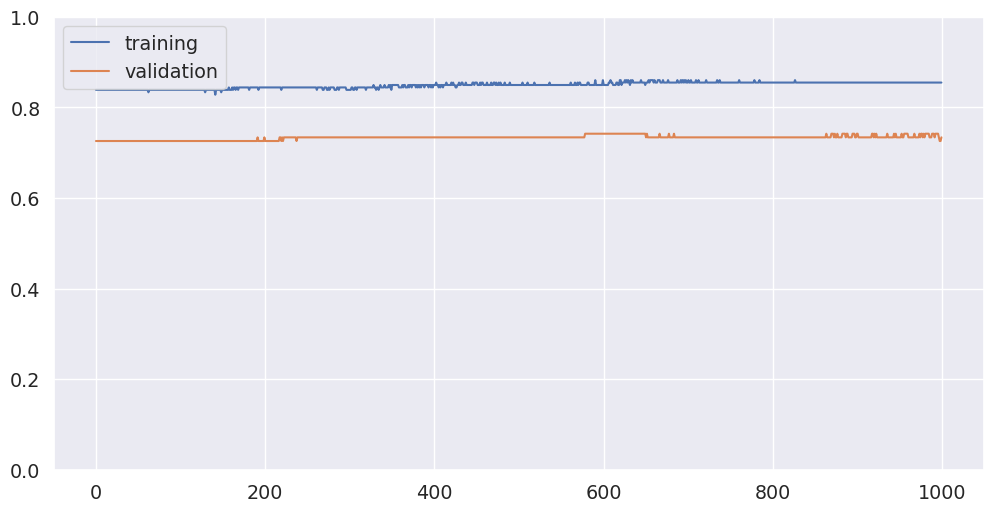

In [114]:
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(train_acc, label="training")
plt.plot(val_acc, label="validation")
plt.ylim(0, 1)
plt.legend()

Puedo ademas guardar el mejor modelo usando ModelCheckpoint

In [115]:
mc = ModelCheckpoint('mejor_modelo.h5', monitor='val_acc', mode='max')

In [116]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(num_classes, activation="softmax"))
opt = keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()
history = model.fit(
    X_train.values,
    y_train,
    epochs=1000,
    validation_data=(X_validation.values, y_test),
    callbacks=[custom_early_stopping, mc],
)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 16)                112       
_________________________________________________________________
dense_49 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_50 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_51 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_________________________________________________________________


Train on 186 samples, validate on 124 samples
Epoch 1/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.0974 - accuracy: 0.2188

186/186 [==============================] - 0s 562us/step - loss: 5.7953 - accuracy: 0.2957 - val_loss: 4.7007 - val_accuracy: 0.3629


Epoch 2/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.9908 - accuracy: 0.3125

186/186 [==============================] - 0s 49us/step - loss: 5.6431 - accuracy: 0.2957 - val_loss: 4.6021 - val_accuracy: 0.3629


Epoch 3/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.4667 - accuracy: 0.3438

186/186 [==============================] - 0s 47us/step - loss: 5.5300 - accuracy: 0.2957 - val_loss: 4.5176 - val_accuracy: 0.3629


Epoch 4/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.2850 - accuracy: 0.2188

186/186 [==============================] - 0s 46us/step - loss: 5.4296 - accuracy: 0.2957 - val_loss: 4.4386 - val_accuracy: 0.3629


Epoch 5/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.5867 - accuracy: 0.3125

186/186 [==============================] - 0s 46us/step - loss: 5.3327 - accuracy: 0.2957 - val_loss: 4.3604 - val_accuracy: 0.3629


Epoch 6/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.3562 - accuracy: 0.3750

186/186 [==============================] - 0s 50us/step - loss: 5.2384 - accuracy: 0.2957 - val_loss: 4.2850 - val_accuracy: 0.3629


Epoch 7/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.6802 - accuracy: 0.3750

186/186 [==============================] - 0s 49us/step - loss: 5.1468 - accuracy: 0.2957 - val_loss: 4.2099 - val_accuracy: 0.3629


Epoch 8/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.8280 - accuracy: 0.3125

186/186 [==============================] - 0s 45us/step - loss: 5.0562 - accuracy: 0.2957 - val_loss: 4.1366 - val_accuracy: 0.3629


Epoch 9/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.7316 - accuracy: 0.4688

186/186 [==============================] - 0s 49us/step - loss: 4.9671 - accuracy: 0.2957 - val_loss: 4.0640 - val_accuracy: 0.3629


Epoch 10/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.4905 - accuracy: 0.3750

186/186 [==============================] - 0s 45us/step - loss: 4.8794 - accuracy: 0.2957 - val_loss: 3.9937 - val_accuracy: 0.3629


Epoch 11/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.0890 - accuracy: 0.2812

/opt/hostedtoolcache/Python/3.7.9/x64/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


186/186 [==============================] - 0s 47us/step - loss: 4.7945 - accuracy: 0.2957 - val_loss: 3.9250 - val_accuracy: 0.3629


Epoch 12/1000


 32/186 [====>.........................] - ETA: 0s - loss: 4.1252 - accuracy: 0.3750

186/186 [==============================] - 0s 48us/step - loss: 4.7084 - accuracy: 0.2957 - val_loss: 3.8542 - val_accuracy: 0.3629


Epoch 13/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.6409 - accuracy: 0.3125



186/186 [==============================] - 0s 48us/step - loss: 4.6219 - accuracy: 0.2957 - val_loss: 3.7852 - val_accuracy: 0.3629


Epoch 14/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.1152 - accuracy: 0.2188

186/186 [==============================] - 0s 48us/step - loss: 4.5370 - accuracy: 0.2957 - val_loss: 3.7165 - val_accuracy: 0.3629


Epoch 15/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.2493 - accuracy: 0.3125

186/186 [==============================] - 0s 46us/step - loss: 4.4521 - accuracy: 0.2957 - val_loss: 3.6485 - val_accuracy: 0.3629


Epoch 16/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.6846 - accuracy: 0.3750



186/186 [==============================] - 0s 46us/step - loss: 4.3684 - accuracy: 0.2957 - val_loss: 3.5815 - val_accuracy: 0.3629


Epoch 17/1000


 32/186 [====>.........................] - ETA: 0s - loss: 4.4984 - accuracy: 0.2500

186/186 [==============================] - 0s 46us/step - loss: 4.2860 - accuracy: 0.2957 - val_loss: 3.5154 - val_accuracy: 0.3629


Epoch 18/1000


 32/186 [====>.........................] - ETA: 0s - loss: 3.7344 - accuracy: 0.3438



186/186 [==============================] - 0s 45us/step - loss: 4.2044 - accuracy: 0.2957 - val_loss: 3.4498 - val_accuracy: 0.3629


Epoch 19/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.8107 - accuracy: 0.1875

186/186 [==============================] - 0s 45us/step - loss: 4.1239 - accuracy: 0.2957 - val_loss: 3.3854 - val_accuracy: 0.3629


Epoch 20/1000


 32/186 [====>.........................] - ETA: 0s - loss: 4.2905 - accuracy: 0.2812

186/186 [==============================] - 0s 50us/step - loss: 4.0435 - accuracy: 0.2957 - val_loss: 3.3208 - val_accuracy: 0.3629


Epoch 21/1000


 32/186 [====>.........................] - ETA: 0s - loss: 3.0983 - accuracy: 0.4688

186/186 [==============================] - 0s 48us/step - loss: 3.9636 - accuracy: 0.2957 - val_loss: 3.2570 - val_accuracy: 0.3629


Epoch 22/1000


 32/186 [====>.........................] - ETA: 0s - loss: 3.8591 - accuracy: 0.2812

186/186 [==============================] - 0s 47us/step - loss: 3.8852 - accuracy: 0.2957 - val_loss: 3.1938 - val_accuracy: 0.3629


Epoch 23/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.4228 - accuracy: 0.3125

186/186 [==============================] - 0s 46us/step - loss: 3.8072 - accuracy: 0.2957 - val_loss: 3.1311 - val_accuracy: 0.3629


Epoch 24/1000


 32/186 [====>.........................] - ETA: 0s - loss: 3.5173 - accuracy: 0.3438



186/186 [==============================] - 0s 46us/step - loss: 3.7294 - accuracy: 0.2957 - val_loss: 3.0695 - val_accuracy: 0.3629


Epoch 25/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.1086 - accuracy: 0.3750

186/186 [==============================] - 0s 45us/step - loss: 3.6520 - accuracy: 0.2957 - val_loss: 3.0073 - val_accuracy: 0.3629


Epoch 26/1000


 32/186 [====>.........................] - ETA: 0s - loss: 3.3101 - accuracy: 0.3438

186/186 [==============================] - 0s 51us/step - loss: 3.5747 - accuracy: 0.2957 - val_loss: 2.9463 - val_accuracy: 0.3629


Epoch 27/1000


 32/186 [====>.........................] - ETA: 0s - loss: 3.4301 - accuracy: 0.3125

186/186 [==============================] - 0s 49us/step - loss: 3.4984 - accuracy: 0.2957 - val_loss: 2.8857 - val_accuracy: 0.3629


Epoch 28/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.5268 - accuracy: 0.2812

186/186 [==============================] - 0s 46us/step - loss: 3.4220 - accuracy: 0.2957 - val_loss: 2.8259 - val_accuracy: 0.3629


Epoch 29/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.8817 - accuracy: 0.4062

186/186 [==============================] - 0s 46us/step - loss: 3.3467 - accuracy: 0.2957 - val_loss: 2.7656 - val_accuracy: 0.3629


Epoch 30/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.6708 - accuracy: 0.4375

186/186 [==============================] - 0s 46us/step - loss: 3.2704 - accuracy: 0.2957 - val_loss: 2.7053 - val_accuracy: 0.3629


Epoch 31/1000


 32/186 [====>.........................] - ETA: 0s - loss: 2.3518 - accuracy: 0.4688

186/186 [==============================] - 0s 48us/step - loss: 3.1942 - accuracy: 0.2957 - val_loss: 2.6455 - val_accuracy: 0.3629


Epoch 32/1000


 32/186 [====>.........................] - ETA: 0s - loss: 3.3510 - accuracy: 0.2500



186/186 [==============================] - 0s 50us/step - loss: 3.1197 - accuracy: 0.2957 - val_loss: 2.5875 - val_accuracy: 0.3629


Epoch 33/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.9214 - accuracy: 0.2812

186/186 [==============================] - 0s 46us/step - loss: 3.0458 - accuracy: 0.2957 - val_loss: 2.5283 - val_accuracy: 0.3629


Epoch 34/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.1449 - accuracy: 0.2500

186/186 [==============================] - 0s 44us/step - loss: 2.9719 - accuracy: 0.2957 - val_loss: 2.4685 - val_accuracy: 0.3629


Epoch 35/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.9121 - accuracy: 0.3438

186/186 [==============================] - 0s 46us/step - loss: 2.8978 - accuracy: 0.2957 - val_loss: 2.4098 - val_accuracy: 0.3629


Epoch 36/1000


 32/186 [====>.........................] - ETA: 0s - loss: 3.2749 - accuracy: 0.1875

186/186 [==============================] - 0s 49us/step - loss: 2.8238 - accuracy: 0.2957 - val_loss: 2.3509 - val_accuracy: 0.3629


Epoch 37/1000


 32/186 [====>.........................] - ETA: 0s - loss: 2.1846 - accuracy: 0.4375



186/186 [==============================] - 0s 51us/step - loss: 2.7489 - accuracy: 0.2957 - val_loss: 2.2926 - val_accuracy: 0.3629


Epoch 38/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.7924 - accuracy: 0.2500



186/186 [==============================] - 0s 45us/step - loss: 2.6763 - accuracy: 0.2957 - val_loss: 2.2356 - val_accuracy: 0.3629


Epoch 39/1000


 32/186 [====>.........................] - ETA: 0s - loss: 2.8508 - accuracy: 0.2500

186/186 [==============================] - 0s 48us/step - loss: 2.6039 - accuracy: 0.2957 - val_loss: 2.1771 - val_accuracy: 0.3629


Epoch 40/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.1555 - accuracy: 0.4062

186/186 [==============================] - 0s 43us/step - loss: 2.5304 - accuracy: 0.2957 - val_loss: 2.1200 - val_accuracy: 0.3629


Epoch 41/1000


 32/186 [====>.........................] - ETA: 0s - loss: 2.6678 - accuracy: 0.2812



186/186 [==============================] - 0s 49us/step - loss: 2.4582 - accuracy: 0.2957 - val_loss: 2.0631 - val_accuracy: 0.3629


Epoch 42/1000


 32/186 [====>.........................] - ETA: 0s - loss: 2.6068 - accuracy: 0.2500

186/186 [==============================] - 0s 45us/step - loss: 2.3848 - accuracy: 0.2957 - val_loss: 2.0064 - val_accuracy: 0.3629


Epoch 43/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.1101 - accuracy: 0.3750

186/186 [==============================] - 0s 45us/step - loss: 2.3113 - accuracy: 0.2957 - val_loss: 1.9502 - val_accuracy: 0.3629


Epoch 44/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.4016 - accuracy: 0.2812

186/186 [==============================] - 0s 44us/step - loss: 2.2395 - accuracy: 0.2957 - val_loss: 1.8953 - val_accuracy: 0.3629


Epoch 45/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.5701 - accuracy: 0.1875

186/186 [==============================] - 0s 44us/step - loss: 2.1698 - accuracy: 0.2957 - val_loss: 1.8423 - val_accuracy: 0.3629


Epoch 46/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.2811 - accuracy: 0.2812

186/186 [==============================] - 0s 44us/step - loss: 2.1015 - accuracy: 0.2957 - val_loss: 1.7888 - val_accuracy: 0.3629


Epoch 47/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.1714 - accuracy: 0.2812

186/186 [==============================] - 0s 49us/step - loss: 2.0333 - accuracy: 0.3011 - val_loss: 1.7369 - val_accuracy: 0.3710


Epoch 48/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.9422 - accuracy: 0.3125

186/186 [==============================] - 0s 46us/step - loss: 1.9671 - accuracy: 0.3011 - val_loss: 1.6843 - val_accuracy: 0.3710


Epoch 49/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.0266 - accuracy: 0.3125

186/186 [==============================] - 0s 44us/step - loss: 1.9014 - accuracy: 0.3172 - val_loss: 1.6331 - val_accuracy: 0.3710


Epoch 50/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.6237 - accuracy: 0.4062

186/186 [==============================] - 0s 46us/step - loss: 1.8385 - accuracy: 0.3172 - val_loss: 1.5836 - val_accuracy: 0.3710


Epoch 51/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.8967 - accuracy: 0.3125

186/186 [==============================] - 0s 49us/step - loss: 1.7764 - accuracy: 0.3226 - val_loss: 1.5346 - val_accuracy: 0.3710


Epoch 52/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.6141 - accuracy: 0.3438

186/186 [==============================] - 0s 47us/step - loss: 1.7142 - accuracy: 0.3226 - val_loss: 1.4862 - val_accuracy: 0.3790


Epoch 53/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.5018 - accuracy: 0.3750

186/186 [==============================] - 0s 45us/step - loss: 1.6541 - accuracy: 0.3280 - val_loss: 1.4392 - val_accuracy: 0.3790


Epoch 54/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.7728 - accuracy: 0.3125

186/186 [==============================] - 0s 46us/step - loss: 1.5936 - accuracy: 0.3280 - val_loss: 1.3925 - val_accuracy: 0.3790


Epoch 55/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.5543 - accuracy: 0.2812

186/186 [==============================] - 0s 46us/step - loss: 1.5337 - accuracy: 0.3333 - val_loss: 1.3462 - val_accuracy: 0.3871


Epoch 56/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.5580 - accuracy: 0.2812

186/186 [==============================] - 0s 47us/step - loss: 1.4759 - accuracy: 0.3333 - val_loss: 1.3006 - val_accuracy: 0.3871


Epoch 57/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.5233 - accuracy: 0.2812

186/186 [==============================] - 0s 47us/step - loss: 1.4197 - accuracy: 0.3387 - val_loss: 1.2561 - val_accuracy: 0.3871


Epoch 58/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1903 - accuracy: 0.4062

186/186 [==============================] - 0s 47us/step - loss: 1.3655 - accuracy: 0.3387 - val_loss: 1.2132 - val_accuracy: 0.3952


Epoch 59/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1898 - accuracy: 0.4375

186/186 [==============================] - 0s 48us/step - loss: 1.3120 - accuracy: 0.3441 - val_loss: 1.1718 - val_accuracy: 0.3952


Epoch 60/1000


 32/186 [====>.........................] - ETA: 0s - loss: 1.2794 - accuracy: 0.3438

186/186 [==============================] - 0s 49us/step - loss: 1.2613 - accuracy: 0.3656 - val_loss: 1.1329 - val_accuracy: 0.3952


Epoch 61/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.2117 - accuracy: 0.4062

186/186 [==============================] - 0s 49us/step - loss: 1.2136 - accuracy: 0.3656 - val_loss: 1.0949 - val_accuracy: 0.4032


Epoch 62/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1107 - accuracy: 0.4062

186/186 [==============================] - 0s 49us/step - loss: 1.1680 - accuracy: 0.3817 - val_loss: 1.0592 - val_accuracy: 0.4113


Epoch 63/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0997 - accuracy: 0.4062

186/186 [==============================] - 0s 45us/step - loss: 1.1244 - accuracy: 0.3817 - val_loss: 1.0253 - val_accuracy: 0.4274


Epoch 64/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9445 - accuracy: 0.4688

186/186 [==============================] - 0s 45us/step - loss: 1.0831 - accuracy: 0.3871 - val_loss: 0.9937 - val_accuracy: 0.4435


Epoch 65/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1281 - accuracy: 0.3750

186/186 [==============================] - 0s 49us/step - loss: 1.0437 - accuracy: 0.4032 - val_loss: 0.9639 - val_accuracy: 0.4516


Epoch 66/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8328 - accuracy: 0.5625

186/186 [==============================] - 0s 45us/step - loss: 1.0060 - accuracy: 0.4247 - val_loss: 0.9360 - val_accuracy: 0.4597


Epoch 67/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1317 - accuracy: 0.3750

186/186 [==============================] - 0s 47us/step - loss: 0.9711 - accuracy: 0.4462 - val_loss: 0.9109 - val_accuracy: 0.4758


Epoch 68/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7863 - accuracy: 0.5938

186/186 [==============================] - 0s 46us/step - loss: 0.9402 - accuracy: 0.4677 - val_loss: 0.8876 - val_accuracy: 0.4919


Epoch 69/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6370 - accuracy: 0.6250

186/186 [==============================] - 0s 45us/step - loss: 0.9117 - accuracy: 0.4839 - val_loss: 0.8653 - val_accuracy: 0.4919


Epoch 70/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.8795 - accuracy: 0.5312

186/186 [==============================] - 0s 51us/step - loss: 0.8857 - accuracy: 0.5108 - val_loss: 0.8446 - val_accuracy: 0.5081


Epoch 71/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.8250 - accuracy: 0.5312

186/186 [==============================] - 0s 53us/step - loss: 0.8613 - accuracy: 0.5161 - val_loss: 0.8251 - val_accuracy: 0.5242


Epoch 72/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0124 - accuracy: 0.4062

186/186 [==============================] - 0s 45us/step - loss: 0.8385 - accuracy: 0.5430 - val_loss: 0.8090 - val_accuracy: 0.5403


Epoch 73/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8263 - accuracy: 0.5938

186/186 [==============================] - 0s 47us/step - loss: 0.8182 - accuracy: 0.5753 - val_loss: 0.7937 - val_accuracy: 0.5403


Epoch 74/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.8147 - accuracy: 0.5312

186/186 [==============================] - 0s 50us/step - loss: 0.7991 - accuracy: 0.5914 - val_loss: 0.7806 - val_accuracy: 0.5968


Epoch 75/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7262 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 0.7824 - accuracy: 0.6075 - val_loss: 0.7687 - val_accuracy: 0.6210


Epoch 76/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8080 - accuracy: 0.6250

186/186 [==============================] - 0s 46us/step - loss: 0.7678 - accuracy: 0.6237 - val_loss: 0.7599 - val_accuracy: 0.6290


Epoch 77/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6204 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.7558 - accuracy: 0.6452 - val_loss: 0.7527 - val_accuracy: 0.6452


Epoch 78/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7521 - accuracy: 0.6875

186/186 [==============================] - 0s 48us/step - loss: 0.7452 - accuracy: 0.6613 - val_loss: 0.7470 - val_accuracy: 0.6532


Epoch 79/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6699 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.7359 - accuracy: 0.6667 - val_loss: 0.7418 - val_accuracy: 0.6532


Epoch 80/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7243 - accuracy: 0.6875

186/186 [==============================] - 0s 46us/step - loss: 0.7274 - accuracy: 0.6720 - val_loss: 0.7370 - val_accuracy: 0.6532


Epoch 81/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7576 - accuracy: 0.6250

186/186 [==============================] - 0s 46us/step - loss: 0.7194 - accuracy: 0.7043 - val_loss: 0.7327 - val_accuracy: 0.6694


Epoch 82/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7349 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.7122 - accuracy: 0.7366 - val_loss: 0.7290 - val_accuracy: 0.6694


Epoch 83/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7177 - accuracy: 0.6562

186/186 [==============================] - 0s 44us/step - loss: 0.7059 - accuracy: 0.7473 - val_loss: 0.7258 - val_accuracy: 0.6774


Epoch 84/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6568 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.7010 - accuracy: 0.7527 - val_loss: 0.7234 - val_accuracy: 0.6855


Epoch 85/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6794 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.6970 - accuracy: 0.7634 - val_loss: 0.7208 - val_accuracy: 0.7016


Epoch 86/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7173 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.6928 - accuracy: 0.7742 - val_loss: 0.7186 - val_accuracy: 0.7016


Epoch 87/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6505 - accuracy: 0.7500

186/186 [==============================] - 0s 43us/step - loss: 0.6888 - accuracy: 0.7688 - val_loss: 0.7149 - val_accuracy: 0.6855


Epoch 88/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6199 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.6842 - accuracy: 0.7581 - val_loss: 0.7110 - val_accuracy: 0.6855


Epoch 89/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6506 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.6801 - accuracy: 0.7634 - val_loss: 0.7059 - val_accuracy: 0.7097


Epoch 90/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6988 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.6745 - accuracy: 0.7634 - val_loss: 0.7002 - val_accuracy: 0.7177


Epoch 91/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7014 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.6675 - accuracy: 0.7634 - val_loss: 0.6939 - val_accuracy: 0.7258


Epoch 92/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6348 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.6589 - accuracy: 0.7634 - val_loss: 0.6877 - val_accuracy: 0.7177


Epoch 93/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6615 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.6474 - accuracy: 0.7688 - val_loss: 0.6806 - val_accuracy: 0.7258


Epoch 94/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6488 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.6328 - accuracy: 0.7688 - val_loss: 0.6724 - val_accuracy: 0.7258


Epoch 95/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6415 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.6185 - accuracy: 0.7688 - val_loss: 0.6644 - val_accuracy: 0.7339


Epoch 96/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6450 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.6045 - accuracy: 0.7742 - val_loss: 0.6542 - val_accuracy: 0.7339


Epoch 97/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5738 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.5895 - accuracy: 0.7796 - val_loss: 0.6454 - val_accuracy: 0.7419


Epoch 98/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5844 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.5766 - accuracy: 0.7796 - val_loss: 0.6374 - val_accuracy: 0.7419


Epoch 99/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5868 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.5649 - accuracy: 0.7688 - val_loss: 0.6287 - val_accuracy: 0.7419


Epoch 100/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6090 - accuracy: 0.7500

186/186 [==============================] - 0s 43us/step - loss: 0.5516 - accuracy: 0.7688 - val_loss: 0.6168 - val_accuracy: 0.7016


Epoch 101/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5574 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.5374 - accuracy: 0.7742 - val_loss: 0.6057 - val_accuracy: 0.7097


Epoch 102/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4049 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.5245 - accuracy: 0.7688 - val_loss: 0.5955 - val_accuracy: 0.7177


Epoch 103/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4431 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.5114 - accuracy: 0.7688 - val_loss: 0.5863 - val_accuracy: 0.7177


Epoch 104/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4675 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.4991 - accuracy: 0.7688 - val_loss: 0.5780 - val_accuracy: 0.7177


Epoch 105/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4749 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.4881 - accuracy: 0.7688 - val_loss: 0.5706 - val_accuracy: 0.7177


Epoch 106/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4803 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.4785 - accuracy: 0.7742 - val_loss: 0.5641 - val_accuracy: 0.7016


Epoch 107/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4555 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.4704 - accuracy: 0.7796 - val_loss: 0.5590 - val_accuracy: 0.7016


Epoch 108/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4265 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.4636 - accuracy: 0.7796 - val_loss: 0.5545 - val_accuracy: 0.6935


Epoch 109/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4557 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.4570 - accuracy: 0.7796 - val_loss: 0.5508 - val_accuracy: 0.6855


Epoch 110/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4463 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4509 - accuracy: 0.7796 - val_loss: 0.5476 - val_accuracy: 0.6774


Epoch 111/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4082 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.4457 - accuracy: 0.7796 - val_loss: 0.5447 - val_accuracy: 0.6774


Epoch 112/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3832 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.4412 - accuracy: 0.7796 - val_loss: 0.5426 - val_accuracy: 0.6774


Epoch 113/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4440 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.4374 - accuracy: 0.7849 - val_loss: 0.5411 - val_accuracy: 0.6855


Epoch 114/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4311 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.4344 - accuracy: 0.7796 - val_loss: 0.5398 - val_accuracy: 0.6855


Epoch 115/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4207 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.4321 - accuracy: 0.7796 - val_loss: 0.5385 - val_accuracy: 0.6855


Epoch 116/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4183 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.4301 - accuracy: 0.7796 - val_loss: 0.5373 - val_accuracy: 0.6855


Epoch 117/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4211 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.4289 - accuracy: 0.7688 - val_loss: 0.5361 - val_accuracy: 0.6855


Epoch 118/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4640 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.4279 - accuracy: 0.7688 - val_loss: 0.5349 - val_accuracy: 0.6855


Epoch 119/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3558 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.4269 - accuracy: 0.7688 - val_loss: 0.5336 - val_accuracy: 0.6935


Epoch 120/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5445 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.4260 - accuracy: 0.7742 - val_loss: 0.5327 - val_accuracy: 0.7016


Epoch 121/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4025 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.4246 - accuracy: 0.7742 - val_loss: 0.5320 - val_accuracy: 0.7097


Epoch 122/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4434 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.4236 - accuracy: 0.7742 - val_loss: 0.5311 - val_accuracy: 0.7097


Epoch 123/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4149 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.4226 - accuracy: 0.7742 - val_loss: 0.5303 - val_accuracy: 0.7097


Epoch 124/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3275 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.4215 - accuracy: 0.7742 - val_loss: 0.5289 - val_accuracy: 0.7016


Epoch 125/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4511 - accuracy: 0.7500

186/186 [==============================] - 0s 43us/step - loss: 0.4207 - accuracy: 0.7742 - val_loss: 0.5276 - val_accuracy: 0.7016


Epoch 126/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5072 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.4197 - accuracy: 0.7742 - val_loss: 0.5268 - val_accuracy: 0.7016


Epoch 127/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3941 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.4186 - accuracy: 0.7742 - val_loss: 0.5259 - val_accuracy: 0.7016


Epoch 128/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4734 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.4185 - accuracy: 0.7742 - val_loss: 0.5248 - val_accuracy: 0.6935


Epoch 129/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3561 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.4173 - accuracy: 0.7742 - val_loss: 0.5237 - val_accuracy: 0.7016


Epoch 130/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3987 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.4173 - accuracy: 0.7849 - val_loss: 0.5226 - val_accuracy: 0.7016


Epoch 131/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4909 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 0.4161 - accuracy: 0.7849 - val_loss: 0.5215 - val_accuracy: 0.7016


Epoch 132/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4066 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.4151 - accuracy: 0.7849 - val_loss: 0.5203 - val_accuracy: 0.7016


Epoch 133/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4887 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.4142 - accuracy: 0.7849 - val_loss: 0.5192 - val_accuracy: 0.7097


Epoch 134/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4922 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.4137 - accuracy: 0.7849 - val_loss: 0.5182 - val_accuracy: 0.7097


Epoch 135/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4628 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.4133 - accuracy: 0.7796 - val_loss: 0.5172 - val_accuracy: 0.7097


Epoch 136/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4710 - accuracy: 0.7500

186/186 [==============================] - 0s 43us/step - loss: 0.4124 - accuracy: 0.7849 - val_loss: 0.5164 - val_accuracy: 0.7097


Epoch 137/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2782 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.4117 - accuracy: 0.7796 - val_loss: 0.5154 - val_accuracy: 0.7097


Epoch 138/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3840 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4114 - accuracy: 0.7849 - val_loss: 0.5145 - val_accuracy: 0.7016


Epoch 139/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4147 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.4107 - accuracy: 0.7903 - val_loss: 0.5137 - val_accuracy: 0.7016


Epoch 140/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4746 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.4101 - accuracy: 0.7849 - val_loss: 0.5127 - val_accuracy: 0.7016


Epoch 141/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3216 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.4101 - accuracy: 0.7957 - val_loss: 0.5119 - val_accuracy: 0.7016


Epoch 142/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4651 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.4086 - accuracy: 0.8011 - val_loss: 0.5110 - val_accuracy: 0.7016


Epoch 143/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5942 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.4088 - accuracy: 0.8011 - val_loss: 0.5103 - val_accuracy: 0.7016


Epoch 144/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3712 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.4078 - accuracy: 0.8011 - val_loss: 0.5093 - val_accuracy: 0.7016


Epoch 145/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4669 - accuracy: 0.6562

186/186 [==============================] - 0s 48us/step - loss: 0.4072 - accuracy: 0.8011 - val_loss: 0.5084 - val_accuracy: 0.7016


Epoch 146/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3305 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.4074 - accuracy: 0.8065 - val_loss: 0.5076 - val_accuracy: 0.7016


Epoch 147/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3302 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.4072 - accuracy: 0.8065 - val_loss: 0.5070 - val_accuracy: 0.7016


Epoch 148/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3882 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.4061 - accuracy: 0.8011 - val_loss: 0.5065 - val_accuracy: 0.7016


Epoch 149/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2385 - accuracy: 0.9688

186/186 [==============================] - 0s 43us/step - loss: 0.4055 - accuracy: 0.8011 - val_loss: 0.5059 - val_accuracy: 0.7016


Epoch 150/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2960 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4051 - accuracy: 0.8011 - val_loss: 0.5051 - val_accuracy: 0.7016


Epoch 151/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3810 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.4050 - accuracy: 0.8011 - val_loss: 0.5044 - val_accuracy: 0.7016


Epoch 152/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4829 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.4043 - accuracy: 0.8011 - val_loss: 0.5039 - val_accuracy: 0.7016


Epoch 153/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3587 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.4040 - accuracy: 0.8011 - val_loss: 0.5031 - val_accuracy: 0.7016


Epoch 154/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4414 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.4036 - accuracy: 0.8011 - val_loss: 0.5026 - val_accuracy: 0.7016


Epoch 155/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3084 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.4031 - accuracy: 0.8065 - val_loss: 0.5020 - val_accuracy: 0.7016


Epoch 156/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4868 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.4028 - accuracy: 0.8065 - val_loss: 0.5015 - val_accuracy: 0.7097


Epoch 157/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3367 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.4022 - accuracy: 0.8118 - val_loss: 0.5009 - val_accuracy: 0.7097


Epoch 158/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5087 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.4018 - accuracy: 0.8065 - val_loss: 0.5004 - val_accuracy: 0.7097


Epoch 159/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4714 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.4011 - accuracy: 0.8065 - val_loss: 0.4997 - val_accuracy: 0.7097


Epoch 160/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3973 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.4009 - accuracy: 0.8118 - val_loss: 0.4992 - val_accuracy: 0.7097


Epoch 161/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4047 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.4003 - accuracy: 0.8065 - val_loss: 0.4983 - val_accuracy: 0.7016


Epoch 162/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2780 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3999 - accuracy: 0.8172 - val_loss: 0.4978 - val_accuracy: 0.7016


Epoch 163/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4287 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.4001 - accuracy: 0.8118 - val_loss: 0.4972 - val_accuracy: 0.7016


Epoch 164/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4151 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3990 - accuracy: 0.8172 - val_loss: 0.4967 - val_accuracy: 0.7016


Epoch 165/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4192 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3985 - accuracy: 0.8118 - val_loss: 0.4959 - val_accuracy: 0.7016


Epoch 166/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5258 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3989 - accuracy: 0.8172 - val_loss: 0.4956 - val_accuracy: 0.6935


Epoch 167/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4243 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3981 - accuracy: 0.8118 - val_loss: 0.4952 - val_accuracy: 0.6935


Epoch 168/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4925 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.3973 - accuracy: 0.8172 - val_loss: 0.4947 - val_accuracy: 0.6935


Epoch 169/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3999 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3972 - accuracy: 0.8172 - val_loss: 0.4941 - val_accuracy: 0.6935


Epoch 170/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3567 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3969 - accuracy: 0.8172 - val_loss: 0.4936 - val_accuracy: 0.6935


Epoch 171/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3560 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3963 - accuracy: 0.8172 - val_loss: 0.4931 - val_accuracy: 0.6935


Epoch 172/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4221 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3961 - accuracy: 0.8172 - val_loss: 0.4925 - val_accuracy: 0.7016


Epoch 173/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3723 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3957 - accuracy: 0.8172 - val_loss: 0.4920 - val_accuracy: 0.7016


Epoch 174/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3914 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3954 - accuracy: 0.8172 - val_loss: 0.4915 - val_accuracy: 0.7016


Epoch 175/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3656 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3949 - accuracy: 0.8172 - val_loss: 0.4909 - val_accuracy: 0.7097


Epoch 176/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2975 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3949 - accuracy: 0.8172 - val_loss: 0.4904 - val_accuracy: 0.7097


Epoch 177/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3830 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3942 - accuracy: 0.8172 - val_loss: 0.4900 - val_accuracy: 0.7097


Epoch 178/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4981 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3938 - accuracy: 0.8172 - val_loss: 0.4895 - val_accuracy: 0.7097


Epoch 179/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4511 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3938 - accuracy: 0.8172 - val_loss: 0.4890 - val_accuracy: 0.7097


Epoch 180/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3625 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3934 - accuracy: 0.8172 - val_loss: 0.4886 - val_accuracy: 0.7097


Epoch 181/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4332 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3925 - accuracy: 0.8172 - val_loss: 0.4880 - val_accuracy: 0.7097


Epoch 182/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4705 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.3925 - accuracy: 0.8172 - val_loss: 0.4874 - val_accuracy: 0.7097


Epoch 183/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3791 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3920 - accuracy: 0.8172 - val_loss: 0.4869 - val_accuracy: 0.7097


Epoch 184/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5788 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.3918 - accuracy: 0.8172 - val_loss: 0.4865 - val_accuracy: 0.7097


Epoch 185/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4228 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3915 - accuracy: 0.8172 - val_loss: 0.4860 - val_accuracy: 0.7097


Epoch 186/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2659 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3913 - accuracy: 0.8172 - val_loss: 0.4856 - val_accuracy: 0.7097


Epoch 187/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4922 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3908 - accuracy: 0.8172 - val_loss: 0.4851 - val_accuracy: 0.7097


Epoch 188/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4243 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3904 - accuracy: 0.8172 - val_loss: 0.4848 - val_accuracy: 0.7097


Epoch 189/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3154 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3901 - accuracy: 0.8172 - val_loss: 0.4844 - val_accuracy: 0.7097


Epoch 190/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3883 - accuracy: 0.7500



186/186 [==============================] - 0s 46us/step - loss: 0.3900 - accuracy: 0.8172 - val_loss: 0.4840 - val_accuracy: 0.7097


Epoch 191/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2991 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3893 - accuracy: 0.8172 - val_loss: 0.4836 - val_accuracy: 0.7097


Epoch 192/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3046 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3891 - accuracy: 0.8172 - val_loss: 0.4832 - val_accuracy: 0.7097


Epoch 193/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5275 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.3887 - accuracy: 0.8172 - val_loss: 0.4828 - val_accuracy: 0.7097


Epoch 194/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3365 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3885 - accuracy: 0.8172 - val_loss: 0.4823 - val_accuracy: 0.7097


Epoch 195/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3629 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3887 - accuracy: 0.8172 - val_loss: 0.4820 - val_accuracy: 0.7097


Epoch 196/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3574 - accuracy: 0.8125



186/186 [==============================] - 0s 50us/step - loss: 0.3878 - accuracy: 0.8172 - val_loss: 0.4816 - val_accuracy: 0.7097


Epoch 197/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2735 - accuracy: 0.9375



186/186 [==============================] - 0s 46us/step - loss: 0.3882 - accuracy: 0.8172 - val_loss: 0.4812 - val_accuracy: 0.7097


Epoch 198/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3676 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3878 - accuracy: 0.8172 - val_loss: 0.4810 - val_accuracy: 0.7097


Epoch 199/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5710 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.3869 - accuracy: 0.8172 - val_loss: 0.4806 - val_accuracy: 0.7097


Epoch 200/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4941 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.3868 - accuracy: 0.8172 - val_loss: 0.4802 - val_accuracy: 0.7097


Epoch 201/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2921 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3865 - accuracy: 0.8172 - val_loss: 0.4798 - val_accuracy: 0.7177


Epoch 202/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4335 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3864 - accuracy: 0.8172 - val_loss: 0.4795 - val_accuracy: 0.7177


Epoch 203/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3472 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3859 - accuracy: 0.8172 - val_loss: 0.4791 - val_accuracy: 0.7177


Epoch 204/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2721 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3860 - accuracy: 0.8172 - val_loss: 0.4786 - val_accuracy: 0.7177


Epoch 205/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3829 - accuracy: 0.7500



186/186 [==============================] - 0s 46us/step - loss: 0.3854 - accuracy: 0.8172 - val_loss: 0.4783 - val_accuracy: 0.7177


Epoch 206/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4188 - accuracy: 0.7812



186/186 [==============================] - 0s 46us/step - loss: 0.3852 - accuracy: 0.8172 - val_loss: 0.4780 - val_accuracy: 0.7177


Epoch 207/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4699 - accuracy: 0.6875



186/186 [==============================] - 0s 45us/step - loss: 0.3853 - accuracy: 0.8172 - val_loss: 0.4777 - val_accuracy: 0.7177


Epoch 208/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4643 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3848 - accuracy: 0.8172 - val_loss: 0.4774 - val_accuracy: 0.7177


Epoch 209/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4278 - accuracy: 0.7812



186/186 [==============================] - 0s 47us/step - loss: 0.3845 - accuracy: 0.8172 - val_loss: 0.4770 - val_accuracy: 0.7177


Epoch 210/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4751 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.3844 - accuracy: 0.8172 - val_loss: 0.4767 - val_accuracy: 0.7177


Epoch 211/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3713 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3840 - accuracy: 0.8172 - val_loss: 0.4763 - val_accuracy: 0.7177


Epoch 212/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4426 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3839 - accuracy: 0.8172 - val_loss: 0.4759 - val_accuracy: 0.7177


Epoch 213/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3543 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3837 - accuracy: 0.8172 - val_loss: 0.4756 - val_accuracy: 0.7177


Epoch 214/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5751 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.3832 - accuracy: 0.8172 - val_loss: 0.4753 - val_accuracy: 0.7177


Epoch 215/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4155 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3834 - accuracy: 0.8172 - val_loss: 0.4749 - val_accuracy: 0.7177


Epoch 216/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3503 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3830 - accuracy: 0.8172 - val_loss: 0.4745 - val_accuracy: 0.7177


Epoch 217/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3014 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3828 - accuracy: 0.8172 - val_loss: 0.4742 - val_accuracy: 0.7177


Epoch 218/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4185 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3823 - accuracy: 0.8172 - val_loss: 0.4739 - val_accuracy: 0.7177


Epoch 219/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3459 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3822 - accuracy: 0.8172 - val_loss: 0.4734 - val_accuracy: 0.7177


Epoch 220/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3827 - accuracy: 0.8125



186/186 [==============================] - 0s 48us/step - loss: 0.3823 - accuracy: 0.8172 - val_loss: 0.4731 - val_accuracy: 0.7177


Epoch 221/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3731 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3819 - accuracy: 0.8172 - val_loss: 0.4728 - val_accuracy: 0.7177


Epoch 222/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4290 - accuracy: 0.8125



186/186 [==============================] - 0s 47us/step - loss: 0.3818 - accuracy: 0.8172 - val_loss: 0.4724 - val_accuracy: 0.7177


Epoch 223/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3148 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3811 - accuracy: 0.8172 - val_loss: 0.4720 - val_accuracy: 0.7177


Epoch 224/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3593 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3812 - accuracy: 0.8172 - val_loss: 0.4717 - val_accuracy: 0.7177


Epoch 225/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3759 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3810 - accuracy: 0.8172 - val_loss: 0.4714 - val_accuracy: 0.7177


Epoch 226/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4057 - accuracy: 0.8438



186/186 [==============================] - 0s 44us/step - loss: 0.3810 - accuracy: 0.8172 - val_loss: 0.4710 - val_accuracy: 0.7177


Epoch 227/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4912 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3802 - accuracy: 0.8172 - val_loss: 0.4707 - val_accuracy: 0.7177


Epoch 228/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3625 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3805 - accuracy: 0.8172 - val_loss: 0.4705 - val_accuracy: 0.7177


Epoch 229/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3269 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3800 - accuracy: 0.8172 - val_loss: 0.4702 - val_accuracy: 0.7177


Epoch 230/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4110 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3798 - accuracy: 0.8172 - val_loss: 0.4698 - val_accuracy: 0.7177


Epoch 231/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3450 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3795 - accuracy: 0.8172 - val_loss: 0.4696 - val_accuracy: 0.7177


Epoch 232/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5327 - accuracy: 0.7188



186/186 [==============================] - 0s 47us/step - loss: 0.3796 - accuracy: 0.8172 - val_loss: 0.4693 - val_accuracy: 0.7177


Epoch 233/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4404 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3795 - accuracy: 0.8172 - val_loss: 0.4691 - val_accuracy: 0.7177


Epoch 234/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3483 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3792 - accuracy: 0.8172 - val_loss: 0.4688 - val_accuracy: 0.7177


Epoch 235/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3377 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3785 - accuracy: 0.8172 - val_loss: 0.4684 - val_accuracy: 0.7177


Epoch 236/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2927 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3785 - accuracy: 0.8172 - val_loss: 0.4682 - val_accuracy: 0.7177


Epoch 237/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3636 - accuracy: 0.8750



186/186 [==============================] - 0s 44us/step - loss: 0.3782 - accuracy: 0.8172 - val_loss: 0.4676 - val_accuracy: 0.7177


Epoch 238/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3973 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.3783 - accuracy: 0.8172 - val_loss: 0.4673 - val_accuracy: 0.7177


Epoch 239/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5254 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3784 - accuracy: 0.8172 - val_loss: 0.4670 - val_accuracy: 0.7177


Epoch 240/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2640 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3777 - accuracy: 0.8172 - val_loss: 0.4667 - val_accuracy: 0.7177


Epoch 241/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3598 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3776 - accuracy: 0.8172 - val_loss: 0.4663 - val_accuracy: 0.7177


Epoch 242/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4645 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.3774 - accuracy: 0.8172 - val_loss: 0.4661 - val_accuracy: 0.7177


Epoch 243/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3811 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3776 - accuracy: 0.8172 - val_loss: 0.4657 - val_accuracy: 0.7177


Epoch 244/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3282 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3770 - accuracy: 0.8172 - val_loss: 0.4655 - val_accuracy: 0.7177


Epoch 245/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3521 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3772 - accuracy: 0.8172 - val_loss: 0.4652 - val_accuracy: 0.7177


Epoch 246/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3545 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3768 - accuracy: 0.8172 - val_loss: 0.4649 - val_accuracy: 0.7177


Epoch 247/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3107 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3771 - accuracy: 0.8172 - val_loss: 0.4646 - val_accuracy: 0.7177


Epoch 248/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4496 - accuracy: 0.7500



186/186 [==============================] - 0s 47us/step - loss: 0.3763 - accuracy: 0.8172 - val_loss: 0.4644 - val_accuracy: 0.7177


Epoch 249/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4423 - accuracy: 0.8438



186/186 [==============================] - 0s 46us/step - loss: 0.3765 - accuracy: 0.8172 - val_loss: 0.4642 - val_accuracy: 0.7177


Epoch 250/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4365 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3765 - accuracy: 0.8172 - val_loss: 0.4640 - val_accuracy: 0.7177


Epoch 251/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2978 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3764 - accuracy: 0.8172 - val_loss: 0.4637 - val_accuracy: 0.7177


Epoch 252/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3825 - accuracy: 0.8125



186/186 [==============================] - 0s 46us/step - loss: 0.3756 - accuracy: 0.8172 - val_loss: 0.4635 - val_accuracy: 0.7097


Epoch 253/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3121 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3756 - accuracy: 0.8172 - val_loss: 0.4633 - val_accuracy: 0.7097


Epoch 254/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3897 - accuracy: 0.9062



186/186 [==============================] - 0s 45us/step - loss: 0.3758 - accuracy: 0.8172 - val_loss: 0.4630 - val_accuracy: 0.7097


Epoch 255/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3870 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.3754 - accuracy: 0.8172 - val_loss: 0.4627 - val_accuracy: 0.7097


Epoch 256/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3583 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3752 - accuracy: 0.8172 - val_loss: 0.4624 - val_accuracy: 0.7097


Epoch 257/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3772 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3750 - accuracy: 0.8172 - val_loss: 0.4621 - val_accuracy: 0.7097


Epoch 258/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2837 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3751 - accuracy: 0.8172 - val_loss: 0.4618 - val_accuracy: 0.7097


Epoch 259/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3108 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3747 - accuracy: 0.8172 - val_loss: 0.4616 - val_accuracy: 0.7097


Epoch 260/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3627 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3742 - accuracy: 0.8172 - val_loss: 0.4612 - val_accuracy: 0.7097


Epoch 261/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4168 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3748 - accuracy: 0.8172 - val_loss: 0.4609 - val_accuracy: 0.7097


Epoch 262/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3931 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.3743 - accuracy: 0.8172 - val_loss: 0.4607 - val_accuracy: 0.7097


Epoch 263/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3498 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3744 - accuracy: 0.8172 - val_loss: 0.4605 - val_accuracy: 0.7097


Epoch 264/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2859 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3741 - accuracy: 0.8172 - val_loss: 0.4602 - val_accuracy: 0.7097


Epoch 265/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2925 - accuracy: 0.9062



186/186 [==============================] - 0s 48us/step - loss: 0.3741 - accuracy: 0.8172 - val_loss: 0.4599 - val_accuracy: 0.7097


Epoch 266/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3551 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3735 - accuracy: 0.8172 - val_loss: 0.4596 - val_accuracy: 0.7097


Epoch 267/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4649 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3737 - accuracy: 0.8172 - val_loss: 0.4594 - val_accuracy: 0.7097


Epoch 268/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3499 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3736 - accuracy: 0.8172 - val_loss: 0.4592 - val_accuracy: 0.7097


Epoch 269/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3960 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3728 - accuracy: 0.8172 - val_loss: 0.4590 - val_accuracy: 0.7097


Epoch 270/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3009 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3728 - accuracy: 0.8172 - val_loss: 0.4587 - val_accuracy: 0.7097


Epoch 271/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4167 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3730 - accuracy: 0.8172 - val_loss: 0.4583 - val_accuracy: 0.7097


Epoch 272/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3230 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3725 - accuracy: 0.8172 - val_loss: 0.4581 - val_accuracy: 0.7097


Epoch 273/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5003 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.3724 - accuracy: 0.8172 - val_loss: 0.4577 - val_accuracy: 0.7097


Epoch 274/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5499 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.3723 - accuracy: 0.8172 - val_loss: 0.4574 - val_accuracy: 0.7097


Epoch 275/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3309 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3720 - accuracy: 0.8172 - val_loss: 0.4572 - val_accuracy: 0.7097


Epoch 276/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4471 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.3718 - accuracy: 0.8172 - val_loss: 0.4569 - val_accuracy: 0.7016


Epoch 277/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4398 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3717 - accuracy: 0.8172 - val_loss: 0.4567 - val_accuracy: 0.7016


Epoch 278/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3624 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3719 - accuracy: 0.8172 - val_loss: 0.4564 - val_accuracy: 0.7016


Epoch 279/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3320 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3714 - accuracy: 0.8172 - val_loss: 0.4562 - val_accuracy: 0.7016


Epoch 280/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4365 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3714 - accuracy: 0.8172 - val_loss: 0.4560 - val_accuracy: 0.7097


Epoch 281/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4376 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3714 - accuracy: 0.8172 - val_loss: 0.4557 - val_accuracy: 0.7097


Epoch 282/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4308 - accuracy: 0.7812



186/186 [==============================] - 0s 48us/step - loss: 0.3706 - accuracy: 0.8172 - val_loss: 0.4555 - val_accuracy: 0.7097


Epoch 283/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4011 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3710 - accuracy: 0.8172 - val_loss: 0.4553 - val_accuracy: 0.7097


Epoch 284/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3773 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3705 - accuracy: 0.8172 - val_loss: 0.4550 - val_accuracy: 0.7097


Epoch 285/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3966 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3702 - accuracy: 0.8172 - val_loss: 0.4548 - val_accuracy: 0.7097


Epoch 286/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2926 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3702 - accuracy: 0.8172 - val_loss: 0.4545 - val_accuracy: 0.7097


Epoch 287/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3400 - accuracy: 0.8125



186/186 [==============================] - 0s 49us/step - loss: 0.3701 - accuracy: 0.8172 - val_loss: 0.4543 - val_accuracy: 0.7097


Epoch 288/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4497 - accuracy: 0.8125



186/186 [==============================] - 0s 44us/step - loss: 0.3698 - accuracy: 0.8172 - val_loss: 0.4542 - val_accuracy: 0.7097


Epoch 289/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4357 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3697 - accuracy: 0.8172 - val_loss: 0.4541 - val_accuracy: 0.7097


Epoch 290/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2724 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3693 - accuracy: 0.8226 - val_loss: 0.4538 - val_accuracy: 0.7097


Epoch 291/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2639 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3696 - accuracy: 0.8172 - val_loss: 0.4536 - val_accuracy: 0.7097


Epoch 292/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3372 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3692 - accuracy: 0.8172 - val_loss: 0.4534 - val_accuracy: 0.7097


Epoch 293/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4622 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.3689 - accuracy: 0.8172 - val_loss: 0.4533 - val_accuracy: 0.7177


Epoch 294/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3922 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3688 - accuracy: 0.8172 - val_loss: 0.4530 - val_accuracy: 0.7177


Epoch 295/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4671 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3689 - accuracy: 0.8172 - val_loss: 0.4528 - val_accuracy: 0.7258


Epoch 296/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3848 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3685 - accuracy: 0.8172 - val_loss: 0.4528 - val_accuracy: 0.7258


Epoch 297/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3375 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3683 - accuracy: 0.8226 - val_loss: 0.4524 - val_accuracy: 0.7258


Epoch 298/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5173 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.3682 - accuracy: 0.8226 - val_loss: 0.4523 - val_accuracy: 0.7258


Epoch 299/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3975 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3679 - accuracy: 0.8226 - val_loss: 0.4520 - val_accuracy: 0.7258


Epoch 300/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3442 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3682 - accuracy: 0.8226 - val_loss: 0.4518 - val_accuracy: 0.7177


Epoch 301/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3814 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3676 - accuracy: 0.8226 - val_loss: 0.4516 - val_accuracy: 0.7177


Epoch 302/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2335 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3679 - accuracy: 0.8226 - val_loss: 0.4514 - val_accuracy: 0.7177


Epoch 303/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4339 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3671 - accuracy: 0.8172 - val_loss: 0.4513 - val_accuracy: 0.7339


Epoch 304/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3546 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.3671 - accuracy: 0.8226 - val_loss: 0.4512 - val_accuracy: 0.7339


Epoch 305/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3490 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3671 - accuracy: 0.8226 - val_loss: 0.4510 - val_accuracy: 0.7339


Epoch 306/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3965 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.3670 - accuracy: 0.8226 - val_loss: 0.4509 - val_accuracy: 0.7339


Epoch 307/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3770 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3670 - accuracy: 0.8226 - val_loss: 0.4507 - val_accuracy: 0.7339


Epoch 308/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5403 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3665 - accuracy: 0.8226 - val_loss: 0.4503 - val_accuracy: 0.7339


Epoch 309/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3078 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3672 - accuracy: 0.8172 - val_loss: 0.4500 - val_accuracy: 0.7339


Epoch 310/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3814 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3664 - accuracy: 0.8172 - val_loss: 0.4498 - val_accuracy: 0.7339


Epoch 311/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3495 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3661 - accuracy: 0.8172 - val_loss: 0.4496 - val_accuracy: 0.7339


Epoch 312/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3287 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3663 - accuracy: 0.8226 - val_loss: 0.4494 - val_accuracy: 0.7339


Epoch 313/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3765 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3664 - accuracy: 0.8226 - val_loss: 0.4491 - val_accuracy: 0.7339


Epoch 314/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3096 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3657 - accuracy: 0.8226 - val_loss: 0.4490 - val_accuracy: 0.7339


Epoch 315/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2728 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3658 - accuracy: 0.8172 - val_loss: 0.4489 - val_accuracy: 0.7339


Epoch 316/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2343 - accuracy: 0.9688

186/186 [==============================] - 0s 47us/step - loss: 0.3657 - accuracy: 0.8226 - val_loss: 0.4488 - val_accuracy: 0.7339


Epoch 317/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2943 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3655 - accuracy: 0.8172 - val_loss: 0.4486 - val_accuracy: 0.7339


Epoch 318/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3895 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3655 - accuracy: 0.8226 - val_loss: 0.4483 - val_accuracy: 0.7339


Epoch 319/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4696 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.3655 - accuracy: 0.8226 - val_loss: 0.4481 - val_accuracy: 0.7339


Epoch 320/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3542 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3651 - accuracy: 0.8172 - val_loss: 0.4481 - val_accuracy: 0.7339


Epoch 321/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2695 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3657 - accuracy: 0.8172 - val_loss: 0.4480 - val_accuracy: 0.7339


Epoch 322/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4036 - accuracy: 0.7500



186/186 [==============================] - 0s 47us/step - loss: 0.3648 - accuracy: 0.8226 - val_loss: 0.4479 - val_accuracy: 0.7339


Epoch 323/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3305 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3650 - accuracy: 0.8172 - val_loss: 0.4475 - val_accuracy: 0.7339


Epoch 324/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2958 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3644 - accuracy: 0.8226 - val_loss: 0.4473 - val_accuracy: 0.7339


Epoch 325/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3562 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3645 - accuracy: 0.8172 - val_loss: 0.4471 - val_accuracy: 0.7339


Epoch 326/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3339 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3645 - accuracy: 0.8226 - val_loss: 0.4469 - val_accuracy: 0.7339


Epoch 327/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2576 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3641 - accuracy: 0.8172 - val_loss: 0.4468 - val_accuracy: 0.7339


Epoch 328/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3037 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3639 - accuracy: 0.8226 - val_loss: 0.4464 - val_accuracy: 0.7339


Epoch 329/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4901 - accuracy: 0.6562

186/186 [==============================] - 0s 46us/step - loss: 0.3640 - accuracy: 0.8172 - val_loss: 0.4463 - val_accuracy: 0.7339


Epoch 330/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3523 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3641 - accuracy: 0.8172 - val_loss: 0.4462 - val_accuracy: 0.7339


Epoch 331/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3641 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3635 - accuracy: 0.8172 - val_loss: 0.4461 - val_accuracy: 0.7339


Epoch 332/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3037 - accuracy: 0.9062



186/186 [==============================] - 0s 44us/step - loss: 0.3636 - accuracy: 0.8172 - val_loss: 0.4458 - val_accuracy: 0.7339


Epoch 333/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3642 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.3634 - accuracy: 0.8172 - val_loss: 0.4458 - val_accuracy: 0.7339


Epoch 334/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3735 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3635 - accuracy: 0.8172 - val_loss: 0.4457 - val_accuracy: 0.7339


Epoch 335/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3341 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.3631 - accuracy: 0.8172 - val_loss: 0.4455 - val_accuracy: 0.7339


Epoch 336/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2654 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3633 - accuracy: 0.8226 - val_loss: 0.4452 - val_accuracy: 0.7339


Epoch 337/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2872 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3631 - accuracy: 0.8172 - val_loss: 0.4451 - val_accuracy: 0.7339


Epoch 338/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3580 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3628 - accuracy: 0.8172 - val_loss: 0.4449 - val_accuracy: 0.7339


Epoch 339/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3175 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3627 - accuracy: 0.8172 - val_loss: 0.4446 - val_accuracy: 0.7339


Epoch 340/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3372 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3626 - accuracy: 0.8172 - val_loss: 0.4444 - val_accuracy: 0.7339


Epoch 341/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2913 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3628 - accuracy: 0.8172 - val_loss: 0.4441 - val_accuracy: 0.7339


Epoch 342/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2771 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3628 - accuracy: 0.8172 - val_loss: 0.4439 - val_accuracy: 0.7339


Epoch 343/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4669 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3624 - accuracy: 0.8172 - val_loss: 0.4438 - val_accuracy: 0.7339


Epoch 344/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3406 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3621 - accuracy: 0.8172 - val_loss: 0.4437 - val_accuracy: 0.7339


Epoch 345/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4154 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.3622 - accuracy: 0.8172 - val_loss: 0.4436 - val_accuracy: 0.7339


Epoch 346/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4526 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3620 - accuracy: 0.8172 - val_loss: 0.4434 - val_accuracy: 0.7339


Epoch 347/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1802 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3617 - accuracy: 0.8172 - val_loss: 0.4433 - val_accuracy: 0.7339


Epoch 348/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3643 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3619 - accuracy: 0.8172 - val_loss: 0.4432 - val_accuracy: 0.7339


Epoch 349/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3067 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3614 - accuracy: 0.8172 - val_loss: 0.4430 - val_accuracy: 0.7339


Epoch 350/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2899 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3613 - accuracy: 0.8172 - val_loss: 0.4427 - val_accuracy: 0.7339


Epoch 351/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3335 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3613 - accuracy: 0.8172 - val_loss: 0.4425 - val_accuracy: 0.7339


Epoch 352/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4326 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3616 - accuracy: 0.8172 - val_loss: 0.4424 - val_accuracy: 0.7339


Epoch 353/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3123 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3613 - accuracy: 0.8172 - val_loss: 0.4423 - val_accuracy: 0.7339


Epoch 354/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5167 - accuracy: 0.6875

186/186 [==============================] - 0s 45us/step - loss: 0.3610 - accuracy: 0.8172 - val_loss: 0.4420 - val_accuracy: 0.7339


Epoch 355/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4962 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3613 - accuracy: 0.8172 - val_loss: 0.4419 - val_accuracy: 0.7339


Epoch 356/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3772 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3609 - accuracy: 0.8172 - val_loss: 0.4419 - val_accuracy: 0.7339


Epoch 357/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4165 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3609 - accuracy: 0.8172 - val_loss: 0.4417 - val_accuracy: 0.7339


Epoch 358/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2693 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3606 - accuracy: 0.8172 - val_loss: 0.4416 - val_accuracy: 0.7339


Epoch 359/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3777 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3608 - accuracy: 0.8172 - val_loss: 0.4415 - val_accuracy: 0.7339


Epoch 360/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2990 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3603 - accuracy: 0.8172 - val_loss: 0.4414 - val_accuracy: 0.7339


Epoch 361/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3569 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3602 - accuracy: 0.8172 - val_loss: 0.4415 - val_accuracy: 0.7339


Epoch 362/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3024 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3609 - accuracy: 0.8172 - val_loss: 0.4413 - val_accuracy: 0.7339


Epoch 363/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3410 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3602 - accuracy: 0.8172 - val_loss: 0.4413 - val_accuracy: 0.7339


Epoch 364/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4391 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3601 - accuracy: 0.8172 - val_loss: 0.4412 - val_accuracy: 0.7339


Epoch 365/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5485 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.3598 - accuracy: 0.8172 - val_loss: 0.4411 - val_accuracy: 0.7339


Epoch 366/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2675 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3601 - accuracy: 0.8172 - val_loss: 0.4410 - val_accuracy: 0.7339


Epoch 367/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1532 - accuracy: 1.0000

186/186 [==============================] - 0s 44us/step - loss: 0.3597 - accuracy: 0.8172 - val_loss: 0.4407 - val_accuracy: 0.7339


Epoch 368/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2205 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3594 - accuracy: 0.8172 - val_loss: 0.4407 - val_accuracy: 0.7339


Epoch 369/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2266 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3594 - accuracy: 0.8172 - val_loss: 0.4407 - val_accuracy: 0.7339


Epoch 370/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3348 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3595 - accuracy: 0.8172 - val_loss: 0.4405 - val_accuracy: 0.7339


Epoch 371/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4339 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3593 - accuracy: 0.8172 - val_loss: 0.4401 - val_accuracy: 0.7339


Epoch 372/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4364 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3593 - accuracy: 0.8172 - val_loss: 0.4398 - val_accuracy: 0.7339


Epoch 373/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3817 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3591 - accuracy: 0.8172 - val_loss: 0.4398 - val_accuracy: 0.7339


Epoch 374/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3397 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3592 - accuracy: 0.8172 - val_loss: 0.4396 - val_accuracy: 0.7339


Epoch 375/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4606 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3594 - accuracy: 0.8172 - val_loss: 0.4394 - val_accuracy: 0.7339


Epoch 376/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2519 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.3588 - accuracy: 0.8172 - val_loss: 0.4392 - val_accuracy: 0.7339


Epoch 377/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3916 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.3591 - accuracy: 0.8172 - val_loss: 0.4391 - val_accuracy: 0.7339


Epoch 378/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3377 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3586 - accuracy: 0.8172 - val_loss: 0.4391 - val_accuracy: 0.7339


Epoch 379/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2729 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3586 - accuracy: 0.8172 - val_loss: 0.4389 - val_accuracy: 0.7339


Epoch 380/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3819 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3585 - accuracy: 0.8172 - val_loss: 0.4388 - val_accuracy: 0.7339


Epoch 381/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2928 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3583 - accuracy: 0.8172 - val_loss: 0.4386 - val_accuracy: 0.7339


Epoch 382/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4180 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3582 - accuracy: 0.8172 - val_loss: 0.4386 - val_accuracy: 0.7339


Epoch 383/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4703 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3586 - accuracy: 0.8172 - val_loss: 0.4384 - val_accuracy: 0.7339


Epoch 384/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4616 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3581 - accuracy: 0.8172 - val_loss: 0.4382 - val_accuracy: 0.7339


Epoch 385/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4324 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3578 - accuracy: 0.8172 - val_loss: 0.4381 - val_accuracy: 0.7339


Epoch 386/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2946 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3579 - accuracy: 0.8172 - val_loss: 0.4380 - val_accuracy: 0.7339


Epoch 387/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2773 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3576 - accuracy: 0.8172 - val_loss: 0.4379 - val_accuracy: 0.7339


Epoch 388/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2606 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3576 - accuracy: 0.8172 - val_loss: 0.4376 - val_accuracy: 0.7339


Epoch 389/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3811 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3579 - accuracy: 0.8172 - val_loss: 0.4376 - val_accuracy: 0.7339


Epoch 390/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3332 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3574 - accuracy: 0.8172 - val_loss: 0.4373 - val_accuracy: 0.7339


Epoch 391/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2667 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3572 - accuracy: 0.8172 - val_loss: 0.4373 - val_accuracy: 0.7339


Epoch 392/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4143 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3573 - accuracy: 0.8172 - val_loss: 0.4372 - val_accuracy: 0.7339


Epoch 393/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3350 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3569 - accuracy: 0.8172 - val_loss: 0.4370 - val_accuracy: 0.7339


Epoch 394/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2965 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3572 - accuracy: 0.8172 - val_loss: 0.4367 - val_accuracy: 0.7339


Epoch 395/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2751 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3572 - accuracy: 0.8172 - val_loss: 0.4366 - val_accuracy: 0.7339


Epoch 396/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3068 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3569 - accuracy: 0.8172 - val_loss: 0.4367 - val_accuracy: 0.7339


Epoch 397/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3741 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3568 - accuracy: 0.8172 - val_loss: 0.4365 - val_accuracy: 0.7339


Epoch 398/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2288 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3566 - accuracy: 0.8172 - val_loss: 0.4364 - val_accuracy: 0.7339


Epoch 399/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4898 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3564 - accuracy: 0.8172 - val_loss: 0.4362 - val_accuracy: 0.7339


Epoch 400/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3381 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3566 - accuracy: 0.8172 - val_loss: 0.4361 - val_accuracy: 0.7339


Epoch 401/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3708 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3567 - accuracy: 0.8172 - val_loss: 0.4358 - val_accuracy: 0.7339


Epoch 402/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2895 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3561 - accuracy: 0.8172 - val_loss: 0.4356 - val_accuracy: 0.7339


Epoch 403/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3055 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3560 - accuracy: 0.8172 - val_loss: 0.4356 - val_accuracy: 0.7339


Epoch 404/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3614 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3561 - accuracy: 0.8172 - val_loss: 0.4355 - val_accuracy: 0.7339


Epoch 405/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3308 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3557 - accuracy: 0.8172 - val_loss: 0.4355 - val_accuracy: 0.7339


Epoch 406/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3921 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3557 - accuracy: 0.8172 - val_loss: 0.4352 - val_accuracy: 0.7339


Epoch 407/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3849 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3559 - accuracy: 0.8172 - val_loss: 0.4350 - val_accuracy: 0.7339


Epoch 408/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3078 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3562 - accuracy: 0.8172 - val_loss: 0.4346 - val_accuracy: 0.7339


Epoch 409/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4669 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3556 - accuracy: 0.8172 - val_loss: 0.4345 - val_accuracy: 0.7339


Epoch 410/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3239 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3555 - accuracy: 0.8172 - val_loss: 0.4345 - val_accuracy: 0.7339


Epoch 411/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3014 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3553 - accuracy: 0.8172 - val_loss: 0.4344 - val_accuracy: 0.7339


Epoch 412/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3552 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3554 - accuracy: 0.8172 - val_loss: 0.4341 - val_accuracy: 0.7339


Epoch 413/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3824 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3551 - accuracy: 0.8172 - val_loss: 0.4341 - val_accuracy: 0.7339


Epoch 414/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3059 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3552 - accuracy: 0.8172 - val_loss: 0.4340 - val_accuracy: 0.7339


Epoch 415/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2616 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3550 - accuracy: 0.8172 - val_loss: 0.4338 - val_accuracy: 0.7339


Epoch 416/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3824 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3549 - accuracy: 0.8172 - val_loss: 0.4338 - val_accuracy: 0.7339


Epoch 417/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3124 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3551 - accuracy: 0.8172 - val_loss: 0.4336 - val_accuracy: 0.7339


Epoch 418/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4229 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3544 - accuracy: 0.8172 - val_loss: 0.4334 - val_accuracy: 0.7339


Epoch 419/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3195 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3549 - accuracy: 0.8172 - val_loss: 0.4332 - val_accuracy: 0.7258


Epoch 420/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3380 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3542 - accuracy: 0.8172 - val_loss: 0.4331 - val_accuracy: 0.7339


Epoch 421/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4581 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3541 - accuracy: 0.8172 - val_loss: 0.4329 - val_accuracy: 0.7258


Epoch 422/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2344 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3541 - accuracy: 0.8172 - val_loss: 0.4328 - val_accuracy: 0.7258


Epoch 423/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4389 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.3537 - accuracy: 0.8172 - val_loss: 0.4326 - val_accuracy: 0.7258


Epoch 424/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4750 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3541 - accuracy: 0.8172 - val_loss: 0.4325 - val_accuracy: 0.7339


Epoch 425/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3330 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3535 - accuracy: 0.8172 - val_loss: 0.4325 - val_accuracy: 0.7339


Epoch 426/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4098 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.3538 - accuracy: 0.8172 - val_loss: 0.4324 - val_accuracy: 0.7339


Epoch 427/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4192 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.3533 - accuracy: 0.8226 - val_loss: 0.4321 - val_accuracy: 0.7258


Epoch 428/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2820 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3532 - accuracy: 0.8226 - val_loss: 0.4320 - val_accuracy: 0.7258


Epoch 429/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3873 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3535 - accuracy: 0.8226 - val_loss: 0.4318 - val_accuracy: 0.7339


Epoch 430/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4852 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3528 - accuracy: 0.8226 - val_loss: 0.4316 - val_accuracy: 0.7339


Epoch 431/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2725 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3532 - accuracy: 0.8226 - val_loss: 0.4316 - val_accuracy: 0.7339


Epoch 432/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4771 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.3529 - accuracy: 0.8226 - val_loss: 0.4315 - val_accuracy: 0.7258


Epoch 433/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3646 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3529 - accuracy: 0.8226 - val_loss: 0.4315 - val_accuracy: 0.7258


Epoch 434/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2926 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3528 - accuracy: 0.8226 - val_loss: 0.4313 - val_accuracy: 0.7339


Epoch 435/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3501 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3523 - accuracy: 0.8226 - val_loss: 0.4311 - val_accuracy: 0.7339


Epoch 436/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3767 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3522 - accuracy: 0.8226 - val_loss: 0.4312 - val_accuracy: 0.7339


Epoch 437/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3699 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3521 - accuracy: 0.8226 - val_loss: 0.4314 - val_accuracy: 0.7419


Epoch 438/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3194 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3526 - accuracy: 0.8226 - val_loss: 0.4312 - val_accuracy: 0.7419


Epoch 439/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3107 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3521 - accuracy: 0.8226 - val_loss: 0.4309 - val_accuracy: 0.7339


Epoch 440/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3523 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.3518 - accuracy: 0.8226 - val_loss: 0.4311 - val_accuracy: 0.7419


Epoch 441/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5387 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3516 - accuracy: 0.8226 - val_loss: 0.4309 - val_accuracy: 0.7419


Epoch 442/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3606 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3516 - accuracy: 0.8226 - val_loss: 0.4306 - val_accuracy: 0.7339


Epoch 443/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4657 - accuracy: 0.7500

186/186 [==============================] - 0s 43us/step - loss: 0.3520 - accuracy: 0.8226 - val_loss: 0.4305 - val_accuracy: 0.7258


Epoch 444/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3332 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3512 - accuracy: 0.8226 - val_loss: 0.4304 - val_accuracy: 0.7258


Epoch 445/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3976 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3514 - accuracy: 0.8226 - val_loss: 0.4303 - val_accuracy: 0.7258


Epoch 446/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3650 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.3512 - accuracy: 0.8226 - val_loss: 0.4303 - val_accuracy: 0.7258


Epoch 447/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3763 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3509 - accuracy: 0.8226 - val_loss: 0.4303 - val_accuracy: 0.7258


Epoch 448/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2973 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3511 - accuracy: 0.8226 - val_loss: 0.4302 - val_accuracy: 0.7258


Epoch 449/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2402 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3511 - accuracy: 0.8226 - val_loss: 0.4299 - val_accuracy: 0.7339


Epoch 450/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2406 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3507 - accuracy: 0.8280 - val_loss: 0.4298 - val_accuracy: 0.7339


Epoch 451/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4202 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3507 - accuracy: 0.8280 - val_loss: 0.4298 - val_accuracy: 0.7339


Epoch 452/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2947 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3504 - accuracy: 0.8226 - val_loss: 0.4297 - val_accuracy: 0.7339


Epoch 453/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4144 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3504 - accuracy: 0.8226 - val_loss: 0.4294 - val_accuracy: 0.7339


Epoch 454/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5248 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.3503 - accuracy: 0.8280 - val_loss: 0.4292 - val_accuracy: 0.7339


Epoch 455/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3405 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3499 - accuracy: 0.8280 - val_loss: 0.4289 - val_accuracy: 0.7339


Epoch 456/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3911 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3500 - accuracy: 0.8280 - val_loss: 0.4290 - val_accuracy: 0.7339


Epoch 457/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3241 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3498 - accuracy: 0.8280 - val_loss: 0.4290 - val_accuracy: 0.7339


Epoch 458/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2738 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3499 - accuracy: 0.8280 - val_loss: 0.4288 - val_accuracy: 0.7339


Epoch 459/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3066 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3497 - accuracy: 0.8280 - val_loss: 0.4288 - val_accuracy: 0.7339


Epoch 460/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3622 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3490 - accuracy: 0.8280 - val_loss: 0.4287 - val_accuracy: 0.7339


Epoch 461/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4943 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.3489 - accuracy: 0.8280 - val_loss: 0.4282 - val_accuracy: 0.7339


Epoch 462/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3897 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3489 - accuracy: 0.8333 - val_loss: 0.4282 - val_accuracy: 0.7339


Epoch 463/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2676 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.3492 - accuracy: 0.8280 - val_loss: 0.4280 - val_accuracy: 0.7339


Epoch 464/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3799 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3487 - accuracy: 0.8333 - val_loss: 0.4278 - val_accuracy: 0.7339


Epoch 465/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4918 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3484 - accuracy: 0.8280 - val_loss: 0.4278 - val_accuracy: 0.7339


Epoch 466/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2287 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3485 - accuracy: 0.8280 - val_loss: 0.4277 - val_accuracy: 0.7339


Epoch 467/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2980 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3482 - accuracy: 0.8333 - val_loss: 0.4276 - val_accuracy: 0.7339


Epoch 468/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2680 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3484 - accuracy: 0.8333 - val_loss: 0.4275 - val_accuracy: 0.7339


Epoch 469/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3933 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3479 - accuracy: 0.8333 - val_loss: 0.4272 - val_accuracy: 0.7339


Epoch 470/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3680 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3477 - accuracy: 0.8280 - val_loss: 0.4271 - val_accuracy: 0.7339


Epoch 471/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3219 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3477 - accuracy: 0.8333 - val_loss: 0.4270 - val_accuracy: 0.7339


Epoch 472/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3466 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3474 - accuracy: 0.8333 - val_loss: 0.4270 - val_accuracy: 0.7419


Epoch 473/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2755 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3472 - accuracy: 0.8333 - val_loss: 0.4268 - val_accuracy: 0.7419


Epoch 474/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3581 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3471 - accuracy: 0.8333 - val_loss: 0.4268 - val_accuracy: 0.7339


Epoch 475/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4891 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3471 - accuracy: 0.8333 - val_loss: 0.4266 - val_accuracy: 0.7419


Epoch 476/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3268 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3468 - accuracy: 0.8280 - val_loss: 0.4264 - val_accuracy: 0.7419


Epoch 477/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3639 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3464 - accuracy: 0.8333 - val_loss: 0.4263 - val_accuracy: 0.7419


Epoch 478/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2653 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.3469 - accuracy: 0.8333 - val_loss: 0.4260 - val_accuracy: 0.7419


Epoch 479/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2003 - accuracy: 0.9375

186/186 [==============================] - 0s 43us/step - loss: 0.3465 - accuracy: 0.8333 - val_loss: 0.4257 - val_accuracy: 0.7419


Epoch 480/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3897 - accuracy: 0.8438



186/186 [==============================] - 0s 50us/step - loss: 0.3463 - accuracy: 0.8333 - val_loss: 0.4255 - val_accuracy: 0.7419


Epoch 481/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3994 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3458 - accuracy: 0.8333 - val_loss: 0.4252 - val_accuracy: 0.7419


Epoch 482/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4457 - accuracy: 0.7812



186/186 [==============================] - 0s 46us/step - loss: 0.3459 - accuracy: 0.8333 - val_loss: 0.4251 - val_accuracy: 0.7500


Epoch 483/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3637 - accuracy: 0.8125

186/186 [==============================] - 0s 41us/step - loss: 0.3455 - accuracy: 0.8333 - val_loss: 0.4249 - val_accuracy: 0.7500


Epoch 484/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4675 - accuracy: 0.7188

186/186 [==============================] - 0s 42us/step - loss: 0.3457 - accuracy: 0.8280 - val_loss: 0.4250 - val_accuracy: 0.7500


Epoch 485/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3548 - accuracy: 0.8438

186/186 [==============================] - 0s 42us/step - loss: 0.3453 - accuracy: 0.8280 - val_loss: 0.4251 - val_accuracy: 0.7419


Epoch 486/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3644 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3455 - accuracy: 0.8333 - val_loss: 0.4250 - val_accuracy: 0.7419


Epoch 487/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3586 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3450 - accuracy: 0.8333 - val_loss: 0.4246 - val_accuracy: 0.7500


Epoch 488/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3933 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3452 - accuracy: 0.8333 - val_loss: 0.4247 - val_accuracy: 0.7500


Epoch 489/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3381 - accuracy: 0.8750



186/186 [==============================] - 0s 48us/step - loss: 0.3446 - accuracy: 0.8333 - val_loss: 0.4245 - val_accuracy: 0.7500


Epoch 490/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3577 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3447 - accuracy: 0.8387 - val_loss: 0.4244 - val_accuracy: 0.7500


Epoch 491/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3411 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3443 - accuracy: 0.8387 - val_loss: 0.4243 - val_accuracy: 0.7500


Epoch 492/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2985 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3441 - accuracy: 0.8333 - val_loss: 0.4239 - val_accuracy: 0.7500


Epoch 493/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3922 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3440 - accuracy: 0.8333 - val_loss: 0.4234 - val_accuracy: 0.7581


Epoch 494/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4128 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3443 - accuracy: 0.8333 - val_loss: 0.4233 - val_accuracy: 0.7581


Epoch 495/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3510 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3438 - accuracy: 0.8333 - val_loss: 0.4234 - val_accuracy: 0.7581


Epoch 496/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4230 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3434 - accuracy: 0.8333 - val_loss: 0.4230 - val_accuracy: 0.7581


Epoch 497/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4351 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3433 - accuracy: 0.8333 - val_loss: 0.4229 - val_accuracy: 0.7581


Epoch 498/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5064 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.3435 - accuracy: 0.8280 - val_loss: 0.4226 - val_accuracy: 0.7581


Epoch 499/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3074 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3434 - accuracy: 0.8333 - val_loss: 0.4225 - val_accuracy: 0.7581


Epoch 500/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2366 - accuracy: 0.9688

186/186 [==============================] - 0s 43us/step - loss: 0.3431 - accuracy: 0.8333 - val_loss: 0.4225 - val_accuracy: 0.7581


Epoch 501/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4230 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3426 - accuracy: 0.8333 - val_loss: 0.4223 - val_accuracy: 0.7581


Epoch 502/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3903 - accuracy: 0.7500

186/186 [==============================] - 0s 43us/step - loss: 0.3425 - accuracy: 0.8333 - val_loss: 0.4219 - val_accuracy: 0.7581


Epoch 503/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3249 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3425 - accuracy: 0.8333 - val_loss: 0.4219 - val_accuracy: 0.7581


Epoch 504/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4281 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3422 - accuracy: 0.8333 - val_loss: 0.4218 - val_accuracy: 0.7581


Epoch 505/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2311 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3420 - accuracy: 0.8333 - val_loss: 0.4217 - val_accuracy: 0.7581


Epoch 506/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3110 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3421 - accuracy: 0.8333 - val_loss: 0.4213 - val_accuracy: 0.7581


Epoch 507/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3576 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3417 - accuracy: 0.8333 - val_loss: 0.4213 - val_accuracy: 0.7581


Epoch 508/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3163 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3414 - accuracy: 0.8333 - val_loss: 0.4213 - val_accuracy: 0.7581


Epoch 509/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2173 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3411 - accuracy: 0.8333 - val_loss: 0.4214 - val_accuracy: 0.7581


Epoch 510/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3160 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3415 - accuracy: 0.8333 - val_loss: 0.4212 - val_accuracy: 0.7581


Epoch 511/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4358 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3409 - accuracy: 0.8333 - val_loss: 0.4210 - val_accuracy: 0.7581


Epoch 512/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4354 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3412 - accuracy: 0.8333 - val_loss: 0.4210 - val_accuracy: 0.7581


Epoch 513/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2055 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.3408 - accuracy: 0.8333 - val_loss: 0.4208 - val_accuracy: 0.7581


Epoch 514/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3393 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3404 - accuracy: 0.8333 - val_loss: 0.4207 - val_accuracy: 0.7581


Epoch 515/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2875 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3411 - accuracy: 0.8333 - val_loss: 0.4205 - val_accuracy: 0.7581


Epoch 516/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3749 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.3402 - accuracy: 0.8333 - val_loss: 0.4204 - val_accuracy: 0.7581


Epoch 517/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2832 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.3399 - accuracy: 0.8333 - val_loss: 0.4203 - val_accuracy: 0.7581


Epoch 518/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2892 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3403 - accuracy: 0.8333 - val_loss: 0.4200 - val_accuracy: 0.7581


Epoch 519/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2434 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3403 - accuracy: 0.8333 - val_loss: 0.4201 - val_accuracy: 0.7581


Epoch 520/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2848 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3399 - accuracy: 0.8333 - val_loss: 0.4200 - val_accuracy: 0.7581


Epoch 521/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2861 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3395 - accuracy: 0.8333 - val_loss: 0.4201 - val_accuracy: 0.7581


Epoch 522/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2365 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3396 - accuracy: 0.8333 - val_loss: 0.4199 - val_accuracy: 0.7581


Epoch 523/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3459 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3391 - accuracy: 0.8333 - val_loss: 0.4197 - val_accuracy: 0.7581


Epoch 524/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3093 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3389 - accuracy: 0.8333 - val_loss: 0.4197 - val_accuracy: 0.7581


Epoch 525/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4100 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3389 - accuracy: 0.8333 - val_loss: 0.4194 - val_accuracy: 0.7581


Epoch 526/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3338 - accuracy: 0.9688

186/186 [==============================] - 0s 48us/step - loss: 0.3387 - accuracy: 0.8333 - val_loss: 0.4193 - val_accuracy: 0.7581


Epoch 527/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3071 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3388 - accuracy: 0.8333 - val_loss: 0.4193 - val_accuracy: 0.7581


Epoch 528/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3366 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3387 - accuracy: 0.8333 - val_loss: 0.4191 - val_accuracy: 0.7581


Epoch 529/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2525 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3383 - accuracy: 0.8333 - val_loss: 0.4190 - val_accuracy: 0.7581


Epoch 530/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3596 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3381 - accuracy: 0.8333 - val_loss: 0.4190 - val_accuracy: 0.7581


Epoch 531/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3000 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3379 - accuracy: 0.8333 - val_loss: 0.4189 - val_accuracy: 0.7581


Epoch 532/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2770 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3381 - accuracy: 0.8333 - val_loss: 0.4186 - val_accuracy: 0.7581


Epoch 533/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5058 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.3378 - accuracy: 0.8333 - val_loss: 0.4183 - val_accuracy: 0.7581


Epoch 534/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4006 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3377 - accuracy: 0.8333 - val_loss: 0.4181 - val_accuracy: 0.7581


Epoch 535/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3714 - accuracy: 0.8438

186/186 [==============================] - 0s 42us/step - loss: 0.3372 - accuracy: 0.8333 - val_loss: 0.4179 - val_accuracy: 0.7581


Epoch 536/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3383 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3373 - accuracy: 0.8333 - val_loss: 0.4177 - val_accuracy: 0.7581


Epoch 537/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3936 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3370 - accuracy: 0.8333 - val_loss: 0.4175 - val_accuracy: 0.7581


Epoch 538/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3313 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3373 - accuracy: 0.8333 - val_loss: 0.4176 - val_accuracy: 0.7581


Epoch 539/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2777 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3369 - accuracy: 0.8333 - val_loss: 0.4177 - val_accuracy: 0.7581


Epoch 540/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3665 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3366 - accuracy: 0.8333 - val_loss: 0.4174 - val_accuracy: 0.7581


Epoch 541/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3765 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3365 - accuracy: 0.8333 - val_loss: 0.4173 - val_accuracy: 0.7581


Epoch 542/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2304 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3360 - accuracy: 0.8333 - val_loss: 0.4170 - val_accuracy: 0.7581


Epoch 543/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3224 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3364 - accuracy: 0.8333 - val_loss: 0.4166 - val_accuracy: 0.7581


Epoch 544/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2594 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3358 - accuracy: 0.8333 - val_loss: 0.4165 - val_accuracy: 0.7581


Epoch 545/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3323 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3364 - accuracy: 0.8333 - val_loss: 0.4163 - val_accuracy: 0.7581


Epoch 546/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3612 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3355 - accuracy: 0.8333 - val_loss: 0.4163 - val_accuracy: 0.7581


Epoch 547/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2811 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3356 - accuracy: 0.8387 - val_loss: 0.4162 - val_accuracy: 0.7581


Epoch 548/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4002 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3351 - accuracy: 0.8333 - val_loss: 0.4162 - val_accuracy: 0.7581


Epoch 549/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2880 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3359 - accuracy: 0.8333 - val_loss: 0.4161 - val_accuracy: 0.7581


Epoch 550/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2277 - accuracy: 0.9688

186/186 [==============================] - 0s 45us/step - loss: 0.3355 - accuracy: 0.8333 - val_loss: 0.4161 - val_accuracy: 0.7581


Epoch 551/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2625 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3349 - accuracy: 0.8387 - val_loss: 0.4162 - val_accuracy: 0.7581


Epoch 552/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2763 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3350 - accuracy: 0.8333 - val_loss: 0.4159 - val_accuracy: 0.7581


Epoch 553/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2973 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3346 - accuracy: 0.8387 - val_loss: 0.4159 - val_accuracy: 0.7581


Epoch 554/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2520 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3348 - accuracy: 0.8333 - val_loss: 0.4158 - val_accuracy: 0.7581


Epoch 555/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3178 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3343 - accuracy: 0.8387 - val_loss: 0.4158 - val_accuracy: 0.7581


Epoch 556/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3218 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3348 - accuracy: 0.8387 - val_loss: 0.4158 - val_accuracy: 0.7581


Epoch 557/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3198 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3341 - accuracy: 0.8387 - val_loss: 0.4157 - val_accuracy: 0.7581


Epoch 558/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2753 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.3340 - accuracy: 0.8387 - val_loss: 0.4157 - val_accuracy: 0.7581


Epoch 559/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3562 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3339 - accuracy: 0.8387 - val_loss: 0.4156 - val_accuracy: 0.7581


Epoch 560/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1927 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3339 - accuracy: 0.8387 - val_loss: 0.4157 - val_accuracy: 0.7581


Epoch 561/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2718 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3337 - accuracy: 0.8387 - val_loss: 0.4155 - val_accuracy: 0.7581


Epoch 562/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3043 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3338 - accuracy: 0.8387 - val_loss: 0.4155 - val_accuracy: 0.7581


Epoch 563/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4138 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3334 - accuracy: 0.8387 - val_loss: 0.4154 - val_accuracy: 0.7581


Epoch 564/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4733 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3334 - accuracy: 0.8387 - val_loss: 0.4153 - val_accuracy: 0.7581


Epoch 565/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2637 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3329 - accuracy: 0.8387 - val_loss: 0.4154 - val_accuracy: 0.7581


Epoch 566/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4669 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3331 - accuracy: 0.8387 - val_loss: 0.4155 - val_accuracy: 0.7581


Epoch 567/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2236 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3331 - accuracy: 0.8387 - val_loss: 0.4156 - val_accuracy: 0.7581


Epoch 568/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2867 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3329 - accuracy: 0.8387 - val_loss: 0.4153 - val_accuracy: 0.7581


Epoch 569/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4051 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3323 - accuracy: 0.8387 - val_loss: 0.4152 - val_accuracy: 0.7581


Epoch 570/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3259 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3322 - accuracy: 0.8387 - val_loss: 0.4150 - val_accuracy: 0.7581


Epoch 571/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2415 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3324 - accuracy: 0.8387 - val_loss: 0.4148 - val_accuracy: 0.7581


Epoch 572/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3459 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3323 - accuracy: 0.8387 - val_loss: 0.4147 - val_accuracy: 0.7581


Epoch 573/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2085 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3319 - accuracy: 0.8387 - val_loss: 0.4147 - val_accuracy: 0.7581


Epoch 574/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2530 - accuracy: 0.9375

186/186 [==============================] - 0s 49us/step - loss: 0.3318 - accuracy: 0.8387 - val_loss: 0.4148 - val_accuracy: 0.7581


Epoch 575/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3721 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3320 - accuracy: 0.8387 - val_loss: 0.4148 - val_accuracy: 0.7581


Epoch 576/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4681 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3317 - accuracy: 0.8387 - val_loss: 0.4148 - val_accuracy: 0.7581


Epoch 577/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2348 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3312 - accuracy: 0.8387 - val_loss: 0.4148 - val_accuracy: 0.7581


Epoch 578/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3398 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3310 - accuracy: 0.8387 - val_loss: 0.4148 - val_accuracy: 0.7581


Epoch 579/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2763 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3313 - accuracy: 0.8387 - val_loss: 0.4147 - val_accuracy: 0.7581


Epoch 580/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3568 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3313 - accuracy: 0.8387 - val_loss: 0.4145 - val_accuracy: 0.7581


Epoch 581/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3175 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3311 - accuracy: 0.8387 - val_loss: 0.4145 - val_accuracy: 0.7581


Epoch 582/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2754 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3307 - accuracy: 0.8387 - val_loss: 0.4144 - val_accuracy: 0.7581


Epoch 583/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1908 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3306 - accuracy: 0.8387 - val_loss: 0.4143 - val_accuracy: 0.7581


Epoch 584/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4532 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3307 - accuracy: 0.8387 - val_loss: 0.4145 - val_accuracy: 0.7581


Epoch 585/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2770 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3304 - accuracy: 0.8387 - val_loss: 0.4146 - val_accuracy: 0.7581


Epoch 586/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2582 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3301 - accuracy: 0.8387 - val_loss: 0.4144 - val_accuracy: 0.7500


Epoch 587/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3695 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.3300 - accuracy: 0.8387 - val_loss: 0.4146 - val_accuracy: 0.7500


Epoch 588/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4200 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3296 - accuracy: 0.8387 - val_loss: 0.4146 - val_accuracy: 0.7500


Epoch 589/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3222 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3297 - accuracy: 0.8387 - val_loss: 0.4146 - val_accuracy: 0.7500


Epoch 590/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2593 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3295 - accuracy: 0.8387 - val_loss: 0.4145 - val_accuracy: 0.7500


Epoch 591/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3748 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3290 - accuracy: 0.8387 - val_loss: 0.4143 - val_accuracy: 0.7500


Epoch 592/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2497 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3290 - accuracy: 0.8441 - val_loss: 0.4144 - val_accuracy: 0.7500


Epoch 593/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3605 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3289 - accuracy: 0.8441 - val_loss: 0.4144 - val_accuracy: 0.7500


Epoch 594/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3165 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3286 - accuracy: 0.8441 - val_loss: 0.4143 - val_accuracy: 0.7500


Epoch 595/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2252 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3290 - accuracy: 0.8441 - val_loss: 0.4145 - val_accuracy: 0.7500


Epoch 596/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3986 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3285 - accuracy: 0.8441 - val_loss: 0.4144 - val_accuracy: 0.7500


Epoch 597/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2689 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3285 - accuracy: 0.8441 - val_loss: 0.4145 - val_accuracy: 0.7500


Epoch 598/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4190 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3280 - accuracy: 0.8441 - val_loss: 0.4143 - val_accuracy: 0.7500


Epoch 599/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3640 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3277 - accuracy: 0.8387 - val_loss: 0.4144 - val_accuracy: 0.7500


Epoch 600/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4326 - accuracy: 0.7500



186/186 [==============================] - 0s 45us/step - loss: 0.3280 - accuracy: 0.8387 - val_loss: 0.4146 - val_accuracy: 0.7500


Epoch 601/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2219 - accuracy: 0.9062



186/186 [==============================] - 0s 49us/step - loss: 0.3275 - accuracy: 0.8441 - val_loss: 0.4149 - val_accuracy: 0.7500


Epoch 602/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3811 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3274 - accuracy: 0.8441 - val_loss: 0.4152 - val_accuracy: 0.7500


Epoch 603/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3584 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3274 - accuracy: 0.8441 - val_loss: 0.4154 - val_accuracy: 0.7500


Epoch 604/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2503 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3267 - accuracy: 0.8441 - val_loss: 0.4160 - val_accuracy: 0.7500


Epoch 605/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3799 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3267 - accuracy: 0.8441 - val_loss: 0.4163 - val_accuracy: 0.7500


Epoch 606/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3624 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3263 - accuracy: 0.8441 - val_loss: 0.4168 - val_accuracy: 0.7500


Epoch 607/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3381 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3261 - accuracy: 0.8441 - val_loss: 0.4171 - val_accuracy: 0.7500


Epoch 608/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2974 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3260 - accuracy: 0.8441 - val_loss: 0.4172 - val_accuracy: 0.7500


Epoch 609/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3598 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3258 - accuracy: 0.8441 - val_loss: 0.4173 - val_accuracy: 0.7500


Epoch 610/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2415 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3254 - accuracy: 0.8441 - val_loss: 0.4173 - val_accuracy: 0.7500


Epoch 611/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2578 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3255 - accuracy: 0.8441 - val_loss: 0.4174 - val_accuracy: 0.7500


Epoch 612/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3185 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3254 - accuracy: 0.8441 - val_loss: 0.4174 - val_accuracy: 0.7500


Epoch 613/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3052 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3255 - accuracy: 0.8441 - val_loss: 0.4176 - val_accuracy: 0.7500


Epoch 614/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4056 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3249 - accuracy: 0.8441 - val_loss: 0.4177 - val_accuracy: 0.7500


Epoch 615/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2904 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3246 - accuracy: 0.8441 - val_loss: 0.4178 - val_accuracy: 0.7500


Epoch 616/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4683 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3247 - accuracy: 0.8441 - val_loss: 0.4179 - val_accuracy: 0.7500


Epoch 617/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3073 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3247 - accuracy: 0.8441 - val_loss: 0.4181 - val_accuracy: 0.7500


Epoch 618/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4367 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3244 - accuracy: 0.8441 - val_loss: 0.4181 - val_accuracy: 0.7500


Epoch 619/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3872 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3242 - accuracy: 0.8441 - val_loss: 0.4183 - val_accuracy: 0.7500


Epoch 620/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3775 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3240 - accuracy: 0.8441 - val_loss: 0.4186 - val_accuracy: 0.7581


Epoch 621/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2476 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3242 - accuracy: 0.8441 - val_loss: 0.4187 - val_accuracy: 0.7581


Epoch 622/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2664 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3238 - accuracy: 0.8441 - val_loss: 0.4185 - val_accuracy: 0.7581


Epoch 623/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3974 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3236 - accuracy: 0.8441 - val_loss: 0.4185 - val_accuracy: 0.7581


Epoch 624/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2363 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3234 - accuracy: 0.8441 - val_loss: 0.4187 - val_accuracy: 0.7581


Epoch 625/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1950 - accuracy: 0.9688

186/186 [==============================] - 0s 45us/step - loss: 0.3237 - accuracy: 0.8441 - val_loss: 0.4188 - val_accuracy: 0.7581


Epoch 626/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2801 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3232 - accuracy: 0.8441 - val_loss: 0.4189 - val_accuracy: 0.7581


Epoch 627/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3957 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.3234 - accuracy: 0.8441 - val_loss: 0.4190 - val_accuracy: 0.7581


Epoch 628/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1844 - accuracy: 0.9688

186/186 [==============================] - 0s 47us/step - loss: 0.3230 - accuracy: 0.8441 - val_loss: 0.4190 - val_accuracy: 0.7581


Epoch 629/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2425 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3231 - accuracy: 0.8441 - val_loss: 0.4192 - val_accuracy: 0.7581


Epoch 630/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2220 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3232 - accuracy: 0.8441 - val_loss: 0.4192 - val_accuracy: 0.7581


Epoch 631/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3469 - accuracy: 0.8438

186/186 [==============================] - 0s 42us/step - loss: 0.3225 - accuracy: 0.8441 - val_loss: 0.4194 - val_accuracy: 0.7581


Epoch 632/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2617 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.3227 - accuracy: 0.8441 - val_loss: 0.4197 - val_accuracy: 0.7581


Epoch 633/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3411 - accuracy: 0.8750



186/186 [==============================] - 0s 50us/step - loss: 0.3223 - accuracy: 0.8441 - val_loss: 0.4199 - val_accuracy: 0.7581


Epoch 634/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2077 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.3224 - accuracy: 0.8441 - val_loss: 0.4201 - val_accuracy: 0.7581


Epoch 635/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2972 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3222 - accuracy: 0.8441 - val_loss: 0.4204 - val_accuracy: 0.7581


Epoch 636/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4458 - accuracy: 0.7500

186/186 [==============================] - 0s 43us/step - loss: 0.3222 - accuracy: 0.8441 - val_loss: 0.4205 - val_accuracy: 0.7581


Epoch 637/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2875 - accuracy: 0.8438



186/186 [==============================] - 0s 48us/step - loss: 0.3217 - accuracy: 0.8441 - val_loss: 0.4206 - val_accuracy: 0.7581


Epoch 638/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2788 - accuracy: 0.9062

186/186 [==============================] - 0s 43us/step - loss: 0.3219 - accuracy: 0.8387 - val_loss: 0.4205 - val_accuracy: 0.7581


Epoch 639/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2621 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3215 - accuracy: 0.8441 - val_loss: 0.4206 - val_accuracy: 0.7581


Epoch 640/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4118 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3214 - accuracy: 0.8387 - val_loss: 0.4204 - val_accuracy: 0.7581


Epoch 641/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3312 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3218 - accuracy: 0.8441 - val_loss: 0.4201 - val_accuracy: 0.7581


Epoch 642/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2932 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3213 - accuracy: 0.8441 - val_loss: 0.4201 - val_accuracy: 0.7581


Epoch 643/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3709 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3214 - accuracy: 0.8387 - val_loss: 0.4206 - val_accuracy: 0.7581


Epoch 644/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2378 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3213 - accuracy: 0.8387 - val_loss: 0.4202 - val_accuracy: 0.7581


Epoch 645/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4686 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3212 - accuracy: 0.8441 - val_loss: 0.4203 - val_accuracy: 0.7581


Epoch 646/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2896 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3212 - accuracy: 0.8387 - val_loss: 0.4203 - val_accuracy: 0.7581


Epoch 647/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1903 - accuracy: 0.8750



186/186 [==============================] - 0s 45us/step - loss: 0.3209 - accuracy: 0.8387 - val_loss: 0.4204 - val_accuracy: 0.7581


Epoch 648/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2570 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3209 - accuracy: 0.8387 - val_loss: 0.4200 - val_accuracy: 0.7581


Epoch 649/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3967 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3207 - accuracy: 0.8387 - val_loss: 0.4199 - val_accuracy: 0.7581


Epoch 650/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4805 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3205 - accuracy: 0.8441 - val_loss: 0.4199 - val_accuracy: 0.7581


Epoch 651/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2361 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3205 - accuracy: 0.8387 - val_loss: 0.4196 - val_accuracy: 0.7661


Epoch 652/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2822 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3201 - accuracy: 0.8387 - val_loss: 0.4194 - val_accuracy: 0.7661


Epoch 653/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3334 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3200 - accuracy: 0.8441 - val_loss: 0.4196 - val_accuracy: 0.7661


Epoch 654/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3044 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3201 - accuracy: 0.8387 - val_loss: 0.4197 - val_accuracy: 0.7661


Epoch 655/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4320 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3204 - accuracy: 0.8387 - val_loss: 0.4196 - val_accuracy: 0.7661


Epoch 656/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2761 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3200 - accuracy: 0.8387 - val_loss: 0.4195 - val_accuracy: 0.7661


Epoch 657/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3215 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3203 - accuracy: 0.8387 - val_loss: 0.4193 - val_accuracy: 0.7661


Epoch 658/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4291 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3203 - accuracy: 0.8333 - val_loss: 0.4193 - val_accuracy: 0.7661


Epoch 659/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2295 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3198 - accuracy: 0.8387 - val_loss: 0.4194 - val_accuracy: 0.7661


Epoch 660/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2223 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3198 - accuracy: 0.8387 - val_loss: 0.4194 - val_accuracy: 0.7661


Epoch 661/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2616 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3199 - accuracy: 0.8387 - val_loss: 0.4193 - val_accuracy: 0.7661


Epoch 662/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3511 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3196 - accuracy: 0.8387 - val_loss: 0.4191 - val_accuracy: 0.7661


Epoch 663/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4664 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3193 - accuracy: 0.8333 - val_loss: 0.4192 - val_accuracy: 0.7661


Epoch 664/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2288 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3192 - accuracy: 0.8387 - val_loss: 0.4188 - val_accuracy: 0.7742


Epoch 665/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4097 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3189 - accuracy: 0.8333 - val_loss: 0.4188 - val_accuracy: 0.7661


Epoch 666/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2292 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.3194 - accuracy: 0.8387 - val_loss: 0.4185 - val_accuracy: 0.7823


Epoch 667/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4090 - accuracy: 0.7188

186/186 [==============================] - 0s 46us/step - loss: 0.3188 - accuracy: 0.8333 - val_loss: 0.4188 - val_accuracy: 0.7742


Epoch 668/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2433 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3189 - accuracy: 0.8387 - val_loss: 0.4185 - val_accuracy: 0.7742


Epoch 669/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2514 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3192 - accuracy: 0.8333 - val_loss: 0.4190 - val_accuracy: 0.7661


Epoch 670/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3653 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3186 - accuracy: 0.8333 - val_loss: 0.4190 - val_accuracy: 0.7661


Epoch 671/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4245 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.3187 - accuracy: 0.8333 - val_loss: 0.4190 - val_accuracy: 0.7661


Epoch 672/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3152 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3184 - accuracy: 0.8387 - val_loss: 0.4188 - val_accuracy: 0.7742


Epoch 673/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3147 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3184 - accuracy: 0.8387 - val_loss: 0.4188 - val_accuracy: 0.7742


Epoch 674/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2228 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3187 - accuracy: 0.8387 - val_loss: 0.4187 - val_accuracy: 0.7823


Epoch 675/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3114 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3184 - accuracy: 0.8333 - val_loss: 0.4185 - val_accuracy: 0.7823


Epoch 676/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2982 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3181 - accuracy: 0.8333 - val_loss: 0.4187 - val_accuracy: 0.7823


Epoch 677/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3699 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3181 - accuracy: 0.8333 - val_loss: 0.4185 - val_accuracy: 0.7823


Epoch 678/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3554 - accuracy: 0.7188

186/186 [==============================] - 0s 43us/step - loss: 0.3185 - accuracy: 0.8280 - val_loss: 0.4187 - val_accuracy: 0.7742


Epoch 679/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3140 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3180 - accuracy: 0.8333 - val_loss: 0.4190 - val_accuracy: 0.7661


Epoch 680/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3195 - accuracy: 0.8438



186/186 [==============================] - 0s 45us/step - loss: 0.3176 - accuracy: 0.8387 - val_loss: 0.4186 - val_accuracy: 0.7742


Epoch 681/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3918 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3176 - accuracy: 0.8333 - val_loss: 0.4189 - val_accuracy: 0.7661


Epoch 682/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1803 - accuracy: 0.9688

186/186 [==============================] - 0s 47us/step - loss: 0.3180 - accuracy: 0.8387 - val_loss: 0.4185 - val_accuracy: 0.7823


Epoch 683/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2476 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3175 - accuracy: 0.8387 - val_loss: 0.4186 - val_accuracy: 0.7823


Epoch 684/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3910 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3171 - accuracy: 0.8333 - val_loss: 0.4184 - val_accuracy: 0.7742


Epoch 685/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3227 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3177 - accuracy: 0.8333 - val_loss: 0.4183 - val_accuracy: 0.7823


Epoch 686/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3918 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3174 - accuracy: 0.8333 - val_loss: 0.4181 - val_accuracy: 0.7823


Epoch 687/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4127 - accuracy: 0.7500

186/186 [==============================] - 0s 43us/step - loss: 0.3174 - accuracy: 0.8333 - val_loss: 0.4183 - val_accuracy: 0.7742


Epoch 688/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4059 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3176 - accuracy: 0.8387 - val_loss: 0.4181 - val_accuracy: 0.7823


Epoch 689/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3961 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3176 - accuracy: 0.8333 - val_loss: 0.4184 - val_accuracy: 0.7823


Epoch 690/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4062 - accuracy: 0.7500



186/186 [==============================] - 0s 48us/step - loss: 0.3172 - accuracy: 0.8333 - val_loss: 0.4184 - val_accuracy: 0.7823


Epoch 691/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2117 - accuracy: 0.8750



186/186 [==============================] - 0s 48us/step - loss: 0.3169 - accuracy: 0.8333 - val_loss: 0.4186 - val_accuracy: 0.7742


Epoch 692/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2951 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3171 - accuracy: 0.8333 - val_loss: 0.4184 - val_accuracy: 0.7823


Epoch 693/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2937 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3167 - accuracy: 0.8333 - val_loss: 0.4186 - val_accuracy: 0.7742


Epoch 694/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1845 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3167 - accuracy: 0.8387 - val_loss: 0.4184 - val_accuracy: 0.7823


Epoch 695/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4516 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.3170 - accuracy: 0.8333 - val_loss: 0.4188 - val_accuracy: 0.7742


Epoch 696/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2196 - accuracy: 0.9062



186/186 [==============================] - 0s 49us/step - loss: 0.3167 - accuracy: 0.8387 - val_loss: 0.4184 - val_accuracy: 0.7823


Epoch 697/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1826 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3166 - accuracy: 0.8333 - val_loss: 0.4182 - val_accuracy: 0.7823


Epoch 698/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3511 - accuracy: 0.8125

186/186 [==============================] - 0s 43us/step - loss: 0.3165 - accuracy: 0.8333 - val_loss: 0.4186 - val_accuracy: 0.7742


Epoch 699/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3546 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3166 - accuracy: 0.8333 - val_loss: 0.4184 - val_accuracy: 0.7742


Epoch 700/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3776 - accuracy: 0.8125



186/186 [==============================] - 0s 49us/step - loss: 0.3161 - accuracy: 0.8333 - val_loss: 0.4185 - val_accuracy: 0.7742


Epoch 701/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2327 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3164 - accuracy: 0.8333 - val_loss: 0.4184 - val_accuracy: 0.7823


Epoch 702/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4205 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3164 - accuracy: 0.8333 - val_loss: 0.4181 - val_accuracy: 0.7823


Epoch 703/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2108 - accuracy: 0.9688



186/186 [==============================] - 0s 47us/step - loss: 0.3167 - accuracy: 0.8387 - val_loss: 0.4183 - val_accuracy: 0.7823


Epoch 704/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3319 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3164 - accuracy: 0.8387 - val_loss: 0.4180 - val_accuracy: 0.7823


Epoch 705/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2149 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3166 - accuracy: 0.8280 - val_loss: 0.4184 - val_accuracy: 0.7823


Epoch 706/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2201 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3158 - accuracy: 0.8333 - val_loss: 0.4182 - val_accuracy: 0.7823


Epoch 707/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3947 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3162 - accuracy: 0.8333 - val_loss: 0.4177 - val_accuracy: 0.7823


Epoch 708/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3775 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3160 - accuracy: 0.8333 - val_loss: 0.4182 - val_accuracy: 0.7823


Epoch 709/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1875 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3162 - accuracy: 0.8333 - val_loss: 0.4179 - val_accuracy: 0.7823


Epoch 710/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2479 - accuracy: 0.8750



186/186 [==============================] - 0s 45us/step - loss: 0.3159 - accuracy: 0.8333 - val_loss: 0.4180 - val_accuracy: 0.7823


Epoch 711/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4244 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3156 - accuracy: 0.8333 - val_loss: 0.4182 - val_accuracy: 0.7823


Epoch 712/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2534 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3157 - accuracy: 0.8333 - val_loss: 0.4178 - val_accuracy: 0.7823


Epoch 713/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2776 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3157 - accuracy: 0.8333 - val_loss: 0.4180 - val_accuracy: 0.7823


Epoch 714/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2357 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3154 - accuracy: 0.8333 - val_loss: 0.4178 - val_accuracy: 0.7823


Epoch 715/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3450 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3151 - accuracy: 0.8333 - val_loss: 0.4181 - val_accuracy: 0.7823


Epoch 716/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2440 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3159 - accuracy: 0.8333 - val_loss: 0.4181 - val_accuracy: 0.7823


Epoch 717/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3217 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3155 - accuracy: 0.8333 - val_loss: 0.4181 - val_accuracy: 0.7823


Epoch 718/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2937 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3151 - accuracy: 0.8333 - val_loss: 0.4183 - val_accuracy: 0.7823


Epoch 719/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3113 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3153 - accuracy: 0.8333 - val_loss: 0.4180 - val_accuracy: 0.7823


Epoch 720/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2250 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3151 - accuracy: 0.8333 - val_loss: 0.4180 - val_accuracy: 0.7823


Epoch 721/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2685 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3147 - accuracy: 0.8333 - val_loss: 0.4177 - val_accuracy: 0.7823


Epoch 722/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4125 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3153 - accuracy: 0.8333 - val_loss: 0.4179 - val_accuracy: 0.7823


Epoch 723/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3268 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3148 - accuracy: 0.8333 - val_loss: 0.4179 - val_accuracy: 0.7823


Epoch 724/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2789 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3152 - accuracy: 0.8280 - val_loss: 0.4180 - val_accuracy: 0.7823


Epoch 725/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3758 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3145 - accuracy: 0.8333 - val_loss: 0.4182 - val_accuracy: 0.7823


Epoch 726/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2905 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3147 - accuracy: 0.8333 - val_loss: 0.4185 - val_accuracy: 0.7823


Epoch 727/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3179 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3146 - accuracy: 0.8333 - val_loss: 0.4182 - val_accuracy: 0.7823


Epoch 728/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1997 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3151 - accuracy: 0.8333 - val_loss: 0.4178 - val_accuracy: 0.7823


Epoch 729/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2711 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3142 - accuracy: 0.8333 - val_loss: 0.4173 - val_accuracy: 0.7823


Epoch 730/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3588 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3142 - accuracy: 0.8333 - val_loss: 0.4174 - val_accuracy: 0.7823


Epoch 731/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3059 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3141 - accuracy: 0.8333 - val_loss: 0.4176 - val_accuracy: 0.7823


Epoch 732/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3586 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3146 - accuracy: 0.8333 - val_loss: 0.4177 - val_accuracy: 0.7823


Epoch 733/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4397 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3143 - accuracy: 0.8333 - val_loss: 0.4175 - val_accuracy: 0.7823


Epoch 734/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2562 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3142 - accuracy: 0.8333 - val_loss: 0.4180 - val_accuracy: 0.7823


Epoch 735/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3064 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3143 - accuracy: 0.8280 - val_loss: 0.4181 - val_accuracy: 0.7823


Epoch 736/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2901 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3141 - accuracy: 0.8333 - val_loss: 0.4177 - val_accuracy: 0.7823


Epoch 737/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3588 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.3139 - accuracy: 0.8333 - val_loss: 0.4177 - val_accuracy: 0.7823


Epoch 738/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2168 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3139 - accuracy: 0.8280 - val_loss: 0.4182 - val_accuracy: 0.7823


Epoch 739/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3856 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3138 - accuracy: 0.8333 - val_loss: 0.4182 - val_accuracy: 0.7903


Epoch 740/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2563 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3143 - accuracy: 0.8333 - val_loss: 0.4177 - val_accuracy: 0.7823


Epoch 741/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2206 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3139 - accuracy: 0.8333 - val_loss: 0.4171 - val_accuracy: 0.7823


Epoch 742/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3041 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3140 - accuracy: 0.8333 - val_loss: 0.4170 - val_accuracy: 0.7823


Epoch 743/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2765 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3135 - accuracy: 0.8333 - val_loss: 0.4171 - val_accuracy: 0.7823


Epoch 744/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3556 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3137 - accuracy: 0.8280 - val_loss: 0.4176 - val_accuracy: 0.7823


Epoch 745/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3213 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3135 - accuracy: 0.8333 - val_loss: 0.4181 - val_accuracy: 0.7823


Epoch 746/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3188 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3138 - accuracy: 0.8333 - val_loss: 0.4175 - val_accuracy: 0.7823


Epoch 747/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3237 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3134 - accuracy: 0.8333 - val_loss: 0.4167 - val_accuracy: 0.7823


Epoch 748/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2532 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3131 - accuracy: 0.8333 - val_loss: 0.4172 - val_accuracy: 0.7823


Epoch 749/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3769 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3134 - accuracy: 0.8333 - val_loss: 0.4172 - val_accuracy: 0.7823


Epoch 750/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2772 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3141 - accuracy: 0.8280 - val_loss: 0.4170 - val_accuracy: 0.7823


Epoch 751/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2601 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3134 - accuracy: 0.8333 - val_loss: 0.4173 - val_accuracy: 0.7823


Epoch 752/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3080 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3131 - accuracy: 0.8280 - val_loss: 0.4177 - val_accuracy: 0.7823


Epoch 753/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3609 - accuracy: 0.7500

186/186 [==============================] - 0s 43us/step - loss: 0.3130 - accuracy: 0.8333 - val_loss: 0.4177 - val_accuracy: 0.7823


Epoch 754/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2973 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3130 - accuracy: 0.8333 - val_loss: 0.4171 - val_accuracy: 0.7823


Epoch 755/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3454 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3132 - accuracy: 0.8280 - val_loss: 0.4176 - val_accuracy: 0.7823


Epoch 756/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5701 - accuracy: 0.6562

186/186 [==============================] - 0s 44us/step - loss: 0.3129 - accuracy: 0.8333 - val_loss: 0.4173 - val_accuracy: 0.7823


Epoch 757/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2981 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3130 - accuracy: 0.8333 - val_loss: 0.4171 - val_accuracy: 0.7823


Epoch 758/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4428 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.3128 - accuracy: 0.8333 - val_loss: 0.4171 - val_accuracy: 0.7823


Epoch 759/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3647 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3131 - accuracy: 0.8333 - val_loss: 0.4168 - val_accuracy: 0.7823


Epoch 760/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2615 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3129 - accuracy: 0.8333 - val_loss: 0.4167 - val_accuracy: 0.7823


Epoch 761/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2679 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3128 - accuracy: 0.8333 - val_loss: 0.4164 - val_accuracy: 0.7823


Epoch 762/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3847 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3132 - accuracy: 0.8333 - val_loss: 0.4167 - val_accuracy: 0.7823


Epoch 763/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3417 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3125 - accuracy: 0.8333 - val_loss: 0.4165 - val_accuracy: 0.7823


Epoch 764/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3092 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3124 - accuracy: 0.8280 - val_loss: 0.4169 - val_accuracy: 0.7823


Epoch 765/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2204 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3126 - accuracy: 0.8333 - val_loss: 0.4164 - val_accuracy: 0.7823


Epoch 766/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3147 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3124 - accuracy: 0.8280 - val_loss: 0.4166 - val_accuracy: 0.7823


Epoch 767/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2101 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3123 - accuracy: 0.8280 - val_loss: 0.4167 - val_accuracy: 0.7823


Epoch 768/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2353 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3129 - accuracy: 0.8280 - val_loss: 0.4166 - val_accuracy: 0.7823


Epoch 769/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3592 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3124 - accuracy: 0.8333 - val_loss: 0.4171 - val_accuracy: 0.7823


Epoch 770/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2610 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3124 - accuracy: 0.8333 - val_loss: 0.4171 - val_accuracy: 0.7823


Epoch 771/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2556 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3122 - accuracy: 0.8333 - val_loss: 0.4169 - val_accuracy: 0.7823


Epoch 772/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2854 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3123 - accuracy: 0.8333 - val_loss: 0.4164 - val_accuracy: 0.7823


Epoch 773/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2038 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3124 - accuracy: 0.8333 - val_loss: 0.4164 - val_accuracy: 0.7823


Epoch 774/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2907 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3117 - accuracy: 0.8333 - val_loss: 0.4162 - val_accuracy: 0.7823


Epoch 775/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2391 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3124 - accuracy: 0.8280 - val_loss: 0.4163 - val_accuracy: 0.7823


Epoch 776/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2244 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3119 - accuracy: 0.8280 - val_loss: 0.4165 - val_accuracy: 0.7823


Epoch 777/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1535 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3118 - accuracy: 0.8280 - val_loss: 0.4164 - val_accuracy: 0.7823


Epoch 778/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3557 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3119 - accuracy: 0.8280 - val_loss: 0.4161 - val_accuracy: 0.7823


Epoch 779/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3538 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3117 - accuracy: 0.8280 - val_loss: 0.4157 - val_accuracy: 0.7823


Epoch 780/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2976 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3120 - accuracy: 0.8280 - val_loss: 0.4157 - val_accuracy: 0.7823


Epoch 781/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4983 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3120 - accuracy: 0.8280 - val_loss: 0.4164 - val_accuracy: 0.7823


Epoch 782/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3791 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3114 - accuracy: 0.8280 - val_loss: 0.4161 - val_accuracy: 0.7823


Epoch 783/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3469 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3121 - accuracy: 0.8280 - val_loss: 0.4160 - val_accuracy: 0.7823


Epoch 784/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2326 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3114 - accuracy: 0.8280 - val_loss: 0.4167 - val_accuracy: 0.7823


Epoch 785/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2450 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3115 - accuracy: 0.8280 - val_loss: 0.4168 - val_accuracy: 0.7823


Epoch 786/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1816 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3118 - accuracy: 0.8333 - val_loss: 0.4171 - val_accuracy: 0.7823


Epoch 787/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4550 - accuracy: 0.7812

186/186 [==============================] - 0s 43us/step - loss: 0.3113 - accuracy: 0.8280 - val_loss: 0.4172 - val_accuracy: 0.7823


Epoch 788/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2001 - accuracy: 0.9062



186/186 [==============================] - 0s 50us/step - loss: 0.3116 - accuracy: 0.8333 - val_loss: 0.4168 - val_accuracy: 0.7823


Epoch 789/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3759 - accuracy: 0.7812



186/186 [==============================] - 0s 50us/step - loss: 0.3114 - accuracy: 0.8280 - val_loss: 0.4166 - val_accuracy: 0.7823


Epoch 790/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3251 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3113 - accuracy: 0.8280 - val_loss: 0.4167 - val_accuracy: 0.7823


Epoch 791/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3581 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3113 - accuracy: 0.8280 - val_loss: 0.4166 - val_accuracy: 0.7823


Epoch 792/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3973 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3114 - accuracy: 0.8280 - val_loss: 0.4168 - val_accuracy: 0.7823


Epoch 793/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2442 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3110 - accuracy: 0.8280 - val_loss: 0.4173 - val_accuracy: 0.7823


Epoch 794/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2354 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.3114 - accuracy: 0.8333 - val_loss: 0.4168 - val_accuracy: 0.7823


Epoch 795/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3083 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3120 - accuracy: 0.8280 - val_loss: 0.4169 - val_accuracy: 0.7823


Epoch 796/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2420 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3109 - accuracy: 0.8280 - val_loss: 0.4165 - val_accuracy: 0.7823


Epoch 797/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3060 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3107 - accuracy: 0.8280 - val_loss: 0.4165 - val_accuracy: 0.7823


Epoch 798/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2686 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3115 - accuracy: 0.8226 - val_loss: 0.4168 - val_accuracy: 0.7823


Epoch 799/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3066 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3108 - accuracy: 0.8280 - val_loss: 0.4168 - val_accuracy: 0.7823


Epoch 800/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2550 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3114 - accuracy: 0.8333 - val_loss: 0.4169 - val_accuracy: 0.7823


Epoch 801/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3619 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3107 - accuracy: 0.8280 - val_loss: 0.4169 - val_accuracy: 0.7823


Epoch 802/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3434 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3105 - accuracy: 0.8280 - val_loss: 0.4173 - val_accuracy: 0.7823


Epoch 803/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3213 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3108 - accuracy: 0.8280 - val_loss: 0.4173 - val_accuracy: 0.7823


Epoch 804/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4952 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.3106 - accuracy: 0.8280 - val_loss: 0.4170 - val_accuracy: 0.7823


Epoch 805/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3374 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3111 - accuracy: 0.8333 - val_loss: 0.4173 - val_accuracy: 0.7823


Epoch 806/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3397 - accuracy: 0.7500

186/186 [==============================] - 0s 45us/step - loss: 0.3106 - accuracy: 0.8333 - val_loss: 0.4171 - val_accuracy: 0.7823


Epoch 807/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3455 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3105 - accuracy: 0.8333 - val_loss: 0.4176 - val_accuracy: 0.7823


Epoch 808/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3164 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3102 - accuracy: 0.8333 - val_loss: 0.4175 - val_accuracy: 0.7823


Epoch 809/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4297 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.3108 - accuracy: 0.8333 - val_loss: 0.4173 - val_accuracy: 0.7823


Epoch 810/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2848 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3103 - accuracy: 0.8333 - val_loss: 0.4168 - val_accuracy: 0.7823


Epoch 811/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3223 - accuracy: 0.7500

186/186 [==============================] - 0s 46us/step - loss: 0.3103 - accuracy: 0.8333 - val_loss: 0.4171 - val_accuracy: 0.7823


Epoch 812/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3877 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3106 - accuracy: 0.8280 - val_loss: 0.4177 - val_accuracy: 0.7823


Epoch 813/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2734 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3100 - accuracy: 0.8333 - val_loss: 0.4175 - val_accuracy: 0.7823


Epoch 814/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3233 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3103 - accuracy: 0.8333 - val_loss: 0.4172 - val_accuracy: 0.7823


Epoch 815/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1665 - accuracy: 0.9688

186/186 [==============================] - 0s 47us/step - loss: 0.3104 - accuracy: 0.8333 - val_loss: 0.4169 - val_accuracy: 0.7823


Epoch 816/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2228 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3098 - accuracy: 0.8280 - val_loss: 0.4170 - val_accuracy: 0.7823


Epoch 817/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3237 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3101 - accuracy: 0.8333 - val_loss: 0.4165 - val_accuracy: 0.7823


Epoch 818/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2975 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3104 - accuracy: 0.8333 - val_loss: 0.4161 - val_accuracy: 0.7823


Epoch 819/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2090 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3096 - accuracy: 0.8333 - val_loss: 0.4161 - val_accuracy: 0.7823


Epoch 820/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4831 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.3098 - accuracy: 0.8333 - val_loss: 0.4163 - val_accuracy: 0.7823


Epoch 821/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3435 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3102 - accuracy: 0.8333 - val_loss: 0.4161 - val_accuracy: 0.7823


Epoch 822/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1403 - accuracy: 0.9062

186/186 [==============================] - 0s 46us/step - loss: 0.3101 - accuracy: 0.8333 - val_loss: 0.4159 - val_accuracy: 0.7823


Epoch 823/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3610 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3096 - accuracy: 0.8333 - val_loss: 0.4156 - val_accuracy: 0.7823


Epoch 824/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3815 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3095 - accuracy: 0.8280 - val_loss: 0.4157 - val_accuracy: 0.7823


Epoch 825/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4172 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3103 - accuracy: 0.8280 - val_loss: 0.4151 - val_accuracy: 0.7823


Epoch 826/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2939 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3094 - accuracy: 0.8333 - val_loss: 0.4150 - val_accuracy: 0.7823


Epoch 827/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3519 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3097 - accuracy: 0.8333 - val_loss: 0.4154 - val_accuracy: 0.7823


Epoch 828/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2653 - accuracy: 0.9375

186/186 [==============================] - 0s 48us/step - loss: 0.3110 - accuracy: 0.8280 - val_loss: 0.4158 - val_accuracy: 0.7823


Epoch 829/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1450 - accuracy: 0.9375

186/186 [==============================] - 0s 43us/step - loss: 0.3095 - accuracy: 0.8333 - val_loss: 0.4160 - val_accuracy: 0.7823


Epoch 830/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2604 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3098 - accuracy: 0.8333 - val_loss: 0.4160 - val_accuracy: 0.7823


Epoch 831/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3272 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3093 - accuracy: 0.8333 - val_loss: 0.4160 - val_accuracy: 0.7823


Epoch 832/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3850 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3093 - accuracy: 0.8280 - val_loss: 0.4158 - val_accuracy: 0.7823


Epoch 833/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3864 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3097 - accuracy: 0.8280 - val_loss: 0.4161 - val_accuracy: 0.7823


Epoch 834/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3449 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3091 - accuracy: 0.8333 - val_loss: 0.4164 - val_accuracy: 0.7823


Epoch 835/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3598 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3095 - accuracy: 0.8333 - val_loss: 0.4167 - val_accuracy: 0.7823


Epoch 836/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2818 - accuracy: 0.8438

186/186 [==============================] - 0s 43us/step - loss: 0.3094 - accuracy: 0.8333 - val_loss: 0.4164 - val_accuracy: 0.7823


Epoch 837/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2527 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3093 - accuracy: 0.8280 - val_loss: 0.4166 - val_accuracy: 0.7823


Epoch 838/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2224 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3096 - accuracy: 0.8280 - val_loss: 0.4165 - val_accuracy: 0.7823


Epoch 839/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2777 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3093 - accuracy: 0.8333 - val_loss: 0.4162 - val_accuracy: 0.7823


Epoch 840/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3350 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3093 - accuracy: 0.8333 - val_loss: 0.4165 - val_accuracy: 0.7823


Epoch 841/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2761 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3092 - accuracy: 0.8280 - val_loss: 0.4163 - val_accuracy: 0.7823


Epoch 842/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3220 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3090 - accuracy: 0.8333 - val_loss: 0.4159 - val_accuracy: 0.7823


Epoch 843/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3228 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3092 - accuracy: 0.8280 - val_loss: 0.4162 - val_accuracy: 0.7823


Epoch 844/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2879 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3095 - accuracy: 0.8387 - val_loss: 0.4162 - val_accuracy: 0.7823


Epoch 845/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2472 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3085 - accuracy: 0.8280 - val_loss: 0.4162 - val_accuracy: 0.7823


Epoch 846/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3026 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3093 - accuracy: 0.8333 - val_loss: 0.4155 - val_accuracy: 0.7823


Epoch 847/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2292 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3084 - accuracy: 0.8280 - val_loss: 0.4156 - val_accuracy: 0.7823


Epoch 848/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1740 - accuracy: 0.9688

186/186 [==============================] - 0s 47us/step - loss: 0.3085 - accuracy: 0.8280 - val_loss: 0.4151 - val_accuracy: 0.7823


Epoch 849/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2662 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3087 - accuracy: 0.8280 - val_loss: 0.4156 - val_accuracy: 0.7823


Epoch 850/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3187 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3089 - accuracy: 0.8280 - val_loss: 0.4160 - val_accuracy: 0.7823


Epoch 851/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3317 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3091 - accuracy: 0.8280 - val_loss: 0.4158 - val_accuracy: 0.7823


Epoch 852/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2981 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3084 - accuracy: 0.8333 - val_loss: 0.4157 - val_accuracy: 0.7823


Epoch 853/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2744 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3085 - accuracy: 0.8280 - val_loss: 0.4159 - val_accuracy: 0.7823


Epoch 854/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3682 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3087 - accuracy: 0.8226 - val_loss: 0.4162 - val_accuracy: 0.7823


Epoch 855/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2438 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3083 - accuracy: 0.8333 - val_loss: 0.4157 - val_accuracy: 0.7823


Epoch 856/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3943 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3088 - accuracy: 0.8280 - val_loss: 0.4155 - val_accuracy: 0.7823


Epoch 857/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2215 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3084 - accuracy: 0.8280 - val_loss: 0.4158 - val_accuracy: 0.7823


Epoch 858/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2660 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3087 - accuracy: 0.8280 - val_loss: 0.4159 - val_accuracy: 0.7823


Epoch 859/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2160 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3085 - accuracy: 0.8280 - val_loss: 0.4158 - val_accuracy: 0.7823


Epoch 860/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3215 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3080 - accuracy: 0.8280 - val_loss: 0.4153 - val_accuracy: 0.7823


Epoch 861/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2239 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3078 - accuracy: 0.8280 - val_loss: 0.4152 - val_accuracy: 0.7823


Epoch 862/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3307 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3083 - accuracy: 0.8280 - val_loss: 0.4150 - val_accuracy: 0.7823


Epoch 863/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3919 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3079 - accuracy: 0.8280 - val_loss: 0.4150 - val_accuracy: 0.7823


Epoch 864/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2581 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3078 - accuracy: 0.8280 - val_loss: 0.4152 - val_accuracy: 0.7823


Epoch 865/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2981 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3080 - accuracy: 0.8280 - val_loss: 0.4149 - val_accuracy: 0.7823


Epoch 866/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2723 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3081 - accuracy: 0.8280 - val_loss: 0.4153 - val_accuracy: 0.7823


Epoch 867/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2294 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3078 - accuracy: 0.8280 - val_loss: 0.4150 - val_accuracy: 0.7823


Epoch 868/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3745 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3077 - accuracy: 0.8280 - val_loss: 0.4155 - val_accuracy: 0.7823


Epoch 869/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3808 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3083 - accuracy: 0.8280 - val_loss: 0.4158 - val_accuracy: 0.7823


Epoch 870/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2995 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3078 - accuracy: 0.8280 - val_loss: 0.4155 - val_accuracy: 0.7823


Epoch 871/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3940 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.3076 - accuracy: 0.8280 - val_loss: 0.4152 - val_accuracy: 0.7823


Epoch 872/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3604 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3077 - accuracy: 0.8280 - val_loss: 0.4148 - val_accuracy: 0.7823


Epoch 873/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2768 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3077 - accuracy: 0.8280 - val_loss: 0.4149 - val_accuracy: 0.7823


Epoch 874/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3280 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.3084 - accuracy: 0.8280 - val_loss: 0.4152 - val_accuracy: 0.7823


Epoch 875/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3873 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3073 - accuracy: 0.8280 - val_loss: 0.4153 - val_accuracy: 0.7823


Epoch 876/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2247 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3078 - accuracy: 0.8280 - val_loss: 0.4150 - val_accuracy: 0.7823


Epoch 877/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3526 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3072 - accuracy: 0.8280 - val_loss: 0.4153 - val_accuracy: 0.7823


Epoch 878/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1578 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3071 - accuracy: 0.8280 - val_loss: 0.4148 - val_accuracy: 0.7823


Epoch 879/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3189 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3079 - accuracy: 0.8280 - val_loss: 0.4155 - val_accuracy: 0.7823


Epoch 880/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2267 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3070 - accuracy: 0.8280 - val_loss: 0.4147 - val_accuracy: 0.7823


Epoch 881/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2857 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3075 - accuracy: 0.8280 - val_loss: 0.4146 - val_accuracy: 0.7823


Epoch 882/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2210 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3077 - accuracy: 0.8280 - val_loss: 0.4154 - val_accuracy: 0.7823


Epoch 883/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2526 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3076 - accuracy: 0.8280 - val_loss: 0.4150 - val_accuracy: 0.7823


Epoch 884/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2494 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3072 - accuracy: 0.8280 - val_loss: 0.4152 - val_accuracy: 0.7823


Epoch 885/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3281 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3072 - accuracy: 0.8280 - val_loss: 0.4149 - val_accuracy: 0.7823


Epoch 886/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1891 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3074 - accuracy: 0.8333 - val_loss: 0.4148 - val_accuracy: 0.7823


Epoch 887/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4275 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3072 - accuracy: 0.8280 - val_loss: 0.4148 - val_accuracy: 0.7823


Epoch 888/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3338 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3068 - accuracy: 0.8280 - val_loss: 0.4149 - val_accuracy: 0.7823


Epoch 889/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3419 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3066 - accuracy: 0.8280 - val_loss: 0.4149 - val_accuracy: 0.7823


Epoch 890/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3223 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3073 - accuracy: 0.8280 - val_loss: 0.4144 - val_accuracy: 0.7823


Epoch 891/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2212 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3067 - accuracy: 0.8280 - val_loss: 0.4145 - val_accuracy: 0.7823


Epoch 892/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1632 - accuracy: 0.9688

186/186 [==============================] - 0s 44us/step - loss: 0.3072 - accuracy: 0.8226 - val_loss: 0.4145 - val_accuracy: 0.7823


Epoch 893/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1788 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3067 - accuracy: 0.8280 - val_loss: 0.4142 - val_accuracy: 0.7823


Epoch 894/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3417 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3067 - accuracy: 0.8280 - val_loss: 0.4141 - val_accuracy: 0.7823


Epoch 895/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2103 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3072 - accuracy: 0.8226 - val_loss: 0.4143 - val_accuracy: 0.7823


Epoch 896/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1420 - accuracy: 0.9688

186/186 [==============================] - 0s 47us/step - loss: 0.3071 - accuracy: 0.8280 - val_loss: 0.4143 - val_accuracy: 0.7823


Epoch 897/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2432 - accuracy: 0.9062

186/186 [==============================] - 0s 45us/step - loss: 0.3066 - accuracy: 0.8280 - val_loss: 0.4145 - val_accuracy: 0.7823


Epoch 898/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2237 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3064 - accuracy: 0.8280 - val_loss: 0.4146 - val_accuracy: 0.7823


Epoch 899/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2718 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3062 - accuracy: 0.8280 - val_loss: 0.4150 - val_accuracy: 0.7823


Epoch 900/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2633 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3065 - accuracy: 0.8280 - val_loss: 0.4148 - val_accuracy: 0.7823


Epoch 901/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3298 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3062 - accuracy: 0.8280 - val_loss: 0.4143 - val_accuracy: 0.7823


Epoch 902/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2927 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3064 - accuracy: 0.8280 - val_loss: 0.4145 - val_accuracy: 0.7823


Epoch 903/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1758 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3062 - accuracy: 0.8280 - val_loss: 0.4147 - val_accuracy: 0.7823


Epoch 904/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3125 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3065 - accuracy: 0.8280 - val_loss: 0.4142 - val_accuracy: 0.7823


Epoch 905/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2633 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3061 - accuracy: 0.8280 - val_loss: 0.4150 - val_accuracy: 0.7823


Epoch 906/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2697 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3067 - accuracy: 0.8280 - val_loss: 0.4141 - val_accuracy: 0.7823


Epoch 907/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3121 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3062 - accuracy: 0.8226 - val_loss: 0.4142 - val_accuracy: 0.7823


Epoch 908/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3416 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3068 - accuracy: 0.8333 - val_loss: 0.4140 - val_accuracy: 0.7823


Epoch 909/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3164 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3065 - accuracy: 0.8280 - val_loss: 0.4135 - val_accuracy: 0.7823


Epoch 910/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4581 - accuracy: 0.7500

186/186 [==============================] - 0s 44us/step - loss: 0.3062 - accuracy: 0.8333 - val_loss: 0.4136 - val_accuracy: 0.7823


Epoch 911/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3384 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3058 - accuracy: 0.8333 - val_loss: 0.4138 - val_accuracy: 0.7823


Epoch 912/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2310 - accuracy: 0.8750

186/186 [==============================] - 0s 43us/step - loss: 0.3061 - accuracy: 0.8280 - val_loss: 0.4145 - val_accuracy: 0.7823


Epoch 913/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3159 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3062 - accuracy: 0.8226 - val_loss: 0.4144 - val_accuracy: 0.7823


Epoch 914/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3455 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3058 - accuracy: 0.8333 - val_loss: 0.4148 - val_accuracy: 0.7823


Epoch 915/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2939 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3063 - accuracy: 0.8280 - val_loss: 0.4146 - val_accuracy: 0.7823


Epoch 916/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2815 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3057 - accuracy: 0.8280 - val_loss: 0.4150 - val_accuracy: 0.7823


Epoch 917/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3216 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3068 - accuracy: 0.8280 - val_loss: 0.4155 - val_accuracy: 0.7823


Epoch 918/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3822 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3059 - accuracy: 0.8333 - val_loss: 0.4156 - val_accuracy: 0.7823


Epoch 919/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3702 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3053 - accuracy: 0.8280 - val_loss: 0.4151 - val_accuracy: 0.7823


Epoch 920/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3274 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3058 - accuracy: 0.8280 - val_loss: 0.4142 - val_accuracy: 0.7823


Epoch 921/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2741 - accuracy: 0.8750

186/186 [==============================] - 0s 45us/step - loss: 0.3054 - accuracy: 0.8226 - val_loss: 0.4146 - val_accuracy: 0.7823


Epoch 922/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2856 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3060 - accuracy: 0.8333 - val_loss: 0.4151 - val_accuracy: 0.7823


Epoch 923/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3403 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3058 - accuracy: 0.8226 - val_loss: 0.4158 - val_accuracy: 0.7823


Epoch 924/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3888 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3052 - accuracy: 0.8280 - val_loss: 0.4155 - val_accuracy: 0.7823


Epoch 925/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3213 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3056 - accuracy: 0.8333 - val_loss: 0.4150 - val_accuracy: 0.7823


Epoch 926/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2751 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3058 - accuracy: 0.8280 - val_loss: 0.4150 - val_accuracy: 0.7823


Epoch 927/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2096 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3055 - accuracy: 0.8280 - val_loss: 0.4150 - val_accuracy: 0.7823


Epoch 928/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3883 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3052 - accuracy: 0.8333 - val_loss: 0.4148 - val_accuracy: 0.7823


Epoch 929/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3057 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3054 - accuracy: 0.8333 - val_loss: 0.4143 - val_accuracy: 0.7823


Epoch 930/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2984 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3053 - accuracy: 0.8280 - val_loss: 0.4142 - val_accuracy: 0.7823


Epoch 931/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3380 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3054 - accuracy: 0.8226 - val_loss: 0.4141 - val_accuracy: 0.7823


Epoch 932/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2855 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3057 - accuracy: 0.8226 - val_loss: 0.4145 - val_accuracy: 0.7823


Epoch 933/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2552 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3052 - accuracy: 0.8333 - val_loss: 0.4148 - val_accuracy: 0.7823


Epoch 934/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3266 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3054 - accuracy: 0.8333 - val_loss: 0.4139 - val_accuracy: 0.7823


Epoch 935/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2108 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3055 - accuracy: 0.8280 - val_loss: 0.4151 - val_accuracy: 0.7823


Epoch 936/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1757 - accuracy: 0.9375

186/186 [==============================] - 0s 44us/step - loss: 0.3054 - accuracy: 0.8280 - val_loss: 0.4140 - val_accuracy: 0.7823


Epoch 937/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2244 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3056 - accuracy: 0.8280 - val_loss: 0.4137 - val_accuracy: 0.7823


Epoch 938/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3130 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3048 - accuracy: 0.8280 - val_loss: 0.4136 - val_accuracy: 0.7823


Epoch 939/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3003 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3051 - accuracy: 0.8226 - val_loss: 0.4132 - val_accuracy: 0.7823


Epoch 940/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2403 - accuracy: 0.8750

186/186 [==============================] - 0s 48us/step - loss: 0.3052 - accuracy: 0.8280 - val_loss: 0.4132 - val_accuracy: 0.7823


Epoch 941/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2571 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.3049 - accuracy: 0.8280 - val_loss: 0.4139 - val_accuracy: 0.7823


Epoch 942/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2162 - accuracy: 0.9062

186/186 [==============================] - 0s 44us/step - loss: 0.3049 - accuracy: 0.8333 - val_loss: 0.4135 - val_accuracy: 0.7823


Epoch 943/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3526 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3049 - accuracy: 0.8280 - val_loss: 0.4145 - val_accuracy: 0.7823


Epoch 944/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1401 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3050 - accuracy: 0.8226 - val_loss: 0.4140 - val_accuracy: 0.7823


Epoch 945/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3491 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3046 - accuracy: 0.8280 - val_loss: 0.4143 - val_accuracy: 0.7823


Epoch 946/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2169 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3047 - accuracy: 0.8280 - val_loss: 0.4148 - val_accuracy: 0.7823


Epoch 947/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3432 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3046 - accuracy: 0.8333 - val_loss: 0.4136 - val_accuracy: 0.7823


Epoch 948/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3132 - accuracy: 0.8438

186/186 [==============================] - 0s 46us/step - loss: 0.3048 - accuracy: 0.8280 - val_loss: 0.4131 - val_accuracy: 0.7823


Epoch 949/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3731 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3048 - accuracy: 0.8280 - val_loss: 0.4141 - val_accuracy: 0.7823


Epoch 950/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3667 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3044 - accuracy: 0.8280 - val_loss: 0.4135 - val_accuracy: 0.7823


Epoch 951/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2885 - accuracy: 0.9375

186/186 [==============================] - 0s 45us/step - loss: 0.3049 - accuracy: 0.8280 - val_loss: 0.4136 - val_accuracy: 0.7823


Epoch 952/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3030 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3050 - accuracy: 0.8280 - val_loss: 0.4136 - val_accuracy: 0.7823


Epoch 953/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2342 - accuracy: 0.8125

186/186 [==============================] - 0s 47us/step - loss: 0.3055 - accuracy: 0.8280 - val_loss: 0.4140 - val_accuracy: 0.7823


Epoch 954/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4246 - accuracy: 0.6875

186/186 [==============================] - 0s 44us/step - loss: 0.3043 - accuracy: 0.8280 - val_loss: 0.4148 - val_accuracy: 0.7823


Epoch 955/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4007 - accuracy: 0.7812

186/186 [==============================] - 0s 44us/step - loss: 0.3047 - accuracy: 0.8280 - val_loss: 0.4140 - val_accuracy: 0.7823


Epoch 956/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3402 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3047 - accuracy: 0.8226 - val_loss: 0.4136 - val_accuracy: 0.7823


Epoch 957/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3983 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3044 - accuracy: 0.8280 - val_loss: 0.4142 - val_accuracy: 0.7823


Epoch 958/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3681 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3044 - accuracy: 0.8280 - val_loss: 0.4146 - val_accuracy: 0.7823


Epoch 959/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3369 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3041 - accuracy: 0.8226 - val_loss: 0.4137 - val_accuracy: 0.7823


Epoch 960/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2903 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3042 - accuracy: 0.8280 - val_loss: 0.4142 - val_accuracy: 0.7823


Epoch 961/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1611 - accuracy: 0.9375

186/186 [==============================] - 0s 47us/step - loss: 0.3041 - accuracy: 0.8280 - val_loss: 0.4141 - val_accuracy: 0.7823


Epoch 962/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1992 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.3045 - accuracy: 0.8280 - val_loss: 0.4137 - val_accuracy: 0.7823


Epoch 963/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3742 - accuracy: 0.7500

186/186 [==============================] - 0s 47us/step - loss: 0.3044 - accuracy: 0.8280 - val_loss: 0.4140 - val_accuracy: 0.7823


Epoch 964/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2729 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3048 - accuracy: 0.8226 - val_loss: 0.4139 - val_accuracy: 0.7823


Epoch 965/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4776 - accuracy: 0.7188



186/186 [==============================] - 0s 48us/step - loss: 0.3038 - accuracy: 0.8280 - val_loss: 0.4133 - val_accuracy: 0.7823


Epoch 966/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1909 - accuracy: 0.9375

186/186 [==============================] - 0s 46us/step - loss: 0.3042 - accuracy: 0.8280 - val_loss: 0.4135 - val_accuracy: 0.7823


Epoch 967/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2286 - accuracy: 0.8750

186/186 [==============================] - 0s 47us/step - loss: 0.3038 - accuracy: 0.8280 - val_loss: 0.4130 - val_accuracy: 0.7823


Epoch 968/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4123 - accuracy: 0.7188

186/186 [==============================] - 0s 45us/step - loss: 0.3041 - accuracy: 0.8280 - val_loss: 0.4128 - val_accuracy: 0.7823


Epoch 969/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2564 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3042 - accuracy: 0.8280 - val_loss: 0.4132 - val_accuracy: 0.7823


Epoch 970/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2943 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3039 - accuracy: 0.8280 - val_loss: 0.4129 - val_accuracy: 0.7823


Epoch 971/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2451 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3039 - accuracy: 0.8280 - val_loss: 0.4134 - val_accuracy: 0.7823


Epoch 972/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3619 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3040 - accuracy: 0.8280 - val_loss: 0.4136 - val_accuracy: 0.7823


Epoch 973/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2765 - accuracy: 0.9688

186/186 [==============================] - 0s 46us/step - loss: 0.3041 - accuracy: 0.8280 - val_loss: 0.4131 - val_accuracy: 0.7823


Epoch 974/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3250 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3040 - accuracy: 0.8280 - val_loss: 0.4133 - val_accuracy: 0.7823


Epoch 975/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2551 - accuracy: 0.8438



186/186 [==============================] - 0s 47us/step - loss: 0.3038 - accuracy: 0.8280 - val_loss: 0.4129 - val_accuracy: 0.7823


Epoch 976/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3876 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3041 - accuracy: 0.8280 - val_loss: 0.4122 - val_accuracy: 0.7823


Epoch 977/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2276 - accuracy: 0.8438

186/186 [==============================] - 0s 45us/step - loss: 0.3036 - accuracy: 0.8280 - val_loss: 0.4122 - val_accuracy: 0.7823


Epoch 978/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2221 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3038 - accuracy: 0.8280 - val_loss: 0.4130 - val_accuracy: 0.7823


Epoch 979/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1765 - accuracy: 0.9375

186/186 [==============================] - 0s 43us/step - loss: 0.3039 - accuracy: 0.8280 - val_loss: 0.4124 - val_accuracy: 0.7823


Epoch 980/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4410 - accuracy: 0.7188

186/186 [==============================] - 0s 44us/step - loss: 0.3033 - accuracy: 0.8280 - val_loss: 0.4126 - val_accuracy: 0.7823


Epoch 981/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3358 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3038 - accuracy: 0.8280 - val_loss: 0.4129 - val_accuracy: 0.7823


Epoch 982/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4799 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.3037 - accuracy: 0.8280 - val_loss: 0.4124 - val_accuracy: 0.7823


Epoch 983/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2348 - accuracy: 0.8750

186/186 [==============================] - 0s 44us/step - loss: 0.3035 - accuracy: 0.8280 - val_loss: 0.4126 - val_accuracy: 0.7823


Epoch 984/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3224 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3041 - accuracy: 0.8280 - val_loss: 0.4133 - val_accuracy: 0.7823


Epoch 985/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4383 - accuracy: 0.7812

186/186 [==============================] - 0s 45us/step - loss: 0.3037 - accuracy: 0.8280 - val_loss: 0.4123 - val_accuracy: 0.7823


Epoch 986/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3662 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.3037 - accuracy: 0.8280 - val_loss: 0.4129 - val_accuracy: 0.7823


Epoch 987/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3040 - accuracy: 0.7812

186/186 [==============================] - 0s 46us/step - loss: 0.3036 - accuracy: 0.8280 - val_loss: 0.4123 - val_accuracy: 0.7823


Epoch 988/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2478 - accuracy: 0.8438

186/186 [==============================] - 0s 44us/step - loss: 0.3033 - accuracy: 0.8280 - val_loss: 0.4123 - val_accuracy: 0.7823


Epoch 989/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3742 - accuracy: 0.6562

186/186 [==============================] - 0s 45us/step - loss: 0.3035 - accuracy: 0.8280 - val_loss: 0.4131 - val_accuracy: 0.7823


Epoch 990/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1995 - accuracy: 0.9062

186/186 [==============================] - 0s 47us/step - loss: 0.3033 - accuracy: 0.8280 - val_loss: 0.4128 - val_accuracy: 0.7823


Epoch 991/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3903 - accuracy: 0.8125

186/186 [==============================] - 0s 46us/step - loss: 0.3036 - accuracy: 0.8226 - val_loss: 0.4123 - val_accuracy: 0.7823


Epoch 992/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4187 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.3033 - accuracy: 0.8280 - val_loss: 0.4115 - val_accuracy: 0.7823


Epoch 993/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2645 - accuracy: 0.8125

186/186 [==============================] - 0s 45us/step - loss: 0.3040 - accuracy: 0.8280 - val_loss: 0.4120 - val_accuracy: 0.7823


Epoch 994/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3912 - accuracy: 0.9062

186/186 [==============================] - 0s 48us/step - loss: 0.3033 - accuracy: 0.8280 - val_loss: 0.4117 - val_accuracy: 0.7823


Epoch 995/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3829 - accuracy: 0.8125

186/186 [==============================] - 0s 44us/step - loss: 0.3029 - accuracy: 0.8280 - val_loss: 0.4123 - val_accuracy: 0.7823


Epoch 996/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4289 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.3030 - accuracy: 0.8280 - val_loss: 0.4124 - val_accuracy: 0.7823


Epoch 997/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2448 - accuracy: 0.8750

186/186 [==============================] - 0s 46us/step - loss: 0.3031 - accuracy: 0.8280 - val_loss: 0.4130 - val_accuracy: 0.7823


Epoch 998/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2400 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.3033 - accuracy: 0.8280 - val_loss: 0.4125 - val_accuracy: 0.7823


Epoch 999/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3706 - accuracy: 0.8438

186/186 [==============================] - 0s 47us/step - loss: 0.3030 - accuracy: 0.8280 - val_loss: 0.4116 - val_accuracy: 0.7823


Epoch 1000/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2628 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3030 - accuracy: 0.8280 - val_loss: 0.4115 - val_accuracy: 0.7823


# Puntos clave

- usar activación de tipo "linear" como capa final en regresión y "softmax" en clasificación
- Para mayor cantidad de neuronas y capas -> métodos de regularización:
    - Dropout
    - Regularización l2, l1, l1-l2
    - Early stopping
- Es recomendable usar activaciones de tipo relu para redes profundas
- No siempre los optimizadores más sofisticados funcionan mejor: tengo más parámetros de los cuales muchos les dejo el valor por default, a veces es mejor tener un método simple como SGD e ir controlando el learning rate
- Navaja de occam: ir de pocas neuronas y pocas capas a modelos más complejos(más cosas pueden fallar en el  entrenamiento)
- No es simple el diagnóstico a partir de la curva de aprendizaje, se va adquiriendo un poco con la práctica.